# Benchmarks visualization

In [19]:
from typing import Any, List, Tuple, Dict, Sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict

bin_no = 7

In [41]:
def preprocess(input: str) -> pd.DataFrame:
    to_remove = ["subgraphs", "smart"]

    res = []
    df_list = []
    for line in itertools.chain(input.splitlines(), [""]):
        if len(line) == 0:
            df = pd.DataFrame(res)
            attribute_no = len(df.columns)
            df["order"] = range(1, len(df)+1)
            df["order"] = df["order"] / len(df)

            df["intervals"] = pd.cut(df["order"], bins=np.linspace(0, 1, bin_no + 1))
            df_list.append(df)
            res = []
            continue
        if line[0] == '-' or line[:4] == "Name":
            continue

        name, line = line.split("[", 1)
        tag, line = line.split("]", 1)

        test_type = name.replace("test_bench_NAC_colorings_", "")
        items = filter(lambda x: x not in to_remove,tag.split("-"))
        res.append(items)

    return pd.concat(df_list)


In [3]:
def plot_column(df: pd.DataFrame, title:str, index: int):
    a = df.groupby("intervals", observed=True)[index]
    a = pd.DataFrame(a)
    a = a.explode(1)
    transformed = a.pivot_table(index=0, columns=1, aggfunc='size', fill_value=0)
    ax = transformed.plot(kind="bar", width=0.8, figsize=(10, 2.5))
    ax.locator_params(axis="y", integer=True, tight=True)
    ax.margins(0.05)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title(title)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    plt.xticks(rotation=0)
    plt.show()

def plot_all_columns(df: pd.DataFrame, title: str):
    for i in range(len(df.columns) - 2):
        plot_column(df, title, i)

In [4]:
def plot_all(input: str, title: str) -> None:
    df = preprocess(input)
    plot_all_columns(df, title)

In [37]:
def group_rows_by_no(input: str, withHeader: bool = True) -> str:
    """
    In many test cases multiple tests are run with different number of nodes or monochromatic classes.
    This number is always the first parameter.
    We form the respective groups based on it.
    """
    groups = defaultdict(list)
    header: str = "No header"
    dashes = '-' * 80

    for line in input.splitlines():
        if len(line) == 0 or line[0] == '-':
            continue
        if line[:4] == "Name":
            header = line
            continue

        name, rest = line.split('[')
        num = int(rest.split('-')[0])
        groups[(name, num)].append(line)

    string_groups: List[str] = []
    if withHeader:
        string_groups.append("\n".join([dashes, header, dashes]))
    for key in sorted(groups.keys()):
        string_groups.append("\n".join(groups[key]))

    if withHeader:
        string_groups.append(dashes)

    return "\n\n".join(string_groups)

assert(group_rows_by_no("""
asdf[32-mno]
asdf[28-foo]
asdf[32-bar]
abcd[32-bar]
""", withHeader=False) == """
abcd[32-bar]

asdf[28-foo]

asdf[32-mno]
asdf[32-bar]
""".strip())

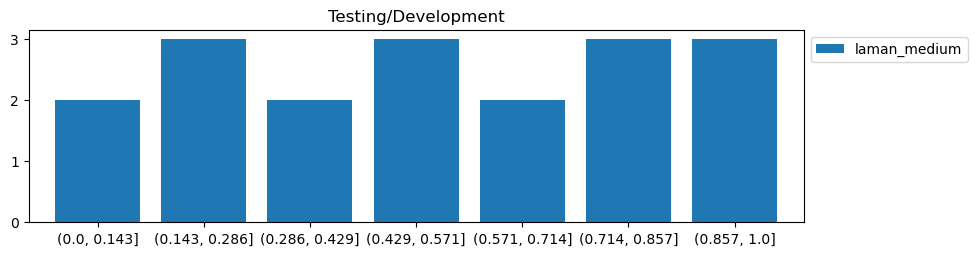

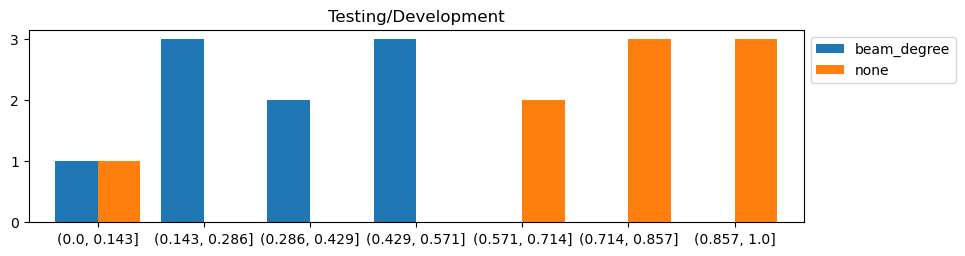

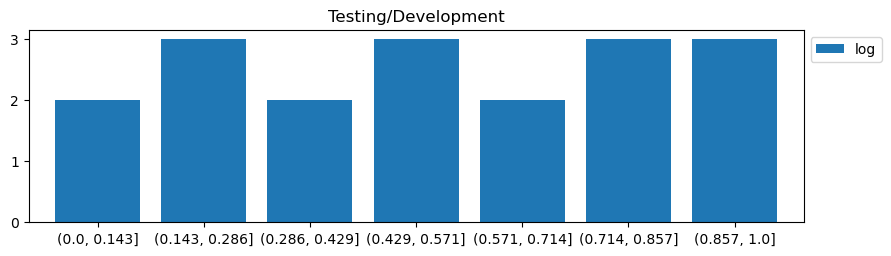

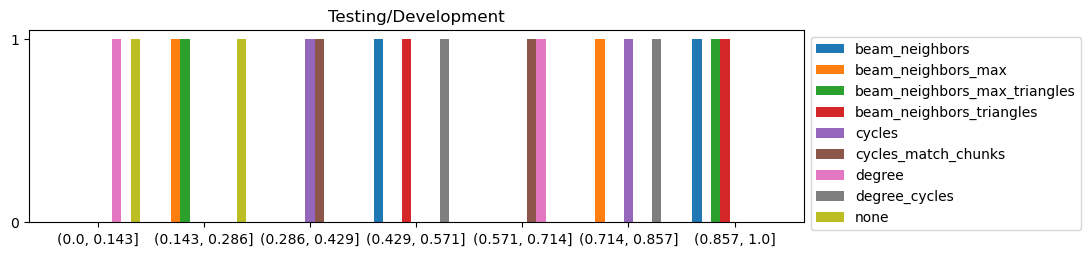

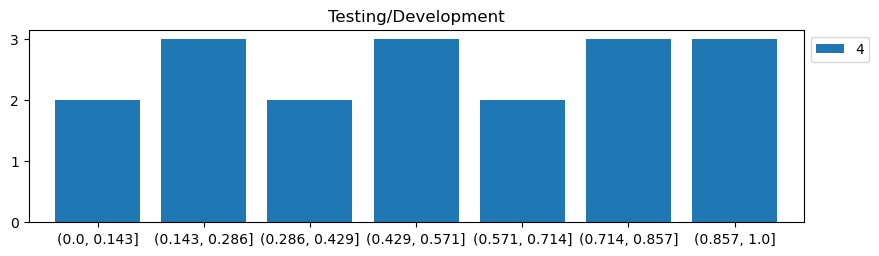

In [5]:
input = """
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-none-4-smart]                                     1.4919 (1.0)       1.5016 (1.0)       1.4979 (1.0)       0.0046 (1.0)       1.4991 (1.0)       0.0072 (1.0)           1;0  0.6676 (1.0)           4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-degree-4-smart]                            7.2429 (4.85)     41.0540 (27.34)    24.4328 (16.31)    18.0431 (>1000.0)  24.7172 (16.49)    31.1313 (>1000.0)       0;0  0.0409 (0.06)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-beam_neighbors_max-4-smart]                9.8761 (6.62)     40.7510 (27.14)    26.1634 (17.47)    16.0280 (>1000.0)  27.0132 (18.02)    27.5033 (>1000.0)       1;0  0.0382 (0.06)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-none-4-smart]                             10.8432 (7.27)     45.4183 (30.25)    27.9856 (18.68)    18.1737 (>1000.0)  27.8405 (18.57)    31.3062 (>1000.0)       0;0  0.0357 (0.05)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-beam_neighbors_max_triangles-4-smart]     12.6315 (8.47)     43.9484 (29.27)    28.5481 (19.06)    16.5504 (>1000.0)  28.8064 (19.22)    28.5251 (>1000.0)       0;0  0.0350 (0.05)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-cycles-4-smart]                           13.4580 (9.02)     34.3362 (22.87)    23.7022 (15.82)    10.3264 (>1000.0)  23.5072 (15.68)    17.5736 (>1000.0)       1;0  0.0422 (0.06)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-cycles_match_chunks-4-smart]              13.7556 (9.22)     30.2829 (20.17)    21.8489 (14.59)     8.2989 (>1000.0)  21.6786 (14.46)    14.1764 (>1000.0)       1;0  0.0458 (0.07)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-degree_cycles-4-smart]                    14.3679 (9.63)     32.4531 (21.61)    23.0706 (15.40)     8.9301 (>1000.0)  22.7307 (15.16)    15.1761 (>1000.0)       1;0  0.0433 (0.06)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-beam_neighbors_triangles-4-smart]         20.7847 (13.93)    51.1282 (34.05)    35.9725 (24.01)    17.2371 (>1000.0)  35.9886 (24.01)    29.8515 (>1000.0)       0;0  0.0278 (0.04)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-beam_degree-subgraphs-log-beam_neighbors-4-smart]                   21.9364 (14.70)    54.1926 (36.09)    37.6941 (25.16)    17.9673 (>1000.0)  37.3237 (24.90)    31.0895 (>1000.0)       0;0  0.0265 (0.04)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-degree-4-smart]                                  24.4690 (16.40)    24.7240 (16.47)    24.5660 (16.40)     0.1212 (26.19)    24.5355 (16.37)     0.1901 (26.27)         1;0  0.0407 (0.06)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-cycles_match_chunks-4-smart]                     26.8855 (18.02)    30.6641 (20.42)    28.8083 (19.23)     1.5468 (334.22)   28.8418 (19.24)     2.0197 (279.10)        2;0  0.0347 (0.05)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-cycles-4-smart]                                  27.2750 (18.28)    28.6215 (19.06)    27.7058 (18.50)     0.6324 (136.65)   27.4633 (18.32)     0.8439 (116.62)        1;0  0.0361 (0.05)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-degree_cycles-4-smart]                           27.8607 (18.67)    29.4767 (19.63)    28.5562 (19.06)     0.7034 (151.99)   28.4438 (18.97)     1.0609 (146.61)        1;0  0.0350 (0.05)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-beam_neighbors_max-4-smart]                      52.3808 (35.11)    55.6436 (37.06)    53.6521 (35.82)     1.4833 (320.51)   53.2921 (35.55)     2.2474 (310.58)        1;0  0.0186 (0.03)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-beam_neighbors_max_triangles-4-smart]            55.0832 (36.92)    57.7250 (38.44)    56.6376 (37.81)     1.1670 (252.17)   56.8711 (37.94)     1.7559 (242.65)        1;0  0.0177 (0.03)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-beam_neighbors-4-smart]                          66.0966 (44.30)    69.8569 (46.52)    68.0230 (45.41)     1.9788 (427.57)   68.0693 (45.41)     3.4080 (470.96)        0;0  0.0147 (0.02)          4           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-beam_neighbors_triangles-4-smart]                67.3484 (45.14)    70.7996 (47.15)    68.8087 (45.94)     1.5371 (332.13)   68.5434 (45.72)     2.3780 (328.62)        1;0  0.0145 (0.02)          4           1
"""
plot_all(input, "Testing/Development")

### Small Graphs

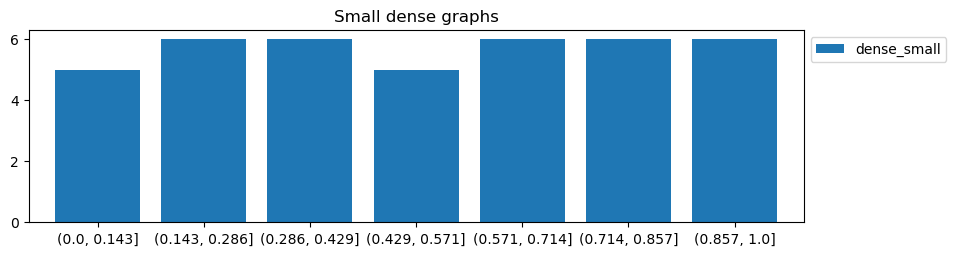

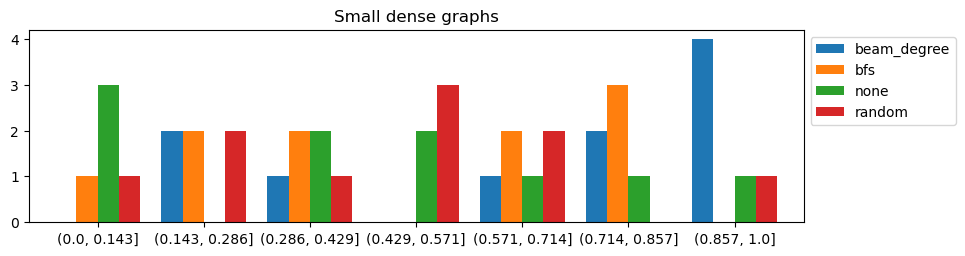

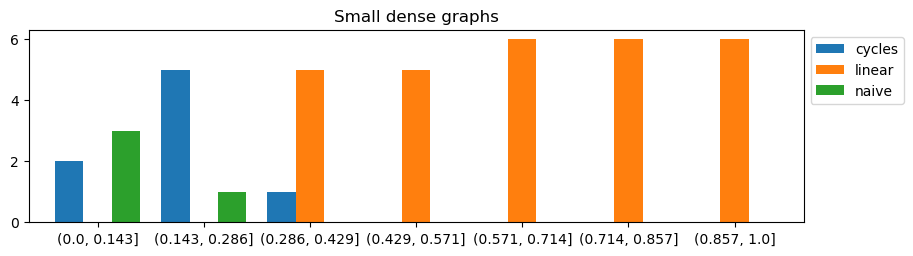

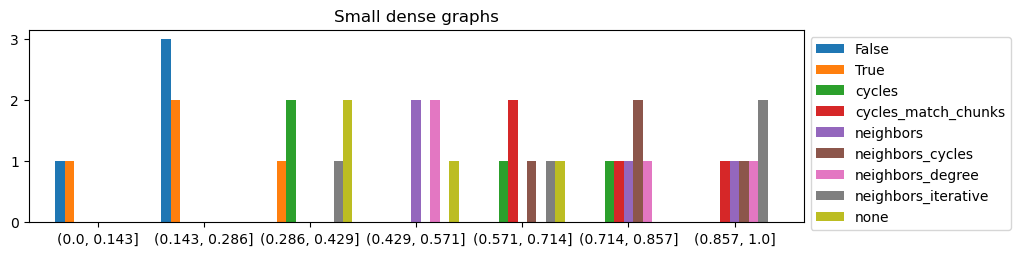

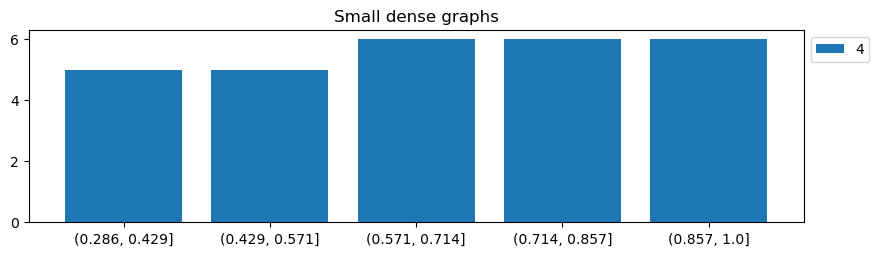

In [6]:
input = """
test_bench_NAC_colorings_small[dense_small-none-naive]                                                  59.6664 (1.0)          66.9958 (1.0)          62.5605 (1.0)        3.9002 (14.93)        61.0192 (1.0)        5.4971 (14.77)         1;0  15.9845 (1.0)           3           1
test_bench_NAC_colorings_small[dense_small-none-cycles-True]                                            63.2162 (1.06)         69.3092 (1.03)         66.3106 (1.06)       3.0476 (11.67)        66.4066 (1.09)       4.5698 (12.28)         1;0  15.0805 (0.94)          3           1
test_bench_NAC_colorings_small[dense_small-none-cycles-False]                                           64.9750 (1.09)         71.1547 (1.06)         67.8707 (1.08)       3.1081 (11.90)        67.4825 (1.11)       4.6347 (12.45)         1;0  14.7339 (0.92)          3           1
test_bench_NAC_colorings_small[dense_small-random-naive]                                                64.9590 (1.09)         71.1992 (1.06)         67.9431 (1.09)       3.1290 (11.98)        67.6710 (1.11)       4.6802 (12.57)         1;0  14.7182 (0.92)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-naive]                                                   66.6431 (1.12)         73.2283 (1.09)         69.0156 (1.10)       3.6580 (14.00)        67.1754 (1.10)       4.9389 (13.27)         1;0  14.4895 (0.91)          3           1
test_bench_NAC_colorings_small[dense_small-random-cycles-True]                                          67.8657 (1.14)         72.9473 (1.09)         69.7833 (1.12)       2.7606 (10.57)        68.5369 (1.12)       3.8112 (10.24)         1;0  14.3301 (0.90)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-cycles-False]                                            68.2489 (1.14)         72.6848 (1.08)         69.9871 (1.12)       2.3685 (9.07)         69.0275 (1.13)       3.3270 (8.94)          1;0  14.2884 (0.89)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-cycles-True]                                             68.5840 (1.15)         73.6306 (1.10)         70.7034 (1.13)       2.6185 (10.02)        69.8958 (1.15)       3.7850 (10.17)         1;0  14.1436 (0.88)          3           1
test_bench_NAC_colorings_small[dense_small-random-cycles-False]                                         68.6220 (1.15)         74.6638 (1.11)         71.5940 (1.14)       3.0221 (11.57)        71.4962 (1.17)       4.5313 (12.17)         1;0  13.9676 (0.87)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-naive]                                           71.6854 (1.20)         75.1490 (1.12)         73.3176 (1.17)       1.7404 (6.66)         73.1185 (1.20)       2.5978 (6.98)          1;0  13.6393 (0.85)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-cycles-False]                                    74.1072 (1.24)         76.3982 (1.14)         74.9410 (1.20)       1.2663 (4.85)         74.3176 (1.22)       1.7182 (4.62)          1;0  13.3438 (0.83)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-cycles-True]                                     74.4899 (1.25)         78.1614 (1.17)         75.8589 (1.21)       2.0058 (7.68)         74.9256 (1.23)       2.7536 (7.40)          1;0  13.1824 (0.82)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-none-4]                               145.7451 (2.44)        148.8626 (2.22)        146.9759 (2.35)       1.6590 (6.35)        146.3201 (2.40)       2.3381 (6.28)          1;0   6.8038 (0.43)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-cycles-4]                             145.5988 (2.44)        151.2471 (2.26)        149.1532 (2.38)       3.0944 (11.85)       150.6136 (2.47)       4.2363 (11.38)         1;0   6.7045 (0.42)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-none-4]                                145.9164 (2.45)        151.4296 (2.26)        149.4904 (2.39)       3.0989 (11.86)       151.1253 (2.48)       4.1349 (11.11)         1;0   6.6894 (0.42)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-cycles-4]                              147.0040 (2.46)        156.0598 (2.33)        150.4635 (2.41)       4.8914 (18.73)       148.3268 (2.43)       6.7919 (18.25)         1;0   6.6461 (0.42)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-neighbors_iterative-4]              149.3947 (2.50)        152.3949 (2.27)        150.6792 (2.41)       1.5459 (5.92)        150.2479 (2.46)       2.2501 (6.04)          1;0   6.6366 (0.42)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-neighbors_degree-4]                   147.1924 (2.47)        156.4331 (2.33)        150.7389 (2.41)       4.9807 (19.07)       148.5913 (2.44)       6.9305 (18.62)         1;0   6.6340 (0.42)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-neighbors-4]                          147.6863 (2.48)        154.0971 (2.30)        150.8942 (2.41)       3.2054 (12.27)       150.8992 (2.47)       4.8081 (12.92)         1;0   6.6272 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-neighbors-4]                        147.2372 (2.47)        154.7489 (2.31)        151.0040 (2.41)       3.7559 (14.38)       151.0260 (2.48)       5.6338 (15.13)         1;0   6.6223 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-neighbors_degree-4]                 147.2908 (2.47)        157.0697 (2.34)        151.0726 (2.41)       5.2523 (20.11)       148.8573 (2.44)       7.3341 (19.70)         1;0   6.6193 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-none-4]                             150.8164 (2.53)        153.0271 (2.28)        151.8412 (2.43)       1.1141 (4.27)        151.6801 (2.49)       1.6580 (4.45)          1;0   6.5858 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-neighbors_iterative-4]                 149.9700 (2.51)        155.4634 (2.32)        151.9858 (2.43)       3.0244 (11.58)       150.5239 (2.47)       4.1200 (11.07)         1;0   6.5796 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-neighbors_cycles-4]                 151.3113 (2.54)        153.8874 (2.30)        152.4172 (2.44)       1.3261 (5.08)        152.0530 (2.49)       1.9321 (5.19)          1;0   6.5609 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-none-4]                        150.4618 (2.52)        156.9627 (2.34)        152.6493 (2.44)       3.7357 (14.30)       150.5232 (2.47)       4.8757 (13.10)         1;0   6.5510 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-cycles-4]                           150.5643 (2.52)        157.1688 (2.35)        153.2407 (2.45)       3.4756 (13.31)       151.9891 (2.49)       4.9534 (13.31)         1;0   6.5257 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-cycles_match_chunks-4]                 149.8581 (2.51)        156.6054 (2.34)        153.6005 (2.46)       3.4336 (13.14)       154.3379 (2.53)       5.0605 (13.59)         1;0   6.5104 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-cycles_match_chunks-4]                152.5367 (2.56)        156.9179 (2.34)        154.0241 (2.46)       2.5065 (9.60)        152.6175 (2.50)       3.2859 (8.83)          1;0   6.4925 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-neighbors_degree-4]                    150.8708 (2.53)        158.2303 (2.36)        154.0932 (2.46)       3.7641 (14.41)       153.1784 (2.51)       5.5197 (14.83)         1;0   6.4896 (0.41)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-neighbors-4]                           149.4517 (2.50)        164.1391 (2.45)        154.6058 (2.47)       8.2652 (31.64)       150.2267 (2.46)      11.0156 (29.59)         1;0   6.4681 (0.40)          3           1
test_bench_NAC_colorings_small[dense_small-bfs-subgraphs-linear-neighbors_cycles-4]                    153.0016 (2.56)        159.5063 (2.38)        155.6664 (2.49)       3.4078 (13.05)       154.4913 (2.53)       4.8785 (13.11)         1;0   6.4240 (0.40)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-neighbors_cycles-4]                   149.0433 (2.50)        159.7188 (2.38)        156.0427 (2.49)       6.0642 (23.22)       159.3660 (2.61)       8.0066 (21.51)         1;0   6.4085 (0.40)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-cycles_match_chunks-4]         152.5561 (2.56)        158.8401 (2.37)        156.4727 (2.50)       3.4164 (13.08)       158.0218 (2.59)       4.7130 (12.66)         1;0   6.3909 (0.40)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-cycles-4]                      152.2872 (2.55)        166.1020 (2.48)        158.3499 (2.53)       7.0607 (27.03)       156.6605 (2.57)      10.3611 (27.83)         1;0   6.3151 (0.40)          3           1
test_bench_NAC_colorings_small[dense_small-random-subgraphs-linear-cycles_match_chunks-4]              153.7382 (2.58)        162.3667 (2.42)        159.2710 (2.55)       4.8028 (18.39)       161.7080 (2.65)       6.4714 (17.38)         1;0   6.2786 (0.39)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-neighbors_degree-4]            155.7162 (2.61)        165.4181 (2.47)        159.6869 (2.55)       5.0849 (19.47)       157.9265 (2.59)       7.2765 (19.55)         1;0   6.2623 (0.39)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-neighbors_iterative-4]         154.9647 (2.60)        168.4004 (2.51)        159.9172 (2.56)       7.3810 (28.26)       156.3866 (2.56)      10.0768 (27.07)         1;0   6.2532 (0.39)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-neighbors-4]                   155.0205 (2.60)        169.0125 (2.52)        159.9826 (2.56)       7.8329 (29.99)       155.9149 (2.56)      10.4940 (28.19)         1;0   6.2507 (0.39)          3           1
test_bench_NAC_colorings_small[dense_small-beam_degree-subgraphs-linear-neighbors_cycles-4]            161.6671 (2.71)        166.6858 (2.49)        164.2871 (2.63)       2.5167 (9.63)        164.5084 (2.70)       3.7640 (10.11)         1;0   6.0869 (0.38)          3           1
test_bench_NAC_colorings_small[dense_small-none-subgraphs-linear-neighbors_iterative-4]                149.5005 (2.51)        280.6697 (4.19)        195.1345 (3.12)      74.1311 (283.79)      155.2333 (2.54)      98.3769 (264.27)        1;0   5.1247 (0.32)          3           1
"""
plot_all(input, "Small dense graphs")

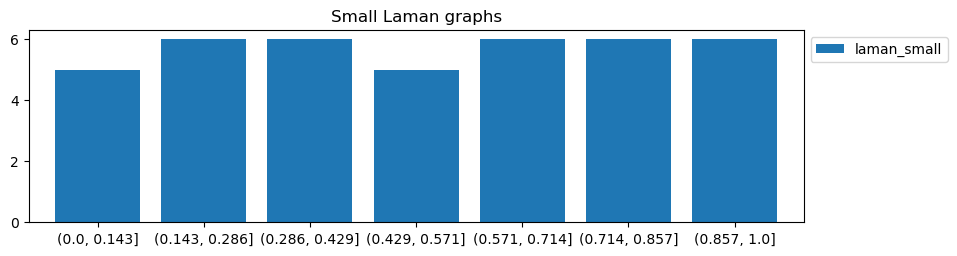

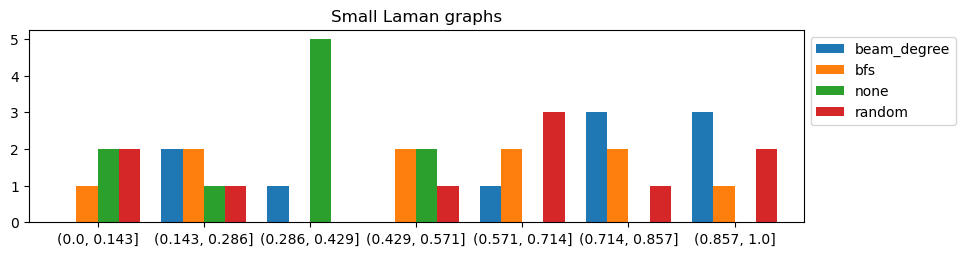

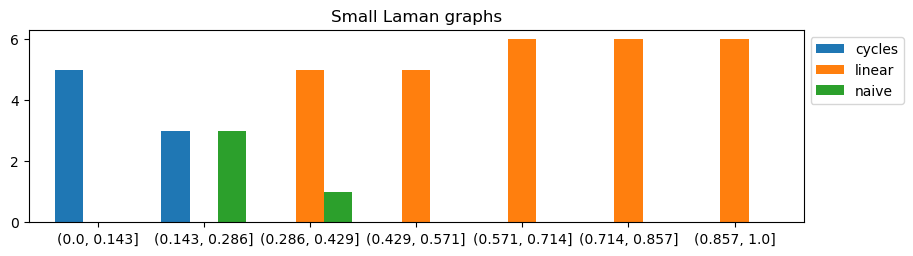

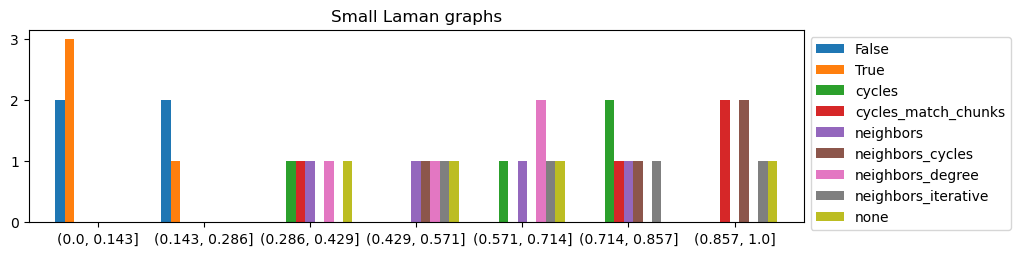

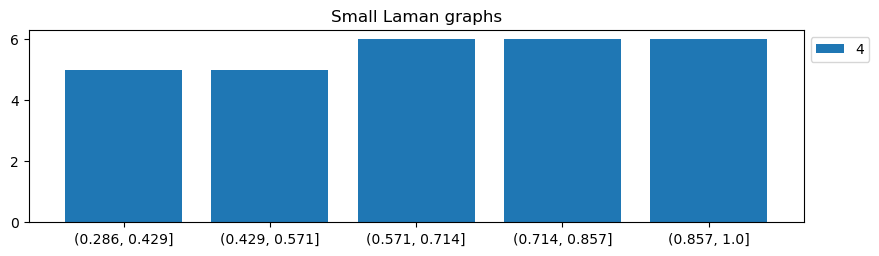

In [7]:
input = """
test_bench_NAC_colorings_small[laman_small-none-cycles-True]                                            75.6202 (1.27)         78.6834 (1.17)         76.9798 (1.23)       1.5603 (5.97)         76.6359 (1.26)       2.2974 (6.17)          1;0  12.9904 (0.81)          3           1
test_bench_NAC_colorings_small[laman_small-none-cycles-False]                                           75.7695 (1.27)         79.5707 (1.19)         77.9033 (1.25)       1.9430 (7.44)         78.3697 (1.28)       2.8509 (7.66)          1;0  12.8364 (0.80)          3           1
test_bench_NAC_colorings_small[laman_small-random-cycles-False]                                         83.2894 (1.40)         84.3128 (1.26)         83.6646 (1.34)       0.5637 (2.16)         83.3915 (1.37)       0.7676 (2.06)          1;0  11.9525 (0.75)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-cycles-True]                                             82.0859 (1.38)         86.9585 (1.30)         83.9444 (1.34)       2.6338 (10.08)        82.7889 (1.36)       3.6544 (9.82)          1;0  11.9126 (0.75)          3           1
test_bench_NAC_colorings_small[laman_small-random-cycles-True]                                          83.4480 (1.40)         84.6245 (1.26)         84.0313 (1.34)       0.5883 (2.25)         84.0216 (1.38)       0.8824 (2.37)          1;0  11.9003 (0.74)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-cycles-False]                                            82.3742 (1.38)         86.4953 (1.29)         84.1110 (1.34)       2.1355 (8.18)         83.4636 (1.37)       3.0908 (8.30)          1;0  11.8890 (0.74)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-cycles-True]                                     86.0238 (1.44)         93.1667 (1.39)         88.8561 (1.42)       3.7939 (14.52)        87.3780 (1.43)       5.3572 (14.39)         1;0  11.2541 (0.70)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-cycles-False]                                    86.9037 (1.46)         95.2128 (1.42)         91.2676 (1.46)       4.1703 (15.97)        91.6865 (1.50)       6.2318 (16.74)         1;0  10.9568 (0.69)          3           1
test_bench_NAC_colorings_small[laman_small-none-naive]                                                 165.7428 (2.78)        170.4596 (2.54)        167.7482 (2.68)       2.4364 (9.33)        167.0421 (2.74)       3.5375 (9.50)          1;0   5.9613 (0.37)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-naive]                                                  169.1863 (2.84)        174.7741 (2.61)        171.9910 (2.75)       2.7940 (10.70)       172.0126 (2.82)       4.1908 (11.26)         1;0   5.8143 (0.36)          3           1
test_bench_NAC_colorings_small[laman_small-random-naive]                                               173.2371 (2.90)        176.7575 (2.64)        175.4783 (2.80)       1.9474 (7.45)        176.4402 (2.89)       2.6403 (7.09)          1;0   5.6987 (0.36)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-none-4]                               176.1529 (2.95)        178.5901 (2.67)        177.7170 (2.84)       1.3576 (5.20)        178.4081 (2.92)       1.8279 (4.91)          1;0   5.6269 (0.35)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-naive]                                          175.0093 (2.93)        183.2797 (2.74)        179.9683 (2.88)       4.3745 (16.75)       181.6160 (2.98)       6.2028 (16.66)         1;0   5.5565 (0.35)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-neighbors-4]                          187.2772 (3.14)        191.9655 (2.87)        189.8572 (3.03)       2.3794 (9.11)        190.3289 (3.12)       3.5162 (9.45)          1;0   5.2671 (0.33)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-cycles-4]                             191.1151 (3.20)        192.2013 (2.87)        191.5505 (3.06)       0.5743 (2.20)        191.3350 (3.14)       0.8147 (2.19)          1;0   5.2206 (0.33)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-neighbors_degree-4]                   186.4714 (3.13)        203.1168 (3.03)        192.2524 (3.07)       9.4153 (36.04)       187.1690 (3.07)      12.4840 (33.54)         1;0   5.2015 (0.33)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-cycles_match_chunks-4]                191.1518 (3.20)        203.6535 (3.04)        195.4454 (3.12)       7.1109 (27.22)       191.5308 (3.14)       9.3762 (25.19)         1;0   5.1165 (0.32)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-none-4]                                194.7361 (3.26)        196.3804 (2.93)        195.7440 (3.13)       0.8829 (3.38)        196.1155 (3.21)       1.2333 (3.31)          1;0   5.1087 (0.32)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-neighbors_degree-4]                 192.0141 (3.22)        204.9868 (3.06)        196.3577 (3.14)       7.4731 (28.61)       192.0723 (3.15)       9.7295 (26.14)         1;0   5.0927 (0.32)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-neighbors_iterative-4]                189.7644 (3.18)        210.1577 (3.14)        197.7439 (3.16)      10.8958 (41.71)       193.3096 (3.17)      15.2950 (41.09)         1;0   5.0570 (0.32)          3           1
test_bench_NAC_colorings_small[laman_small-none-subgraphs-linear-neighbors_cycles-4]                   196.0019 (3.28)        200.3255 (2.99)        197.7742 (3.16)       2.2646 (8.67)        196.9953 (3.23)       3.2427 (8.71)          1;0   5.0563 (0.32)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-neighbors-4]                           196.0224 (3.29)        204.9254 (3.06)        200.3987 (3.20)       4.4534 (17.05)       200.2482 (3.28)       6.6772 (17.94)         1;0   4.9901 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-neighbors_iterative-4]                 193.4898 (3.24)        211.2921 (3.15)        200.6333 (3.21)       9.4074 (36.01)       197.1180 (3.23)      13.3518 (35.87)         1;0   4.9842 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-none-4]                             195.2122 (3.27)        208.9692 (3.12)        201.5756 (3.22)       6.9361 (26.55)       200.5455 (3.29)      10.3178 (27.72)         1;0   4.9609 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-cycles-4]                           199.9610 (3.35)        203.7970 (3.04)        202.0886 (3.23)       1.9520 (7.47)        202.5078 (3.32)       2.8770 (7.73)          1;0   4.9483 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-neighbors_degree-4]                    199.9303 (3.35)        206.7816 (3.09)        202.5590 (3.24)       3.6933 (14.14)       200.9652 (3.29)       5.1385 (13.80)         1;0   4.9368 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-neighbors-4]                        196.6467 (3.30)        206.3644 (3.08)        202.8371 (3.24)       5.3785 (20.59)       205.5004 (3.37)       7.2883 (19.58)         1;0   4.9301 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-neighbors_degree-4]            202.8935 (3.40)        206.5690 (3.08)        204.2174 (3.26)       2.0420 (7.82)        203.1895 (3.33)       2.7566 (7.41)          1;0   4.8967 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-cycles-4]                              202.1878 (3.39)        207.9929 (3.10)        204.4562 (3.27)       3.1034 (11.88)       203.1879 (3.33)       4.3538 (11.70)         1;0   4.8910 (0.31)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-neighbors_iterative-4]         205.1361 (3.44)        209.0948 (3.12)        207.5929 (3.32)       2.1451 (8.21)        208.5478 (3.42)       2.9690 (7.98)          1;0   4.8171 (0.30)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-neighbors-4]                   203.9050 (3.42)        210.6654 (3.14)        207.7159 (3.32)       3.4615 (13.25)       208.5774 (3.42)       5.0703 (13.62)         1;0   4.8143 (0.30)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-cycles-4]                      209.4272 (3.51)        210.1798 (3.14)        209.6851 (3.35)       0.4286 (1.64)        209.4481 (3.43)       0.5645 (1.52)          1;0   4.7691 (0.30)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-cycles_match_chunks-4]              201.2857 (3.37)        224.8599 (3.36)        211.0230 (3.37)      12.3102 (47.13)       206.9233 (3.39)      17.6806 (47.50)         1;0   4.7388 (0.30)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-neighbors_cycles-4]                    205.0287 (3.44)        215.5873 (3.22)        211.0825 (3.37)       5.4471 (20.85)       212.6315 (3.48)       7.9190 (21.27)         1;0   4.7375 (0.30)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-neighbors_cycles-4]                 207.7428 (3.48)        219.0172 (3.27)        212.5982 (3.40)       5.7976 (22.19)       211.0345 (3.46)       8.4558 (22.72)         1;0   4.7037 (0.29)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-cycles_match_chunks-4]         207.7772 (3.48)        221.0872 (3.30)        213.7158 (3.42)       6.7697 (25.92)       212.2831 (3.48)       9.9826 (26.82)         1;0   4.6791 (0.29)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-neighbors_cycles-4]            211.2424 (3.54)        219.2667 (3.27)        215.0945 (3.44)       4.0217 (15.40)       214.7744 (3.52)       6.0183 (16.17)         1;0   4.6491 (0.29)          3           1
test_bench_NAC_colorings_small[laman_small-beam_degree-subgraphs-linear-none-4]                        213.6991 (3.58)        217.4603 (3.25)        216.0770 (3.45)       2.0685 (7.92)        217.0717 (3.56)       2.8209 (7.58)          1;0   4.6280 (0.29)          3           1
test_bench_NAC_colorings_small[laman_small-random-subgraphs-linear-neighbors_iterative-4]              192.4644 (3.23)        319.2459 (4.77)        235.2377 (3.76)      72.7573 (278.53)      194.0029 (3.18)      95.0861 (255.43)        1;0   4.2510 (0.27)          3           1
test_bench_NAC_colorings_small[laman_small-bfs-subgraphs-linear-cycles_match_chunks-4]                 236.7725 (3.97)        242.9202 (3.63)        240.1082 (3.84)       3.1071 (11.89)       240.6319 (3.94)       4.6107 (12.39)         1;0   4.1648 (0.26)          3           1
"""
plot_all(input, "Small Laman graphs")

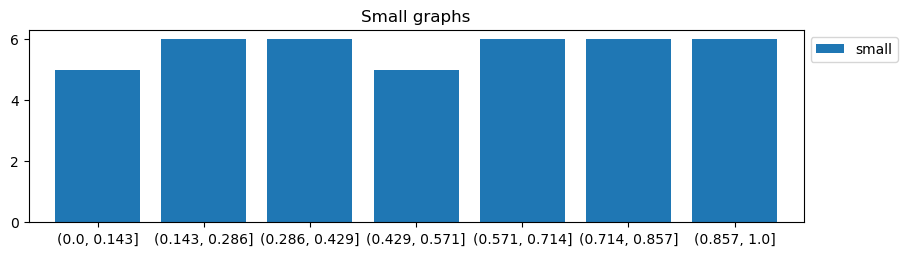

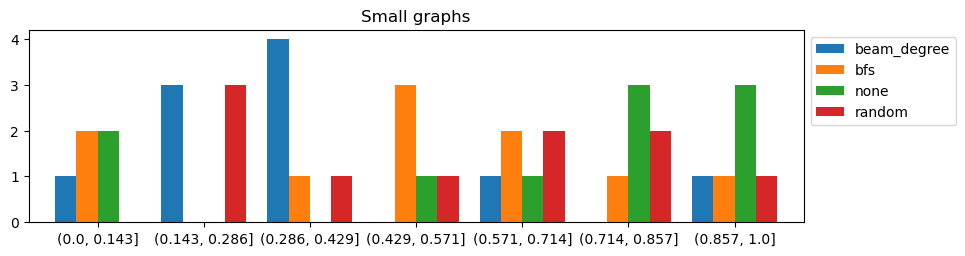

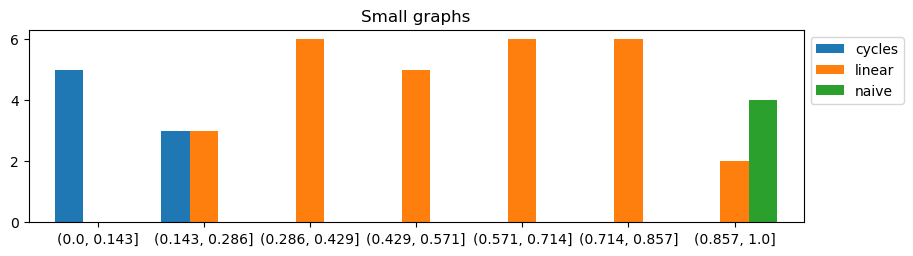

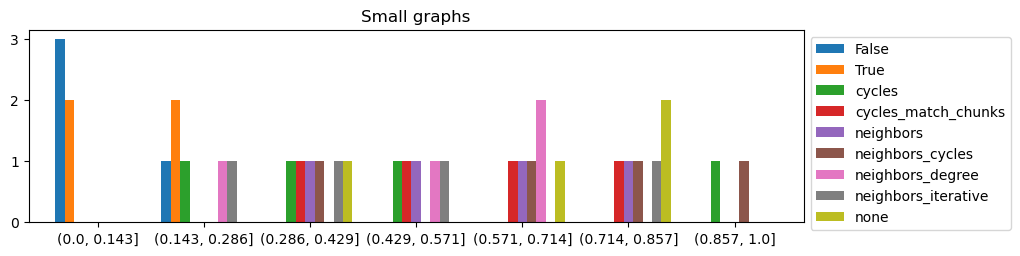

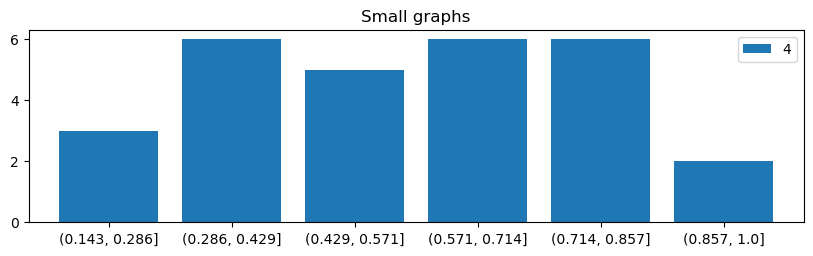

In [8]:
input = """
test_bench_NAC_colorings_small[small-none-cycles-True]                                                 224.9731 (3.77)        248.5564 (3.71)        235.3234 (3.76)      12.0530 (46.14)       232.4408 (3.81)      17.6874 (47.51)         1;0   4.2495 (0.27)          3           1
test_bench_NAC_colorings_small[small-none-cycles-False]                                                220.0732 (3.69)        275.5968 (4.11)        239.6905 (3.83)      31.1403 (119.21)      223.4014 (3.66)      41.6428 (111.87)        1;0   4.1720 (0.26)          3           1
test_bench_NAC_colorings_small[small-bfs-cycles-False]                                                 241.7156 (4.05)        267.4007 (3.99)        254.9688 (4.08)      12.8622 (49.24)       255.7901 (4.19)      19.2638 (51.75)         1;0   3.9220 (0.25)          3           1
test_bench_NAC_colorings_small[small-bfs-cycles-True]                                                  247.5128 (4.15)        269.8978 (4.03)        260.3592 (4.16)      11.5533 (44.23)       263.6669 (4.32)      16.7888 (45.10)         1;0   3.8408 (0.24)          3           1
test_bench_NAC_colorings_small[small-beam_degree-cycles-False]                                         240.1396 (4.02)        289.4910 (4.32)        263.8089 (4.22)      24.7372 (94.70)       261.7962 (4.29)      37.0135 (99.43)         1;0   3.7906 (0.24)          3           1
test_bench_NAC_colorings_small[small-beam_degree-cycles-True]                                          246.5997 (4.13)        314.5476 (4.70)        289.5434 (4.63)      37.3577 (143.01)      307.4830 (5.04)      50.9609 (136.90)        1;0   3.4537 (0.22)          3           1
test_bench_NAC_colorings_small[small-random-cycles-False]                                              267.2759 (4.48)        361.0803 (5.39)        300.6922 (4.81)      52.3968 (200.59)      273.7205 (4.49)      70.3533 (188.99)        1;0   3.3257 (0.21)          3           1
test_bench_NAC_colorings_small[small-random-cycles-True]                                               271.6106 (4.55)        336.2890 (5.02)        303.8396 (4.86)      32.3398 (123.80)      303.6194 (4.98)      48.5088 (130.31)        1;0   3.2912 (0.21)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-neighbors_iterative-4]               468.0020 (7.84)        476.2507 (7.11)        472.5613 (7.55)       4.1926 (16.05)       473.4313 (7.76)       6.1865 (16.62)         1;0   2.1161 (0.13)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-cycles-4]                                 481.4038 (8.07)        496.7138 (7.41)        488.6832 (7.81)       7.6826 (29.41)       487.9321 (8.00)      11.4825 (30.85)         1;0   2.0463 (0.13)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-neighbors_degree-4]                  483.0651 (8.10)        504.8399 (7.54)        490.4131 (7.84)      12.4947 (47.83)       483.3342 (7.92)      16.3311 (43.87)         1;0   2.0391 (0.13)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-neighbors_iterative-4]                       491.6202 (8.24)        500.4640 (7.47)        494.8004 (7.91)       4.9172 (18.82)       492.3170 (8.07)       6.6329 (17.82)         1;0   2.0210 (0.13)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-neighbors-4]                         501.2625 (8.40)        504.7101 (7.53)        502.6604 (8.03)       1.8139 (6.94)        502.0084 (8.23)       2.5857 (6.95)          1;0   1.9894 (0.12)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-none-4]                                   482.7508 (8.09)        568.6013 (8.49)        515.8003 (8.24)      46.2078 (176.89)      496.0489 (8.13)      64.3878 (172.97)        1;0   1.9387 (0.12)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-neighbors_cycles-4]                  510.0763 (8.55)        534.8008 (7.98)        526.0953 (8.41)      13.8903 (53.18)       533.4088 (8.74)      18.5434 (49.81)         1;0   1.9008 (0.12)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-cycles-4]                            490.4069 (8.22)        554.0503 (8.27)        531.4332 (8.49)      35.5921 (136.26)      549.8424 (9.01)      47.7326 (128.23)        1;0   1.8817 (0.12)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-cycles_match_chunks-4]               500.1259 (8.38)        550.3585 (8.21)        532.3919 (8.51)      28.0033 (107.20)      546.6914 (8.96)      37.6745 (101.21)        1;0   1.8783 (0.12)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-neighbors_degree-4]                          488.4132 (8.19)        620.5562 (9.26)        535.8337 (8.57)      73.5461 (281.55)      498.5317 (8.17)      99.1073 (266.24)        1;0   1.8663 (0.12)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-neighbors_iterative-4]                      516.7013 (8.66)        578.0521 (8.63)        549.0314 (8.78)      30.8090 (117.94)      552.3408 (9.05)      46.0131 (123.61)        1;0   1.8214 (0.11)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-cycles-4]                                    528.8768 (8.86)        563.9205 (8.42)        551.6854 (8.82)      19.7702 (75.69)       562.2588 (9.21)      26.2828 (70.60)         1;0   1.8126 (0.11)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-neighbors-4]                              501.2476 (8.40)        632.8435 (9.45)        554.6104 (8.87)      69.2334 (265.04)      529.7402 (8.68)      98.6969 (265.13)        1;0   1.8031 (0.11)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-cycles_match_chunks-4]                       491.8687 (8.24)        623.5516 (9.31)        555.0088 (8.87)      66.0075 (252.69)      549.6061 (9.01)      98.7622 (265.31)        1;0   1.8018 (0.11)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-cycles_match_chunks-4]                    497.8413 (8.34)        622.2007 (9.29)        560.0422 (8.95)      62.1798 (238.04)      560.0847 (9.18)      93.2696 (250.55)        1;0   1.7856 (0.11)          3           1
test_bench_NAC_colorings_small[small-beam_degree-subgraphs-linear-none-4]                              497.1727 (8.33)        666.8677 (9.95)        573.3860 (9.17)      86.1553 (329.82)      556.1176 (9.11)     127.2712 (341.89)        1;0   1.7440 (0.11)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-neighbors_degree-4]                       572.2400 (9.59)        622.8379 (9.30)        598.3923 (9.57)      25.3421 (97.02)       600.0990 (9.83)      37.9484 (101.94)        1;0   1.6711 (0.10)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-neighbors-4]                                 596.7169 (10.00)       602.7237 (9.00)        599.9895 (9.59)       3.0394 (11.64)       600.5279 (9.84)       4.5051 (12.10)         1;0   1.6667 (0.10)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-neighbors_degree-4]                         567.8628 (9.52)        639.6145 (9.55)        600.2849 (9.60)      36.3712 (139.24)      593.3773 (9.72)      53.8138 (144.56)        1;0   1.6659 (0.10)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-neighbors_cycles-4]                          551.0278 (9.24)        647.8456 (9.67)        607.7167 (9.71)      50.4886 (193.28)      624.2766 (10.23)     72.6134 (195.06)        1;0   1.6455 (0.10)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-neighbors_iterative-4]                    552.1061 (9.25)        671.8888 (10.03)       609.0095 (9.73)      60.1145 (230.13)      603.0337 (9.88)      89.8370 (241.33)        1;0   1.6420 (0.10)          3           1
test_bench_NAC_colorings_small[small-bfs-subgraphs-linear-none-4]                                      565.0020 (9.47)        721.4877 (10.77)       624.1553 (9.98)      84.9422 (325.18)      585.9761 (9.60)     117.3642 (315.28)        1;0   1.6022 (0.10)          3           1
test_bench_NAC_colorings_small[small-random-subgraphs-linear-neighbors_cycles-4]                       571.8610 (9.58)        714.3960 (10.66)       627.4526 (10.03)     76.2644 (291.96)      596.1008 (9.77)     106.9012 (287.17)        1;0   1.5937 (0.10)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-none-4]                                     509.5985 (8.54)        834.0873 (12.45)       629.3490 (10.06)    178.1585 (682.03)      544.3613 (8.92)     243.3667 (653.77)        1;0   1.5889 (0.10)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-neighbors-4]                                619.5055 (10.38)       749.9210 (11.19)       664.7816 (10.63)     73.7825 (282.46)      624.9184 (10.24)     97.8116 (262.76)        1;0   1.5043 (0.09)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-cycles_match_chunks-4]                      606.1629 (10.16)       762.8123 (11.39)       694.1964 (11.10)     80.1095 (306.68)      713.6139 (11.69)    117.4870 (315.61)        1;0   1.4405 (0.09)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-cycles-4]                                   824.3740 (13.82)       924.2908 (13.80)       863.1358 (13.80)     53.5904 (205.16)      840.7426 (13.78)     74.9376 (201.31)        1;0   1.1586 (0.07)          3           1
test_bench_NAC_colorings_small[small-none-subgraphs-linear-neighbors_cycles-4]                         597.6370 (10.02)     1,181.8406 (17.64)       931.9976 (14.90)    301.1326 (>1000.0)   1,016.5152 (16.66)    438.1527 (>1000.0)       1;0   1.0730 (0.07)          3           1
test_bench_NAC_colorings_small[small-none-naive]                                                     1,212.0017 (20.31)     1,341.2440 (20.02)     1,285.7908 (20.55)     66.5436 (254.75)    1,304.1267 (21.37)     96.9318 (260.39)        1;0   0.7777 (0.05)          3           1
test_bench_NAC_colorings_small[small-beam_degree-naive]                                              1,246.7854 (20.90)     1,548.7646 (23.12)     1,431.7022 (22.89)    162.0217 (620.26)    1,499.5566 (24.58)    226.4844 (608.42)        1;0   0.6985 (0.04)          3           1
test_bench_NAC_colorings_small[small-random-naive]                                                   1,480.0711 (24.81)     1,574.6341 (23.50)     1,517.4995 (24.26)     50.2672 (192.44)    1,497.7934 (24.55)     70.9223 (190.52)        1;0   0.6590 (0.04)          3           1
test_bench_NAC_colorings_small[small-bfs-naive]                                                      1,362.9949 (22.84)     1,644.0373 (24.54)     1,539.4820 (24.61)    153.7103 (588.44)    1,611.4138 (26.41)    210.7818 (566.23)        1;0   0.6496 (0.04)          3           1
"""
plot_all(input, "Small graphs")

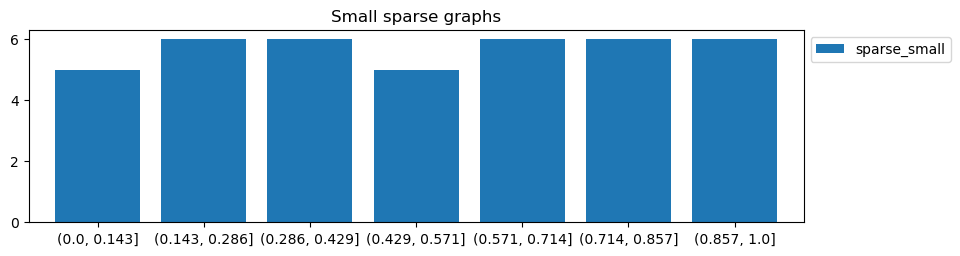

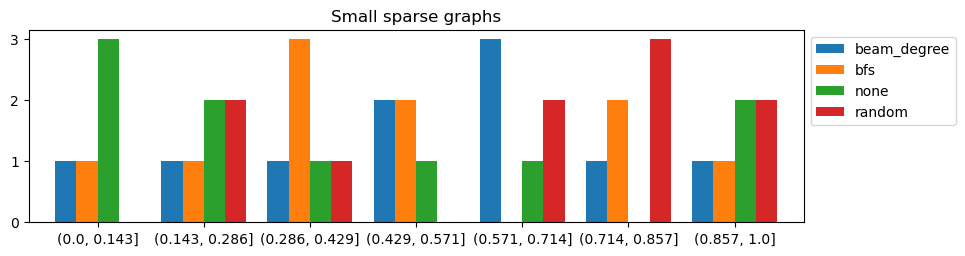

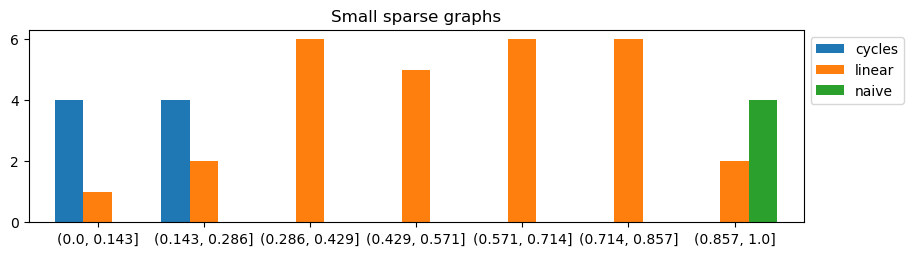

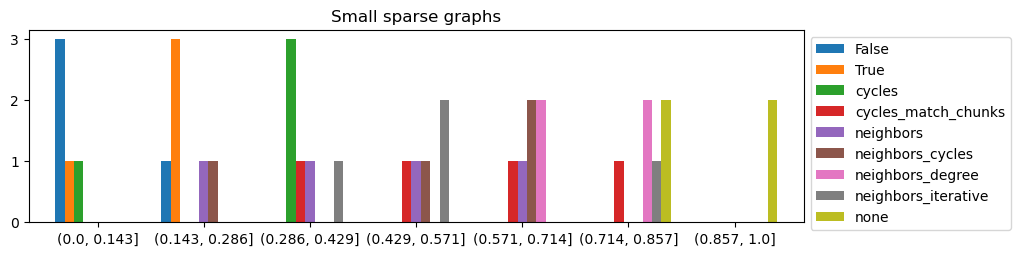

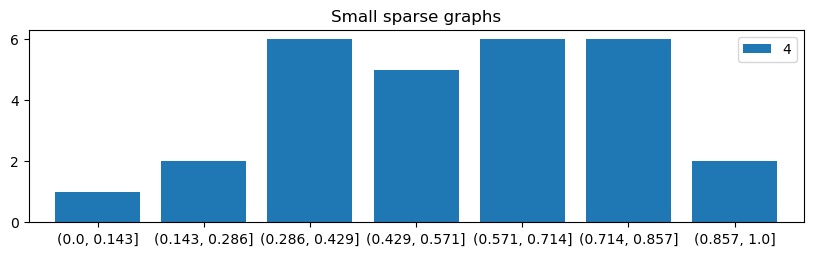

In [9]:
input = """
test_bench_NAC_colorings_small[sparse_small-none-cycles-True]                                          677.3696 (11.35)       687.6673 (10.26)       683.9227 (10.93)      5.6944 (21.80)       686.7312 (11.25)      7.7233 (20.75)         1;0   1.4622 (0.09)          3           1
test_bench_NAC_colorings_small[sparse_small-none-cycles-False]                                         685.6346 (11.49)       686.1309 (10.24)       685.9298 (10.96)      0.2612 (1.0)         686.0240 (11.24)      0.3723 (1.0)           1;0   1.4579 (0.09)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-cycles-4]                            730.2455 (12.24)       744.0753 (11.11)       738.0813 (11.80)      7.0965 (27.17)       739.9232 (12.13)     10.3724 (27.86)         1;0   1.3549 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-cycles-False]                                  754.7863 (12.65)       768.9437 (11.48)       759.9625 (12.15)      7.8081 (29.89)       756.1576 (12.39)     10.6181 (28.52)         1;0   1.3159 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-cycles-False]                                          754.7123 (12.65)       768.3552 (11.47)       760.6580 (12.16)      6.9880 (26.75)       758.9065 (12.44)     10.2321 (27.49)         1;0   1.3147 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-cycles-True]                                           759.4304 (12.73)       771.7331 (11.52)       764.5297 (12.22)      6.4156 (24.56)       762.4256 (12.49)      9.2270 (24.79)         1;0   1.3080 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-random-cycles-True]                                        770.6724 (12.92)       777.8385 (11.61)       773.4803 (12.36)      3.8263 (14.65)       771.9300 (12.65)      5.3746 (14.44)         1;0   1.2929 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-random-cycles-False]                                       769.4854 (12.90)       781.0967 (11.66)       774.0524 (12.37)      6.1894 (23.69)       771.5750 (12.64)      8.7085 (23.39)         1;0   1.2919 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-cycles-True]                                   759.5471 (12.73)       796.9111 (11.89)       774.5679 (12.38)     19.7289 (75.53)       767.2455 (12.57)     28.0230 (75.28)         1;0   1.2910 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-neighbors_cycles-4]                  779.9135 (13.07)       848.2645 (12.66)       819.8561 (13.11)     35.6054 (136.31)      831.3902 (13.63)     51.2633 (137.71)        1;0   1.2197 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-neighbors-4]                         785.5087 (13.17)       880.4607 (13.14)       820.0503 (13.11)     52.4964 (200.97)      794.1816 (13.02)     71.2141 (191.31)        1;0   1.2194 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-cycles-4]                          811.0891 (13.59)       837.5806 (12.50)       822.7211 (13.15)     13.5375 (51.82)       819.4937 (13.43)     19.8687 (53.37)         1;0   1.2155 (0.08)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-cycles-4]                             793.2416 (13.29)       920.2117 (13.74)       836.8325 (13.38)     72.2336 (276.53)      797.0441 (13.06)     95.2276 (255.81)        1;0   1.1950 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-neighbors-4]                          813.3827 (13.63)       901.8380 (13.46)       854.7223 (13.66)     44.5096 (170.39)      848.9464 (13.91)     66.3415 (178.22)        1;0   1.1700 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-cycles_match_chunks-4]               809.8338 (13.57)       940.3650 (14.04)       856.3018 (13.69)     72.9360 (279.22)      818.7065 (13.42)     97.8985 (262.99)        1;0   1.1678 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-cycles-4]                     808.5954 (13.55)       952.4328 (14.22)       858.0369 (13.72)     81.7800 (313.07)      813.0826 (13.33)    107.8780 (289.80)        1;0   1.1655 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-neighbors_iterative-4]                823.3125 (13.80)       921.4444 (13.75)       867.1862 (13.86)     49.8833 (190.97)      856.8017 (14.04)     73.5989 (197.71)        1;0   1.1532 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-neighbors_cycles-4]                   853.0195 (14.30)       882.1682 (13.17)       867.5235 (13.87)     14.5748 (55.80)       867.3830 (14.21)     21.8615 (58.73)         1;0   1.1527 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-neighbors_iterative-4]        852.2009 (14.28)       886.5569 (13.23)       869.5370 (13.90)     17.1802 (65.77)       869.8533 (14.26)     25.7670 (69.22)         1;0   1.1500 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-neighbors_iterative-4]               804.3336 (13.48)       985.8050 (14.71)       880.6982 (14.08)     94.0880 (360.19)      851.9559 (13.96)    136.1036 (365.62)        1;0   1.1355 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-neighbors-4]                  877.5227 (14.71)       897.7712 (13.40)       884.7603 (14.14)     11.2915 (43.23)       878.9871 (14.41)     15.1863 (40.80)         1;0   1.1302 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-cycles_match_chunks-4]                880.6724 (14.76)       905.3920 (13.51)       891.2315 (14.25)     12.7472 (48.80)       887.6300 (14.55)     18.5396 (49.80)         1;0   1.1220 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-neighbors_cycles-4]           843.4984 (14.14)       971.4772 (14.50)       901.1284 (14.40)     64.9305 (248.57)      888.4095 (14.56)     95.9841 (257.85)        1;0   1.1097 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-neighbors_degree-4]                  856.0071 (14.35)       967.2048 (14.44)       901.2963 (14.41)     58.3961 (223.55)      880.6771 (14.43)     83.3983 (224.04)        1;0   1.1095 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-cycles_match_chunks-4]        900.2842 (15.09)       914.3371 (13.65)       907.5437 (14.51)      7.0380 (26.94)       908.0098 (14.88)     10.5397 (28.31)         1;0   1.1019 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-neighbors_cycles-4]                892.5151 (14.96)       937.7129 (14.00)       913.1096 (14.60)     22.8640 (87.53)       909.1009 (14.90)     33.8983 (91.06)         1;0   1.0952 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-neighbors-4]                       869.5842 (14.57)       956.6865 (14.28)       923.1148 (14.76)     46.8559 (179.38)      943.0737 (15.46)     65.3267 (175.49)        1;0   1.0833 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-neighbors_degree-4]           868.0737 (14.55)       977.4076 (14.59)       924.2494 (14.77)     54.7294 (209.52)      927.2670 (15.20)     82.0004 (220.28)        1;0   1.0820 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-neighbors_iterative-4]             834.1149 (13.98)     1,039.0789 (15.51)       933.2931 (14.92)    102.6416 (392.94)      926.6856 (15.19)    153.7230 (412.95)        1;0   1.0715 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-subgraphs-linear-none-4]                       901.4957 (15.11)       997.6372 (14.89)       954.6216 (15.26)     48.8616 (187.05)      964.7320 (15.81)     72.1061 (193.70)        1;0   1.0475 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-none-4]                               894.4720 (14.99)     1,002.8086 (14.97)       956.9486 (15.30)     56.0471 (214.56)      973.5651 (15.96)     81.2524 (218.27)        1;0   1.0450 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-cycles_match_chunks-4]             914.9265 (15.33)     1,042.0716 (15.55)       960.5524 (15.35)     70.7652 (270.91)      924.6591 (15.15)     95.3589 (256.17)        1;0   1.0411 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-neighbors_degree-4]                916.4254 (15.36)     1,013.0855 (15.12)       962.0318 (15.38)     48.5597 (185.90)      956.5846 (15.68)     72.4950 (194.75)        1;0   1.0395 (0.07)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-subgraphs-linear-neighbors_degree-4]                   891.3532 (14.94)     1,097.0220 (16.37)       963.1166 (15.39)    116.0652 (444.33)      900.9748 (14.77)    154.2516 (414.37)        1;0   1.0383 (0.06)          3           1
test_bench_NAC_colorings_small[sparse_small-none-subgraphs-linear-none-4]                              982.2325 (16.46)       984.3362 (14.69)       983.3927 (15.72)      1.0684 (4.09)        983.6093 (16.12)      1.5777 (4.24)          1;0   1.0169 (0.06)          3           1
test_bench_NAC_colorings_small[sparse_small-random-subgraphs-linear-none-4]                            958.0605 (16.06)     1,142.2327 (17.05)     1,036.4043 (16.57)     95.1125 (364.11)    1,008.9198 (16.53)    138.1291 (371.06)        1;0   0.9649 (0.06)          3           1
test_bench_NAC_colorings_small[sparse_small-none-naive]                                             11,869.1101 (198.92)   11,938.4874 (178.20)   11,893.0083 (190.10)    39.4031 (150.84)   11,871.4275 (194.55)    52.0330 (139.78)        1;0   0.0841 (0.01)          3           1
test_bench_NAC_colorings_small[sparse_small-beam_degree-naive]                                      11,916.2743 (199.71)   12,075.3275 (180.24)   11,989.8931 (191.65)    80.1822 (306.96)   11,978.0775 (196.30)   119.2899 (320.45)        1;0   0.0834 (0.01)          3           1
test_bench_NAC_colorings_small[sparse_small-bfs-naive]                                              12,343.9120 (206.88)   12,627.6318 (188.48)   12,438.4902 (198.82)   163.8015 (627.07)   12,343.9268 (202.30)   212.7899 (571.63)        1;0   0.0804 (0.01)          3           1
test_bench_NAC_colorings_small[sparse_small-random-naive]                                           12,173.6775 (204.03)   12,649.8130 (188.81)   12,478.9545 (199.47)   265.0047 (>1000.0)  12,613.3731 (206.71)   357.1016 (959.30)        1;0   0.0801 (0.01)          3           1
"""
plot_all(input, "Small sparse graphs")

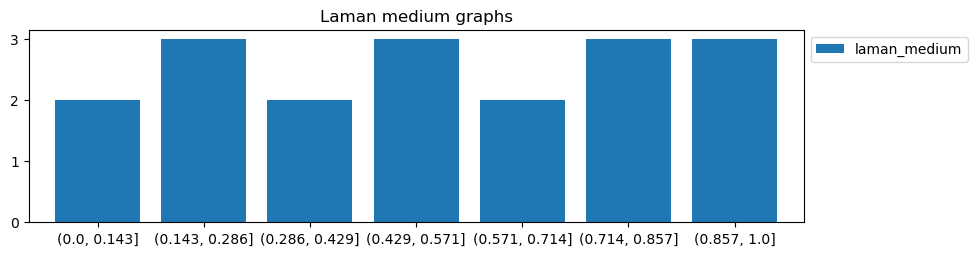

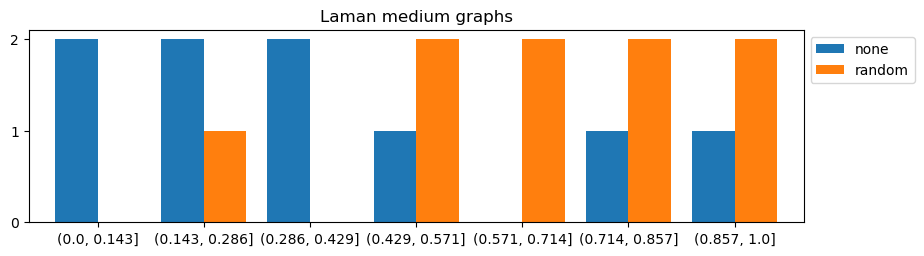

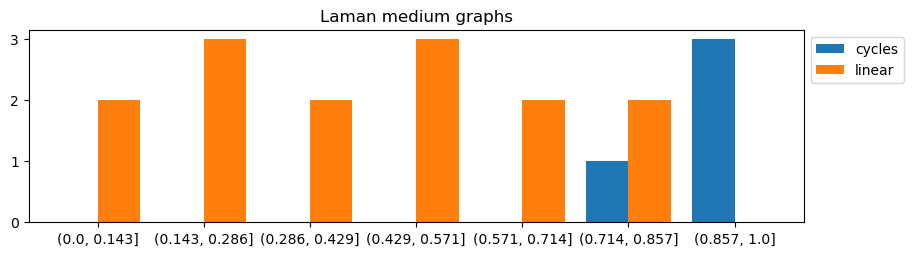

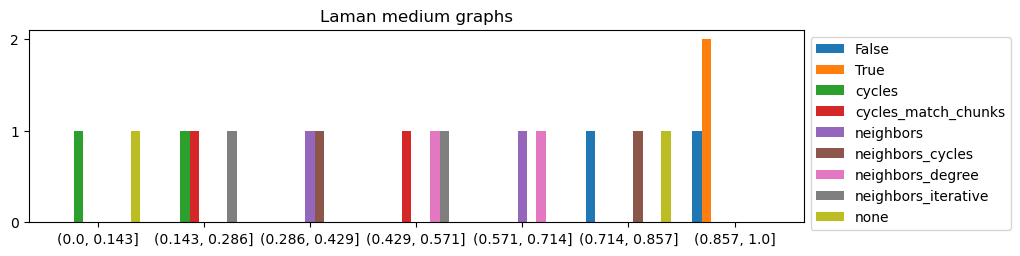

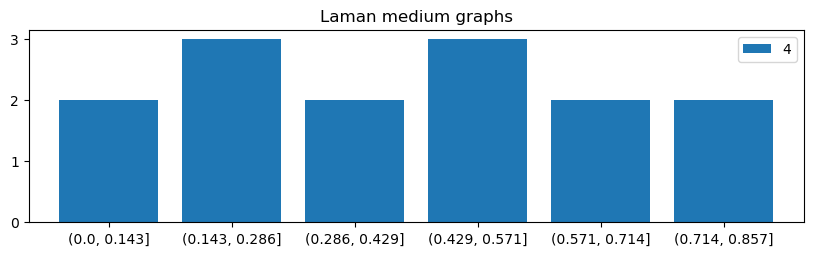

In [10]:
input = """
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-none-4]                       2.3015 (1.0)       2.3133 (1.0)       2.3058 (1.0)      0.0065 (1.97)      2.3025 (1.0)      0.0088 (1.78)          1;0  0.4337 (1.0)           3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-cycles-4]                     2.3964 (1.04)      2.4186 (1.05)      2.4040 (1.04)     0.0126 (3.83)      2.3971 (1.04)     0.0167 (3.37)          1;0  0.4160 (0.96)          3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-cycles_match_chunks-4]        2.4283 (1.06)      2.4349 (1.05)      2.4316 (1.05)     0.0033 (1.0)       2.4317 (1.06)     0.0050 (1.0)           1;0  0.4112 (0.95)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-cycles-4]                   2.6295 (1.14)      2.6519 (1.15)      2.6403 (1.15)     0.0112 (3.39)      2.6395 (1.15)     0.0168 (3.39)          1;0  0.3787 (0.87)          3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-neighbors_iterative-4]        2.4476 (1.06)      2.9791 (1.29)      2.7794 (1.21)     0.2893 (87.52)     2.9114 (1.26)     0.3986 (80.41)         1;0  0.3598 (0.83)          3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-neighbors-4]                  2.5001 (1.09)      3.0146 (1.30)      2.8141 (1.22)     0.2754 (83.30)     2.9276 (1.27)     0.3858 (77.82)         1;0  0.3554 (0.82)          3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-neighbors_cycles-4]           2.5882 (1.12)      3.1363 (1.36)      2.8195 (1.22)     0.2839 (85.88)     2.7341 (1.19)     0.4111 (82.92)         1;0  0.3547 (0.82)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-cycles_match_chunks-4]      2.8025 (1.22)      3.0430 (1.32)      2.9573 (1.28)     0.1343 (40.64)     3.0263 (1.31)     0.1804 (36.39)         1;0  0.3381 (0.78)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-neighbors_iterative-4]      2.9500 (1.28)      3.1901 (1.38)      3.1067 (1.35)     0.1358 (41.08)     3.1799 (1.38)     0.1801 (36.33)         1;0  0.3219 (0.74)          3           1
test_bench_NAC_colorings_small[laman_medium-none-subgraphs-linear-neighbors_degree-4]           2.9946 (1.30)      3.3086 (1.43)      3.1521 (1.37)     0.1570 (47.49)     3.1530 (1.37)     0.2354 (47.49)         1;0  0.3173 (0.73)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-neighbors-4]                2.9748 (1.29)      3.4653 (1.50)      3.2251 (1.40)     0.2454 (74.23)     3.2351 (1.41)     0.3678 (74.18)         1;0  0.3101 (0.71)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-neighbors_degree-4]         3.1287 (1.36)      3.4242 (1.48)      3.3007 (1.43)     0.1536 (46.47)     3.3491 (1.45)     0.2216 (44.70)         1;0  0.3030 (0.70)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-neighbors_cycles-4]         3.1045 (1.35)      3.8566 (1.67)      3.3731 (1.46)     0.4196 (126.93)    3.1583 (1.37)     0.5641 (113.77)        1;0  0.2965 (0.68)          3           1
test_bench_NAC_colorings_small[laman_medium-random-subgraphs-linear-none-4]                     3.5126 (1.53)      4.5049 (1.95)      4.1695 (1.81)     0.5689 (172.11)    4.4908 (1.95)     0.7442 (150.11)        1;0  0.2398 (0.55)          3           1
test_bench_NAC_colorings_small[laman_medium-none-cycles-False]                                 56.7988 (24.68)    59.3302 (25.65)    58.1919 (25.24)    1.2848 (388.68)   58.4466 (25.38)    1.8985 (382.93)        1;0  0.0172 (0.04)          3           1
test_bench_NAC_colorings_small[laman_medium-random-cycles-False]                               58.1907 (25.28)    58.4415 (25.26)    58.3480 (25.31)    0.1370 (41.45)    58.4119 (25.37)    0.1881 (37.93)         1;0  0.0171 (0.04)          3           1
test_bench_NAC_colorings_small[laman_medium-none-cycles-True]                                  58.7328 (25.52)    60.0264 (25.95)    59.4595 (25.79)    0.6614 (200.10)   59.6192 (25.89)    0.9702 (195.69)        1;0  0.0168 (0.04)          3           1
test_bench_NAC_colorings_small[laman_medium-random-cycles-True]                                61.3998 (26.68)    62.2316 (26.90)    61.8157 (26.81)    0.5881 (177.92)   61.8157 (26.85)    0.8317 (167.75)        0;0  0.0162 (0.04)          2           1
"""
plot_all(input, "Laman medium graphs")

### Laman fast

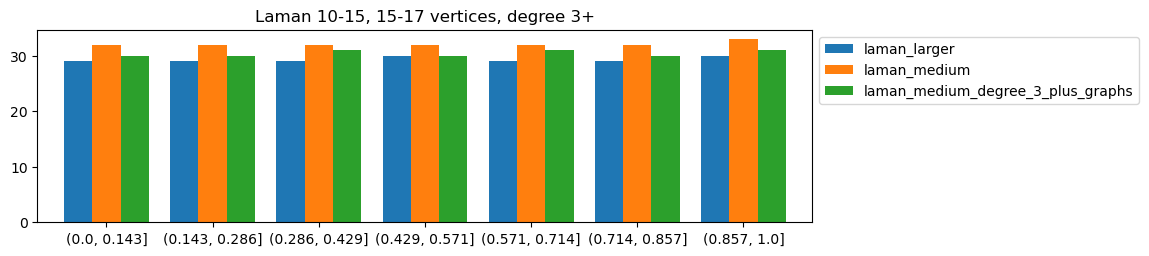

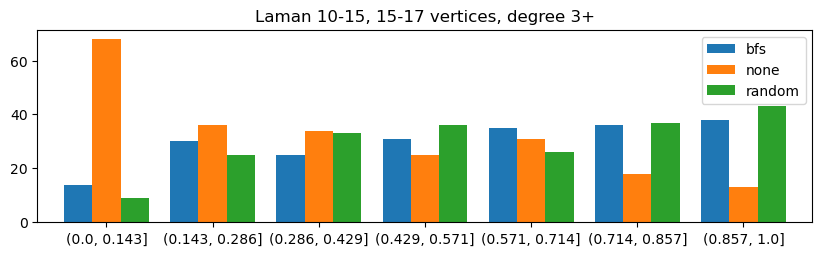

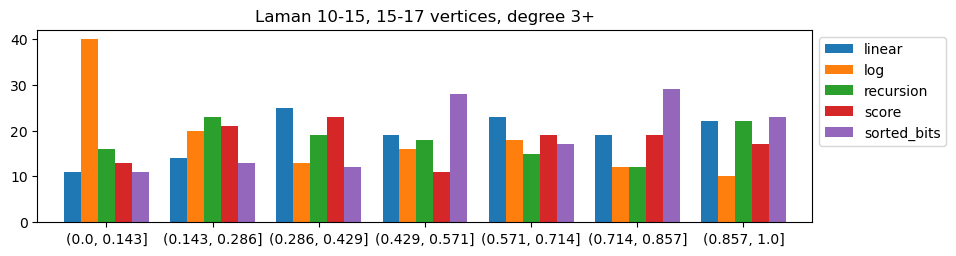

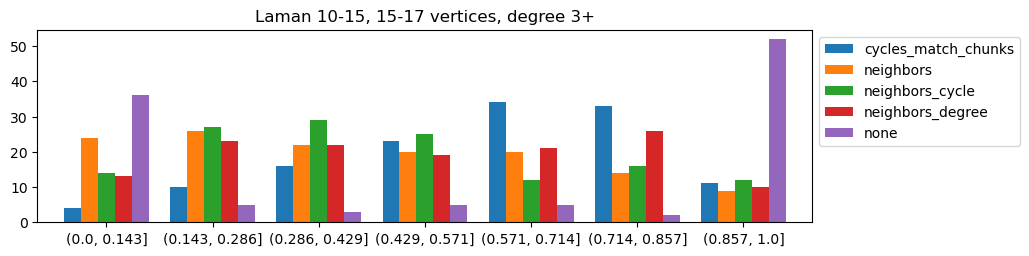

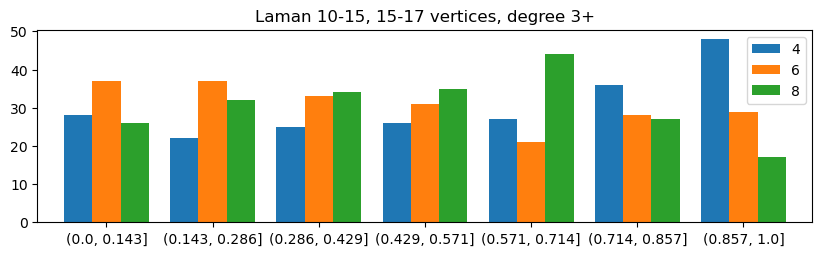

In [11]:
input = """
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-none-4-smart]                                                    2.0210 (1.0)       2.0260 (1.0)       2.0232 (1.0)      0.0025 (inf)       2.0227 (1.0)      0.0037 (inf)           1;0  0.4943 (1.0)           3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-none-4-smart]                                                  2.0273 (1.00)      2.1527 (1.06)      2.1054 (1.04)     0.0682 (inf)       2.1362 (1.06)     0.0941 (inf)           1;0  0.4750 (0.96)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors-4-smart]                                               2.0559 (1.02)      2.1929 (1.08)      2.1066 (1.04)     0.0751 (inf)       2.0710 (1.02)     0.1027 (inf)           1;0  0.4747 (0.96)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-none-4-smart]                                              2.1290 (1.05)      2.1456 (1.06)      2.1389 (1.06)     0.0088 (inf)       2.1421 (1.06)     0.0125 (inf)           1;0  0.4675 (0.95)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_degree-4-smart]                                        2.0815 (1.03)      2.2370 (1.10)      2.1649 (1.07)     0.0783 (inf)       2.1763 (1.08)     0.1166 (inf)           1;0  0.4619 (0.93)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-none-6-smart]                                                    2.1716 (1.07)      2.1922 (1.08)      2.1833 (1.08)     0.0106 (inf)       2.1863 (1.08)     0.0154 (inf)           1;0  0.4580 (0.93)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-none-6-smart]                                                  2.1780 (1.08)      2.1932 (1.08)      2.1847 (1.08)     0.0077 (inf)       2.1829 (1.08)     0.0114 (inf)           1;0  0.4577 (0.93)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_degree-6-smart]                                        2.1797 (1.08)      2.2438 (1.11)      2.2122 (1.09)     0.0321 (inf)       2.2130 (1.09)     0.0481 (inf)           1;0  0.4520 (0.91)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_cycle-4-smart]                                         2.1941 (1.09)      2.2346 (1.10)      2.2205 (1.10)     0.0229 (inf)       2.2329 (1.10)     0.0304 (inf)           1;0  0.4503 (0.91)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors-6-smart]                                               2.2181 (1.10)      2.2351 (1.10)      2.2251 (1.10)     0.0089 (inf)       2.2222 (1.10)     0.0128 (inf)           1;0  0.4494 (0.91)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors-4-smart]                                                2.2318 (1.10)      2.3236 (1.15)      2.2688 (1.12)     0.0485 (inf)       2.2509 (1.11)     0.0689 (inf)           1;0  0.4408 (0.89)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-none-6-smart]                                                 2.2881 (1.13)      2.3333 (1.15)      2.3059 (1.14)     0.0241 (inf)       2.2963 (1.14)     0.0339 (inf)           1;0  0.4337 (0.88)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors-4-smart]                                             2.2824 (1.13)      2.3404 (1.16)      2.3062 (1.14)     0.0304 (inf)       2.2958 (1.14)     0.0435 (inf)           1;0  0.4336 (0.88)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors-4-smart]                                             2.2155 (1.10)      2.4911 (1.23)      2.3094 (1.14)     0.1575 (inf)       2.2215 (1.10)     0.2067 (inf)           1;0  0.4330 (0.88)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-none-6-smart]                                              2.3340 (1.15)      2.3357 (1.15)      2.3347 (1.15)     0.0009 (inf)       2.3343 (1.15)     0.0012 (inf)           1;0  0.4283 (0.87)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_cycle-4-smart]                                          2.3148 (1.15)      2.3600 (1.16)      2.3392 (1.16)     0.0228 (inf)       2.3426 (1.16)     0.0339 (inf)           1;0  0.4275 (0.86)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_cycle-6-smart]                                         2.3217 (1.15)      2.3601 (1.16)      2.3447 (1.16)     0.0203 (inf)       2.3522 (1.16)     0.0288 (inf)           1;0  0.4265 (0.86)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_degree-6-smart]                                  2.2069 (1.09)      2.4357 (1.20)      2.3458 (1.16)     0.1221 (inf)       2.3948 (1.18)     0.1717 (inf)           1;0  0.4263 (0.86)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_degree-4-smart]                                      2.1731 (1.08)      2.4503 (1.21)      2.3535 (1.16)     0.1563 (inf)       2.4371 (1.20)     0.2079 (inf)           1;0  0.4249 (0.86)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-none-8-smart]                                                  2.3554 (1.17)      2.3819 (1.18)      2.3696 (1.17)     0.0134 (inf)       2.3716 (1.17)     0.0199 (inf)           1;0  0.4220 (0.85)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-none-8-smart]                                                    2.3469 (1.16)      2.3977 (1.18)      2.3700 (1.17)     0.0257 (inf)       2.3654 (1.17)     0.0381 (inf)           1;0  0.4219 (0.85)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-cycles_match_chunks-6-smart]                                     2.3599 (1.17)      2.3919 (1.18)      2.3763 (1.17)     0.0160 (inf)       2.3771 (1.18)     0.0240 (inf)           1;0  0.4208 (0.85)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-none-8-smart]                                              2.3628 (1.17)      2.3855 (1.18)      2.3770 (1.17)     0.0124 (inf)       2.3829 (1.18)     0.0171 (inf)           1;0  0.4207 (0.85)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_degree-6-smart]                                         2.3515 (1.16)      2.4475 (1.21)      2.3883 (1.18)     0.0518 (inf)       2.3659 (1.17)     0.0720 (inf)           1;0  0.4187 (0.85)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-none-8-smart]                                                 2.3876 (1.18)      2.4168 (1.19)      2.4064 (1.19)     0.0163 (inf)       2.4148 (1.19)     0.0219 (inf)           1;0  0.4156 (0.84)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors-6-smart]                                                2.3950 (1.19)      2.4170 (1.19)      2.4094 (1.19)     0.0125 (inf)       2.4162 (1.19)     0.0165 (inf)           1;0  0.4150 (0.84)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-none-4-smart]                                                 2.3722 (1.17)      2.4748 (1.22)      2.4098 (1.19)     0.0565 (inf)       2.3824 (1.18)     0.0770 (inf)           1;0  0.4150 (0.84)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors-4-smart]                                         2.3811 (1.18)      2.4392 (1.20)      2.4174 (1.19)     0.0317 (inf)       2.4320 (1.20)     0.0435 (inf)           1;0  0.4137 (0.84)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                             2.4212 (1.20)      2.4304 (1.20)      2.4261 (1.20)     0.0046 (inf)       2.4267 (1.20)     0.0069 (inf)           1;0  0.4122 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_degree-6-smart]                                      2.3383 (1.16)      2.4924 (1.23)      2.4360 (1.20)     0.0850 (inf)       2.4772 (1.22)     0.1156 (inf)           1;0  0.4105 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_degree-6-smart]                                   2.3662 (1.17)      2.5916 (1.28)      2.4421 (1.21)     0.1295 (inf)       2.3684 (1.17)     0.1690 (inf)           1;0  0.4095 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors-4-smart]                                           2.3764 (1.18)      2.5502 (1.26)      2.4429 (1.21)     0.0938 (inf)       2.4023 (1.19)     0.1304 (inf)           1;0  0.4093 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_cycle-4-smart]                                        2.4205 (1.20)      2.4849 (1.23)      2.4489 (1.21)     0.0329 (inf)       2.4413 (1.21)     0.0483 (inf)           1;0  0.4083 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-cycles_match_chunks-6-smart]                               2.3958 (1.19)      2.5247 (1.25)      2.4500 (1.21)     0.0668 (inf)       2.4295 (1.20)     0.0967 (inf)           1;0  0.4082 (0.83)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors-6-smart]                                             2.4328 (1.20)      2.4853 (1.23)      2.4539 (1.21)     0.0277 (inf)       2.4436 (1.21)     0.0394 (inf)           1;0  0.4075 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_degree-4-smart]                                         2.2496 (1.11)      2.6059 (1.29)      2.4653 (1.22)     0.1896 (inf)       2.5403 (1.26)     0.2672 (inf)           1;0  0.4056 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors-6-smart]                                             2.4464 (1.21)      2.5077 (1.24)      2.4716 (1.22)     0.0321 (inf)       2.4607 (1.22)     0.0460 (inf)           1;0  0.4046 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors-6-smart]                                            2.4169 (1.20)      2.5449 (1.26)      2.4730 (1.22)     0.0655 (inf)       2.4571 (1.21)     0.0960 (inf)           1;0  0.4044 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-none-8-smart]                                            2.4673 (1.22)      2.4815 (1.22)      2.4735 (1.22)     0.0073 (inf)       2.4716 (1.22)     0.0107 (inf)           1;0  0.4043 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_cycle-4-smart]                                       2.3781 (1.18)      2.5988 (1.28)      2.4765 (1.22)     0.1122 (inf)       2.4526 (1.21)     0.1655 (inf)           1;0  0.4038 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_cycle-6-smart]                                          2.4669 (1.22)      2.4948 (1.23)      2.4819 (1.23)     0.0141 (inf)       2.4841 (1.23)     0.0210 (inf)           1;0  0.4029 (0.82)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_cycle-4-smart]                                   2.3827 (1.18)      2.6006 (1.28)      2.4838 (1.23)     0.1098 (inf)       2.4680 (1.22)     0.1634 (inf)           1;0  0.4026 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors-6-smart]                                              2.3947 (1.18)      2.6226 (1.29)      2.4844 (1.23)     0.1214 (inf)       2.4360 (1.20)     0.1709 (inf)           1;0  0.4025 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_degree-6-smart]                                2.4089 (1.19)      2.5460 (1.26)      2.4846 (1.23)     0.0696 (inf)       2.4988 (1.24)     0.1028 (inf)           1;0  0.4025 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-cycles_match_chunks-6-smart]                                   2.4810 (1.23)      2.5017 (1.23)      2.4920 (1.23)     0.0104 (inf)       2.4933 (1.23)     0.0156 (inf)           1;0  0.4013 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-none-6-smart]                                            2.4812 (1.23)      2.5215 (1.24)      2.5001 (1.24)     0.0203 (inf)       2.4977 (1.23)     0.0303 (inf)           1;0  0.4000 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors-4-smart]                                       2.4287 (1.20)      2.5461 (1.26)      2.5008 (1.24)     0.0631 (inf)       2.5276 (1.25)     0.0881 (inf)           1;0  0.3999 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors-8-smart]                                               2.4315 (1.20)      2.6373 (1.30)      2.5019 (1.24)     0.1173 (inf)       2.4369 (1.20)     0.1543 (inf)           1;0  0.3997 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-cycles_match_chunks-4-smart]                                     2.4622 (1.22)      2.5896 (1.28)      2.5069 (1.24)     0.0717 (inf)       2.4687 (1.22)     0.0955 (inf)           1;0  0.3989 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_degree-4-smart]                                   2.4183 (1.20)      2.5907 (1.28)      2.5104 (1.24)     0.0868 (inf)       2.5222 (1.25)     0.1293 (inf)           1;0  0.3983 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors-4-smart]                                            2.4484 (1.21)      2.6195 (1.29)      2.5110 (1.24)     0.0944 (inf)       2.4649 (1.22)     0.1283 (inf)           1;0  0.3983 (0.81)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_degree-6-smart]                                     2.3463 (1.16)      2.7819 (1.37)      2.5212 (1.25)     0.2302 (inf)       2.4353 (1.20)     0.3268 (inf)           1;0  0.3966 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-cycles_match_chunks-6-smart]                                      2.5158 (1.24)      2.5475 (1.26)      2.5264 (1.25)     0.0182 (inf)       2.5160 (1.24)     0.0238 (inf)           1;0  0.3958 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_cycle-4-smart]                                       2.3931 (1.18)      2.7535 (1.36)      2.5338 (1.25)     0.1928 (inf)       2.4547 (1.21)     0.2703 (inf)           1;0  0.3947 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                                    2.4723 (1.22)      2.6106 (1.29)      2.5338 (1.25)     0.0704 (inf)       2.5184 (1.25)     0.1037 (inf)           1;0  0.3947 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]                                2.5288 (1.25)      2.5484 (1.26)      2.5367 (1.25)     0.0104 (inf)       2.5328 (1.25)     0.0147 (inf)           1;0  0.3942 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                                    2.4908 (1.23)      2.6146 (1.29)      2.5427 (1.26)     0.0643 (inf)       2.5227 (1.25)     0.0929 (inf)           1;0  0.3933 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-cycles_match_chunks-4-smart]                                   2.4784 (1.23)      2.6646 (1.32)      2.5440 (1.26)     0.1046 (inf)       2.4890 (1.23)     0.1397 (inf)           1;0  0.3931 (0.80)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_cycle-6-smart]                                        2.5146 (1.24)      2.5961 (1.28)      2.5476 (1.26)     0.0429 (inf)       2.5321 (1.25)     0.0611 (inf)           1;0  0.3925 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_cycle-6-smart]                                 2.4718 (1.22)      2.6856 (1.33)      2.5552 (1.26)     0.1144 (inf)       2.5083 (1.24)     0.1604 (inf)           1;0  0.3914 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_cycle-6-smart]                                   2.4924 (1.23)      2.5948 (1.28)      2.5604 (1.27)     0.0589 (inf)       2.5940 (1.28)     0.0768 (inf)           1;0  0.3906 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_cycle-6-smart]                                       2.5491 (1.26)      2.5676 (1.27)      2.5604 (1.27)     0.0099 (inf)       2.5645 (1.27)     0.0138 (inf)           1;0  0.3906 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_degree-4-smart]                                    2.3130 (1.14)      3.0139 (1.49)      2.5647 (1.27)     0.3899 (inf)       2.3673 (1.17)     0.5256 (inf)           1;0  0.3899 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_cycle-4-smart]                                 2.5392 (1.26)      2.6088 (1.29)      2.5678 (1.27)     0.0364 (inf)       2.5553 (1.26)     0.0522 (inf)           1;0  0.3894 (0.79)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-cycles_match_chunks-4-smart]                                      2.4928 (1.23)      2.6431 (1.30)      2.5870 (1.28)     0.0820 (inf)       2.6250 (1.30)     0.1127 (inf)           1;0  0.3865 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_cycle-6-smart]                                     2.4627 (1.22)      2.7592 (1.36)      2.5886 (1.28)     0.1532 (inf)       2.5439 (1.26)     0.2224 (inf)           1;0  0.3863 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_cycle-6-smart]                                       2.5357 (1.25)      2.6230 (1.29)      2.5895 (1.28)     0.0470 (inf)       2.6096 (1.29)     0.0655 (inf)           1;0  0.3862 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors-8-smart]                                            2.5048 (1.24)      2.7336 (1.35)      2.5916 (1.28)     0.1240 (inf)       2.5364 (1.25)     0.1716 (inf)           1;0  0.3859 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_degree-8-smart]                                        2.4548 (1.21)      2.8008 (1.38)      2.6012 (1.29)     0.1791 (inf)       2.5480 (1.26)     0.2595 (inf)           1;0  0.3844 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_degree-8-smart]                                     2.4599 (1.22)      2.7854 (1.37)      2.6021 (1.29)     0.1666 (inf)       2.5610 (1.27)     0.2441 (inf)           1;0  0.3843 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_cycle-6-smart]                                      2.5161 (1.25)      2.6958 (1.33)      2.6065 (1.29)     0.0898 (inf)       2.6075 (1.29)     0.1347 (inf)           1;0  0.3837 (0.78)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors-6-smart]                                          2.5221 (1.25)      2.7464 (1.36)      2.6121 (1.29)     0.1186 (inf)       2.5676 (1.27)     0.1682 (inf)           1;0  0.3828 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_degree-4-smart]                                2.4580 (1.22)      2.8048 (1.38)      2.6149 (1.29)     0.1758 (inf)       2.5818 (1.28)     0.2601 (inf)           1;0  0.3824 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_degree-6-smart]                                       2.4770 (1.23)      2.7271 (1.35)      2.6164 (1.29)     0.1275 (inf)       2.6453 (1.31)     0.1875 (inf)           1;0  0.3822 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors-4-smart]                                             2.5286 (1.25)      2.6792 (1.32)      2.6180 (1.29)     0.0791 (inf)       2.6460 (1.31)     0.1130 (inf)           1;0  0.3820 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_cycle-8-smart]                                       2.5303 (1.25)      2.6995 (1.33)      2.6181 (1.29)     0.0848 (inf)       2.6246 (1.30)     0.1269 (inf)           1;0  0.3820 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_cycle-4-smart]                                      2.5796 (1.28)      2.7021 (1.33)      2.6210 (1.30)     0.0702 (inf)       2.5813 (1.28)     0.0918 (inf)           1;0  0.3815 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-cycles_match_chunks-4-smart]                               2.5844 (1.28)      2.6718 (1.32)      2.6220 (1.30)     0.0449 (inf)       2.6098 (1.29)     0.0655 (inf)           1;0  0.3814 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-cycles_match_chunks-4-smart]                             2.4774 (1.23)      2.7094 (1.34)      2.6244 (1.30)     0.1278 (inf)       2.6863 (1.33)     0.1740 (inf)           1;0  0.3810 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_degree-4-smart]                                  2.4726 (1.22)      2.7490 (1.36)      2.6261 (1.30)     0.1407 (inf)       2.6566 (1.31)     0.2073 (inf)           1;0  0.3808 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors-4-smart]                                          2.4642 (1.22)      2.7232 (1.34)      2.6263 (1.30)     0.1413 (inf)       2.6916 (1.33)     0.1942 (inf)           1;0  0.3808 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                                   2.5788 (1.28)      2.7192 (1.34)      2.6270 (1.30)     0.0799 (inf)       2.5830 (1.28)     0.1053 (inf)           1;0  0.3807 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors-6-smart]                                           2.4351 (1.20)      2.8099 (1.39)      2.6283 (1.30)     0.1877 (inf)       2.6399 (1.31)     0.2811 (inf)           1;0  0.3805 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors-8-smart]                                             2.4838 (1.23)      2.7491 (1.36)      2.6327 (1.30)     0.1356 (inf)       2.6654 (1.32)     0.1990 (inf)           1;0  0.3798 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors-4-smart]                                              2.3671 (1.17)      2.8689 (1.42)      2.6329 (1.30)     0.2522 (inf)       2.6627 (1.32)     0.3764 (inf)           1;0  0.3798 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-neighbors_cycle-8-smart]                                         2.5070 (1.24)      2.7739 (1.37)      2.6393 (1.30)     0.1335 (inf)       2.6372 (1.30)     0.2002 (inf)           1;0  0.3789 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors-8-smart]                                         2.5082 (1.24)      2.7514 (1.36)      2.6394 (1.30)     0.1228 (inf)       2.6585 (1.31)     0.1825 (inf)           1;0  0.3789 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_degree-6-smart]                                   2.4553 (1.21)      2.7719 (1.37)      2.6412 (1.31)     0.1654 (inf)       2.6964 (1.33)     0.2374 (inf)           1;0  0.3786 (0.77)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_degree-4-smart]                                       2.5462 (1.26)      2.7215 (1.34)      2.6489 (1.31)     0.0915 (inf)       2.6790 (1.32)     0.1315 (inf)           1;0  0.3775 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_degree-4-smart]                                      2.3948 (1.18)      2.8637 (1.41)      2.6507 (1.31)     0.2374 (inf)       2.6938 (1.33)     0.3517 (inf)           1;0  0.3773 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-cycles_match_chunks-6-smart]                                    2.6426 (1.31)      2.6582 (1.31)      2.6515 (1.31)     0.0081 (inf)       2.6538 (1.31)     0.0118 (inf)           1;0  0.3771 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_cycle-4-smart]                                       2.6405 (1.31)      2.6580 (1.31)      2.6521 (1.31)     0.0100 (inf)       2.6577 (1.31)     0.0131 (inf)           1;0  0.3771 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_cycle-6-smart]                                       2.5729 (1.27)      2.7101 (1.34)      2.6612 (1.32)     0.0767 (inf)       2.7008 (1.34)     0.1029 (inf)           1;0  0.3758 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-none-4-smart]                                            2.6604 (1.32)      2.6661 (1.32)      2.6632 (1.32)     0.0028 (inf)       2.6632 (1.32)     0.0043 (inf)           1;0  0.3755 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_degree-6-smart]                                      2.5762 (1.27)      2.7636 (1.36)      2.6658 (1.32)     0.0940 (inf)       2.6576 (1.31)     0.1405 (inf)           1;0  0.3751 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_degree-4-smart]                                2.5975 (1.29)      2.7033 (1.33)      2.6663 (1.32)     0.0596 (inf)       2.6980 (1.33)     0.0794 (inf)           1;0  0.3751 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors-4-smart]                                          2.5905 (1.28)      2.7431 (1.35)      2.6761 (1.32)     0.0780 (inf)       2.6948 (1.33)     0.1145 (inf)           1;0  0.3737 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_degree-6-smart]                                2.4108 (1.19)      3.0853 (1.52)      2.6774 (1.32)     0.3587 (inf)       2.5361 (1.25)     0.5058 (inf)           1;0  0.3735 (0.76)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors-6-smart]                                         2.4362 (1.21)      3.1500 (1.55)      2.6803 (1.32)     0.4069 (inf)       2.4546 (1.21)     0.5354 (inf)           1;0  0.3731 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_cycle-8-smart]                                      2.6049 (1.29)      2.7272 (1.35)      2.6811 (1.33)     0.0664 (inf)       2.7111 (1.34)     0.0917 (inf)           1;0  0.3730 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_cycle-8-smart]                                   2.5766 (1.27)      2.7614 (1.36)      2.6815 (1.33)     0.0949 (inf)       2.7064 (1.34)     0.1386 (inf)           1;0  0.3729 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_degree-6-smart]                                    2.6367 (1.30)      2.7341 (1.35)      2.6873 (1.33)     0.0488 (inf)       2.6912 (1.33)     0.0730 (inf)           1;0  0.3721 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_degree-6-smart]                                      2.4520 (1.21)      2.9565 (1.46)      2.6901 (1.33)     0.2535 (inf)       2.6618 (1.32)     0.3784 (inf)           1;0  0.3717 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                             2.6781 (1.33)      2.7194 (1.34)      2.6946 (1.33)     0.0218 (inf)       2.6863 (1.33)     0.0309 (inf)           1;0  0.3711 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                           2.5873 (1.28)      2.7522 (1.36)      2.6957 (1.33)     0.0938 (inf)       2.7475 (1.36)     0.1236 (inf)           1;0  0.3710 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors-8-smart]                                       2.6614 (1.32)      2.7189 (1.34)      2.6974 (1.33)     0.0314 (inf)       2.7120 (1.34)     0.0432 (inf)           1;0  0.3707 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_degree-8-smart]                                2.6305 (1.30)      2.7920 (1.38)      2.6975 (1.33)     0.0842 (inf)       2.6699 (1.32)     0.1211 (inf)           1;0  0.3707 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                              2.6485 (1.31)      2.7781 (1.37)      2.7078 (1.34)     0.0655 (inf)       2.6966 (1.33)     0.0972 (inf)           1;0  0.3693 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors-6-smart]                                       2.4875 (1.23)      3.0501 (1.51)      2.7132 (1.34)     0.2974 (inf)       2.6019 (1.29)     0.4220 (inf)           1;0  0.3686 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors-6-smart]                                          2.6453 (1.31)      2.7769 (1.37)      2.7139 (1.34)     0.0660 (inf)       2.7195 (1.34)     0.0987 (inf)           1;0  0.3685 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_cycle-8-smart]                                          2.6589 (1.32)      2.7465 (1.36)      2.7152 (1.34)     0.0488 (inf)       2.7401 (1.35)     0.0657 (inf)           1;0  0.3683 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-cycles_match_chunks-4-smart]                                   2.6845 (1.33)      2.7672 (1.37)      2.7156 (1.34)     0.0450 (inf)       2.6950 (1.33)     0.0620 (inf)           1;0  0.3682 (0.75)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]                                2.7024 (1.34)      2.7386 (1.35)      2.7228 (1.35)     0.0185 (inf)       2.7274 (1.35)     0.0271 (inf)           1;0  0.3673 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                             2.7062 (1.34)      2.7444 (1.35)      2.7241 (1.35)     0.0192 (inf)       2.7216 (1.35)     0.0286 (inf)           1;0  0.3671 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                                 2.6106 (1.29)      2.9435 (1.45)      2.7245 (1.35)     0.1897 (inf)       2.6195 (1.30)     0.2497 (inf)           1;0  0.3670 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_cycle-4-smart]                                     2.4622 (1.22)      3.2054 (1.58)      2.7267 (1.35)     0.4153 (inf)       2.5125 (1.24)     0.5574 (inf)           1;0  0.3667 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_cycle-8-smart]                                 2.7012 (1.34)      2.7621 (1.36)      2.7337 (1.35)     0.0307 (inf)       2.7378 (1.35)     0.0457 (inf)           1;0  0.3658 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors-8-smart]                                       2.6697 (1.32)      2.7942 (1.38)      2.7340 (1.35)     0.0624 (inf)       2.7380 (1.35)     0.0934 (inf)           1;0  0.3658 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-cycles_match_chunks-6-smart]                                  2.6682 (1.32)      2.8180 (1.39)      2.7342 (1.35)     0.0765 (inf)       2.7164 (1.34)     0.1124 (inf)           1;0  0.3657 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                                    2.6341 (1.30)      2.8706 (1.42)      2.7382 (1.35)     0.1208 (inf)       2.7100 (1.34)     0.1774 (inf)           1;0  0.3652 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_degree-8-smart]                                      2.6716 (1.32)      2.7785 (1.37)      2.7400 (1.35)     0.0595 (inf)       2.7701 (1.37)     0.0802 (inf)           1;0  0.3650 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_degree-8-smart]                                   2.6893 (1.33)      2.8066 (1.39)      2.7471 (1.36)     0.0587 (inf)       2.7455 (1.36)     0.0880 (inf)           1;0  0.3640 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_cycle-8-smart]                                     2.7259 (1.35)      2.7752 (1.37)      2.7487 (1.36)     0.0248 (inf)       2.7450 (1.36)     0.0369 (inf)           1;0  0.3638 (0.74)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors-8-smart]                                           2.6815 (1.33)      2.8463 (1.40)      2.7528 (1.36)     0.0846 (inf)       2.7306 (1.35)     0.1236 (inf)           1;0  0.3633 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_cycle-8-smart]                                 2.6440 (1.31)      2.8561 (1.41)      2.7654 (1.37)     0.1093 (inf)       2.7961 (1.38)     0.1590 (inf)           1;0  0.3616 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                              2.6894 (1.33)      2.8682 (1.42)      2.7706 (1.37)     0.0905 (inf)       2.7543 (1.36)     0.1341 (inf)           1;0  0.3609 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                                    2.7451 (1.36)      2.8128 (1.39)      2.7727 (1.37)     0.0355 (inf)       2.7603 (1.36)     0.0508 (inf)           1;0  0.3607 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                                    2.6416 (1.31)      2.8394 (1.40)      2.7728 (1.37)     0.1136 (inf)       2.8374 (1.40)     0.1483 (inf)           1;0  0.3606 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors-8-smart]                                                2.6518 (1.31)      3.0119 (1.49)      2.7775 (1.37)     0.2031 (inf)       2.6689 (1.32)     0.2701 (inf)           1;0  0.3600 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors-8-smart]                                             2.6458 (1.31)      3.0166 (1.49)      2.7800 (1.37)     0.2056 (inf)       2.6775 (1.32)     0.2781 (inf)           1;0  0.3597 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-cycles_match_chunks-4-smart]                                 2.5048 (1.24)      3.0462 (1.50)      2.7828 (1.38)     0.2710 (inf)       2.7973 (1.38)     0.4060 (inf)           1;0  0.3594 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-neighbors_degree-8-smart]                                  2.6502 (1.31)      2.8572 (1.41)      2.7864 (1.38)     0.1180 (inf)       2.8518 (1.41)     0.1553 (inf)           1;0  0.3589 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-log-cycles_match_chunks-8-smart]                                     2.7691 (1.37)      2.8095 (1.39)      2.7897 (1.38)     0.0202 (inf)       2.7904 (1.38)     0.0303 (inf)           1;0  0.3585 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-recursion-cycles_match_chunks-8-smart]                               2.7832 (1.38)      2.8024 (1.38)      2.7897 (1.38)     0.0110 (inf)       2.7835 (1.38)     0.0144 (inf)           1;0  0.3585 (0.73)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_cycle-8-smart]                                       2.7224 (1.35)      2.8360 (1.40)      2.7934 (1.38)     0.0619 (inf)       2.8219 (1.40)     0.0852 (inf)           1;0  0.3580 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-neighbors_degree-8-smart]                                2.7450 (1.36)      2.8971 (1.43)      2.7981 (1.38)     0.0858 (inf)       2.7522 (1.36)     0.1141 (inf)           1;0  0.3574 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-neighbors_degree-8-smart]                                    2.7623 (1.37)      2.8196 (1.39)      2.7988 (1.38)     0.0317 (inf)       2.8144 (1.39)     0.0429 (inf)           1;0  0.3573 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                                   2.8014 (1.39)      2.8097 (1.39)      2.8054 (1.39)     0.0042 (inf)       2.8052 (1.39)     0.0062 (inf)           1;0  0.3565 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_cycle-8-smart]                                        2.6733 (1.32)      2.9069 (1.43)      2.8071 (1.39)     0.1204 (inf)       2.8412 (1.40)     0.1752 (inf)           1;0  0.3562 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-cycles_match_chunks-8-smart]                                   2.7991 (1.39)      2.8175 (1.39)      2.8091 (1.39)     0.0093 (inf)       2.8107 (1.39)     0.0138 (inf)           1;0  0.3560 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-cycles_match_chunks-6-smart]                             2.5068 (1.24)      3.4112 (1.68)      2.8109 (1.39)     0.5200 (inf)       2.5146 (1.24)     0.6783 (inf)           1;0  0.3558 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors_degree-8-smart]                                      2.6984 (1.34)      2.9499 (1.46)      2.8166 (1.39)     0.1264 (inf)       2.8014 (1.38)     0.1886 (inf)           1;0  0.3550 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors-8-smart]                                              2.6619 (1.32)      3.0334 (1.50)      2.8176 (1.39)     0.1930 (inf)       2.7573 (1.36)     0.2787 (inf)           1;0  0.3549 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                                  2.7677 (1.37)      2.9211 (1.44)      2.8239 (1.40)     0.0845 (inf)       2.7830 (1.38)     0.1150 (inf)           1;0  0.3541 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors-8-smart]                                        2.6076 (1.29)      2.9365 (1.45)      2.8247 (1.40)     0.1881 (inf)       2.9301 (1.45)     0.2467 (inf)           1;0  0.3540 (0.72)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors-8-smart]                                             2.7956 (1.38)      2.8867 (1.42)      2.8332 (1.40)     0.0476 (inf)       2.8172 (1.39)     0.0684 (inf)           1;0  0.3530 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors-8-smart]                                          2.7960 (1.38)      2.8764 (1.42)      2.8354 (1.40)     0.0402 (inf)       2.8339 (1.40)     0.0603 (inf)           1;0  0.3527 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-cycles_match_chunks-4-smart]                                    2.7866 (1.38)      2.8698 (1.42)      2.8402 (1.40)     0.0465 (inf)       2.8643 (1.42)     0.0624 (inf)           1;0  0.3521 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                                     2.7616 (1.37)      2.9224 (1.44)      2.8478 (1.41)     0.0810 (inf)       2.8594 (1.41)     0.1206 (inf)           1;0  0.3511 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                               2.8132 (1.39)      2.8880 (1.43)      2.8580 (1.41)     0.0396 (inf)       2.8730 (1.42)     0.0561 (inf)           1;0  0.3499 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-score-neighbors-6-smart]                                             2.7074 (1.34)      3.0282 (1.49)      2.8625 (1.41)     0.1607 (inf)       2.8520 (1.41)     0.2406 (inf)           1;0  0.3493 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-neighbors_cycle-8-smart]                                       2.7374 (1.35)      3.0166 (1.49)      2.8684 (1.42)     0.1404 (inf)       2.8513 (1.41)     0.2095 (inf)           1;0  0.3486 (0.71)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-cycles_match_chunks-8-smart]                                 2.8411 (1.41)      2.8934 (1.43)      2.8712 (1.42)     0.0270 (inf)       2.8790 (1.42)     0.0393 (inf)           1;0  0.3483 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-cycles_match_chunks-6-smart]                                 2.5797 (1.28)      3.3251 (1.64)      2.8760 (1.42)     0.3955 (inf)       2.7232 (1.35)     0.5591 (inf)           1;0  0.3477 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_degree-4-smart]                              2.6569 (1.31)      3.1799 (1.57)      2.8828 (1.42)     0.2686 (inf)       2.8117 (1.39)     0.3922 (inf)           1;0  0.3469 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors_degree-8-smart]                                   2.7030 (1.34)      3.2306 (1.59)      2.8853 (1.43)     0.2992 (inf)       2.7223 (1.35)     0.3957 (inf)           1;0  0.3466 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-cycles_match_chunks-8-smart]                                  2.8830 (1.43)      2.9005 (1.43)      2.8891 (1.43)     0.0099 (inf)       2.8837 (1.43)     0.0131 (inf)           1;0  0.3461 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                              2.8402 (1.41)      2.9664 (1.46)      2.8893 (1.43)     0.0676 (inf)       2.8612 (1.41)     0.0946 (inf)           1;0  0.3461 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-neighbors-8-smart]                                          2.7814 (1.38)      3.1243 (1.54)      2.9011 (1.43)     0.1934 (inf)       2.7976 (1.38)     0.2571 (inf)           1;0  0.3447 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                              2.8463 (1.41)      2.9727 (1.47)      2.9016 (1.43)     0.0647 (inf)       2.8857 (1.43)     0.0948 (inf)           1;0  0.3446 (0.70)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                           2.8592 (1.41)      2.9667 (1.46)      2.9113 (1.44)     0.0538 (inf)       2.9080 (1.44)     0.0806 (inf)           1;0  0.3435 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                           2.8750 (1.42)      2.9431 (1.45)      2.9121 (1.44)     0.0344 (inf)       2.9181 (1.44)     0.0511 (inf)           1;0  0.3434 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                                 2.8083 (1.39)      3.0439 (1.50)      2.9122 (1.44)     0.1202 (inf)       2.8843 (1.43)     0.1766 (inf)           1;0  0.3434 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-neighbors_degree-8-smart]                                       2.7052 (1.34)      3.2840 (1.62)      2.9123 (1.44)     0.3226 (inf)       2.7476 (1.36)     0.4341 (inf)           1;0  0.3434 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]                                2.7770 (1.37)      2.9955 (1.48)      2.9197 (1.44)     0.1237 (inf)       2.9866 (1.48)     0.1639 (inf)           1;0  0.3425 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]                                2.7605 (1.37)      3.1710 (1.57)      2.9219 (1.44)     0.2189 (inf)       2.8342 (1.40)     0.3079 (inf)           1;0  0.3422 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-cycles_match_chunks-8-smart]                                      2.8486 (1.41)      3.0251 (1.49)      2.9259 (1.45)     0.0903 (inf)       2.9039 (1.44)     0.1324 (inf)           1;0  0.3418 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_cycle-4-smart]                                    2.6981 (1.34)      3.3624 (1.66)      2.9273 (1.45)     0.3770 (inf)       2.7214 (1.35)     0.4982 (inf)           1;0  0.3416 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                                   2.8889 (1.43)      2.9606 (1.46)      2.9315 (1.45)     0.0377 (inf)       2.9450 (1.46)     0.0537 (inf)           1;0  0.3411 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                                   2.7456 (1.36)      3.0772 (1.52)      2.9336 (1.45)     0.1702 (inf)       2.9780 (1.47)     0.2487 (inf)           1;0  0.3409 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]                                2.9069 (1.44)      2.9690 (1.47)      2.9428 (1.45)     0.0322 (inf)       2.9524 (1.46)     0.0466 (inf)           1;0  0.3398 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-cycles_match_chunks-8-smart]                             2.8912 (1.43)      3.0366 (1.50)      2.9449 (1.46)     0.0798 (inf)       2.9069 (1.44)     0.1091 (inf)           1;0  0.3396 (0.69)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors-6-smart]                                        2.8514 (1.41)      3.0657 (1.51)      2.9661 (1.47)     0.1079 (inf)       2.9812 (1.47)     0.1607 (inf)           1;0  0.3371 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-neighbors_degree-4-smart]                                     2.4942 (1.23)      3.5908 (1.77)      2.9666 (1.47)     0.5639 (inf)       2.8147 (1.39)     0.8225 (inf)           1;0  0.3371 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-neighbors_degree-4-smart]                                   2.6444 (1.31)      3.3246 (1.64)      2.9667 (1.47)     0.3415 (inf)       2.9309 (1.45)     0.5102 (inf)           1;0  0.3371 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                                 2.8314 (1.40)      3.0933 (1.53)      2.9687 (1.47)     0.1314 (inf)       2.9814 (1.47)     0.1965 (inf)           1;0  0.3368 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                                  2.9222 (1.45)      3.0231 (1.49)      2.9882 (1.48)     0.0572 (inf)       3.0193 (1.49)     0.0757 (inf)           1;0  0.3347 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                              2.8967 (1.43)      3.1547 (1.56)      2.9933 (1.48)     0.1407 (inf)       2.9286 (1.45)     0.1935 (inf)           1;0  0.3341 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_degree-8-smart]                                      2.8762 (1.42)      3.2205 (1.59)      2.9934 (1.48)     0.1967 (inf)       2.8834 (1.43)     0.2582 (inf)           1;0  0.3341 (0.68)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-cycles_match_chunks-8-smart]                                    2.9487 (1.46)      3.0884 (1.52)      2.9985 (1.48)     0.0780 (inf)       2.9585 (1.46)     0.1048 (inf)           1;0  0.3335 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                               2.8758 (1.42)      3.0857 (1.52)      3.0100 (1.49)     0.1165 (inf)       3.0684 (1.52)     0.1574 (inf)           1;0  0.3322 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors-6-smart]                                       2.8580 (1.41)      3.2910 (1.62)      3.0143 (1.49)     0.2403 (inf)       2.8939 (1.43)     0.3248 (inf)           1;0  0.3318 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-neighbors_degree-8-smart]                                         2.8900 (1.43)      3.2514 (1.60)      3.0198 (1.49)     0.2011 (inf)       2.9178 (1.44)     0.2711 (inf)           1;0  0.3312 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                                  2.8987 (1.43)      3.1388 (1.55)      3.0230 (1.49)     0.1203 (inf)       3.0313 (1.50)     0.1801 (inf)           1;0  0.3308 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_cycle-6-smart]                                 3.0167 (1.49)      3.0511 (1.51)      3.0342 (1.50)     0.0172 (inf)       3.0347 (1.50)     0.0258 (inf)           1;0  0.3296 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors-4-smart]                                       2.9214 (1.45)      3.1112 (1.54)      3.0422 (1.50)     0.1050 (inf)       3.0939 (1.53)     0.1424 (inf)           1;0  0.3287 (0.67)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-cycles_match_chunks-4-smart]                                2.9244 (1.45)      3.2246 (1.59)      3.0765 (1.52)     0.1502 (inf)       3.0803 (1.52)     0.2252 (inf)           1;0  0.3250 (0.66)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-linear-cycles_match_chunks-4-smart]                                  3.0564 (1.51)      3.1124 (1.54)      3.0771 (1.52)     0.0307 (inf)       3.0626 (1.51)     0.0420 (inf)           1;0  0.3250 (0.66)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                                     2.9783 (1.47)      3.2993 (1.63)      3.1287 (1.55)     0.1615 (inf)       3.1084 (1.54)     0.2408 (inf)           1;0  0.3196 (0.65)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                                   3.0168 (1.49)      3.2154 (1.59)      3.1466 (1.56)     0.1125 (inf)       3.2075 (1.59)     0.1490 (inf)           1;0  0.3178 (0.64)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-neighbors_degree-4-smart]                                      2.7082 (1.34)      3.6831 (1.82)      3.1634 (1.56)     0.4906 (inf)       3.0989 (1.53)     0.7311 (inf)           1;0  0.3161 (0.64)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors-4-smart]                                     2.9473 (1.46)      3.5846 (1.77)      3.1674 (1.57)     0.3615 (inf)       2.9703 (1.47)     0.4780 (inf)           1;0  0.3157 (0.64)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-neighbors-4-smart]                                        2.8344 (1.40)      3.3966 (1.68)      3.1732 (1.57)     0.2984 (inf)       3.2886 (1.63)     0.4217 (inf)           1;0  0.3151 (0.64)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]                               3.1526 (1.56)      3.4178 (1.69)      3.3116 (1.64)     0.1402 (inf)       3.3642 (1.66)     0.1989 (inf)           1;0  0.3020 (0.61)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]                                 2.9430 (1.46)      3.5613 (1.76)      3.3445 (1.65)     0.3481 (inf)       3.5294 (1.74)     0.4638 (inf)           1;0  0.2990 (0.60)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-none-6-smart]                                            2.9680 (1.47)      3.8854 (1.92)      3.4491 (1.70)     0.4604 (inf)       3.4940 (1.73)     0.6881 (inf)           1;0  0.2899 (0.59)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-none-4-smart]                                                3.4430 (1.70)      3.5812 (1.77)      3.4989 (1.73)     0.0728 (inf)       3.4725 (1.72)     0.1037 (inf)           1;0  0.2858 (0.58)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-none-4-smart]                                          3.4960 (1.73)      3.7481 (1.85)      3.5905 (1.77)     0.1374 (inf)       3.5274 (1.74)     0.1891 (inf)           1;0  0.2785 (0.56)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-none-4-smart]                                            2.9307 (1.45)      4.6178 (2.28)      3.6169 (1.79)     0.8864 (inf)       3.3023 (1.63)     1.2653 (inf)           1;0  0.2765 (0.56)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-none-4-smart]                                                  3.6330 (1.80)      4.3837 (2.16)      4.0045 (1.98)     0.3754 (inf)       3.9968 (1.98)     0.5631 (inf)           1;0  0.2497 (0.51)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-none-4-smart]                                             3.9571 (1.96)      4.2153 (2.08)      4.0761 (2.01)     0.1303 (inf)       4.0557 (2.01)     0.1936 (inf)           1;0  0.2453 (0.50)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-none-4-smart]                                                  3.5632 (1.76)      5.1418 (2.54)      4.0912 (2.02)     0.9099 (inf)       3.5687 (1.76)     1.1840 (inf)           1;0  0.2444 (0.49)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-none-6-smart]                                               3.4436 (1.70)      4.7717 (2.36)      4.1181 (2.04)     0.6643 (inf)       4.1390 (2.05)     0.9961 (inf)           1;0  0.2428 (0.49)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-none-4-smart]                                               3.5367 (1.75)      4.4620 (2.20)      4.1408 (2.05)     0.5235 (inf)       4.4236 (2.19)     0.6940 (inf)           1;0  0.2415 (0.49)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-none-6-smart]                                                  3.8834 (1.92)      4.4408 (2.19)      4.1466 (2.05)     0.2800 (inf)       4.1156 (2.03)     0.4180 (inf)           1;0  0.2412 (0.49)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-none-6-smart]                                          3.6727 (1.82)      4.6384 (2.29)      4.1472 (2.05)     0.4831 (inf)       4.1306 (2.04)     0.7243 (inf)           1;0  0.2411 (0.49)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-none-4-smart]                                                     3.7594 (1.86)      4.9594 (2.45)      4.3302 (2.14)     0.6021 (inf)       4.2718 (2.11)     0.9000 (inf)           1;0  0.2309 (0.47)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-none-8-smart]                                                  4.1533 (2.06)      5.0876 (2.51)      4.5652 (2.26)     0.4768 (inf)       4.4547 (2.20)     0.7007 (inf)           1;0  0.2190 (0.44)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-linear-none-8-smart]                                               4.2098 (2.08)      5.1760 (2.55)      4.6313 (2.29)     0.4947 (inf)       4.5082 (2.23)     0.7246 (inf)           1;0  0.2159 (0.44)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-none-6-smart]                                             4.6247 (2.29)      4.9791 (2.46)      4.8402 (2.39)     0.1892 (inf)       4.9169 (2.43)     0.2658 (inf)           1;0  0.2066 (0.42)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-none-8-smart]                                                     4.4436 (2.20)      6.2391 (3.08)      5.4025 (2.67)     0.9040 (inf)       5.5248 (2.73)     1.3466 (inf)           1;0  0.1851 (0.37)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-linear-none-8-smart]                                                  4.4929 (2.22)      6.2329 (3.08)      5.4157 (2.68)     0.8748 (inf)       5.5214 (2.73)     1.3050 (inf)           1;0  0.1846 (0.37)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-recursion-none-8-smart]                                            4.3682 (2.16)      7.7227 (3.81)      5.6328 (2.78)     1.8232 (inf)       4.8076 (2.38)     2.5159 (inf)           1;0  0.1775 (0.36)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-none-8-smart]                                                4.4084 (2.18)      7.7973 (3.85)      5.6745 (2.80)     1.8497 (inf)       4.8180 (2.38)     2.5417 (inf)           1;0  0.1762 (0.36)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-sorted_bits-none-8-smart]                                          4.6941 (2.32)      7.8814 (3.89)      5.8211 (2.88)     1.7869 (inf)       4.8878 (2.42)     2.3905 (inf)           1;0  0.1718 (0.35)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-none-6-smart]                                                   3.7486 (1.85)      7.2181 (3.56)      5.8515 (2.89)     1.8482 (inf)       6.5877 (3.26)     2.6021 (inf)           1;0  0.1709 (0.35)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-log-none-6-smart]                                                  4.1755 (2.07)      9.8680 (4.87)      6.8208 (3.37)     2.8675 (inf)       6.4188 (3.17)     4.2694 (inf)           1;0  0.1466 (0.30)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-random-subgraphs-score-none-6-smart]                                                4.1040 (2.03)      9.7468 (4.81)      6.9602 (3.44)     2.8221 (inf)       7.0300 (3.48)     4.2321 (inf)           1;0  0.1437 (0.29)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-none-8-smart]                                                   6.2263 (3.08)      8.7464 (4.32)      7.1067 (3.51)     1.4214 (inf)       6.3473 (3.14)     1.8901 (inf)           1;0  0.1407 (0.28)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-none-8-smart]                                               6.2274 (3.08)      8.7244 (4.31)      7.1091 (3.51)     1.4008 (inf)       6.3756 (3.15)     1.8728 (inf)           1;0  0.1407 (0.28)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-none-6-smart]                                               7.1586 (3.54)      7.2817 (3.59)      7.2180 (3.57)     0.0617 (inf)       7.2138 (3.57)     0.0924 (inf)           1;0  0.1385 (0.28)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-log-none-6-smart]                                                     7.3307 (3.63)      7.4308 (3.67)      7.3886 (3.65)     0.0519 (inf)       7.4042 (3.66)     0.0751 (inf)           1;0  0.1353 (0.27)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-sorted_bits-none-8-smart]                                             6.7394 (3.33)      8.7796 (4.33)      7.4768 (3.70)     1.1315 (inf)       6.9114 (3.42)     1.5301 (inf)           1;0  0.1337 (0.27)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-recursion-none-4-smart]                                               3.1053 (1.54)     14.5316 (7.17)     10.4148 (5.15)     6.3470 (inf)      13.6074 (6.73)     8.5697 (inf)           1;0  0.0960 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium-bfs-subgraphs-score-none-4-smart]                                                   7.8062 (3.86)     14.2504 (7.03)     12.0039 (5.93)     3.6383 (inf)      13.9550 (6.90)     4.8331 (inf)           1;0  0.0833 (0.17)          3           1

test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-none-4-smart]                                                    8.9754 (4.44)      9.0489 (4.47)      9.0148 (4.46)     0.0370 (inf)       9.0202 (4.46)     0.0551 (inf)           1;0  0.1109 (0.22)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_cycle-4-smart]                                         9.4388 (4.67)      9.5899 (4.73)      9.5226 (4.71)     0.0769 (inf)       9.5392 (4.72)     0.1133 (inf)           1;0  0.1050 (0.21)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors-4-smart]                                               9.4747 (4.69)      9.5664 (4.72)      9.5306 (4.71)     0.0490 (inf)       9.5508 (4.72)     0.0688 (inf)           1;0  0.1049 (0.21)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-none-4-smart]                                              9.5934 (4.75)      9.6462 (4.76)      9.6231 (4.76)     0.0270 (inf)       9.6295 (4.76)     0.0396 (inf)           1;0  0.1039 (0.21)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-none-4-smart]                                                  9.6899 (4.79)      9.7211 (4.80)      9.7036 (4.80)     0.0159 (inf)       9.6997 (4.80)     0.0234 (inf)           1;0  0.1031 (0.21)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-none-8-smart]                                                 9.8433 (4.87)      9.8458 (4.86)      9.8442 (4.87)     0.0014 (inf)       9.8435 (4.87)     0.0019 (inf)           1;0  0.1016 (0.21)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-none-8-smart]                                                    9.8008 (4.85)     10.0079 (4.94)      9.8836 (4.89)     0.1096 (inf)       9.8421 (4.87)     0.1553 (inf)           1;0  0.1012 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors-8-smart]                                               9.7872 (4.84)      9.9476 (4.91)      9.8865 (4.89)     0.0868 (inf)       9.9248 (4.91)     0.1204 (inf)           1;0  0.1011 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_cycle-6-smart]                                   9.8767 (4.89)     10.0773 (4.97)      9.9469 (4.92)     0.1131 (inf)       9.8865 (4.89)     0.1504 (inf)           1;0  0.1005 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-none-6-smart]                                              9.9845 (4.94)     10.0423 (4.96)     10.0097 (4.95)     0.0296 (inf)      10.0022 (4.95)     0.0434 (inf)           1;0  0.0999 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors-8-smart]                                            10.0023 (4.95)     10.4834 (5.17)     10.2177 (5.05)     0.2445 (inf)      10.1673 (5.03)     0.3608 (inf)           1;0  0.0979 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors-8-smart]                                        10.0084 (4.95)     10.5606 (5.21)     10.2552 (5.07)     0.2807 (inf)      10.1968 (5.04)     0.4142 (inf)           1;0  0.0975 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors-8-smart]                                           10.1714 (5.03)     10.3639 (5.12)     10.2632 (5.07)     0.0966 (inf)      10.2545 (5.07)     0.1444 (inf)           1;0  0.0974 (0.20)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-none-8-smart]                                             10.3916 (5.14)     10.4162 (5.14)     10.4008 (5.14)     0.0134 (inf)      10.3947 (5.14)     0.0185 (inf)           1;0  0.0961 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-none-8-smart]                                                 10.3985 (5.15)     10.4264 (5.15)     10.4135 (5.15)     0.0140 (inf)      10.4157 (5.15)     0.0209 (inf)           1;0  0.0960 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_cycle-4-smart]                                  10.2848 (5.09)     10.5919 (5.23)     10.4166 (5.15)     0.1581 (inf)      10.3732 (5.13)     0.2303 (inf)           1;0  0.0960 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-cycles_match_chunks-4-smart]                                    10.3797 (5.14)     10.6126 (5.24)     10.4586 (5.17)     0.1334 (inf)      10.3835 (5.13)     0.1746 (inf)           1;0  0.0956 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-none-6-smart]                                                10.3119 (5.10)     10.6034 (5.23)     10.4780 (5.18)     0.1499 (inf)      10.5185 (5.20)     0.2186 (inf)           1;0  0.0954 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-none-6-smart]                                                   10.4697 (5.18)     10.5077 (5.19)     10.4911 (5.19)     0.0195 (inf)      10.4959 (5.19)     0.0285 (inf)           1;0  0.0953 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors-6-smart]                                        10.1452 (5.02)     10.9102 (5.39)     10.6538 (5.27)     0.4405 (inf)      10.9061 (5.39)     0.5737 (inf)           1;0  0.0939 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_degree-4-smart]                                        9.9133 (4.91)     11.2674 (5.56)     10.6615 (5.27)     0.6882 (inf)      10.8038 (5.34)     1.0156 (inf)           1;0  0.0938 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_cycle-4-smart]                                         10.6011 (5.25)     10.7148 (5.29)     10.6666 (5.27)     0.0588 (inf)      10.6840 (5.28)     0.0852 (inf)           1;0  0.0938 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors-4-smart]                                               10.5974 (5.24)     10.8147 (5.34)     10.7235 (5.30)     0.1128 (inf)      10.7585 (5.32)     0.1629 (inf)           1;0  0.0933 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_degree-8-smart]                               10.4772 (5.18)     11.0399 (5.45)     10.7632 (5.32)     0.2815 (inf)      10.7724 (5.33)     0.4220 (inf)           1;0  0.0929 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-none-6-smart]                                                 10.7777 (5.33)     10.7978 (5.33)     10.7906 (5.33)     0.0112 (inf)      10.7964 (5.34)     0.0151 (inf)           1;0  0.0927 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_cycle-6-smart]                                        10.6706 (5.28)     11.0515 (5.45)     10.8460 (5.36)     0.1922 (inf)      10.8159 (5.35)     0.2857 (inf)           1;0  0.0922 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors-4-smart]                                            10.1993 (5.05)     11.6087 (5.73)     10.8471 (5.36)     0.7116 (inf)      10.7331 (5.31)     1.0570 (inf)           1;0  0.0922 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors-8-smart]                                      10.7553 (5.32)     11.0758 (5.47)     10.9208 (5.40)     0.1605 (inf)      10.9313 (5.40)     0.2404 (inf)           1;0  0.0916 (0.19)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-none-8-smart]                                           10.7790 (5.33)     11.1743 (5.52)     11.0230 (5.45)     0.2133 (inf)      11.1157 (5.50)     0.2965 (inf)           1;0  0.0907 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors-4-smart]                                             10.5780 (5.23)     11.6870 (5.77)     11.0877 (5.48)     0.5599 (inf)      10.9980 (5.44)     0.8317 (inf)           1;0  0.0902 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_cycle-6-smart]                                       11.0121 (5.45)     11.2260 (5.54)     11.1308 (5.50)     0.1089 (inf)      11.1542 (5.51)     0.1605 (inf)           1;0  0.0898 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors-6-smart]                                              10.6887 (5.29)     11.7918 (5.82)     11.1666 (5.52)     0.5661 (inf)      11.0194 (5.45)     0.8273 (inf)           1;0  0.0896 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_cycle-8-smart]                                        11.0520 (5.47)     11.4395 (5.65)     11.1850 (5.53)     0.2205 (inf)      11.0636 (5.47)     0.2907 (inf)           1;0  0.0894 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_cycle-4-smart]                                      10.4838 (5.19)     12.4950 (6.17)     11.2153 (5.54)     1.1120 (inf)      10.6672 (5.27)     1.5084 (inf)           1;0  0.0892 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_degree-6-smart]                                     10.5763 (5.23)     12.1877 (6.02)     11.2521 (5.56)     0.8365 (inf)      10.9923 (5.43)     1.2085 (inf)           1;0  0.0889 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-cycles_match_chunks-4-smart]                                     11.2371 (5.56)     11.3726 (5.61)     11.3267 (5.60)     0.0776 (inf)      11.3704 (5.62)     0.1016 (inf)           1;0  0.0883 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                                   11.1165 (5.50)     11.4869 (5.67)     11.3469 (5.61)     0.2011 (inf)      11.4372 (5.65)     0.2779 (inf)           1;0  0.0881 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_cycle-8-smart]                                11.1044 (5.49)     11.5847 (5.72)     11.4048 (5.64)     0.2618 (inf)      11.5253 (5.70)     0.3602 (inf)           1;0  0.0877 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors-6-smart]                                           11.1239 (5.50)     11.9114 (5.88)     11.4075 (5.64)     0.4375 (inf)      11.1872 (5.53)     0.5906 (inf)           1;0  0.0877 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_cycle-8-smart]                                     11.0407 (5.46)     11.9423 (5.89)     11.4164 (5.64)     0.4692 (inf)      11.2663 (5.57)     0.6762 (inf)           1;0  0.0876 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_cycle-6-smart]                                     11.3097 (5.60)     11.6700 (5.76)     11.5428 (5.71)     0.2022 (inf)      11.6488 (5.76)     0.2702 (inf)           1;0  0.0866 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-cycles_match_chunks-4-smart]                                  11.3464 (5.61)     11.7544 (5.80)     11.5559 (5.71)     0.2042 (inf)      11.5670 (5.72)     0.3060 (inf)           1;0  0.0865 (0.18)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-none-4-smart]                                                11.4623 (5.67)     11.6829 (5.77)     11.5765 (5.72)     0.1105 (inf)      11.5842 (5.73)     0.1655 (inf)           1;0  0.0864 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors-8-smart]                                         11.5205 (5.70)     11.6754 (5.76)     11.5765 (5.72)     0.0859 (inf)      11.5337 (5.70)     0.1162 (inf)           1;0  0.0864 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                             11.5013 (5.69)     11.7652 (5.81)     11.5973 (5.73)     0.1459 (inf)      11.5254 (5.70)     0.1980 (inf)           1;0  0.0862 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_cycle-8-smart]                                  11.2958 (5.59)     11.8793 (5.86)     11.6220 (5.74)     0.2978 (inf)      11.6908 (5.78)     0.4377 (inf)           1;0  0.0860 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_degree-4-smart]                                        11.3063 (5.59)     12.2959 (6.07)     11.6521 (5.76)     0.5581 (inf)      11.3541 (5.61)     0.7422 (inf)           1;0  0.0858 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors-6-smart]                                          11.3924 (5.64)     12.1270 (5.99)     11.6742 (5.77)     0.3961 (inf)      11.5031 (5.69)     0.5510 (inf)           1;0  0.0857 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors-4-smart]                                          11.5603 (5.72)     11.9243 (5.89)     11.6877 (5.78)     0.2051 (inf)      11.5784 (5.72)     0.2730 (inf)           1;0  0.0856 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_degree-6-smart]                               10.7850 (5.34)     12.9610 (6.40)     11.7104 (5.79)     1.1238 (inf)      11.3853 (5.63)     1.6320 (inf)           1;0  0.0854 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_cycle-6-smart]                                         11.6004 (5.74)     11.8099 (5.83)     11.7125 (5.79)     0.1055 (inf)      11.7272 (5.80)     0.1571 (inf)           1;0  0.0854 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_cycle-8-smart]                                      11.4543 (5.67)     12.0727 (5.96)     11.7132 (5.79)     0.3212 (inf)      11.6127 (5.74)     0.4638 (inf)           1;0  0.0854 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_degree-6-smart]                                 10.7637 (5.33)     12.8067 (6.32)     11.7298 (5.80)     1.0260 (inf)      11.6191 (5.74)     1.5322 (inf)           1;0  0.0853 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors-8-smart]                                            11.6050 (5.74)     11.9416 (5.89)     11.7317 (5.80)     0.1831 (inf)      11.6486 (5.76)     0.2525 (inf)           1;0  0.0852 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_cycle-4-smart]                                       11.4726 (5.68)     12.1172 (5.98)     11.7507 (5.81)     0.3313 (inf)      11.6623 (5.77)     0.4834 (inf)           1;0  0.0851 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_degree-6-smart]                               11.0897 (5.49)     12.2337 (6.04)     11.7592 (5.81)     0.5964 (inf)      11.9541 (5.91)     0.8580 (inf)           1;0  0.0850 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                                10.9855 (5.44)     12.4400 (6.14)     11.7595 (5.81)     0.7318 (inf)      11.8530 (5.86)     1.0909 (inf)           1;0  0.0850 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-cycles_match_chunks-6-smart]                                  11.7085 (5.79)     11.8844 (5.87)     11.7977 (5.83)     0.0880 (inf)      11.8002 (5.83)     0.1319 (inf)           1;0  0.0848 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_cycle-6-smart]                                11.5343 (5.71)     12.3832 (6.11)     11.8250 (5.84)     0.4836 (inf)      11.5575 (5.71)     0.6367 (inf)           1;0  0.0846 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_cycle-8-smart]                                    11.4408 (5.66)     12.0858 (5.97)     11.8415 (5.85)     0.3498 (inf)      11.9980 (5.93)     0.4837 (inf)           1;0  0.0844 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_cycle-6-smart]                                      10.8144 (5.35)     12.9427 (6.39)     11.9252 (5.89)     1.0672 (inf)      12.0184 (5.94)     1.5963 (inf)           1;0  0.0839 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_cycle-6-smart]                                      11.8194 (5.85)     12.0304 (5.94)     11.9374 (5.90)     0.1077 (inf)      11.9624 (5.91)     0.1582 (inf)           1;0  0.0838 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-cycles_match_chunks-8-smart]                            11.4801 (5.68)     12.6668 (6.25)     11.9568 (5.91)     0.6268 (inf)      11.7234 (5.80)     0.8900 (inf)           1;0  0.0836 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-cycles_match_chunks-8-smart]                                11.5580 (5.72)     12.7456 (6.29)     11.9837 (5.92)     0.6613 (inf)      11.6475 (5.76)     0.8907 (inf)           1;0  0.0834 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                                   11.4541 (5.67)     12.7589 (6.30)     11.9884 (5.93)     0.6837 (inf)      11.7522 (5.81)     0.9785 (inf)           1;0  0.0834 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-cycles_match_chunks-4-smart]                                   11.8291 (5.85)     12.1236 (5.98)     12.0035 (5.93)     0.1546 (inf)      12.0577 (5.96)     0.2209 (inf)           1;0  0.0833 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_cycle-8-smart]                                      11.4748 (5.68)     12.3892 (6.12)     12.0215 (5.94)     0.4828 (inf)      12.2006 (6.03)     0.6858 (inf)           1;0  0.0832 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                            11.8332 (5.86)     12.1932 (6.02)     12.0403 (5.95)     0.1860 (inf)      12.0944 (5.98)     0.2700 (inf)           1;0  0.0831 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_degree-4-smart]                                     11.0189 (5.45)     12.6416 (6.24)     12.0542 (5.96)     0.8993 (inf)      12.5022 (6.18)     1.2170 (inf)           1;0  0.0830 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors-8-smart]                                          11.4085 (5.65)     13.0944 (6.46)     12.0674 (5.96)     0.9012 (inf)      11.6991 (5.78)     1.2644 (inf)           1;0  0.0829 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                              12.0123 (5.94)     12.2035 (6.02)     12.1066 (5.98)     0.0956 (inf)      12.1041 (5.98)     0.1433 (inf)           1;0  0.0826 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors-8-smart]                                      11.3706 (5.63)     13.1850 (6.51)     12.1588 (6.01)     0.9303 (inf)      11.9209 (5.89)     1.3608 (inf)           1;0  0.0822 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-cycles_match_chunks-8-smart]                              12.0773 (5.98)     12.3565 (6.10)     12.1795 (6.02)     0.1540 (inf)      12.1046 (5.98)     0.2095 (inf)           1;0  0.0821 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_cycle-8-smart]                                   11.6653 (5.77)     12.5944 (6.22)     12.1891 (6.02)     0.4757 (inf)      12.3074 (6.08)     0.6968 (inf)           1;0  0.0820 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-cycles_match_chunks-6-smart]                                   12.0727 (5.97)     12.4456 (6.14)     12.2395 (6.05)     0.1895 (inf)      12.2001 (6.03)     0.2796 (inf)           1;0  0.0817 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-cycles_match_chunks-4-smart]                                  12.2329 (6.05)     12.3127 (6.08)     12.2601 (6.06)     0.0455 (inf)      12.2348 (6.05)     0.0599 (inf)           1;0  0.0816 (0.17)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                            12.2295 (6.05)     12.3177 (6.08)     12.2694 (6.06)     0.0447 (inf)      12.2610 (6.06)     0.0662 (inf)           1;0  0.0815 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                                12.0597 (5.97)     12.4021 (6.12)     12.2864 (6.07)     0.1963 (inf)      12.3972 (6.13)     0.2568 (inf)           1;0  0.0814 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_cycle-8-smart]                                11.7665 (5.82)     12.7299 (6.28)     12.3213 (6.09)     0.4981 (inf)      12.4675 (6.16)     0.7225 (inf)           1;0  0.0812 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-cycles_match_chunks-8-smart]                                  12.2956 (6.08)     12.3753 (6.11)     12.3321 (6.10)     0.0403 (inf)      12.3255 (6.09)     0.0598 (inf)           1;0  0.0811 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_degree-4-smart]                                     11.1105 (5.50)     13.5243 (6.68)     12.3463 (6.10)     1.2080 (inf)      12.4043 (6.13)     1.8104 (inf)           1;0  0.0810 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors-6-smart]                                            11.8217 (5.85)     13.0109 (6.42)     12.3522 (6.11)     0.6049 (inf)      12.2240 (6.04)     0.8919 (inf)           1;0  0.0810 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors-6-smart]                                               11.9461 (5.91)     13.0247 (6.43)     12.3618 (6.11)     0.5803 (inf)      12.1145 (5.99)     0.8090 (inf)           1;0  0.0809 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_degree-6-smart]                                   11.5367 (5.71)     13.3198 (6.57)     12.3692 (6.11)     0.8974 (inf)      12.2509 (6.06)     1.3373 (inf)           1;0  0.0808 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-cycles_match_chunks-8-smart]                               12.0883 (5.98)     12.8543 (6.34)     12.4013 (6.13)     0.4017 (inf)      12.2614 (6.06)     0.5745 (inf)           1;0  0.0806 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors-4-smart]                                            11.0208 (5.45)     15.2377 (7.52)     12.4346 (6.15)     2.4276 (inf)      11.0453 (5.46)     3.1626 (inf)           1;0  0.0804 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-cycles_match_chunks-6-smart]                            12.0072 (5.94)     12.8745 (6.35)     12.4361 (6.15)     0.4337 (inf)      12.4267 (6.14)     0.6504 (inf)           1;0  0.0804 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-cycles_match_chunks-6-smart]                                12.1121 (5.99)     12.6466 (6.24)     12.4419 (6.15)     0.2884 (inf)      12.5670 (6.21)     0.4009 (inf)           1;0  0.0804 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-cycles_match_chunks-8-smart]                                  12.1345 (6.00)     12.9538 (6.39)     12.4608 (6.16)     0.4344 (inf)      12.2939 (6.08)     0.6145 (inf)           1;0  0.0803 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors-4-smart]                                        12.1382 (6.01)     13.1035 (6.47)     12.4687 (6.16)     0.5499 (inf)      12.1643 (6.01)     0.7240 (inf)           1;0  0.0802 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                          12.3599 (6.12)     12.6238 (6.23)     12.5192 (6.19)     0.1401 (inf)      12.5738 (6.22)     0.1979 (inf)           1;0  0.0799 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_cycle-8-smart]                                       11.9033 (5.89)     13.3672 (6.60)     12.5244 (6.19)     0.7567 (inf)      12.3025 (6.08)     1.0979 (inf)           1;0  0.0798 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors-4-smart]                                         11.8752 (5.88)     13.7787 (6.80)     12.5478 (6.20)     1.0675 (inf)      11.9895 (5.93)     1.4276 (inf)           1;0  0.0797 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_cycle-8-smart]                                      12.1095 (5.99)     13.4333 (6.63)     12.5535 (6.20)     0.7619 (inf)      12.1177 (5.99)     0.9929 (inf)           1;0  0.0797 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors-6-smart]                                             11.4833 (5.68)     13.5854 (6.71)     12.5754 (6.22)     1.0534 (inf)      12.6573 (6.26)     1.5766 (inf)           1;0  0.0795 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                             11.4762 (5.68)     14.3935 (7.10)     12.5844 (6.22)     1.5799 (inf)      11.8833 (5.88)     2.1879 (inf)           1;0  0.0795 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors-8-smart]                                    11.8831 (5.88)     12.9792 (6.41)     12.5895 (6.22)     0.6128 (inf)      12.9061 (6.38)     0.8221 (inf)           1;0  0.0794 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                                   11.8971 (5.89)     13.1562 (6.49)     12.5965 (6.23)     0.6411 (inf)      12.7361 (6.30)     0.9443 (inf)           1;0  0.0794 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_cycle-4-smart]                                     12.2025 (6.04)     13.2879 (6.56)     12.6046 (6.23)     0.5948 (inf)      12.3235 (6.09)     0.8141 (inf)           1;0  0.0793 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_degree-8-smart]                               11.9136 (5.89)     13.2096 (6.52)     12.6094 (6.23)     0.6533 (inf)      12.7049 (6.28)     0.9720 (inf)           1;0  0.0793 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_cycle-8-smart]                                         12.1535 (6.01)     13.4902 (6.66)     12.6094 (6.23)     0.7630 (inf)      12.1845 (6.02)     1.0025 (inf)           1;0  0.0793 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                             12.5101 (6.19)     12.8329 (6.33)     12.6597 (6.26)     0.1627 (inf)      12.6362 (6.25)     0.2421 (inf)           1;0  0.0790 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_degree-6-smart]                                      12.1782 (6.03)     13.3529 (6.59)     12.6830 (6.27)     0.6045 (inf)      12.5180 (6.19)     0.8810 (inf)           1;0  0.0788 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                             12.4237 (6.15)     12.8592 (6.35)     12.6939 (6.27)     0.2359 (inf)      12.7987 (6.33)     0.3267 (inf)           1;0  0.0788 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                                 12.4089 (6.14)     12.9918 (6.41)     12.7163 (6.29)     0.2928 (inf)      12.7480 (6.30)     0.4372 (inf)           1;0  0.0786 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors-8-smart]                                             11.7273 (5.80)     13.6081 (6.72)     12.7295 (6.29)     0.9464 (inf)      12.8531 (6.35)     1.4106 (inf)           1;0  0.0786 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors-8-smart]                                       11.7951 (5.84)     13.2741 (6.55)     12.7378 (6.30)     0.8190 (inf)      13.1443 (6.50)     1.1093 (inf)           1;0  0.0785 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors-4-smart]                                           11.9031 (5.89)     13.2979 (6.56)     12.7707 (6.31)     0.7572 (inf)      13.1112 (6.48)     1.0461 (inf)           1;0  0.0783 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-none-6-smart]                                           12.7620 (6.31)     12.8088 (6.32)     12.7782 (6.32)     0.0265 (inf)      12.7637 (6.31)     0.0351 (inf)           1;0  0.0783 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_degree-8-smart]                                 10.7754 (5.33)     14.1517 (6.99)     12.7794 (6.32)     1.7745 (inf)      13.4110 (6.63)     2.5322 (inf)           1;0  0.0783 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors-8-smart]                                         11.7741 (5.83)     13.7053 (6.76)     12.7874 (6.32)     0.9691 (inf)      12.8827 (6.37)     1.4484 (inf)           1;0  0.0782 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_cycle-4-smart]                                      11.9822 (5.93)     14.1903 (7.00)     12.7887 (6.32)     1.2185 (inf)      12.1935 (6.03)     1.6561 (inf)           1;0  0.0782 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_cycle-4-smart]                                11.9683 (5.92)     13.4877 (6.66)     12.7911 (6.32)     0.7675 (inf)      12.9174 (6.39)     1.1396 (inf)           1;0  0.0782 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_degree-8-smart]                                   12.0244 (5.95)     13.6116 (6.72)     12.8246 (6.34)     0.7937 (inf)      12.8378 (6.35)     1.1904 (inf)           1;0  0.0780 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors-6-smart]                                         12.6323 (6.25)     13.1213 (6.48)     12.8875 (6.37)     0.2452 (inf)      12.9088 (6.38)     0.3667 (inf)           1;0  0.0776 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                          12.3875 (6.13)     13.6148 (6.72)     12.9214 (6.39)     0.6290 (inf)      12.7619 (6.31)     0.9205 (inf)           1;0  0.0774 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]                               12.7186 (6.29)     13.2167 (6.52)     12.9229 (6.39)     0.2608 (inf)      12.8334 (6.34)     0.3736 (inf)           1;0  0.0774 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors-6-smart]                                            12.7929 (6.33)     13.1447 (6.49)     12.9243 (6.39)     0.1920 (inf)      12.8354 (6.35)     0.2638 (inf)           1;0  0.0774 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors-8-smart]                                            12.0983 (5.99)     14.3440 (7.08)     12.9722 (6.41)     1.2028 (inf)      12.4744 (6.17)     1.6843 (inf)           1;0  0.0771 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-cycles_match_chunks-8-smart]                                   12.7757 (6.32)     13.2436 (6.54)     12.9724 (6.41)     0.2427 (inf)      12.8979 (6.38)     0.3509 (inf)           1;0  0.0771 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-cycles_match_chunks-6-smart]                              12.9251 (6.40)     13.0401 (6.44)     12.9765 (6.41)     0.0585 (inf)      12.9643 (6.41)     0.0863 (inf)           1;0  0.0771 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors-4-smart]                                            12.5699 (6.22)     13.2662 (6.55)     12.9886 (6.42)     0.3690 (inf)      13.1297 (6.49)     0.5222 (inf)           1;0  0.0770 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_cycle-4-smart]                                      12.7903 (6.33)     13.1342 (6.48)     12.9998 (6.43)     0.1838 (inf)      13.0748 (6.46)     0.2580 (inf)           1;0  0.0769 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors-8-smart]                                               12.1288 (6.00)     14.1918 (7.00)     13.0237 (6.44)     1.0582 (inf)      12.7507 (6.30)     1.5472 (inf)           1;0  0.0768 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors-6-smart]                                      11.9539 (5.91)     14.6940 (7.25)     13.0507 (6.45)     1.4495 (inf)      12.5043 (6.18)     2.0551 (inf)           1;0  0.0766 (0.16)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_degree-4-smart]                                   12.3662 (6.12)     13.9700 (6.90)     13.0670 (6.46)     0.8208 (inf)      12.8649 (6.36)     1.2029 (inf)           1;0  0.0765 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-cycles_match_chunks-6-smart]                                    13.0628 (6.46)     13.0803 (6.46)     13.0700 (6.46)     0.0092 (inf)      13.0669 (6.46)     0.0132 (inf)           1;0  0.0765 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors-6-smart]                                    12.7280 (6.30)     13.5055 (6.67)     13.0818 (6.47)     0.3934 (inf)      13.0121 (6.43)     0.5831 (inf)           1;0  0.0764 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors-6-smart]                                         10.5278 (5.21)     17.0935 (8.44)     13.0961 (6.47)     3.5084 (inf)      11.6668 (5.77)     4.9242 (inf)           1;0  0.0764 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-cycles_match_chunks-6-smart]                                 13.0514 (6.46)     13.1268 (6.48)     13.0992 (6.47)     0.0416 (inf)      13.1193 (6.49)     0.0566 (inf)           1;0  0.0763 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors_degree-8-smart]                                     11.0928 (5.49)     14.4938 (7.15)     13.1223 (6.49)     1.7934 (inf)      13.7802 (6.81)     2.5508 (inf)           1;0  0.0762 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-cycles_match_chunks-8-smart]                                    13.0950 (6.48)     13.1504 (6.49)     13.1316 (6.49)     0.0317 (inf)      13.1494 (6.50)     0.0416 (inf)           1;0  0.0762 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-cycles_match_chunks-8-smart]                                 13.0743 (6.47)     13.2837 (6.56)     13.1745 (6.51)     0.1050 (inf)      13.1654 (6.51)     0.1571 (inf)           1;0  0.0759 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-cycles_match_chunks-4-smart]                              13.1901 (6.53)     13.3229 (6.58)     13.2653 (6.56)     0.0681 (inf)      13.2830 (6.57)     0.0996 (inf)           1;0  0.0754 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]                               12.9612 (6.41)     13.7347 (6.78)     13.3039 (6.58)     0.3942 (inf)      13.2159 (6.53)     0.5801 (inf)           1;0  0.0752 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_degree-8-smart]                                  12.8220 (6.34)     13.7746 (6.80)     13.3943 (6.62)     0.5045 (inf)      13.5864 (6.72)     0.7145 (inf)           1;0  0.0747 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_cycle-6-smart]                                      12.1530 (6.01)     14.5303 (7.17)     13.4555 (6.65)     1.2049 (inf)      13.6833 (6.76)     1.7830 (inf)           1;0  0.0743 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_degree-6-smart]                                       12.4277 (6.15)     14.1006 (6.96)     13.4666 (6.66)     0.9070 (inf)      13.8716 (6.86)     1.2547 (inf)           1;0  0.0743 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_degree-4-smart]                             12.8652 (6.37)     13.8012 (6.81)     13.4715 (6.66)     0.5257 (inf)      13.7480 (6.80)     0.7020 (inf)           1;0  0.0742 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-cycles_match_chunks-4-smart]                                13.0387 (6.45)     14.0816 (6.95)     13.5522 (6.70)     0.5217 (inf)      13.5365 (6.69)     0.7822 (inf)           1;0  0.0738 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-recursion-neighbors_degree-4-smart]                                 12.0435 (5.96)     16.4365 (8.11)     13.5719 (6.71)     2.4827 (inf)      12.2357 (6.05)     3.2948 (inf)           1;0  0.0737 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_degree-4-smart]                                      12.2959 (6.08)     15.1403 (7.47)     13.5870 (6.72)     1.4402 (inf)      13.3247 (6.59)     2.1333 (inf)           1;0  0.0736 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_degree-8-smart]                                    11.5227 (5.70)     15.1603 (7.48)     13.6492 (6.75)     1.8953 (inf)      14.2647 (7.05)     2.7282 (inf)           1;0  0.0733 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                                  13.3263 (6.59)     14.0629 (6.94)     13.6543 (6.75)     0.3748 (inf)      13.5737 (6.71)     0.5524 (inf)           1;0  0.0732 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]                               12.8060 (6.34)     14.1421 (6.98)     13.6819 (6.76)     0.7589 (inf)      14.0976 (6.97)     1.0021 (inf)           1;0  0.0731 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-log-neighbors_degree-8-smart]                                       11.6305 (5.75)     15.2118 (7.51)     13.7216 (6.78)     1.8648 (inf)      14.3225 (7.08)     2.6860 (inf)           1;0  0.0729 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_degree-8-smart]                                  10.8432 (5.37)     16.7448 (8.27)     13.7293 (6.79)     2.9529 (inf)      13.5997 (6.72)     4.4262 (inf)           1;0  0.0728 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_degree-8-smart]                                     13.1796 (6.52)     14.3032 (7.06)     13.7325 (6.79)     0.5620 (inf)      13.7147 (6.78)     0.8427 (inf)           1;0  0.0728 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                                12.8018 (6.33)     14.8990 (7.35)     13.7425 (6.79)     1.0651 (inf)      13.5269 (6.69)     1.5729 (inf)           1;0  0.0728 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_cycle-6-smart]                                   12.3770 (6.12)     14.9034 (7.36)     13.8078 (6.82)     1.2962 (inf)      14.1430 (6.99)     1.8949 (inf)           1;0  0.0724 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_degree-6-smart]                                    13.4850 (6.67)     14.3012 (7.06)     13.8378 (6.84)     0.4192 (inf)      13.7273 (6.79)     0.6122 (inf)           1;0  0.0723 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-cycles_match_chunks-6-smart]                               13.5322 (6.70)     14.0915 (6.96)     13.8551 (6.85)     0.2895 (inf)      13.9415 (6.89)     0.4195 (inf)           1;0  0.0722 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                                 13.7656 (6.81)     13.9139 (6.87)     13.8618 (6.85)     0.0835 (inf)      13.9060 (6.88)     0.1113 (inf)           1;0  0.0721 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                                  13.6513 (6.75)     14.2930 (7.05)     13.8778 (6.86)     0.3601 (inf)      13.6891 (6.77)     0.4813 (inf)           1;0  0.0721 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-cycles_match_chunks-8-smart]                                     13.6774 (6.77)     14.1531 (6.99)     13.8849 (6.86)     0.2436 (inf)      13.8241 (6.83)     0.3568 (inf)           1;0  0.0720 (0.15)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_cycle-6-smart]                                    12.9363 (6.40)     15.5227 (7.66)     13.9587 (6.90)     1.3756 (inf)      13.4171 (6.63)     1.9398 (inf)           1;0  0.0716 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-score-neighbors_cycle-4-smart]                                    12.0777 (5.98)     15.8087 (7.80)     13.9603 (6.90)     1.8657 (inf)      13.9944 (6.92)     2.7983 (inf)           1;0  0.0716 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-cycles_match_chunks-6-smart]                                  13.6360 (6.75)     14.2585 (7.04)     13.9672 (6.90)     0.3131 (inf)      14.0072 (6.93)     0.4668 (inf)           1;0  0.0716 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                              12.9336 (6.40)     15.7414 (7.77)     14.0496 (6.94)     1.4898 (inf)      13.4738 (6.66)     2.1058 (inf)           1;0  0.0712 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-score-neighbors_degree-8-smart]                                      11.1427 (5.51)     17.0863 (8.43)     14.0534 (6.95)     2.9737 (inf)      13.9312 (6.89)     4.4577 (inf)           1;0  0.0712 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_degree-4-smart]                               13.4914 (6.68)     14.5951 (7.20)     14.0839 (6.96)     0.5563 (inf)      14.1652 (7.00)     0.8278 (inf)           1;0  0.0710 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-neighbors_degree-4-smart]                                    12.5867 (6.23)     16.2755 (8.03)     14.2412 (7.04)     1.8735 (inf)      13.8615 (6.85)     2.7666 (inf)           1;0  0.0702 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors_degree-4-smart]                               13.3945 (6.63)     14.9825 (7.40)     14.2537 (7.05)     0.8020 (inf)      14.3843 (7.11)     1.1910 (inf)           1;0  0.0702 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-cycles_match_chunks-6-smart]                                     13.9536 (6.90)     14.7856 (7.30)     14.3256 (7.08)     0.4229 (inf)      14.2378 (7.04)     0.6240 (inf)           1;0  0.0698 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors-4-smart]                                    13.7330 (6.80)     14.9787 (7.39)     14.4424 (7.14)     0.6406 (inf)      14.6155 (7.23)     0.9343 (inf)           1;0  0.0692 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_degree-6-smart]                                        12.9106 (6.39)     17.7056 (8.74)     14.6680 (7.25)     2.6415 (inf)      13.3877 (6.62)     3.5963 (inf)           1;0  0.0682 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-neighbors-4-smart]                                      12.7401 (6.30)     17.4956 (8.64)     14.7559 (7.29)     2.4590 (inf)      14.0322 (6.94)     3.5667 (inf)           1;0  0.0678 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                            14.5556 (7.20)     14.8704 (7.34)     14.7593 (7.29)     0.1767 (inf)      14.8519 (7.34)     0.2361 (inf)           1;0  0.0678 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors-4-smart]                                         13.5474 (6.70)     15.7171 (7.76)     14.8130 (7.32)     1.1291 (inf)      15.1745 (7.50)     1.6273 (inf)           1;0  0.0675 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-log-neighbors_degree-6-smart]                                     13.0008 (6.43)     16.7957 (8.29)     14.8431 (7.34)     1.8998 (inf)      14.7327 (7.28)     2.8462 (inf)           1;0  0.0674 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-none-4-smart]                                           14.7762 (7.31)     14.9128 (7.36)     14.8538 (7.34)     0.0701 (inf)      14.8723 (7.35)     0.1024 (inf)           1;0  0.0673 (0.14)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors-6-smart]                                       13.6800 (6.77)     15.8827 (7.84)     15.0185 (7.42)     1.1755 (inf)      15.4929 (7.66)     1.6520 (inf)           1;0  0.0666 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_degree-4-smart]                                  12.5245 (6.20)     19.0407 (9.40)     15.0989 (7.46)     3.4666 (inf)      13.7315 (6.79)     4.8871 (inf)           1;0  0.0662 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-log-neighbors_degree-8-smart]                                        12.8105 (6.34)     17.4702 (8.62)     15.1076 (7.47)     2.3306 (inf)      15.0422 (7.44)     3.4948 (inf)           1;0  0.0662 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-cycles_match_chunks-4-smart]                            13.0777 (6.47)     17.7076 (8.74)     15.1487 (7.49)     2.3532 (inf)      14.6606 (7.25)     3.4724 (inf)           1;0  0.0660 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                                  14.6756 (7.26)     15.6326 (7.72)     15.2467 (7.54)     0.5047 (inf)      15.4320 (7.63)     0.7178 (inf)           1;0  0.0656 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                             15.1924 (7.52)     15.3305 (7.57)     15.2704 (7.55)     0.0708 (inf)      15.2883 (7.56)     0.1036 (inf)           1;0  0.0655 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_degree-8-smart]                                     12.8013 (6.33)     17.9836 (8.88)     15.2710 (7.55)     2.5997 (inf)      15.0282 (7.43)     3.8867 (inf)           1;0  0.0655 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_degree-6-smart]                                     13.9857 (6.92)     18.0569 (8.91)     15.3577 (7.59)     2.3377 (inf)      14.0306 (6.94)     3.0534 (inf)           1;0  0.0651 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_cycle-4-smart]                                   14.6283 (7.24)     16.1130 (7.95)     15.3591 (7.59)     0.7427 (inf)      15.3359 (7.58)     1.1136 (inf)           1;0  0.0651 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_degree-6-smart]                                  13.9637 (6.91)     16.7797 (8.28)     15.3827 (7.60)     1.4082 (inf)      15.4048 (7.62)     2.1120 (inf)           1;0  0.0650 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-neighbors_degree-6-smart]                                  11.3559 (5.62)     20.8696 (10.30)    15.3986 (7.61)     4.9150 (inf)      13.9704 (6.91)     7.1352 (inf)           1;0  0.0649 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_cycle-6-smart]                                14.3098 (7.08)     16.7064 (8.25)     15.4573 (7.64)     1.2015 (inf)      15.3557 (7.59)     1.7974 (inf)           1;0  0.0647 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-score-neighbors-6-smart]                                            12.8832 (6.37)     18.5117 (9.14)     15.5558 (7.69)     2.8249 (inf)      15.2725 (7.55)     4.2213 (inf)           1;0  0.0643 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-linear-cycles_match_chunks-4-smart]                                 15.5788 (7.71)     15.9394 (7.87)     15.7243 (7.77)     0.1902 (inf)      15.6546 (7.74)     0.2705 (inf)           1;0  0.0636 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]                              14.8118 (7.33)     17.1842 (8.48)     15.8632 (7.84)     1.2090 (inf)      15.5936 (7.71)     1.7793 (inf)           1;0  0.0630 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors-4-smart]                                       15.8913 (7.86)     16.1369 (7.96)     15.9936 (7.91)     0.1278 (inf)      15.9525 (7.89)     0.1842 (inf)           1;0  0.0625 (0.13)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                          15.7230 (7.78)     16.8656 (8.32)     16.2108 (8.01)     0.5893 (inf)      16.0438 (7.93)     0.8570 (inf)           1;0  0.0617 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                                 15.1426 (7.49)     17.1517 (8.47)     16.2844 (8.05)     1.0323 (inf)      16.5590 (8.19)     1.5068 (inf)           1;0  0.0614 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors-6-smart]                                      15.8602 (7.85)     16.8422 (8.31)     16.4646 (8.14)     0.5289 (inf)      16.6914 (8.25)     0.7365 (inf)           1;0  0.0607 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-cycles_match_chunks-4-smart]                               15.7849 (7.81)     17.0576 (8.42)     16.5885 (8.20)     0.6992 (inf)      16.9231 (8.37)     0.9545 (inf)           1;0  0.0603 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-neighbors_degree-4-smart]                                  16.6151 (8.22)     18.1756 (8.97)     17.3670 (8.58)     0.7818 (inf)      17.3104 (8.56)     1.1704 (inf)           1;0  0.0576 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors-4-smart]                                      16.3990 (8.11)     19.1759 (9.46)     17.3878 (8.59)     1.5514 (inf)      16.5886 (8.20)     2.0826 (inf)           1;0  0.0575 (0.12)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-neighbors_degree-4-smart]                                     17.2399 (8.53)     18.1584 (8.96)     17.7406 (8.77)     0.4649 (inf)      17.8235 (8.81)     0.6889 (inf)           1;0  0.0564 (0.11)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]                                16.7762 (8.30)     19.8331 (9.79)     18.5395 (9.16)     1.5816 (inf)      19.0092 (9.40)     2.2926 (inf)           1;0  0.0539 (0.11)          3           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-none-4-smart]                                         22.1486 (10.96)    30.2273 (14.92)    26.1880 (12.94)    5.7125 (inf)      26.1880 (12.95)    8.0787 (inf)           0;0  0.0382 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-sorted_bits-none-6-smart]                                         23.0353 (11.40)    30.9150 (15.26)    26.9751 (13.33)    5.5718 (inf)      26.9751 (13.34)    7.8797 (inf)           0;0  0.0371 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-none-4-smart]                                                 25.4775 (12.61)    28.9323 (14.28)    27.2049 (13.45)    2.4429 (inf)      27.2049 (13.45)    3.4548 (inf)           0;0  0.0368 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-linear-none-6-smart]                                                 27.6052 (13.66)    29.4898 (14.56)    28.5475 (14.11)    1.3326 (inf)      28.5475 (14.11)    1.8846 (inf)           0;0  0.0350 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-none-4-smart]                                            29.0766 (14.39)    29.1123 (14.37)    29.0945 (14.38)    0.0252 (inf)      29.0945 (14.38)    0.0356 (inf)           0;0  0.0344 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-sorted_bits-none-6-smart]                                            29.6006 (14.65)    29.6006 (14.61)    29.6006 (14.63)    0.0000 (1.0)      29.6006 (14.63)    0.0000 (1.0)           0;0  0.0338 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-none-4-smart]                                              32.7716 (16.22)    32.7716 (16.18)    32.7716 (16.20)    0.0000 (1.0)      32.7716 (16.20)    0.0000 (1.0)           0;0  0.0305 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-linear-none-6-smart]                                              34.1609 (16.90)    34.1609 (16.86)    34.1609 (16.88)    0.0000 (1.0)      34.1609 (16.89)    0.0000 (1.0)           0;0  0.0293 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_larger-random-subgraphs-recursion-none-4-smart]                                           36.1650 (17.89)    36.1650 (17.85)    36.1650 (17.88)    0.0000 (1.0)      36.1650 (17.88)    0.0000 (1.0)           0;0  0.0277 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_larger-bfs-subgraphs-recursion-none-4-smart]                                              42.1316 (20.85)    42.1316 (20.80)    42.1316 (20.82)    0.0000 (1.0)      42.1316 (20.83)    0.0000 (1.0)           0;0  0.0237 (0.05)          1           1

test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-none-8-smart]                              19.4181 (9.61)     19.6076 (9.68)     19.4817 (9.63)     0.1090 (inf)      19.4195 (9.60)     0.1422 (inf)           1;0  0.0513 (0.10)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-none-8-smart]                           19.5998 (9.70)     19.6716 (9.71)     19.6330 (9.70)     0.0362 (inf)      19.6278 (9.70)     0.0538 (inf)           1;0  0.0509 (0.10)          3           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-none-6-smart]                           20.4063 (10.10)    20.6150 (10.18)    20.5107 (10.14)    0.1476 (inf)      20.5107 (10.14)    0.2087 (inf)           0;0  0.0488 (0.10)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-none-6-smart]                              22.5672 (11.17)    22.6661 (11.19)    22.6166 (11.18)    0.0699 (inf)      22.6166 (11.18)    0.0989 (inf)           0;0  0.0442 (0.09)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-none-4-smart]                              23.0649 (11.41)    23.2567 (11.48)    23.1608 (11.45)    0.1356 (inf)      23.1608 (11.45)    0.1918 (inf)           0;0  0.0432 (0.09)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors-6-smart]                         23.4350 (11.60)    23.6802 (11.69)    23.5576 (11.64)    0.1733 (inf)      23.5576 (11.65)    0.2452 (inf)           0;0  0.0424 (0.09)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-none-6-smart]                      23.7533 (11.75)    23.8564 (11.78)    23.8048 (11.77)    0.0729 (inf)      23.8048 (11.77)    0.1031 (inf)           0;0  0.0420 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_degree-6-smart]                  24.0777 (11.91)    24.1750 (11.93)    24.1263 (11.92)    0.0688 (inf)      24.1263 (11.93)    0.0974 (inf)           0;0  0.0414 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-none-8-smart]                            24.3502 (12.05)    24.5661 (12.13)    24.4581 (12.09)    0.1526 (inf)      24.4581 (12.09)    0.2159 (inf)           0;0  0.0409 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-none-6-smart]                            24.7298 (12.24)    24.7869 (12.23)    24.7583 (12.24)    0.0404 (inf)      24.7583 (12.24)    0.0571 (inf)           0;0  0.0404 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-none-8-smart]                      24.6512 (12.20)    25.0970 (12.39)    24.8741 (12.29)    0.3152 (inf)      24.8741 (12.30)    0.4458 (inf)           0;0  0.0402 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors-6-smart]                          24.5791 (12.16)    25.5838 (12.63)    25.0814 (12.40)    0.7104 (inf)      25.0814 (12.40)    1.0047 (inf)           0;0  0.0399 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-none-8-smart]                        25.0383 (12.39)    25.3047 (12.49)    25.1715 (12.44)    0.1884 (inf)      25.1715 (12.44)    0.2665 (inf)           0;0  0.0397 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors-8-smart]               24.9519 (12.35)    26.6902 (13.17)    25.8211 (12.76)    1.2292 (inf)      25.8211 (12.77)    1.7383 (inf)           0;0  0.0387 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors-6-smart]                       25.6045 (12.67)    26.3672 (13.01)    25.9859 (12.84)    0.5393 (inf)      25.9859 (12.85)    0.7627 (inf)           0;0  0.0385 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_cycle-6-smart]                    26.0605 (12.89)    26.1141 (12.89)    26.0873 (12.89)    0.0379 (inf)      26.0873 (12.90)    0.0536 (inf)           0;0  0.0383 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_cycle-6-smart]                 25.4983 (12.62)    26.6849 (13.17)    26.0916 (12.90)    0.8391 (inf)      26.0916 (12.90)    1.1866 (inf)           0;0  0.0383 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors_cycle-6-smart]              25.5244 (12.63)    26.7514 (13.20)    26.1379 (12.92)    0.8676 (inf)      26.1379 (12.92)    1.2269 (inf)           0;0  0.0383 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_degree-6-smart]                   26.0928 (12.91)    26.2370 (12.95)    26.1649 (12.93)    0.1020 (inf)      26.1649 (12.94)    0.1442 (inf)           0;0  0.0382 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_degree-6-smart]                25.7679 (12.75)    27.1790 (13.42)    26.4734 (13.08)    0.9977 (inf)      26.4734 (13.09)    1.4110 (inf)           0;0  0.0378 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_degree-6-smart]               26.1727 (12.95)    27.1284 (13.39)    26.6506 (13.17)    0.6758 (inf)      26.6506 (13.18)    0.9557 (inf)           0;0  0.0375 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_cycle-6-smart]                   26.1939 (12.96)    27.2928 (13.47)    26.7434 (13.22)    0.7770 (inf)      26.7434 (13.22)    1.0989 (inf)           0;0  0.0374 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-none-4-smart]                           26.7397 (13.23)    26.9700 (13.31)    26.8549 (13.27)    0.1628 (inf)      26.8549 (13.28)    0.2303 (inf)           0;0  0.0372 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors-8-smart]                       26.5053 (13.12)    27.2240 (13.44)    26.8646 (13.28)    0.5083 (inf)      26.8646 (13.28)    0.7188 (inf)           0;0  0.0372 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors-8-smart]                  26.4183 (13.07)    27.3589 (13.50)    26.8886 (13.29)    0.6651 (inf)      26.8886 (13.29)    0.9406 (inf)           0;0  0.0372 (0.08)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors-8-smart]                          26.9458 (13.33)    27.2839 (13.47)    27.1149 (13.40)    0.2391 (inf)      27.1149 (13.41)    0.3381 (inf)           0;0  0.0369 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_cycle-6-smart]           26.3907 (13.06)    27.9476 (13.79)    27.1692 (13.43)    1.1009 (inf)      27.1692 (13.43)    1.5569 (inf)           0;0  0.0368 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-none-4-smart]                      27.2531 (13.49)    27.3335 (13.49)    27.2933 (13.49)    0.0568 (inf)      27.2933 (13.49)    0.0803 (inf)           0;0  0.0366 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]         25.9055 (12.82)    28.8400 (14.24)    27.3727 (13.53)    2.0750 (inf)      27.3727 (13.53)    2.9345 (inf)           0;0  0.0365 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       27.4175 (13.57)    28.1017 (13.87)    27.7596 (13.72)    0.4838 (inf)      27.7596 (13.72)    0.6842 (inf)           0;0  0.0360 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors-6-smart]                    27.6597 (13.69)    27.9375 (13.79)    27.7986 (13.74)    0.1965 (inf)      27.7986 (13.74)    0.2778 (inf)           0;0  0.0360 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_degree-8-smart]                  26.5870 (13.16)    29.2737 (14.45)    27.9303 (13.80)    1.8998 (inf)      27.9303 (13.81)    2.6868 (inf)           0;0  0.0358 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_degree-8-smart]          26.4937 (13.11)    29.4189 (14.52)    27.9563 (13.82)    2.0685 (inf)      27.9563 (13.82)    2.9252 (inf)           0;0  0.0358 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_degree-8-smart]             26.0266 (12.88)    29.9067 (14.76)    27.9666 (13.82)    2.7437 (inf)      27.9666 (13.83)    3.8802 (inf)           0;0  0.0358 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_degree-8-smart]              26.6007 (13.16)    29.3670 (14.50)    27.9838 (13.83)    1.9561 (inf)      27.9838 (13.84)    2.7663 (inf)           0;0  0.0357 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors-6-smart]                  27.9213 (13.82)    28.0639 (13.85)    27.9926 (13.84)    0.1008 (inf)      27.9926 (13.84)    0.1425 (inf)           0;0  0.0357 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_degree-8-smart]               26.9629 (13.34)    29.1841 (14.40)    28.0735 (13.88)    1.5706 (inf)      28.0735 (13.88)    2.2212 (inf)           0;0  0.0356 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       27.9769 (13.84)    28.2741 (13.96)    28.1255 (13.90)    0.2102 (inf)      28.1255 (13.91)    0.2972 (inf)           0;0  0.0356 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_degree-8-smart]            27.5197 (13.62)    28.8172 (14.22)    28.1685 (13.92)    0.9175 (inf)      28.1685 (13.93)    1.2975 (inf)           0;0  0.0355 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-none-4-smart]                       27.2208 (13.47)    29.1612 (14.39)    28.1910 (13.93)    1.3720 (inf)      28.1910 (13.94)    1.9403 (inf)           0;0  0.0355 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors-6-smart]                      27.9860 (13.85)    28.5449 (14.09)    28.2654 (13.97)    0.3952 (inf)      28.2654 (13.97)    0.5589 (inf)           0;0  0.0354 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors-8-smart]                        26.8311 (13.28)    29.7059 (14.66)    28.2685 (13.97)    2.0328 (inf)      28.2685 (13.98)    2.8748 (inf)           0;0  0.0354 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors-8-smart]                         27.3647 (13.54)    29.1992 (14.41)    28.2820 (13.98)    1.2972 (inf)      28.2820 (13.98)    1.8345 (inf)           0;0  0.0354 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors-8-smart]                    26.8337 (13.28)    29.8149 (14.72)    28.3243 (14.00)    2.1080 (inf)      28.3243 (14.00)    2.9812 (inf)           0;0  0.0353 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]            28.1530 (13.93)    28.5443 (14.09)    28.3487 (14.01)    0.2767 (inf)      28.3487 (14.02)    0.3913 (inf)           0;0  0.0353 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors-6-smart]                    28.4347 (14.07)    28.4347 (14.04)    28.4347 (14.05)    0.0000 (1.0)      28.4347 (14.06)    0.0000 (1.0)           0;0  0.0352 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_degree-8-smart]        26.6003 (13.16)    30.3534 (14.98)    28.4768 (14.08)    2.6539 (inf)      28.4768 (14.08)    3.7531 (inf)           0;0  0.0351 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-none-6-smart]                        28.2068 (13.96)    28.7713 (14.20)    28.4890 (14.08)    0.3992 (inf)      28.4890 (14.08)    0.5645 (inf)           0;0  0.0351 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_degree-8-smart]          28.3140 (14.01)    28.8024 (14.22)    28.5582 (14.12)    0.3454 (inf)      28.5582 (14.12)    0.4884 (inf)           0;0  0.0350 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_degree-8-smart]                 28.5812 (14.14)    28.5812 (14.11)    28.5812 (14.13)    0.0000 (1.0)      28.5812 (14.13)    0.0000 (1.0)           0;0  0.0350 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_cycle-8-smart]                  27.7482 (13.73)    29.4599 (14.54)    28.6040 (14.14)    1.2103 (inf)      28.6040 (14.14)    1.7117 (inf)           0;0  0.0350 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_cycle-8-smart]               27.6313 (13.67)    29.6058 (14.61)    28.6185 (14.15)    1.3962 (inf)      28.6185 (14.15)    1.9745 (inf)           0;0  0.0349 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_degree-8-smart]                26.8566 (13.29)    30.3935 (15.00)    28.6250 (14.15)    2.5010 (inf)      28.6250 (14.15)    3.5370 (inf)           0;0  0.0349 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors-8-smart]                       27.7949 (13.75)    29.4832 (14.55)    28.6391 (14.16)    1.1939 (inf)      28.6391 (14.16)    1.6884 (inf)           0;0  0.0349 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors-6-smart]                       28.5886 (14.15)    28.7322 (14.18)    28.6604 (14.17)    0.1015 (inf)      28.6604 (14.17)    0.1436 (inf)           0;0  0.0349 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors-8-smart]                 28.3648 (14.04)    29.1899 (14.41)    28.7774 (14.22)    0.5835 (inf)      28.7774 (14.23)    0.8252 (inf)           0;0  0.0347 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors-6-smart]               28.6982 (14.20)    28.8947 (14.26)    28.7964 (14.23)    0.1389 (inf)      28.7964 (14.24)    0.1965 (inf)           0;0  0.0347 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_degree-8-smart]                   28.8069 (14.25)    28.8069 (14.22)    28.8069 (14.24)    0.0000 (1.0)      28.8069 (14.24)    0.0000 (1.0)           0;0  0.0347 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors_cycle-8-smart]              27.7191 (13.72)    29.9202 (14.77)    28.8196 (14.24)    1.5564 (inf)      28.8196 (14.25)    2.2011 (inf)           0;0  0.0347 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors-8-smart]                   28.0958 (13.90)    29.6860 (14.65)    28.8909 (14.28)    1.1244 (inf)      28.8909 (14.28)    1.5902 (inf)           0;0  0.0346 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors-8-smart]                      27.6896 (13.70)    30.0939 (14.85)    28.8917 (14.28)    1.7001 (inf)      28.8917 (14.28)    2.4043 (inf)           0;0  0.0346 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_degree-8-smart]                28.0477 (13.88)    29.7743 (14.70)    28.9110 (14.29)    1.2209 (inf)      28.9110 (14.29)    1.7266 (inf)           0;0  0.0346 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_degree-6-smart]                27.2390 (13.48)    30.6209 (15.11)    28.9300 (14.30)    2.3914 (inf)      28.9300 (14.30)    3.3819 (inf)           0;0  0.0346 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors_degree-8-smart]             29.0720 (14.39)    29.0720 (14.35)    29.0720 (14.37)    0.0000 (1.0)      29.0720 (14.37)    0.0000 (1.0)           0;0  0.0344 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_cycle-6-smart]              28.6247 (14.16)    29.7164 (14.67)    29.1706 (14.42)    0.7720 (inf)      29.1706 (14.42)    1.0917 (inf)           0;0  0.0343 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_cycle-8-smart]                 28.0222 (13.87)    30.3230 (14.97)    29.1726 (14.42)    1.6269 (inf)      29.1726 (14.42)    2.3008 (inf)           0;0  0.0343 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_cycle-8-smart]              28.3640 (14.03)    30.1137 (14.86)    29.2388 (14.45)    1.2372 (inf)      29.2388 (14.46)    1.7497 (inf)           0;0  0.0342 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors-8-smart]                    28.1796 (13.94)    30.3080 (14.96)    29.2438 (14.45)    1.5050 (inf)      29.2438 (14.46)    2.1285 (inf)           0;0  0.0342 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_cycle-6-smart]             27.3650 (13.54)    31.1556 (15.38)    29.2603 (14.46)    2.6803 (inf)      29.2603 (14.47)    3.7905 (inf)           0;0  0.0342 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors-8-smart]                 29.1952 (14.45)    29.3402 (14.48)    29.2677 (14.47)    0.1025 (inf)      29.2677 (14.47)    0.1450 (inf)           0;0  0.0342 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors-8-smart]                     29.2401 (14.47)    29.4990 (14.56)    29.3696 (14.52)    0.1830 (inf)      29.3696 (14.52)    0.2589 (inf)           0;0  0.0340 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-none-4-smart]                        29.0444 (14.37)    29.6949 (14.66)    29.3697 (14.52)    0.4600 (inf)      29.3697 (14.52)    0.6505 (inf)           0;0  0.0340 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]           28.3921 (14.05)    30.5921 (15.10)    29.4921 (14.58)    1.5556 (inf)      29.4921 (14.58)    2.2000 (inf)           0;0  0.0339 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_cycle-8-smart]                    28.3037 (14.00)    30.7106 (15.16)    29.5071 (14.58)    1.7019 (inf)      29.5071 (14.59)    2.4069 (inf)           0;0  0.0339 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_degree-6-smart]             29.1484 (14.42)    29.9359 (14.78)    29.5422 (14.60)    0.5568 (inf)      29.5422 (14.61)    0.7874 (inf)           0;0  0.0338 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_cycle-8-smart]           28.6480 (14.18)    30.4439 (15.03)    29.5460 (14.60)    1.2699 (inf)      29.5460 (14.61)    1.7959 (inf)           0;0  0.0338 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_cycle-6-smart]                 29.4261 (14.56)    29.7712 (14.69)    29.5986 (14.63)    0.2441 (inf)      29.5986 (14.63)    0.3452 (inf)           0;0  0.0338 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_cycle-6-smart]                28.9389 (14.32)    30.2718 (14.94)    29.6053 (14.63)    0.9425 (inf)      29.6053 (14.64)    1.3328 (inf)           0;0  0.0338 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]            27.6288 (13.67)    31.6503 (15.62)    29.6395 (14.65)    2.8436 (inf)      29.6395 (14.65)    4.0215 (inf)           0;0  0.0337 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_degree-8-smart]                29.6688 (14.68)    29.6688 (14.64)    29.6688 (14.66)    0.0000 (1.0)      29.6688 (14.67)    0.0000 (1.0)           0;0  0.0337 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors-8-smart]                       28.2987 (14.00)    31.1317 (15.37)    29.7152 (14.69)    2.0032 (inf)      29.7152 (14.69)    2.8330 (inf)           0;0  0.0337 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_degree-4-smart]               28.7775 (14.24)    30.8201 (15.21)    29.7988 (14.73)    1.4443 (inf)      29.7988 (14.73)    2.0426 (inf)           0;0  0.0336 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_cycle-8-smart]                 29.2645 (14.48)    30.5126 (15.06)    29.8886 (14.77)    0.8825 (inf)      29.8886 (14.78)    1.2480 (inf)           0;0  0.0335 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors_degree-6-smart]             29.5415 (14.62)    30.3399 (14.98)    29.9407 (14.80)    0.5645 (inf)      29.9407 (14.80)    0.7984 (inf)           0;0  0.0334 (0.07)          2           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors-6-smart]                 30.2136 (14.95)    30.2136 (14.91)    30.2136 (14.93)    0.0000 (1.0)      30.2136 (14.94)    0.0000 (1.0)           0;0  0.0331 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors-4-smart]                       30.3053 (15.00)    30.3053 (14.96)    30.3053 (14.98)    0.0000 (1.0)      30.3053 (14.98)    0.0000 (1.0)           0;0  0.0330 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors-4-smart]                      30.3094 (15.00)    30.3094 (14.96)    30.3094 (14.98)    0.0000 (1.0)      30.3094 (14.98)    0.0000 (1.0)           0;0  0.0330 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         30.4099 (15.05)    30.4099 (15.01)    30.4099 (15.03)    0.0000 (1.0)      30.4099 (15.03)    0.0000 (1.0)           0;0  0.0329 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_cycle-6-smart]           30.7934 (15.24)    30.7934 (15.20)    30.7934 (15.22)    0.0000 (1.0)      30.7934 (15.22)    0.0000 (1.0)           0;0  0.0325 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors-6-smart]                   30.9573 (15.32)    30.9573 (15.28)    30.9573 (15.30)    0.0000 (1.0)      30.9573 (15.31)    0.0000 (1.0)           0;0  0.0323 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-none-4-smart]                            31.1168 (15.40)    31.1168 (15.36)    31.1168 (15.38)    0.0000 (1.0)      31.1168 (15.38)    0.0000 (1.0)           0;0  0.0321 (0.07)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors-4-smart]                    31.1284 (15.40)    31.1284 (15.36)    31.1284 (15.39)    0.0000 (1.0)      31.1284 (15.39)    0.0000 (1.0)           0;0  0.0321 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-cycles_match_chunks-6-smart]             31.2935 (15.48)    31.2935 (15.45)    31.2935 (15.47)    0.0000 (1.0)      31.2935 (15.47)    0.0000 (1.0)           0;0  0.0320 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_cycle-4-smart]                    31.5246 (15.60)    31.5246 (15.56)    31.5246 (15.58)    0.0000 (1.0)      31.5246 (15.59)    0.0000 (1.0)           0;0  0.0317 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_cycle-8-smart]           31.6188 (15.65)    31.6188 (15.61)    31.6188 (15.63)    0.0000 (1.0)      31.6188 (15.63)    0.0000 (1.0)           0;0  0.0316 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-none-6-smart]                       31.6637 (15.67)    31.6637 (15.63)    31.6637 (15.65)    0.0000 (1.0)      31.6637 (15.65)    0.0000 (1.0)           0;0  0.0316 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors-4-smart]                       31.8540 (15.76)    31.8540 (15.72)    31.8540 (15.74)    0.0000 (1.0)      31.8540 (15.75)    0.0000 (1.0)           0;0  0.0314 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_degree-4-smart]                  31.9073 (15.79)    31.9073 (15.75)    31.9073 (15.77)    0.0000 (1.0)      31.9073 (15.77)    0.0000 (1.0)           0;0  0.0313 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]        31.9831 (15.83)    31.9831 (15.79)    31.9831 (15.81)    0.0000 (1.0)      31.9831 (15.81)    0.0000 (1.0)           0;0  0.0313 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors-4-smart]                         32.0002 (15.83)    32.0002 (15.79)    32.0002 (15.82)    0.0000 (1.0)      32.0002 (15.82)    0.0000 (1.0)           0;0  0.0312 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-cycles_match_chunks-6-smart]               32.0166 (15.84)    32.0166 (15.80)    32.0166 (15.82)    0.0000 (1.0)      32.0166 (15.83)    0.0000 (1.0)           0;0  0.0312 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_degree-4-smart]             32.0863 (15.88)    32.0863 (15.84)    32.0863 (15.86)    0.0000 (1.0)      32.0863 (15.86)    0.0000 (1.0)           0;0  0.0312 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-none-6-smart]                    32.1838 (15.92)    32.1838 (15.89)    32.1838 (15.91)    0.0000 (1.0)      32.1838 (15.91)    0.0000 (1.0)           0;0  0.0311 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_cycle-4-smart]                 32.3270 (16.00)    32.3270 (15.96)    32.3270 (15.98)    0.0000 (1.0)      32.3270 (15.98)    0.0000 (1.0)           0;0  0.0309 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]        32.4026 (16.03)    32.4026 (15.99)    32.4026 (16.02)    0.0000 (1.0)      32.4026 (16.02)    0.0000 (1.0)           0;0  0.0309 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-neighbors_degree-4-smart]                32.4318 (16.05)    32.4318 (16.01)    32.4318 (16.03)    0.0000 (1.0)      32.4318 (16.03)    0.0000 (1.0)           0;0  0.0308 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_cycle-4-smart]                   32.4423 (16.05)    32.4423 (16.01)    32.4423 (16.04)    0.0000 (1.0)      32.4423 (16.04)    0.0000 (1.0)           0;0  0.0308 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_cycle-4-smart]                32.4640 (16.06)    32.4640 (16.02)    32.4640 (16.05)    0.0000 (1.0)      32.4640 (16.05)    0.0000 (1.0)           0;0  0.0308 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_degree-6-smart]          32.4651 (16.06)    32.4651 (16.02)    32.4651 (16.05)    0.0000 (1.0)      32.4651 (16.05)    0.0000 (1.0)           0;0  0.0308 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-neighbors_cycle-4-smart]              32.5538 (16.11)    32.5538 (16.07)    32.5538 (16.09)    0.0000 (1.0)      32.5538 (16.09)    0.0000 (1.0)           0;0  0.0307 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors-4-smart]                          32.6171 (16.14)    32.6171 (16.10)    32.6171 (16.12)    0.0000 (1.0)      32.6171 (16.13)    0.0000 (1.0)           0;0  0.0307 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_cycle-4-smart]                 32.7101 (16.19)    32.7101 (16.15)    32.7101 (16.17)    0.0000 (1.0)      32.7101 (16.17)    0.0000 (1.0)           0;0  0.0306 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-none-4-smart]                    32.9005 (16.28)    32.9005 (16.24)    32.9005 (16.26)    0.0000 (1.0)      32.9005 (16.27)    0.0000 (1.0)           0;0  0.0304 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_degree-6-smart]            33.0707 (16.36)    33.0707 (16.32)    33.0707 (16.35)    0.0000 (1.0)      33.0707 (16.35)    0.0000 (1.0)           0;0  0.0302 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-cycles_match_chunks-6-smart]         33.1038 (16.38)    33.1038 (16.34)    33.1038 (16.36)    0.0000 (1.0)      33.1038 (16.37)    0.0000 (1.0)           0;0  0.0302 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]     33.2479 (16.45)    33.2479 (16.41)    33.2479 (16.43)    0.0000 (1.0)      33.2479 (16.44)    0.0000 (1.0)           0;0  0.0301 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     33.3714 (16.51)    33.3714 (16.47)    33.3714 (16.49)    0.0000 (1.0)      33.3714 (16.50)    0.0000 (1.0)           0;0  0.0300 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-none-6-smart]                            33.5955 (16.62)    33.5955 (16.58)    33.5955 (16.60)    0.0000 (1.0)      33.5955 (16.61)    0.0000 (1.0)           0;0  0.0298 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-cycles_match_chunks-6-smart]                33.6275 (16.64)    33.6275 (16.60)    33.6275 (16.62)    0.0000 (1.0)      33.6275 (16.63)    0.0000 (1.0)           0;0  0.0297 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-cycles_match_chunks-6-smart]          33.8353 (16.74)    33.8353 (16.70)    33.8353 (16.72)    0.0000 (1.0)      33.8353 (16.73)    0.0000 (1.0)           0;0  0.0296 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-neighbors_degree-4-smart]                   33.9062 (16.78)    33.9062 (16.74)    33.9062 (16.76)    0.0000 (1.0)      33.9062 (16.76)    0.0000 (1.0)           0;0  0.0295 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-cycles_match_chunks-6-smart]             34.1437 (16.89)    34.1437 (16.85)    34.1437 (16.88)    0.0000 (1.0)      34.1437 (16.88)    0.0000 (1.0)           0;0  0.0293 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]           34.2295 (16.94)    34.2295 (16.90)    34.2295 (16.92)    0.0000 (1.0)      34.2295 (16.92)    0.0000 (1.0)           0;0  0.0292 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-neighbors_degree-4-smart]                34.6966 (17.17)    34.6966 (17.13)    34.6966 (17.15)    0.0000 (1.0)      34.6966 (17.15)    0.0000 (1.0)           0;0  0.0288 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       34.8667 (17.25)    34.8667 (17.21)    34.8667 (17.23)    0.0000 (1.0)      34.8667 (17.24)    0.0000 (1.0)           0;0  0.0287 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors-4-smart]                  34.9648 (17.30)    34.9648 (17.26)    34.9648 (17.28)    0.0000 (1.0)      34.9648 (17.29)    0.0000 (1.0)           0;0  0.0286 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors-4-smart]                 35.0719 (17.35)    35.0719 (17.31)    35.0719 (17.33)    0.0000 (1.0)      35.0719 (17.34)    0.0000 (1.0)           0;0  0.0285 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-none-8-smart]                            35.1239 (17.38)    35.1239 (17.34)    35.1239 (17.36)    0.0000 (1.0)      35.1239 (17.37)    0.0000 (1.0)           0;0  0.0285 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-cycles_match_chunks-4-smart]             35.4476 (17.54)    35.4476 (17.50)    35.4476 (17.52)    0.0000 (1.0)      35.4476 (17.53)    0.0000 (1.0)           0;0  0.0282 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors-6-smart]                 35.5777 (17.60)    35.5777 (17.56)    35.5777 (17.58)    0.0000 (1.0)      35.5777 (17.59)    0.0000 (1.0)           0;0  0.0281 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-none-4-smart]                               35.6218 (17.63)    35.6218 (17.58)    35.6218 (17.61)    0.0000 (1.0)      35.6218 (17.61)    0.0000 (1.0)           0;0  0.0281 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-cycles_match_chunks-4-smart]          35.6831 (17.66)    35.6831 (17.61)    35.6831 (17.64)    0.0000 (1.0)      35.6831 (17.64)    0.0000 (1.0)           0;0  0.0280 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-none-8-smart]                       36.1640 (17.89)    36.1640 (17.85)    36.1640 (17.87)    0.0000 (1.0)      36.1640 (17.88)    0.0000 (1.0)           0;0  0.0277 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-cycles_match_chunks-8-smart]               36.1957 (17.91)    36.1957 (17.87)    36.1957 (17.89)    0.0000 (1.0)      36.1957 (17.89)    0.0000 (1.0)           0;0  0.0276 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_cycle-8-smart]                 36.2563 (17.94)    36.2563 (17.90)    36.2563 (17.92)    0.0000 (1.0)      36.2563 (17.92)    0.0000 (1.0)           0;0  0.0276 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-none-8-smart]                               36.2988 (17.96)    36.2988 (17.92)    36.2988 (17.94)    0.0000 (1.0)      36.2988 (17.95)    0.0000 (1.0)           0;0  0.0275 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-cycles_match_chunks-8-smart]            36.6518 (18.14)    36.6518 (18.09)    36.6518 (18.12)    0.0000 (1.0)      36.6518 (18.12)    0.0000 (1.0)           0;0  0.0273 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_cycle-8-smart]             36.6654 (18.14)    36.6654 (18.10)    36.6654 (18.12)    0.0000 (1.0)      36.6654 (18.13)    0.0000 (1.0)           0;0  0.0273 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     36.7761 (18.20)    36.7761 (18.15)    36.7761 (18.18)    0.0000 (1.0)      36.7761 (18.18)    0.0000 (1.0)           0;0  0.0272 (0.06)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-cycles_match_chunks-6-smart]            36.9018 (18.26)    36.9018 (18.21)    36.9018 (18.24)    0.0000 (1.0)      36.9018 (18.24)    0.0000 (1.0)           0;0  0.0271 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-none-4-smart]                            36.9022 (18.26)    36.9022 (18.21)    36.9022 (18.24)    0.0000 (1.0)      36.9022 (18.24)    0.0000 (1.0)           0;0  0.0271 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-cycles_match_chunks-4-smart]             37.1476 (18.38)    37.1476 (18.34)    37.1476 (18.36)    0.0000 (1.0)      37.1476 (18.37)    0.0000 (1.0)           0;0  0.0269 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-neighbors_cycle-8-smart]                37.1573 (18.39)    37.1573 (18.34)    37.1573 (18.37)    0.0000 (1.0)      37.1573 (18.37)    0.0000 (1.0)           0;0  0.0269 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_degree-6-smart]                37.2570 (18.44)    37.2570 (18.39)    37.2570 (18.41)    0.0000 (1.0)      37.2570 (18.42)    0.0000 (1.0)           0;0  0.0268 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-neighbors_cycle-8-smart]                   37.3391 (18.48)    37.3391 (18.43)    37.3391 (18.46)    0.0000 (1.0)      37.3391 (18.46)    0.0000 (1.0)           0;0  0.0268 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-cycles_match_chunks-4-smart]                37.4467 (18.53)    37.4467 (18.48)    37.4467 (18.51)    0.0000 (1.0)      37.4467 (18.51)    0.0000 (1.0)           0;0  0.0267 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_degree-4-smart]              37.4725 (18.54)    37.4725 (18.50)    37.4725 (18.52)    0.0000 (1.0)      37.4725 (18.53)    0.0000 (1.0)           0;0  0.0267 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors-6-smart]                       37.6303 (18.62)    37.6303 (18.57)    37.6303 (18.60)    0.0000 (1.0)      37.6303 (18.60)    0.0000 (1.0)           0;0  0.0266 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-cycles_match_chunks-8-smart]                37.8106 (18.71)    37.8106 (18.66)    37.8106 (18.69)    0.0000 (1.0)      37.8106 (18.69)    0.0000 (1.0)           0;0  0.0264 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]            37.8464 (18.73)    37.8464 (18.68)    37.8464 (18.71)    0.0000 (1.0)      37.8464 (18.71)    0.0000 (1.0)           0;0  0.0264 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-linear-cycles_match_chunks-4-smart]            37.9205 (18.76)    37.9205 (18.72)    37.9205 (18.74)    0.0000 (1.0)      37.9205 (18.75)    0.0000 (1.0)           0;0  0.0264 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_degree-4-smart]          37.9872 (18.80)    37.9872 (18.75)    37.9872 (18.78)    0.0000 (1.0)      37.9872 (18.78)    0.0000 (1.0)           0;0  0.0263 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_degree-6-smart]          38.1245 (18.86)    38.1245 (18.82)    38.1245 (18.84)    0.0000 (1.0)      38.1245 (18.85)    0.0000 (1.0)           0;0  0.0262 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]           38.2386 (18.92)    38.2386 (18.87)    38.2386 (18.90)    0.0000 (1.0)      38.2386 (18.90)    0.0000 (1.0)           0;0  0.0262 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_cycle-6-smart]                  38.2555 (18.93)    38.2555 (18.88)    38.2555 (18.91)    0.0000 (1.0)      38.2555 (18.91)    0.0000 (1.0)           0;0  0.0261 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_cycle-6-smart]               38.2597 (18.93)    38.2597 (18.88)    38.2597 (18.91)    0.0000 (1.0)      38.2597 (18.92)    0.0000 (1.0)           0;0  0.0261 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        38.3837 (18.99)    38.3837 (18.95)    38.3837 (18.97)    0.0000 (1.0)      38.3837 (18.98)    0.0000 (1.0)           0;0  0.0261 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-cycles_match_chunks-8-smart]          38.3941 (19.00)    38.3941 (18.95)    38.3941 (18.98)    0.0000 (1.0)      38.3941 (18.98)    0.0000 (1.0)           0;0  0.0260 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-cycles_match_chunks-8-smart]         38.4048 (19.00)    38.4048 (18.96)    38.4048 (18.98)    0.0000 (1.0)      38.4048 (18.99)    0.0000 (1.0)           0;0  0.0260 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-cycles_match_chunks-8-smart]             38.5957 (19.10)    38.5957 (19.05)    38.5957 (19.08)    0.0000 (1.0)      38.5957 (19.08)    0.0000 (1.0)           0;0  0.0259 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-cycles_match_chunks-8-smart]              38.6194 (19.11)    38.6194 (19.06)    38.6194 (19.09)    0.0000 (1.0)      38.6194 (19.09)    0.0000 (1.0)           0;0  0.0259 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-linear-cycles_match_chunks-8-smart]             38.6845 (19.14)    38.6845 (19.09)    38.6845 (19.12)    0.0000 (1.0)      38.6845 (19.13)    0.0000 (1.0)           0;0  0.0259 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        38.8818 (19.24)    38.8818 (19.19)    38.8818 (19.22)    0.0000 (1.0)      38.8818 (19.22)    0.0000 (1.0)           0;0  0.0257 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors-6-smart]                     39.0782 (19.34)    39.0782 (19.29)    39.0782 (19.31)    0.0000 (1.0)      39.0782 (19.32)    0.0000 (1.0)           0;0  0.0256 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]          39.1225 (19.36)    39.1225 (19.31)    39.1225 (19.34)    0.0000 (1.0)      39.1225 (19.34)    0.0000 (1.0)           0;0  0.0256 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-log-cycles_match_chunks-4-smart]               39.2986 (19.45)    39.2986 (19.40)    39.2986 (19.42)    0.0000 (1.0)      39.2986 (19.43)    0.0000 (1.0)           0;0  0.0254 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_degree-6-smart]                 39.3924 (19.49)    39.3924 (19.44)    39.3924 (19.47)    0.0000 (1.0)      39.3924 (19.48)    0.0000 (1.0)           0;0  0.0254 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors-6-smart]                        39.5257 (19.56)    39.5257 (19.51)    39.5257 (19.54)    0.0000 (1.0)      39.5257 (19.54)    0.0000 (1.0)           0;0  0.0253 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_cycle-6-smart]                 39.7426 (19.66)    39.7426 (19.62)    39.7426 (19.64)    0.0000 (1.0)      39.7426 (19.65)    0.0000 (1.0)           0;0  0.0252 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-cycles_match_chunks-8-smart]             39.7642 (19.68)    39.7642 (19.63)    39.7642 (19.65)    0.0000 (1.0)      39.7642 (19.66)    0.0000 (1.0)           0;0  0.0251 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_degree-4-smart]                39.7810 (19.68)    39.7810 (19.64)    39.7810 (19.66)    0.0000 (1.0)      39.7810 (19.67)    0.0000 (1.0)           0;0  0.0251 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors-4-smart]                        40.2636 (19.92)    40.2636 (19.87)    40.2636 (19.90)    0.0000 (1.0)      40.2636 (19.91)    0.0000 (1.0)           0;0  0.0248 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-cycles_match_chunks-8-smart]       40.3889 (19.98)    40.3889 (19.94)    40.3889 (19.96)    0.0000 (1.0)      40.3889 (19.97)    0.0000 (1.0)           0;0  0.0248 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         40.6874 (20.13)    40.6874 (20.08)    40.6874 (20.11)    0.0000 (1.0)      40.6874 (20.12)    0.0000 (1.0)           0;0  0.0246 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors-4-smart]                       40.8854 (20.23)    40.8854 (20.18)    40.8854 (20.21)    0.0000 (1.0)      40.8854 (20.21)    0.0000 (1.0)           0;0  0.0245 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-neighbors_cycle-4-smart]                 41.0110 (20.29)    41.0110 (20.24)    41.0110 (20.27)    0.0000 (1.0)      41.0110 (20.28)    0.0000 (1.0)           0;0  0.0244 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]           41.1020 (20.34)    41.1020 (20.29)    41.1020 (20.32)    0.0000 (1.0)      41.1020 (20.32)    0.0000 (1.0)           0;0  0.0243 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-cycles_match_chunks-6-smart]       41.2284 (20.40)    41.2284 (20.35)    41.2284 (20.38)    0.0000 (1.0)      41.2284 (20.38)    0.0000 (1.0)           0;0  0.0243 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors-4-smart]               41.4971 (20.53)    41.4971 (20.48)    41.4971 (20.51)    0.0000 (1.0)      41.4971 (20.52)    0.0000 (1.0)           0;0  0.0241 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-cycles_match_chunks-8-smart]           41.6575 (20.61)    41.6575 (20.56)    41.6575 (20.59)    0.0000 (1.0)      41.6575 (20.60)    0.0000 (1.0)           0;0  0.0240 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-none-8-smart]                    41.8564 (20.71)    41.8564 (20.66)    41.8564 (20.69)    0.0000 (1.0)      41.8564 (20.69)    0.0000 (1.0)           0;0  0.0239 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_degree-4-smart]                 41.8606 (20.71)    41.8606 (20.66)    41.8606 (20.69)    0.0000 (1.0)      41.8606 (20.70)    0.0000 (1.0)           0;0  0.0239 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_degree-4-smart]          42.0586 (20.81)    42.0586 (20.76)    42.0586 (20.79)    0.0000 (1.0)      42.0586 (20.79)    0.0000 (1.0)           0;0  0.0238 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors-4-smart]                   42.4849 (21.02)    42.4849 (20.97)    42.4849 (21.00)    0.0000 (1.0)      42.4849 (21.00)    0.0000 (1.0)           0;0  0.0235 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-none-6-smart]                         42.6888 (21.12)    42.6888 (21.07)    42.6888 (21.10)    0.0000 (1.0)      42.6888 (21.11)    0.0000 (1.0)           0;0  0.0234 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-log-none-6-smart]                               42.7985 (21.18)    42.7985 (21.12)    42.7985 (21.15)    0.0000 (1.0)      42.7985 (21.16)    0.0000 (1.0)           0;0  0.0234 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]          43.1093 (21.33)    43.1093 (21.28)    43.1093 (21.31)    0.0000 (1.0)      43.1093 (21.31)    0.0000 (1.0)           0;0  0.0232 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_cycle-4-smart]               43.3132 (21.43)    43.3132 (21.38)    43.3132 (21.41)    0.0000 (1.0)      43.3132 (21.41)    0.0000 (1.0)           0;0  0.0231 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors-4-smart]                     43.7951 (21.67)    43.7951 (21.62)    43.7951 (21.65)    0.0000 (1.0)      43.7951 (21.65)    0.0000 (1.0)           0;0  0.0228 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        44.0311 (21.79)    44.0311 (21.73)    44.0311 (21.76)    0.0000 (1.0)      44.0311 (21.77)    0.0000 (1.0)           0;0  0.0227 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-cycles_match_chunks-6-smart]             44.6963 (22.12)    44.6963 (22.06)    44.6963 (22.09)    0.0000 (1.0)      44.6963 (22.10)    0.0000 (1.0)           0;0  0.0224 (0.05)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-neighbors_degree-6-smart]              45.7898 (22.66)    45.7898 (22.60)    45.7898 (22.63)    0.0000 (1.0)      45.7898 (22.64)    0.0000 (1.0)           0;0  0.0218 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors_cycle-4-smart]           46.1529 (22.84)    46.1529 (22.78)    46.1529 (22.81)    0.0000 (1.0)      46.1529 (22.82)    0.0000 (1.0)           0;0  0.0217 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors_cycle-4-smart]              46.7805 (23.15)    46.7805 (23.09)    46.7805 (23.12)    0.0000 (1.0)      46.7805 (23.13)    0.0000 (1.0)           0;0  0.0214 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-none-4-smart]                         46.9082 (23.21)    46.9082 (23.15)    46.9082 (23.18)    0.0000 (1.0)      46.9082 (23.19)    0.0000 (1.0)           0;0  0.0213 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-neighbors_cycle-4-smart]                  47.8659 (23.68)    47.8659 (23.63)    47.8659 (23.66)    0.0000 (1.0)      47.8659 (23.66)    0.0000 (1.0)           0;0  0.0209 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-cycles_match_chunks-6-smart]              48.1635 (23.83)    48.1635 (23.77)    48.1635 (23.81)    0.0000 (1.0)      48.1635 (23.81)    0.0000 (1.0)           0;0  0.0208 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-score-none-8-smart]                             48.5459 (24.02)    48.5459 (23.96)    48.5459 (23.99)    0.0000 (1.0)      48.5459 (24.00)    0.0000 (1.0)           0;0  0.0206 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-neighbors-4-smart]                    48.8455 (24.17)    48.8455 (24.11)    48.8455 (24.14)    0.0000 (1.0)      48.8455 (24.15)    0.0000 (1.0)           0;0  0.0205 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-none-4-smart]                            49.1472 (24.32)    49.1472 (24.26)    49.1472 (24.29)    0.0000 (1.0)      49.1472 (24.30)    0.0000 (1.0)           0;0  0.0203 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-none-8-smart]                         49.4761 (24.48)    49.4761 (24.42)    49.4761 (24.45)    0.0000 (1.0)      49.4761 (24.46)    0.0000 (1.0)           0;0  0.0202 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-bfs-subgraphs-recursion-none-6-smart]                         49.7365 (24.61)    49.7365 (24.55)    49.7365 (24.58)    0.0000 (1.0)      49.7365 (24.59)    0.0000 (1.0)           0;0  0.0201 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_cycle-4-smart]             50.4360 (24.96)    50.4360 (24.89)    50.4360 (24.93)    0.0000 (1.0)      50.4360 (24.94)    0.0000 (1.0)           0;0  0.0198 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-neighbors-4-smart]                 53.2023 (26.32)    53.2023 (26.26)    53.2023 (26.30)    0.0000 (1.0)      53.2023 (26.30)    0.0000 (1.0)           0;0  0.0188 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-neighbors_degree-4-smart]            53.6399 (26.54)    53.6399 (26.48)    53.6399 (26.51)    0.0000 (1.0)      53.6399 (26.52)    0.0000 (1.0)           0;0  0.0186 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-none-8-smart]                            53.7221 (26.58)    53.7221 (26.52)    53.7221 (26.55)    0.0000 (1.0)      53.7221 (26.56)    0.0000 (1.0)           0;0  0.0186 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-cycles_match_chunks-6-smart]           53.8951 (26.67)    53.8951 (26.60)    53.8951 (26.64)    0.0000 (1.0)      53.8951 (26.65)    0.0000 (1.0)           0;0  0.0186 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-linear-none-8-smart]                         54.3268 (26.88)    54.3268 (26.82)    54.3268 (26.85)    0.0000 (1.0)      54.3268 (26.86)    0.0000 (1.0)           0;0  0.0184 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-score-cycles_match_chunks-4-smart]             55.9074 (27.66)    55.9074 (27.60)    55.9074 (27.63)    0.0000 (1.0)      55.9074 (27.64)    0.0000 (1.0)           0;0  0.0179 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-log-none-6-smart]                            56.1173 (27.77)    56.1173 (27.70)    56.1173 (27.74)    0.0000 (1.0)      56.1173 (27.74)    0.0000 (1.0)           0;0  0.0178 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-none-subgraphs-recursion-cycles_match_chunks-4-smart]         56.5753 (27.99)    56.5753 (27.92)    56.5753 (27.96)    0.0000 (1.0)      56.5753 (27.97)    0.0000 (1.0)           0;0  0.0177 (0.04)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-score-none-8-smart]                          58.6525 (29.02)    58.6525 (28.95)    58.6525 (28.99)    0.0000 (1.0)      58.6525 (29.00)    0.0000 (1.0)           0;0  0.0170 (0.03)          1           1
test_bench_NAC_colorings_laman_fast[laman_medium_degree_3_plus_graphs-random-subgraphs-recursion-none-8-smart]                      59.4440 (29.41)    59.4440 (29.34)    59.4440 (29.38)    0.0000 (1.0)      59.4440 (29.39)    0.0000 (1.0)           0;0  0.0168 (0.03)          1           1
"""
plot_all(input, "Laman 10-15, 15-17 vertices, degree 3+")

### Laman first n

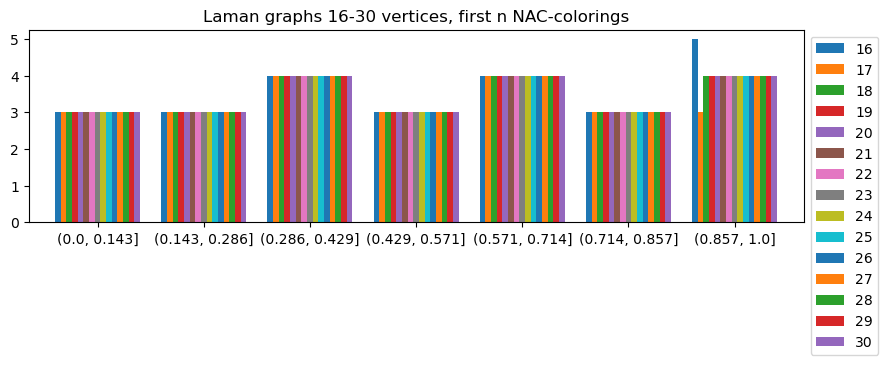

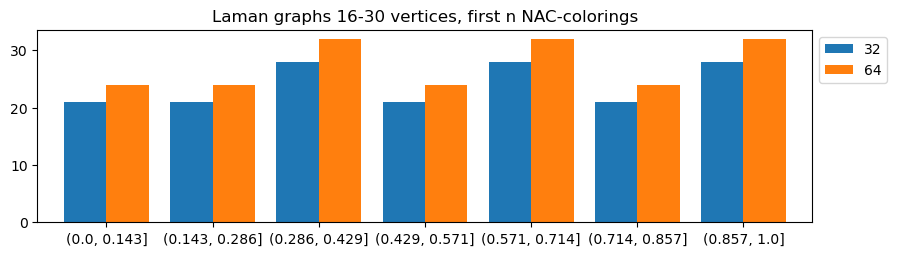

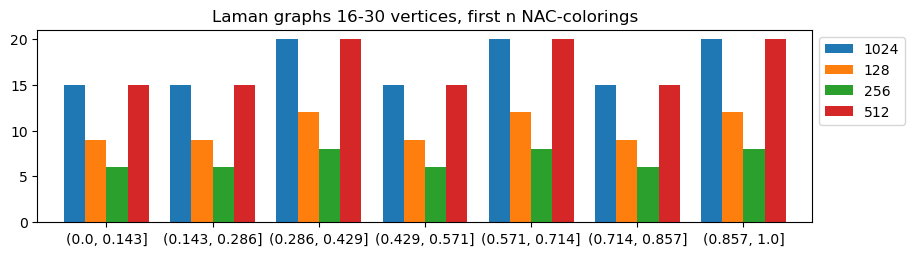

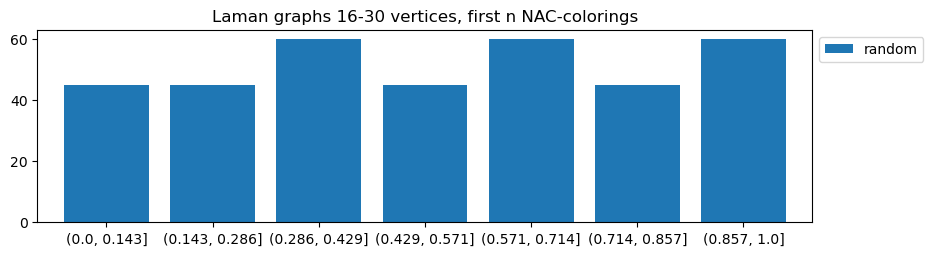

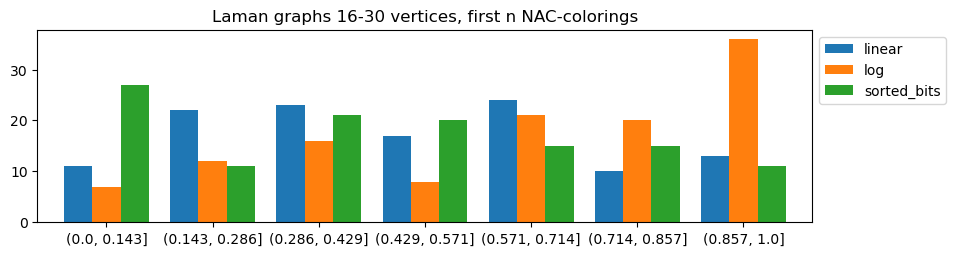

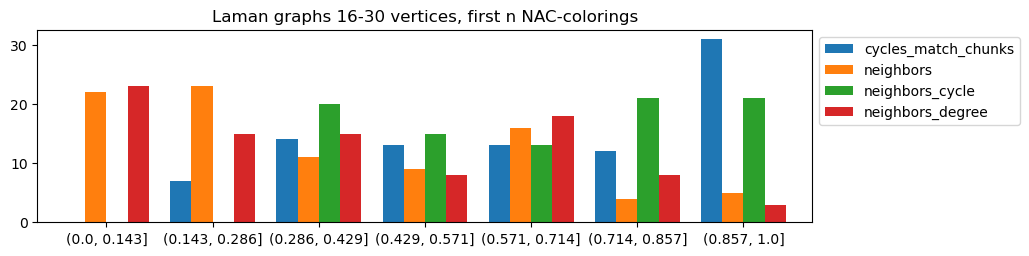

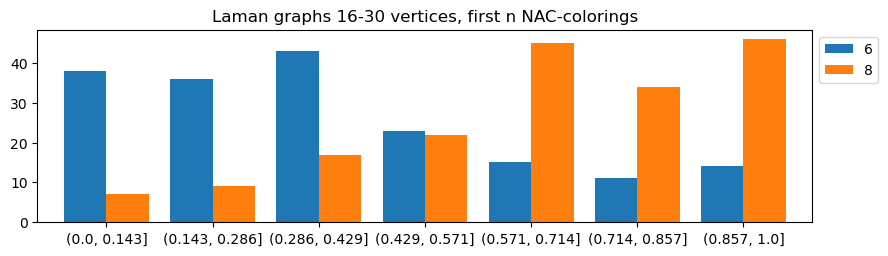

In [12]:
input = """
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         4.3212 (1.97)      4.3745 (1.81)      4.3418 (1.90)     0.0286 (inf)       4.3297 (1.92)      0.0399 (inf)           1;0  0.2303 (0.53)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors_degree-6-smart]                 4.4200 (2.02)      4.4730 (1.85)      4.4511 (1.95)     0.0276 (inf)       4.4603 (1.97)      0.0397 (inf)           1;0  0.2247 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors-6-smart]                     4.3691 (2.00)      4.5488 (1.89)      4.4672 (1.95)     0.0910 (inf)       4.4838 (1.99)      0.1348 (inf)           1;0  0.2239 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors-6-smart]                        4.4320 (2.02)      4.6131 (1.91)      4.5019 (1.97)     0.0974 (inf)       4.4606 (1.97)      0.1358 (inf)           1;0  0.2221 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors_degree-8-smart]         4.5186 (2.06)      4.6603 (1.93)      4.5846 (2.01)     0.0713 (inf)       4.5750 (2.03)      0.1063 (inf)           1;0  0.2181 (0.50)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors-6-smart]                4.6092 (2.11)      4.7081 (1.95)      4.6480 (2.03)     0.0528 (inf)       4.6266 (2.05)      0.0742 (inf)           1;0  0.2151 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors_cycle-6-smart]                  4.6098 (2.11)      4.7851 (1.98)      4.6805 (2.05)     0.0924 (inf)       4.6466 (2.06)      0.1315 (inf)           1;0  0.2137 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors_degree-6-smart]              4.6880 (2.14)      4.6954 (1.95)      4.6908 (2.05)     0.0040 (inf)       4.6891 (2.08)      0.0055 (inf)           1;0  0.2132 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors_degree-8-smart]              4.6629 (2.13)      4.7557 (1.97)      4.6960 (2.05)     0.0518 (inf)       4.6696 (2.07)      0.0696 (inf)           1;0  0.2129 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors_degree-8-smart]                 4.6910 (2.14)      4.8200 (2.00)      4.7383 (2.07)     0.0711 (inf)       4.7040 (2.08)      0.0968 (inf)           1;0  0.2110 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          4.7116 (2.15)      4.7868 (1.98)      4.7398 (2.07)     0.0410 (inf)       4.7210 (2.09)      0.0565 (inf)           1;0  0.2110 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors_cycle-6-smart]               4.7260 (2.16)      4.8272 (2.00)      4.7603 (2.08)     0.0580 (inf)       4.7277 (2.09)      0.0759 (inf)           1;0  0.2101 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors-8-smart]                        4.6024 (2.10)      4.8424 (2.01)      4.7621 (2.08)     0.1383 (inf)       4.8414 (2.14)      0.1800 (inf)           1;0  0.2100 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors-8-smart]                     4.6027 (2.10)      4.9222 (2.04)      4.7952 (2.10)     0.1695 (inf)       4.8606 (2.15)      0.2396 (inf)           1;0  0.2085 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors-8-smart]                4.6972 (2.15)      4.9494 (2.05)      4.8458 (2.12)     0.1320 (inf)       4.8909 (2.17)      0.1891 (inf)           1;0  0.2064 (0.47)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      4.8773 (2.23)      4.9796 (2.06)      4.9298 (2.16)     0.0512 (inf)       4.9324 (2.18)      0.0767 (inf)           1;0  0.2028 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-cycles_match_chunks-6-smart]              4.8279 (2.21)      5.1558 (2.14)      5.0020 (2.19)     0.1649 (inf)       5.0223 (2.22)      0.2459 (inf)           1;0  0.1999 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-neighbors_cycle-8-smart]               4.9296 (2.25)      5.0673 (2.10)      5.0123 (2.19)     0.0729 (inf)       5.0400 (2.23)      0.1033 (inf)           1;0  0.1995 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]           4.9306 (2.25)      5.0649 (2.10)      5.0174 (2.19)     0.0753 (inf)       5.0567 (2.24)      0.1007 (inf)           1;0  0.1993 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          4.9095 (2.24)      5.1475 (2.13)      5.0317 (2.20)     0.1191 (inf)       5.0380 (2.23)      0.1785 (inf)           1;0  0.1987 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-neighbors_cycle-8-smart]                  4.9302 (2.25)      5.1366 (2.13)      5.0383 (2.20)     0.1036 (inf)       5.0481 (2.24)      0.1549 (inf)           1;0  0.1985 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-cycles_match_chunks-8-smart]              4.9155 (2.25)      5.4320 (2.25)      5.1419 (2.25)     0.2641 (inf)       5.0782 (2.25)      0.3874 (inf)           1;0  0.1945 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-linear-cycles_match_chunks-8-smart]           4.9619 (2.27)      5.4371 (2.25)      5.1712 (2.26)     0.2426 (inf)       5.1147 (2.26)      0.3564 (inf)           1;0  0.1934 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]      5.0678 (2.32)      5.2470 (2.18)      5.1785 (2.26)     0.0968 (inf)       5.2205 (2.31)      0.1344 (inf)           1;0  0.1931 (0.44)          3           1

test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         5.2505 (2.40)      5.3245 (2.21)      5.2818 (2.31)     0.0383 (inf)       5.2704 (2.33)      0.0555 (inf)           1;0  0.1893 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors_degree-8-smart]         5.3285 (2.43)      5.4205 (2.25)      5.3604 (2.34)     0.0521 (inf)       5.3322 (2.36)      0.0690 (inf)           1;0  0.1866 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors-6-smart]                        5.3662 (2.45)      5.4814 (2.27)      5.4087 (2.37)     0.0633 (inf)       5.3784 (2.38)      0.0864 (inf)           1;0  0.1849 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors_degree-6-smart]                 5.4474 (2.49)      5.5379 (2.30)      5.4957 (2.40)     0.0456 (inf)       5.5017 (2.44)      0.0679 (inf)           1;0  0.1820 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors-6-smart]                     5.4645 (2.50)      5.5466 (2.30)      5.4961 (2.40)     0.0441 (inf)       5.4774 (2.43)      0.0615 (inf)           1;0  0.1819 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors_degree-8-smart]              5.5580 (2.54)      5.7250 (2.37)      5.6245 (2.46)     0.0886 (inf)       5.5905 (2.48)      0.1253 (inf)           1;0  0.1778 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors_degree-8-smart]                 5.6345 (2.57)      5.6824 (2.36)      5.6522 (2.47)     0.0263 (inf)       5.6396 (2.50)      0.0359 (inf)           1;0  0.1769 (0.40)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors-8-smart]                5.5618 (2.54)      5.7360 (2.38)      5.6607 (2.48)     0.0894 (inf)       5.6842 (2.52)      0.1306 (inf)           1;0  0.1767 (0.40)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors-8-smart]                     5.6465 (2.58)      5.7730 (2.39)      5.7207 (2.50)     0.0660 (inf)       5.7426 (2.54)      0.0948 (inf)           1;0  0.1748 (0.40)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors-8-smart]                        5.6343 (2.57)      5.8569 (2.43)      5.7463 (2.51)     0.1113 (inf)       5.7478 (2.54)      0.1670 (inf)           1;0  0.1740 (0.40)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors_cycle-6-smart]                  5.7435 (2.62)      5.8550 (2.43)      5.7994 (2.54)     0.0558 (inf)       5.7996 (2.57)      0.0836 (inf)           1;0  0.1724 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors-6-smart]                5.7602 (2.63)      5.9633 (2.47)      5.8440 (2.56)     0.1061 (inf)       5.8087 (2.57)      0.1523 (inf)           1;0  0.1711 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          5.8287 (2.66)      5.8595 (2.43)      5.8490 (2.56)     0.0175 (inf)       5.8587 (2.59)      0.0231 (inf)           1;0  0.1710 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors_degree-6-smart]              5.5575 (2.54)      6.0944 (2.53)      5.8738 (2.57)     0.2809 (inf)       5.9693 (2.64)      0.4027 (inf)           1;0  0.1702 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors_cycle-6-smart]               5.8190 (2.66)      5.9252 (2.46)      5.8757 (2.57)     0.0535 (inf)       5.8829 (2.60)      0.0796 (inf)           1;0  0.1702 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      5.8809 (2.69)      6.1391 (2.55)      5.9683 (2.61)     0.1479 (inf)       5.8849 (2.61)      0.1937 (inf)           1;0  0.1676 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-neighbors_cycle-8-smart]               5.9489 (2.72)      6.0352 (2.50)      5.9956 (2.62)     0.0436 (inf)       6.0026 (2.66)      0.0648 (inf)           1;0  0.1668 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-cycles_match_chunks-6-smart]              5.8740 (2.68)      6.1523 (2.55)      5.9982 (2.62)     0.1416 (inf)       5.9682 (2.64)      0.2087 (inf)           1;0  0.1667 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-log-neighbors_cycle-8-smart]                  6.0312 (2.76)      6.0642 (2.51)      6.0505 (2.65)     0.0173 (inf)       6.0563 (2.68)      0.0248 (inf)           1;0  0.1653 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          5.9929 (2.74)      6.1914 (2.57)      6.0730 (2.66)     0.1047 (inf)       6.0346 (2.67)      0.1489 (inf)           1;0  0.1647 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-cycles_match_chunks-8-smart]           6.0632 (2.77)      6.0869 (2.52)      6.0771 (2.66)     0.0124 (inf)       6.0813 (2.69)      0.0178 (inf)           1;0  0.1646 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[16-64-1024-random-subgraphs-log-cycles_match_chunks-8-smart]              6.0317 (2.76)      6.1477 (2.55)      6.0871 (2.66)     0.0582 (inf)       6.0819 (2.69)      0.0870 (inf)           1;0  0.1643 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]      6.0089 (2.75)      6.1572 (2.55)      6.0902 (2.66)     0.0752 (inf)       6.1046 (2.70)      0.1112 (inf)           1;0  0.1642 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[17-64-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]           5.9677 (2.73)      6.2780 (2.60)      6.1138 (2.67)     0.1559 (inf)       6.0958 (2.70)      0.2327 (inf)           1;0  0.1636 (0.37)          3           1

test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         4.7336 (2.16)      4.8051 (1.99)      4.7782 (2.09)     0.0389 (inf)       4.7960 (2.12)      0.0537 (inf)           1;0  0.2093 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors_degree-6-smart]                 4.6714 (2.13)      5.0696 (2.10)      4.8255 (2.11)     0.2138 (inf)       4.7355 (2.10)      0.2986 (inf)           1;0  0.2072 (0.47)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors-6-smart]                        4.8507 (2.22)      5.0316 (2.09)      4.9524 (2.17)     0.0925 (inf)       4.9749 (2.20)      0.1357 (inf)           1;0  0.2019 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors-6-smart]                     4.8838 (2.23)      5.1394 (2.13)      4.9747 (2.18)     0.1428 (inf)       4.9010 (2.17)      0.1917 (inf)           1;0  0.2010 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors_degree-6-smart]              4.8570 (2.22)      5.5791 (2.31)      5.1200 (2.24)     0.3990 (inf)       4.9239 (2.18)      0.5416 (inf)           1;0  0.1953 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors-6-smart]                4.9432 (2.26)      5.3570 (2.22)      5.1478 (2.25)     0.2070 (inf)       5.1433 (2.28)      0.3104 (inf)           1;0  0.1943 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors_cycle-6-smart]                  5.2204 (2.39)      5.3562 (2.22)      5.2697 (2.30)     0.0752 (inf)       5.2326 (2.32)      0.1019 (inf)           1;0  0.1898 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      5.4009 (2.47)      5.5873 (2.32)      5.4903 (2.40)     0.0935 (inf)       5.4826 (2.43)      0.1398 (inf)           1;0  0.1821 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors_cycle-6-smart]               5.4103 (2.47)      5.6407 (2.34)      5.5386 (2.42)     0.1174 (inf)       5.5648 (2.46)      0.1728 (inf)           1;0  0.1806 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          5.5457 (2.53)      5.6181 (2.33)      5.5827 (2.44)     0.0362 (inf)       5.5843 (2.47)      0.0543 (inf)           1;0  0.1791 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]           5.4772 (2.50)      5.7028 (2.36)      5.6001 (2.45)     0.1142 (inf)       5.6203 (2.49)      0.1692 (inf)           1;0  0.1786 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors_degree-8-smart]         5.9255 (2.71)      6.1030 (2.53)      6.0293 (2.64)     0.0925 (inf)       6.0595 (2.68)      0.1331 (inf)           1;0  0.1659 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors-8-smart]                6.0388 (2.76)      6.2628 (2.60)      6.1452 (2.69)     0.1124 (inf)       6.1341 (2.72)      0.1680 (inf)           1;0  0.1627 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors_degree-8-smart]                 6.1051 (2.79)      6.2567 (2.59)      6.1735 (2.70)     0.0769 (inf)       6.1586 (2.73)      0.1137 (inf)           1;0  0.1620 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors-8-smart]                     6.1839 (2.83)      6.2591 (2.59)      6.2150 (2.72)     0.0393 (inf)       6.2019 (2.75)      0.0564 (inf)           1;0  0.1609 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors-8-smart]                        6.0636 (2.77)      6.3950 (2.65)      6.2161 (2.72)     0.1672 (inf)       6.1898 (2.74)      0.2485 (inf)           1;0  0.1609 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors_degree-8-smart]              6.2439 (2.85)      6.3891 (2.65)      6.2957 (2.75)     0.0811 (inf)       6.2541 (2.77)      0.1090 (inf)           1;0  0.1588 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-cycles_match_chunks-6-smart]              5.8583 (2.68)      6.9873 (2.90)      6.3968 (2.80)     0.5663 (inf)       6.3447 (2.81)      0.8468 (inf)           1;0  0.1563 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-neighbors_cycle-8-smart]               6.2993 (2.88)      6.6780 (2.77)      6.4606 (2.83)     0.1955 (inf)       6.4044 (2.84)      0.2841 (inf)           1;0  0.1548 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-neighbors_cycle-8-smart]                  6.3771 (2.91)      6.5846 (2.73)      6.4719 (2.83)     0.1049 (inf)       6.4540 (2.86)      0.1556 (inf)           1;0  0.1545 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          6.4601 (2.95)      6.7126 (2.78)      6.5740 (2.88)     0.1280 (inf)       6.5493 (2.90)      0.1894 (inf)           1;0  0.1521 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]      6.6027 (3.02)      7.0218 (2.91)      6.8372 (2.99)     0.2139 (inf)       6.8869 (3.05)      0.3143 (inf)           1;0  0.1463 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-linear-cycles_match_chunks-8-smart]           6.3444 (2.90)      8.0158 (3.32)      7.0885 (3.10)     0.8506 (inf)       6.9053 (3.06)      1.2535 (inf)           1;0  0.1411 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[18-64-1024-random-subgraphs-log-cycles_match_chunks-8-smart]              6.9718 (3.19)      8.4822 (3.52)      7.6194 (3.33)     0.7779 (inf)       7.4043 (3.28)      1.1328 (inf)           1;0  0.1312 (0.30)          3           1

test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         6.7599 (3.09)      7.0963 (2.94)      6.9484 (3.04)     0.1719 (inf)       6.9892 (3.09)      0.2523 (inf)           1;0  0.1439 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors-6-smart]                        7.1005 (3.24)      7.3813 (3.06)      7.2279 (3.16)     0.1422 (inf)       7.2020 (3.19)      0.2106 (inf)           1;0  0.1384 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors-6-smart]                     7.1161 (3.25)      7.3339 (3.04)      7.2394 (3.17)     0.1117 (inf)       7.2682 (3.22)      0.1634 (inf)           1;0  0.1381 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors-6-smart]                7.2925 (3.33)      7.3197 (3.03)      7.3031 (3.19)     0.0145 (inf)       7.2972 (3.23)      0.0204 (inf)           1;0  0.1369 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors_degree-6-smart]                 7.4173 (3.39)      7.4637 (3.09)      7.4467 (3.26)     0.0256 (inf)       7.4591 (3.30)      0.0349 (inf)           1;0  0.1343 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      7.3489 (3.36)      7.6816 (3.18)      7.5094 (3.28)     0.1666 (inf)       7.4977 (3.32)      0.2495 (inf)           1;0  0.1332 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors_degree-6-smart]              7.5387 (3.44)      7.7554 (3.22)      7.6197 (3.33)     0.1183 (inf)       7.5650 (3.35)      0.1625 (inf)           1;0  0.1312 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-cycles_match_chunks-6-smart]              7.5426 (3.45)      7.7462 (3.21)      7.6643 (3.35)     0.1075 (inf)       7.7042 (3.41)      0.1527 (inf)           1;0  0.1305 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          7.6551 (3.50)      7.7576 (3.22)      7.7102 (3.37)     0.0517 (inf)       7.7178 (3.42)      0.0769 (inf)           1;0  0.1297 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors_cycle-6-smart]               7.6498 (3.49)      7.9461 (3.29)      7.7776 (3.40)     0.1522 (inf)       7.7371 (3.43)      0.2222 (inf)           1;0  0.1286 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]           7.6950 (3.52)      7.9334 (3.29)      7.8004 (3.41)     0.1215 (inf)       7.7729 (3.44)      0.1788 (inf)           1;0  0.1282 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors_cycle-6-smart]                  7.7505 (3.54)      8.0472 (3.34)      7.8647 (3.44)     0.1597 (inf)       7.7964 (3.45)      0.2225 (inf)           1;0  0.1272 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors_degree-8-smart]         8.3332 (3.81)      8.6897 (3.60)      8.5566 (3.74)     0.1946 (inf)       8.6469 (3.83)      0.2673 (inf)           1;0  0.1169 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors-8-smart]                8.8731 (4.05)      8.9346 (3.70)      8.8949 (3.89)     0.0344 (inf)       8.8771 (3.93)      0.0462 (inf)           1;0  0.1124 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors-8-smart]                     8.5688 (3.91)      9.2196 (3.82)      8.9330 (3.91)     0.3323 (inf)       9.0108 (3.99)      0.4881 (inf)           1;0  0.1119 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors_degree-8-smart]              8.8044 (4.02)      9.1560 (3.80)      8.9872 (3.93)     0.1762 (inf)       9.0012 (3.99)      0.2637 (inf)           1;0  0.1113 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors_degree-8-smart]                 8.8606 (4.05)      9.2261 (3.82)      9.0202 (3.94)     0.1871 (inf)       8.9738 (3.97)      0.2741 (inf)           1;0  0.1109 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]      9.0324 (4.13)      9.3150 (3.86)      9.1467 (4.00)     0.1488 (inf)       9.0928 (4.03)      0.2119 (inf)           1;0  0.1093 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors-8-smart]                        8.9894 (4.11)      9.3478 (3.88)      9.2199 (4.03)     0.2001 (inf)       9.3226 (4.13)      0.2688 (inf)           1;0  0.1085 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          9.1307 (4.17)      9.4014 (3.90)      9.2568 (4.05)     0.1363 (inf)       9.2382 (4.09)      0.2030 (inf)           1;0  0.1080 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-cycles_match_chunks-8-smart]           9.2209 (4.21)      9.4762 (3.93)      9.3580 (4.09)     0.1287 (inf)       9.3768 (4.15)      0.1915 (inf)           1;0  0.1069 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-cycles_match_chunks-8-smart]              9.1504 (4.18)      9.5619 (3.96)      9.3793 (4.10)     0.2096 (inf)       9.4256 (4.17)      0.3086 (inf)           1;0  0.1066 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-linear-neighbors_cycle-8-smart]               9.3978 (4.29)      9.6079 (3.98)      9.4817 (4.15)     0.1112 (inf)       9.4396 (4.18)      0.1576 (inf)           1;0  0.1055 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[19-64-1024-random-subgraphs-log-neighbors_cycle-8-smart]                  9.2940 (4.25)      9.7597 (4.05)      9.5098 (4.16)     0.2347 (inf)       9.4759 (4.20)      0.3493 (inf)           1;0  0.1052 (0.24)          3           1

test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         7.8703 (3.60)      8.1801 (3.39)      8.0182 (3.51)     0.1554 (inf)       8.0042 (3.54)      0.2323 (inf)           1;0  0.1247 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors-6-smart]                     7.8640 (3.59)      8.4247 (3.49)      8.1214 (3.55)     0.2831 (inf)       8.0757 (3.58)      0.4205 (inf)           1;0  0.1231 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors-6-smart]                        8.0449 (3.68)      8.5452 (3.54)      8.2467 (3.61)     0.2638 (inf)       8.1500 (3.61)      0.3753 (inf)           1;0  0.1213 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors_degree-6-smart]                 7.8017 (3.56)      8.7699 (3.64)      8.3001 (3.63)     0.4847 (inf)       8.3288 (3.69)      0.7261 (inf)           1;0  0.1205 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors-6-smart]                8.2452 (3.77)      8.6176 (3.57)      8.4027 (3.67)     0.1927 (inf)       8.3451 (3.69)      0.2793 (inf)           1;0  0.1190 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-cycles_match_chunks-6-smart]              8.1910 (3.74)      8.9269 (3.70)      8.4451 (3.69)     0.4174 (inf)       8.2175 (3.64)      0.5519 (inf)           1;0  0.1184 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      8.3745 (3.83)      8.9773 (3.72)      8.7264 (3.82)     0.3138 (inf)       8.8273 (3.91)      0.4521 (inf)           1;0  0.1146 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]           8.3876 (3.83)      9.2819 (3.85)      8.8617 (3.88)     0.4496 (inf)       8.9154 (3.95)      0.6707 (inf)           1;0  0.1128 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors_cycle-6-smart]                  8.6535 (3.95)      9.2216 (3.82)      8.9159 (3.90)     0.2865 (inf)       8.8727 (3.93)      0.4261 (inf)           1;0  0.1122 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          8.6765 (3.96)      9.1515 (3.79)      8.9655 (3.92)     0.2537 (inf)       9.0685 (4.02)      0.3563 (inf)           1;0  0.1115 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors_cycle-6-smart]               8.6507 (3.95)      9.2475 (3.83)      8.9665 (3.92)     0.2999 (inf)       9.0013 (3.99)      0.4475 (inf)           1;0  0.1115 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors_degree-6-smart]              8.4300 (3.85)      9.4285 (3.91)      9.0623 (3.96)     0.5499 (inf)       9.3284 (4.13)      0.7489 (inf)           1;0  0.1103 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors-8-smart]                    10.2006 (4.66)     11.2144 (4.65)     10.6316 (4.65)     0.5237 (inf)      10.4798 (4.64)      0.7604 (inf)           1;0  0.0941 (0.22)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors_degree-8-smart]                10.4052 (4.75)     10.9405 (4.54)     10.7502 (4.70)     0.2993 (inf)      10.9049 (4.83)      0.4015 (inf)           1;0  0.0930 (0.21)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors_degree-8-smart]        10.6528 (4.87)     10.9048 (4.52)     10.8015 (4.72)     0.1320 (inf)      10.8468 (4.80)      0.1890 (inf)           1;0  0.0926 (0.21)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]     10.6767 (4.88)     11.0168 (4.57)     10.8063 (4.73)     0.1839 (inf)      10.7253 (4.75)      0.2551 (inf)           1;0  0.0925 (0.21)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-cycles_match_chunks-8-smart]          10.6680 (4.87)     11.1811 (4.64)     10.8681 (4.75)     0.2746 (inf)      10.7551 (4.76)      0.3848 (inf)           1;0  0.0920 (0.21)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors_degree-8-smart]             10.7486 (4.91)     11.5203 (4.78)     11.1437 (4.87)     0.3861 (inf)      11.1622 (4.94)      0.5787 (inf)           1;0  0.0897 (0.21)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]         11.1573 (5.10)     11.4851 (4.76)     11.3653 (4.97)     0.1808 (inf)      11.4536 (5.07)      0.2458 (inf)           1;0  0.0880 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-sorted_bits-neighbors-8-smart]               11.3081 (5.17)     11.4225 (4.74)     11.3752 (4.97)     0.0597 (inf)      11.3951 (5.05)      0.0858 (inf)           1;0  0.0879 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-cycles_match_chunks-8-smart]             11.3341 (5.18)     11.5559 (4.79)     11.4568 (5.01)     0.1127 (inf)      11.4805 (5.08)      0.1663 (inf)           1;0  0.0873 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-linear-neighbors_cycle-8-smart]              11.2383 (5.13)     11.8053 (4.89)     11.5164 (5.04)     0.2836 (inf)      11.5057 (5.09)      0.4252 (inf)           1;0  0.0868 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors-8-smart]                       11.1173 (5.08)     11.9339 (4.95)     11.5222 (5.04)     0.4083 (inf)      11.5154 (5.10)      0.6124 (inf)           1;0  0.0868 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[20-64-1024-random-subgraphs-log-neighbors_cycle-8-smart]                 11.7392 (5.36)     12.4259 (5.15)     12.0366 (5.26)     0.3524 (inf)      11.9448 (5.29)      0.5150 (inf)           1;0  0.0831 (0.19)          3           1

test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          4.0123 (1.83)      4.3929 (1.82)      4.1641 (1.82)     0.2016 (inf)       4.0872 (1.81)      0.2855 (inf)           1;0  0.2401 (0.55)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors-6-smart]                      4.2441 (1.94)      4.6676 (1.94)      4.4082 (1.93)     0.2273 (inf)       4.3130 (1.91)      0.3177 (inf)           1;0  0.2268 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors-6-smart]                 4.1563 (1.90)      4.7923 (1.99)      4.4370 (1.94)     0.3245 (inf)       4.3625 (1.93)      0.4770 (inf)           1;0  0.2254 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors-6-smart]                         4.4636 (2.04)      4.6464 (1.93)      4.5675 (2.00)     0.0939 (inf)       4.5925 (2.03)      0.1371 (inf)           1;0  0.2189 (0.50)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-cycles_match_chunks-6-smart]               4.7182 (2.16)      5.2138 (2.16)      4.9612 (2.17)     0.2480 (inf)       4.9515 (2.19)      0.3717 (inf)           1;0  0.2016 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors_degree-6-smart]                  4.6576 (2.13)      5.5815 (2.31)      4.9843 (2.18)     0.5180 (inf)       4.7137 (2.09)      0.6929 (inf)           1;0  0.2006 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-cycles_match_chunks-6-smart]            4.9653 (2.27)      5.0833 (2.11)      5.0390 (2.20)     0.0642 (inf)       5.0682 (2.24)      0.0885 (inf)           1;0  0.1985 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       4.9662 (2.27)      5.1962 (2.15)      5.0602 (2.21)     0.1206 (inf)       5.0182 (2.22)      0.1725 (inf)           1;0  0.1976 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors_degree-6-smart]               4.8312 (2.21)      5.2600 (2.18)      5.0657 (2.22)     0.2172 (inf)       5.1058 (2.26)      0.3216 (inf)           1;0  0.1974 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors_cycle-6-smart]                5.0350 (2.30)      5.2538 (2.18)      5.1334 (2.25)     0.1111 (inf)       5.1114 (2.26)      0.1641 (inf)           1;0  0.1948 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors_cycle-6-smart]                   5.1500 (2.35)      5.3243 (2.21)      5.2530 (2.30)     0.0914 (inf)       5.2848 (2.34)      0.1307 (inf)           1;0  0.1904 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           5.0290 (2.30)      5.7062 (2.37)      5.3248 (2.33)     0.3466 (inf)       5.2393 (2.32)      0.5080 (inf)           1;0  0.1878 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors-8-smart]                      5.2304 (2.39)      5.5538 (2.30)      5.3416 (2.34)     0.1838 (inf)       5.2406 (2.32)      0.2425 (inf)           1;0  0.1872 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          5.1787 (2.37)      5.5570 (2.30)      5.4231 (2.37)     0.2120 (inf)       5.5335 (2.45)      0.2837 (inf)           1;0  0.1844 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors-8-smart]                 5.3622 (2.45)      5.5247 (2.29)      5.4243 (2.37)     0.0878 (inf)       5.3860 (2.38)      0.1219 (inf)           1;0  0.1844 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors_degree-8-smart]                  5.3853 (2.46)      5.6193 (2.33)      5.5383 (2.42)     0.1326 (inf)       5.6104 (2.48)      0.1755 (inf)           1;0  0.1806 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors_degree-8-smart]               5.4810 (2.50)      6.2292 (2.58)      5.8930 (2.58)     0.3798 (inf)       5.9687 (2.64)      0.5612 (inf)           1;0  0.1697 (0.39)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-neighbors_cycle-8-smart]                6.1044 (2.79)      6.2921 (2.61)      6.2067 (2.71)     0.0950 (inf)       6.2236 (2.76)      0.1408 (inf)           1;0  0.1611 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       6.3375 (2.90)      6.5004 (2.69)      6.3975 (2.80)     0.0895 (inf)       6.3547 (2.81)      0.1222 (inf)           1;0  0.1563 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors-8-smart]                         6.2832 (2.87)      6.6518 (2.76)      6.4068 (2.80)     0.2122 (inf)       6.2855 (2.78)      0.2765 (inf)           1;0  0.1561 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           6.2687 (2.86)      6.5464 (2.71)      6.4410 (2.82)     0.1504 (inf)       6.5079 (2.88)      0.2082 (inf)           1;0  0.1553 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-linear-cycles_match_chunks-8-smart]            6.3638 (2.91)      6.9013 (2.86)      6.6943 (2.93)     0.2893 (inf)       6.8178 (3.02)      0.4032 (inf)           1;0  0.1494 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-neighbors_cycle-8-smart]                   6.7998 (3.11)      7.2962 (3.02)      7.0227 (3.07)     0.2520 (inf)       6.9720 (3.09)      0.3723 (inf)           1;0  0.1424 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[21-64-512-random-subgraphs-log-cycles_match_chunks-8-smart]               6.6761 (3.05)      7.3629 (3.05)      7.0842 (3.10)     0.3612 (inf)       7.2135 (3.19)      0.5151 (inf)           1;0  0.1412 (0.32)          3           1

test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          3.6970 (1.69)      3.9873 (1.65)      3.7971 (1.66)     0.1648 (inf)       3.7069 (1.64)      0.2177 (inf)           1;0  0.2634 (0.60)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors-6-smart]                         3.9270 (1.79)      4.2324 (1.75)      4.1024 (1.79)     0.1577 (inf)       4.1477 (1.84)      0.2290 (inf)           1;0  0.2438 (0.56)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors-6-smart]                      4.0911 (1.87)      4.2408 (1.76)      4.1488 (1.81)     0.0805 (inf)       4.1145 (1.82)      0.1123 (inf)           1;0  0.2410 (0.55)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors-6-smart]                 4.3373 (1.98)      5.1345 (2.13)      4.6820 (2.05)     0.4094 (inf)       4.5743 (2.03)      0.5979 (inf)           1;0  0.2136 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors_degree-6-smart]               4.6610 (2.13)      4.9474 (2.05)      4.7725 (2.09)     0.1534 (inf)       4.7090 (2.08)      0.2148 (inf)           1;0  0.2095 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors_degree-6-smart]                  4.6667 (2.13)      4.9413 (2.05)      4.7772 (2.09)     0.1449 (inf)       4.7237 (2.09)      0.2060 (inf)           1;0  0.2093 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors_cycle-6-smart]                   5.0033 (2.29)      5.1644 (2.14)      5.0686 (2.22)     0.0847 (inf)       5.0381 (2.23)      0.1208 (inf)           1;0  0.1973 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors_cycle-6-smart]                5.0615 (2.31)      5.2232 (2.17)      5.1374 (2.25)     0.0813 (inf)       5.1276 (2.27)      0.1213 (inf)           1;0  0.1946 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-cycles_match_chunks-6-smart]            5.0392 (2.30)      5.2400 (2.17)      5.1643 (2.26)     0.1092 (inf)       5.2138 (2.31)      0.1506 (inf)           1;0  0.1936 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       4.8936 (2.24)      5.4447 (2.26)      5.1924 (2.27)     0.2785 (inf)       5.2390 (2.32)      0.4134 (inf)           1;0  0.1926 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           5.1928 (2.37)      5.6251 (2.33)      5.3894 (2.36)     0.2188 (inf)       5.3502 (2.37)      0.3242 (inf)           1;0  0.1856 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-cycles_match_chunks-6-smart]               5.0211 (2.29)      6.0269 (2.50)      5.4143 (2.37)     0.5376 (inf)       5.1947 (2.30)      0.7543 (inf)           1;0  0.1847 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          6.3913 (2.92)      6.5921 (2.73)      6.4670 (2.83)     0.1091 (inf)       6.4175 (2.84)      0.1506 (inf)           1;0  0.1546 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors-8-smart]                 6.6169 (3.02)      6.8269 (2.83)      6.6927 (2.93)     0.1166 (inf)       6.6342 (2.94)      0.1575 (inf)           1;0  0.1494 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors-8-smart]                      6.6177 (3.02)      6.9965 (2.90)      6.8370 (2.99)     0.1964 (inf)       6.8970 (3.05)      0.2841 (inf)           1;0  0.1463 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors_degree-8-smart]                  6.8446 (3.13)      7.1532 (2.97)      7.0284 (3.07)     0.1625 (inf)       7.0874 (3.14)      0.2314 (inf)           1;0  0.1423 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors-8-smart]                         7.0976 (3.24)      7.3158 (3.03)      7.2420 (3.17)     0.1251 (inf)       7.3127 (3.24)      0.1636 (inf)           1;0  0.1381 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors_degree-8-smart]               6.8748 (3.14)      7.7568 (3.22)      7.4288 (3.25)     0.4825 (inf)       7.6548 (3.39)      0.6615 (inf)           1;0  0.1346 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           7.4592 (3.41)      7.7455 (3.21)      7.5576 (3.31)     0.1628 (inf)       7.4682 (3.31)      0.2148 (inf)           1;0  0.1323 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-cycles_match_chunks-8-smart]               7.3785 (3.37)      7.7572 (3.22)      7.5667 (3.31)     0.1893 (inf)       7.5643 (3.35)      0.2840 (inf)           1;0  0.1322 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-neighbors_cycle-8-smart]                7.6486 (3.49)      7.9686 (3.30)      7.7571 (3.39)     0.1832 (inf)       7.6541 (3.39)      0.2400 (inf)           1;0  0.1289 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-linear-cycles_match_chunks-8-smart]            7.3276 (3.35)      8.1876 (3.39)      7.7992 (3.41)     0.4360 (inf)       7.8825 (3.49)      0.6450 (inf)           1;0  0.1282 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       7.3558 (3.36)      8.4783 (3.51)      7.9500 (3.48)     0.5641 (inf)       8.0157 (3.55)      0.8418 (inf)           1;0  0.1258 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[22-64-512-random-subgraphs-log-neighbors_cycle-8-smart]                   8.1766 (3.74)      8.3795 (3.47)      8.2577 (3.61)     0.1073 (inf)       8.2171 (3.64)      0.1521 (inf)           1;0  0.1211 (0.28)          3           1

test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          4.6923 (2.14)      5.2744 (2.19)      4.8981 (2.14)     0.3264 (inf)       4.7276 (2.09)      0.4366 (inf)           1;0  0.2042 (0.47)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors-6-smart]                 5.1217 (2.34)      6.0487 (2.51)      5.4323 (2.38)     0.5338 (inf)       5.1266 (2.27)      0.6952 (inf)           1;0  0.1841 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors-6-smart]                      5.3170 (2.43)      5.6960 (2.36)      5.5066 (2.41)     0.1895 (inf)       5.5070 (2.44)      0.2843 (inf)           1;0  0.1816 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors_degree-6-smart]               6.0426 (2.76)      6.3787 (2.64)      6.1842 (2.70)     0.1742 (inf)       6.1314 (2.71)      0.2521 (inf)           1;0  0.1617 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors-6-smart]                         5.8133 (2.66)      6.7856 (2.81)      6.2098 (2.72)     0.5104 (inf)       6.0303 (2.67)      0.7292 (inf)           1;0  0.1610 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-cycles_match_chunks-6-smart]            6.2516 (2.86)      6.3554 (2.63)      6.2963 (2.75)     0.0534 (inf)       6.2819 (2.78)      0.0779 (inf)           1;0  0.1588 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors_degree-6-smart]                  6.1659 (2.82)      6.4434 (2.67)      6.3206 (2.76)     0.1415 (inf)       6.3525 (2.81)      0.2081 (inf)           1;0  0.1582 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       6.5379 (2.99)      6.8706 (2.85)      6.7085 (2.93)     0.1665 (inf)       6.7171 (2.97)      0.2496 (inf)           1;0  0.1491 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          6.4573 (2.95)      7.0335 (2.92)      6.7146 (2.94)     0.2930 (inf)       6.6530 (2.95)      0.4321 (inf)           1;0  0.1489 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors_cycle-6-smart]                6.7451 (3.08)      6.9747 (2.89)      6.8236 (2.98)     0.1309 (inf)       6.7511 (2.99)      0.1722 (inf)           1;0  0.1465 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           6.6593 (3.04)      7.1124 (2.95)      6.9031 (3.02)     0.2285 (inf)       6.9376 (3.07)      0.3398 (inf)           1;0  0.1449 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors-8-smart]                 6.7741 (3.09)      7.2367 (3.00)      7.0087 (3.07)     0.2314 (inf)       7.0152 (3.11)      0.3470 (inf)           1;0  0.1427 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-cycles_match_chunks-6-smart]               7.1055 (3.25)      7.2824 (3.02)      7.1705 (3.14)     0.0973 (inf)       7.1236 (3.15)      0.1327 (inf)           1;0  0.1395 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors-8-smart]                      7.0815 (3.24)      7.5189 (3.12)      7.3054 (3.20)     0.2189 (inf)       7.3158 (3.24)      0.3280 (inf)           1;0  0.1369 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors_cycle-6-smart]                   7.3201 (3.34)      7.6916 (3.19)      7.4801 (3.27)     0.1910 (inf)       7.4287 (3.29)      0.2786 (inf)           1;0  0.1337 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors_degree-8-smart]                  7.5164 (3.43)      8.1015 (3.36)      7.8396 (3.43)     0.2974 (inf)       7.9011 (3.50)      0.4388 (inf)           1;0  0.1276 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors_degree-8-smart]               7.4151 (3.39)      8.4217 (3.49)      7.8438 (3.43)     0.5196 (inf)       7.6946 (3.41)      0.7549 (inf)           1;0  0.1275 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       8.1156 (3.71)      8.2227 (3.41)      8.1643 (3.57)     0.0542 (inf)       8.1545 (3.61)      0.0804 (inf)           1;0  0.1225 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-cycles_match_chunks-8-smart]            8.0683 (3.69)      8.5405 (3.54)      8.3382 (3.65)     0.2433 (inf)       8.4059 (3.72)      0.3542 (inf)           1;0  0.1199 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors-8-smart]                         7.9534 (3.63)      8.8837 (3.68)      8.4372 (3.69)     0.4663 (inf)       8.4744 (3.75)      0.6977 (inf)           1;0  0.1185 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           8.2367 (3.76)      8.8010 (3.65)      8.5190 (3.73)     0.2822 (inf)       8.5195 (3.77)      0.4232 (inf)           1;0  0.1174 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-linear-neighbors_cycle-8-smart]                8.7027 (3.98)      8.8401 (3.66)      8.7577 (3.83)     0.0727 (inf)       8.7302 (3.87)      0.1030 (inf)           1;0  0.1142 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-cycles_match_chunks-8-smart]               8.8532 (4.04)      9.2779 (3.85)      9.0328 (3.95)     0.2198 (inf)       8.9673 (3.97)      0.3185 (inf)           1;0  0.1107 (0.25)          3           1
test_bench_NAC_colorings_laman_large_first_n[23-64-512-random-subgraphs-log-neighbors_cycle-8-smart]                   9.4965 (4.34)      9.7502 (4.04)      9.5981 (4.20)     0.1342 (inf)       9.5476 (4.23)      0.1903 (inf)           1;0  0.1042 (0.24)          3           1

test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          2.1888 (1.0)       2.4121 (1.0)       2.2865 (1.0)      0.1142 (inf)       2.2586 (1.0)       0.1674 (inf)           1;0  0.4373 (1.0)           3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors-6-smart]                 2.5506 (1.17)      2.7525 (1.14)      2.6708 (1.17)     0.1063 (inf)       2.7093 (1.20)      0.1514 (inf)           1;0  0.3744 (0.86)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          2.6948 (1.23)      2.9781 (1.23)      2.8094 (1.23)     0.1492 (inf)       2.7552 (1.22)      0.2125 (inf)           1;0  0.3559 (0.81)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors-6-smart]                         2.5689 (1.17)      3.1870 (1.32)      2.8912 (1.26)     0.3099 (inf)       2.9178 (1.29)      0.4636 (inf)           1;0  0.3459 (0.79)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-cycles_match_chunks-6-smart]            2.8339 (1.29)      3.0835 (1.28)      2.9362 (1.28)     0.1307 (inf)       2.8912 (1.28)      0.1872 (inf)           1;0  0.3406 (0.78)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors-8-smart]                      2.6946 (1.23)      3.2427 (1.34)      2.9785 (1.30)     0.2746 (inf)       2.9981 (1.33)      0.4111 (inf)           1;0  0.3357 (0.77)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors-6-smart]                      2.3616 (1.08)      4.4121 (1.83)      3.1469 (1.38)     1.1063 (inf)       2.6671 (1.18)      1.5379 (inf)           1;0  0.3178 (0.73)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors-8-smart]                 3.0999 (1.42)      3.2990 (1.37)      3.1731 (1.39)     0.1095 (inf)       3.1204 (1.38)      0.1494 (inf)           1;0  0.3152 (0.72)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors_degree-6-smart]                  2.7266 (1.25)      3.7408 (1.55)      3.2646 (1.43)     0.5099 (inf)       3.3265 (1.47)      0.7606 (inf)           1;0  0.3063 (0.70)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           3.1135 (1.42)      3.4047 (1.41)      3.2684 (1.43)     0.1465 (inf)       3.2870 (1.46)      0.2184 (inf)           1;0  0.3060 (0.70)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors_cycle-6-smart]                3.1366 (1.43)      3.3587 (1.39)      3.2703 (1.43)     0.1178 (inf)       3.3156 (1.47)      0.1665 (inf)           1;0  0.3058 (0.70)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors-8-smart]                         3.1873 (1.46)      3.7461 (1.55)      3.4965 (1.53)     0.2841 (inf)       3.5562 (1.57)      0.4191 (inf)           1;0  0.2860 (0.65)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       3.1264 (1.43)      3.9704 (1.65)      3.5435 (1.55)     0.4221 (inf)       3.5337 (1.56)      0.6330 (inf)           1;0  0.2822 (0.65)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors_cycle-6-smart]                   3.4584 (1.58)      3.7879 (1.57)      3.5875 (1.57)     0.1760 (inf)       3.5161 (1.56)      0.2471 (inf)           1;0  0.2787 (0.64)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-cycles_match_chunks-8-smart]            3.3886 (1.55)      4.0072 (1.66)      3.6075 (1.58)     0.3467 (inf)       3.4267 (1.52)      0.4639 (inf)           1;0  0.2772 (0.63)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors_cycle-8-smart]                3.5038 (1.60)      3.8110 (1.58)      3.6357 (1.59)     0.1582 (inf)       3.5923 (1.59)      0.2304 (inf)           1;0  0.2750 (0.63)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-cycles_match_chunks-6-smart]               3.2796 (1.50)      3.9403 (1.63)      3.6410 (1.59)     0.3347 (inf)       3.7031 (1.64)      0.4955 (inf)           1;0  0.2747 (0.63)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           3.7635 (1.72)      3.9986 (1.66)      3.8443 (1.68)     0.1337 (inf)       3.7709 (1.67)      0.1764 (inf)           1;0  0.2601 (0.59)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors_degree-8-smart]               2.9283 (1.34)      4.6814 (1.94)      3.8827 (1.70)     0.8869 (inf)       4.0385 (1.79)      1.3148 (inf)           1;0  0.2576 (0.59)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors_cycle-8-smart]                   3.8570 (1.76)      4.1573 (1.72)      4.0194 (1.76)     0.1516 (inf)       4.0438 (1.79)      0.2252 (inf)           1;0  0.2488 (0.57)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       3.6914 (1.69)      4.3516 (1.80)      4.0940 (1.79)     0.3532 (inf)       4.2391 (1.88)      0.4951 (inf)           1;0  0.2443 (0.56)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-neighbors_degree-8-smart]                  3.2879 (1.50)      5.0898 (2.11)      4.4670 (1.95)     1.0217 (inf)       5.0232 (2.22)      1.3515 (inf)           1;0  0.2239 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-log-cycles_match_chunks-8-smart]               3.8054 (1.74)      5.5318 (2.29)      4.4903 (1.96)     0.9168 (inf)       4.1336 (1.83)      1.2948 (inf)           1;0  0.2227 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[24-32-512-random-subgraphs-linear-neighbors_degree-6-smart]               2.9934 (1.37)      6.2764 (2.60)      4.5568 (1.99)     1.6471 (inf)       4.4004 (1.95)      2.4623 (inf)           1;0  0.2195 (0.50)          3           1

test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          2.7169 (1.24)      3.0671 (1.27)      2.8555 (1.25)     0.1861 (inf)       2.7827 (1.23)      0.2626 (inf)           1;0  0.3502 (0.80)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors-8-smart]                      2.7862 (1.27)      3.1213 (1.29)      2.9047 (1.27)     0.1879 (inf)       2.8066 (1.24)      0.2514 (inf)           1;0  0.3443 (0.79)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          2.7837 (1.27)      3.0310 (1.26)      2.9370 (1.28)     0.1339 (inf)       2.9963 (1.33)      0.1855 (inf)           1;0  0.3405 (0.78)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors-8-smart]                 3.1073 (1.42)      3.2611 (1.35)      3.1782 (1.39)     0.0776 (inf)       3.1661 (1.40)      0.1154 (inf)           1;0  0.3146 (0.72)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors-6-smart]                 3.1831 (1.45)      3.3813 (1.40)      3.2937 (1.44)     0.1011 (inf)       3.3166 (1.47)      0.1487 (inf)           1;0  0.3036 (0.69)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors-6-smart]                      3.2569 (1.49)      3.3248 (1.38)      3.2978 (1.44)     0.0360 (inf)       3.3116 (1.47)      0.0509 (inf)           1;0  0.3032 (0.69)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors_degree-8-smart]               3.3830 (1.55)      3.5611 (1.48)      3.4770 (1.52)     0.0895 (inf)       3.4870 (1.54)      0.1336 (inf)           1;0  0.2876 (0.66)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors-8-smart]                         3.4516 (1.58)      3.8175 (1.58)      3.6642 (1.60)     0.1900 (inf)       3.7235 (1.65)      0.2744 (inf)           1;0  0.2729 (0.62)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors_degree-6-smart]               3.7124 (1.70)      4.0385 (1.67)      3.8710 (1.69)     0.1632 (inf)       3.8622 (1.71)      0.2446 (inf)           1;0  0.2583 (0.59)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors-6-smart]                         3.7359 (1.71)      3.9984 (1.66)      3.8736 (1.69)     0.1317 (inf)       3.8864 (1.72)      0.1969 (inf)           1;0  0.2582 (0.59)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors_cycle-8-smart]                3.8418 (1.76)      4.1263 (1.71)      3.9866 (1.74)     0.1423 (inf)       3.9918 (1.77)      0.2133 (inf)           1;0  0.2508 (0.57)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       3.8922 (1.78)      4.0650 (1.69)      3.9882 (1.74)     0.0880 (inf)       4.0073 (1.77)      0.1296 (inf)           1;0  0.2507 (0.57)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-cycles_match_chunks-6-smart]            3.9873 (1.82)      4.1586 (1.72)      4.0983 (1.79)     0.0963 (inf)       4.1489 (1.84)      0.1285 (inf)           1;0  0.2440 (0.56)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-cycles_match_chunks-8-smart]            4.0698 (1.86)      4.2301 (1.75)      4.1595 (1.82)     0.0819 (inf)       4.1787 (1.85)      0.1203 (inf)           1;0  0.2404 (0.55)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           4.1318 (1.89)      4.2756 (1.77)      4.2051 (1.84)     0.0719 (inf)       4.2079 (1.86)      0.1078 (inf)           1;0  0.2378 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           4.1549 (1.90)      4.2786 (1.77)      4.2254 (1.85)     0.0636 (inf)       4.2426 (1.88)      0.0928 (inf)           1;0  0.2367 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors_degree-6-smart]                  3.9189 (1.79)      4.4693 (1.85)      4.2430 (1.86)     0.2880 (inf)       4.3410 (1.92)      0.4128 (inf)           1;0  0.2357 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors_degree-8-smart]                  4.0798 (1.86)      4.3648 (1.81)      4.2635 (1.86)     0.1594 (inf)       4.3460 (1.92)      0.2138 (inf)           1;0  0.2345 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       4.2409 (1.94)      4.3572 (1.81)      4.2885 (1.88)     0.0610 (inf)       4.2672 (1.89)      0.0872 (inf)           1;0  0.2332 (0.53)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-linear-neighbors_cycle-6-smart]                4.1981 (1.92)      4.4090 (1.83)      4.3029 (1.88)     0.1054 (inf)       4.3016 (1.90)      0.1581 (inf)           1;0  0.2324 (0.53)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors_cycle-8-smart]                   4.4937 (2.05)      4.7266 (1.96)      4.6358 (2.03)     0.1247 (inf)       4.6872 (2.08)      0.1747 (inf)           1;0  0.2157 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-neighbors_cycle-6-smart]                   4.5234 (2.07)      5.3513 (2.22)      4.9402 (2.16)     0.4140 (inf)       4.9457 (2.19)      0.6209 (inf)           1;0  0.2024 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-cycles_match_chunks-6-smart]               4.9773 (2.27)      5.0757 (2.10)      5.0388 (2.20)     0.0536 (inf)       5.0635 (2.24)      0.0738 (inf)           1;0  0.1985 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[25-32-512-random-subgraphs-log-cycles_match_chunks-8-smart]               5.4553 (2.49)      6.4990 (2.69)      6.0218 (2.63)     0.5276 (inf)       6.1112 (2.71)      0.7828 (inf)           1;0  0.1661 (0.38)          3           1

test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          2.5827 (1.18)      2.7280 (1.13)      2.6507 (1.16)     0.0731 (inf)       2.6414 (1.17)      0.1089 (inf)           1;0  0.3773 (0.86)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors-6-smart]                      2.5948 (1.19)      2.8132 (1.17)      2.7316 (1.19)     0.1193 (inf)       2.7869 (1.23)      0.1638 (inf)           1;0  0.3661 (0.84)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors_degree-6-smart]               3.0010 (1.37)      3.0680 (1.27)      3.0408 (1.33)     0.0352 (inf)       3.0534 (1.35)      0.0502 (inf)           1;0  0.3289 (0.75)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors-6-smart]                 2.8815 (1.32)      3.3236 (1.38)      3.0789 (1.35)     0.2248 (inf)       3.0317 (1.34)      0.3315 (inf)           1;0  0.3248 (0.74)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors-8-smart]                      3.0568 (1.40)      3.4794 (1.44)      3.3043 (1.45)     0.2204 (inf)       3.3766 (1.49)      0.3169 (inf)           1;0  0.3026 (0.69)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-cycles_match_chunks-6-smart]            3.2333 (1.48)      3.6925 (1.53)      3.5238 (1.54)     0.2527 (inf)       3.6458 (1.61)      0.3444 (inf)           1;0  0.2838 (0.65)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors-8-smart]                         3.1794 (1.45)      3.7889 (1.57)      3.5437 (1.55)     0.3217 (inf)       3.6627 (1.62)      0.4571 (inf)           1;0  0.2822 (0.65)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors_degree-6-smart]                  3.5185 (1.61)      3.6162 (1.50)      3.5814 (1.57)     0.0546 (inf)       3.6095 (1.60)      0.0733 (inf)           1;0  0.2792 (0.64)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors_cycle-6-smart]                3.6039 (1.65)      3.8037 (1.58)      3.7190 (1.63)     0.1033 (inf)       3.7493 (1.66)      0.1499 (inf)           1;0  0.2689 (0.61)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           3.6242 (1.66)      4.0313 (1.67)      3.8327 (1.68)     0.2037 (inf)       3.8425 (1.70)      0.3053 (inf)           1;0  0.2609 (0.60)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors_degree-8-smart]               3.8240 (1.75)      3.9803 (1.65)      3.9021 (1.71)     0.0781 (inf)       3.9020 (1.73)      0.1172 (inf)           1;0  0.2563 (0.59)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       3.7857 (1.73)      4.0940 (1.70)      3.9390 (1.72)     0.1541 (inf)       3.9374 (1.74)      0.2312 (inf)           1;0  0.2539 (0.58)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-cycles_match_chunks-8-smart]            3.8731 (1.77)      4.1569 (1.72)      4.0296 (1.76)     0.1441 (inf)       4.0587 (1.80)      0.2128 (inf)           1;0  0.2482 (0.57)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors_degree-8-smart]                  3.8879 (1.78)      4.1532 (1.72)      4.0580 (1.77)     0.1477 (inf)       4.1330 (1.83)      0.1990 (inf)           1;0  0.2464 (0.56)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-linear-neighbors_cycle-8-smart]                3.9398 (1.80)      4.5237 (1.88)      4.1580 (1.82)     0.3187 (inf)       4.0105 (1.78)      0.4379 (inf)           1;0  0.2405 (0.55)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors-6-smart]                         3.8400 (1.75)      4.7425 (1.97)      4.2296 (1.85)     0.4637 (inf)       4.1061 (1.82)      0.6768 (inf)           1;0  0.2364 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors-8-smart]                 4.0201 (1.84)      4.5987 (1.91)      4.3683 (1.91)     0.3068 (inf)       4.4861 (1.99)      0.4340 (inf)           1;0  0.2289 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors_cycle-8-smart]                   4.1497 (1.90)      4.6129 (1.91)      4.4037 (1.93)     0.2348 (inf)       4.4484 (1.97)      0.3474 (inf)           1;0  0.2271 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          3.4384 (1.57)      5.3731 (2.23)      4.4537 (1.95)     0.9709 (inf)       4.5496 (2.01)      1.4510 (inf)           1;0  0.2245 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-neighbors_cycle-6-smart]                   4.5741 (2.09)      5.1937 (2.15)      4.8037 (2.10)     0.3395 (inf)       4.6432 (2.06)      0.4647 (inf)           1;0  0.2082 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           4.6877 (2.14)      5.1136 (2.12)      4.9518 (2.17)     0.2306 (inf)       5.0542 (2.24)      0.3194 (inf)           1;0  0.2019 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-cycles_match_chunks-8-smart]               5.0026 (2.29)      5.5977 (2.32)      5.3304 (2.33)     0.3021 (inf)       5.3908 (2.39)      0.4464 (inf)           1;0  0.1876 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       5.1888 (2.37)      5.5662 (2.31)      5.3790 (2.35)     0.1887 (inf)       5.3820 (2.38)      0.2830 (inf)           1;0  0.1859 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[26-32-256-random-subgraphs-log-cycles_match_chunks-6-smart]              13.2198 (6.04)     13.8326 (5.73)     13.4786 (5.89)     0.3173 (inf)      13.3833 (5.93)      0.4596 (inf)           1;0  0.0742 (0.17)          3           1

test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          2.7889 (1.27)      3.0205 (1.25)      2.8978 (1.27)     0.1164 (inf)       2.8841 (1.28)      0.1737 (inf)           1;0  0.3451 (0.79)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors-6-smart]                 3.3397 (1.53)      3.5263 (1.46)      3.4182 (1.49)     0.0967 (inf)       3.3886 (1.50)      0.1399 (inf)           1;0  0.2926 (0.67)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          3.3156 (1.51)      3.6087 (1.50)      3.4401 (1.50)     0.1514 (inf)       3.3959 (1.50)      0.2198 (inf)           1;0  0.2907 (0.66)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors_degree-6-smart]               3.3202 (1.52)      4.1091 (1.70)      3.6026 (1.58)     0.4397 (inf)       3.3783 (1.50)      0.5917 (inf)           1;0  0.2776 (0.63)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors-8-smart]                      3.6178 (1.65)      3.7789 (1.57)      3.7049 (1.62)     0.0814 (inf)       3.7179 (1.65)      0.1209 (inf)           1;0  0.2699 (0.62)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors-6-smart]                      3.5017 (1.60)      3.9551 (1.64)      3.7297 (1.63)     0.2267 (inf)       3.7325 (1.65)      0.3400 (inf)           1;0  0.2681 (0.61)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors_degree-8-smart]               3.9108 (1.79)      4.2278 (1.75)      4.0905 (1.79)     0.1627 (inf)       4.1329 (1.83)      0.2377 (inf)           1;0  0.2445 (0.56)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors-8-smart]                         4.2211 (1.93)      4.4620 (1.85)      4.3034 (1.88)     0.1374 (inf)       4.2270 (1.87)      0.1806 (inf)           1;0  0.2324 (0.53)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors-8-smart]                 4.1754 (1.91)      4.4193 (1.83)      4.3165 (1.89)     0.1263 (inf)       4.3548 (1.93)      0.1829 (inf)           1;0  0.2317 (0.53)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-cycles_match_chunks-6-smart]            4.2045 (1.92)      4.5668 (1.89)      4.3891 (1.92)     0.1812 (inf)       4.3961 (1.95)      0.2717 (inf)           1;0  0.2278 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           4.3539 (1.99)      4.4747 (1.86)      4.4015 (1.93)     0.0643 (inf)       4.3760 (1.94)      0.0906 (inf)           1;0  0.2272 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       4.1745 (1.91)      4.6975 (1.95)      4.4024 (1.93)     0.2679 (inf)       4.3352 (1.92)      0.3923 (inf)           1;0  0.2271 (0.52)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       4.6530 (2.13)      4.6959 (1.95)      4.6745 (2.04)     0.0214 (inf)       4.6745 (2.07)      0.0321 (inf)           1;0  0.2139 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors_cycle-6-smart]                4.6589 (2.13)      4.9568 (2.05)      4.7680 (2.09)     0.1641 (inf)       4.6883 (2.08)      0.2234 (inf)           1;0  0.2097 (0.48)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors_degree-8-smart]                  4.6968 (2.15)      5.5064 (2.28)      5.0451 (2.21)     0.4165 (inf)       4.9320 (2.18)      0.6072 (inf)           1;0  0.1982 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-neighbors_cycle-8-smart]                4.8419 (2.21)      5.3314 (2.21)      5.0654 (2.22)     0.2475 (inf)       5.0229 (2.22)      0.3671 (inf)           1;0  0.1974 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors_degree-6-smart]                  4.9017 (2.24)      5.3528 (2.22)      5.1190 (2.24)     0.2260 (inf)       5.1024 (2.26)      0.3383 (inf)           1;0  0.1954 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors_cycle-8-smart]                   4.8346 (2.21)      5.3585 (2.22)      5.1709 (2.26)     0.2919 (inf)       5.3196 (2.36)      0.3929 (inf)           1;0  0.1934 (0.44)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-linear-cycles_match_chunks-8-smart]            5.3031 (2.42)      5.4919 (2.28)      5.3678 (2.35)     0.1074 (inf)       5.3085 (2.35)      0.1416 (inf)           1;0  0.1863 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           5.3492 (2.44)      5.4247 (2.25)      5.3983 (2.36)     0.0425 (inf)       5.4209 (2.40)      0.0566 (inf)           1;0  0.1852 (0.42)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-cycles_match_chunks-8-smart]               7.2461 (3.31)      7.5829 (3.14)      7.3833 (3.23)     0.1768 (inf)       7.3210 (3.24)      0.2526 (inf)           1;0  0.1354 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors-6-smart]                         6.0003 (2.74)     11.7249 (4.86)      8.6524 (3.78)     2.8853 (inf)       8.2320 (3.64)      4.2934 (inf)           1;0  0.1156 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-neighbors_cycle-6-smart]                   8.0437 (3.67)     11.0777 (4.59)      9.4541 (4.13)     1.5282 (inf)       9.2407 (4.09)      2.2755 (inf)           1;0  0.1058 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[27-32-256-random-subgraphs-log-cycles_match_chunks-6-smart]              15.0803 (6.89)     22.1168 (9.17)     18.5986 (8.13)     4.9756 (inf)      18.5986 (8.23)      7.0365 (inf)           0;0  0.0538 (0.12)          2           1

test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors-6-smart]                 4.0607 (1.86)      4.3875 (1.82)      4.1844 (1.83)     0.1772 (inf)       4.1051 (1.82)      0.2451 (inf)           1;0  0.2390 (0.55)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          4.1486 (1.90)      4.3284 (1.79)      4.2415 (1.86)     0.0901 (inf)       4.2477 (1.88)      0.1349 (inf)           1;0  0.2358 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors-8-smart]                      4.5101 (2.06)      4.8118 (1.99)      4.6563 (2.04)     0.1511 (inf)       4.6471 (2.06)      0.2263 (inf)           1;0  0.2148 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors-6-smart]                      4.6340 (2.12)      4.7412 (1.97)      4.6866 (2.05)     0.0536 (inf)       4.6847 (2.07)      0.0804 (inf)           1;0  0.2134 (0.49)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors_degree-6-smart]               4.9138 (2.24)      5.0813 (2.11)      4.9707 (2.17)     0.0959 (inf)       4.9168 (2.18)      0.1256 (inf)           1;0  0.2012 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          4.9289 (2.25)      5.0121 (2.08)      4.9718 (2.17)     0.0417 (inf)       4.9744 (2.20)      0.0624 (inf)           1;0  0.2011 (0.46)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors_degree-8-smart]               5.5684 (2.54)      5.7124 (2.37)      5.6203 (2.46)     0.0800 (inf)       5.5802 (2.47)      0.1080 (inf)           1;0  0.1779 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors-8-smart]                         5.1449 (2.35)      6.0847 (2.52)      5.7066 (2.50)     0.4961 (inf)       5.8903 (2.61)      0.7049 (inf)           1;0  0.1752 (0.40)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       5.9894 (2.74)      6.0263 (2.50)      6.0060 (2.63)     0.0187 (inf)       6.0023 (2.66)      0.0277 (inf)           1;0  0.1665 (0.38)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           6.1160 (2.79)      6.2259 (2.58)      6.1553 (2.69)     0.0613 (inf)       6.1240 (2.71)      0.0824 (inf)           1;0  0.1625 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-cycles_match_chunks-6-smart]            6.0908 (2.78)      6.3127 (2.62)      6.2346 (2.73)     0.1247 (inf)       6.3003 (2.79)      0.1664 (inf)           1;0  0.1604 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors_degree-8-smart]                  6.2134 (2.84)      6.4036 (2.65)      6.2805 (2.75)     0.1068 (inf)       6.2245 (2.76)      0.1427 (inf)           1;0  0.1592 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors-8-smart]                 5.9536 (2.72)      6.6140 (2.74)      6.3380 (2.77)     0.3433 (inf)       6.4464 (2.85)      0.4953 (inf)           1;0  0.1578 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-cycles_match_chunks-8-smart]            6.3233 (2.89)      7.0308 (2.91)      6.6087 (2.89)     0.3731 (inf)       6.4720 (2.87)      0.5306 (inf)           1;0  0.1513 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors_cycle-6-smart]                6.5790 (3.01)      6.7673 (2.81)      6.6759 (2.92)     0.0942 (inf)       6.6815 (2.96)      0.1412 (inf)           1;0  0.1498 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-linear-neighbors_cycle-8-smart]                6.5902 (3.01)      7.0707 (2.93)      6.8082 (2.98)     0.2433 (inf)       6.7638 (2.99)      0.3604 (inf)           1;0  0.1469 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       6.5111 (2.97)      8.3486 (3.46)      7.6105 (3.33)     0.9706 (inf)       7.9718 (3.53)      1.3781 (inf)           1;0  0.1314 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors_cycle-8-smart]                   7.5106 (3.43)      7.7909 (3.23)      7.6202 (3.33)     0.1498 (inf)       7.5591 (3.35)      0.2102 (inf)           1;0  0.1312 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors_degree-6-smart]                  6.8780 (3.14)      8.3192 (3.45)      7.7479 (3.39)     0.7656 (inf)       8.0466 (3.56)      1.0809 (inf)           1;0  0.1291 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           7.9912 (3.65)      8.5416 (3.54)      8.2906 (3.63)     0.2784 (inf)       8.3388 (3.69)      0.4128 (inf)           1;0  0.1206 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-cycles_match_chunks-8-smart]               7.7331 (3.53)      9.6836 (4.01)      8.5461 (3.74)     1.0149 (inf)       8.2217 (3.64)      1.4629 (inf)           1;0  0.1170 (0.27)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors-6-smart]                        11.4309 (5.22)     12.8786 (5.34)     12.1785 (5.33)     0.7250 (inf)      12.2259 (5.41)      1.0858 (inf)           1;0  0.0821 (0.19)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-neighbors_cycle-6-smart]                  13.4370 (6.14)     13.8563 (5.74)     13.7046 (5.99)     0.2324 (inf)      13.8204 (6.12)      0.3145 (inf)           1;0  0.0730 (0.17)          3           1
test_bench_NAC_colorings_laman_large_first_n[28-32-128-random-subgraphs-log-cycles_match_chunks-6-smart]              27.5095 (12.57)    27.5095 (11.40)    27.5095 (12.03)    0.0000 (1.0)      27.5095 (12.18)     0.0000 (1.0)           0;0  0.0364 (0.08)          1           1

test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          4.1607 (1.90)      4.4859 (1.86)      4.2723 (1.87)     0.1850 (inf)       4.1704 (1.85)      0.2439 (inf)           1;0  0.2341 (0.54)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors-6-smart]                 4.4402 (2.03)      4.5947 (1.90)      4.5040 (1.97)     0.0807 (inf)       4.4770 (1.98)      0.1159 (inf)           1;0  0.2220 (0.51)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          4.7388 (2.17)      5.6492 (2.34)      5.0768 (2.22)     0.4984 (inf)       4.8425 (2.14)      0.6828 (inf)           1;0  0.1970 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors_degree-6-smart]               4.9027 (2.24)      5.2653 (2.18)      5.1312 (2.24)     0.1989 (inf)       5.2255 (2.31)      0.2720 (inf)           1;0  0.1949 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors-6-smart]                      5.3616 (2.45)      5.9478 (2.47)      5.6226 (2.46)     0.2983 (inf)       5.5583 (2.46)      0.4397 (inf)           1;0  0.1779 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors-8-smart]                         5.9491 (2.72)      6.2700 (2.60)      6.1236 (2.68)     0.1623 (inf)       6.1517 (2.72)      0.2407 (inf)           1;0  0.1633 (0.37)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       6.1407 (2.81)      6.6943 (2.78)      6.3274 (2.77)     0.3178 (inf)       6.1471 (2.72)      0.4152 (inf)           1;0  0.1580 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           6.3556 (2.90)      6.5067 (2.70)      6.4264 (2.81)     0.0760 (inf)       6.4169 (2.84)      0.1133 (inf)           1;0  0.1556 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-cycles_match_chunks-6-smart]            6.2017 (2.83)      6.7735 (2.81)      6.4433 (2.82)     0.2960 (inf)       6.3546 (2.81)      0.4289 (inf)           1;0  0.1552 (0.35)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors_cycle-6-smart]                6.7913 (3.10)      7.1100 (2.95)      6.9139 (3.02)     0.1716 (inf)       6.8403 (3.03)      0.2390 (inf)           1;0  0.1446 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors_degree-8-smart]               6.4073 (2.93)      7.1962 (2.98)      6.9284 (3.03)     0.4514 (inf)       7.1818 (3.18)      0.5917 (inf)           1;0  0.1443 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors_cycle-8-smart]                7.1468 (3.27)      7.6124 (3.16)      7.3406 (3.21)     0.2424 (inf)       7.2628 (3.22)      0.3493 (inf)           1;0  0.1362 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors-8-smart]                 6.9749 (3.19)      7.8329 (3.25)      7.5006 (3.28)     0.4605 (inf)       7.6939 (3.41)      0.6435 (inf)           1;0  0.1333 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors_degree-8-smart]                  7.3307 (3.35)      8.0826 (3.35)      7.6895 (3.36)     0.3771 (inf)       7.6553 (3.39)      0.5639 (inf)           1;0  0.1300 (0.30)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors_cycle-8-smart]                   7.3683 (3.37)      8.2588 (3.42)      7.8060 (3.41)     0.4454 (inf)       7.7909 (3.45)      0.6679 (inf)           1;0  0.1281 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-cycles_match_chunks-8-smart]            7.4426 (3.40)      8.4589 (3.51)      7.8736 (3.44)     0.5255 (inf)       7.7193 (3.42)      0.7623 (inf)           1;0  0.1270 (0.29)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       7.5543 (3.45)      8.8610 (3.67)      8.0345 (3.51)     0.7189 (inf)       7.6880 (3.40)      0.9800 (inf)           1;0  0.1245 (0.28)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           9.0850 (4.15)      9.6578 (4.00)      9.4547 (4.13)     0.3207 (inf)       9.6212 (4.26)      0.4296 (inf)           1;0  0.1058 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors_degree-6-smart]                  7.4989 (3.43)     11.2448 (4.66)      9.6937 (4.24)     1.9542 (inf)      10.3374 (4.58)      2.8095 (inf)           1;0  0.1032 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-cycles_match_chunks-8-smart]               8.6594 (3.96)     12.0793 (5.01)      9.8328 (4.30)     1.9462 (inf)       8.7597 (3.88)      2.5649 (inf)           1;0  0.1017 (0.23)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors-6-smart]                        10.5598 (4.82)     12.6353 (5.24)     11.5147 (5.04)     1.0477 (inf)      11.3489 (5.02)      1.5567 (inf)           1;0  0.0868 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-neighbors_cycle-6-smart]                  10.0228 (4.58)     13.5138 (5.60)     11.5604 (5.06)     1.7823 (inf)      11.1446 (4.93)      2.6183 (inf)           1;0  0.0865 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-linear-neighbors-8-smart]                      5.0707 (2.32)     21.5860 (8.95)     12.0999 (5.29)     8.5274 (inf)       9.6430 (4.27)     12.3865 (inf)           1;0  0.0826 (0.19)          3           1
test_bench_NAC_colorings_laman_large_first_n[29-32-128-random-subgraphs-log-cycles_match_chunks-6-smart]               8.9506 (4.09)     19.4922 (8.08)     12.6898 (5.55)     5.9008 (inf)       9.6265 (4.26)      7.9062 (inf)           1;0  0.0788 (0.18)          3           1

test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          4.6992 (2.15)      4.9616 (2.06)      4.8203 (2.11)     0.1323 (inf)       4.8002 (2.13)      0.1968 (inf)           1;0  0.2075 (0.47)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors-6-smart]                 4.9519 (2.26)      5.2518 (2.18)      5.0609 (2.21)     0.1659 (inf)       4.9790 (2.20)      0.2249 (inf)           1;0  0.1976 (0.45)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors-6-smart]                      5.0866 (2.32)      5.6379 (2.34)      5.3027 (2.32)     0.2943 (inf)       5.1837 (2.30)      0.4135 (inf)           1;0  0.1886 (0.43)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors_degree-6-smart]               5.3958 (2.47)      5.7459 (2.38)      5.5575 (2.43)     0.1766 (inf)       5.5308 (2.45)      0.2626 (inf)           1;0  0.1799 (0.41)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors-8-smart]                      5.9645 (2.73)      6.7430 (2.80)      6.3464 (2.78)     0.3894 (inf)       6.3315 (2.80)      0.5839 (inf)           1;0  0.1576 (0.36)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-cycles_match_chunks-6-smart]            6.6794 (3.05)      6.9099 (2.86)      6.7912 (2.97)     0.1154 (inf)       6.7845 (3.00)      0.1728 (inf)           1;0  0.1472 (0.34)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          6.4317 (2.94)      7.4384 (3.08)      6.8277 (2.99)     0.5366 (inf)       6.6130 (2.93)      0.7550 (inf)           1;0  0.1465 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       6.8586 (3.13)      7.0039 (2.90)      6.9534 (3.04)     0.0821 (inf)       6.9976 (3.10)      0.1090 (inf)           1;0  0.1438 (0.33)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           6.9898 (3.19)      7.2823 (3.02)      7.1061 (3.11)     0.1552 (inf)       7.0462 (3.12)      0.2193 (inf)           1;0  0.1407 (0.32)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors_cycle-6-smart]                7.3141 (3.34)      7.7304 (3.20)      7.4712 (3.27)     0.2262 (inf)       7.3691 (3.26)      0.3122 (inf)           1;0  0.1338 (0.31)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors_cycle-8-smart]                8.1816 (3.74)      9.1135 (3.78)      8.6459 (3.78)     0.4660 (inf)       8.6425 (3.83)      0.6989 (inf)           1;0  0.1157 (0.26)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-neighbors_degree-8-smart]               9.0004 (4.11)      9.6693 (4.01)      9.3328 (4.08)     0.3344 (inf)       9.3287 (4.13)      0.5016 (inf)           1;0  0.1071 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       9.2405 (4.22)     10.3371 (4.29)      9.6413 (4.22)     0.6049 (inf)       9.3462 (4.14)      0.8225 (inf)           1;0  0.1037 (0.24)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors-6-smart]                         9.7052 (4.43)     10.4716 (4.34)     10.0007 (4.37)     0.4122 (inf)       9.8254 (4.35)      0.5747 (inf)           1;0  0.1000 (0.23)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-linear-cycles_match_chunks-8-smart]            9.9688 (4.55)     10.0827 (4.18)     10.0418 (4.39)     0.0634 (inf)      10.0740 (4.46)      0.0854 (inf)           1;0  0.0996 (0.23)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors-8-smart]                         8.7151 (3.98)     11.1936 (4.64)     10.2356 (4.48)     1.3315 (inf)      10.7980 (4.78)      1.8589 (inf)           1;0  0.0977 (0.22)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors-8-smart]                10.5831 (4.84)     11.5642 (4.79)     11.1544 (4.88)     0.5101 (inf)      11.3158 (5.01)      0.7358 (inf)           1;0  0.0897 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-cycles_match_chunks-6-smart]               9.4171 (4.30)     15.3331 (6.36)     11.5264 (5.04)     3.3031 (inf)       9.8290 (4.35)      4.4370 (inf)           1;0  0.0868 (0.20)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors_degree-6-smart]                  8.9868 (4.11)     16.1644 (6.70)     12.2860 (5.37)     3.6237 (inf)      11.7068 (5.18)      5.3832 (inf)           1;0  0.0814 (0.19)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors_cycle-6-smart]                  11.7338 (5.36)     13.7611 (5.71)     12.5245 (5.48)     1.0847 (inf)      12.0787 (5.35)      1.5205 (inf)           1;0  0.0798 (0.18)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          12.8822 (5.89)     13.6619 (5.66)     13.3580 (5.84)     0.4174 (inf)      13.5300 (5.99)      0.5848 (inf)           1;0  0.0749 (0.17)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors_cycle-8-smart]                  13.2249 (6.04)     14.1014 (5.85)     13.5389 (5.92)     0.4882 (inf)      13.2905 (5.88)      0.6574 (inf)           1;0  0.0739 (0.17)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-neighbors_degree-8-smart]                 12.0085 (5.49)     14.5508 (6.03)     13.6321 (5.96)     1.4101 (inf)      14.3368 (6.35)      1.9067 (inf)           1;0  0.0734 (0.17)          3           1
test_bench_NAC_colorings_laman_large_first_n[30-32-128-random-subgraphs-log-cycles_match_chunks-8-smart]              13.3908 (6.12)     14.2561 (5.91)     13.9007 (6.08)     0.4529 (inf)      14.0552 (6.22)      0.6490 (inf)           1;0  0.0719 (0.16)          3           1
"""
plot_all(input, "Laman graphs 16-30 vertices, first n NAC-colorings")

### General

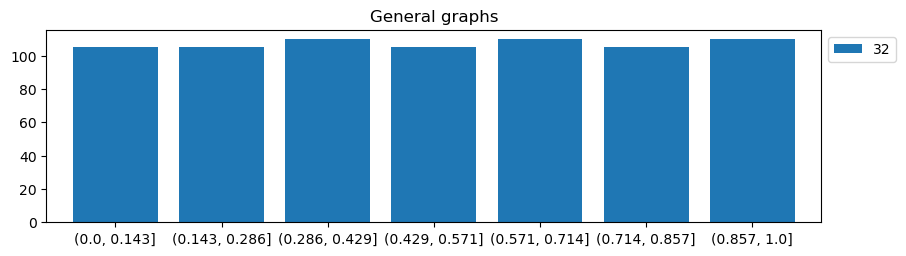

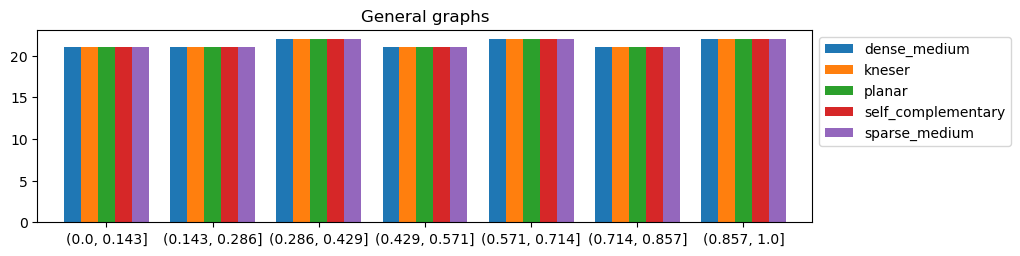

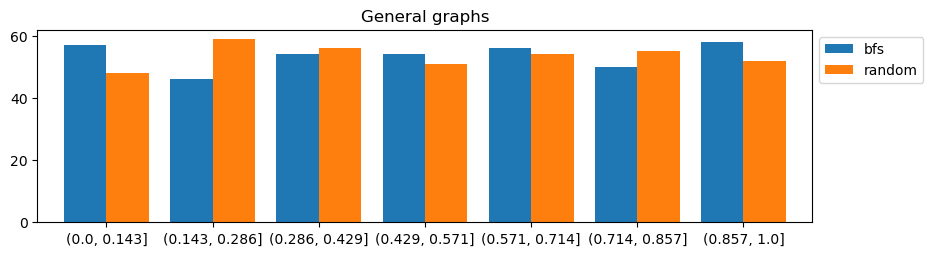

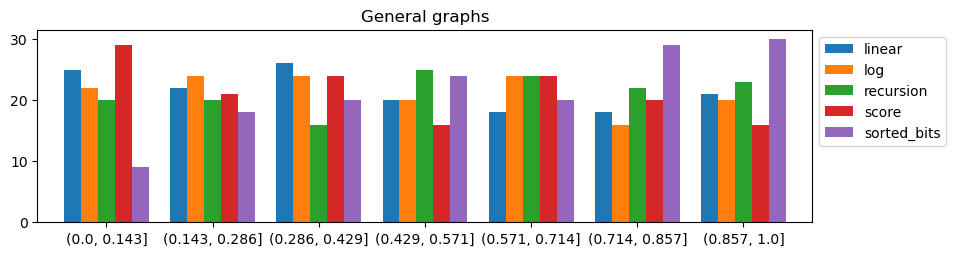

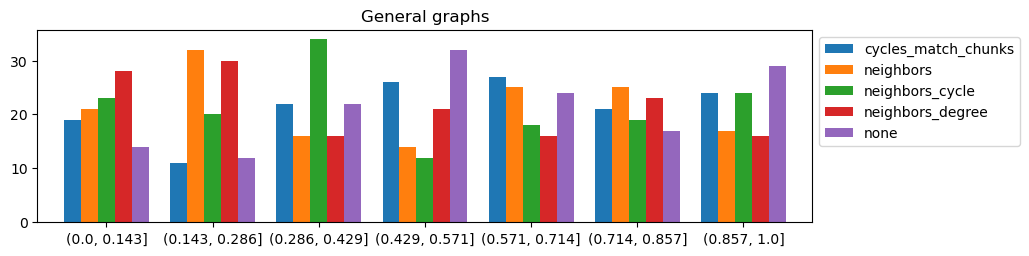

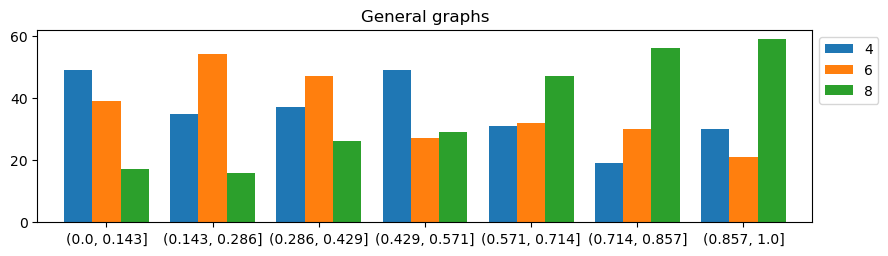

In [13]:
input = """
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-none-8-smart]                                             208.1012 (1.03)       213.9884 (1.0)        211.5660 (1.0)        3.0789 (11.57)      212.6083 (1.04)       4.4154 (12.16)         1;0  4.7267 (1.0)           3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-none-8-smart]                                          209.8848 (1.04)       215.9978 (1.01)       212.2040 (1.00)       3.3126 (12.44)      210.7293 (1.03)       4.5848 (12.62)         1;0  4.7124 (1.00)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-none-6-smart]                                          209.0773 (1.03)       218.9228 (1.02)       212.8602 (1.01)       5.3039 (19.92)      210.5805 (1.03)       7.3841 (20.33)         1;0  4.6979 (0.99)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-none-8-smart]                                     212.3356 (1.05)       216.3518 (1.01)       214.5868 (1.01)       2.0518 (7.71)       215.0730 (1.05)       3.0122 (8.29)          1;0  4.6601 (0.99)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-none-8-smart]                                           212.5644 (1.05)       217.8217 (1.02)       214.9882 (1.02)       2.6525 (9.96)       214.5785 (1.05)       3.9430 (10.86)         1;0  4.6514 (0.98)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-cycles_match_chunks-6-smart]                           216.4300 (1.07)       221.2402 (1.03)       219.3513 (1.04)       2.5659 (9.64)       220.3838 (1.08)       3.6077 (9.93)          1;0  4.5589 (0.96)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                   218.1756 (1.08)       224.4471 (1.05)       221.2683 (1.05)       3.1366 (11.78)      221.1822 (1.08)       4.7036 (12.95)         1;0  4.5194 (0.96)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-cycles_match_chunks-4-smart]                        216.3260 (1.07)       224.1397 (1.05)       221.5092 (1.05)       4.4889 (16.86)      224.0617 (1.10)       5.8603 (16.13)         1;0  4.5145 (0.96)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-cycles_match_chunks-4-smart]                         216.9095 (1.07)       226.2776 (1.06)       221.9153 (1.05)       4.7171 (17.72)      222.5589 (1.09)       7.0261 (19.34)         1;0  4.5062 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-cycles_match_chunks-6-smart]                         218.6536 (1.08)       229.0956 (1.07)       222.3032 (1.05)       5.8878 (22.12)      219.1605 (1.07)       7.8315 (21.56)         1;0  4.4984 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                      219.9133 (1.09)       225.6229 (1.05)       222.4812 (1.05)       2.8978 (10.89)      221.9075 (1.08)       4.2823 (11.79)         1;0  4.4948 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                      220.3841 (1.09)       226.4668 (1.06)       222.5617 (1.05)       3.3894 (12.73)      220.8341 (1.08)       4.5620 (12.56)         1;0  4.4931 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-cycles_match_chunks-6-smart]                        221.2078 (1.09)       226.7600 (1.06)       223.2214 (1.06)       3.0743 (11.55)      221.6963 (1.08)       4.1642 (11.46)         1;0  4.4799 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                   217.9790 (1.08)       230.8067 (1.08)       223.5029 (1.06)       6.5965 (24.78)      221.7230 (1.08)       9.6207 (26.49)         1;0  4.4742 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-cycles_match_chunks-6-smart]                            217.6891 (1.07)       228.4371 (1.07)       223.7568 (1.06)       5.5067 (20.69)      225.1442 (1.10)       8.0610 (22.19)         1;0  4.4691 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-cycles_match_chunks-4-smart]                           220.1688 (1.09)       231.6392 (1.08)       224.4394 (1.06)       6.2712 (23.56)      221.5103 (1.08)       8.6028 (23.68)         1;0  4.4555 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_degree-8-smart]                              222.9938 (1.10)       228.8531 (1.07)       225.0005 (1.06)       3.3374 (12.54)      223.1547 (1.09)       4.3945 (12.10)         1;0  4.4444 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_degree-4-smart]                              222.3302 (1.10)       228.7487 (1.07)       225.0772 (1.06)       3.3076 (12.43)      224.1526 (1.10)       4.8139 (13.25)         1;0  4.4429 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-cycles_match_chunks-8-smart]                              224.0232 (1.11)       226.1849 (1.06)       225.3380 (1.07)       1.1543 (4.34)       225.8059 (1.10)       1.6212 (4.46)          1;0  4.4378 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                           220.1475 (1.09)       231.2591 (1.08)       225.3405 (1.07)       5.5913 (21.00)      224.6148 (1.10)       8.3337 (22.94)         1;0  4.4377 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-cycles_match_chunks-4-smart]                            219.3107 (1.08)       231.5071 (1.08)       225.3745 (1.07)       6.0985 (22.91)      225.3055 (1.10)       9.1473 (25.18)         1;0  4.4371 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-cycles_match_chunks-4-smart]                              219.3270 (1.08)       232.5790 (1.09)       225.5948 (1.07)       6.6550 (25.00)      224.8785 (1.10)       9.9390 (27.36)         1;0  4.4327 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                           222.6291 (1.10)       228.5339 (1.07)       225.8508 (1.07)       2.9891 (11.23)      226.3895 (1.11)       4.4286 (12.19)         1;0  4.4277 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_degree-6-smart]                               225.7117 (1.11)       227.2069 (1.06)       226.6559 (1.07)       0.8215 (3.09)       227.0492 (1.11)       1.1214 (3.09)          1;0  4.4120 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                         224.9049 (1.11)       232.0526 (1.08)       227.4789 (1.08)       3.9713 (14.92)      225.4792 (1.10)       5.3608 (14.76)         1;0  4.3960 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors-4-smart]                             224.0639 (1.11)       230.4668 (1.08)       227.6919 (1.08)       3.2856 (12.34)      228.5448 (1.12)       4.8022 (13.22)         1;0  4.3919 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors-4-smart]                                  225.4364 (1.11)       233.2574 (1.09)       228.2195 (1.08)       4.3709 (16.42)      225.9648 (1.10)       5.8657 (16.15)         1;0  4.3817 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                      225.8896 (1.12)       230.9725 (1.08)       228.3416 (1.08)       2.5461 (9.56)       228.1629 (1.12)       3.8121 (10.50)         1;0  4.3794 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors-6-smart]                                      226.4660 (1.12)       232.8417 (1.09)       228.6571 (1.08)       3.6253 (13.62)      226.6636 (1.11)       4.7818 (13.16)         1;0  4.3734 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_degree-8-smart]                              224.0382 (1.11)       233.9356 (1.09)       228.9452 (1.08)       4.9492 (18.59)      228.8616 (1.12)       7.4230 (20.44)         1;0  4.3679 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors-4-smart]                                     225.0468 (1.11)       235.5952 (1.10)       229.4289 (1.08)       5.4959 (20.65)      227.6447 (1.11)       7.9113 (21.78)         1;0  4.3586 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_degree-6-smart]                                 227.2569 (1.12)       231.1812 (1.08)       229.6125 (1.09)       2.0771 (7.80)       230.3993 (1.13)       2.9433 (8.10)          1;0  4.3552 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors-4-smart]                                   226.8655 (1.12)       234.4139 (1.10)       229.6344 (1.09)       4.1565 (15.61)      227.6238 (1.11)       5.6613 (15.59)         1;0  4.3547 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_degree-4-smart]                      226.9952 (1.12)       234.3876 (1.10)       230.3753 (1.09)       3.7366 (14.04)      229.7430 (1.12)       5.5443 (15.26)         1;0  4.3407 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_degree-4-smart]                            226.2409 (1.12)       236.8286 (1.11)       231.2308 (1.09)       5.3200 (19.99)      230.6228 (1.13)       7.9408 (21.86)         1;0  4.3247 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_degree-8-smart]                            226.0585 (1.12)       237.1257 (1.11)       231.3136 (1.09)       5.5546 (20.87)      230.7566 (1.13)       8.3004 (22.85)         1;0  4.3231 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_cycle-6-smart]                            226.4893 (1.12)       238.4818 (1.11)       231.7934 (1.10)       6.1149 (22.97)      230.4091 (1.13)       8.9944 (24.76)         1;0  4.3142 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_degree-4-smart]                           228.0782 (1.13)       235.4804 (1.10)       232.4244 (1.10)       3.8660 (14.52)      233.7145 (1.14)       5.5516 (15.28)         1;0  4.3025 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_degree-8-smart]                           228.9956 (1.13)       240.1557 (1.12)       232.9686 (1.10)       6.2358 (23.43)      229.7543 (1.12)       8.3701 (23.04)         1;0  4.2924 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_cycle-6-smart]                             232.7055 (1.15)       237.5432 (1.11)       234.5500 (1.11)       2.6154 (9.83)       233.4014 (1.14)       3.6283 (9.99)          1;0  4.2635 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                          231.7297 (1.14)       236.9638 (1.11)       234.9949 (1.11)       2.8477 (10.70)      236.2913 (1.15)       3.9256 (10.81)         1;0  4.2554 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_cycle-8-smart]                             232.3274 (1.15)       239.7542 (1.12)       235.0582 (1.11)       4.0848 (15.35)      233.0931 (1.14)       5.5701 (15.34)         1;0  4.2543 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                       230.9045 (1.14)       240.0588 (1.12)       235.5124 (1.11)       4.5774 (17.20)      235.5739 (1.15)       6.8657 (18.90)         1;0  4.2461 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_cycle-8-smart]                                  229.5687 (1.13)       246.4135 (1.15)       236.2889 (1.12)       8.9235 (33.52)      232.8846 (1.14)      12.6336 (34.78)         1;0  4.2321 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_cycle-6-smart]                               229.5993 (1.13)       240.4555 (1.12)       236.4243 (1.12)       5.9429 (22.33)      239.2181 (1.17)       8.1422 (22.42)         1;0  4.2297 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_cycle-8-smart]                               234.5716 (1.16)       238.3229 (1.11)       236.4358 (1.12)       1.8757 (7.05)       236.4129 (1.16)       2.8134 (7.75)          1;0  4.2295 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                       232.6083 (1.15)       242.2653 (1.13)       236.5058 (1.12)       5.0907 (19.12)      234.6437 (1.15)       7.2428 (19.94)         1;0  4.2282 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_cycle-6-smart]                               232.2815 (1.15)       240.8437 (1.13)       236.5435 (1.12)       4.2812 (16.08)      236.5054 (1.16)       6.4217 (17.68)         1;0  4.2276 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                          232.7875 (1.15)       240.5184 (1.12)       236.6947 (1.12)       3.8661 (14.52)      236.7784 (1.16)       5.7982 (15.96)         1;0  4.2249 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                          230.0351 (1.14)       241.8681 (1.13)       236.7074 (1.12)       6.0596 (22.76)      238.2189 (1.16)       8.8747 (24.43)         1;0  4.2246 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_cycle-8-smart]                               233.5933 (1.15)       243.0475 (1.14)       236.8516 (1.12)       5.3682 (20.17)      233.9140 (1.14)       7.0907 (19.52)         1;0  4.2221 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_cycle-8-smart]                                232.6905 (1.15)       245.9215 (1.15)       237.2072 (1.12)       7.5485 (28.36)      233.0095 (1.14)       9.9232 (27.32)         1;0  4.2157 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_cycle-4-smart]                               231.2281 (1.14)       241.0579 (1.13)       237.7048 (1.12)       5.6102 (21.08)      240.8284 (1.18)       7.3724 (20.30)         1;0  4.2069 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_cycle-8-smart]                            236.7199 (1.17)       240.9717 (1.13)       238.2676 (1.13)       2.3500 (8.83)       237.1112 (1.16)       3.1889 (8.78)          1;0  4.1970 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_cycle-6-smart]                                237.7780 (1.17)       239.4536 (1.12)       238.3405 (1.13)       0.9640 (3.62)       237.7899 (1.16)       1.2567 (3.46)          1;0  4.1957 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-none-6-smart]                                          204.1827 (1.01)       308.1743 (1.44)       238.9924 (1.13)      59.9136 (225.07)     204.6203 (1.0)       77.9937 (214.72)        1;0  4.1842 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_cycle-4-smart]                                  234.5271 (1.16)       246.5283 (1.15)       240.3786 (1.14)       6.0062 (22.56)      240.0803 (1.17)       9.0009 (24.78)         1;0  4.1601 (0.88)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_cycle-6-smart]                                  233.6316 (1.15)       251.4964 (1.18)       241.4786 (1.14)       9.1281 (34.29)      239.3078 (1.17)      13.3986 (36.89)         1;0  4.1412 (0.88)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-none-6-smart]                                  205.6265 (1.02)       313.4370 (1.46)       241.8476 (1.14)      61.9997 (232.91)     206.4794 (1.01)      80.8579 (222.61)        1;0  4.1348 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-none-8-smart]                                  204.1497 (1.01)       309.9313 (1.45)       242.3550 (1.15)      58.6892 (220.47)     212.9840 (1.04)      79.3362 (218.42)        1;0  4.1262 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-none-4-smart]                                        206.1877 (1.02)       313.1435 (1.46)       242.3552 (1.15)      61.3093 (230.32)     207.7345 (1.02)      80.2168 (220.84)        1;0  4.1262 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-none-8-smart]                                          205.2838 (1.01)       313.8061 (1.47)       242.3724 (1.15)      61.8786 (232.45)     208.0272 (1.02)      81.3917 (224.08)        1;0  4.1259 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-none-8-smart]                                        207.0580 (1.02)       311.8430 (1.46)       243.0427 (1.15)      59.6038 (223.91)     210.2272 (1.03)      78.5888 (216.36)        1;0  4.1145 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-none-8-smart]                                       205.3612 (1.01)       313.8770 (1.47)       244.1112 (1.15)      60.5426 (227.44)     213.0954 (1.04)      81.3869 (224.07)        1;0  4.0965 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-none-4-smart]                                     206.1287 (1.02)       317.9885 (1.49)       244.2996 (1.15)      63.8302 (239.79)     208.7816 (1.02)      83.8948 (230.97)        1;0  4.0933 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-none-4-smart]                                             209.6590 (1.03)       313.6823 (1.47)       244.3741 (1.16)      60.0228 (225.48)     209.7808 (1.03)      78.0175 (214.79)        1;0  4.0921 (0.87)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-none-6-smart]                                           206.1847 (1.02)       317.9850 (1.49)       244.6725 (1.16)      63.5169 (238.61)     209.8477 (1.03)      83.8502 (230.85)        1;0  4.0871 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-none-4-smart]                                  204.6709 (1.01)       313.6831 (1.47)       244.7887 (1.16)      59.9331 (225.15)     216.0122 (1.06)      81.7592 (225.09)        1;0  4.0852 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-none-4-smart]                                    206.9351 (1.02)       318.5069 (1.49)       245.2409 (1.16)      63.4722 (238.44)     210.2809 (1.03)      83.6789 (230.38)        1;0  4.0776 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-none-6-smart]                                        202.5748 (1.0)        325.5716 (1.52)       245.5805 (1.16)      69.3397 (260.48)     208.5950 (1.02)      92.2476 (253.97)        1;0  4.0720 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-none-4-smart]                                           205.9570 (1.02)       311.4971 (1.46)       245.7466 (1.16)      57.3599 (215.48)     219.7856 (1.07)      79.1550 (217.92)        1;0  4.0692 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-none-6-smart]                                             209.4007 (1.03)       312.3441 (1.46)       245.9778 (1.16)      57.5750 (216.29)     216.1886 (1.06)      77.2075 (212.56)        1;0  4.0654 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-none-6-smart]                                     207.4526 (1.02)       316.5654 (1.48)       246.0413 (1.16)      61.1662 (229.78)     214.1060 (1.05)      81.8346 (225.30)        1;0  4.0644 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-none-4-smart]                                          210.9396 (1.04)       314.6318 (1.47)       246.8649 (1.17)      58.7233 (220.60)     215.0235 (1.05)      77.7691 (214.11)        1;0  4.0508 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-none-4-smart]                                          210.9058 (1.04)       309.2461 (1.45)       247.1601 (1.17)      54.0201 (202.93)     221.3282 (1.08)      73.7552 (203.05)        1;0  4.0460 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-none-6-smart]                                       212.5127 (1.05)       315.6407 (1.48)       247.1985 (1.17)      59.2745 (222.67)     213.4421 (1.04)      77.3460 (212.94)        1;0  4.0453 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-none-8-smart]                                    213.8207 (1.06)       314.3657 (1.47)       247.4018 (1.17)      57.9926 (217.86)     214.0189 (1.05)      75.4088 (207.61)        1;0  4.0420 (0.86)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-none-8-smart]                                       210.2052 (1.04)       319.2175 (1.49)       247.4709 (1.17)      62.1500 (233.47)     212.9899 (1.04)      81.7592 (225.09)        1;0  4.0409 (0.85)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-none-6-smart]                                    210.3487 (1.04)       321.3090 (1.50)       247.8649 (1.17)      63.6094 (238.96)     211.9371 (1.04)      83.2202 (229.11)        1;0  4.0345 (0.85)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-none-6-smart]                                       209.6180 (1.03)       319.2920 (1.49)       248.3190 (1.17)      61.5485 (231.21)     216.0469 (1.06)      82.2555 (226.46)        1;0  4.0271 (0.85)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-none-4-smart]                                       209.5754 (1.03)       322.8701 (1.51)       249.2084 (1.18)      63.8544 (239.88)     215.1797 (1.05)      84.9710 (233.93)        1;0  4.0127 (0.85)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-none-4-smart]                                       213.7064 (1.05)       317.8295 (1.49)       249.3024 (1.18)      59.3611 (223.00)     216.3714 (1.06)      78.0923 (214.99)        1;0  4.0112 (0.85)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]                        217.2632 (1.07)       330.0233 (1.54)       256.6480 (1.21)      63.6020 (238.93)     222.6576 (1.09)      84.5701 (232.83)        1;0  3.8964 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-cycles_match_chunks-4-smart]                     218.9400 (1.08)       326.2592 (1.52)       256.7516 (1.21)      60.2729 (226.42)     225.0557 (1.10)      80.4894 (221.59)        1;0  3.8948 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-cycles_match_chunks-8-smart]                        217.4804 (1.07)       332.6847 (1.55)       256.9686 (1.21)      65.5923 (246.41)     220.7406 (1.08)      86.4032 (237.88)        1;0  3.8915 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-cycles_match_chunks-6-smart]                     218.8163 (1.08)       333.3121 (1.56)       257.1150 (1.22)      65.9889 (247.90)     219.2167 (1.07)      85.8718 (236.41)        1;0  3.8893 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors-8-smart]                             224.3896 (1.11)       321.4589 (1.50)       257.7331 (1.22)      55.2080 (207.40)     227.3509 (1.11)      72.8020 (200.43)        1;0  3.8800 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-cycles_match_chunks-8-smart]                     218.1522 (1.08)       332.9187 (1.56)       258.1402 (1.22)      64.8122 (243.48)     223.3498 (1.09)      86.0749 (236.97)        1;0  3.8739 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]                        219.6450 (1.08)       324.6958 (1.52)       258.3407 (1.22)      57.7296 (216.87)     230.6812 (1.13)      78.7882 (216.91)        1;0  3.8709 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]                        219.6685 (1.08)       332.3280 (1.55)       258.7384 (1.22)      63.7711 (239.56)     224.2186 (1.10)      84.4947 (232.62)        1;0  3.8649 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors-8-smart]                                  226.7832 (1.12)       323.2175 (1.51)       259.2696 (1.23)      55.3829 (208.05)     227.8081 (1.11)      72.3257 (199.12)        1;0  3.8570 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                           218.6288 (1.08)       338.5838 (1.58)       259.5287 (1.23)      68.4775 (257.24)     221.3735 (1.08)      89.9663 (247.68)        1;0  3.8531 (0.82)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors-6-smart]                                  220.9264 (1.09)       333.1936 (1.56)       260.5382 (1.23)      63.0071 (236.69)     227.4945 (1.11)      84.2004 (231.81)        1;0  3.8382 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-cycles_match_chunks-6-smart]                              214.1594 (1.06)       344.1045 (1.61)       260.8501 (1.23)      72.2780 (271.52)     224.2863 (1.10)      97.4588 (268.31)        1;0  3.8336 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors-8-smart]                                     226.4967 (1.12)       329.0856 (1.54)       261.0352 (1.23)      58.9356 (221.40)     227.5234 (1.11)      76.9417 (211.83)        1;0  3.8309 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-cycles_match_chunks-8-smart]                         223.9149 (1.11)       334.8803 (1.56)       261.1053 (1.23)      63.8918 (240.02)     224.5205 (1.10)      83.2241 (229.12)        1;0  3.8299 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                   219.8450 (1.09)       333.6904 (1.56)       261.1235 (1.23)      63.0430 (236.83)     229.8350 (1.12)      85.3841 (235.07)        1;0  3.8296 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors-4-smart]                                     222.4980 (1.10)       335.7539 (1.57)       261.2215 (1.23)      64.5634 (242.54)     225.4127 (1.10)      84.9419 (233.85)        1;0  3.8282 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-cycles_match_chunks-8-smart]                            219.2971 (1.08)       341.3949 (1.60)       261.4335 (1.24)      69.2821 (260.27)     223.6086 (1.09)      91.5734 (252.11)        1;0  3.8251 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors-8-smart]                                   227.6904 (1.12)       323.7886 (1.51)       261.7298 (1.24)      53.8287 (202.21)     233.7103 (1.14)      72.0736 (198.42)        1;0  3.8207 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors-6-smart]                                     226.7838 (1.12)       330.6954 (1.55)       261.8458 (1.24)      59.6289 (224.00)     228.0582 (1.11)      77.9337 (214.56)        1;0  3.8190 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_degree-8-smart]                                 224.3055 (1.11)       333.4035 (1.56)       261.9488 (1.24)      61.9112 (232.58)     228.1376 (1.11)      81.8235 (225.27)        1;0  3.8175 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-cycles_match_chunks-8-smart]                           217.6144 (1.07)       327.2178 (1.53)       261.9877 (1.24)      57.7017 (216.76)     241.1308 (1.18)      82.2025 (226.31)        1;0  3.8170 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_cycle-4-smart]                               225.7411 (1.11)       329.1506 (1.54)       262.0345 (1.24)      58.1886 (218.59)     231.2118 (1.13)      77.5572 (213.52)        1;0  3.8163 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors-8-smart]                                        228.1968 (1.13)       328.0694 (1.53)       262.3483 (1.24)      56.9307 (213.87)     230.7787 (1.13)      74.9044 (206.22)        1;0  3.8117 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors-6-smart]                                  226.0606 (1.12)       331.6138 (1.55)       262.4543 (1.24)      59.9214 (225.10)     229.6884 (1.12)      79.1649 (217.95)        1;0  3.8102 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors_degree-6-smart]                              218.5042 (1.08)       350.4511 (1.64)       262.5866 (1.24)      76.0930 (285.85)     218.8046 (1.07)      98.9601 (272.45)        1;0  3.8083 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-log-neighbors-8-smart]                                     224.6874 (1.11)       333.8383 (1.56)       262.7689 (1.24)      61.6006 (231.41)     229.7810 (1.12)      81.8632 (225.38)        1;0  3.8056 (0.81)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors-6-smart]                                223.5146 (1.10)       330.8128 (1.55)       262.8952 (1.24)      59.0678 (221.90)     234.3581 (1.15)      80.4736 (221.55)        1;0  3.8038 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors-6-smart]                                   225.9928 (1.12)       330.1170 (1.54)       262.8955 (1.24)      58.3085 (219.04)     232.5767 (1.14)      78.0931 (215.00)        1;0  3.8038 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                         220.3873 (1.09)       342.1387 (1.60)       263.0969 (1.24)      68.5264 (257.43)     226.7648 (1.11)      91.3136 (251.39)        1;0  3.8009 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors-4-smart]                                226.8649 (1.12)       330.7171 (1.55)       263.1607 (1.24)      58.5596 (219.99)     231.9003 (1.13)      77.8891 (214.44)        1;0  3.8000 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_degree-4-smart]                           226.7167 (1.12)       334.3012 (1.56)       263.2095 (1.24)      61.5745 (231.31)     228.6106 (1.12)      80.6884 (222.14)        1;0  3.7993 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors-4-smart]                               224.1917 (1.11)       337.6092 (1.58)       263.3907 (1.24)      64.3091 (241.59)     228.3713 (1.12)      85.0632 (234.19)        1;0  3.7966 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_degree-6-smart]                            221.3565 (1.09)       342.2367 (1.60)       263.4318 (1.25)      68.2994 (256.58)     226.7021 (1.11)      90.6602 (249.60)        1;0  3.7960 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors-6-smart]                                     224.7488 (1.11)       330.1317 (1.54)       263.5910 (1.25)      57.8946 (217.49)     235.8925 (1.15)      79.0371 (217.60)        1;0  3.7938 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors-6-smart]                                        224.0535 (1.11)       329.3421 (1.54)       263.5940 (1.25)      57.3284 (215.36)     237.3865 (1.16)      78.9664 (217.40)        1;0  3.7937 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_cycle-4-smart]                            229.1588 (1.13)       329.3106 (1.54)       263.9486 (1.25)      56.6443 (212.79)     233.3766 (1.14)      75.1138 (206.79)        1;0  3.7886 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors-8-smart]                                227.6126 (1.12)       328.9966 (1.54)       264.0230 (1.25)      56.4054 (211.89)     235.4598 (1.15)      76.0380 (209.34)        1;0  3.7875 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_degree-8-smart]                               223.4714 (1.10)       329.8077 (1.54)       264.1575 (1.25)      57.3956 (215.61)     239.1934 (1.17)      79.7523 (219.56)        1;0  3.7856 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                      227.2051 (1.12)       334.8864 (1.56)       264.4456 (1.25)      61.0370 (229.29)     231.2452 (1.13)      80.7610 (222.34)        1;0  3.7815 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_degree-6-smart]                              226.3096 (1.12)       332.4921 (1.55)       264.5186 (1.25)      59.0180 (221.71)     234.7540 (1.15)      79.6369 (219.25)        1;0  3.7805 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                      221.3382 (1.09)       349.4507 (1.63)       264.5471 (1.25)      73.5326 (276.23)     222.8524 (1.09)      96.0844 (264.53)        1;0  3.7800 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_degree-8-smart]                        230.5455 (1.14)       327.1803 (1.53)       264.5910 (1.25)      54.2737 (203.89)     236.0471 (1.15)      72.4761 (199.53)        1;0  3.7794 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors-8-smart]                               225.4627 (1.11)       333.6160 (1.56)       264.6720 (1.25)      59.8949 (225.00)     234.9374 (1.15)      81.1150 (223.32)        1;0  3.7783 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors-6-smart]                             230.6957 (1.14)       331.0179 (1.55)       264.7246 (1.25)      57.4185 (215.70)     232.4601 (1.14)      75.2416 (207.15)        1;0  3.7775 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors-4-smart]                                      229.3991 (1.13)       335.4397 (1.57)       264.8389 (1.25)      61.1422 (229.69)     229.6780 (1.12)      79.5305 (218.95)        1;0  3.7759 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                         219.9421 (1.09)       342.1213 (1.60)       265.2473 (1.25)      66.9282 (251.42)     233.6785 (1.14)      91.6344 (252.28)        1;0  3.7701 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors-8-smart]                                      226.6076 (1.12)       331.6923 (1.55)       265.5823 (1.26)      57.5582 (216.22)     238.4470 (1.17)      78.8135 (216.98)        1;0  3.7653 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_degree-4-smart]                               222.6271 (1.10)       342.7687 (1.60)       265.6678 (1.26)      66.9221 (251.40)     231.6077 (1.13)      90.1062 (248.07)        1;0  3.7641 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors-4-smart]                                        224.1048 (1.11)       339.6035 (1.59)       265.8329 (1.26)      64.0705 (240.69)     233.7904 (1.14)      86.6240 (238.48)        1;0  3.7618 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-linear-neighbors_degree-4-smart]                              223.5433 (1.10)       344.2121 (1.61)       265.8806 (1.26)      67.9112 (255.12)     229.8864 (1.12)      90.5017 (249.16)        1;0  3.7611 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_cycle-4-smart]                         229.0811 (1.13)       337.0230 (1.57)       266.0784 (1.26)      61.4588 (230.88)     232.1309 (1.13)      80.9565 (222.88)        1;0  3.7583 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_degree-6-smart]                           225.5863 (1.11)       343.4307 (1.60)       266.1196 (1.26)      66.9796 (251.62)     229.3419 (1.12)      88.3832 (243.33)        1;0  3.7577 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-linear-neighbors_degree-6-smart]                           222.0228 (1.10)       349.3143 (1.63)       266.5211 (1.26)      71.7680 (269.61)     228.2263 (1.12)      95.4686 (262.83)        1;0  3.7520 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors-4-smart]                                  231.4403 (1.14)       335.4875 (1.57)       267.0061 (1.26)      59.3214 (222.85)     234.0904 (1.14)      78.0354 (214.84)        1;0  3.7452 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_degree-4-smart]                        228.1388 (1.13)       333.6275 (1.56)       267.2951 (1.26)      57.7570 (216.97)     240.1189 (1.17)      79.1165 (217.81)        1;0  3.7412 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors-6-smart]                               232.9343 (1.15)       335.5041 (1.57)       267.3791 (1.26)      58.9992 (221.64)     233.6988 (1.14)      76.9273 (211.79)        1;0  3.7400 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_cycle-6-smart]                         232.7072 (1.15)       336.0697 (1.57)       267.9860 (1.27)      58.9752 (221.55)     235.1810 (1.15)      77.5218 (213.42)        1;0  3.7315 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_degree-8-smart]                           230.5037 (1.14)       338.0422 (1.58)       268.8945 (1.27)      60.0052 (225.42)     238.1376 (1.16)      80.6539 (222.05)        1;0  3.7189 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors-8-smart]                                  236.6040 (1.17)       328.4516 (1.53)       269.0243 (1.27)      51.5366 (193.60)     242.0175 (1.18)      68.8857 (189.65)        1;0  3.7171 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-log-neighbors_degree-4-smart]                                 223.3119 (1.10)       354.4627 (1.66)       269.5058 (1.27)      73.6686 (276.75)     230.7427 (1.13)      98.3631 (270.80)        1;0  3.7105 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]                       234.2984 (1.16)       337.3443 (1.58)       269.5323 (1.27)      58.7419 (220.67)     236.9542 (1.16)      77.2844 (212.77)        1;0  3.7101 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-score-neighbors_cycle-4-smart]                                231.0493 (1.14)       336.1923 (1.57)       269.6384 (1.27)      57.8816 (217.44)     241.6736 (1.18)      78.8572 (217.10)        1;0  3.7087 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                            230.8459 (1.14)       341.7548 (1.60)       270.1286 (1.28)      62.1270 (233.39)     237.7851 (1.16)      83.1816 (229.01)        1;0  3.7019 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-score-neighbors_cycle-4-smart]                             236.7054 (1.17)       331.7175 (1.55)       270.6653 (1.28)      52.9842 (199.04)     243.5730 (1.19)      71.2591 (196.18)        1;0  3.6946 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                            230.7319 (1.14)       339.5298 (1.59)       271.7375 (1.28)      59.1387 (222.16)     244.9509 (1.20)      81.5984 (224.65)        1;0  3.6800 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-planar-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                            230.5067 (1.14)       344.3817 (1.61)       273.1947 (1.29)      62.0566 (233.12)     244.6958 (1.20)      85.4062 (235.13)        1;0  3.6604 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_degree-6-smart]                        231.2952 (1.14)       359.8185 (1.68)       275.1260 (1.30)      73.3609 (275.59)     234.2643 (1.14)      96.3925 (265.38)        1;0  3.6347 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-planar-random-subgraphs-recursion-neighbors_cycle-8-smart]                         231.2627 (1.14)       343.9454 (1.61)       304.1189 (1.44)      63.1868 (237.37)     337.1485 (1.65)      84.5120 (232.67)        1;0  3.2882 (0.70)          3           1

test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-none-8-smart]                               218.3106 (1.08)       220.9587 (1.03)       219.2189 (1.04)       1.5073 (5.66)       218.3873 (1.07)       1.9861 (5.47)          1;0  4.5617 (0.97)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-none-4-smart]                         219.4558 (1.08)       223.8759 (1.05)       222.1531 (1.05)       2.3657 (8.89)       223.1276 (1.09)       3.3150 (9.13)          1;0  4.5014 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-none-8-smart]                        223.2620 (1.10)       224.0005 (1.05)       223.7358 (1.06)       0.4113 (1.55)       223.9449 (1.09)       0.5539 (1.52)          1;0  4.4696 (0.95)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors-8-smart]                      222.3611 (1.10)       225.6258 (1.05)       224.2143 (1.06)       1.6765 (6.30)       224.6559 (1.10)       2.4485 (6.74)          1;0  4.4600 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-none-8-smart]                              222.8566 (1.10)       226.4041 (1.06)       224.6742 (1.06)       1.7754 (6.67)       224.7619 (1.10)       2.6606 (7.32)          1;0  4.4509 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors-8-smart]                            224.6083 (1.11)       225.0926 (1.05)       224.7867 (1.06)       0.2662 (1.0)        224.6590 (1.10)       0.3632 (1.0)           1;0  4.4487 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-none-6-smart]                           221.4538 (1.09)       231.3894 (1.08)       224.8989 (1.06)       5.6245 (21.13)      221.8534 (1.08)       7.4517 (20.52)         1;0  4.4464 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-cycles_match_chunks-4-smart]               223.1148 (1.10)       227.3747 (1.06)       225.1968 (1.06)       2.1316 (8.01)       225.1010 (1.10)       3.1949 (8.80)          1;0  4.4406 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_degree-6-smart]                  224.1794 (1.11)       226.8226 (1.06)       225.2242 (1.06)       1.4059 (5.28)       224.6705 (1.10)       1.9824 (5.46)          1;0  4.4400 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-none-4-smart]                           219.6144 (1.08)       230.2098 (1.08)       225.3006 (1.06)       5.3403 (20.06)      226.0778 (1.10)       7.9465 (21.88)         1;0  4.4385 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-none-4-smart]                        221.1248 (1.09)       229.6983 (1.07)       225.4842 (1.07)       4.2886 (16.11)      225.6296 (1.10)       6.4301 (17.70)         1;0  4.4349 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-cycles_match_chunks-6-smart]               222.4975 (1.10)       231.0023 (1.08)       225.5640 (1.07)       4.7225 (17.74)      223.1922 (1.09)       6.3786 (17.56)         1;0  4.4333 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-cycles_match_chunks-8-smart]                223.9058 (1.11)       227.4679 (1.06)       225.6238 (1.07)       1.7844 (6.70)       225.4976 (1.10)       2.6716 (7.36)          1;0  4.4322 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-none-8-smart]                           222.6246 (1.10)       232.0323 (1.08)       225.7611 (1.07)       5.4311 (20.40)      222.6263 (1.09)       7.0558 (19.43)         1;0  4.4295 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]       222.6928 (1.10)       229.7784 (1.07)       225.9961 (1.07)       3.5670 (13.40)      225.5171 (1.10)       5.3142 (14.63)         1;0  4.4249 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors-8-smart]                          221.7187 (1.09)       234.3044 (1.09)       226.0776 (1.07)       7.1289 (26.78)      222.2096 (1.09)       9.4393 (25.99)         1;0  4.4233 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors-6-smart]                       225.6850 (1.11)       226.8745 (1.06)       226.0965 (1.07)       0.6742 (2.53)       225.7299 (1.10)       0.8921 (2.46)          1;0  4.4229 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_degree-6-smart]                  224.1566 (1.11)       227.9687 (1.07)       226.1391 (1.07)       1.9106 (7.18)       226.2918 (1.11)       2.8591 (7.87)          1;0  4.4221 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]          223.5530 (1.10)       230.2329 (1.08)       226.1624 (1.07)       3.5716 (13.42)      224.7013 (1.10)       5.0099 (13.79)         1;0  4.4216 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_degree-8-smart]                221.3732 (1.09)       228.8761 (1.07)       226.2061 (1.07)       4.1931 (15.75)      228.3689 (1.12)       5.6272 (15.49)         1;0  4.4207 (0.94)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_cycle-6-smart]                   223.2841 (1.10)       230.5970 (1.08)       226.2982 (1.07)       3.8219 (14.36)      225.0136 (1.10)       5.4847 (15.10)         1;0  4.4189 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-none-4-smart]                           224.2025 (1.11)       229.7694 (1.07)       226.3544 (1.07)       2.9906 (11.23)      225.0914 (1.10)       4.1751 (11.49)         1;0  4.4179 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-none-4-smart]                      222.2705 (1.10)       231.0184 (1.08)       226.5309 (1.07)       4.3784 (16.45)      226.3036 (1.11)       6.5609 (18.06)         1;0  4.4144 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-none-6-smart]                              223.2114 (1.10)       231.6234 (1.08)       226.5373 (1.07)       4.4737 (16.81)      224.7772 (1.10)       6.3090 (17.37)         1;0  4.4143 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-none-8-smart]                                 222.0286 (1.10)       230.3775 (1.08)       226.5470 (1.07)       4.2168 (15.84)      227.2349 (1.11)       6.2617 (17.24)         1;0  4.4141 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-none-6-smart]                         222.4264 (1.10)       232.1346 (1.08)       226.5772 (1.07)       5.0046 (18.80)      225.1705 (1.10)       7.2811 (20.05)         1;0  4.4135 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-none-4-smart]                              225.7041 (1.11)       228.1229 (1.07)       226.5840 (1.07)       1.3373 (5.02)       225.9250 (1.10)       1.8141 (4.99)          1;0  4.4134 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors-8-smart]                   223.6506 (1.10)       228.6443 (1.07)       226.7887 (1.07)       2.7327 (10.27)      228.0711 (1.11)       3.7453 (10.31)         1;0  4.4094 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-none-6-smart]                            222.2638 (1.10)       230.5271 (1.08)       226.9842 (1.07)       4.2556 (15.99)      228.1616 (1.12)       6.1974 (17.06)         1;0  4.4056 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]             224.4976 (1.11)       229.3087 (1.07)       227.0571 (1.07)       2.4203 (9.09)       227.3651 (1.11)       3.6083 (9.93)          1;0  4.4042 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_degree-8-smart]                     225.2847 (1.11)       228.5784 (1.07)       227.0990 (1.07)       1.6722 (6.28)       227.4339 (1.11)       2.4703 (6.80)          1;0  4.4034 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-cycles_match_chunks-4-smart]         221.7674 (1.09)       231.0237 (1.08)       227.1538 (1.07)       4.8109 (18.07)      228.6704 (1.12)       6.9423 (19.11)         1;0  4.4023 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-none-6-smart]                      224.6767 (1.11)       230.0385 (1.08)       227.5179 (1.08)       2.6952 (10.13)      227.8383 (1.11)       4.0214 (11.07)         1;0  4.3953 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-none-6-smart]                        222.5245 (1.10)       232.2943 (1.09)       227.5390 (1.08)       4.8900 (18.37)      227.7983 (1.11)       7.3273 (20.17)         1;0  4.3949 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_degree-6-smart]                226.4098 (1.12)       229.3584 (1.07)       227.5814 (1.08)       1.5647 (5.88)       226.9762 (1.11)       2.2114 (6.09)          1;0  4.3940 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-cycles_match_chunks-4-smart]             222.1352 (1.10)       231.7464 (1.08)       227.7266 (1.08)       4.9946 (18.76)      229.2981 (1.12)       7.2084 (19.85)         1;0  4.3912 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-none-8-smart]                            226.8704 (1.12)       229.1337 (1.07)       227.7409 (1.08)       1.2187 (4.58)       227.2186 (1.11)       1.6975 (4.67)          1;0  4.3910 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          225.8187 (1.11)       230.1693 (1.08)       227.9023 (1.08)       2.1811 (8.19)       227.7188 (1.11)       3.2629 (8.98)          1;0  4.3878 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_degree-4-smart]            226.8535 (1.12)       230.6379 (1.08)       228.1451 (1.08)       2.1593 (8.11)       226.9439 (1.11)       2.8383 (7.81)          1;0  4.3832 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_degree-8-smart]                   225.4320 (1.11)       231.7487 (1.08)       228.2897 (1.08)       3.2010 (12.03)      227.6885 (1.11)       4.7376 (13.04)         1;0  4.3804 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]              224.2113 (1.11)       232.8866 (1.09)       228.2973 (1.08)       4.3595 (16.38)      227.7939 (1.11)       6.5065 (17.91)         1;0  4.3803 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]            225.8070 (1.11)       229.9143 (1.07)       228.3782 (1.08)       2.2408 (8.42)       229.4134 (1.12)       3.0805 (8.48)          1;0  4.3787 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-cycles_match_chunks-4-smart]                223.7554 (1.10)       235.0655 (1.10)       228.3813 (1.08)       5.9293 (22.27)      226.3229 (1.11)       8.4825 (23.35)         1;0  4.3786 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-none-6-smart]                              224.4455 (1.11)       234.7804 (1.10)       228.4760 (1.08)       5.5300 (20.77)      226.2019 (1.11)       7.7512 (21.34)         1;0  4.3768 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-cycles_match_chunks-8-smart]         225.1966 (1.11)       232.0661 (1.08)       228.5643 (1.08)       3.4367 (12.91)      228.4303 (1.12)       5.1521 (14.18)         1;0  4.3751 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_cycle-8-smart]                224.9184 (1.11)       233.3102 (1.09)       228.5890 (1.08)       4.2934 (16.13)      227.5384 (1.11)       6.2939 (17.33)         1;0  4.3747 (0.93)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]             227.3920 (1.12)       230.8603 (1.08)       228.7291 (1.08)       1.8655 (7.01)       227.9350 (1.11)       2.6012 (7.16)          1;0  4.3720 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors-4-smart]                    223.1605 (1.10)       237.7793 (1.11)       228.7610 (1.08)       7.8859 (29.62)      225.3433 (1.10)      10.9641 (30.19)         1;0  4.3714 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-none-8-smart]                           226.0913 (1.12)       233.3665 (1.09)       228.7767 (1.08)       3.9941 (15.00)      226.8722 (1.11)       5.4564 (15.02)         1;0  4.3711 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_cycle-4-smart]                      225.1678 (1.11)       234.1605 (1.09)       228.7921 (1.08)       4.7433 (17.82)      227.0481 (1.11)       6.7445 (18.57)         1;0  4.3708 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-cycles_match_chunks-6-smart]            225.3554 (1.11)       232.6147 (1.09)       228.8244 (1.08)       3.6403 (13.68)      228.5032 (1.12)       5.4445 (14.99)         1;0  4.3702 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-none-4-smart]                               228.2505 (1.13)       229.3997 (1.07)       228.9216 (1.08)       0.5984 (2.25)       229.1146 (1.12)       0.8619 (2.37)          1;0  4.3683 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-none-8-smart]                         226.5999 (1.12)       231.4992 (1.08)       228.9584 (1.08)       2.4548 (9.22)       228.7759 (1.12)       3.6745 (10.12)         1;0  4.3676 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_cycle-4-smart]                    226.8531 (1.12)       231.2776 (1.08)       229.0644 (1.08)       2.2122 (8.31)       229.0625 (1.12)       3.3184 (9.14)          1;0  4.3656 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_degree-4-smart]                     224.3205 (1.11)       232.6220 (1.09)       229.0795 (1.08)       4.2823 (16.09)      230.2960 (1.13)       6.2261 (17.14)         1;0  4.3653 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors-6-smart]                         226.5536 (1.12)       233.2745 (1.09)       229.1364 (1.08)       3.6203 (13.60)      227.5811 (1.11)       5.0407 (13.88)         1;0  4.3642 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors-8-smart]                         227.5678 (1.12)       232.1201 (1.08)       229.2000 (1.08)       2.5347 (9.52)       227.9121 (1.11)       3.4142 (9.40)          1;0  4.3630 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-none-6-smart]                                 226.1105 (1.12)       231.1778 (1.08)       229.2414 (1.08)       2.7367 (10.28)      230.4360 (1.13)       3.8005 (10.46)         1;0  4.3622 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]           226.6959 (1.12)       233.4041 (1.09)       229.2964 (1.08)       3.5991 (13.52)      227.7893 (1.11)       5.0311 (13.85)         1;0  4.3612 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-none-4-smart]                              225.0270 (1.11)       237.3371 (1.11)       229.4036 (1.08)       6.8829 (25.86)      225.8465 (1.10)       9.2326 (25.42)         1;0  4.3591 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-cycles_match_chunks-4-smart]            227.2377 (1.12)       233.0560 (1.09)       229.4656 (1.08)       3.1394 (11.79)      228.1030 (1.11)       4.3637 (12.01)         1;0  4.3580 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]       226.8548 (1.12)       233.4791 (1.09)       229.4829 (1.08)       3.5176 (13.21)      228.1149 (1.11)       4.9682 (13.68)         1;0  4.3576 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_degree-4-smart]               223.8303 (1.10)       234.2513 (1.09)       229.6424 (1.09)       5.3136 (19.96)      230.8456 (1.13)       7.8157 (21.52)         1;0  4.3546 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors-4-smart]                      229.4475 (1.13)       230.1805 (1.08)       229.8619 (1.09)       0.3757 (1.41)       229.9577 (1.12)       0.5497 (1.51)          1;0  4.3504 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors-6-smart]                      227.5229 (1.12)       234.3449 (1.10)       229.8674 (1.09)       3.8791 (14.57)      227.7343 (1.11)       5.1164 (14.09)         1;0  4.3503 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_degree-8-smart]            222.9136 (1.10)       233.5664 (1.09)       229.9047 (1.09)       6.0567 (22.75)      233.2340 (1.14)       7.9895 (22.00)         1;0  4.3496 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors-6-smart]                 224.6598 (1.11)       235.0306 (1.10)       230.0199 (1.09)       5.1942 (19.51)      230.3692 (1.13)       7.7781 (21.41)         1;0  4.3475 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_degree-4-smart]                   227.0863 (1.12)       232.0185 (1.08)       230.0267 (1.09)       2.5993 (9.76)       230.9754 (1.13)       3.6991 (10.18)         1;0  4.3473 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors-8-smart]                      226.1414 (1.12)       232.0892 (1.08)       230.0569 (1.09)       3.3918 (12.74)      231.9401 (1.13)       4.4609 (12.28)         1;0  4.3468 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors-4-smart]                            225.5111 (1.11)       235.2971 (1.10)       230.1393 (1.09)       4.9144 (18.46)      229.6098 (1.12)       7.3395 (20.21)         1;0  4.3452 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_cycle-4-smart]                   227.5390 (1.12)       234.2429 (1.09)       230.1779 (1.09)       3.5722 (13.42)      228.7518 (1.12)       5.0279 (13.84)         1;0  4.3445 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                227.5112 (1.12)       232.1648 (1.08)       230.3249 (1.09)       2.4750 (9.30)       231.2987 (1.13)       3.4903 (9.61)          1;0  4.3417 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_degree-8-smart]                  224.7920 (1.11)       236.0060 (1.10)       230.3455 (1.09)       5.6077 (21.07)      230.2385 (1.13)       8.4105 (23.15)         1;0  4.3413 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-cycles_match_chunks-4-smart]                  227.2104 (1.12)       232.5751 (1.09)       230.4101 (1.09)       2.8281 (10.62)      231.4448 (1.13)       4.0236 (11.08)         1;0  4.3401 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-none-8-smart]                      226.8859 (1.12)       234.6882 (1.10)       230.4268 (1.09)       3.9507 (14.84)      229.7063 (1.12)       5.8517 (16.11)         1;0  4.3398 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_degree-4-smart]                  230.0284 (1.14)       231.0568 (1.08)       230.4587 (1.09)       0.5343 (2.01)       230.2910 (1.13)       0.7713 (2.12)          1;0  4.3392 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors-8-smart]                    223.9424 (1.11)       237.6314 (1.11)       230.4882 (1.09)       6.8640 (25.79)      229.8908 (1.12)      10.2668 (28.27)         1;0  4.3386 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors-4-smart]                         228.6669 (1.13)       232.7426 (1.09)       230.4945 (1.09)       2.0701 (7.78)       230.0739 (1.12)       3.0568 (8.42)          1;0  4.3385 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_cycle-8-smart]                   226.9280 (1.12)       237.6226 (1.11)       230.6131 (1.09)       6.0731 (22.81)      227.2886 (1.11)       8.0209 (22.08)         1;0  4.3363 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_degree-4-smart]               229.2880 (1.13)       233.3221 (1.09)       230.6821 (1.09)       2.2875 (8.59)       229.4363 (1.12)       3.0256 (8.33)          1;0  4.3350 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-cycles_match_chunks-8-smart]               227.9382 (1.13)       235.5366 (1.10)       230.6832 (1.09)       4.2152 (15.84)      228.5747 (1.12)       5.6988 (15.69)         1;0  4.3350 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-cycles_match_chunks-6-smart]                  228.6048 (1.13)       233.8007 (1.09)       230.6959 (1.09)       2.7423 (10.30)      229.6821 (1.12)       3.8970 (10.73)         1;0  4.3347 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-cycles_match_chunks-4-smart]               227.9434 (1.13)       235.3071 (1.10)       230.7493 (1.09)       3.9822 (14.96)      228.9975 (1.12)       5.5228 (15.20)         1;0  4.3337 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors-6-smart]                    230.4648 (1.14)       231.5834 (1.08)       230.9197 (1.09)       0.5878 (2.21)       230.7110 (1.13)       0.8389 (2.31)          1;0  4.3305 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_degree-6-smart]               228.6390 (1.13)       234.5146 (1.10)       230.9525 (1.09)       3.1305 (11.76)      229.7037 (1.12)       4.4067 (12.13)         1;0  4.3299 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors_cycle-4-smart]                   225.6156 (1.11)       234.3706 (1.10)       230.9650 (1.09)       4.6900 (17.62)      232.9089 (1.14)       6.5662 (18.08)         1;0  4.3297 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_cycle-6-smart]                227.2205 (1.12)       236.5886 (1.11)       230.9656 (1.09)       4.9583 (18.63)      229.0878 (1.12)       7.0261 (19.34)         1;0  4.3296 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors-6-smart]                   225.0173 (1.11)       236.5702 (1.11)       231.1749 (1.09)       5.8141 (21.84)      231.9371 (1.13)       8.6647 (23.85)         1;0  4.3257 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-cycles_match_chunks-8-smart]                  223.7017 (1.10)       237.8800 (1.11)       231.1889 (1.09)       7.1226 (26.76)      231.9852 (1.13)      10.6337 (29.28)         1;0  4.3255 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_degree-8-smart]               229.2490 (1.13)       234.6806 (1.10)       231.2125 (1.09)       3.0122 (11.32)      229.7080 (1.12)       4.0737 (11.22)         1;0  4.3250 (0.92)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]             230.4793 (1.14)       232.1717 (1.08)       231.2297 (1.09)       0.8623 (3.24)       231.0382 (1.13)       1.2692 (3.49)          1;0  4.3247 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-cycles_match_chunks-6-smart]         227.7610 (1.12)       234.2473 (1.09)       231.3243 (1.09)       3.2902 (12.36)      231.9647 (1.13)       4.8647 (13.39)         1;0  4.3229 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_degree-8-smart]                  229.4110 (1.13)       233.5335 (1.09)       231.3702 (1.09)       2.0688 (7.77)       231.1661 (1.13)       3.0919 (8.51)          1;0  4.3221 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-cycles_match_chunks-8-smart]             229.1472 (1.13)       235.1952 (1.10)       231.3981 (1.09)       3.3071 (12.42)      229.8521 (1.12)       4.5359 (12.49)         1;0  4.3216 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors-4-smart]                 228.8393 (1.13)       234.4803 (1.10)       231.4992 (1.09)       2.8342 (10.65)      231.1780 (1.13)       4.2307 (11.65)         1;0  4.3197 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_degree-8-smart]          226.8274 (1.12)       234.0226 (1.09)       231.5163 (1.09)       4.0640 (15.27)      233.6990 (1.14)       5.3964 (14.86)         1;0  4.3193 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors-4-smart]                   227.6117 (1.12)       235.5708 (1.10)       231.5332 (1.09)       3.9809 (14.95)      231.4172 (1.13)       5.9694 (16.43)         1;0  4.3190 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors-6-smart]                         225.9852 (1.12)       237.5323 (1.11)       231.5370 (1.09)       5.7863 (21.74)      231.0936 (1.13)       8.6603 (23.84)         1;0  4.3190 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors-8-smart]                       227.1946 (1.12)       236.5870 (1.11)       231.5903 (1.09)       4.7249 (17.75)      230.9893 (1.13)       7.0443 (19.39)         1;0  4.3180 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors-4-smart]                          227.9749 (1.13)       238.6567 (1.12)       231.6894 (1.10)       6.0383 (22.68)      228.4365 (1.12)       8.0113 (22.06)         1;0  4.3161 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_cycle-4-smart]                 227.5237 (1.12)       236.3576 (1.10)       231.8762 (1.10)       4.4184 (16.60)      231.7472 (1.13)       6.6254 (18.24)         1;0  4.3126 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_degree-4-smart]          229.8575 (1.13)       236.7021 (1.11)       232.2337 (1.10)       3.8724 (14.55)      230.1414 (1.12)       5.1335 (14.13)         1;0  4.3060 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_degree-6-smart]          228.4734 (1.13)       236.6239 (1.11)       232.3345 (1.10)       4.0921 (15.37)      231.9062 (1.13)       6.1129 (16.83)         1;0  4.3041 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_cycle-6-smart]             229.7698 (1.13)       237.2285 (1.11)       232.5330 (1.10)       4.0876 (15.36)      230.6007 (1.13)       5.5940 (15.40)         1;0  4.3005 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-cycles_match_chunks-6-smart]                230.4718 (1.14)       234.7956 (1.10)       232.5556 (1.10)       2.1661 (8.14)       232.3994 (1.14)       3.2428 (8.93)          1;0  4.3000 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_cycle-8-smart]                   230.0625 (1.14)       235.8716 (1.10)       232.5716 (1.10)       2.9843 (11.21)      231.7806 (1.13)       4.3569 (11.99)         1;0  4.2998 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_cycle-8-smart]                      230.2539 (1.14)       235.9711 (1.10)       232.8122 (1.10)       2.9055 (10.91)      232.2118 (1.13)       4.2879 (11.80)         1;0  4.2953 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-cycles_match_chunks-6-smart]               228.7133 (1.13)       236.1229 (1.10)       232.8782 (1.10)       3.7895 (14.24)      233.7984 (1.14)       5.5571 (15.30)         1;0  4.2941 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_cycle-4-smart]             229.7334 (1.13)       238.6689 (1.12)       233.0752 (1.10)       4.8748 (18.31)      230.8233 (1.13)       6.7016 (18.45)         1;0  4.2905 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-cycles_match_chunks-6-smart]             227.8324 (1.12)       240.3833 (1.12)       233.0796 (1.10)       6.5232 (24.51)      231.0231 (1.13)       9.4131 (25.92)         1;0  4.2904 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors_cycle-4-smart]                231.3817 (1.14)       234.3137 (1.09)       233.1531 (1.10)       1.5585 (5.85)       233.7639 (1.14)       2.1989 (6.05)          1;0  4.2890 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]            228.2049 (1.13)       238.6272 (1.12)       233.1784 (1.10)       5.2274 (19.64)      232.7030 (1.14)       7.8167 (21.52)         1;0  4.2886 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_degree-6-smart]            226.9785 (1.12)       241.2767 (1.13)       233.2134 (1.10)       7.3223 (27.51)      231.3849 (1.13)      10.7236 (29.52)         1;0  4.2879 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_degree-6-smart]               231.9532 (1.15)       234.3925 (1.10)       233.3048 (1.10)       1.2409 (4.66)       233.5688 (1.14)       1.8294 (5.04)          1;0  4.2862 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_cycle-8-smart]                 230.1285 (1.14)       239.3025 (1.12)       233.5269 (1.10)       5.0278 (18.89)      231.1497 (1.13)       6.8805 (18.94)         1;0  4.2822 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]           228.5125 (1.13)       236.6101 (1.11)       233.6167 (1.10)       4.4423 (16.69)      235.7274 (1.15)       6.0731 (16.72)         1;0  4.2805 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors-8-smart]                 228.2693 (1.13)       240.5830 (1.12)       233.7712 (1.10)       6.2605 (23.52)      232.4614 (1.14)       9.2353 (25.43)         1;0  4.2777 (0.91)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_cycle-6-smart]                 229.2470 (1.13)       238.5323 (1.11)       233.7960 (1.11)       4.6455 (17.45)      233.6085 (1.14)       6.9639 (19.17)         1;0  4.2772 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_cycle-6-smart]                   229.2938 (1.13)       237.4641 (1.11)       234.0634 (1.11)       4.2537 (15.98)      235.4323 (1.15)       6.1277 (16.87)         1;0  4.2723 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-cycles_match_chunks-8-smart]               231.6230 (1.14)       236.8510 (1.11)       234.1522 (1.11)       2.6181 (9.84)       233.9826 (1.14)       3.9210 (10.79)         1;0  4.2707 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]              231.4317 (1.14)       239.4236 (1.12)       234.2002 (1.11)       4.5264 (17.00)      231.7451 (1.13)       5.9939 (16.50)         1;0  4.2699 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_cycle-6-smart]                      232.4670 (1.15)       235.3160 (1.10)       234.2676 (1.11)       1.5664 (5.88)       235.0197 (1.15)       2.1368 (5.88)          1;0  4.2686 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_cycle-6-smart]                    227.6904 (1.12)       241.5579 (1.13)       235.0009 (1.11)       6.9644 (26.16)      235.7545 (1.15)      10.4007 (28.63)         1;0  4.2553 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_degree-8-smart]               229.4497 (1.13)       238.1557 (1.11)       235.1920 (1.11)       4.9738 (18.68)      237.9706 (1.16)       6.5295 (17.98)         1;0  4.2518 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_cycle-8-smart]                    232.6281 (1.15)       237.4437 (1.11)       235.3671 (1.11)       2.4752 (9.30)       236.0295 (1.15)       3.6117 (9.94)          1;0  4.2487 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-cycles_match_chunks-8-smart]            227.4293 (1.12)       242.7728 (1.13)       235.3926 (1.11)       7.6883 (28.88)      235.9757 (1.15)      11.5076 (31.68)         1;0  4.2482 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-none-4-smart]                                 233.2142 (1.15)       236.9889 (1.11)       235.6857 (1.11)       2.1414 (8.04)       236.8541 (1.16)       2.8310 (7.79)          1;0  4.2429 (0.90)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                235.2169 (1.16)       237.9042 (1.11)       236.4291 (1.12)       1.3628 (5.12)       236.1661 (1.15)       2.0155 (5.55)          1;0  4.2296 (0.89)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors-4-smart]                      228.0265 (1.13)       262.0095 (1.22)       241.1011 (1.14)      18.2959 (68.73)      233.2672 (1.14)      25.4872 (70.17)         1;0  4.1476 (0.88)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-none-6-smart]                           219.3252 (1.08)       326.6271 (1.53)       255.1386 (1.21)      61.9109 (232.58)     219.4634 (1.07)      80.4764 (221.56)        1;0  3.9194 (0.83)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-none-4-smart]                            215.8622 (1.07)       351.9505 (1.64)       265.3932 (1.25)      75.2211 (282.58)     228.3669 (1.12)     102.0663 (281.00)        1;0  3.7680 (0.80)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       221.4017 (1.09)       352.8525 (1.65)       267.3588 (1.26)      74.1093 (278.40)     227.8221 (1.11)      98.5881 (271.42)        1;0  3.7403 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-none-8-smart]                              218.9912 (1.08)       350.8025 (1.64)       266.2005 (1.26)      73.4318 (275.86)     228.8076 (1.12)      98.8585 (272.17)        1;0  3.7566 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors_degree-4-smart]                221.5668 (1.09)       352.1149 (1.65)       269.2838 (1.27)      72.0101 (270.52)     234.1697 (1.14)      97.9111 (269.56)        1;0  3.7136 (0.79)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-linear-neighbors-8-smart]                         221.0344 (1.09)       360.7227 (1.69)       269.7721 (1.28)      78.8331 (296.15)     227.5592 (1.11)     104.7662 (288.43)        1;0  3.7068 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-score-neighbors-4-smart]                       222.8990 (1.10)       354.9850 (1.66)       271.4451 (1.28)      72.6643 (272.97)     236.4513 (1.16)      99.0645 (272.73)        1;0  3.6840 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors_degree-4-smart]                  227.8785 (1.12)       354.3952 (1.66)       271.6244 (1.28)      71.7204 (269.43)     232.5996 (1.14)      94.8875 (261.23)        1;0  3.6816 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]            226.3375 (1.12)       357.5732 (1.67)       272.2229 (1.29)      73.9852 (277.93)     232.7579 (1.14)      98.4267 (270.98)        1;0  3.6735 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-linear-neighbors-6-smart]                      222.5335 (1.10)       358.8370 (1.68)       272.2664 (1.29)      75.2490 (282.68)     235.4287 (1.15)     102.2276 (281.44)        1;0  3.6729 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-none-6-smart]                               226.0019 (1.12)       363.0115 (1.70)       272.9505 (1.29)      78.0187 (293.09)     229.8381 (1.12)     102.7572 (282.90)        1;0  3.6637 (0.78)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-log-neighbors-4-smart]                         218.3893 (1.08)       367.3785 (1.72)       273.3269 (1.29)      81.8345 (307.42)     234.2128 (1.14)     111.7419 (307.64)        1;0  3.6586 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors_degree-6-smart]                     230.6123 (1.14)       355.0411 (1.66)       273.7190 (1.29)      70.4695 (264.73)     235.5034 (1.15)      93.3216 (256.92)        1;0  3.6534 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]           225.3502 (1.11)       356.4237 (1.67)       274.0479 (1.30)      71.7337 (269.48)     240.3699 (1.17)      98.3052 (270.64)        1;0  3.6490 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]          228.2972 (1.13)       359.9209 (1.68)       274.8950 (1.30)      73.7478 (277.04)     236.4670 (1.16)      98.7178 (271.78)        1;0  3.6378 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-random-subgraphs-recursion-neighbors_cycle-8-smart]             230.3225 (1.14)       362.8869 (1.70)       275.0399 (1.30)      76.0819 (285.81)     231.9103 (1.13)      99.4233 (273.72)        1;0  3.6358 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors-6-smart]                          232.0948 (1.15)       359.9527 (1.68)       275.9743 (1.30)      72.7520 (273.30)     235.8753 (1.15)      95.8934 (264.00)        1;0  3.6235 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-log-neighbors-6-smart]                            227.3032 (1.12)       373.4418 (1.75)       276.2728 (1.31)      84.1517 (316.13)     228.0735 (1.11)     109.6040 (301.75)        1;0  3.6196 (0.77)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-score-neighbors_degree-6-smart]                   236.0431 (1.17)       354.1457 (1.65)       277.1085 (1.31)      66.7648 (250.81)     241.1368 (1.18)      88.5770 (243.86)        1;0  3.6087 (0.76)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]              230.2955 (1.14)       369.8565 (1.73)       277.8156 (1.31)      79.7238 (299.49)     233.2948 (1.14)     104.6707 (288.17)        1;0  3.5995 (0.76)          3           1
test_bench_NAC_colorings_general_medium[32-self_complementary-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                230.8907 (1.14)       370.4173 (1.73)       279.5419 (1.32)      78.7660 (295.89)     237.3177 (1.16)     104.6449 (288.10)        1;0  3.5773 (0.76)          3           1

test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_degree-4-smart]                               732.7869 (3.62)       767.5528 (3.59)       747.6666 (3.53)      17.9155 (67.30)      742.6601 (3.63)      26.0744 (71.78)         1;0  1.3375 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-none-4-smart]                                     744.7322 (3.68)       769.2082 (3.59)       754.0834 (3.56)      13.2200 (49.66)      748.3097 (3.66)      18.3570 (50.54)         1;0  1.3261 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors-4-smart]                                      740.5771 (3.66)       783.7385 (3.66)       760.5015 (3.59)      21.7705 (81.78)      757.1889 (3.70)      32.3710 (89.12)         1;0  1.3149 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors-4-smart]                                  745.0637 (3.68)       789.6314 (3.69)       760.8585 (3.60)      24.9578 (93.76)      747.8805 (3.65)      33.4257 (92.02)         1;0  1.3143 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_degree-4-smart]                            769.5594 (3.80)       810.0650 (3.79)       784.6465 (3.71)      22.1411 (83.18)      774.3152 (3.78)      30.3792 (83.64)         1;0  1.2745 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_degree-4-smart]                        762.6225 (3.76)       819.1105 (3.83)       786.7814 (3.72)      29.1168 (109.38)     778.6113 (3.81)      42.3660 (116.64)        1;0  1.2710 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_degree-4-smart]                           723.7224 (3.57)       886.1827 (4.14)       787.9574 (3.72)      86.3993 (324.57)     753.9671 (3.68)     121.8453 (335.45)        1;0  1.2691 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_degree-4-smart]                                 770.0032 (3.80)       817.8181 (3.82)       789.1266 (3.73)      25.3028 (95.05)      779.5583 (3.81)      35.8612 (98.73)         1;0  1.2672 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors-4-smart]                                   773.8714 (3.82)       809.5579 (3.78)       793.2548 (3.75)      18.0416 (67.78)      796.3351 (3.89)      26.7649 (73.69)         1;0  1.2606 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors-4-smart]                                        775.0566 (3.83)       820.7847 (3.84)       795.0162 (3.76)      23.4110 (87.95)      789.2073 (3.86)      34.2961 (94.42)         1;0  1.2578 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_degree-6-smart]                               794.0685 (3.92)       806.7215 (3.77)       800.4563 (3.78)       6.3274 (23.77)      800.5789 (3.91)       9.4897 (26.13)         1;0  1.2493 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_degree-4-smart]                              761.0971 (3.76)       859.3386 (4.02)       801.2776 (3.79)      51.5037 (193.48)     783.3973 (3.83)      73.6811 (202.85)        1;0  1.2480 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_degree-6-smart]                           790.3368 (3.90)       813.3508 (3.80)       803.0287 (3.80)      11.6886 (43.91)      805.3986 (3.94)      17.2605 (47.52)         1;0  1.2453 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors-4-smart]                                     785.1570 (3.88)       830.9056 (3.88)       803.2624 (3.80)      24.3199 (91.36)      793.7246 (3.88)      34.3114 (94.46)         1;0  1.2449 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors-6-smart]                                  794.9852 (3.92)       809.0944 (3.78)       803.5473 (3.80)       7.5223 (28.26)      806.5623 (3.94)      10.5819 (29.13)         1;0  1.2445 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors-4-smart]                               786.0207 (3.88)       825.2237 (3.86)       804.2366 (3.80)      19.7479 (74.19)      801.4653 (3.92)      29.4023 (80.95)         1;0  1.2434 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_degree-4-smart]                           797.9190 (3.94)       839.7479 (3.92)       813.1589 (3.84)      23.1088 (86.81)      801.8097 (3.92)      31.3717 (86.37)         1;0  1.2298 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors-6-smart]                                   802.8208 (3.96)       819.2142 (3.83)       813.5529 (3.85)       9.2989 (34.93)      818.6236 (4.00)      12.2950 (33.85)         1;0  1.2292 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_degree-6-smart]                        801.5422 (3.96)       835.6267 (3.91)       817.8135 (3.87)      17.0945 (64.22)      816.2716 (3.99)      25.5634 (70.38)         1;0  1.2228 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_degree-6-smart]                            807.3363 (3.99)       823.9328 (3.85)       817.9586 (3.87)       9.2230 (34.65)      822.6066 (4.02)      12.4474 (34.27)         1;0  1.2226 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors-6-smart]                               805.5992 (3.98)       829.8690 (3.88)       818.3176 (3.87)      12.1769 (45.74)      819.4845 (4.00)      18.2024 (50.11)         1;0  1.2220 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_degree-4-smart]                              804.6186 (3.97)       850.7040 (3.98)       820.6552 (3.88)      26.0427 (97.83)      806.6431 (3.94)      34.5641 (95.16)         1;0  1.2185 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors-4-smart]                                     807.4081 (3.99)       852.0450 (3.98)       827.5906 (3.91)      22.6230 (84.99)      823.3188 (4.02)      33.4777 (92.17)         1;0  1.2083 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-none-4-smart]                                  818.9695 (4.04)       836.2350 (3.91)       828.7841 (3.92)       8.8722 (33.33)      831.1477 (4.06)      12.9492 (35.65)         1;0  1.2066 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors-6-smart]                                      792.6340 (3.91)       898.0955 (4.20)       831.0567 (3.93)      58.2640 (218.88)     802.4407 (3.92)      79.0961 (217.76)        1;0  1.2033 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_degree-6-smart]                              827.9600 (4.09)       844.2725 (3.95)       838.4591 (3.96)       9.1100 (34.22)      843.1448 (4.12)      12.2344 (33.68)         1;0  1.1927 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors-6-smart]                                        834.0487 (4.12)       844.5548 (3.95)       840.0910 (3.97)       5.4280 (20.39)      841.6695 (4.11)       7.8796 (21.69)         1;0  1.1903 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors-4-smart]                                  819.9350 (4.05)       865.0445 (4.04)       840.7378 (3.97)      22.7580 (85.49)      837.2339 (4.09)      33.8321 (93.14)         1;0  1.1894 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_degree-6-smart]                           830.4728 (4.10)       850.3332 (3.97)       842.3693 (3.98)      10.4980 (39.44)      846.3018 (4.14)      14.8953 (41.01)         1;0  1.1871 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors-6-smart]                             826.3957 (4.08)       858.5102 (4.01)       844.3713 (3.99)      16.3975 (61.60)      848.2081 (4.15)      24.0859 (66.31)         1;0  1.1843 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                         841.4715 (4.15)       847.3481 (3.96)       845.2839 (4.00)       3.3054 (12.42)      847.0321 (4.14)       4.4074 (12.13)         1;0  1.1830 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_degree-6-smart]                                 829.8742 (4.10)       868.1161 (4.06)       848.9912 (4.01)      19.1209 (71.83)      848.9832 (4.15)      28.6814 (78.96)         1;0  1.1779 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_cycle-6-smart]                                836.0926 (4.13)       862.6199 (4.03)       849.0019 (4.01)      13.2778 (49.88)      848.2933 (4.15)      19.8954 (54.77)         1;0  1.1779 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors-6-smart]                                     841.9967 (4.16)       858.4731 (4.01)       852.0051 (4.03)       8.7903 (33.02)      855.5456 (4.18)      12.3573 (34.02)         1;0  1.1737 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                            855.4182 (4.22)       876.1636 (4.09)       862.8226 (4.08)      11.5770 (43.49)      856.8858 (4.19)      15.5591 (42.84)         1;0  1.1590 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_cycle-6-smart]                             860.1152 (4.25)       866.3709 (4.05)       862.8770 (4.08)       3.1915 (11.99)      862.1449 (4.21)       4.6918 (12.92)         1;0  1.1589 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors-6-smart]                                  859.5540 (4.24)       870.1837 (4.07)       865.5021 (4.09)       5.4269 (20.39)      866.7686 (4.24)       7.9723 (21.95)         1;0  1.1554 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                      820.0203 (4.05)       949.2353 (4.44)       872.2957 (4.12)      68.0469 (255.63)     847.6314 (4.14)      96.9113 (266.81)        1;0  1.1464 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors-6-smart]                                     818.2858 (4.04)       955.6679 (4.47)       873.9016 (4.13)      72.3281 (271.71)     847.7510 (4.14)     103.0366 (283.67)        1;0  1.1443 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors-6-smart]                                837.8542 (4.14)       960.5750 (4.49)       882.8488 (4.17)      67.5916 (253.92)     850.1172 (4.15)      92.0406 (253.40)        1;0  1.1327 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                          878.9660 (4.34)       895.8861 (4.19)       886.9900 (4.19)       8.4937 (31.91)      886.1178 (4.33)      12.6900 (34.94)         1;0  1.1274 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_cycle-6-smart]                            878.3952 (4.34)       892.8063 (4.17)       887.5402 (4.20)       7.9502 (29.87)      891.4193 (4.36)      10.8083 (29.76)         1;0  1.1267 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_degree-6-smart]                              850.0570 (4.20)       955.5306 (4.47)       888.2927 (4.20)      58.4124 (219.43)     859.2905 (4.20)      79.1052 (217.78)        1;0  1.1258 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_cycle-6-smart]                                  880.5308 (4.35)       898.5284 (4.20)       890.3252 (4.21)       9.1037 (34.20)      891.9164 (4.36)      13.4982 (37.16)         1;0  1.1232 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_cycle-6-smart]                               881.6661 (4.35)       902.8574 (4.22)       891.2248 (4.21)      10.7468 (40.37)      889.1509 (4.35)      15.8935 (43.76)         1;0  1.1221 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-none-4-smart]                                        879.2853 (4.34)       903.8308 (4.22)       894.6903 (4.23)      13.4184 (50.41)      900.9548 (4.40)      18.4091 (50.68)         1;0  1.1177 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                       889.4896 (4.39)       897.9283 (4.20)       894.8988 (4.23)       4.6958 (17.64)      897.2785 (4.39)       6.3290 (17.42)         1;0  1.1174 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_cycle-6-smart]                         856.7997 (4.23)       960.9886 (4.49)       895.4719 (4.23)      57.0465 (214.30)     868.6273 (4.25)      78.1416 (215.13)        1;0  1.1167 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_cycle-6-smart]                               894.0830 (4.41)       898.0361 (4.20)       896.5961 (4.24)       2.1841 (8.20)       897.6692 (4.39)       2.9648 (8.16)          1;0  1.1153 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-none-4-smart]                                    896.9502 (4.43)       918.0409 (4.29)       908.3435 (4.29)      10.6471 (40.00)      910.0394 (4.45)      15.8180 (43.55)         1;0  1.1009 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]                        884.0399 (4.36)       938.1271 (4.38)       912.0918 (4.31)      27.0999 (101.80)     914.1083 (4.47)      40.5654 (111.68)        1;0  1.0964 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-none-6-smart]                                        889.8258 (4.39)       947.5643 (4.43)       913.8786 (4.32)      30.0504 (112.89)     904.2456 (4.42)      43.3038 (119.22)        1;0  1.0942 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-cycles_match_chunks-6-smart]                         881.9377 (4.35)       936.9505 (4.38)       914.0098 (4.32)      28.6206 (107.52)     923.1413 (4.51)      41.2596 (113.59)        1;0  1.0941 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-cycles_match_chunks-6-smart]                            879.8406 (4.34)       960.3529 (4.49)       915.3414 (4.33)      41.0901 (154.36)     905.8308 (4.43)      60.3842 (166.24)        1;0  1.0925 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-cycles_match_chunks-6-smart]                     902.5316 (4.46)       940.4988 (4.40)       916.8454 (4.33)      20.6348 (77.52)      907.5059 (4.44)      28.4754 (78.40)         1;0  1.0907 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-none-6-smart]                                    891.8770 (4.40)       961.8089 (4.49)       921.5773 (4.36)      36.1358 (135.75)     911.0459 (4.45)      52.4489 (144.40)        1;0  1.0851 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-none-6-smart]                                  913.2331 (4.51)       969.7504 (4.53)       937.2368 (4.43)      29.2039 (109.71)     928.7269 (4.54)      42.3880 (116.70)        1;0  1.0670 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-none-4-smart]                                          929.7950 (4.59)       958.8899 (4.48)       942.0207 (4.45)      15.0931 (56.70)      937.3770 (4.58)      21.8212 (60.08)         1;0  1.0615 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-none-4-smart]                                       934.2768 (4.61)       951.8057 (4.45)       943.6784 (4.46)       8.8337 (33.18)      944.9527 (4.62)      13.1467 (36.19)         1;0  1.0597 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-cycles_match_chunks-6-smart]                              917.1983 (4.53)       978.0760 (4.57)       946.4893 (4.47)      30.5037 (114.59)     944.1934 (4.61)      45.6582 (125.70)        1;0  1.0565 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_cycle-4-smart]                                938.0206 (4.63)       953.6163 (4.46)       948.0784 (4.48)       8.7251 (32.78)      952.5982 (4.66)      11.6968 (32.20)         1;0  1.0548 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-cycles_match_chunks-6-smart]                        922.4165 (4.55)       977.4591 (4.57)       948.3223 (4.48)      27.6632 (103.92)     945.0913 (4.62)      41.2819 (113.65)        1;0  1.0545 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-cycles_match_chunks-4-smart]                            941.8922 (4.65)       972.0067 (4.54)       954.7415 (4.51)      15.5354 (58.36)      950.3255 (4.64)      22.5859 (62.18)         1;0  1.0474 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                           925.6209 (4.57)       983.5992 (4.60)       954.9353 (4.51)      28.9947 (108.92)     955.5859 (4.67)      43.4838 (119.71)        1;0  1.0472 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]                        953.6507 (4.71)       955.9020 (4.47)       955.1362 (4.51)       1.2867 (4.83)       955.8560 (4.67)       1.6884 (4.65)          1;0  1.0470 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-cycles_match_chunks-4-smart]                         954.2177 (4.71)       957.6142 (4.48)       955.8326 (4.52)       1.7044 (6.40)       955.6659 (4.67)       2.5474 (7.01)          1;0  1.0462 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_cycle-4-smart]                         950.0980 (4.69)       962.0244 (4.50)       956.9322 (4.52)       6.1511 (23.11)      958.6741 (4.69)       8.9448 (24.63)         1;0  1.0450 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                   928.1789 (4.58)       985.4632 (4.61)       956.9964 (4.52)      28.6438 (107.60)     957.3471 (4.68)      42.9633 (118.28)        1;0  1.0449 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_cycle-4-smart]                             954.0806 (4.71)       958.5808 (4.48)       957.0671 (4.52)       2.5865 (9.72)       958.5399 (4.68)       3.3752 (9.29)          1;0  1.0449 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                         934.7503 (4.61)       974.1675 (4.55)       959.6336 (4.54)      21.6509 (81.33)      969.9830 (4.74)      29.5629 (81.39)         1;0  1.0421 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors-4-smart]                             944.9723 (4.66)       980.5350 (4.58)       962.2204 (4.55)      17.8053 (66.89)      961.1540 (4.70)      26.6720 (73.43)         1;0  1.0393 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                            957.9584 (4.73)       972.4133 (4.54)       962.8064 (4.55)       8.3199 (31.25)      958.0477 (4.68)      10.8412 (29.85)         1;0  1.0386 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-none-6-smart]                                       936.8391 (4.62)     1,004.7256 (4.70)       964.5732 (4.56)      35.6063 (133.76)     952.1548 (4.65)      50.9149 (140.17)        1;0  1.0367 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-cycles_match_chunks-6-smart]                           927.7010 (4.58)       990.6473 (4.63)       966.0103 (4.57)      33.6267 (126.32)     979.6826 (4.79)      47.2097 (129.97)        1;0  1.0352 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_degree-4-smart]                      952.0603 (4.70)       989.5751 (4.62)       970.1765 (4.59)      18.7902 (70.59)      968.8940 (4.74)      28.1360 (77.46)         1;0  1.0307 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                      950.0393 (4.69)       993.9758 (4.64)       975.2422 (4.61)      22.6714 (85.17)      981.7114 (4.80)      32.9524 (90.72)         1;0  1.0254 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-cycles_match_chunks-4-smart]                              976.2406 (4.82)       983.8753 (4.60)       980.7076 (4.64)       3.9797 (14.95)      982.0068 (4.80)       5.7260 (15.76)         1;0  1.0197 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-cycles_match_chunks-4-smart]                        975.1502 (4.81)       988.2370 (4.62)       982.0125 (4.64)       6.5667 (24.67)      982.6504 (4.80)       9.8151 (27.02)         1;0  1.0183 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-cycles_match_chunks-4-smart]                           979.9297 (4.84)       987.7410 (4.62)       984.1510 (4.65)       3.9437 (14.82)      984.7824 (4.81)       5.8585 (16.13)         1;0  1.0161 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_cycle-4-smart]                               978.7749 (4.83)       987.9169 (4.62)       984.5135 (4.65)       4.9984 (18.78)      986.8486 (4.82)       6.8565 (18.88)         1;0  1.0157 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-none-6-smart]                                          927.0602 (4.58)     1,094.8713 (5.12)       988.1851 (4.67)      92.7201 (348.31)     942.6239 (4.61)     125.8583 (346.50)        1;0  1.0120 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_cycle-4-smart]                                  984.3197 (4.86)       999.0073 (4.67)       991.9373 (4.69)       7.3591 (27.65)      992.4848 (4.85)      11.0157 (30.33)         1;0  1.0081 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                           984.5999 (4.86)     1,003.4312 (4.69)       993.1880 (4.69)       9.5241 (35.78)      991.5329 (4.85)      14.1234 (38.88)         1;0  1.0069 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-cycles_match_chunks-4-smart]                     956.2903 (4.72)     1,066.2855 (4.98)       993.7577 (4.70)      62.8225 (236.00)     958.6971 (4.69)      82.4964 (227.12)        1;0  1.0063 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors-4-smart]                                976.7265 (4.82)     1,018.8974 (4.76)       998.3593 (4.72)      21.1068 (79.29)      999.4540 (4.88)      31.6282 (87.08)         1;0  1.0016 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-none-4-smart]                                           996.9139 (4.92)     1,000.1660 (4.67)       998.7829 (4.72)       1.6796 (6.31)       999.2688 (4.88)       2.4390 (6.71)          1;0  1.0012 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-none-4-smart]                                       992.5947 (4.90)     1,004.7428 (4.70)       998.9966 (4.72)       6.1005 (22.92)      999.6523 (4.89)       9.1111 (25.08)         1;0  1.0010 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-none-6-smart]                                         1,000.2824 (4.94)     1,024.1717 (4.79)     1,013.0914 (4.79)      12.0381 (45.22)    1,014.8199 (4.96)      17.9170 (49.33)         1;0  0.9871 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-none-6-smart]                                     1,012.9006 (5.00)     1,024.4572 (4.79)     1,018.0699 (4.81)       5.8738 (22.07)    1,016.8519 (4.97)       8.6674 (23.86)         1;0  0.9823 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_cycle-4-smart]                            970.8631 (4.79)     1,099.7911 (5.14)     1,021.9304 (4.83)      68.5129 (257.38)     995.1370 (4.86)      96.6959 (266.21)        1;0  0.9785 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_cycle-4-smart]                               987.4792 (4.87)     1,114.1356 (5.21)     1,030.0411 (4.87)      72.8298 (273.59)     988.5086 (4.83)      94.9923 (261.52)        1;0  0.9708 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-none-8-smart]                                      1,043.9050 (5.15)     1,047.8603 (4.90)     1,046.4579 (4.95)       2.2145 (8.32)     1,047.6086 (5.12)       2.9664 (8.17)          1;0  0.9556 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors-8-smart]                                    1,042.8900 (5.15)     1,050.3237 (4.91)     1,047.0594 (4.95)       3.7986 (14.27)    1,047.9646 (5.12)       5.5753 (15.35)         1;0  0.9551 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-none-8-smart]                                         1,040.0103 (5.13)     1,057.3053 (4.94)     1,047.3853 (4.95)       8.9239 (33.52)    1,044.8403 (5.11)      12.9712 (35.71)         1;0  0.9548 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                 1,043.4496 (5.15)     1,054.0813 (4.93)     1,049.6068 (4.96)       5.5120 (20.71)    1,051.2895 (5.14)       7.9738 (21.95)         1;0  0.9527 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]                     1,045.8187 (5.16)     1,053.7771 (4.92)     1,050.9058 (4.97)       4.4178 (16.60)    1,053.1217 (5.15)       5.9688 (16.43)         1;0  0.9516 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-none-4-smart]                                           1,045.4854 (5.16)     1,057.7248 (4.94)     1,052.1955 (4.97)       6.2045 (23.31)    1,053.3764 (5.15)       9.1795 (25.27)         1;0  0.9504 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-none-4-smart]                                        1,046.4578 (5.17)     1,065.7828 (4.98)     1,053.9033 (4.98)      10.3976 (39.06)    1,049.4692 (5.13)      14.4937 (39.90)         1;0  0.9489 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-none-8-smart]                                     1,047.4776 (5.17)     1,059.9991 (4.95)     1,055.1982 (4.99)       6.7520 (25.36)    1,058.1178 (5.17)       9.3911 (25.85)         1;0  0.9477 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                        1,045.8592 (5.16)     1,065.8862 (4.98)     1,057.3053 (5.00)      10.3164 (38.75)    1,060.1704 (5.18)      15.0203 (41.35)         1;0  0.9458 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-none-8-smart]                                           1,056.8737 (5.22)     1,058.1986 (4.95)     1,057.3739 (5.00)       0.7196 (2.70)     1,057.0492 (5.17)       0.9937 (2.74)          1;0  0.9457 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-none-8-smart]                                        1,055.0214 (5.21)     1,072.2168 (5.01)     1,062.0916 (5.02)       8.9955 (33.79)    1,059.0367 (5.18)      12.8965 (35.51)         1;0  0.9415 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors-8-smart]                                1,054.7368 (5.21)     1,066.9459 (4.99)     1,062.5579 (5.02)       6.7901 (25.51)    1,065.9909 (5.21)       9.1568 (25.21)         1;0  0.9411 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors-8-smart]                              1,059.3903 (5.23)     1,069.9597 (5.00)     1,063.6570 (5.03)       5.5710 (20.93)    1,061.6211 (5.19)       7.9270 (21.82)         1;0  0.9402 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_degree-8-smart]                         1,059.5505 (5.23)     1,072.5186 (5.01)     1,064.7512 (5.03)       6.8545 (25.75)    1,062.1845 (5.19)       9.7261 (26.78)         1;0  0.9392 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_degree-8-smart]                          1,060.8839 (5.24)     1,069.9776 (5.00)     1,065.8358 (5.04)       4.6007 (17.28)    1,066.6458 (5.21)       6.8203 (18.78)         1;0  0.9382 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors-8-smart]                                   1,060.8195 (5.24)     1,072.3632 (5.01)     1,067.4103 (5.05)       5.9436 (22.33)    1,069.0480 (5.22)       8.6578 (23.84)         1;0  0.9368 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-none-8-smart]                                  1,067.3291 (5.27)     1,070.2809 (5.00)     1,068.3920 (5.05)       1.6401 (6.16)     1,067.5662 (5.22)       2.2138 (6.09)          1;0  0.9360 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors-8-smart]                                 1,062.2205 (5.24)     1,076.6112 (5.03)     1,070.7537 (5.06)       7.5592 (28.40)    1,073.4293 (5.25)      10.7930 (29.71)         1;0  0.9339 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_degree-8-smart]                            1,069.9816 (5.28)     1,075.4002 (5.03)     1,072.1131 (5.07)       2.8882 (10.85)    1,070.9574 (5.23)       4.0639 (11.19)         1;0  0.9327 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                    1,063.3773 (5.25)     1,080.5878 (5.05)     1,072.8339 (5.07)       8.7307 (32.80)    1,074.5365 (5.25)      12.9078 (35.54)         1;0  0.9321 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]                    1,068.5621 (5.27)     1,079.1052 (5.04)     1,073.1903 (5.07)       5.3880 (20.24)    1,071.9037 (5.24)       7.9073 (21.77)         1;0  0.9318 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_degree-8-smart]                      1,070.0996 (5.28)     1,076.8679 (5.03)     1,074.2935 (5.08)       3.6633 (13.76)    1,075.9130 (5.26)       5.0762 (13.98)         1;0  0.9308 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors-8-smart]                             1,069.2230 (5.28)     1,079.4540 (5.04)     1,075.6464 (5.08)       5.5946 (21.02)    1,078.2621 (5.27)       7.6732 (21.13)         1;0  0.9297 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors-8-smart]                           1,069.3762 (5.28)     1,083.5921 (5.06)     1,076.0721 (5.09)       7.1437 (26.84)    1,075.2479 (5.25)      10.6620 (29.35)         1;0  0.9293 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-none-8-smart]                                1,073.9752 (5.30)     1,078.1354 (5.04)     1,076.1575 (5.09)       2.0876 (7.84)     1,076.3621 (5.26)       3.1201 (8.59)          1;0  0.9292 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_degree-8-smart]                            1,072.0897 (5.29)     1,083.3080 (5.06)     1,076.5638 (5.09)       5.9437 (22.33)    1,074.2938 (5.25)       8.4137 (23.16)         1;0  0.9289 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-cycles_match_chunks-8-smart]                          1,071.1809 (5.29)     1,084.5142 (5.07)     1,078.4453 (5.10)       6.7466 (25.34)    1,079.6407 (5.28)      10.0000 (27.53)         1;0  0.9273 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_degree-8-smart]                         1,077.7724 (5.32)     1,085.5019 (5.07)     1,081.2607 (5.11)       3.9194 (14.72)    1,080.5079 (5.28)       5.7971 (15.96)         1;0  0.9248 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-none-8-smart]                                   1,077.3713 (5.32)     1,087.2911 (5.08)     1,081.6745 (5.11)       5.0887 (19.12)    1,080.3611 (5.28)       7.4399 (20.48)         1;0  0.9245 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_degree-8-smart]                             1,040.6208 (5.14)     1,153.2965 (5.39)     1,081.7864 (5.11)      62.1655 (233.53)   1,051.4418 (5.14)      84.5068 (232.65)        1;0  0.9244 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-none-6-smart]                                        1,077.9975 (5.32)     1,089.2105 (5.09)     1,083.6588 (5.12)       5.6073 (21.06)    1,083.7685 (5.30)       8.4098 (23.15)         1;0  0.9228 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-score-neighbors_cycle-8-smart]                              1,075.3628 (5.31)     1,090.0634 (5.09)     1,083.6724 (5.12)       7.5358 (28.31)    1,085.5910 (5.31)      11.0255 (30.35)         1;0  0.9228 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-neighbors_cycle-8-smart]                       1,076.9265 (5.32)     1,095.5672 (5.12)     1,084.3336 (5.13)       9.8919 (37.16)    1,080.5071 (5.28)      13.9805 (38.49)         1;0  0.9222 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-recursion-cycles_match_chunks-8-smart]                   1,082.3569 (5.34)     1,092.5284 (5.11)     1,088.7998 (5.15)       5.6027 (21.05)    1,091.5141 (5.33)       7.6286 (21.00)         1;0  0.9184 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors-8-smart]                                   1,082.3994 (5.34)     1,099.3071 (5.14)     1,090.6575 (5.16)       8.4607 (31.78)    1,090.2660 (5.33)      12.6808 (34.91)         1;0  0.9169 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-none-6-smart]                                   1,047.1386 (5.17)     1,168.9446 (5.46)     1,091.9145 (5.16)      67.0032 (251.71)   1,059.6603 (5.18)      91.3545 (251.51)        1;0  0.9158 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors-8-smart]                                1,091.7436 (5.39)     1,097.3808 (5.13)     1,094.6735 (5.17)       2.8252 (10.61)    1,094.8962 (5.35)       4.2278 (11.64)         1;0  0.9135 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-cycles_match_chunks-8-smart]                            1,091.7106 (5.39)     1,099.5398 (5.14)     1,094.8263 (5.17)       4.1519 (15.60)    1,093.2285 (5.34)       5.8719 (16.17)         1;0  0.9134 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-none-6-smart]                                           1,039.7551 (5.13)     1,166.5275 (5.45)     1,096.2780 (5.18)      64.4913 (242.27)   1,082.5514 (5.29)      95.0793 (261.76)        1;0  0.9122 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-neighbors_cycle-8-smart]                          1,097.4375 (5.42)     1,100.3997 (5.14)     1,099.3554 (5.20)       1.6631 (6.25)     1,100.2290 (5.38)       2.2216 (6.12)          1;0  0.9096 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                     1,098.5668 (5.42)     1,100.5347 (5.14)     1,099.5153 (5.20)       0.9859 (3.70)     1,099.4445 (5.37)       1.4760 (4.06)          1;0  0.9095 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_degree-8-smart]                               1,090.1538 (5.38)     1,110.4215 (5.19)     1,099.6823 (5.20)      10.1880 (38.27)    1,098.4715 (5.37)      15.2008 (41.85)         1;0  0.9094 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-cycles_match_chunks-8-smart]                      1,098.3602 (5.42)     1,105.6504 (5.17)     1,101.2872 (5.21)       3.8515 (14.47)    1,099.8509 (5.38)       5.4676 (15.05)         1;0  0.9080 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                          1,096.6456 (5.41)     1,104.6072 (5.16)     1,101.7399 (5.21)       4.4234 (16.62)    1,103.9669 (5.40)       5.9712 (16.44)         1;0  0.9077 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-cycles_match_chunks-8-smart]                         1,097.8157 (5.42)     1,113.0605 (5.20)     1,103.0855 (5.21)       8.6432 (32.47)    1,098.3803 (5.37)      11.4336 (31.48)         1;0  0.9065 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-linear-none-8-smart]                                     1,056.0756 (5.21)     1,197.2275 (5.59)     1,105.0328 (5.22)      79.8942 (300.13)   1,061.7952 (5.19)     105.8639 (291.45)        1;0  0.9050 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                       1,075.7426 (5.31)     1,169.2529 (5.46)     1,108.0126 (5.24)      53.0613 (199.33)   1,079.0425 (5.27)      70.1327 (193.08)        1;0  0.9025 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-neighbors_cycle-8-smart]                             1,107.9302 (5.47)     1,110.5928 (5.19)     1,109.6625 (5.24)       1.5016 (5.64)     1,110.4645 (5.43)       1.9970 (5.50)          1;0  0.9012 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                         1,110.0272 (5.48)     1,115.0102 (5.21)     1,111.9510 (5.26)       2.6785 (10.06)    1,110.8157 (5.43)       3.7372 (10.29)         1;0  0.8993 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-linear-none-8-smart]                                        1,075.7074 (5.31)     1,174.6016 (5.49)     1,112.5559 (5.26)      54.0480 (203.04)   1,087.3587 (5.31)      74.1706 (204.20)        1;0  0.8988 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                        1,106.6795 (5.46)     1,116.3471 (5.22)     1,112.8417 (5.26)       5.3535 (20.11)    1,115.4986 (5.45)       7.2507 (19.96)         1;0  0.8986 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-log-neighbors_cycle-8-smart]                             1,104.0462 (5.45)     1,126.3690 (5.26)     1,113.4413 (5.26)      11.5731 (43.48)    1,109.9086 (5.42)      16.7421 (46.09)         1;0  0.8981 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-cycles_match_chunks-8-smart]                       1,072.6111 (5.29)     1,186.0185 (5.54)     1,114.0643 (5.27)      62.5543 (234.99)   1,083.5632 (5.30)      85.0556 (234.17)        1;0  0.8976 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]                      1,084.6439 (5.35)     1,180.3829 (5.52)     1,117.5495 (5.28)      54.4356 (204.49)   1,087.6219 (5.32)      71.8043 (197.68)        1;0  0.8948 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-score-neighbors_cycle-8-smart]                           1,085.9335 (5.36)     1,185.1155 (5.54)     1,123.6496 (5.31)      53.6871 (201.68)   1,099.8999 (5.38)      74.3865 (204.79)        1;0  0.8900 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors_cycle-8-smart]                                1,120.8616 (5.53)     1,126.3366 (5.26)     1,123.9844 (5.31)       2.8176 (10.58)    1,124.7550 (5.50)       4.1062 (11.30)         1;0  0.8897 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-log-neighbors-8-smart]                                      1,091.5848 (5.39)     1,179.7029 (5.51)     1,125.7189 (5.32)      47.2939 (177.67)   1,105.8691 (5.40)      66.0886 (181.95)        1;0  0.8883 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                 1,098.6245 (5.42)     1,189.1141 (5.56)     1,130.9031 (5.35)      50.5120 (189.75)   1,104.9707 (5.40)      67.8673 (186.84)        1;0  0.8842 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-kneser-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                    1,114.8623 (5.50)     1,204.5401 (5.63)     1,149.1043 (5.43)      48.4501 (182.01)   1,127.9105 (5.51)      67.2584 (185.17)        1;0  0.8702 (0.18)          3           1

test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_cycle-4-smart]                         542.7678 (2.68)       613.1730 (2.87)       573.9504 (2.71)      35.8846 (134.80)     565.9106 (2.77)      52.8039 (145.37)        1;0  1.7423 (0.37)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_cycle-6-smart]                          575.1466 (2.84)       605.9020 (2.83)       592.0369 (2.80)      15.5993 (58.60)      595.0622 (2.91)      23.0666 (63.50)         1;0  1.6891 (0.36)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_cycle-4-smart]                      552.0632 (2.73)       641.8404 (3.00)       598.4776 (2.83)      44.9663 (168.92)     601.5292 (2.94)      67.3329 (185.37)        1;0  1.6709 (0.35)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                      586.4413 (2.89)       618.6712 (2.89)       603.6739 (2.85)      16.2308 (60.97)      605.9093 (2.96)      24.1724 (66.55)         1;0  1.6565 (0.35)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_cycle-6-smart]                         599.0030 (2.96)       615.3004 (2.88)       604.6745 (2.86)       9.2093 (34.60)      599.7200 (2.93)      12.2231 (33.65)         1;0  1.6538 (0.35)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_cycle-6-smart]                         598.8549 (2.96)       617.7035 (2.89)       610.9377 (2.89)      10.4890 (39.40)      616.2546 (3.01)      14.1365 (38.92)         1;0  1.6368 (0.35)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors-4-smart]                            596.0159 (2.94)       637.6108 (2.98)       611.6579 (2.89)      22.6334 (85.03)      601.3470 (2.94)      31.1962 (85.89)         1;0  1.6349 (0.35)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_cycle-6-smart]                            589.2860 (2.91)       625.5100 (2.92)       613.4061 (2.90)      20.8887 (78.47)      625.4222 (3.06)      27.1681 (74.80)         1;0  1.6302 (0.34)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_cycle-4-smart]                         601.2086 (2.97)       637.2003 (2.98)       618.4628 (2.92)      18.0416 (67.78)      616.9796 (3.02)      26.9938 (74.32)         1;0  1.6169 (0.34)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_cycle-4-smart]                            598.1978 (2.95)       640.5196 (2.99)       623.4866 (2.95)      22.3361 (83.91)      631.7425 (3.09)      31.7414 (87.39)         1;0  1.6039 (0.34)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_cycle-4-smart]                   612.2983 (3.02)       658.7249 (3.08)       630.0285 (2.98)      25.0809 (94.22)      619.0623 (3.03)      34.8200 (95.86)         1;0  1.5872 (0.34)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_degree-4-smart]                        617.8295 (3.05)       655.8997 (3.07)       643.1393 (3.04)      21.9192 (82.34)      655.6887 (3.20)      28.5527 (78.61)         1;0  1.5549 (0.33)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                      599.8681 (2.96)       719.2077 (3.36)       646.3053 (3.05)      63.9202 (240.12)     619.8401 (3.03)      89.5047 (246.41)        1;0  1.5473 (0.33)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                      612.0179 (3.02)       678.4047 (3.17)       647.6870 (3.06)      33.4692 (125.73)     652.6384 (3.19)      49.7901 (137.08)        1;0  1.5440 (0.33)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_degree-4-smart]                           625.5782 (3.09)       677.4361 (3.17)       653.1817 (3.09)      26.0907 (98.01)      656.5307 (3.21)      38.8934 (107.08)        1;0  1.5310 (0.32)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_cycle-6-smart]                       581.9464 (2.87)       794.6898 (3.71)       655.5356 (3.10)     120.5778 (452.97)     589.9708 (2.88)     159.5576 (439.28)        1;0  1.5255 (0.32)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_degree-4-smart]                        646.7769 (3.19)       687.3091 (3.21)       666.9195 (3.15)      20.2672 (76.14)      666.6724 (3.26)      30.3992 (83.69)         1;0  1.4994 (0.32)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_degree-4-smart]                     634.5040 (3.13)       700.7406 (3.27)       668.0090 (3.16)      33.1251 (124.44)     668.7825 (3.27)      49.6774 (136.77)        1;0  1.4970 (0.32)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors-6-smart]                               661.2536 (3.26)       676.0577 (3.16)       669.1296 (3.16)       7.4474 (27.98)      670.0775 (3.27)      11.1031 (30.57)         1;0  1.4945 (0.32)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_degree-4-smart]                      624.6842 (3.08)       734.6992 (3.43)       672.4531 (3.18)      56.4182 (211.94)     657.9758 (3.22)      82.5112 (227.16)        1;0  1.4871 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors-6-smart]                                  670.8271 (3.31)       678.1785 (3.17)       673.8003 (3.18)       3.8719 (14.55)      672.3953 (3.29)       5.5135 (15.18)         1;0  1.4841 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors-4-smart]                               629.0227 (3.11)       717.6481 (3.35)       675.1176 (3.19)      44.4201 (166.87)     678.6820 (3.32)      66.4690 (182.99)        1;0  1.4812 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors-4-smart]                                  636.1574 (3.14)       714.9692 (3.34)       680.1927 (3.22)      40.2134 (151.07)     689.4515 (3.37)      59.1088 (162.73)        1;0  1.4702 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors-6-smart]                                647.9568 (3.20)       733.0467 (3.43)       683.3154 (3.23)      44.3283 (166.53)     668.9427 (3.27)      63.8174 (175.69)        1;0  1.4635 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors-4-smart]                         660.6783 (3.26)       733.7821 (3.43)       687.7415 (3.25)      40.0767 (150.55)     668.7641 (3.27)      54.8278 (150.95)        1;0  1.4540 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_degree-6-smart]                      659.0965 (3.25)       706.3942 (3.30)       687.9239 (3.25)      25.2927 (95.02)      698.2810 (3.41)      35.4732 (97.66)         1;0  1.4536 (0.31)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_degree-4-smart]                     657.4426 (3.25)       751.0379 (3.51)       694.9737 (3.28)      49.4735 (185.85)     676.4407 (3.31)      70.1964 (193.26)        1;0  1.4389 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_cycle-8-smart]                   658.2532 (3.25)       717.6200 (3.35)       695.9312 (3.29)      32.7544 (123.05)     711.9205 (3.48)      44.5251 (122.58)        1;0  1.4369 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_cycle-6-smart]                   576.2538 (2.84)       793.8110 (3.71)       698.7773 (3.30)     111.3532 (418.31)     726.2670 (3.55)     163.1679 (449.22)        1;0  1.4311 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                     673.3242 (3.32)       724.6077 (3.39)       702.2701 (3.32)      26.2727 (98.70)      708.8786 (3.46)      38.4627 (105.89)        1;0  1.4240 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors-4-smart]                               660.8692 (3.26)       755.3046 (3.53)       703.6708 (3.33)      47.8332 (179.69)     694.8386 (3.40)      70.8265 (194.99)        1;0  1.4211 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-cycles_match_chunks-6-smart]                        695.1159 (3.43)       711.3203 (3.32)       704.9211 (3.33)       8.6225 (32.39)      708.3271 (3.46)      12.1534 (33.46)         1;0  1.4186 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors-6-smart]                         627.4560 (3.10)       758.3175 (3.54)       706.2023 (3.34)      69.3765 (260.62)     732.8336 (3.58)      98.1461 (270.20)        1;0  1.4160 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_degree-6-smart]                  680.5238 (3.36)       727.5916 (3.40)       706.3874 (3.34)      23.8773 (89.70)      711.0468 (3.47)      35.3009 (97.19)         1;0  1.4157 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]                  663.6382 (3.28)       734.1518 (3.43)       706.3929 (3.34)      37.5725 (141.15)     721.3887 (3.53)      52.8851 (145.60)        1;0  1.4156 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_cycle-8-smart]                          644.7052 (3.18)       741.1222 (3.46)       707.3721 (3.34)      54.3249 (204.08)     736.2888 (3.60)      72.3127 (199.08)        1;0  1.4137 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-none-4-smart]                                    660.8660 (3.26)       776.6780 (3.63)       707.7318 (3.35)      60.9816 (229.09)     685.6516 (3.35)      86.8590 (239.13)        1;0  1.4130 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors-6-smart]                               658.1322 (3.25)       744.5627 (3.48)       707.8447 (3.35)      44.6565 (167.76)     720.8392 (3.52)      64.8229 (178.46)        1;0  1.4127 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_degree-4-smart]                  626.0337 (3.09)       775.1946 (3.62)       708.4237 (3.35)      75.7972 (284.74)     724.0429 (3.54)     111.8707 (307.99)        1;0  1.4116 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors-6-smart]                             631.3347 (3.12)       768.9724 (3.59)       709.2287 (3.35)      70.5911 (265.18)     727.3790 (3.55)     103.2283 (284.20)        1;0  1.4100 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors-6-smart]                            642.5565 (3.17)       751.2089 (3.51)       710.4324 (3.36)      59.1788 (222.31)     737.5320 (3.60)      81.4893 (224.35)        1;0  1.4076 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors-4-smart]                            697.6896 (3.44)       722.6742 (3.38)       710.6576 (3.36)      12.5194 (47.03)      711.6090 (3.48)      18.7384 (51.59)         1;0  1.4071 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                      646.9918 (3.19)       748.2623 (3.50)       713.5789 (3.37)      57.6829 (216.69)     745.4827 (3.64)      75.9528 (209.10)        1;0  1.4014 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                     712.0128 (3.51)       718.0017 (3.36)       714.4905 (3.38)       3.1253 (11.74)      713.4570 (3.49)       4.4916 (12.37)         1;0  1.3996 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                      671.0138 (3.31)       741.7758 (3.47)       715.9884 (3.38)      39.0887 (146.84)     735.1757 (3.59)      53.0715 (146.11)        1;0  1.3967 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                     704.7691 (3.48)       727.7507 (3.40)       716.7711 (3.39)      11.5249 (43.29)      717.7935 (3.51)      17.2363 (47.45)         1;0  1.3951 (0.30)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_degree-6-smart]                        693.1821 (3.42)       763.3966 (3.57)       717.5508 (3.39)      39.7300 (149.25)     696.0737 (3.40)      52.6609 (144.98)        1;0  1.3936 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_cycle-8-smart]                         679.2270 (3.35)       740.1408 (3.46)       718.8177 (3.40)      34.3205 (128.93)     737.0853 (3.60)      45.6853 (125.78)        1;0  1.3912 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_degree-6-smart]                     698.1154 (3.45)       757.1237 (3.54)       719.0328 (3.40)      33.0407 (124.12)     701.8592 (3.43)      44.2562 (121.84)        1;0  1.3908 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_cycle-8-smart]                         661.8882 (3.27)       762.9645 (3.57)       720.3182 (3.40)      52.3541 (196.67)     736.1019 (3.60)      75.8073 (208.70)        1;0  1.3883 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors-6-smart]                            650.0241 (3.21)       779.0475 (3.64)       723.0457 (3.42)      66.1741 (248.59)     740.0656 (3.62)      96.7676 (266.41)        1;0  1.3830 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_cycle-8-smart]                            650.0090 (3.21)       771.1643 (3.60)       723.3854 (3.42)      64.5064 (242.33)     748.9827 (3.66)      90.8665 (250.16)        1;0  1.3824 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_degree-6-smart]                         643.2241 (3.18)       789.6200 (3.69)       727.3054 (3.44)      75.5862 (283.95)     749.0720 (3.66)     109.7969 (302.28)        1;0  1.3749 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors-8-smart]                             688.8038 (3.40)       772.9177 (3.61)       733.5071 (3.47)      42.3060 (158.93)     738.7999 (3.61)      63.0854 (173.68)        1;0  1.3633 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors-4-smart]                             719.2453 (3.55)       761.1505 (3.56)       733.9603 (3.47)      23.5740 (88.56)      721.4852 (3.53)      31.4289 (86.53)         1;0  1.3625 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-cycles_match_chunks-4-smart]                  727.1552 (3.59)       746.8055 (3.49)       736.3002 (3.48)       9.8956 (37.17)      734.9398 (3.59)      14.7378 (40.57)         1;0  1.3581 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_cycle-4-smart]                       709.6537 (3.50)       765.2015 (3.58)       736.4431 (3.48)      27.8262 (104.53)     734.4741 (3.59)      41.6608 (114.70)        1;0  1.3579 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors-8-smart]                         687.3451 (3.39)       781.6570 (3.65)       737.7359 (3.49)      47.4877 (178.39)     744.2057 (3.64)      70.7340 (194.74)        1;0  1.3555 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_degree-6-smart]                        679.2917 (3.35)       792.4327 (3.70)       738.2315 (3.49)      56.7192 (213.07)     742.9700 (3.63)      84.8558 (233.62)        1;0  1.3546 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                 696.7812 (3.44)       769.5602 (3.60)       738.7608 (3.49)      37.6556 (141.46)     749.9410 (3.67)      54.5843 (150.28)        1;0  1.3536 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_degree-6-smart]                     652.6113 (3.22)       792.8499 (3.71)       739.9923 (3.50)      76.2274 (286.36)     774.5156 (3.79)     105.1790 (289.57)        1;0  1.3514 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_degree-6-smart]                           687.9534 (3.40)       783.6809 (3.66)       740.7661 (3.50)      48.6252 (182.67)     750.6638 (3.67)      71.7956 (197.66)        1;0  1.3500 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors-8-smart]                               703.4352 (3.47)       772.9996 (3.61)       741.3425 (3.50)      35.2008 (132.24)     747.5926 (3.65)      52.1733 (143.64)        1;0  1.3489 (0.29)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors-4-smart]                                690.8244 (3.41)       769.2411 (3.59)       742.6002 (3.51)      44.8454 (168.47)     767.7350 (3.75)      58.8125 (161.92)        1;0  1.3466 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_cycle-8-smart]                       665.7629 (3.29)       846.8000 (3.96)       742.9467 (3.51)      93.4187 (350.94)     716.2772 (3.50)     135.7779 (373.81)        1;0  1.3460 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_degree-8-smart]                         693.8858 (3.43)       806.8323 (3.77)       748.4007 (3.54)      56.5750 (212.53)     744.4838 (3.64)      84.7099 (233.21)        1;0  1.3362 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors_degree-8-smart]                     694.9121 (3.43)       799.8014 (3.74)       749.4949 (3.54)      52.5752 (197.51)     753.7712 (3.68)      78.6670 (216.58)        1;0  1.3342 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors-8-smart]                            703.5798 (3.47)       793.0822 (3.71)       750.7640 (3.55)      44.9492 (168.86)     755.6298 (3.69)      67.1268 (184.81)        1;0  1.3320 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-neighbors_degree-8-smart]                      716.2945 (3.54)       785.0646 (3.67)       753.1653 (3.56)      34.6535 (130.18)     758.1370 (3.71)      51.5775 (142.00)        1;0  1.3277 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_cycle-4-smart]                          715.5661 (3.53)       809.6986 (3.78)       759.1227 (3.59)      47.4572 (178.28)     752.1032 (3.68)      70.5994 (194.37)        1;0  1.3173 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors_degree-8-smart]                        693.2329 (3.42)       816.2979 (3.81)       760.9520 (3.60)      62.4586 (234.63)     773.3252 (3.78)      92.2988 (254.11)        1;0  1.3141 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors_degree-4-smart]                         678.6695 (3.35)       845.9392 (3.95)       762.1941 (3.60)      83.6350 (314.19)     761.9736 (3.72)     125.4522 (345.38)        1;0  1.3120 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors_degree-8-smart]                           703.1161 (3.47)       820.5821 (3.83)       764.0289 (3.61)      58.8542 (221.09)     768.3883 (3.76)      88.0995 (242.55)        1;0  1.3089 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                       714.3531 (3.53)       815.9673 (3.81)       765.5761 (3.62)      50.8122 (190.88)     766.4077 (3.75)      76.2106 (209.81)        1;0  1.3062 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                   715.7860 (3.53)       830.0498 (3.88)       766.3785 (3.62)      58.2438 (218.80)     753.2997 (3.68)      85.6978 (235.93)        1;0  1.3048 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-neighbors_degree-8-smart]                  730.0166 (3.60)       800.5569 (3.74)       767.4919 (3.63)      35.4764 (133.27)     771.9022 (3.77)      52.9053 (145.65)        1;0  1.3029 (0.28)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-cycles_match_chunks-4-smart]                      752.6518 (3.72)       783.0814 (3.66)       771.5697 (3.65)      16.5115 (62.03)      778.9760 (3.81)      22.8222 (62.83)         1;0  1.2961 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-cycles_match_chunks-4-smart]                     771.8708 (3.81)       784.7012 (3.67)       778.4922 (3.68)       6.4251 (24.14)      778.9047 (3.81)       9.6228 (26.49)         1;0  1.2845 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-neighbors-8-smart]                                767.9439 (3.79)       789.4343 (3.69)       778.6966 (3.68)      10.7452 (40.37)      778.7115 (3.81)      16.1178 (44.37)         1;0  1.2842 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                    673.5887 (3.33)       900.5761 (4.21)       778.8930 (3.68)     114.3766 (429.67)     762.5142 (3.73)     170.2405 (468.69)        1;0  1.2839 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-neighbors-8-smart]                            769.6577 (3.80)       790.9048 (3.70)       779.7559 (3.69)      10.6624 (40.05)      778.7051 (3.81)      15.9353 (43.87)         1;0  1.2825 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                663.3296 (3.27)       940.8171 (4.40)       781.4369 (3.69)     143.2739 (538.23)     740.1642 (3.62)     208.1156 (572.96)        1;0  1.2797 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-neighbors_degree-8-smart]                        750.2423 (3.70)       815.9299 (3.81)       788.8449 (3.73)      34.3250 (128.95)     800.3624 (3.91)      49.2657 (135.63)        1;0  1.2677 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-neighbors_degree-8-smart]                     757.7656 (3.74)       816.6713 (3.82)       790.3613 (3.74)      29.9517 (112.52)     796.6471 (3.89)      44.1793 (121.63)        1;0  1.2652 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-neighbors-8-smart]                                  785.2618 (3.88)       801.2403 (3.74)       795.3580 (3.76)       8.7833 (33.00)      799.5720 (3.91)      11.9839 (32.99)         1;0  1.2573 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-neighbors-8-smart]                               784.7934 (3.87)       805.6190 (3.76)       795.9962 (3.76)      10.5023 (39.45)      797.5761 (3.90)      15.6192 (43.00)         1;0  1.2563 (0.27)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-cycles_match_chunks-6-smart]                   777.6693 (3.84)       824.1573 (3.85)       802.8190 (3.79)      23.4772 (88.20)      806.6304 (3.94)      34.8660 (95.99)         1;0  1.2456 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-cycles_match_chunks-4-smart]                   763.7746 (3.77)       882.5259 (4.12)       803.9446 (3.80)      68.0591 (255.67)     765.5333 (3.74)      89.0635 (245.20)        1;0  1.2439 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-none-6-smart]                                       753.1237 (3.72)       878.2716 (4.10)       814.1957 (3.85)      62.6280 (235.27)     811.1917 (3.96)      93.8609 (258.41)        1;0  1.2282 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-cycles_match_chunks-6-smart]               779.7963 (3.85)       836.2708 (3.91)       817.2802 (3.86)      32.4630 (121.95)     835.7734 (4.08)      42.3559 (116.61)        1;0  1.2236 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]                  809.8366 (4.00)       822.9470 (3.85)       817.3291 (3.86)       6.7532 (25.37)      819.2037 (4.00)       9.8328 (27.07)         1;0  1.2235 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-cycles_match_chunks-6-smart]                      816.0474 (4.03)       825.5929 (3.86)       819.5921 (3.87)       5.2253 (19.63)      817.1359 (3.99)       7.1592 (19.71)         1;0  1.2201 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-cycles_match_chunks-4-smart]                        772.3413 (3.81)       901.4162 (4.21)       821.4201 (3.88)      69.8713 (262.48)     790.5027 (3.86)      96.8062 (266.52)        1;0  1.2174 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]                  803.7755 (3.97)       835.1514 (3.90)       822.9881 (3.89)      16.8339 (63.24)      830.0373 (4.06)      23.5319 (64.79)         1;0  1.2151 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors-8-smart]                          820.4964 (4.05)       828.3760 (3.87)       823.9111 (3.89)       4.0434 (15.19)      822.8610 (4.02)       5.9097 (16.27)         1;0  1.2137 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-none-6-smart]                                    748.9358 (3.70)       893.1745 (4.17)       826.9465 (3.91)      72.8377 (273.62)     838.7293 (4.10)     108.1790 (297.83)        1;0  1.2093 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                741.9934 (3.66)       933.9087 (4.36)       829.0741 (3.92)      97.1816 (365.08)     811.3203 (3.97)     143.9365 (396.27)        1;0  1.2062 (0.26)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-none-4-smart]                              679.7502 (3.36)       926.0552 (4.33)       836.9953 (3.96)     136.5776 (513.07)     905.1804 (4.42)     184.7287 (508.57)        1;0  1.1947 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-cycles_match_chunks-4-smart]               835.4586 (4.12)       839.3003 (3.92)       837.9139 (3.96)       2.1322 (8.01)       838.9828 (4.10)       2.8812 (7.93)          1;0  1.1934 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                       746.9073 (3.69)       920.0035 (4.30)       853.9355 (4.04)      93.5354 (351.38)     894.8955 (4.37)     129.8221 (357.41)        1;0  1.1710 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-none-4-smart]                                  741.1018 (3.66)       952.6075 (4.45)       861.6731 (4.07)     108.8229 (408.81)     891.3101 (4.36)     158.6293 (436.72)        1;0  1.1605 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-none-4-smart]                                 753.4285 (3.72)     1,020.8639 (4.77)       862.3961 (4.08)     140.4213 (527.51)     812.8958 (3.97)     200.5765 (552.20)        1;0  1.1596 (0.25)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-none-4-smart]                                       752.5570 (3.71)     1,005.1531 (4.70)       865.6191 (4.09)     128.3619 (482.21)     839.1472 (4.10)     189.4471 (521.56)        1;0  1.1552 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                   749.9413 (3.70)       971.6327 (4.54)       866.1839 (4.09)     111.2392 (417.88)     876.9777 (4.29)     166.2686 (457.75)        1;0  1.1545 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-none-4-smart]                            659.7887 (3.26)     1,204.9239 (5.63)       870.0993 (4.11)     293.1227 (>1000.0)    745.5853 (3.64)     408.8514 (>1000.0)       1;0  1.1493 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-none-4-smart]                               733.0852 (3.62)     1,008.4829 (4.71)       874.1462 (4.13)     137.8220 (517.75)     880.8705 (4.30)     206.5483 (568.65)        1;0  1.1440 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-none-6-smart]                            807.2752 (3.99)       972.1312 (4.54)       881.1678 (4.16)      83.7433 (314.59)     864.0969 (4.22)     123.6420 (340.40)        1;0  1.1349 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-none-6-smart]                                     776.9895 (3.84)     1,021.6001 (4.77)       888.6621 (4.20)     123.6840 (464.63)     867.3967 (4.24)     183.4579 (505.08)        1;0  1.1253 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-none-6-smart]                                 787.2816 (3.89)     1,011.7281 (4.73)       888.6805 (4.20)     113.7786 (427.42)     867.0319 (4.24)     168.3349 (463.44)        1;0  1.1253 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-none-4-smart]                                 770.7971 (3.80)     1,038.1414 (4.85)       891.5886 (4.21)     135.5211 (509.10)     865.8274 (4.23)     200.5082 (552.02)        1;0  1.1216 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-none-4-smart]                                    796.6932 (3.93)     1,006.9958 (4.71)       897.3500 (4.24)     105.4391 (396.10)     888.3610 (4.34)     157.7270 (434.24)        1;0  1.1144 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                 740.9979 (3.66)     1,099.9627 (5.14)       897.5267 (4.24)     183.8329 (690.59)     851.6194 (4.16)     269.2236 (741.20)        1;0  1.1142 (0.24)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                    864.6501 (4.27)       941.1151 (4.40)       902.3171 (4.26)      38.2450 (143.67)     901.1861 (4.40)      57.3488 (157.89)        1;0  1.1083 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-none-6-smart]                                  844.5397 (4.17)       996.2371 (4.66)       904.2912 (4.27)      80.8109 (303.58)     872.0967 (4.26)     113.7731 (313.23)        1;0  1.1058 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-none-6-smart]                              839.6468 (4.14)     1,004.9315 (4.70)       905.4129 (4.28)      87.6595 (329.30)     871.6603 (4.26)     123.9636 (341.28)        1;0  1.1045 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors-6-smart]                          808.8084 (3.99)       974.5617 (4.55)       905.9781 (4.28)      86.4951 (324.93)     934.5642 (4.57)     124.3150 (342.25)        1;0  1.1038 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-cycles_match_chunks-8-smart]                   902.5350 (4.46)       919.5004 (4.30)       908.4765 (4.29)       9.5566 (35.90)      903.3942 (4.41)      12.7241 (35.03)         1;0  1.1007 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-cycles_match_chunks-8-smart]               905.2423 (4.47)       924.6373 (4.32)       911.9275 (4.31)      11.0119 (41.37)      905.9030 (4.43)      14.5462 (40.05)         1;0  1.0966 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                     923.8642 (4.56)       933.8019 (4.36)       927.6325 (4.38)       5.3865 (20.23)      925.2312 (4.52)       7.4533 (20.52)         1;0  1.0780 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]                  926.4988 (4.57)       957.9373 (4.48)       937.9414 (4.43)      17.3771 (65.28)      929.3879 (4.54)      23.5789 (64.91)         1;0  1.0662 (0.23)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-cycles_match_chunks-8-smart]                      917.2235 (4.53)       998.8393 (4.67)       944.9044 (4.47)      46.7144 (175.49)     918.6505 (4.49)      61.2118 (168.52)        1;0  1.0583 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]             933.1595 (4.61)       962.5483 (4.50)       945.0034 (4.47)      15.5016 (58.23)      939.3024 (4.59)      22.0416 (60.68)         1;0  1.0582 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]                  920.1256 (4.54)     1,003.3445 (4.69)       949.8781 (4.49)      46.4016 (174.31)     926.1643 (4.53)      62.4142 (171.83)        1;0  1.0528 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-cycles_match_chunks-8-smart]                        924.0784 (4.56)     1,007.8486 (4.71)       952.8479 (4.50)      47.6489 (179.00)     926.6167 (4.53)      62.8276 (172.97)        1;0  1.0495 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-none-6-smart]                               808.2779 (3.99)     1,112.4108 (5.20)       966.9449 (4.57)     152.4956 (572.87)     980.1459 (4.79)     228.0997 (627.98)        1;0  1.0342 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                     939.6226 (4.64)     1,022.0773 (4.78)       967.4137 (4.57)      47.3424 (177.85)     940.5411 (4.60)      61.8411 (170.25)        1;0  1.0337 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-none-4-smart]                                     868.5278 (4.29)     1,086.0289 (5.08)       977.1622 (4.62)     108.7507 (408.54)     976.9297 (4.77)     163.1258 (449.10)        1;0  1.0234 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-none-6-smart]                                    813.8035 (4.02)     1,146.7365 (5.36)       979.5516 (4.63)     166.4711 (625.37)     978.1149 (4.78)     249.6997 (687.44)        1;0  1.0209 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                   697.4319 (3.44)     1,278.5572 (5.97)       981.9341 (4.64)     290.7522 (>1000.0)    969.8133 (4.74)     435.8440 (>1000.0)       1;0  1.0184 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-none-6-smart]                                 820.2455 (4.05)     1,144.7056 (5.35)       982.3038 (4.64)     162.2304 (609.44)     981.9604 (4.80)     243.3451 (669.95)        1;0  1.0180 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                955.6707 (4.72)     1,034.7197 (4.84)       982.7751 (4.65)      44.9996 (169.05)     957.9349 (4.68)      59.2868 (163.22)        1;0  1.0175 (0.22)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-recursion-none-8-smart]                                 835.1192 (4.12)     1,187.1864 (5.55)     1,021.3017 (4.83)     176.9091 (664.58)   1,041.5995 (5.09)     264.0504 (726.95)        1;0  0.9791 (0.21)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-score-none-8-smart]                                  878.3942 (4.34)     1,117.5089 (5.22)     1,032.3238 (4.88)     133.5602 (501.74)   1,101.0683 (5.38)     179.3361 (493.73)        1;0  0.9687 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-score-none-8-smart]                                     843.3498 (4.16)     1,210.8500 (5.66)     1,034.6279 (4.89)     184.2121 (692.02)   1,049.6839 (5.13)     275.6251 (758.82)        1;0  0.9665 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-recursion-none-8-smart]                              894.4044 (4.42)     1,113.2175 (5.20)     1,037.6632 (4.90)     124.1278 (466.30)   1,105.3678 (5.40)     164.1098 (451.81)        1;0  0.9637 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-log-none-8-smart]                                       873.0543 (4.31)     1,209.4902 (5.65)     1,049.0990 (4.96)     168.7633 (633.98)   1,064.7524 (5.20)     252.3270 (694.68)        1;0  0.9532 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-linear-none-8-smart]                                    872.4275 (4.31)     1,224.9458 (5.72)     1,059.4903 (5.01)     177.2496 (665.86)   1,081.0977 (5.28)     264.3887 (727.88)        1;0  0.9439 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-log-none-8-smart]                                    915.2680 (4.52)     1,152.5566 (5.39)     1,062.2953 (5.02)     128.4261 (482.45)   1,119.0613 (5.47)     177.9664 (489.96)        1;0  0.9414 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-none-8-smart]                               878.0727 (4.33)     1,236.1439 (5.78)     1,064.8095 (5.03)     179.5318 (674.43)   1,080.2118 (5.28)     268.5534 (739.35)        1;0  0.9391 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-linear-none-8-smart]                                 925.6302 (4.57)     1,173.9140 (5.49)     1,079.0334 (5.10)     134.0891 (503.72)   1,137.5560 (5.56)     186.2129 (512.66)        1;0  0.9268 (0.20)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-none-8-smart]                          1,041.6403 (5.14)     1,147.2824 (5.36)     1,100.5852 (5.20)      53.8755 (202.39)   1,112.8331 (5.44)      79.2316 (218.13)        1;0  0.9086 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_degree-4-smart]                794.1961 (3.92)     1,386.1573 (6.48)     1,130.0108 (5.34)     303.9157 (>1000.0)  1,209.6789 (5.91)     443.9709 (>1000.0)       1;0  0.8849 (0.19)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]           1,180.5080 (5.83)     1,192.8984 (5.57)     1,185.5279 (5.60)       6.5210 (24.50)    1,183.1774 (5.78)       9.2928 (25.58)         1;0  0.8435 (0.18)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]              1,209.1898 (5.97)     1,219.6240 (5.70)     1,212.9450 (5.73)       5.7992 (21.79)    1,210.0211 (5.91)       7.8257 (21.54)         1;0  0.8244 (0.17)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]               1,155.5162 (5.70)     1,356.4572 (6.34)     1,234.3062 (5.83)     107.2588 (402.93)   1,190.9452 (5.82)     150.7057 (414.91)        1;0  0.8102 (0.17)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-neighbors-4-smart]                     1,088.7655 (5.37)     1,468.7768 (6.86)     1,246.9719 (5.89)     197.8275 (743.16)   1,183.3732 (5.78)     285.0085 (784.65)        1;0  0.8019 (0.17)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors-4-smart]                        1,040.0829 (5.13)     1,485.9115 (6.94)     1,250.5694 (5.91)     223.9512 (841.30)   1,225.7137 (5.99)     334.3715 (920.55)        1;0  0.7996 (0.17)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                  1,238.7012 (6.11)     1,704.0990 (7.96)     1,405.5884 (6.64)     259.1183 (973.41)   1,273.9649 (6.23)     349.0483 (960.96)        1;0  0.7114 (0.15)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]              1,315.6125 (6.49)     1,645.7460 (7.69)     1,514.9100 (7.16)     175.3918 (658.88)   1,583.3715 (7.74)     247.6001 (681.66)        1;0  0.6601 (0.14)          3           1
test_bench_NAC_colorings_general_medium[32-dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]           1,572.5264 (7.76)     1,654.7089 (7.73)     1,627.0881 (7.69)      47.2530 (177.51)   1,654.0289 (8.08)      61.6369 (169.69)        1;0  0.6146 (0.13)          3           1

test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_cycle-6-smart]                   1,834.3299 (9.06)     1,862.8717 (8.71)     1,851.3680 (8.75)      15.0543 (56.55)    1,856.9025 (9.07)      21.4063 (58.93)         1;0  0.5401 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_cycle-4-smart]                      1,826.0131 (9.01)     1,913.8683 (8.94)     1,857.2213 (8.78)      49.1425 (184.61)   1,831.7825 (8.95)      65.8914 (181.40)        1;0  0.5384 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_degree-6-smart]                      1,830.9451 (9.04)     1,887.7651 (8.82)     1,857.8656 (8.78)      28.5269 (107.16)   1,854.8866 (9.07)      42.6150 (117.32)        1;0  0.5383 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_cycle-4-smart]                         1,817.4945 (8.97)     1,943.0469 (9.08)     1,866.9427 (8.82)      66.8861 (251.27)   1,840.2868 (8.99)      94.1643 (259.24)        1;0  0.5356 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_degree-4-smart]               1,826.3885 (9.02)     1,925.1516 (9.00)     1,870.6262 (8.84)      50.1788 (188.50)   1,860.3385 (9.09)      74.0723 (203.93)        1;0  0.5346 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_cycle-6-smart]                       1,866.7086 (9.21)     1,891.3650 (8.84)     1,878.1849 (8.88)      12.4162 (46.64)    1,876.4811 (9.17)      18.4923 (50.91)         1;0  0.5324 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors-6-smart]                          1,802.1961 (8.90)     1,934.6380 (9.04)     1,883.5668 (8.90)      71.2304 (267.59)   1,913.8664 (9.35)      99.3314 (273.47)        1;0  0.5309 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors-6-smart]                             1,837.8659 (9.07)     1,940.7111 (9.07)     1,885.4704 (8.91)      51.8460 (194.77)   1,877.8343 (9.18)      77.1338 (212.36)        1;0  0.5304 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_cycle-4-smart]                    1,823.9276 (9.00)     1,926.9677 (9.01)     1,885.7889 (8.91)      54.5448 (204.90)   1,906.4714 (9.32)      77.2800 (212.76)        1;0  0.5303 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_cycle-4-smart]                       1,868.7335 (9.22)     1,905.0904 (8.90)     1,888.0760 (8.92)      18.2899 (68.71)    1,890.4040 (9.24)      27.2676 (75.07)         1;0  0.5296 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_degree-4-smart]                  1,858.2132 (9.17)     1,939.6100 (9.06)     1,891.3957 (8.94)      42.7297 (160.52)   1,876.3640 (9.17)      61.0476 (168.07)        1;0  0.5287 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_cycle-4-smart]                      1,837.1173 (9.07)     1,943.7190 (9.08)     1,895.6159 (8.96)      54.0558 (203.07)   1,906.0115 (9.31)      79.9512 (220.11)        1;0  0.5275 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_cycle-6-smart]                    1,855.8708 (9.16)     1,958.1544 (9.15)     1,899.1384 (8.98)      52.9292 (198.84)   1,883.3899 (9.20)      76.7127 (211.20)        1;0  0.5266 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_degree-4-smart]                        1,820.3248 (8.99)     1,941.7217 (9.07)     1,899.7901 (8.98)      68.8541 (258.66)   1,937.3237 (9.47)      91.0477 (250.66)        1;0  0.5264 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_degree-6-smart]                   1,873.1953 (9.25)     1,947.5845 (9.10)     1,900.5483 (8.98)      40.9147 (153.70)   1,880.8651 (9.19)      55.7919 (153.60)        1;0  0.5262 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors-6-smart]                      1,873.9573 (9.25)     1,928.2579 (9.01)     1,908.1054 (9.02)      29.7330 (111.70)   1,922.1011 (9.39)      40.7255 (112.12)        1;0  0.5241 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_degree-4-smart]                      1,843.5867 (9.10)     1,979.6206 (9.25)     1,908.2105 (9.02)      68.2704 (256.47)   1,901.4241 (9.29)     102.0254 (280.88)        1;0  0.5241 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_cycle-6-smart]                1,904.9389 (9.40)     1,919.8521 (8.97)     1,910.8185 (9.03)       7.9411 (29.83)    1,907.6645 (9.32)      11.1849 (30.79)         1;0  0.5233 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_degree-4-smart]                     1,867.8597 (9.22)     1,976.5087 (9.24)     1,915.0111 (9.05)      55.7271 (209.35)   1,900.6649 (9.29)      81.4868 (224.34)        1;0  0.5222 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors-6-smart]                               1,885.8925 (9.31)     1,932.7796 (9.03)     1,915.7516 (9.06)      25.9437 (97.46)    1,928.5826 (9.43)      35.1654 (96.81)         1;0  0.5220 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors-4-smart]                      1,859.5938 (9.18)     1,983.5495 (9.27)     1,921.5701 (9.08)      61.9779 (232.83)   1,921.5672 (9.39)      92.9668 (255.95)        1;0  0.5204 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors-4-smart]                         1,894.6047 (9.35)     1,944.9684 (9.09)     1,922.7329 (9.09)      25.6937 (96.52)    1,928.6255 (9.43)      37.7727 (103.99)        1;0  0.5201 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors-6-smart]                         1,843.9648 (9.10)     2,068.9970 (9.67)     1,927.9376 (9.11)     122.8984 (461.68)   1,870.8510 (9.14)     168.7741 (464.65)        1;0  0.5187 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_cycle-6-smart]                         1,922.9994 (9.49)     1,946.3399 (9.10)     1,934.2466 (9.14)      11.6932 (43.93)    1,933.4005 (9.45)      17.5054 (48.19)         1;0  0.5170 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_degree-6-smart]                  1,876.5814 (9.26)     2,032.0766 (9.50)     1,935.1447 (9.15)      84.5506 (317.63)   1,896.7762 (9.27)     116.6214 (321.07)        1;0  0.5168 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors-4-smart]                               1,903.0630 (9.39)     1,952.2740 (9.12)     1,935.7043 (9.15)      28.2694 (106.20)   1,951.7761 (9.54)      36.9083 (101.61)        1;0  0.5166 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors-6-smart]                            1,895.8567 (9.36)     2,012.5412 (9.40)     1,936.6016 (9.15)      65.8242 (247.28)   1,901.4069 (9.29)      87.5134 (240.93)        1;0  0.5164 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_cycle-4-smart]                   1,891.3520 (9.34)     1,967.2899 (9.19)     1,939.5105 (9.17)      41.8703 (157.29)   1,959.8896 (9.58)      56.9534 (156.80)        1;0  0.5156 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors-6-smart]                            1,863.8299 (9.20)     2,004.7014 (9.37)     1,939.7693 (9.17)      71.0779 (267.01)   1,950.7765 (9.53)     105.6536 (290.87)        1;0  0.5155 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors-6-smart]                         1,866.2744 (9.21)     2,014.3617 (9.41)     1,940.9011 (9.17)      74.0505 (278.18)   1,942.0672 (9.49)     111.0654 (305.77)        1;0  0.5152 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_degree-6-smart]               1,920.9724 (9.48)     1,977.4066 (9.24)     1,943.9964 (9.19)      29.6161 (111.26)   1,933.6100 (9.45)      42.3257 (116.53)        1;0  0.5144 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_degree-4-smart]                   1,856.9722 (9.17)     2,116.4951 (9.89)     1,952.0945 (9.23)     142.9603 (537.05)   1,882.8161 (9.20)     194.6421 (535.87)        1;0  0.5123 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_cycle-6-smart]                      1,896.6437 (9.36)     2,038.5246 (9.53)     1,953.0291 (9.23)      75.2867 (282.82)   1,923.9190 (9.40)     106.4106 (292.96)        1;0  0.5120 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                   1,927.3827 (9.51)     2,007.2783 (9.38)     1,958.5286 (9.26)      42.7580 (160.63)   1,940.9250 (9.49)      59.9217 (164.97)        1;0  0.5106 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_degree-6-smart]                        1,916.1006 (9.46)     1,993.2075 (9.31)     1,959.4244 (9.26)      39.4289 (148.12)   1,968.9653 (9.62)      57.8302 (159.21)        1;0  0.5104 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors-4-smart]                            1,875.5029 (9.26)     2,079.3033 (9.72)     1,959.5869 (9.26)     106.4702 (399.97)   1,923.9543 (9.40)     152.8503 (420.81)        1;0  0.5103 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_degree-6-smart]                     1,938.0147 (9.57)     1,984.6659 (9.27)     1,963.1597 (9.28)      23.5375 (88.42)    1,966.7985 (9.61)      34.9884 (96.33)         1;0  0.5094 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-cycles_match_chunks-4-smart]                     1,935.3664 (9.55)     2,016.9950 (9.43)     1,965.8454 (9.29)      44.5675 (167.42)   1,945.1749 (9.51)      61.2214 (168.55)        1;0  0.5087 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_cycle-6-smart]                      1,954.2495 (9.65)     1,977.4421 (9.24)     1,967.6968 (9.30)      12.0313 (45.20)    1,971.3989 (9.63)      17.3944 (47.89)         1;0  0.5082 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_cycle-4-smart]                   1,898.8759 (9.37)     2,003.5006 (9.36)     1,968.2367 (9.30)      60.0710 (225.66)   2,002.3337 (9.79)      78.4685 (216.03)        1;0  0.5081 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]              1,895.4353 (9.36)     2,046.3905 (9.56)     1,975.1583 (9.34)      75.8349 (284.88)   1,983.6491 (9.69)     113.2164 (311.69)        1;0  0.5063 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-cycles_match_chunks-4-smart]                1,810.5283 (8.94)     2,114.1396 (9.88)     1,978.8702 (9.35)     154.4839 (580.34)   2,011.9426 (9.83)     227.7084 (626.90)        1;0  0.5053 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors-4-smart]                          1,901.8507 (9.39)     2,094.1419 (9.79)     1,979.2522 (9.36)     101.4790 (381.22)   1,941.7642 (9.49)     144.2184 (397.05)        1;0  0.5052 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_degree-4-smart]                  1,934.0855 (9.55)     2,071.6732 (9.68)     1,990.6874 (9.41)      71.9620 (270.33)   1,966.3035 (9.61)     103.1908 (284.09)        1;0  0.5023 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_degree-6-smart]                  1,954.2882 (9.65)     2,052.5462 (9.59)     1,995.1757 (9.43)      51.1607 (192.19)   1,978.6928 (9.67)      73.6935 (202.88)        1;0  0.5012 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-6-smart]                 1,964.1851 (9.70)     2,038.0472 (9.52)     2,004.0354 (9.47)      37.2756 (140.03)   2,009.8739 (9.82)      55.3966 (152.51)        1;0  0.4990 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors-4-smart]                             1,949.9514 (9.63)     2,107.7200 (9.85)     2,006.1168 (9.48)      88.1543 (331.16)   1,960.6790 (9.58)     118.3264 (325.76)        1;0  0.4985 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-cycles_match_chunks-6-smart]               1,981.6622 (9.78)     2,044.7572 (9.56)     2,006.1509 (9.48)      33.8338 (127.10)   1,992.0332 (9.74)      47.3212 (130.28)        1;0  0.4985 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-cycles_match_chunks-4-smart]                   1,978.1011 (9.76)     2,026.0094 (9.47)     2,006.1871 (9.48)      25.0003 (93.92)    2,014.4507 (9.84)      35.9312 (98.92)         1;0  0.4985 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors-4-smart]                         1,951.6855 (9.63)     2,057.3016 (9.61)     2,007.6511 (9.49)      53.0905 (199.44)   2,013.9660 (9.84)      79.2121 (218.08)        1;0  0.4981 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors-4-smart]                            1,938.3954 (9.57)     2,129.5851 (9.95)     2,010.2023 (9.50)     104.0960 (391.05)   1,962.6263 (9.59)     143.3923 (394.77)        1;0  0.4975 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_degree-6-smart]                     1,969.8827 (9.72)     2,075.5146 (9.70)     2,010.5339 (9.50)      56.8636 (213.62)   1,986.2045 (9.71)      79.2239 (218.11)        1;0  0.4974 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]             1,943.6432 (9.59)     2,120.4538 (9.91)     2,010.5795 (9.50)      95.9075 (360.29)   1,967.6416 (9.62)     132.6080 (365.08)        1;0  0.4974 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_degree-6-smart]                1,908.2685 (9.42)     2,087.4731 (9.76)     2,010.8781 (9.50)      92.3913 (347.08)   2,036.8928 (9.95)     134.4035 (370.02)        1;0  0.4973 (0.11)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-cycles_match_chunks-4-smart]                  1,969.4024 (9.72)     2,087.0815 (9.75)     2,020.3074 (9.55)      60.4232 (226.99)   2,004.4383 (9.80)      88.2593 (242.99)        1;0  0.4950 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-cycles_match_chunks-6-smart]                   2,004.7177 (9.90)     2,042.1674 (9.54)     2,020.6627 (9.55)      19.3339 (72.63)    2,015.1031 (9.85)      28.0872 (77.33)         1;0  0.4949 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                    2,021.4980 (9.98)     2,028.7500 (9.48)     2,025.7051 (9.57)       3.7631 (14.14)    2,026.8672 (9.91)       5.4390 (14.97)         1;0  0.4937 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_cycle-4-smart]                1,974.3880 (9.75)     2,088.0833 (9.76)     2,026.0571 (9.58)      57.5509 (216.20)   2,015.7001 (9.85)      85.2715 (234.76)        1;0  0.4936 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-none-4-smart]                            1,939.2352 (9.57)     2,128.4988 (9.95)     2,030.7619 (9.60)      94.7845 (356.07)   2,024.5516 (9.89)     141.9477 (390.79)        1;0  0.4924 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors-6-smart]                       1,957.3470 (9.66)     2,134.7256 (9.98)     2,033.3685 (9.61)      91.3631 (343.22)   2,008.0329 (9.81)     133.0340 (366.25)        1;0  0.4918 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-cycles_match_chunks-6-smart]                2,021.7631 (9.98)     2,056.1997 (9.61)     2,036.9542 (9.63)      17.5726 (66.01)    2,032.8998 (9.93)      25.8274 (71.11)         1;0  0.4909 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_degree-4-smart]                     2,020.9097 (9.98)     2,084.9674 (9.74)     2,053.3580 (9.71)      32.0370 (120.35)   2,054.1969 (10.04)     48.0432 (132.27)        1;0  0.4870 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-none-6-smart]                               2,001.5717 (9.88)     2,092.9695 (9.78)     2,057.8951 (9.73)      49.2649 (185.07)   2,079.1442 (10.16)     68.5483 (188.72)        1;0  0.4859 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-cycles_match_chunks-4-smart]               2,002.6866 (9.89)     2,149.8912 (10.05)    2,060.1381 (9.74)      78.7390 (295.79)   2,027.8366 (9.91)     110.4034 (303.95)        1;0  0.4854 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-none-6-smart]                           2,000.9625 (9.88)     2,109.3625 (9.86)     2,064.5663 (9.76)      56.5944 (212.60)   2,083.3738 (10.18)     81.3000 (223.83)        1;0  0.4844 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-cycles_match_chunks-6-smart]            1,918.4974 (9.47)     2,152.6802 (10.06)    2,064.9927 (9.76)     127.6878 (479.68)   2,123.8005 (10.38)    175.6371 (483.54)        1;0  0.4843 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-none-4-smart]                           2,013.0454 (9.94)     2,160.8795 (10.10)    2,068.7567 (9.78)      80.3622 (301.89)   2,032.3453 (9.93)     110.8756 (305.25)        1;0  0.4834 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-none-6-smart]                         2,045.7064 (10.10)    2,104.4171 (9.83)     2,068.9417 (9.78)      31.2106 (117.25)   2,056.7016 (10.05)     44.0330 (121.23)        1;0  0.4833 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-none-6-smart]                              1,963.3440 (9.69)     2,166.8659 (10.13)    2,069.0934 (9.78)     101.9952 (383.16)   2,077.0703 (10.15)    152.6414 (420.24)        1;0  0.4833 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-none-4-smart]                                 2,037.3471 (10.06)    2,131.2352 (9.96)     2,070.3197 (9.79)      52.8143 (198.40)   2,042.3768 (9.98)      70.4161 (193.86)        1;0  0.4830 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-cycles_match_chunks-4-smart]            2,071.1743 (10.22)    2,090.7826 (9.77)     2,082.0727 (9.84)       9.9856 (37.51)    2,084.2613 (10.19)     14.7062 (40.49)         1;0  0.4803 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-none-6-smart]                                  1,954.0789 (9.65)     2,243.2051 (10.48)    2,086.1845 (9.86)     146.1645 (549.09)   2,061.2696 (10.07)    216.8446 (596.99)        1;0  0.4793 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-6-smart]             2,051.6113 (10.13)    2,150.2419 (10.05)    2,091.7865 (9.89)      51.7940 (194.57)   2,073.5063 (10.13)     73.9729 (203.65)        1;0  0.4781 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-none-4-smart]                                    2,048.6069 (10.11)    2,126.0828 (9.94)     2,093.5247 (9.90)      40.1896 (150.98)   2,105.8845 (10.29)     58.1069 (159.97)        1;0  0.4777 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-4-smart]             2,019.7439 (9.97)     2,182.8568 (10.20)    2,096.4028 (9.91)      81.9964 (308.03)   2,086.6078 (10.20)    122.3347 (336.80)        1;0  0.4770 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-none-4-smart]                         2,000.0001 (9.87)     2,200.2432 (10.28)    2,100.8028 (9.93)     100.1285 (376.15)   2,102.1650 (10.27)    150.1823 (413.46)        1;0  0.4760 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]                1,990.3700 (9.83)     2,279.3118 (10.65)    2,109.0515 (9.97)     151.2187 (568.07)   2,057.4728 (10.06)    216.7063 (596.61)        1;0  0.4741 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-none-4-smart]                              1,951.0839 (9.63)     2,201.8883 (10.29)    2,109.8217 (9.97)     138.0562 (518.63)   2,176.4930 (10.64)    188.1033 (517.86)        1;0  0.4740 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-cycles_match_chunks-4-smart]               2,076.9677 (10.25)    2,154.0085 (10.07)    2,117.1054 (10.01)     38.6221 (145.09)   2,120.3400 (10.36)     57.7806 (159.07)        1;0  0.4723 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                  2,066.4817 (10.20)    2,235.0671 (10.44)    2,122.9322 (10.03)     97.1124 (364.82)   2,067.2478 (10.10)    126.4390 (348.10)        1;0  0.4710 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]               2,111.8271 (10.42)    2,148.2692 (10.04)    2,129.5292 (10.07)     18.2432 (68.53)    2,128.4913 (10.40)     27.3316 (75.25)         1;0  0.4696 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-none-6-smart]                            2,086.0514 (10.30)    2,187.3687 (10.22)    2,130.0126 (10.07)     51.9699 (195.23)   2,116.6176 (10.34)     75.9880 (209.20)        1;0  0.4695 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-none-4-smart]                               2,086.0358 (10.30)    2,223.2626 (10.39)    2,140.8077 (10.12)     72.6812 (273.04)   2,113.1245 (10.33)    102.9200 (283.35)        1;0  0.4671 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]          2,094.7852 (10.34)    2,213.8803 (10.35)    2,147.5692 (10.15)     60.6890 (227.99)   2,134.0420 (10.43)     89.3214 (245.91)        1;0  0.4656 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_cycle-8-smart]                       2,151.0880 (10.62)    2,161.1505 (10.10)    2,157.1462 (10.20)      5.3364 (20.05)    2,159.2001 (10.55)      7.5469 (20.78)         1;0  0.4636 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                  2,108.9335 (10.41)    2,223.1202 (10.39)    2,166.2284 (10.24)     57.0944 (214.48)   2,166.6315 (10.59)     85.6400 (235.77)        1;0  0.4616 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_cycle-8-smart]                    2,128.4672 (10.51)    2,236.6897 (10.45)    2,169.9970 (10.26)     58.3344 (219.14)   2,144.8340 (10.48)     81.1668 (223.46)        1;0  0.4608 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_cycle-8-smart]                   2,147.1162 (10.60)    2,189.4531 (10.23)    2,173.0619 (10.27)     22.7282 (85.38)    2,182.6165 (10.67)     31.7527 (87.42)         1;0  0.4602 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors_degree-8-smart]                      2,102.5952 (10.38)    2,225.2267 (10.40)    2,178.1223 (10.30)     66.0720 (248.21)   2,206.5449 (10.78)     91.9736 (253.21)        1;0  0.4591 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-none-6-smart]                                    2,132.8995 (10.53)    2,314.6368 (10.82)    2,212.1871 (10.46)     93.0563 (349.58)   2,189.0250 (10.70)    136.3029 (375.25)        1;0  0.4520 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-none-4-smart]                                 2,116.9576 (10.45)    2,280.6760 (10.66)    2,212.9974 (10.46)     85.4647 (321.06)   2,241.3587 (10.95)    122.7889 (338.05)        1;0  0.4519 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors_degree-8-smart]                  2,142.9250 (10.58)    2,262.2471 (10.57)    2,215.3186 (10.47)     63.6065 (238.95)   2,240.7837 (10.95)     89.4916 (246.38)        1;0  0.4514 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-cycles_match_chunks-6-smart]                     2,148.2058 (10.60)    2,261.7328 (10.57)    2,217.5114 (10.48)     60.7784 (228.32)   2,242.5955 (10.96)     85.1453 (234.41)        1;0  0.4510 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors-8-smart]                          2,180.5585 (10.76)    2,275.1007 (10.63)    2,217.6728 (10.48)     50.4385 (189.48)   2,197.3593 (10.74)     70.9067 (195.21)        1;0  0.4509 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_degree-8-smart]               2,205.1882 (10.89)    2,233.9124 (10.44)    2,220.4627 (10.50)     14.4488 (54.28)    2,222.2874 (10.86)     21.5431 (59.31)         1;0  0.4504 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-neighbors_degree-8-smart]                   2,180.0893 (10.76)    2,285.8361 (10.68)    2,220.5352 (10.50)     57.0870 (214.45)   2,195.6802 (10.73)     79.3101 (218.35)        1;0  0.4503 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_cycle-8-smart]                      2,204.4703 (10.88)    2,243.7215 (10.49)    2,222.4833 (10.50)     19.8234 (74.47)    2,219.2581 (10.85)     29.4384 (81.05)         1;0  0.4499 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          2,188.7832 (10.80)    2,276.0070 (10.64)    2,224.0045 (10.51)     45.9696 (172.69)   2,207.2234 (10.79)     65.4178 (180.10)        1;0  0.4496 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-neighbors-8-smart]                         2,167.4853 (10.70)    2,289.9479 (10.70)    2,224.0695 (10.51)     61.7580 (232.00)   2,214.7755 (10.82)     91.8469 (252.86)        1;0  0.4496 (0.10)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-cycles_match_chunks-6-smart]                  2,167.4788 (10.70)    2,261.3759 (10.57)    2,227.0315 (10.53)     51.7760 (194.50)   2,252.2396 (11.01)     70.4228 (193.88)        1;0  0.4490 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors_cycle-8-smart]                2,151.8220 (10.62)    2,356.6461 (11.01)    2,231.6937 (10.55)    109.6012 (411.73)   2,186.6130 (10.69)    153.6180 (422.92)        1;0  0.4481 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-8-smart]                 2,217.3468 (10.95)    2,247.1890 (10.50)    2,234.4287 (10.56)     15.3834 (57.79)    2,238.7504 (10.94)     22.3817 (61.62)         1;0  0.4475 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_cycle-8-smart]                         2,230.6597 (11.01)    2,246.8954 (10.50)    2,236.2217 (10.57)      9.2465 (34.74)    2,231.1098 (10.90)     12.1768 (33.52)         1;0  0.4472 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_cycle-8-smart]                      2,179.8442 (10.76)    2,302.0355 (10.76)    2,236.2269 (10.57)     61.6386 (231.55)   2,226.8010 (10.88)     91.6435 (252.30)        1;0  0.4472 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-neighbors-8-smart]                             2,129.8994 (10.51)    2,371.6128 (11.08)    2,236.4775 (10.57)    123.3612 (463.42)   2,207.9204 (10.79)    181.2851 (499.09)        1;0  0.4471 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-none-6-smart]                                 2,157.1321 (10.65)    2,343.8686 (10.95)    2,243.2443 (10.60)     94.2103 (353.91)   2,228.7322 (10.89)    140.0524 (385.58)        1;0  0.4458 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-none-4-smart]                                  2,078.3388 (10.26)    2,372.8587 (11.09)    2,245.0861 (10.61)    151.0787 (567.55)   2,284.0608 (11.16)    220.8900 (608.13)        1;0  0.4454 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-none-6-smart]                                 2,155.0515 (10.64)    2,342.6020 (10.95)    2,248.3738 (10.63)     93.7785 (352.29)   2,247.4680 (10.98)    140.6629 (387.26)        1;0  0.4448 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-none-6-smart]                              2,165.9740 (10.69)    2,354.8253 (11.00)    2,250.7282 (10.64)     95.9000 (360.26)   2,231.3854 (10.91)    141.6384 (389.94)        1;0  0.4443 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-neighbors-8-smart]                      2,204.7254 (10.88)    2,320.6604 (10.84)    2,253.0689 (10.65)     60.3167 (226.59)   2,233.8208 (10.92)     86.9513 (239.38)        1;0  0.4438 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors-4-smart]                       2,080.5049 (10.27)    2,463.0345 (11.51)    2,261.6470 (10.69)    192.0667 (721.52)   2,241.4018 (10.95)    286.8972 (789.85)        1;0  0.4422 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_degree-8-smart]                2,179.8964 (10.76)    2,315.6016 (10.82)    2,269.4808 (10.73)     77.5937 (291.49)   2,312.9444 (11.30)    101.7789 (280.21)        1;0  0.4406 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]             2,247.7856 (11.10)    2,288.9056 (10.70)    2,269.4900 (10.73)     20.6553 (77.59)    2,271.7787 (11.10)     30.8400 (84.91)         1;0  0.4406 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors-8-smart]                            2,195.7252 (10.84)    2,347.2541 (10.97)    2,274.5624 (10.75)     75.9511 (285.32)   2,280.7079 (11.15)    113.6466 (312.88)        1;0  0.4396 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                   2,225.5644 (10.99)    2,322.3192 (10.85)    2,274.6355 (10.75)     48.3923 (181.79)   2,276.0228 (11.12)     72.5661 (199.78)        1;0  0.4396 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-cycles_match_chunks-8-smart]                   2,246.6724 (11.09)    2,337.7348 (10.92)    2,278.6118 (10.77)     51.2572 (192.55)   2,251.4282 (11.00)     68.2968 (188.03)        1;0  0.4389 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors-4-smart]                    2,175.4990 (10.74)    2,432.4461 (11.37)    2,279.4830 (10.77)    135.2947 (508.25)   2,230.5040 (10.90)    192.7103 (530.55)        1;0  0.4387 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-neighbors_degree-8-smart]                     2,204.9582 (10.88)    2,326.8252 (10.87)    2,279.6873 (10.78)     65.4511 (245.88)   2,307.2785 (11.28)     91.4003 (251.63)        1;0  0.4387 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]              2,183.7712 (10.78)    2,329.4438 (10.89)    2,280.7810 (10.78)     84.0131 (315.61)   2,329.1280 (11.38)    109.2544 (300.79)        1;0  0.4384 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors_degree-8-smart]                     2,232.5503 (11.02)    2,366.3261 (11.06)    2,281.5688 (10.78)     73.7017 (276.87)   2,245.8300 (10.98)    100.3319 (276.22)        1;0  0.4383 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors-8-smart]                               2,203.5847 (10.88)    2,338.2299 (10.93)    2,282.2980 (10.79)     70.1540 (263.54)   2,305.0795 (11.27)    100.9839 (278.02)        1;0  0.4382 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors-8-smart]                       2,215.2470 (10.94)    2,363.5638 (11.05)    2,293.1090 (10.84)     74.4353 (279.63)   2,300.5160 (11.24)    111.2376 (306.25)        1;0  0.4361 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors_degree-8-smart]                  2,261.7529 (11.17)    2,360.5545 (11.03)    2,298.8924 (10.87)     53.7723 (202.00)   2,274.3698 (11.12)     74.1012 (204.01)        1;0  0.4350 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-neighbors_degree-8-smart]                        2,294.3126 (11.33)    2,312.4838 (10.81)    2,305.9486 (10.90)     10.1025 (37.95)    2,311.0493 (11.29)     13.6284 (37.52)         1;0  0.4337 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-cycles_match_chunks-8-smart]               2,253.0454 (11.12)    2,416.0222 (11.29)    2,307.6505 (10.91)     93.8536 (352.57)   2,253.8839 (11.01)    122.2326 (336.52)        1;0  0.4333 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-neighbors-8-smart]                         2,265.1680 (11.18)    2,386.3749 (11.15)    2,311.8472 (10.93)     65.2260 (245.03)   2,283.9989 (11.16)     90.9052 (250.27)        1;0  0.4326 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-cycles_match_chunks-8-smart]                2,224.2760 (10.98)    2,415.9581 (11.29)    2,314.1420 (10.94)     96.3982 (362.13)   2,302.1919 (11.25)    143.7616 (395.79)        1;0  0.4321 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]              2,268.8823 (11.20)    2,388.7042 (11.16)    2,320.3907 (10.97)     61.6533 (231.61)   2,303.5856 (11.26)     89.8664 (247.41)        1;0  0.4310 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-cycles_match_chunks-8-smart]            2,236.0989 (11.04)    2,433.9837 (11.37)    2,330.3310 (11.01)     99.2782 (372.95)   2,320.9103 (11.34)    148.4136 (408.60)        1;0  0.4291 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-cycles_match_chunks-8-smart]                     2,311.2907 (11.41)    2,398.9283 (11.21)    2,341.3635 (11.07)     49.8693 (187.34)   2,313.8716 (11.31)     65.7282 (180.96)        1;0  0.4271 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-cycles_match_chunks-8-smart]                  2,311.7824 (11.41)    2,404.5237 (11.24)    2,349.1089 (11.10)     48.9451 (183.87)   2,331.0205 (11.39)     69.5559 (191.49)        1;0  0.4257 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]             2,279.9309 (11.25)    2,404.7759 (11.24)    2,350.8192 (11.11)     64.1216 (240.88)   2,367.7509 (11.57)     93.6338 (257.78)        1;0  0.4254 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-neighbors-8-smart]                            2,282.0750 (11.27)    2,395.9317 (11.20)    2,355.8079 (11.14)     63.9376 (240.19)   2,389.4171 (11.68)     85.3925 (235.09)        1;0  0.4245 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-cycles_match_chunks-8-smart]             2,328.1818 (11.49)    2,409.3687 (11.26)    2,357.9324 (11.15)     44.7273 (168.02)   2,336.2466 (11.42)     60.8902 (167.64)        1;0  0.4241 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                    2,302.9123 (11.37)    2,399.2940 (11.21)    2,362.5338 (11.17)     52.0993 (195.72)   2,385.3952 (11.66)     72.2862 (199.01)        1;0  0.4233 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-none-4-smart]                              2,352.8704 (11.61)    2,374.7010 (11.10)    2,366.1100 (11.18)     11.6340 (43.70)    2,370.7585 (11.59)     16.3730 (45.08)         1;0  0.4226 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-score-none-8-smart]                               2,332.3929 (11.51)    2,427.7401 (11.35)    2,366.4177 (11.19)     53.2132 (199.90)   2,339.1201 (11.43)     71.5104 (196.87)        1;0  0.4226 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-recursion-none-8-smart]                           2,334.0161 (11.52)    2,430.3162 (11.36)    2,370.7260 (11.21)     52.0678 (195.60)   2,347.8458 (11.47)     72.2251 (198.84)        1;0  0.4218 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-score-none-8-smart]                                  2,327.6502 (11.49)    2,403.8421 (11.23)    2,373.3728 (11.22)     40.3212 (151.47)   2,388.6260 (11.67)     57.1439 (157.32)        1;0  0.4213 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-recursion-none-8-smart]                              2,344.9781 (11.58)    2,429.0918 (11.35)    2,388.9938 (11.29)     42.1935 (158.51)   2,392.9116 (11.69)     63.0853 (173.68)        1;0  0.4186 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]               2,301.3530 (11.36)    2,517.7291 (11.77)    2,413.3118 (11.41)    108.3850 (407.16)   2,420.8532 (11.83)    162.2821 (446.78)        1;0  0.4144 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]                 2,297.6945 (11.34)    2,637.9027 (12.33)    2,421.0354 (11.44)    188.4032 (707.76)   2,327.5091 (11.37)    255.1562 (702.47)        1;0  0.4130 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]          2,317.7402 (11.44)    2,539.7213 (11.87)    2,425.4401 (11.46)    111.1368 (417.50)   2,418.8589 (11.82)    166.4858 (458.35)        1;0  0.4123 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                  2,337.4012 (11.54)    2,544.1950 (11.89)    2,425.4527 (11.46)    106.7584 (401.05)   2,394.7621 (11.70)    155.0953 (426.99)        1;0  0.4123 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-log-none-8-smart]                                 2,390.8729 (11.80)    2,508.8956 (11.72)    2,440.4052 (11.53)     61.2527 (230.10)   2,421.4470 (11.83)     88.5170 (243.70)        1;0  0.4098 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-sorted_bits-none-8-smart]                            2,409.4612 (11.89)    2,513.8638 (11.75)    2,461.6420 (11.64)     52.2013 (196.10)   2,461.6011 (12.03)     78.3020 (215.57)        1;0  0.4062 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-linear-none-8-smart]                              2,418.3325 (11.94)    2,528.9449 (11.82)    2,463.1905 (11.64)     58.1917 (218.60)   2,442.2940 (11.94)     82.9593 (228.39)        1;0  0.4060 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-log-none-8-smart]                                    2,425.0739 (11.97)    2,498.7242 (11.68)    2,465.4804 (11.65)     37.3439 (140.29)   2,472.6431 (12.08)     55.2377 (152.07)        1;0  0.4056 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-bfs-subgraphs-linear-none-8-smart]                                 2,422.8727 (11.96)    2,533.6717 (11.84)    2,481.0289 (11.73)     55.6049 (208.89)   2,486.5424 (12.15)     83.0992 (228.78)        1;0  0.4031 (0.09)          3           1
test_bench_NAC_colorings_general_medium[32-sparse_medium-random-subgraphs-sorted_bits-none-8-smart]                         2,415.3495 (11.92)    2,534.4319 (11.84)    2,492.4671 (11.78)     66.8727 (251.22)   2,527.6201 (12.35)     89.3118 (245.88)        1;0  0.4012 (0.08)          3           1
"""
plot_all(input, "General graphs")

### General first n

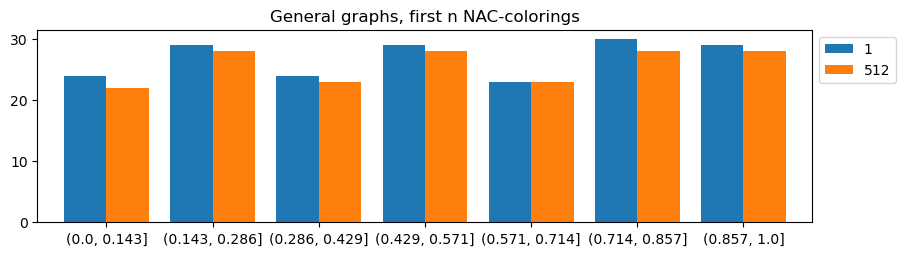

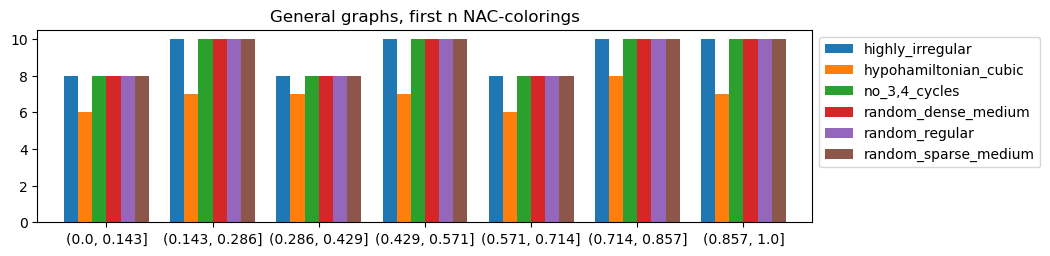

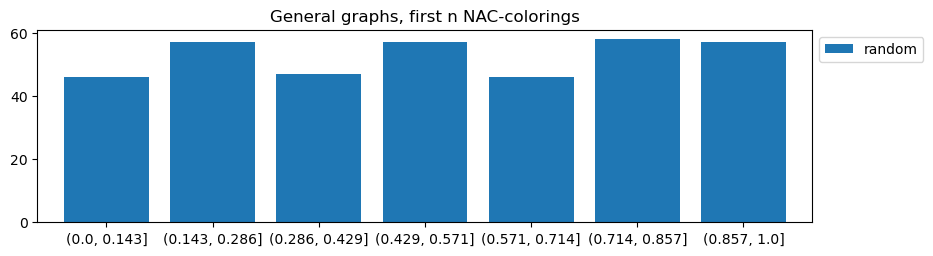

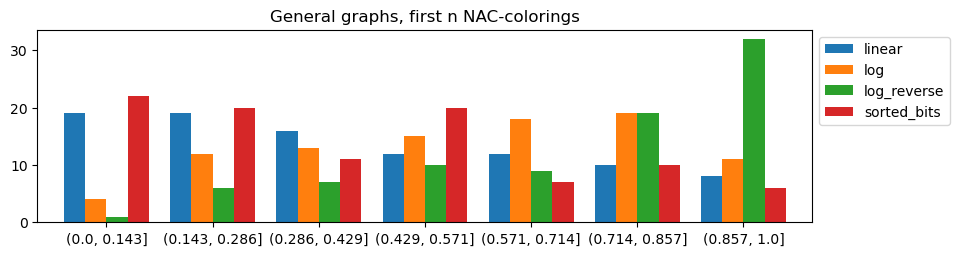

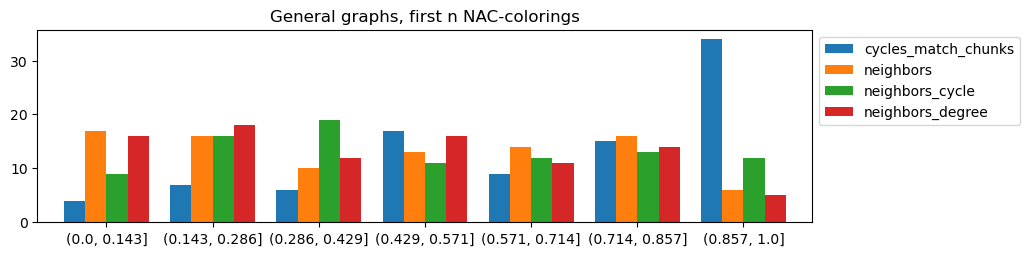

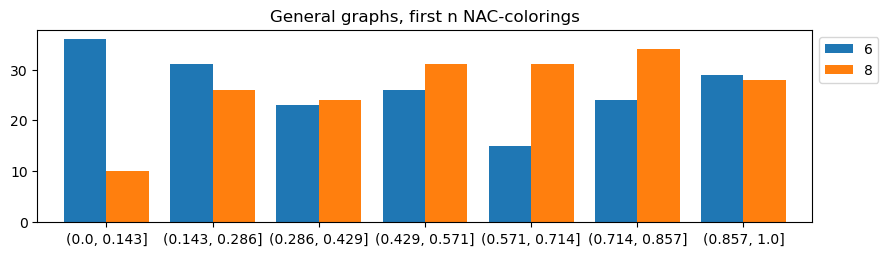

In [14]:
input = """
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors_degree-6-smart]                         57.0668 (1.03)          59.1281 (1.00)          58.2770 (1.0)           1.0765 (inf)           58.6361 (1.02)          1.5460 (inf)           1;0  17.1594 (1.0)           3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                 57.6237 (1.04)          58.8619 (1.0)           58.2832 (1.00)          0.6230 (inf)           58.3639 (1.02)          0.9286 (inf)           1;0  17.1576 (1.00)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors-8-smart]                                57.7108 (1.05)          58.9286 (1.00)          58.3792 (1.00)          0.6175 (inf)           58.4981 (1.02)          0.9134 (inf)           1;0  17.1294 (1.00)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                     57.4610 (1.04)          59.1221 (1.00)          58.3987 (1.00)          0.8510 (inf)           58.6131 (1.02)          1.2458 (inf)           1;0  17.1237 (1.00)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-cycles_match_chunks-6-smart]                      58.2803 (1.06)          59.2046 (1.01)          58.6141 (1.01)          0.5128 (inf)           58.3575 (1.02)          0.6932 (inf)           1;0  17.0607 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors_cycle-6-smart]                          57.2433 (1.04)          59.8932 (1.02)          58.6859 (1.01)          1.3405 (inf)           58.9210 (1.03)          1.9874 (inf)           1;0  17.0399 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors_degree-6-smart]                            57.8601 (1.05)          59.2245 (1.01)          58.7011 (1.01)          0.7355 (inf)           59.0187 (1.03)          1.0233 (inf)           1;0  17.0355 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                    57.9713 (1.05)          59.9305 (1.02)          58.7053 (1.01)          1.0680 (inf)           58.2140 (1.02)          1.4694 (inf)           1;0  17.0343 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors-8-smart]                                   57.8752 (1.05)          59.3879 (1.01)          58.7403 (1.01)          0.7794 (inf)           58.9577 (1.03)          1.1345 (inf)           1;0  17.0241 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors_cycle-6-smart]                             57.9551 (1.05)          59.8413 (1.02)          58.7419 (1.01)          0.9812 (inf)           58.4291 (1.02)          1.4147 (inf)           1;0  17.0236 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors-8-smart]                           56.3791 (1.02)          61.6950 (1.05)          58.7962 (1.01)          2.6905 (inf)           58.3144 (1.02)          3.9869 (inf)           1;0  17.0079 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]                 57.9419 (1.05)          60.4259 (1.03)          58.8827 (1.01)          1.3471 (inf)           58.2804 (1.02)          1.8630 (inf)           1;0  16.9829 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-cycles_match_chunks-6-smart]                         56.3540 (1.02)          60.7977 (1.03)          59.0594 (1.01)          2.3744 (inf)           60.0265 (1.05)          3.3327 (inf)           1;0  16.9321 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                    58.2452 (1.05)          60.7141 (1.03)          59.1261 (1.01)          1.3780 (inf)           58.4191 (1.02)          1.8517 (inf)           1;0  16.9130 (0.99)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-cycles_match_chunks-8-smart]                         58.3007 (1.06)          59.6835 (1.01)          59.1847 (1.02)          0.7676 (inf)           59.5697 (1.04)          1.0371 (inf)           1;0  16.8963 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors_degree-8-smart]                            57.5802 (1.04)          61.1693 (1.04)          59.2243 (1.02)          1.8134 (inf)           58.9234 (1.03)          2.6918 (inf)           1;0  16.8850 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors_degree-6-smart]                    58.6700 (1.06)          60.6775 (1.03)          59.3504 (1.02)          1.1494 (inf)           58.7039 (1.02)          1.5056 (inf)           1;0  16.8491 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors-6-smart]                           57.8010 (1.05)          61.0037 (1.04)          59.3808 (1.02)          1.6018 (inf)           59.3377 (1.04)          2.4020 (inf)           1;0  16.8405 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors-6-smart]                                58.1927 (1.05)          61.2904 (1.04)          59.4574 (1.02)          1.6252 (inf)           58.8890 (1.03)          2.3233 (inf)           1;0  16.8188 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors-6-smart]                                   58.3298 (1.06)          61.1674 (1.04)          59.5175 (1.02)          1.4742 (inf)           59.0554 (1.03)          2.1282 (inf)           1;0  16.8018 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                     55.2145 (1.0)           66.1885 (1.12)          59.5760 (1.02)          5.8230 (inf)           57.3251 (1.0)           8.2305 (inf)           1;0  16.7853 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                 58.3283 (1.06)          60.3638 (1.03)          59.5995 (1.02)          1.1084 (inf)           60.1062 (1.05)          1.5266 (inf)           1;0  16.7787 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors_cycle-8-smart]                          59.1348 (1.07)          60.5044 (1.03)          59.6204 (1.02)          0.7668 (inf)           59.2219 (1.03)          1.0272 (inf)           1;0  16.7728 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-neighbors_degree-8-smart]                         57.6276 (1.04)          62.0465 (1.05)          59.7228 (1.02)          2.2183 (inf)           59.4944 (1.04)          3.3141 (inf)           1;0  16.7440 (0.98)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log-neighbors_cycle-8-smart]                             58.5598 (1.06)          60.8287 (1.03)          59.7989 (1.03)          1.1488 (inf)           60.0082 (1.05)          1.7017 (inf)           1;0  16.7227 (0.97)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-sorted_bits-neighbors-8-smart]                           58.2958 (1.06)          61.3833 (1.04)          59.8229 (1.03)          1.5440 (inf)           59.7896 (1.04)          2.3156 (inf)           1;0  16.7160 (0.97)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                     57.6238 (1.04)          61.5832 (1.05)          59.8531 (1.03)          2.0264 (inf)           60.3524 (1.05)          2.9696 (inf)           1;0  16.7076 (0.97)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                     59.7270 (1.08)          60.4133 (1.03)          59.9929 (1.03)          0.3683 (inf)           59.8383 (1.04)          0.5147 (inf)           1;0  16.6686 (0.97)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]                 59.7833 (1.08)          62.3899 (1.06)          60.7418 (1.04)          1.4337 (inf)           60.0521 (1.05)          1.9550 (inf)           1;0  16.4631 (0.96)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors-6-smart]                           58.6741 (1.06)          62.3422 (1.06)          60.9337 (1.05)          1.9766 (inf)           61.7848 (1.08)          2.7511 (inf)           1;0  16.4113 (0.96)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-linear-cycles_match_chunks-8-smart]                      58.1027 (1.05)          65.7957 (1.12)          60.9368 (1.05)          4.2273 (inf)           58.9120 (1.03)          5.7697 (inf)           1;0  16.4105 (0.96)          3           1
test_bench_NAC_colorings_general_first_n[1-highly_irregular-random-subgraphs-log_reverse-neighbors_degree-8-smart]                    57.8459 (1.05)          65.0230 (1.10)          61.0656 (1.05)          3.6450 (inf)           60.3280 (1.05)          5.3829 (inf)           1;0  16.3758 (0.95)          3           1

test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                      101.6366 (1.84)         105.7098 (1.80)         103.6356 (1.78)          2.0376 (inf)          103.5603 (1.81)          3.0549 (inf)           1;0   9.6492 (0.56)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors-6-smart]                           101.7311 (1.84)         106.4286 (1.81)         103.9960 (1.78)          2.3532 (inf)          103.8284 (1.81)          3.5231 (inf)           1;0   9.6158 (0.56)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors_degree-6-smart]                    104.0751 (1.88)         108.0862 (1.84)         106.3708 (1.83)          2.0675 (inf)          106.9510 (1.87)          3.0083 (inf)           1;0   9.4011 (0.55)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                103.9868 (1.88)         109.0709 (1.85)         106.9575 (1.84)          2.6483 (inf)          107.8148 (1.88)          3.8131 (inf)           1;0   9.3495 (0.54)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                99.9008 (1.81)         112.9882 (1.92)         108.1154 (1.86)          7.1551 (inf)          111.4572 (1.94)          9.8156 (inf)           1;0   9.2494 (0.54)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]            109.0678 (1.98)         116.7403 (1.98)         112.3134 (1.93)          3.9703 (inf)          111.1321 (1.94)          5.7544 (inf)           1;0   8.9037 (0.52)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]                 110.4437 (2.00)         116.8673 (1.99)         114.1873 (1.96)          3.3413 (inf)          115.2510 (2.01)          4.8177 (inf)           1;0   8.7575 (0.51)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                118.3309 (2.14)         139.7182 (2.37)         126.4580 (2.17)         11.5809 (inf)          121.3249 (2.12)         16.0405 (inf)           1;0   7.9078 (0.46)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                      124.2742 (2.25)         130.7295 (2.22)         126.7266 (2.17)          3.4958 (inf)          125.1762 (2.18)          4.8415 (inf)           1;0   7.8910 (0.46)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]               119.8717 (2.17)         143.0625 (2.43)         128.0156 (2.20)         13.0457 (inf)          121.1127 (2.11)         17.3930 (inf)           1;0   7.8115 (0.46)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors-8-smart]                           121.8875 (2.21)         138.8804 (2.36)         130.3526 (2.24)          8.4966 (inf)          130.2899 (2.27)         12.7447 (inf)           1;0   7.6715 (0.45)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                     126.0976 (2.28)         138.2475 (2.35)         132.0143 (2.27)          6.0812 (inf)          131.6979 (2.30)          9.1125 (inf)           1;0   7.5749 (0.44)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors_degree-8-smart]                    127.9147 (2.32)         135.6664 (2.30)         132.9009 (2.28)          4.3267 (inf)          135.1214 (2.36)          5.8138 (inf)           1;0   7.5244 (0.44)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]            134.4583 (2.44)         151.6297 (2.58)         145.0245 (2.49)          9.2456 (inf)          148.9855 (2.60)         12.8785 (inf)           1;0   6.8954 (0.40)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                     105.5122 (1.91)         238.0674 (4.04)         150.2112 (2.58)         76.0896 (inf)          107.0541 (1.87)         99.4164 (inf)           1;0   6.6573 (0.39)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]                 140.0680 (2.54)         163.9364 (2.79)         155.0993 (2.66)         13.0844 (inf)          161.2936 (2.81)         17.9013 (inf)           1;0   6.4475 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                248.0106 (4.49)         318.5583 (5.41)         281.3812 (4.83)         35.4276 (inf)          277.5747 (4.84)         52.9108 (inf)           1;0   3.5539 (0.21)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors_cycle-6-smart]                        286.5982 (5.19)         381.8007 (6.49)         319.5216 (5.48)         53.9648 (inf)          290.1658 (5.06)         71.4018 (inf)           1;0   3.1297 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors-8-smart]                      258.0164 (4.67)         456.7845 (7.76)         335.5912 (5.76)        106.3208 (inf)          291.9729 (5.09)        149.0761 (inf)           1;0   2.9798 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors-6-smart]                              267.8915 (4.85)         469.3620 (7.97)         350.4431 (6.01)        105.5440 (inf)          314.0757 (5.48)        151.1028 (inf)           1;0   2.8535 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors_degree-6-smart]                       273.1462 (4.95)         629.0961 (10.69)        392.3188 (6.73)        205.0567 (inf)          274.7140 (4.79)        266.9625 (inf)           1;0   2.5489 (0.15)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                    358.7538 (6.50)         474.3531 (8.06)         397.8657 (6.83)         66.2457 (inf)          360.4902 (6.29)         86.6995 (inf)           1;0   2.5134 (0.15)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]            442.1445 (8.01)         915.5439 (15.55)        749.8369 (12.87)       266.7333 (inf)          891.8222 (15.56)       355.0496 (inf)           1;0   1.3336 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors_degree-8-smart]               425.9823 (7.72)       2,175.0461 (36.95)      1,012.1380 (17.37)     1,007.1190 (inf)          435.3855 (7.60)      1,311.7978 (inf)           1;0   0.9880 (0.06)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors_cycle-8-smart]                        909.6502 (16.47)      1,606.4343 (27.29)      1,151.1473 (19.75)       394.5334 (inf)          937.3574 (16.35)       522.5881 (inf)           1;0   0.8687 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors-8-smart]                              915.0157 (16.57)      1,626.9373 (27.64)      1,155.8046 (19.83)       408.0462 (inf)          925.4609 (16.14)       533.9412 (inf)           1;0   0.8652 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-neighbors_degree-8-smart]                       296.9969 (5.38)       1,665.0826 (28.29)      1,206.5932 (20.70)       787.7422 (inf)        1,657.7001 (28.92)     1,026.0643 (inf)           1;0   0.8288 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                  1,297.4233 (23.50)      1,704.7721 (28.96)      1,558.5085 (26.74)       226.6522 (inf)        1,673.3299 (29.19)       305.5116 (inf)           1;0   0.6416 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors_degree-6-smart]             2,684.2787 (48.62)      7,679.9017 (130.47)     5,366.6861 (92.09)     2,518.1916 (inf)        5,735.8780 (100.06)    3,746.7172 (inf)           1;0   0.1863 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors-6-smart]                    4,310.4197 (78.07)     12,557.2551 (213.33)     9,278.2002 (159.21)    4,375.0908 (inf)       10,966.9258 (191.31)    6,185.1266 (inf)           1;0   0.1078 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-neighbors_cycle-6-smart]              9,220.3799 (166.99)    12,702.2452 (215.80)    11,287.8337 (193.69)    1,830.4903 (inf)       11,940.8758 (208.30)    2,611.3990 (inf)           1;0   0.0886 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[1-random_sparse_medium-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]          9,591.0317 (173.71)    16,930.4174 (287.63)    14,343.6141 (246.13)    4,121.2371 (inf)       16,509.3932 (288.00)    5,504.5393 (inf)           1;0   0.0697 (0.00)          3           1

test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                       132.7614 (2.40)         134.7844 (2.29)         133.8791 (2.30)          1.0281 (inf)          134.0914 (2.34)          1.5173 (inf)           1;0   7.4694 (0.44)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                130.5223 (2.36)         140.4162 (2.39)         134.8933 (2.31)          5.0466 (inf)          133.7415 (2.33)          7.4205 (inf)           1;0   7.4133 (0.43)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                       129.7422 (2.35)         142.6116 (2.42)         135.5023 (2.33)          6.5399 (inf)          134.1531 (2.34)          9.6520 (inf)           1;0   7.3799 (0.43)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                 133.0874 (2.41)         138.5125 (2.35)         135.9174 (2.33)          2.7202 (inf)          136.1522 (2.38)          4.0689 (inf)           1;0   7.3574 (0.43)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                 135.8773 (2.46)         139.5947 (2.37)         137.8275 (2.37)          1.8654 (inf)          138.0104 (2.41)          2.7880 (inf)           1;0   7.2554 (0.42)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors_cycle-8-smart]                         137.8255 (2.50)         140.3330 (2.38)         139.3991 (2.39)          1.3706 (inf)          140.0386 (2.44)          1.8806 (inf)           1;0   7.1736 (0.42)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                 140.7418 (2.55)         143.0445 (2.43)         141.7920 (2.43)          1.1646 (inf)          141.5895 (2.47)          1.7270 (inf)           1;0   7.0526 (0.41)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                 139.4728 (2.53)         145.6099 (2.47)         142.0127 (2.44)          3.2023 (inf)          140.9553 (2.46)          4.6028 (inf)           1;0   7.0416 (0.41)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors_cycle-6-smart]                         140.1281 (2.54)         146.8619 (2.50)         143.2281 (2.46)          3.3985 (inf)          142.6943 (2.49)          5.0504 (inf)           1;0   6.9819 (0.41)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                      141.6967 (2.57)         146.5123 (2.49)         143.7421 (2.47)          2.4883 (inf)          143.0172 (2.49)          3.6117 (inf)           1;0   6.9569 (0.41)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                      141.3465 (2.56)         146.9482 (2.50)         144.0528 (2.47)          2.8056 (inf)          143.8637 (2.51)          4.2012 (inf)           1;0   6.9419 (0.40)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]             145.3175 (2.63)         149.6507 (2.54)         147.3686 (2.53)          2.1758 (inf)          147.1376 (2.57)          3.2499 (inf)           1;0   6.7857 (0.40)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]             145.5810 (2.64)         153.0284 (2.60)         148.4916 (2.55)          3.9811 (inf)          146.8655 (2.56)          5.5856 (inf)           1;0   6.7344 (0.39)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors-6-smart]                               145.0661 (2.63)         155.9674 (2.65)         149.9276 (2.57)          5.5453 (inf)          148.7494 (2.59)          8.1760 (inf)           1;0   6.6699 (0.39)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors_degree-8-smart]                     145.8228 (2.64)         157.0268 (2.67)         150.8195 (2.59)          5.6993 (inf)          149.6089 (2.61)          8.4030 (inf)           1;0   6.6304 (0.39)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors-6-smart]                       140.7731 (2.55)         162.7764 (2.77)         151.4133 (2.60)         11.0195 (inf)          150.6903 (2.63)         16.5025 (inf)           1;0   6.6044 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors_degree-8-smart]                        140.3477 (2.54)         159.7776 (2.71)         152.0680 (2.61)         10.3172 (inf)          156.0786 (2.72)         14.5724 (inf)           1;0   6.5760 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors_degree-8-smart]                146.1578 (2.65)         158.0049 (2.68)         152.2474 (2.61)          5.9306 (inf)          152.5795 (2.66)          8.8854 (inf)           1;0   6.5683 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors-8-smart]                       143.0552 (2.59)         161.3951 (2.74)         152.4072 (2.62)          9.1754 (inf)          152.7712 (2.66)         13.7549 (inf)           1;0   6.5614 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors-8-smart]                            144.2073 (2.61)         158.8147 (2.70)         153.1297 (2.63)          7.8233 (inf)          156.3671 (2.73)         10.9556 (inf)           1;0   6.5304 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors-8-smart]                               150.2808 (2.72)         159.2328 (2.71)         153.3451 (2.63)          5.1003 (inf)          150.5218 (2.63)          6.7140 (inf)           1;0   6.5212 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-neighbors_degree-6-smart]                142.7642 (2.59)         159.0207 (2.70)         153.6008 (2.64)          9.3847 (inf)          159.0173 (2.77)         12.1924 (inf)           1;0   6.5104 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-neighbors_degree-6-smart]                        139.4644 (2.53)         166.8401 (2.83)         154.1135 (2.64)         13.7888 (inf)          156.0361 (2.72)         20.5318 (inf)           1;0   6.4887 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors-6-smart]                            146.2095 (2.65)         160.3277 (2.72)         155.1051 (2.66)          7.7427 (inf)          158.7781 (2.77)         10.5886 (inf)           1;0   6.4472 (0.38)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                137.3747 (2.49)         261.4795 (4.44)         180.0591 (3.09)         70.5398 (inf)          141.3230 (2.47)         93.0786 (inf)           1;0   5.5537 (0.32)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-neighbors_degree-6-smart]                     147.9029 (2.68)         273.6957 (4.65)         191.5194 (3.29)         71.2117 (inf)          152.9595 (2.67)         94.3446 (inf)           1;0   5.2214 (0.30)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                     262.7212 (4.76)         272.6405 (4.63)         267.0249 (4.58)          5.0882 (inf)          265.7129 (4.64)          7.4395 (inf)           1;0   3.7450 (0.22)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]             262.4609 (4.75)         271.5235 (4.61)         267.5612 (4.59)          4.6372 (inf)          268.6993 (4.69)          6.7969 (inf)           1;0   3.7375 (0.22)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]                  265.0250 (4.80)         276.4997 (4.70)         271.0440 (4.65)          5.7580 (inf)          271.6072 (4.74)          8.6060 (inf)           1;0   3.6894 (0.22)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]             268.5072 (4.86)         274.8044 (4.67)         271.5332 (4.66)          3.1557 (inf)          271.2881 (4.73)          4.7229 (inf)           1;0   3.6828 (0.21)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]                  267.3084 (4.84)         274.9060 (4.67)         271.7990 (4.66)          3.9833 (inf)          273.1826 (4.77)          5.6982 (inf)           1;0   3.6792 (0.21)          3           1
test_bench_NAC_colorings_general_first_n[1-random_dense_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                     270.9287 (4.91)         273.7172 (4.65)         271.9987 (4.67)          1.5031 (inf)          271.3502 (4.73)          2.0914 (inf)           1;0   3.6765 (0.21)          3           1

test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                   198.9604 (3.60)         212.5886 (3.61)         204.7347 (3.51)          7.0481 (inf)          202.6552 (3.54)         10.2212 (inf)           1;0   4.8844 (0.28)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                       210.6723 (3.82)         221.6366 (3.77)         216.1096 (3.71)          5.4827 (inf)          216.0200 (3.77)          8.2232 (inf)           1;0   4.6273 (0.27)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors-6-smart]                             205.9405 (3.73)         227.7637 (3.87)         217.6890 (3.74)         11.0075 (inf)          219.3628 (3.83)         16.3674 (inf)           1;0   4.5937 (0.27)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                      214.4279 (3.88)         227.2638 (3.86)         220.9481 (3.79)          6.4204 (inf)          221.1525 (3.86)          9.6269 (inf)           1;0   4.5260 (0.26)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors_degree-6-smart]                           247.1193 (4.48)         257.1565 (4.37)         250.7322 (4.30)          5.5780 (inf)          247.9207 (4.32)          7.5279 (inf)           1;0   3.9883 (0.23)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors-6-smart]                                  247.4272 (4.48)         256.3012 (4.35)         251.5330 (4.32)          4.4739 (inf)          250.8706 (4.38)          6.6555 (inf)           1;0   3.9756 (0.23)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-cycles_match_chunks-6-smart]                        247.0316 (4.47)         267.3934 (4.54)         254.7705 (4.37)         11.0245 (inf)          249.8866 (4.36)         15.2713 (inf)           1;0   3.9251 (0.23)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors_cycle-6-smart]                            255.2075 (4.62)         260.9979 (4.43)         258.9819 (4.44)          3.2713 (inf)          260.7404 (4.55)          4.3428 (inf)           1;0   3.8613 (0.23)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors-6-smart]                                     292.4582 (5.30)         315.2157 (5.36)         306.0677 (5.25)         12.0168 (inf)          310.5292 (5.42)         17.0681 (inf)           1;0   3.2673 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors_degree-6-smart]                              316.1735 (5.73)         321.6411 (5.46)         318.1040 (5.46)          3.0675 (inf)          316.4974 (5.52)          4.1007 (inf)           1;0   3.1436 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors_cycle-6-smart]                               308.2750 (5.58)         346.6748 (5.89)         323.8997 (5.56)         20.1738 (inf)          316.7493 (5.53)         28.7998 (inf)           1;0   3.0874 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-cycles_match_chunks-6-smart]                           326.7670 (5.92)         361.8866 (6.15)         341.2769 (5.86)         18.3372 (inf)          335.1771 (5.85)         26.3397 (inf)           1;0   2.9302 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                       329.0957 (5.96)         428.0061 (7.27)         364.2143 (6.25)         55.3392 (inf)          335.5412 (5.85)         74.1828 (inf)           1;0   2.7456 (0.16)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors-8-smart]                             357.6598 (6.48)         403.8502 (6.86)         387.8684 (6.66)         26.1761 (inf)          402.0952 (7.01)         34.6428 (inf)           1;0   2.5782 (0.15)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                      370.6182 (6.71)         455.9440 (7.75)         414.4636 (7.11)         42.7120 (inf)          416.8285 (7.27)         63.9944 (inf)           1;0   2.4128 (0.14)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                   465.7126 (8.43)         513.9064 (8.73)         494.1968 (8.48)         25.2667 (inf)          502.9714 (8.77)         36.1454 (inf)           1;0   2.0235 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors-8-smart]                                  615.2607 (11.14)        666.9477 (11.33)        648.5467 (11.13)        28.8800 (inf)          663.4316 (11.57)        38.7652 (inf)           1;0   1.5419 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors_degree-8-smart]                              602.6874 (10.92)        692.6331 (11.77)        650.0926 (11.16)        45.1698 (inf)          654.9574 (11.43)        67.4593 (inf)           1;0   1.5382 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors_degree-8-smart]                           604.7357 (10.95)        695.7770 (11.82)        653.8670 (11.22)        45.9482 (inf)          661.0884 (11.53)        68.2809 (inf)           1;0   1.5294 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-neighbors_cycle-8-smart]                            639.0033 (11.57)        679.2032 (11.54)        653.8799 (11.22)        22.0422 (inf)          643.4332 (11.22)        30.1499 (inf)           1;0   1.5293 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors-8-smart]                                     626.6838 (11.35)        694.6672 (11.80)        668.1941 (11.47)        36.4009 (inf)          683.2313 (11.92)        50.9876 (inf)           1;0   1.4966 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-neighbors_cycle-8-smart]                               660.1040 (11.96)        697.7746 (11.85)        674.7667 (11.58)        20.1743 (inf)          666.4213 (11.63)        28.2529 (inf)           1;0   1.4820 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-linear-cycles_match_chunks-8-smart]                        758.3004 (13.73)        824.1764 (14.00)        781.9887 (13.42)        36.6276 (inf)          763.4893 (13.32)        49.4070 (inf)           1;0   1.2788 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log-cycles_match_chunks-8-smart]                           781.1742 (14.15)        841.7067 (14.30)        805.4617 (13.82)        31.9888 (inf)          793.5041 (13.84)        45.3993 (inf)           1;0   1.2415 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors-8-smart]                             871.5699 (15.79)      1,408.3590 (23.93)      1,119.9332 (19.22)       270.6278 (inf)        1,079.8709 (18.84)       402.5918 (inf)           1;0   0.8929 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_degree-8-smart]                    1,128.4729 (20.44)      1,165.2530 (19.80)      1,146.8216 (19.68)        18.3902 (inf)        1,146.7389 (20.00)        27.5851 (inf)           1;0   0.8720 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                     1,037.7015 (18.79)      1,362.4136 (23.15)      1,226.8211 (21.05)       168.8441 (inf)        1,280.3481 (22.33)       243.5340 (inf)           1;0   0.8151 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors-6-smart]                           1,472.5978 (26.67)      1,484.6138 (25.22)      1,479.0994 (25.38)         6.0685 (inf)        1,480.0866 (25.82)         9.0120 (inf)           1;0   0.6761 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_degree-6-smart]                    1,377.0051 (24.94)      1,738.8584 (29.54)      1,543.4831 (26.49)       182.6492 (inf)        1,514.5858 (26.42)       271.3900 (inf)           1;0   0.6479 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                     1,367.9578 (24.78)      1,895.5731 (32.20)      1,651.3353 (28.34)       265.9764 (inf)        1,690.4751 (29.49)       395.7115 (inf)           1;0   0.6056 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]                 1,675.1510 (30.34)      2,387.1723 (40.56)      1,950.1784 (33.46)       382.6466 (inf)        1,788.2120 (31.19)       534.0160 (inf)           1;0   0.5128 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[1-no_3,4_cycles-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]                 1,927.9517 (34.92)      2,525.3745 (42.90)      2,166.1938 (37.17)       316.5409 (inf)        2,045.2552 (35.68)       448.0671 (inf)           1;0   0.4616 (0.03)          3           1

test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors-6-smart]                            276.2376 (5.00)         308.3873 (5.24)         292.1565 (5.01)         16.0772 (inf)          291.8445 (5.09)         24.1123 (inf)           1;0   3.4228 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                     278.7322 (5.05)         307.7276 (5.23)         296.0729 (5.08)         15.3112 (inf)          301.7590 (5.26)         21.7466 (inf)           1;0   3.3775 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                      303.1922 (5.49)         318.8514 (5.42)         312.1074 (5.36)          8.0522 (inf)          314.2787 (5.48)         11.7444 (inf)           1;0   3.2040 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors-6-smart]                                 304.3529 (5.51)         344.5784 (5.85)         331.1441 (5.68)         23.2019 (inf)          344.5011 (6.01)         30.1692 (inf)           1;0   3.0198 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors_degree-6-smart]                          311.0568 (5.63)         350.9508 (5.96)         331.8043 (5.69)         19.9951 (inf)          333.4053 (5.82)         29.9205 (inf)           1;0   3.0138 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                      329.1628 (5.96)         343.8537 (5.84)         338.1819 (5.80)          7.8967 (inf)          341.5291 (5.96)         11.0181 (inf)           1;0   2.9570 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]                  334.6875 (6.06)         352.4875 (5.99)         340.8848 (5.85)         10.0560 (inf)          335.4794 (5.85)         13.3500 (inf)           1;0   2.9335 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors-8-smart]                            315.3620 (5.71)         375.5956 (6.38)         343.6564 (5.90)         30.2818 (inf)          340.0114 (5.93)         45.1752 (inf)           1;0   2.9099 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                     326.1294 (5.91)         374.4167 (6.36)         347.1722 (5.96)         24.7338 (inf)          340.9706 (5.95)         36.2155 (inf)           1;0   2.8804 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors_cycle-6-smart]                           388.1943 (7.03)         401.0954 (6.81)         393.5275 (6.75)          6.7346 (inf)          391.2928 (6.83)          9.6758 (inf)           1;0   2.5411 (0.15)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-cycles_match_chunks-6-smart]                       368.7971 (6.68)         435.6331 (7.40)         394.7284 (6.77)         35.8457 (inf)          379.7551 (6.62)         50.1270 (inf)           1;0   2.5334 (0.15)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors-6-smart]                                    383.4012 (6.94)         429.3838 (7.29)         411.4470 (7.06)         24.6017 (inf)          421.5559 (7.35)         34.4870 (inf)           1;0   2.4304 (0.14)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors_degree-6-smart]                             378.6296 (6.86)         441.4124 (7.50)         413.5517 (7.10)         31.9815 (inf)          420.6131 (7.34)         47.0871 (inf)           1;0   2.4181 (0.14)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-cycles_match_chunks-6-smart]                          426.0649 (7.72)         526.4022 (8.94)         466.7339 (8.01)         52.7979 (inf)          447.7345 (7.81)         75.2529 (inf)           1;0   2.1425 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors_cycle-6-smart]                              464.3502 (8.41)         469.6377 (7.98)         467.2135 (8.02)          2.6709 (inf)          467.6525 (8.16)          3.9656 (inf)           1;0   2.1403 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]                  448.9916 (8.13)         496.5774 (8.44)         476.4183 (8.18)         24.6113 (inf)          483.6859 (8.44)         35.6894 (inf)           1;0   2.0990 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors_degree-6-smart]                     486.0505 (8.80)         523.8672 (8.90)         504.6984 (8.66)         18.9137 (inf)          504.1775 (8.80)         28.3625 (inf)           1;0   1.9814 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors-6-smart]                            521.3906 (9.44)         573.6072 (9.74)         545.9759 (9.37)         26.2413 (inf)          542.9298 (9.47)         39.1625 (inf)           1;0   1.8316 (0.11)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors-8-smart]                                 454.4545 (8.23)         644.4626 (10.95)        572.6199 (9.83)        103.1266 (inf)          618.9425 (10.80)       142.5061 (inf)           1;0   1.7464 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                      552.1369 (10.00)        630.0521 (10.70)        582.2578 (9.99)         41.8563 (inf)          564.5844 (9.85)         58.4364 (inf)           1;0   1.7175 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors_degree-8-smart]                          464.6125 (8.41)         651.2370 (11.06)        584.5110 (10.03)       104.0560 (inf)          637.6834 (11.12)       139.9684 (inf)           1;0   1.7108 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors_degree-8-smart]                             470.0844 (8.51)         657.5290 (11.17)        584.5826 (10.03)       100.3931 (inf)          626.1344 (10.92)       140.5834 (inf)           1;0   1.7106 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors-8-smart]                                    466.4051 (8.45)         668.7868 (11.36)        586.9511 (10.07)       106.5995 (inf)          625.6614 (10.91)       151.7862 (inf)           1;0   1.7037 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors-8-smart]                            556.6714 (10.08)        717.9611 (12.20)        646.1614 (11.09)        82.0872 (inf)          663.8517 (11.58)       120.9673 (inf)           1;0   1.5476 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors_degree-8-smart]                     570.3070 (10.33)        732.3028 (12.44)        656.1280 (11.26)        81.4275 (inf)          665.7741 (11.61)       121.4968 (inf)           1;0   1.5241 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-neighbors_cycle-8-smart]                           591.3675 (10.71)        731.6867 (12.43)        663.0407 (11.38)        70.2085 (inf)          666.0677 (11.62)       105.2394 (inf)           1;0   1.5082 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-neighbors_cycle-8-smart]                              596.7401 (10.81)        741.0921 (12.59)        673.2095 (11.55)        72.5581 (inf)          681.7962 (11.89)       108.2640 (inf)           1;0   1.4854 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-linear-cycles_match_chunks-8-smart]                       680.2922 (12.32)        793.1323 (13.47)        748.6040 (12.85)        60.0622 (inf)          772.3875 (13.47)        84.6301 (inf)           1;0   1.3358 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                      706.4593 (12.79)        832.7390 (14.15)        773.6997 (13.28)        63.5381 (inf)          781.9009 (13.64)        94.7098 (inf)           1;0   1.2925 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log-cycles_match_chunks-8-smart]                          700.5144 (12.69)        817.8176 (13.89)        774.0786 (13.28)        64.0871 (inf)          803.9038 (14.02)        87.9773 (inf)           1;0   1.2919 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]                  922.7763 (16.71)      1,045.8554 (17.77)        983.7805 (16.88)        61.5465 (inf)          982.7097 (17.14)        92.3093 (inf)           1;0   1.0165 (0.06)          3           1
test_bench_NAC_colorings_general_first_n[1-random_regular-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]                  922.8848 (16.71)      1,469.0971 (24.96)      1,127.0859 (19.34)       298.0448 (inf)          989.2759 (17.26)       409.6593 (inf)           1;0   0.8872 (0.05)          3           1

test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                 279.6524 (5.06)         285.9046 (4.86)         283.7592 (4.87)          3.5578 (inf)          285.7208 (4.98)          4.6891 (inf)           1;0   3.5241 (0.21)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors_degree-8-smart]                         277.4572 (5.03)         297.9698 (5.06)         288.0860 (4.94)         10.2766 (inf)          288.8308 (5.04)         15.3844 (inf)           1;0   3.4712 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors_degree-8-smart]                 282.4548 (5.12)         296.8448 (5.04)         288.1317 (4.94)          7.6604 (inf)          285.0954 (4.97)         10.7924 (inf)           1;0   3.4706 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]              284.1462 (5.15)         295.7925 (5.03)         289.1732 (4.96)          5.9842 (inf)          287.5809 (5.02)          8.7347 (inf)           1;0   3.4581 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors-6-smart]                        288.1597 (5.22)         295.2418 (5.02)         292.7015 (5.02)          3.9425 (inf)          294.7028 (5.14)          5.3116 (inf)           1;0   3.4165 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors-8-smart]                                288.2997 (5.22)         310.1707 (5.27)         296.2926 (5.08)         12.0649 (inf)          290.4073 (5.07)         16.4032 (inf)           1;0   3.3750 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                  292.9796 (5.31)         307.2966 (5.22)         298.3123 (5.12)          7.8259 (inf)          294.6608 (5.14)         10.7378 (inf)           1;0   3.3522 (0.20)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors_degree-6-smart]                      293.8284 (5.32)         306.9793 (5.22)         299.4957 (5.14)          6.7609 (inf)          297.6794 (5.19)          9.8631 (inf)           1;0   3.3389 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors_degree-6-smart]                         299.2043 (5.42)         304.8052 (5.18)         302.6716 (5.19)          3.0293 (inf)          304.0053 (5.30)          4.2007 (inf)           1;0   3.3039 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors_degree-6-smart]                 299.9313 (5.43)         309.7315 (5.26)         303.6809 (5.21)          5.2899 (inf)          301.3797 (5.26)          7.3502 (inf)           1;0   3.2929 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors-8-smart]                             296.8627 (5.38)         321.9305 (5.47)         305.5266 (5.24)         14.2137 (inf)          297.7865 (5.19)         18.8008 (inf)           1;0   3.2730 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors-6-smart]                        310.0944 (5.62)         313.2789 (5.32)         311.5767 (5.35)          1.6036 (inf)          311.3568 (5.43)          2.3884 (inf)           1;0   3.2095 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                  310.5080 (5.62)         314.0201 (5.33)         311.7514 (5.35)          1.9678 (inf)          310.7261 (5.42)          2.6340 (inf)           1;0   3.2077 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-cycles_match_chunks-6-smart]                      308.9214 (5.59)         321.5452 (5.46)         313.2100 (5.37)          7.2195 (inf)          309.1634 (5.39)          9.4678 (inf)           1;0   3.1927 (0.19)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-cycles_match_chunks-6-smart]                   313.9364 (5.69)         322.9149 (5.49)         317.3504 (5.45)          4.8603 (inf)          315.1998 (5.50)          6.7339 (inf)           1;0   3.1511 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]              309.3662 (5.60)         330.4762 (5.61)         318.2291 (5.46)         10.9544 (inf)          314.8448 (5.49)         15.8326 (inf)           1;0   3.1424 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-cycles_match_chunks-8-smart]                      314.9359 (5.70)         324.7569 (5.52)         318.6271 (5.47)          5.3454 (inf)          316.1885 (5.52)          7.3657 (inf)           1;0   3.1385 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors-8-smart]                        275.1960 (4.98)         392.5113 (6.67)         319.2805 (5.48)         63.8580 (inf)          290.1343 (5.06)         87.9864 (inf)           1;0   3.1320 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-cycles_match_chunks-8-smart]                   318.2998 (5.76)         323.2712 (5.49)         320.6338 (5.50)          2.4995 (inf)          320.3303 (5.59)          3.7285 (inf)           1;0   3.1188 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors_degree-8-smart]                      287.2626 (5.20)         390.3599 (6.63)         323.2904 (5.55)         58.1374 (inf)          292.2488 (5.10)         77.3230 (inf)           1;0   3.0932 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors_cycle-6-smart]                          321.8846 (5.83)         329.9541 (5.61)         326.9992 (5.61)          4.4472 (inf)          329.1588 (5.74)          6.0521 (inf)           1;0   3.0581 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                  326.0427 (5.91)         330.1719 (5.61)         328.6793 (5.64)          2.2900 (inf)          329.8234 (5.75)          3.0969 (inf)           1;0   3.0425 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors_cycle-6-smart]                       319.9872 (5.80)         338.8642 (5.76)         329.8695 (5.66)          9.4698 (inf)          330.7570 (5.77)         14.1578 (inf)           1;0   3.0315 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                 284.3635 (5.15)         419.3593 (7.12)         332.8446 (5.71)         75.1058 (inf)          294.8110 (5.14)        101.2468 (inf)           1;0   3.0044 (0.18)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors-8-smart]                        287.6002 (5.21)         430.6302 (7.32)         338.4081 (5.81)         80.0047 (inf)          296.9939 (5.18)        107.2725 (inf)           1;0   2.9550 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors-6-smart]                             297.3572 (5.39)         411.0273 (6.98)         341.5152 (5.86)         60.9290 (inf)          316.1611 (5.52)         85.2526 (inf)           1;0   2.9281 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors-6-smart]                                307.6181 (5.57)         412.0152 (7.00)         343.4733 (5.89)         59.3802 (inf)          310.7865 (5.42)         78.2978 (inf)           1;0   2.9114 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-linear-neighbors_cycle-8-smart]                       309.0010 (5.60)         427.8154 (7.27)         350.5791 (6.02)         66.9541 (inf)          314.9208 (5.49)         89.1108 (inf)           1;0   2.8524 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                  317.4161 (5.75)         418.6693 (7.11)         352.2598 (6.04)         57.5357 (inf)          320.6939 (5.59)         75.9399 (inf)           1;0   2.8388 (0.17)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log-neighbors_cycle-8-smart]                          313.6010 (5.68)         428.1045 (7.27)         353.2428 (6.06)         64.8699 (inf)          318.0227 (5.55)         85.8776 (inf)           1;0   2.8309 (0.16)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]              313.6668 (5.68)         428.0770 (7.27)         355.1267 (6.09)         63.3731 (inf)          323.6364 (5.65)         85.8076 (inf)           1;0   2.8159 (0.16)          3           1
test_bench_NAC_colorings_general_first_n[512-highly_irregular-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]              318.2938 (5.76)         437.3523 (7.43)         365.3948 (6.27)         63.3017 (inf)          340.5384 (5.94)         89.2938 (inf)           1;0   2.7368 (0.16)          3           1

test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                    417.7791 (7.57)         477.4507 (8.11)         456.7007 (7.84)         33.7318 (inf)          474.8724 (8.28)         44.7537 (inf)           1;0   2.1896 (0.13)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors-6-smart]                          388.8892 (7.04)         514.9713 (8.75)         462.7052 (7.94)         65.7455 (inf)          484.2551 (8.45)         94.5615 (inf)           1;0   2.1612 (0.13)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors-8-smart]                             444.9441 (8.06)         528.2593 (8.97)         497.8689 (8.54)         46.0023 (inf)          520.4035 (9.08)         62.4864 (inf)           1;0   2.0086 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors-8-smart]                          453.6502 (8.22)         520.8033 (8.85)         497.9197 (8.54)         38.3458 (inf)          519.3056 (9.06)         50.3648 (inf)           1;0   2.0084 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors-8-smart]                     452.5623 (8.20)         527.3808 (8.96)         498.4445 (8.55)         40.1848 (inf)          515.3902 (8.99)         56.1139 (inf)           1;0   2.0062 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors_degree-6-smart]                   390.9571 (7.08)         706.3886 (12.00)        506.3479 (8.69)        173.9208 (inf)          421.6981 (7.36)        236.5736 (inf)           1;0   1.9749 (0.12)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors_degree-8-smart]                   438.4929 (7.94)         613.0808 (10.42)        519.7227 (8.92)         87.9236 (inf)          507.5946 (8.85)        130.9409 (inf)           1;0   1.9241 (0.11)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors_degree-8-smart]                      440.3063 (7.97)         611.6512 (10.39)        522.2133 (8.96)         85.9204 (inf)          514.6822 (8.98)        128.5087 (inf)           1;0   1.9149 (0.11)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors_degree-8-smart]              455.5323 (8.25)         609.1226 (10.35)        527.2081 (9.05)         77.3054 (inf)          516.9694 (9.02)        115.1927 (inf)           1;0   1.8968 (0.11)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors_cycle-8-smart]               476.6753 (8.63)         724.9783 (12.32)        572.4892 (9.82)        133.5016 (inf)          515.8139 (9.00)        186.2273 (inf)           1;0   1.7468 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors_degree-6-smart]              489.7081 (8.87)         795.8514 (13.52)        597.5193 (10.25)       171.9780 (inf)          506.9986 (8.84)        229.6074 (inf)           1;0   1.6736 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors_degree-6-smart]                      493.6551 (8.94)         791.0321 (13.44)        597.6796 (10.26)       167.6093 (inf)          508.3515 (8.87)        223.0327 (inf)           1;0   1.6731 (0.10)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors_cycle-8-smart]                       509.8171 (9.23)         718.0152 (12.20)        615.9992 (10.57)       104.1615 (inf)          620.1652 (10.82)       156.1486 (inf)           1;0   1.6234 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                    487.9705 (8.84)         732.2701 (12.44)        619.4330 (10.63)       123.2102 (inf)          638.0584 (11.13)       183.2247 (inf)           1;0   1.6144 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]                635.0881 (11.50)        698.9312 (11.87)        677.2076 (11.62)        36.4826 (inf)          697.6036 (12.17)        47.8824 (inf)           1;0   1.4767 (0.09)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors_cycle-6-smart]                       487.9366 (8.84)       1,006.7507 (17.10)        737.1678 (12.65)       260.0051 (inf)          716.8160 (12.50)       389.1106 (inf)           1;0   1.3565 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]              541.9190 (9.81)       1,050.9424 (17.85)        754.9883 (12.96)       264.4402 (inf)          672.1035 (11.72)       381.7676 (inf)           1;0   1.3245 (0.08)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors_cycle-6-smart]               488.1578 (8.84)       1,150.2858 (19.54)        788.3150 (13.53)       335.3641 (inf)          726.5014 (12.67)       496.5961 (inf)           1;0   1.2685 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]                707.1729 (12.81)      1,088.4417 (18.49)        843.7089 (14.48)       212.4180 (inf)          735.5122 (12.83)       285.9516 (inf)           1;0   1.1852 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                   703.7868 (12.75)      1,087.6457 (18.48)        846.5932 (14.53)       209.9432 (inf)          748.3471 (13.05)       287.8942 (inf)           1;0   1.1812 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]           706.9593 (12.80)      1,101.9638 (18.72)        850.1319 (14.59)       218.7744 (inf)          741.4727 (12.93)       296.2534 (inf)           1;0   1.1763 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-neighbors-6-smart]                             521.9842 (9.45)       1,231.9150 (20.93)        869.5771 (14.92)       355.1950 (inf)          854.8320 (14.91)       532.4481 (inf)           1;0   1.1500 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-neighbors-6-smart]                     527.5068 (9.55)       1,246.2646 (21.17)        881.2310 (15.12)       359.5123 (inf)          869.9217 (15.18)       539.0684 (inf)           1;0   1.1348 (0.07)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]               952.7392 (17.26)      1,587.6315 (26.97)      1,299.7106 (22.30)       321.5389 (inf)        1,358.7610 (23.70)       476.1692 (inf)           1;0   0.7694 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]              606.6471 (10.99)      2,736.3744 (46.49)      1,381.3742 (23.70)     1,177.4856 (inf)          801.1010 (13.97)     1,597.2955 (inf)           1;0   0.7239 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                   1,060.9940 (19.22)      1,635.9053 (27.79)      1,394.7596 (23.93)       298.4369 (inf)        1,487.3796 (25.95)       431.1835 (inf)           1;0   0.7170 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                   805.3590 (14.59)      2,249.9541 (38.22)      1,767.3997 (30.33)       833.1531 (inf)        2,246.8860 (39.20)     1,083.4463 (inf)           1;0   0.5658 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]           814.7826 (14.76)      2,292.6509 (38.95)      1,792.7695 (30.76)       847.0315 (inf)        2,270.8752 (39.61)     1,108.4012 (inf)           1;0   0.5578 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]         1,486.6480 (26.92)      2,055.0419 (34.91)      1,865.3437 (32.01)       327.9602 (inf)        2,054.3410 (35.84)       426.2954 (inf)           1;0   0.5361 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                     706.6564 (12.80)      4,485.5815 (76.21)      2,002.9452 (34.37)     2,150.7287 (inf)          816.5977 (14.25)     2,834.1938 (inf)           1;0   0.4993 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]         1,535.2124 (27.80)      2,947.6562 (50.08)      2,465.9745 (42.31)       806.2285 (inf)        2,915.0550 (50.85)     1,059.3328 (inf)           1;0   0.4055 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_dense_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]             2,288.7310 (41.45)      5,511.2761 (93.63)      3,438.7682 (59.01)     1,798.4475 (inf)        2,516.2976 (43.90)     2,416.9089 (inf)           1;0   0.2908 (0.02)          3           1

test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors-6-smart]                                 1,496.4543 (27.10)      1,551.8742 (26.36)      1,532.4497 (26.30)        31.2055 (inf)        1,549.0206 (27.02)        41.5649 (inf)           1;0   0.6525 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors-6-smart]                              1,424.1026 (25.79)      1,651.8785 (28.06)      1,565.6903 (26.87)       123.5811 (inf)        1,621.0897 (28.28)       170.8319 (inf)           1;0   0.6387 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors_degree-6-smart]                       1,560.0310 (28.25)      1,695.4311 (28.80)      1,606.0177 (27.56)        77.4448 (inf)        1,562.5911 (27.26)       101.5501 (inf)           1;0   0.6227 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors-8-smart]                         1,614.3398 (29.24)      1,717.1936 (29.17)      1,657.9758 (28.45)        53.1679 (inf)        1,642.3940 (28.65)        77.1404 (inf)           1;0   0.6031 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors_degree-6-smart]                          1,676.2308 (30.36)      1,836.1797 (31.19)      1,766.1456 (30.31)        81.8068 (inf)        1,786.0264 (31.16)       119.9617 (inf)           1;0   0.5662 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors_cycle-6-smart]                           1,738.2517 (31.48)      1,827.2069 (31.04)      1,769.6820 (30.37)        49.8894 (inf)        1,743.5874 (30.42)        66.7164 (inf)           1;0   0.5651 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors_cycle-6-smart]                        1,751.4606 (31.72)      1,867.2986 (31.72)      1,811.0728 (31.08)        57.9932 (inf)        1,814.4591 (31.65)        86.8785 (inf)           1;0   0.5522 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors-6-smart]                         1,626.2907 (29.45)      2,032.3090 (34.53)      1,812.6386 (31.10)       205.0500 (inf)        1,779.3161 (31.04)       304.5137 (inf)           1;0   0.5517 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                   1,541.0942 (27.91)      2,230.4293 (37.89)      1,834.8590 (31.49)       355.7654 (inf)        1,733.0537 (30.23)       517.0014 (inf)           1;0   0.5450 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                  1,804.6311 (32.68)      1,985.1396 (33.73)      1,881.6985 (32.29)        93.0995 (inf)        1,855.3247 (32.36)       135.3814 (inf)           1;0   0.5314 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors_cycle-8-smart]                           1,860.8731 (33.70)      1,916.0498 (32.55)      1,887.8286 (32.39)        27.6101 (inf)        1,886.5629 (32.91)        41.3826 (inf)           1;0   0.5297 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors_cycle-8-smart]                        1,870.0697 (33.87)      1,909.3108 (32.44)      1,889.9920 (32.43)        19.6275 (inf)        1,890.5955 (32.98)        29.4308 (inf)           1;0   0.5291 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                   1,769.0493 (32.04)      1,997.6151 (33.94)      1,901.7216 (32.63)       118.6385 (inf)        1,938.5004 (33.82)       171.4243 (inf)           1;0   0.5258 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors_degree-8-smart]                          1,851.5550 (33.53)      2,001.1394 (34.00)      1,944.5852 (33.37)        81.1896 (inf)        1,981.0613 (34.56)       112.1883 (inf)           1;0   0.5142 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors_degree-8-smart]                       1,874.7763 (33.95)      2,020.6364 (34.33)      1,957.1400 (33.58)        74.7381 (inf)        1,976.0074 (34.47)       109.3951 (inf)           1;0   0.5109 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-neighbors-8-smart]                                 1,842.4020 (33.37)      2,165.3425 (36.79)      1,957.9837 (33.60)       179.9720 (inf)        1,866.2065 (32.55)       242.2053 (inf)           1;0   0.5107 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-neighbors-8-smart]                              1,848.0081 (33.47)      2,181.1226 (37.05)      1,964.0449 (33.70)       188.1442 (inf)        1,863.0041 (32.50)       249.8358 (inf)           1;0   0.5092 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                  1,710.9146 (30.99)      2,209.5084 (37.54)      1,972.3414 (33.84)       250.1807 (inf)        1,996.6012 (34.83)       373.9454 (inf)           1;0   0.5070 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors-8-smart]                         1,978.3409 (35.83)      2,663.9919 (45.26)      2,302.0229 (39.50)       344.4252 (inf)        2,263.7361 (39.49)       514.2383 (inf)           1;0   0.4344 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_degree-8-smart]                  2,328.1719 (42.17)      2,489.3830 (42.29)      2,384.2804 (40.91)        91.0910 (inf)        2,335.2863 (40.74)       120.9083 (inf)           1;0   0.4194 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                   2,205.8091 (39.95)      2,698.2099 (45.84)      2,414.8815 (41.44)       254.4604 (inf)        2,340.6256 (40.83)       369.3006 (inf)           1;0   0.4141 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-cycles_match_chunks-6-smart]                    2,381.5772 (43.13)      2,491.2383 (42.32)      2,432.8783 (41.75)        55.1703 (inf)        2,425.8192 (42.32)        82.2458 (inf)           1;0   0.4110 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]               2,210.3202 (40.03)      2,880.5039 (48.94)      2,509.1007 (43.05)       340.9430 (inf)        2,436.4779 (42.50)       502.6378 (inf)           1;0   0.3985 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors-6-smart]                         2,453.9685 (44.44)      2,569.8774 (43.66)      2,512.5741 (43.11)        57.9654 (inf)        2,513.8765 (43.85)        86.9317 (inf)           1;0   0.3980 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]               2,393.0300 (43.34)      2,831.0306 (48.10)      2,607.8224 (44.75)       219.1216 (inf)        2,599.4067 (45.34)       328.5005 (inf)           1;0   0.3835 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-cycles_match_chunks-6-smart]                       2,488.8669 (45.08)      2,972.3126 (50.50)      2,771.2943 (47.55)       251.7946 (inf)        2,852.7035 (49.76)       362.5843 (inf)           1;0   0.3608 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                   2,547.7037 (46.14)      3,068.9904 (52.14)      2,773.5356 (47.59)       267.5266 (inf)        2,703.9125 (47.17)       390.9651 (inf)           1;0   0.3606 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-neighbors_degree-6-smart]                  2,596.7979 (47.03)      3,052.4233 (51.86)      2,773.8466 (47.60)       244.1916 (inf)        2,672.3188 (46.62)       341.7191 (inf)           1;0   0.3605 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-linear-cycles_match_chunks-8-smart]                    2,671.1975 (48.38)      3,295.1108 (55.98)      2,879.9590 (49.42)       359.5339 (inf)        2,673.5686 (46.64)       467.9349 (inf)           1;0   0.3472 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log-cycles_match_chunks-8-smart]                       2,674.2080 (48.43)      3,308.1134 (56.20)      2,888.0493 (49.56)       363.8061 (inf)        2,681.8267 (46.78)       475.4291 (inf)           1;0   0.3463 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]               3,460.5471 (62.67)      4,884.0744 (82.98)      4,025.1422 (69.07)       756.0313 (inf)        3,730.8051 (65.08)     1,067.6455 (inf)           1;0   0.2484 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-no_3,4_cycles-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]               3,747.1434 (67.87)      4,606.9803 (78.27)      4,188.1074 (71.87)       430.3439 (inf)        4,210.1986 (73.44)       644.8776 (inf)           1;0   0.2388 (0.01)          3           1

test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors_degree-6-smart]                      1,612.0593 (29.20)      1,991.4102 (33.83)      1,781.3686 (30.57)       192.9277 (inf)        1,740.6365 (30.36)       284.5132 (inf)           1;0   0.5614 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors-6-smart]                             1,760.2903 (31.88)      2,372.8942 (40.31)      1,969.2763 (33.79)       349.6170 (inf)        1,774.6446 (30.96)       459.4529 (inf)           1;0   0.5078 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors_degree-8-smart]                      1,813.2322 (32.84)      2,341.5529 (39.78)      2,130.8683 (36.56)       279.9279 (inf)        2,237.8197 (39.04)       396.2405 (inf)           1;0   0.4693 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors_degree-6-smart]                         1,963.5590 (35.56)      2,278.4361 (38.71)      2,140.9340 (36.74)       161.1809 (inf)        2,180.8069 (38.04)       236.1578 (inf)           1;0   0.4671 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors-8-smart]                             1,863.7682 (33.76)      2,370.8895 (40.28)      2,163.4183 (37.12)       265.8302 (inf)        2,255.5972 (39.35)       380.3410 (inf)           1;0   0.4622 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors-8-smart]                                1,858.5300 (33.66)      2,391.9960 (40.64)      2,166.3932 (37.17)       276.0825 (inf)        2,248.6534 (39.23)       400.0995 (inf)           1;0   0.4616 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors_degree-8-smart]                         1,848.3197 (33.48)      2,372.2786 (40.30)      2,168.1444 (37.20)       280.4843 (inf)        2,283.8350 (39.84)       392.9692 (inf)           1;0   0.4612 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors-8-smart]                        1,874.1817 (33.94)      2,413.5395 (41.00)      2,193.0061 (37.63)       282.7942 (inf)        2,291.2972 (39.97)       404.5184 (inf)           1;0   0.4560 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors_degree-8-smart]                 1,877.5146 (34.00)      2,402.9855 (40.82)      2,198.4657 (37.72)       281.4198 (inf)        2,314.8969 (40.38)       394.1032 (inf)           1;0   0.4549 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors_degree-6-smart]                 2,012.9440 (36.46)      2,342.6711 (39.80)      2,204.2297 (37.82)       171.0976 (inf)        2,257.0741 (39.37)       247.2953 (inf)           1;0   0.4537 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors_cycle-6-smart]                       2,158.9787 (39.10)      2,323.6103 (39.48)      2,217.8922 (38.06)        91.7545 (inf)        2,171.0877 (37.87)       123.4737 (inf)           1;0   0.4509 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors_cycle-6-smart]                          2,136.3307 (38.69)      2,299.6220 (39.07)      2,219.4031 (38.08)        81.6830 (inf)        2,222.2565 (38.77)       122.4685 (inf)           1;0   0.4506 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors-6-smart]                                2,110.2221 (38.22)      2,427.8411 (41.25)      2,249.3133 (38.60)       162.4404 (inf)        2,209.8767 (38.55)       238.2142 (inf)           1;0   0.4446 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors_cycle-6-smart]                  2,171.3275 (39.33)      2,352.4288 (39.97)      2,266.7673 (38.90)        90.9457 (inf)        2,276.5456 (39.71)       135.8259 (inf)           1;0   0.4412 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors-6-smart]                        2,153.9652 (39.01)      2,494.3385 (42.38)      2,296.4409 (39.41)       176.8253 (inf)        2,241.0189 (39.09)       255.2799 (inf)           1;0   0.4355 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]                  2,006.6707 (36.34)      2,577.9906 (43.80)      2,327.0770 (39.93)       291.9307 (inf)        2,396.5698 (41.81)       428.4899 (inf)           1;0   0.4297 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors_degree-8-smart]                 2,066.2888 (37.42)      2,654.6242 (45.10)      2,365.8991 (40.60)       294.3187 (inf)        2,376.7842 (41.46)       441.2516 (inf)           1;0   0.4227 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors-8-smart]                        2,087.7372 (37.81)      2,672.9642 (45.41)      2,387.4946 (40.97)       292.8750 (inf)        2,401.7824 (41.90)       438.9202 (inf)           1;0   0.4188 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors_degree-6-smart]                 2,213.4411 (40.09)      2,588.6762 (43.98)      2,405.1526 (41.27)       187.7515 (inf)        2,413.3405 (42.10)       281.4263 (inf)           1;0   0.4158 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]                  2,222.8055 (40.26)      2,819.6448 (47.90)      2,423.2341 (41.58)       343.3089 (inf)        2,227.2520 (38.85)       447.6294 (inf)           1;0   0.4127 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-neighbors-6-smart]                        2,369.8211 (42.92)      2,640.2652 (44.86)      2,481.1927 (42.58)       141.3914 (inf)        2,433.4918 (42.45)       202.8331 (inf)           1;0   0.4030 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-neighbors_cycle-8-smart]                          2,203.6911 (39.91)      2,747.1078 (46.67)      2,521.1521 (43.26)       283.0288 (inf)        2,612.6574 (45.58)       407.5625 (inf)           1;0   0.3966 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-neighbors_cycle-8-smart]                  2,256.8005 (40.87)      2,802.0458 (47.60)      2,571.2562 (44.12)       282.0871 (inf)        2,654.9223 (46.31)       408.9340 (inf)           1;0   0.3889 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-neighbors_cycle-8-smart]                       2,210.8374 (40.04)      2,824.5946 (47.99)      2,576.6632 (44.21)       323.4174 (inf)        2,694.5577 (47.00)       460.3180 (inf)           1;0   0.3881 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]              2,905.3506 (52.62)      3,181.4926 (54.05)      3,041.3756 (52.19)       138.1165 (inf)        3,037.2837 (52.98)       207.1066 (inf)           1;0   0.3288 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-cycles_match_chunks-6-smart]                      3,418.6169 (61.92)      3,490.8074 (59.31)      3,445.5899 (59.12)        39.4020 (inf)        3,427.3453 (59.79)        54.1429 (inf)           1;0   0.2902 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]              3,450.5451 (62.49)      3,505.1526 (59.55)      3,470.9426 (59.56)        29.8091 (inf)        3,457.1302 (60.31)        40.9557 (inf)           1;0   0.2881 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]              3,294.8457 (59.67)      4,849.9667 (82.40)      4,175.2816 (71.65)       797.7158 (inf)        4,381.0325 (76.42)     1,166.3408 (inf)           1;0   0.2395 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-cycles_match_chunks-6-smart]                   4,053.5716 (73.42)      4,551.0248 (77.32)      4,219.4046 (72.40)       287.1915 (inf)        4,053.6173 (70.71)       373.0899 (inf)           1;0   0.2370 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log-cycles_match_chunks-8-smart]                      4,279.9912 (77.52)      6,977.1963 (118.54)     5,200.4206 (89.24)     1,539.0664 (inf)        4,344.0743 (75.78)     2,022.9038 (inf)           1;0   0.1923 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-linear-cycles_match_chunks-8-smart]                   4,294.5974 (77.78)      7,050.7961 (119.79)     5,234.9035 (89.83)     1,572.9421 (inf)        4,359.3169 (76.05)     2,067.1490 (inf)           1;0   0.1910 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_regular-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]              4,350.1252 (78.79)      7,146.4413 (121.41)     5,325.7585 (91.39)     1,578.1088 (inf)        4,480.7089 (78.16)     2,097.2370 (inf)           1;0   0.1878 (0.01)          3           1

test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors-6-smart]                       1,093.4964 (19.80)      1,258.2816 (21.38)      1,169.2073 (20.06)        83.2014 (inf)        1,155.8440 (20.16)       123.5888 (inf)           1;0   0.8553 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors_degree-6-smart]                1,127.0281 (20.41)      1,207.9069 (20.52)      1,175.0563 (20.16)        42.5219 (inf)        1,190.2340 (20.76)        60.6591 (inf)           1;0   0.8510 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors_cycle-6-smart]                 1,133.0389 (20.52)      1,250.3451 (21.24)      1,191.2994 (20.44)        58.6570 (inf)        1,190.5143 (20.77)        87.9797 (inf)           1;0   0.8394 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-cycles_match_chunks-6-smart]             1,342.4962 (24.31)      1,411.3133 (23.98)      1,387.8474 (23.81)        39.2832 (inf)        1,409.7326 (24.59)        51.6128 (inf)           1;0   0.7205 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-6-smart]           1,305.6525 (23.65)      1,643.0261 (27.91)      1,489.4026 (25.56)       170.6926 (inf)        1,519.5292 (26.51)       253.0303 (inf)           1;0   0.6714 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors-8-smart]                  1,689.6898 (30.60)      1,905.7294 (32.38)      1,778.1739 (30.51)       113.1954 (inf)        1,739.1026 (30.34)       162.0296 (inf)           1;0   0.5624 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors-6-smart]                  1,724.7002 (31.24)      2,012.6778 (34.19)      1,894.9230 (32.52)       150.9883 (inf)        1,947.3911 (33.97)       215.9832 (inf)           1;0   0.5277 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]            1,785.5872 (32.34)      2,039.2830 (34.65)      1,948.0318 (33.43)       141.0381 (inf)        2,019.2250 (35.22)       190.2719 (inf)           1;0   0.5133 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_degree-8-smart]           1,734.4069 (31.41)      2,197.0521 (37.33)      1,948.2261 (33.43)       233.3008 (inf)        1,913.2192 (33.37)       346.9839 (inf)           1;0   0.5133 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors_degree-8-smart]                1,902.5682 (34.46)      2,322.6781 (39.46)      2,057.3522 (35.30)       230.8413 (inf)        1,946.8103 (33.96)       315.0824 (inf)           1;0   0.4861 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors_cycle-6-smart]                    2,064.1472 (37.38)      2,218.9302 (37.70)      2,163.7208 (37.13)        86.4036 (inf)        2,208.0848 (38.52)       116.0873 (inf)           1;0   0.4622 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors_cycle-8-smart]                 2,093.8064 (37.92)      2,228.7269 (37.86)      2,172.4191 (37.28)        70.1713 (inf)        2,194.7240 (38.29)       101.1904 (inf)           1;0   0.4603 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-neighbors-8-smart]                       2,024.3643 (36.66)      2,329.8751 (39.58)      2,201.4182 (37.78)       158.4471 (inf)        2,250.0153 (39.25)       229.1332 (inf)           1;0   0.4543 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors_degree-6-smart]                   2,075.4987 (37.59)      2,468.9885 (41.95)      2,254.1233 (38.68)       199.2325 (inf)        2,217.8826 (38.69)       295.1174 (inf)           1;0   0.4436 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors-6-smart]                          2,121.1308 (38.42)      2,386.5064 (40.54)      2,256.6000 (38.72)       132.7752 (inf)        2,262.1628 (39.46)       199.0317 (inf)           1;0   0.4431 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]        1,912.1375 (34.63)      2,969.4792 (50.45)      2,329.5457 (39.97)       562.6997 (inf)        2,107.0204 (36.76)       793.0062 (inf)           1;0   0.4293 (0.03)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]        1,836.8808 (33.27)      3,251.1001 (55.23)      2,411.8079 (41.39)       743.2501 (inf)        2,147.4429 (37.46)     1,060.6645 (inf)           1;0   0.4146 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]            2,373.5873 (42.99)      2,758.4200 (46.86)      2,554.9779 (43.84)       193.3617 (inf)        2,532.9264 (44.19)       288.6245 (inf)           1;0   0.3914 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-cycles_match_chunks-6-smart]                2,332.5114 (42.24)      2,789.3462 (47.39)      2,619.9276 (44.96)       250.2341 (inf)        2,737.9252 (47.76)       342.6261 (inf)           1;0   0.3817 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-linear-cycles_match_chunks-8-smart]             2,497.5941 (45.23)      2,750.9717 (46.74)      2,643.7948 (45.37)       131.1190 (inf)        2,682.8186 (46.80)       190.0332 (inf)           1;0   0.3782 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors_degree-8-smart]                   2,011.3858 (36.43)      3,675.0434 (62.44)      3,018.8221 (51.80)       885.6936 (inf)        3,370.0372 (58.79)     1,247.7432 (inf)           1;0   0.3313 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors_cycle-8-smart]                    2,826.5887 (51.19)      3,628.8638 (61.65)      3,095.8571 (53.12)       461.6057 (inf)        2,832.1187 (49.40)       601.7064 (inf)           1;0   0.3230 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-neighbors-8-smart]                          3,000.2060 (54.34)      3,531.1642 (59.99)      3,180.7058 (54.58)       303.5516 (inf)        3,010.7472 (52.52)       398.2186 (inf)           1;0   0.3144 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log-cycles_match_chunks-8-smart]                3,712.7768 (67.24)      4,444.0419 (75.50)      4,155.4966 (71.31)       389.2486 (inf)        4,309.6710 (75.18)       548.4489 (inf)           1;0   0.2406 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors_cycle-8-smart]            6,103.3963 (110.54)     7,447.1526 (126.52)     6,852.0716 (117.58)      684.9187 (inf)        7,005.6658 (122.21)    1,007.8172 (inf)           1;0   0.1459 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors-8-smart]                  5,856.0738 (106.06)    10,111.0159 (171.78)     8,168.8163 (140.17)    2,151.5366 (inf)        8,539.3593 (148.96)    3,191.2066 (inf)           1;0   0.1224 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors_degree-6-smart]           7,169.9339 (129.86)    11,632.8550 (197.63)     9,639.0487 (165.40)    2,269.1088 (inf)       10,114.3571 (176.44)    3,347.1908 (inf)           1;0   0.1037 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors_degree-8-smart]           6,872.5156 (124.47)    13,602.5727 (231.09)    10,849.7623 (186.18)    3,528.1511 (inf)       12,074.1985 (210.63)    5,047.5429 (inf)           1;0   0.0922 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors-6-smart]                  7,974.4181 (144.43)    15,994.8234 (271.73)    12,942.8498 (222.09)    4,340.0846 (inf)       14,859.3080 (259.21)    6,015.3040 (inf)           1;0   0.0773 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-cycles_match_chunks-8-smart]        8,958.3672 (162.25)    24,303.0002 (412.88)    14,501.1264 (248.83)    8,512.9010 (inf)       10,242.0119 (178.67)   11,508.4747 (inf)           1;0   0.0690 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-neighbors_cycle-6-smart]           12,416.4047 (224.88)    16,016.4418 (272.10)    14,645.9379 (251.32)    1,947.6949 (inf)       15,504.9671 (270.47)    2,700.0279 (inf)           1;0   0.0683 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-random_sparse_medium-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]       13,998.1037 (253.52)    20,320.7970 (345.23)    18,124.7664 (311.01)    3,576.2575 (inf)       20,055.3986 (349.85)    4,742.0199 (inf)           1;0   0.0552 (0.00)          3           1

test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_degree-6-smart]            1,069.6910 (19.37)      1,080.2688 (18.35)      1,073.7995 (18.43)         5.6703 (inf)        1,071.4388 (18.69)         7.9334 (inf)           1;0   0.9313 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors-6-smart]                   1,076.1313 (19.49)      1,094.1681 (18.59)      1,084.7928 (18.61)         9.0395 (inf)        1,084.0791 (18.91)        13.5276 (inf)           1;0   0.9218 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_degree-6-smart]                 1,077.4221 (19.51)      1,095.7281 (18.62)      1,087.7832 (18.67)         9.3891 (inf)        1,090.1995 (19.02)        13.7294 (inf)           1;0   0.9193 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]             1,118.0951 (20.25)      1,129.4337 (19.19)      1,122.1186 (19.25)         6.3456 (inf)        1,118.8270 (19.52)         8.5039 (inf)           1;0   0.8912 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors-6-smart]                        1,101.2641 (19.95)      1,151.9675 (19.57)      1,130.0065 (19.39)        26.0230 (inf)        1,136.7879 (19.83)        38.0275 (inf)           1;0   0.8850 (0.05)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_cycle-6-smart]                  1,262.3325 (22.86)      1,362.2405 (23.14)      1,299.9184 (22.31)        54.3536 (inf)        1,275.1821 (22.24)        74.9310 (inf)           1;0   0.7693 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]         1,384.9707 (25.08)      1,453.3385 (24.69)      1,416.8195 (24.31)        34.4223 (inf)        1,412.1491 (24.63)        51.2758 (inf)           1;0   0.7058 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-cycles_match_chunks-6-smart]              1,413.7578 (25.60)      1,540.9871 (26.18)      1,457.9508 (25.02)        71.9613 (inf)        1,419.1076 (24.76)        95.4220 (inf)           1;0   0.6859 (0.04)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_degree-8-smart]                 2,461.7076 (44.58)      2,543.3550 (43.21)      2,507.7617 (43.03)        41.8168 (inf)        2,518.2225 (43.93)        61.2355 (inf)           1;0   0.3988 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors-8-smart]                        2,696.5515 (48.84)      2,717.3305 (46.16)      2,705.4002 (46.42)        10.7268 (inf)        2,702.3186 (47.14)        15.5843 (inf)           1;0   0.3696 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]             2,706.6673 (49.02)      2,844.5196 (48.33)      2,757.0319 (47.31)        76.0553 (inf)        2,719.9088 (47.45)       103.3892 (inf)           1;0   0.3627 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_degree-8-smart]            2,775.0193 (50.26)      2,841.9701 (48.28)      2,816.7268 (48.33)        36.3855 (inf)        2,833.1911 (49.42)        50.2131 (inf)           1;0   0.3550 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors-8-smart]                   2,849.5030 (51.61)      2,886.0022 (49.03)      2,873.0927 (49.30)        20.4597 (inf)        2,883.7730 (50.31)        27.3744 (inf)           1;0   0.3481 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_cycle-8-smart]                  2,863.5873 (51.86)      2,917.3611 (49.56)      2,898.3727 (49.73)        30.1672 (inf)        2,914.1696 (50.84)        40.3303 (inf)           1;0   0.3450 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-linear-cycles_match_chunks-8-smart]              3,600.9035 (65.22)      3,673.5408 (62.41)      3,633.4917 (62.35)        36.8889 (inf)        3,626.0308 (63.25)        54.4780 (inf)           1;0   0.2752 (0.02)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]         4,213.8927 (76.32)      4,422.2183 (75.13)      4,344.9790 (74.56)       114.1251 (inf)        4,398.8262 (76.73)       156.2442 (inf)           1;0   0.2302 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors-8-smart]                          56,467.9402 (>1000.0)   60,482.0628 (>1000.0)   58,886.9215 (>1000.0)   2,130.1008 (inf)       59,710.7615 (>1000.0)   3,010.5920 (inf)           1;0   0.0170 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors_degree-8-smart]                   60,217.8792 (>1000.0)   65,018.6819 (>1000.0)   62,441.0572 (>1000.0)   2,419.9485 (inf)       62,086.6105 (>1000.0)   3,600.6020 (inf)           1;0   0.0160 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors_cycle-8-smart]                    60,613.0607 (>1000.0)   65,261.0251 (>1000.0)   63,391.3909 (>1000.0)   2,453.6075 (inf)       64,300.0870 (>1000.0)   3,485.9733 (inf)           1;0   0.0158 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-cycles_match_chunks-8-smart]                74,558.3486 (>1000.0)   80,485.5664 (>1000.0)   77,250.4746 (>1000.0)   3,000.6811 (inf)       76,707.5087 (>1000.0)   4,445.4134 (inf)           1;0   0.0129 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log_reverse-neighbors_degree-6-smart]          265,876.2120 (>1000.0)  265,876.2120 (>1000.0)  265,876.2120 (>1000.0)       0.0000 (1.0)      265,876.2120 (>1000.0)       0.0000 (1.0)           0;0   0.0038 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors_degree-6-smart]                  266,795.9584 (>1000.0)  266,795.9584 (>1000.0)  266,795.9584 (>1000.0)       0.0000 (1.0)      266,795.9584 (>1000.0)       0.0000 (1.0)           0;0   0.0037 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors-6-smart]                         277,388.5960 (>1000.0)  277,388.5960 (>1000.0)  277,388.5960 (>1000.0)       0.0000 (1.0)      277,388.5960 (>1000.0)       0.0000 (1.0)           0;0   0.0036 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log_reverse-neighbors-6-smart]                 280,973.7017 (>1000.0)  280,973.7017 (>1000.0)  280,973.7017 (>1000.0)       0.0000 (1.0)      280,973.7017 (>1000.0)       0.0000 (1.0)           0;0   0.0036 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log_reverse-neighbors_cycle-6-smart]           319,368.8338 (>1000.0)  319,368.8338 (>1000.0)  319,368.8338 (>1000.0)       0.0000 (1.0)      319,368.8338 (>1000.0)       0.0000 (1.0)           0;0   0.0031 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-neighbors_cycle-6-smart]                   320,558.4448 (>1000.0)  320,558.4448 (>1000.0)  320,558.4448 (>1000.0)       0.0000 (1.0)      320,558.4448 (>1000.0)       0.0000 (1.0)           0;0   0.0031 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log-cycles_match_chunks-6-smart]               325,020.5995 (>1000.0)  325,020.5995 (>1000.0)  325,020.5995 (>1000.0)       0.0000 (1.0)      325,020.5995 (>1000.0)       0.0000 (1.0)           0;0   0.0031 (0.00)          1           1
test_bench_NAC_colorings_general_first_n[1-hypohamiltonian_cubic-random-subgraphs-log_reverse-cycles_match_chunks-6-smart]       325,041.8888 (>1000.0)  325,041.8888 (>1000.0)  325,041.8888 (>1000.0)       0.0000 (1.0)      325,041.8888 (>1000.0)       0.0000 (1.0)           0;0   0.0031 (0.00)          1           1

test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_degree-6-smart]               8,955.9898 (162.20)    12,880.3545 (218.82)    11,204.4610 (192.26)    2,023.8684 (inf)       11,777.0386 (205.44)    2,943.2735 (inf)           1;0   0.0893 (0.01)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]          11,746.9041 (212.75)    13,106.9237 (222.67)    12,383.4890 (212.49)      684.1568 (inf)       12,296.6393 (214.51)    1,020.0147 (inf)           1;0   0.0808 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors-6-smart]                     10,969.1563 (198.66)    16,032.1704 (272.37)    12,826.5792 (220.10)    2,787.7763 (inf)       11,478.4108 (200.23)    3,797.2606 (inf)           1;0   0.0780 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_degree-8-smart]              14,686.4628 (265.99)    17,605.4426 (299.10)    15,892.8438 (272.71)    1,523.9105 (inf)       15,386.6259 (268.41)    2,189.2349 (inf)           1;0   0.0629 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_cycle-6-smart]               14,174.0761 (256.71)    19,221.2024 (326.55)    16,474.2193 (282.69)    2,553.0610 (inf)       16,027.3794 (279.59)    3,785.3447 (inf)           1;0   0.0607 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors-8-smart]                     16,667.1389 (301.86)    20,717.9096 (351.97)    18,519.8210 (317.79)    2,047.3556 (inf)       18,174.4145 (317.04)    3,038.0780 (inf)           1;0   0.0540 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_cycle-8-smart]          17,514.6499 (317.21)    21,179.4905 (359.82)    19,048.9035 (326.87)    1,903.8052 (inf)       18,452.5700 (321.89)    2,748.6304 (inf)           1;0   0.0525 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors-6-smart]                19,086.2133 (345.67)    20,863.9732 (354.46)    19,971.1817 (342.69)      888.9058 (inf)       19,963.3586 (348.25)    1,333.3199 (inf)           1;0   0.0501 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_degree-6-smart]         20,424.6890 (369.92)    21,215.5290 (360.43)    20,786.8089 (356.69)      399.6044 (inf)       20,720.2089 (361.45)      593.1300 (inf)           1;0   0.0481 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-cycles_match_chunks-6-smart]           22,420.9793 (406.07)    24,255.2104 (412.07)    23,571.1190 (404.47)    1,001.9989 (inf)       24,037.1672 (419.31)    1,375.6734 (inf)           1;0   0.0424 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]      22,097.0251 (400.20)    25,425.6447 (431.95)    23,841.8558 (409.11)    1,670.1431 (inf)       24,002.8976 (418.72)    2,496.4647 (inf)           1;0   0.0419 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-neighbors_cycle-8-smart]               22,977.8786 (416.16)    26,168.6830 (444.58)    24,333.0054 (417.54)    1,648.7889 (inf)       23,852.4546 (416.09)    2,393.1033 (inf)           1;0   0.0411 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors-8-smart]                33,703.1932 (610.41)    37,838.9793 (642.84)    35,532.5521 (609.72)    2,108.7620 (inf)       35,055.4837 (611.52)    3,101.8396 (inf)           1;0   0.0281 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-neighbors_degree-8-smart]         35,783.5575 (648.08)    41,371.9680 (702.87)    38,494.7493 (660.55)    2,797.9022 (inf)       38,328.7224 (668.62)    4,191.3079 (inf)           1;0   0.0260 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-linear-cycles_match_chunks-8-smart]           35,476.4530 (642.52)    46,887.9712 (796.58)    40,737.6324 (699.03)    5,757.4856 (inf)       39,848.4729 (695.13)    8,558.6386 (inf)           1;0   0.0245 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-sorted_bits-cycles_match_chunks-8-smart]      55,559.0481 (>1000.0)   75,815.8533 (>1000.0)   63,380.7266 (>1000.0)  10,887.9505 (inf)       58,767.2785 (>1000.0)  15,192.6039 (inf)           1;0   0.0158 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-log-neighbors_degree-8-smart]                 72,972.3334 (>1000.0)   75,763.4939 (>1000.0)   74,736.5923 (>1000.0)   1,534.7365 (inf)       75,473.9497 (>1000.0)   2,093.3704 (inf)           1;0   0.0134 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-log-neighbors-8-smart]                        75,916.5693 (>1000.0)   77,107.4872 (>1000.0)   76,631.8569 (>1000.0)     630.5934 (inf)       76,871.5141 (>1000.0)     893.1884 (inf)           1;0   0.0130 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-log-neighbors_cycle-8-smart]                  84,186.0024 (>1000.0)   89,239.2634 (>1000.0)   86,559.7325 (>1000.0)   2,540.4718 (inf)       86,253.9317 (>1000.0)   3,789.9457 (inf)           1;0   0.0116 (0.00)          3           1
test_bench_NAC_colorings_general_first_n[512-hypohamiltonian_cubic-random-subgraphs-log-cycles_match_chunks-8-smart]             114,966.7420 (>1000.0)  128,272.6139 (>1000.0)  121,619.6779 (>1000.0)   9,408.6722 (inf)      121,619.6779 (>1000.0)  13,305.8718 (inf)           0;0   0.0082 (0.00)          2           1
"""
plot_all(input, "General graphs, first n NAC-colorings")

# Monochromatic classes

### Laman all

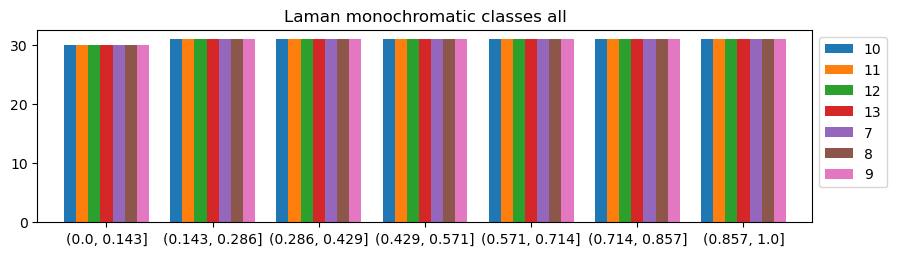

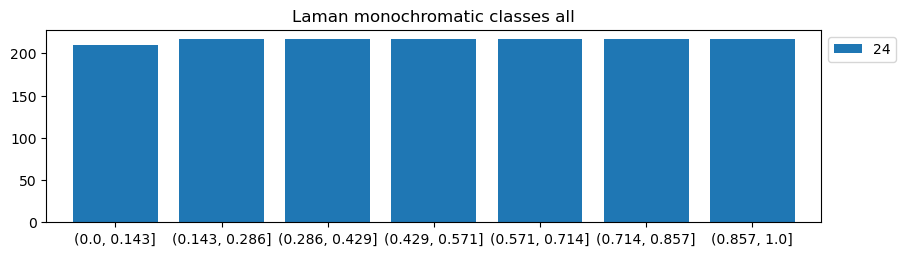

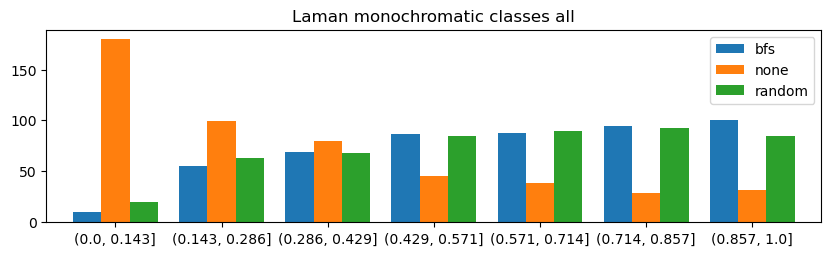

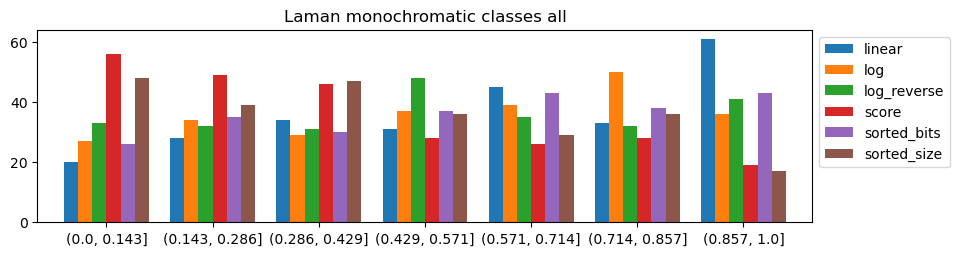

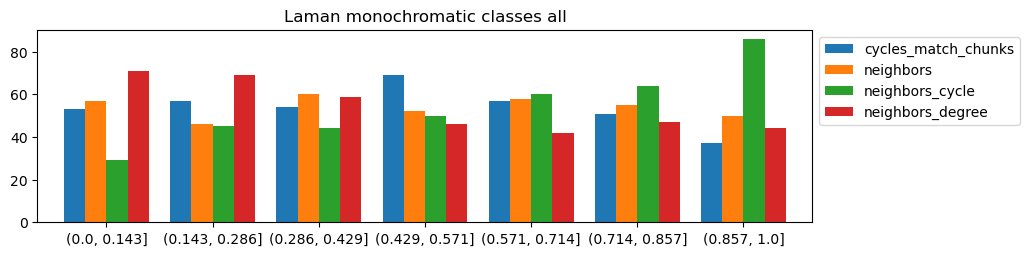

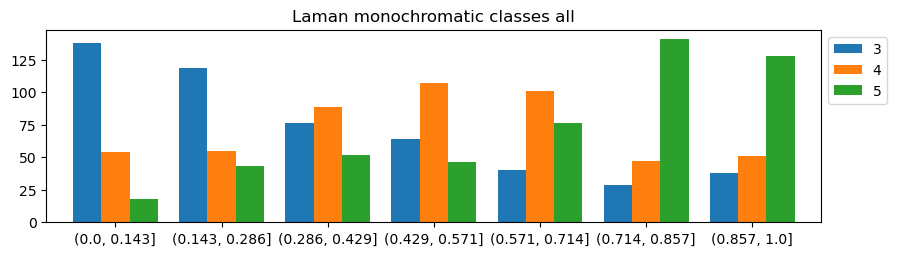

In [42]:
input = """
--------------------------------------------------------------------------------
Name (time in ms)                                                                                                     Min                   Max                  Mean            StdDev                Median               IQR            Outliers     OPS            Rounds  Iterations
--------------------------------------------------------------------------------

test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]             285.3971 (1.0)        285.3971 (1.0)        285.3971 (1.0)      0.0000 (1.0)        285.3971 (1.0)      0.0000 (1.0)           0;0  3.5039 (1.0)           1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_degree-3-smart]                   293.5017 (1.03)       293.5017 (1.03)       293.5017 (1.03)     0.0000 (1.0)        293.5017 (1.03)     0.0000 (1.0)           0;0  3.4071 (0.97)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-cycles_match_chunks-3-smart]                296.8856 (1.04)       296.8856 (1.04)       296.8856 (1.04)     0.0000 (1.0)        296.8856 (1.04)     0.0000 (1.0)           0;0  3.3683 (0.96)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]           297.6944 (1.04)       297.6944 (1.04)       297.6944 (1.04)     0.0000 (1.0)        297.6944 (1.04)     0.0000 (1.0)           0;0  3.3592 (0.96)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]             297.7555 (1.04)       297.7555 (1.04)       297.7555 (1.04)     0.0000 (1.0)        297.7555 (1.04)     0.0000 (1.0)           0;0  3.3585 (0.96)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]          298.5984 (1.05)       298.5984 (1.05)       298.5984 (1.05)     0.0000 (1.0)        298.5984 (1.05)     0.0000 (1.0)           0;0  3.3490 (0.96)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors-3-smart]                    299.4332 (1.05)       299.4332 (1.05)       299.4332 (1.05)     0.0000 (1.0)        299.4332 (1.05)     0.0000 (1.0)           0;0  3.3396 (0.95)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors-3-smart]                          300.7188 (1.05)       300.7188 (1.05)       300.7188 (1.05)     0.0000 (1.0)        300.7188 (1.05)     0.0000 (1.0)           0;0  3.3254 (0.95)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]        302.5809 (1.06)       302.5809 (1.06)       302.5809 (1.06)     0.0000 (1.0)        302.5809 (1.06)     0.0000 (1.0)           0;0  3.3049 (0.94)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-cycles_match_chunks-3-smart]                  303.1080 (1.06)       303.1080 (1.06)       303.1080 (1.06)     0.0000 (1.0)        303.1080 (1.06)     0.0000 (1.0)           0;0  3.2992 (0.94)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-cycles_match_chunks-3-smart]              305.2496 (1.07)       305.2496 (1.07)       305.2496 (1.07)     0.0000 (1.0)        305.2496 (1.07)     0.0000 (1.0)           0;0  3.2760 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]             305.4776 (1.07)       305.4776 (1.07)       305.4776 (1.07)     0.0000 (1.0)        305.4776 (1.07)     0.0000 (1.0)           0;0  3.2736 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_cycle-3-smart]                    305.7351 (1.07)       305.7351 (1.07)       305.7351 (1.07)     0.0000 (1.0)        305.7351 (1.07)     0.0000 (1.0)           0;0  3.2708 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        306.1307 (1.07)       306.1307 (1.07)       306.1307 (1.07)     0.0000 (1.0)        306.1307 (1.07)     0.0000 (1.0)           0;0  3.2666 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]          306.1970 (1.07)       306.1970 (1.07)       306.1970 (1.07)     0.0000 (1.0)        306.1970 (1.07)     0.0000 (1.0)           0;0  3.2659 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]          306.8761 (1.08)       306.8761 (1.08)       306.8761 (1.08)     0.0000 (1.0)        306.8761 (1.08)     0.0000 (1.0)           0;0  3.2586 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_degree-3-smart]                      307.1067 (1.08)       307.1067 (1.08)       307.1067 (1.08)     0.0000 (1.0)        307.1067 (1.08)     0.0000 (1.0)           0;0  3.2562 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]           307.8896 (1.08)       307.8896 (1.08)       307.8896 (1.08)     0.0000 (1.0)        307.8896 (1.08)     0.0000 (1.0)           0;0  3.2479 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]              307.9847 (1.08)       307.9847 (1.08)       307.9847 (1.08)     0.0000 (1.0)        307.9847 (1.08)     0.0000 (1.0)           0;0  3.2469 (0.93)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_cycle-3-smart]                  309.0957 (1.08)       309.0957 (1.08)       309.0957 (1.08)     0.0000 (1.0)        309.0957 (1.08)     0.0000 (1.0)           0;0  3.2352 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors-3-smart]                    309.6673 (1.09)       309.6673 (1.09)       309.6673 (1.09)     0.0000 (1.0)        309.6673 (1.09)     0.0000 (1.0)           0;0  3.2293 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-cycles_match_chunks-3-smart]               309.6932 (1.09)       309.6932 (1.09)       309.6932 (1.09)     0.0000 (1.0)        309.6932 (1.09)     0.0000 (1.0)           0;0  3.2290 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]                 309.9065 (1.09)       309.9065 (1.09)       309.9065 (1.09)     0.0000 (1.0)        309.9065 (1.09)     0.0000 (1.0)           0;0  3.2268 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]              310.0118 (1.09)       310.0118 (1.09)       310.0118 (1.09)     0.0000 (1.0)        310.0118 (1.09)     0.0000 (1.0)           0;0  3.2257 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]           310.3935 (1.09)       310.3935 (1.09)       310.3935 (1.09)     0.0000 (1.0)        310.3935 (1.09)     0.0000 (1.0)           0;0  3.2217 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors-3-smart]                  310.5143 (1.09)       310.5143 (1.09)       310.5143 (1.09)     0.0000 (1.0)        310.5143 (1.09)     0.0000 (1.0)           0;0  3.2205 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]              310.6645 (1.09)       310.6645 (1.09)       310.6645 (1.09)     0.0000 (1.0)        310.6645 (1.09)     0.0000 (1.0)           0;0  3.2189 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_degree-3-smart]                    310.8339 (1.09)       310.8339 (1.09)       310.8339 (1.09)     0.0000 (1.0)        310.8339 (1.09)     0.0000 (1.0)           0;0  3.2172 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors-3-smart]                         311.0518 (1.09)       311.0518 (1.09)       311.0518 (1.09)     0.0000 (1.0)        311.0518 (1.09)     0.0000 (1.0)           0;0  3.2149 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                   311.1356 (1.09)       311.1356 (1.09)       311.1356 (1.09)     0.0000 (1.0)        311.1356 (1.09)     0.0000 (1.0)           0;0  3.2140 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]        311.2239 (1.09)       311.2239 (1.09)       311.2239 (1.09)     0.0000 (1.0)        311.2239 (1.09)     0.0000 (1.0)           0;0  3.2131 (0.92)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors-3-smart]                  312.3960 (1.09)       312.3960 (1.09)       312.3960 (1.09)     0.0000 (1.0)        312.3960 (1.09)     0.0000 (1.0)           0;0  3.2011 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_cycle-3-smart]                   312.6269 (1.10)       312.6269 (1.10)       312.6269 (1.10)     0.0000 (1.0)        312.6269 (1.10)     0.0000 (1.0)           0;0  3.1987 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_degree-3-smart]                   313.1053 (1.10)       313.1053 (1.10)       313.1053 (1.10)     0.0000 (1.0)        313.1053 (1.10)     0.0000 (1.0)           0;0  3.1938 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors-3-smart]                           313.3852 (1.10)       313.3852 (1.10)       313.3852 (1.10)     0.0000 (1.0)        313.3852 (1.10)     0.0000 (1.0)           0;0  3.1910 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-cycles_match_chunks-3-smart]             313.4358 (1.10)       313.4358 (1.10)       313.4358 (1.10)     0.0000 (1.0)        313.4358 (1.10)     0.0000 (1.0)           0;0  3.1904 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]                313.6810 (1.10)       313.6810 (1.10)       313.6810 (1.10)     0.0000 (1.0)        313.6810 (1.10)     0.0000 (1.0)           0;0  3.1880 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                   314.0332 (1.10)       314.0332 (1.10)       314.0332 (1.10)     0.0000 (1.0)        314.0332 (1.10)     0.0000 (1.0)           0;0  3.1844 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]              314.1050 (1.10)       314.1050 (1.10)       314.1050 (1.10)     0.0000 (1.0)        314.1050 (1.10)     0.0000 (1.0)           0;0  3.1836 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]            314.1406 (1.10)       314.1406 (1.10)       314.1406 (1.10)     0.0000 (1.0)        314.1406 (1.10)     0.0000 (1.0)           0;0  3.1833 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors-3-smart]                        314.5047 (1.10)       314.5047 (1.10)       314.5047 (1.10)     0.0000 (1.0)        314.5047 (1.10)     0.0000 (1.0)           0;0  3.1796 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]           314.7607 (1.10)       314.7607 (1.10)       314.7607 (1.10)     0.0000 (1.0)        314.7607 (1.10)     0.0000 (1.0)           0;0  3.1770 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors-3-smart]                    315.0706 (1.10)       315.0706 (1.10)       315.0706 (1.10)     0.0000 (1.0)        315.0706 (1.10)     0.0000 (1.0)           0;0  3.1739 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]              315.1612 (1.10)       315.1612 (1.10)       315.1612 (1.10)     0.0000 (1.0)        315.1612 (1.10)     0.0000 (1.0)           0;0  3.1730 (0.91)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]           315.7773 (1.11)       315.7773 (1.11)       315.7773 (1.11)     0.0000 (1.0)        315.7773 (1.11)     0.0000 (1.0)           0;0  3.1668 (0.90)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors-3-smart]                       316.2238 (1.11)       316.2238 (1.11)       316.2238 (1.11)     0.0000 (1.0)        316.2238 (1.11)     0.0000 (1.0)           0;0  3.1623 (0.90)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_cycle-3-smart]                 316.7536 (1.11)       316.7536 (1.11)       316.7536 (1.11)     0.0000 (1.0)        316.7536 (1.11)     0.0000 (1.0)           0;0  3.1570 (0.90)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]            317.0293 (1.11)       317.0293 (1.11)       317.0293 (1.11)     0.0000 (1.0)        317.0293 (1.11)     0.0000 (1.0)           0;0  3.1543 (0.90)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_degree-3-smart]                     319.1567 (1.12)       319.1567 (1.12)       319.1567 (1.12)     0.0000 (1.0)        319.1567 (1.12)     0.0000 (1.0)           0;0  3.1333 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]            319.5366 (1.12)       319.5366 (1.12)       319.5366 (1.12)     0.0000 (1.0)        319.5366 (1.12)     0.0000 (1.0)           0;0  3.1295 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors-3-smart]                          320.4990 (1.12)       320.4990 (1.12)       320.4990 (1.12)     0.0000 (1.0)        320.4990 (1.12)     0.0000 (1.0)           0;0  3.1201 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]               320.6439 (1.12)       320.6439 (1.12)       320.6439 (1.12)     0.0000 (1.0)        320.6439 (1.12)     0.0000 (1.0)           0;0  3.1187 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors-3-smart]                          320.7434 (1.12)       320.7434 (1.12)       320.7434 (1.12)     0.0000 (1.0)        320.7434 (1.12)     0.0000 (1.0)           0;0  3.1178 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors-3-smart]                            320.9448 (1.12)       320.9448 (1.12)       320.9448 (1.12)     0.0000 (1.0)        320.9448 (1.12)     0.0000 (1.0)           0;0  3.1158 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]           322.3417 (1.13)       322.3417 (1.13)       322.3417 (1.13)     0.0000 (1.0)        322.3417 (1.13)     0.0000 (1.0)           0;0  3.1023 (0.89)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                     322.9671 (1.13)       322.9671 (1.13)       322.9671 (1.13)     0.0000 (1.0)        322.9671 (1.13)     0.0000 (1.0)           0;0  3.0963 (0.88)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                     323.6465 (1.13)       323.6465 (1.13)       323.6465 (1.13)     0.0000 (1.0)        323.6465 (1.13)     0.0000 (1.0)           0;0  3.0898 (0.88)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-cycles_match_chunks-3-smart]                324.0812 (1.14)       324.0812 (1.14)       324.0812 (1.14)     0.0000 (1.0)        324.0812 (1.14)     0.0000 (1.0)           0;0  3.0856 (0.88)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                     326.8328 (1.15)       326.8328 (1.15)       326.8328 (1.15)     0.0000 (1.0)        326.8328 (1.15)     0.0000 (1.0)           0;0  3.0597 (0.87)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                       326.8436 (1.15)       326.8436 (1.15)       326.8436 (1.15)     0.0000 (1.0)        326.8436 (1.15)     0.0000 (1.0)           0;0  3.0596 (0.87)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_degree-3-smart]                330.6533 (1.16)       330.6533 (1.16)       330.6533 (1.16)     0.0000 (1.0)        330.6533 (1.16)     0.0000 (1.0)           0;0  3.0243 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_cycle-3-smart]                      330.6966 (1.16)       330.6966 (1.16)       330.6966 (1.16)     0.0000 (1.0)        330.6966 (1.16)     0.0000 (1.0)           0;0  3.0239 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                     331.0192 (1.16)       331.0192 (1.16)       331.0192 (1.16)     0.0000 (1.0)        331.0192 (1.16)     0.0000 (1.0)           0;0  3.0210 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors-3-smart]                  333.8139 (1.17)       333.8139 (1.17)       333.8139 (1.17)     0.0000 (1.0)        333.8139 (1.17)     0.0000 (1.0)           0;0  2.9957 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors-3-smart]                             336.8535 (1.18)       336.8535 (1.18)       336.8535 (1.18)     0.0000 (1.0)        336.8535 (1.18)     0.0000 (1.0)           0;0  2.9686 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                    339.0971 (1.19)       339.0971 (1.19)       339.0971 (1.19)     0.0000 (1.0)        339.0971 (1.19)     0.0000 (1.0)           0;0  2.9490 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]               340.5327 (1.19)       340.5327 (1.19)       340.5327 (1.19)     0.0000 (1.0)        340.5327 (1.19)     0.0000 (1.0)           0;0  2.9366 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_cycle-3-smart]                    346.8786 (1.22)       346.8786 (1.22)       346.8786 (1.22)     0.0000 (1.0)        346.8786 (1.22)     0.0000 (1.0)           0;0  2.8829 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_degree-3-smart]                  455.6772 (1.60)       455.6772 (1.60)       455.6772 (1.60)     0.0000 (1.0)        455.6772 (1.60)     0.0000 (1.0)           0;0  2.1945 (0.63)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_degree-3-smart]                 500.8755 (1.76)       500.8755 (1.76)       500.8755 (1.76)     0.0000 (1.0)        500.8755 (1.76)     0.0000 (1.0)           0;0  1.9965 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]              507.7033 (1.78)       507.7033 (1.78)       507.7033 (1.78)     0.0000 (1.0)        507.7033 (1.78)     0.0000 (1.0)           0;0  1.9697 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]               523.2478 (1.83)       523.2478 (1.83)       523.2478 (1.83)     0.0000 (1.0)        523.2478 (1.83)     0.0000 (1.0)           0;0  1.9111 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-cycles_match_chunks-5-smart]                671.0092 (2.35)       671.0092 (2.35)       671.0092 (2.35)     0.0000 (1.0)        671.0092 (2.35)     0.0000 (1.0)           0;0  1.4903 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_degree-4-smart]                   672.2020 (2.36)       672.2020 (2.36)       672.2020 (2.36)     0.0000 (1.0)        672.2020 (2.36)     0.0000 (1.0)           0;0  1.4876 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_degree-5-smart]                   672.7449 (2.36)       672.7449 (2.36)       672.7449 (2.36)     0.0000 (1.0)        672.7449 (2.36)     0.0000 (1.0)           0;0  1.4864 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-cycles_match_chunks-4-smart]                674.2942 (2.36)       674.2942 (2.36)       674.2942 (2.36)     0.0000 (1.0)        674.2942 (2.36)     0.0000 (1.0)           0;0  1.4830 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors-4-smart]                          677.9725 (2.38)       677.9725 (2.38)       677.9725 (2.38)     0.0000 (1.0)        677.9725 (2.38)     0.0000 (1.0)           0;0  1.4750 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]              680.4613 (2.38)       680.4613 (2.38)       680.4613 (2.38)     0.0000 (1.0)        680.4613 (2.38)     0.0000 (1.0)           0;0  1.4696 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]              680.6898 (2.39)       680.6898 (2.39)       680.6898 (2.39)     0.0000 (1.0)        680.6898 (2.39)     0.0000 (1.0)           0;0  1.4691 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-cycles_match_chunks-5-smart]               681.2154 (2.39)       681.2154 (2.39)       681.2154 (2.39)     0.0000 (1.0)        681.2154 (2.39)     0.0000 (1.0)           0;0  1.4680 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_cycle-5-smart]                    681.7670 (2.39)       681.7670 (2.39)       681.7670 (2.39)     0.0000 (1.0)        681.7670 (2.39)     0.0000 (1.0)           0;0  1.4668 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors-4-smart]                         682.5793 (2.39)       682.5793 (2.39)       682.5793 (2.39)     0.0000 (1.0)        682.5793 (2.39)     0.0000 (1.0)           0;0  1.4650 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-cycles_match_chunks-4-smart]               682.6445 (2.39)       682.6445 (2.39)       682.6445 (2.39)     0.0000 (1.0)        682.6445 (2.39)     0.0000 (1.0)           0;0  1.4649 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors-5-smart]                    682.6907 (2.39)       682.6907 (2.39)       682.6907 (2.39)     0.0000 (1.0)        682.6907 (2.39)     0.0000 (1.0)           0;0  1.4648 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]          683.8906 (2.40)       683.8906 (2.40)       683.8906 (2.40)     0.0000 (1.0)        683.8906 (2.40)     0.0000 (1.0)           0;0  1.4622 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_degree-5-smart]                  684.6623 (2.40)       684.6623 (2.40)       684.6623 (2.40)     0.0000 (1.0)        684.6623 (2.40)     0.0000 (1.0)           0;0  1.4606 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]             684.7443 (2.40)       684.7443 (2.40)       684.7443 (2.40)     0.0000 (1.0)        684.7443 (2.40)     0.0000 (1.0)           0;0  1.4604 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]        686.2062 (2.40)       686.2062 (2.40)       686.2062 (2.40)     0.0000 (1.0)        686.2062 (2.40)     0.0000 (1.0)           0;0  1.4573 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_degree-4-smart]                  686.8570 (2.41)       686.8570 (2.41)       686.8570 (2.41)     0.0000 (1.0)        686.8570 (2.41)     0.0000 (1.0)           0;0  1.4559 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors-5-smart]                    687.2244 (2.41)       687.2244 (2.41)       687.2244 (2.41)     0.0000 (1.0)        687.2244 (2.41)     0.0000 (1.0)           0;0  1.4551 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors-4-smart]                    687.3073 (2.41)       687.3073 (2.41)       687.3073 (2.41)     0.0000 (1.0)        687.3073 (2.41)     0.0000 (1.0)           0;0  1.4550 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]             687.5167 (2.41)       687.5167 (2.41)       687.5167 (2.41)     0.0000 (1.0)        687.5167 (2.41)     0.0000 (1.0)           0;0  1.4545 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]          687.8961 (2.41)       687.8961 (2.41)       687.8961 (2.41)     0.0000 (1.0)        687.8961 (2.41)     0.0000 (1.0)           0;0  1.4537 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]           688.0441 (2.41)       688.0441 (2.41)       688.0441 (2.41)     0.0000 (1.0)        688.0441 (2.41)     0.0000 (1.0)           0;0  1.4534 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]        689.3827 (2.42)       689.3827 (2.42)       689.3827 (2.42)     0.0000 (1.0)        689.3827 (2.42)     0.0000 (1.0)           0;0  1.4506 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_degree-5-smart]                 690.4016 (2.42)       690.4016 (2.42)       690.4016 (2.42)     0.0000 (1.0)        690.4016 (2.42)     0.0000 (1.0)           0;0  1.4484 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]             690.6344 (2.42)       690.6344 (2.42)       690.6344 (2.42)     0.0000 (1.0)        690.6344 (2.42)     0.0000 (1.0)           0;0  1.4479 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_cycle-4-smart]                  691.1506 (2.42)       691.1506 (2.42)       691.1506 (2.42)     0.0000 (1.0)        691.1506 (2.42)     0.0000 (1.0)           0;0  1.4469 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors-4-smart]                        691.2706 (2.42)       691.2706 (2.42)       691.2706 (2.42)     0.0000 (1.0)        691.2706 (2.42)     0.0000 (1.0)           0;0  1.4466 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-cycles_match_chunks-5-smart]              691.3399 (2.42)       691.3399 (2.42)       691.3399 (2.42)     0.0000 (1.0)        691.3399 (2.42)     0.0000 (1.0)           0;0  1.4465 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_cycle-5-smart]                   691.5095 (2.42)       691.5095 (2.42)       691.5095 (2.42)     0.0000 (1.0)        691.5095 (2.42)     0.0000 (1.0)           0;0  1.4461 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        692.0293 (2.42)       692.0293 (2.42)       692.0293 (2.42)     0.0000 (1.0)        692.0293 (2.42)     0.0000 (1.0)           0;0  1.4450 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_cycle-5-smart]                  692.0685 (2.42)       692.0685 (2.42)       692.0685 (2.42)     0.0000 (1.0)        692.0685 (2.42)     0.0000 (1.0)           0;0  1.4449 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]           692.1239 (2.43)       692.1239 (2.43)       692.1239 (2.43)     0.0000 (1.0)        692.1239 (2.43)     0.0000 (1.0)           0;0  1.4448 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                     692.2902 (2.43)       692.2902 (2.43)       692.2902 (2.43)     0.0000 (1.0)        692.2902 (2.43)     0.0000 (1.0)           0;0  1.4445 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-cycles_match_chunks-4-smart]             692.8173 (2.43)       692.8173 (2.43)       692.8173 (2.43)     0.0000 (1.0)        692.8173 (2.43)     0.0000 (1.0)           0;0  1.4434 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]             693.0057 (2.43)       693.0057 (2.43)       693.0057 (2.43)     0.0000 (1.0)        693.0057 (2.43)     0.0000 (1.0)           0;0  1.4430 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors-4-smart]                  693.2773 (2.43)       693.2773 (2.43)       693.2773 (2.43)     0.0000 (1.0)        693.2773 (2.43)     0.0000 (1.0)           0;0  1.4424 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]                 693.4460 (2.43)       693.4460 (2.43)       693.4460 (2.43)     0.0000 (1.0)        693.4460 (2.43)     0.0000 (1.0)           0;0  1.4421 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-cycles_match_chunks-4-smart]              693.5443 (2.43)       693.5443 (2.43)       693.5443 (2.43)     0.0000 (1.0)        693.5443 (2.43)     0.0000 (1.0)           0;0  1.4419 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors-5-smart]                          693.6253 (2.43)       693.6253 (2.43)       693.6253 (2.43)     0.0000 (1.0)        693.6253 (2.43)     0.0000 (1.0)           0;0  1.4417 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]             693.6694 (2.43)       693.6694 (2.43)       693.6694 (2.43)     0.0000 (1.0)        693.6694 (2.43)     0.0000 (1.0)           0;0  1.4416 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]              694.3475 (2.43)       694.3475 (2.43)       694.3475 (2.43)     0.0000 (1.0)        694.3475 (2.43)     0.0000 (1.0)           0;0  1.4402 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors_cycle-4-smart]                   694.4504 (2.43)       694.4504 (2.43)       694.4504 (2.43)     0.0000 (1.0)        694.4504 (2.43)     0.0000 (1.0)           0;0  1.4400 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]            694.7552 (2.43)       694.7552 (2.43)       694.7552 (2.43)     0.0000 (1.0)        694.7552 (2.43)     0.0000 (1.0)           0;0  1.4394 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                   695.3268 (2.44)       695.3268 (2.44)       695.3268 (2.44)     0.0000 (1.0)        695.3268 (2.44)     0.0000 (1.0)           0;0  1.4382 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]              695.8339 (2.44)       695.8339 (2.44)       695.8339 (2.44)     0.0000 (1.0)        695.8339 (2.44)     0.0000 (1.0)           0;0  1.4371 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]        695.9430 (2.44)       695.9430 (2.44)       695.9430 (2.44)     0.0000 (1.0)        695.9430 (2.44)     0.0000 (1.0)           0;0  1.4369 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors-5-smart]                  695.9805 (2.44)       695.9805 (2.44)       695.9805 (2.44)     0.0000 (1.0)        695.9805 (2.44)     0.0000 (1.0)           0;0  1.4368 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                   696.0167 (2.44)       696.0167 (2.44)       696.0167 (2.44)     0.0000 (1.0)        696.0167 (2.44)     0.0000 (1.0)           0;0  1.4367 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]          696.0590 (2.44)       696.0590 (2.44)       696.0590 (2.44)     0.0000 (1.0)        696.0590 (2.44)     0.0000 (1.0)           0;0  1.4367 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors-5-smart]                  696.1737 (2.44)       696.1737 (2.44)       696.1737 (2.44)     0.0000 (1.0)        696.1737 (2.44)     0.0000 (1.0)           0;0  1.4364 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors-5-smart]                  696.5063 (2.44)       696.5063 (2.44)       696.5063 (2.44)     0.0000 (1.0)        696.5063 (2.44)     0.0000 (1.0)           0;0  1.4357 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]              696.7570 (2.44)       696.7570 (2.44)       696.7570 (2.44)     0.0000 (1.0)        696.7570 (2.44)     0.0000 (1.0)           0;0  1.4352 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                696.7668 (2.44)       696.7668 (2.44)       696.7668 (2.44)     0.0000 (1.0)        696.7668 (2.44)     0.0000 (1.0)           0;0  1.4352 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]            696.9660 (2.44)       696.9660 (2.44)       696.9660 (2.44)     0.0000 (1.0)        696.9660 (2.44)     0.0000 (1.0)           0;0  1.4348 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]            697.3129 (2.44)       697.3129 (2.44)       697.3129 (2.44)     0.0000 (1.0)        697.3129 (2.44)     0.0000 (1.0)           0;0  1.4341 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors-5-smart]                        697.4645 (2.44)       697.4645 (2.44)       697.4645 (2.44)     0.0000 (1.0)        697.4645 (2.44)     0.0000 (1.0)           0;0  1.4338 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-cycles_match_chunks-5-smart]                  697.6534 (2.44)       697.6534 (2.44)       697.6534 (2.44)     0.0000 (1.0)        697.6534 (2.44)     0.0000 (1.0)           0;0  1.4334 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors-4-smart]                  697.8932 (2.45)       697.8932 (2.45)       697.8932 (2.45)     0.0000 (1.0)        697.8932 (2.45)     0.0000 (1.0)           0;0  1.4329 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]        698.0036 (2.45)       698.0036 (2.45)       698.0036 (2.45)     0.0000 (1.0)        698.0036 (2.45)     0.0000 (1.0)           0;0  1.4327 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]             698.4473 (2.45)       698.4473 (2.45)       698.4473 (2.45)     0.0000 (1.0)        698.4473 (2.45)     0.0000 (1.0)           0;0  1.4317 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-linear-neighbors-5-smart]                         698.4840 (2.45)       698.4840 (2.45)       698.4840 (2.45)     0.0000 (1.0)        698.4840 (2.45)     0.0000 (1.0)           0;0  1.4317 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]               698.5127 (2.45)       698.5127 (2.45)       698.5127 (2.45)     0.0000 (1.0)        698.5127 (2.45)     0.0000 (1.0)           0;0  1.4316 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-cycles_match_chunks-4-smart]                  698.6307 (2.45)       698.6307 (2.45)       698.6307 (2.45)     0.0000 (1.0)        698.6307 (2.45)     0.0000 (1.0)           0;0  1.4314 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                       699.0317 (2.45)       699.0317 (2.45)       699.0317 (2.45)     0.0000 (1.0)        699.0317 (2.45)     0.0000 (1.0)           0;0  1.4306 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_degree-4-smart]                      699.0554 (2.45)       699.0554 (2.45)       699.0554 (2.45)     0.0000 (1.0)        699.0554 (2.45)     0.0000 (1.0)           0;0  1.4305 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]          699.4406 (2.45)       699.4406 (2.45)       699.4406 (2.45)     0.0000 (1.0)        699.4406 (2.45)     0.0000 (1.0)           0;0  1.4297 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        699.4542 (2.45)       699.4542 (2.45)       699.4542 (2.45)     0.0000 (1.0)        699.4542 (2.45)     0.0000 (1.0)           0;0  1.4297 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                   699.4654 (2.45)       699.4654 (2.45)       699.4654 (2.45)     0.0000 (1.0)        699.4654 (2.45)     0.0000 (1.0)           0;0  1.4297 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors-4-smart]                  699.6657 (2.45)       699.6657 (2.45)       699.6657 (2.45)     0.0000 (1.0)        699.6657 (2.45)     0.0000 (1.0)           0;0  1.4293 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors-4-smart]                             699.8250 (2.45)       699.8250 (2.45)       699.8250 (2.45)     0.0000 (1.0)        699.8250 (2.45)     0.0000 (1.0)           0;0  1.4289 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                     700.4260 (2.45)       700.4260 (2.45)       700.4260 (2.45)     0.0000 (1.0)        700.4260 (2.45)     0.0000 (1.0)           0;0  1.4277 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]            700.4471 (2.45)       700.4471 (2.45)       700.4471 (2.45)     0.0000 (1.0)        700.4471 (2.45)     0.0000 (1.0)           0;0  1.4277 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]            700.6137 (2.45)       700.6137 (2.45)       700.6137 (2.45)     0.0000 (1.0)        700.6137 (2.45)     0.0000 (1.0)           0;0  1.4273 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]           701.3074 (2.46)       701.3074 (2.46)       701.3074 (2.46)     0.0000 (1.0)        701.3074 (2.46)     0.0000 (1.0)           0;0  1.4259 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors-4-smart]                           701.6153 (2.46)       701.6153 (2.46)       701.6153 (2.46)     0.0000 (1.0)        701.6153 (2.46)     0.0000 (1.0)           0;0  1.4253 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]           701.7735 (2.46)       701.7735 (2.46)       701.7735 (2.46)     0.0000 (1.0)        701.7735 (2.46)     0.0000 (1.0)           0;0  1.4250 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_degree-4-smart]                    701.8970 (2.46)       701.8970 (2.46)       701.8970 (2.46)     0.0000 (1.0)        701.8970 (2.46)     0.0000 (1.0)           0;0  1.4247 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                     702.0992 (2.46)       702.0992 (2.46)       702.0992 (2.46)     0.0000 (1.0)        702.0992 (2.46)     0.0000 (1.0)           0;0  1.4243 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                   702.4893 (2.46)       702.4893 (2.46)       702.4893 (2.46)     0.0000 (1.0)        702.4893 (2.46)     0.0000 (1.0)           0;0  1.4235 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]           702.7524 (2.46)       702.7524 (2.46)       702.7524 (2.46)     0.0000 (1.0)        702.7524 (2.46)     0.0000 (1.0)           0;0  1.4230 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]           702.9535 (2.46)       702.9535 (2.46)       702.9535 (2.46)     0.0000 (1.0)        702.9535 (2.46)     0.0000 (1.0)           0;0  1.4226 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]           703.2967 (2.46)       703.2967 (2.46)       703.2967 (2.46)     0.0000 (1.0)        703.2967 (2.46)     0.0000 (1.0)           0;0  1.4219 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]                703.7177 (2.47)       703.7177 (2.47)       703.7177 (2.47)     0.0000 (1.0)        703.7177 (2.47)     0.0000 (1.0)           0;0  1.4210 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                       703.9475 (2.47)       703.9475 (2.47)       703.9475 (2.47)     0.0000 (1.0)        703.9475 (2.47)     0.0000 (1.0)           0;0  1.4206 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-score-neighbors_degree-4-smart]                 704.4044 (2.47)       704.4044 (2.47)       704.4044 (2.47)     0.0000 (1.0)        704.4044 (2.47)     0.0000 (1.0)           0;0  1.4196 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_cycle-5-smart]                 704.5322 (2.47)       704.5322 (2.47)       704.5322 (2.47)     0.0000 (1.0)        704.5322 (2.47)     0.0000 (1.0)           0;0  1.4194 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]          704.6198 (2.47)       704.6198 (2.47)       704.6198 (2.47)     0.0000 (1.0)        704.6198 (2.47)     0.0000 (1.0)           0;0  1.4192 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                     704.6834 (2.47)       704.6834 (2.47)       704.6834 (2.47)     0.0000 (1.0)        704.6834 (2.47)     0.0000 (1.0)           0;0  1.4191 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                     704.9758 (2.47)       704.9758 (2.47)       704.9758 (2.47)     0.0000 (1.0)        704.9758 (2.47)     0.0000 (1.0)           0;0  1.4185 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors-5-smart]                          705.2545 (2.47)       705.2545 (2.47)       705.2545 (2.47)     0.0000 (1.0)        705.2545 (2.47)     0.0000 (1.0)           0;0  1.4179 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors-4-smart]                            705.2881 (2.47)       705.2881 (2.47)       705.2881 (2.47)     0.0000 (1.0)        705.2881 (2.47)     0.0000 (1.0)           0;0  1.4179 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_degree-5-smart]                   705.4340 (2.47)       705.4340 (2.47)       705.4340 (2.47)     0.0000 (1.0)        705.4340 (2.47)     0.0000 (1.0)           0;0  1.4176 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]           705.5621 (2.47)       705.5621 (2.47)       705.5621 (2.47)     0.0000 (1.0)        705.5621 (2.47)     0.0000 (1.0)           0;0  1.4173 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_degree-5-smart]                    705.9419 (2.47)       705.9419 (2.47)       705.9419 (2.47)     0.0000 (1.0)        705.9419 (2.47)     0.0000 (1.0)           0;0  1.4165 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_degree-5-smart]                706.6054 (2.48)       706.6054 (2.48)       706.6054 (2.48)     0.0000 (1.0)        706.6054 (2.48)     0.0000 (1.0)           0;0  1.4152 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]           706.6708 (2.48)       706.6708 (2.48)       706.6708 (2.48)     0.0000 (1.0)        706.6708 (2.48)     0.0000 (1.0)           0;0  1.4151 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                     707.2569 (2.48)       707.2569 (2.48)       707.2569 (2.48)     0.0000 (1.0)        707.2569 (2.48)     0.0000 (1.0)           0;0  1.4139 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-cycles_match_chunks-5-smart]             707.3379 (2.48)       707.3379 (2.48)       707.3379 (2.48)     0.0000 (1.0)        707.3379 (2.48)     0.0000 (1.0)           0;0  1.4138 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                    707.5115 (2.48)       707.5115 (2.48)       707.5115 (2.48)     0.0000 (1.0)        707.5115 (2.48)     0.0000 (1.0)           0;0  1.4134 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors-5-smart]                             707.5326 (2.48)       707.5326 (2.48)       707.5326 (2.48)     0.0000 (1.0)        707.5326 (2.48)     0.0000 (1.0)           0;0  1.4134 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_degree-5-smart]                     707.6238 (2.48)       707.6238 (2.48)       707.6238 (2.48)     0.0000 (1.0)        707.6238 (2.48)     0.0000 (1.0)           0;0  1.4132 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]              707.6548 (2.48)       707.6548 (2.48)       707.6548 (2.48)     0.0000 (1.0)        707.6548 (2.48)     0.0000 (1.0)           0;0  1.4131 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]              708.3897 (2.48)       708.3897 (2.48)       708.3897 (2.48)     0.0000 (1.0)        708.3897 (2.48)     0.0000 (1.0)           0;0  1.4117 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                     708.8422 (2.48)       708.8422 (2.48)       708.8422 (2.48)     0.0000 (1.0)        708.8422 (2.48)     0.0000 (1.0)           0;0  1.4108 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors-5-smart]                            709.6444 (2.49)       709.6444 (2.49)       709.6444 (2.49)     0.0000 (1.0)        709.6444 (2.49)     0.0000 (1.0)           0;0  1.4092 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                    709.6688 (2.49)       709.6688 (2.49)       709.6688 (2.49)     0.0000 (1.0)        709.6688 (2.49)     0.0000 (1.0)           0;0  1.4091 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]              710.0780 (2.49)       710.0780 (2.49)       710.0780 (2.49)     0.0000 (1.0)        710.0780 (2.49)     0.0000 (1.0)           0;0  1.4083 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]               710.1685 (2.49)       710.1685 (2.49)       710.1685 (2.49)     0.0000 (1.0)        710.1685 (2.49)     0.0000 (1.0)           0;0  1.4081 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log-neighbors_degree-5-smart]                      710.3179 (2.49)       710.3179 (2.49)       710.3179 (2.49)     0.0000 (1.0)        710.3179 (2.49)     0.0000 (1.0)           0;0  1.4078 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                     710.7984 (2.49)       710.7984 (2.49)       710.7984 (2.49)     0.0000 (1.0)        710.7984 (2.49)     0.0000 (1.0)           0;0  1.4069 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]           713.2540 (2.50)       713.2540 (2.50)       713.2540 (2.50)     0.0000 (1.0)        713.2540 (2.50)     0.0000 (1.0)           0;0  1.4020 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-neighbors-5-smart]                           713.7161 (2.50)       713.7161 (2.50)       713.7161 (2.50)     0.0000 (1.0)        713.7161 (2.50)     0.0000 (1.0)           0;0  1.4011 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_cycle-5-smart]                    713.9099 (2.50)       713.9099 (2.50)       713.9099 (2.50)     0.0000 (1.0)        713.9099 (2.50)     0.0000 (1.0)           0;0  1.4007 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]              714.6722 (2.50)       714.6722 (2.50)       714.6722 (2.50)     0.0000 (1.0)        714.6722 (2.50)     0.0000 (1.0)           0;0  1.3992 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors-4-smart]                          714.9393 (2.51)       714.9393 (2.51)       714.9393 (2.51)     0.0000 (1.0)        714.9393 (2.51)     0.0000 (1.0)           0;0  1.3987 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]               715.0589 (2.51)       715.0589 (2.51)       715.0589 (2.51)     0.0000 (1.0)        715.0589 (2.51)     0.0000 (1.0)           0;0  1.3985 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]              715.6321 (2.51)       715.6321 (2.51)       715.6321 (2.51)     0.0000 (1.0)        715.6321 (2.51)     0.0000 (1.0)           0;0  1.3974 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_cycle-4-smart]                 715.8122 (2.51)       715.8122 (2.51)       715.8122 (2.51)     0.0000 (1.0)        715.8122 (2.51)     0.0000 (1.0)           0;0  1.3970 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]              715.9443 (2.51)       715.9443 (2.51)       715.9443 (2.51)     0.0000 (1.0)        715.9443 (2.51)     0.0000 (1.0)           0;0  1.3968 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors-4-smart]                          721.8330 (2.53)       721.8330 (2.53)       721.8330 (2.53)     0.0000 (1.0)        721.8330 (2.53)     0.0000 (1.0)           0;0  1.3854 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]            722.5158 (2.53)       722.5158 (2.53)       722.5158 (2.53)     0.0000 (1.0)        722.5158 (2.53)     0.0000 (1.0)           0;0  1.3841 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-score-neighbors_cycle-4-smart]                    724.1540 (2.54)       724.1540 (2.54)       724.1540 (2.54)     0.0000 (1.0)        724.1540 (2.54)     0.0000 (1.0)           0;0  1.3809 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-linear-neighbors-5-smart]                          725.9280 (2.54)       725.9280 (2.54)       725.9280 (2.54)     0.0000 (1.0)        725.9280 (2.54)     0.0000 (1.0)           0;0  1.3775 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]           727.8222 (2.55)       727.8222 (2.55)       727.8222 (2.55)     0.0000 (1.0)        727.8222 (2.55)     0.0000 (1.0)           0;0  1.3740 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_cycle-4-smart]                    728.4719 (2.55)       728.4719 (2.55)       728.4719 (2.55)     0.0000 (1.0)        728.4719 (2.55)     0.0000 (1.0)           0;0  1.3727 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_cycle-4-smart]                      728.7085 (2.55)       728.7085 (2.55)       728.7085 (2.55)     0.0000 (1.0)        728.7085 (2.55)     0.0000 (1.0)           0;0  1.3723 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_cycle-5-smart]                      729.2186 (2.56)       729.2186 (2.56)       729.2186 (2.56)     0.0000 (1.0)        729.2186 (2.56)     0.0000 (1.0)           0;0  1.3713 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors_degree-4-smart]                729.3004 (2.56)       729.3004 (2.56)       729.3004 (2.56)     0.0000 (1.0)        729.3004 (2.56)     0.0000 (1.0)           0;0  1.3712 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]               729.5506 (2.56)       729.5506 (2.56)       729.5506 (2.56)     0.0000 (1.0)        729.5506 (2.56)     0.0000 (1.0)           0;0  1.3707 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-log-neighbors_degree-4-smart]                     730.5332 (2.56)       730.5332 (2.56)       730.5332 (2.56)     0.0000 (1.0)        730.5332 (2.56)     0.0000 (1.0)           0;0  1.3689 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-neighbors_degree-4-smart]                   732.7595 (2.57)       732.7595 (2.57)       732.7595 (2.57)     0.0000 (1.0)        732.7595 (2.57)     0.0000 (1.0)           0;0  1.3647 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]               734.4683 (2.57)       734.4683 (2.57)       734.4683 (2.57)     0.0000 (1.0)        734.4683 (2.57)     0.0000 (1.0)           0;0  1.3615 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors-5-smart]                       737.7709 (2.59)       737.7709 (2.59)       737.7709 (2.59)     0.0000 (1.0)        737.7709 (2.59)     0.0000 (1.0)           0;0  1.3554 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-cycles_match_chunks-4-smart]                739.6346 (2.59)       739.6346 (2.59)       739.6346 (2.59)     0.0000 (1.0)        739.6346 (2.59)     0.0000 (1.0)           0;0  1.3520 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]              746.7062 (2.62)       746.7062 (2.62)       746.7062 (2.62)     0.0000 (1.0)        746.7062 (2.62)     0.0000 (1.0)           0;0  1.3392 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_size-neighbors-4-smart]                    747.2988 (2.62)       747.2988 (2.62)       747.2988 (2.62)     0.0000 (1.0)        747.2988 (2.62)     0.0000 (1.0)           0;0  1.3382 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          749.9070 (2.63)       749.9070 (2.63)       749.9070 (2.63)     0.0000 (1.0)        749.9070 (2.63)     0.0000 (1.0)           0;0  1.3335 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors-5-smart]                    750.5172 (2.63)       750.5172 (2.63)       750.5172 (2.63)     0.0000 (1.0)        750.5172 (2.63)     0.0000 (1.0)           0;0  1.3324 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]               751.5707 (2.63)       751.5707 (2.63)       751.5707 (2.63)     0.0000 (1.0)        751.5707 (2.63)     0.0000 (1.0)           0;0  1.3305 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log-cycles_match_chunks-5-smart]                764.6001 (2.68)       764.6001 (2.68)       764.6001 (2.68)     0.0000 (1.0)        764.6001 (2.68)     0.0000 (1.0)           0;0  1.3079 (0.37)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]           772.2915 (2.71)       772.2915 (2.71)       772.2915 (2.71)     0.0000 (1.0)        772.2915 (2.71)     0.0000 (1.0)           0;0  1.2948 (0.37)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-none-subgraphs-sorted_bits-neighbors-4-smart]                    781.3056 (2.74)       781.3056 (2.74)       781.3056 (2.74)     0.0000 (1.0)        781.3056 (2.74)     0.0000 (1.0)           0;0  1.2799 (0.37)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-random-subgraphs-linear-neighbors-4-smart]                       881.9439 (3.09)       881.9439 (3.09)       881.9439 (3.09)     0.0000 (1.0)        881.9439 (3.09)     0.0000 (1.0)           0;0  1.1339 (0.32)          1           1
test_bench_NAC_colorings_laman_classes_all[7-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]                 902.8556 (3.16)       902.8556 (3.16)       902.8556 (3.16)     0.0000 (1.0)        902.8556 (3.16)     0.0000 (1.0)           0;0  1.1076 (0.32)          1           1

test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors-3-smart]                          325.5120 (1.14)       325.5120 (1.14)       325.5120 (1.14)     0.0000 (1.0)        325.5120 (1.14)     0.0000 (1.0)           0;0  3.0721 (0.88)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors-3-smart]                    326.7836 (1.15)       326.7836 (1.15)       326.7836 (1.15)     0.0000 (1.0)        326.7836 (1.15)     0.0000 (1.0)           0;0  3.0601 (0.87)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]          329.3570 (1.15)       329.3570 (1.15)       329.3570 (1.15)     0.0000 (1.0)        329.3570 (1.15)     0.0000 (1.0)           0;0  3.0362 (0.87)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_degree-4-smart]                   329.9375 (1.16)       329.9375 (1.16)       329.9375 (1.16)     0.0000 (1.0)        329.9375 (1.16)     0.0000 (1.0)           0;0  3.0309 (0.87)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-cycles_match_chunks-3-smart]                330.9265 (1.16)       330.9265 (1.16)       330.9265 (1.16)     0.0000 (1.0)        330.9265 (1.16)     0.0000 (1.0)           0;0  3.0218 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]             330.9562 (1.16)       330.9562 (1.16)       330.9562 (1.16)     0.0000 (1.0)        330.9562 (1.16)     0.0000 (1.0)           0;0  3.0215 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors-3-smart]                    331.5484 (1.16)       331.5484 (1.16)       331.5484 (1.16)     0.0000 (1.0)        331.5484 (1.16)     0.0000 (1.0)           0;0  3.0162 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]             331.6775 (1.16)       331.6775 (1.16)       331.6775 (1.16)     0.0000 (1.0)        331.6775 (1.16)     0.0000 (1.0)           0;0  3.0150 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]          331.9727 (1.16)       331.9727 (1.16)       331.9727 (1.16)     0.0000 (1.0)        331.9727 (1.16)     0.0000 (1.0)           0;0  3.0123 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors-4-smart]                    332.4699 (1.16)       332.4699 (1.16)       332.4699 (1.16)     0.0000 (1.0)        332.4699 (1.16)     0.0000 (1.0)           0;0  3.0078 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors-4-smart]                          332.6677 (1.17)       332.6677 (1.17)       332.6677 (1.17)     0.0000 (1.0)        332.6677 (1.17)     0.0000 (1.0)           0;0  3.0060 (0.86)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors-4-smart]                            333.9873 (1.17)       333.9873 (1.17)       333.9873 (1.17)     0.0000 (1.0)        333.9873 (1.17)     0.0000 (1.0)           0;0  2.9941 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          334.1922 (1.17)       334.1922 (1.17)       334.1922 (1.17)     0.0000 (1.0)        334.1922 (1.17)     0.0000 (1.0)           0;0  2.9923 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors-3-smart]                    334.9922 (1.17)       334.9922 (1.17)       334.9922 (1.17)     0.0000 (1.0)        334.9922 (1.17)     0.0000 (1.0)           0;0  2.9851 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]             334.9980 (1.17)       334.9980 (1.17)       334.9980 (1.17)     0.0000 (1.0)        334.9980 (1.17)     0.0000 (1.0)           0;0  2.9851 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-cycles_match_chunks-4-smart]               335.0260 (1.17)       335.0260 (1.17)       335.0260 (1.17)     0.0000 (1.0)        335.0260 (1.17)     0.0000 (1.0)           0;0  2.9848 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_degree-4-smart]                  335.7935 (1.18)       335.7935 (1.18)       335.7935 (1.18)     0.0000 (1.0)        335.7935 (1.18)     0.0000 (1.0)           0;0  2.9780 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]             336.1713 (1.18)       336.1713 (1.18)       336.1713 (1.18)     0.0000 (1.0)        336.1713 (1.18)     0.0000 (1.0)           0;0  2.9747 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_degree-3-smart]                     336.5475 (1.18)       336.5475 (1.18)       336.5475 (1.18)     0.0000 (1.0)        336.5475 (1.18)     0.0000 (1.0)           0;0  2.9713 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors-4-smart]                         336.6504 (1.18)       336.6504 (1.18)       336.6504 (1.18)     0.0000 (1.0)        336.6504 (1.18)     0.0000 (1.0)           0;0  2.9704 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]          337.3142 (1.18)       337.3142 (1.18)       337.3142 (1.18)     0.0000 (1.0)        337.3142 (1.18)     0.0000 (1.0)           0;0  2.9646 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_cycle-3-smart]                      337.4516 (1.18)       337.4516 (1.18)       337.4516 (1.18)     0.0000 (1.0)        337.4516 (1.18)     0.0000 (1.0)           0;0  2.9634 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-cycles_match_chunks-3-smart]               337.4987 (1.18)       337.4987 (1.18)       337.4987 (1.18)     0.0000 (1.0)        337.4987 (1.18)     0.0000 (1.0)           0;0  2.9630 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_degree-3-smart]                  337.5706 (1.18)       337.5706 (1.18)       337.5706 (1.18)     0.0000 (1.0)        337.5706 (1.18)     0.0000 (1.0)           0;0  2.9623 (0.85)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors-4-smart]                    338.0007 (1.18)       338.0007 (1.18)       338.0007 (1.18)     0.0000 (1.0)        338.0007 (1.18)     0.0000 (1.0)           0;0  2.9586 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]             338.3299 (1.19)       338.3299 (1.19)       338.3299 (1.19)     0.0000 (1.0)        338.3299 (1.19)     0.0000 (1.0)           0;0  2.9557 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_cycle-4-smart]                    338.3522 (1.19)       338.3522 (1.19)       338.3522 (1.19)     0.0000 (1.0)        338.3522 (1.19)     0.0000 (1.0)           0;0  2.9555 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-cycles_match_chunks-4-smart]                338.5569 (1.19)       338.5569 (1.19)       338.5569 (1.19)     0.0000 (1.0)        338.5569 (1.19)     0.0000 (1.0)           0;0  2.9537 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]              338.7577 (1.19)       338.7577 (1.19)       338.7577 (1.19)     0.0000 (1.0)        338.7577 (1.19)     0.0000 (1.0)           0;0  2.9520 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_degree-3-smart]                   339.0113 (1.19)       339.0113 (1.19)       339.0113 (1.19)     0.0000 (1.0)        339.0113 (1.19)     0.0000 (1.0)           0;0  2.9498 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]          339.9816 (1.19)       339.9816 (1.19)       339.9816 (1.19)     0.0000 (1.0)        339.9816 (1.19)     0.0000 (1.0)           0;0  2.9413 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-cycles_match_chunks-3-smart]                  340.1296 (1.19)       340.1296 (1.19)       340.1296 (1.19)     0.0000 (1.0)        340.1296 (1.19)     0.0000 (1.0)           0;0  2.9401 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors-4-smart]                    341.0469 (1.19)       341.0469 (1.19)       341.0469 (1.19)     0.0000 (1.0)        341.0469 (1.19)     0.0000 (1.0)           0;0  2.9321 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]              341.2285 (1.20)       341.2285 (1.20)       341.2285 (1.20)     0.0000 (1.0)        341.2285 (1.20)     0.0000 (1.0)           0;0  2.9306 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors-4-smart]                  341.3271 (1.20)       341.3271 (1.20)       341.3271 (1.20)     0.0000 (1.0)        341.3271 (1.20)     0.0000 (1.0)           0;0  2.9297 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]              341.6985 (1.20)       341.6985 (1.20)       341.6985 (1.20)     0.0000 (1.0)        341.6985 (1.20)     0.0000 (1.0)           0;0  2.9266 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_cycle-4-smart]                      341.7627 (1.20)       341.7627 (1.20)       341.7627 (1.20)     0.0000 (1.0)        341.7627 (1.20)     0.0000 (1.0)           0;0  2.9260 (0.84)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-cycles_match_chunks-4-smart]                  342.1510 (1.20)       342.1510 (1.20)       342.1510 (1.20)     0.0000 (1.0)        342.1510 (1.20)     0.0000 (1.0)           0;0  2.9227 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_cycle-3-smart]                    342.1621 (1.20)       342.1621 (1.20)       342.1621 (1.20)     0.0000 (1.0)        342.1621 (1.20)     0.0000 (1.0)           0;0  2.9226 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]              342.8216 (1.20)       342.8216 (1.20)       342.8216 (1.20)     0.0000 (1.0)        342.8216 (1.20)     0.0000 (1.0)           0;0  2.9170 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors-3-smart]                        344.1002 (1.21)       344.1002 (1.21)       344.1002 (1.21)     0.0000 (1.0)        344.1002 (1.21)     0.0000 (1.0)           0;0  2.9061 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-cycles_match_chunks-4-smart]              344.4562 (1.21)       344.4562 (1.21)       344.4562 (1.21)     0.0000 (1.0)        344.4562 (1.21)     0.0000 (1.0)           0;0  2.9031 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                     345.3824 (1.21)       345.3824 (1.21)       345.3824 (1.21)     0.0000 (1.0)        345.3824 (1.21)     0.0000 (1.0)           0;0  2.8953 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_degree-4-smart]                     345.3988 (1.21)       345.3988 (1.21)       345.3988 (1.21)     0.0000 (1.0)        345.3988 (1.21)     0.0000 (1.0)           0;0  2.8952 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]              345.4967 (1.21)       345.4967 (1.21)       345.4967 (1.21)     0.0000 (1.0)        345.4967 (1.21)     0.0000 (1.0)           0;0  2.8944 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]              345.6078 (1.21)       345.6078 (1.21)       345.6078 (1.21)     0.0000 (1.0)        345.6078 (1.21)     0.0000 (1.0)           0;0  2.8935 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]              345.9318 (1.21)       345.9318 (1.21)       345.9318 (1.21)     0.0000 (1.0)        345.9318 (1.21)     0.0000 (1.0)           0;0  2.8907 (0.83)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors-3-smart]                         347.0410 (1.22)       347.0410 (1.22)       347.0410 (1.22)     0.0000 (1.0)        347.0410 (1.22)     0.0000 (1.0)           0;0  2.8815 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]           347.2963 (1.22)       347.2963 (1.22)       347.2963 (1.22)     0.0000 (1.0)        347.2963 (1.22)     0.0000 (1.0)           0;0  2.8794 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors-3-smart]                            347.5095 (1.22)       347.5095 (1.22)       347.5095 (1.22)     0.0000 (1.0)        347.5095 (1.22)     0.0000 (1.0)           0;0  2.8776 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]           347.6034 (1.22)       347.6034 (1.22)       347.6034 (1.22)     0.0000 (1.0)        347.6034 (1.22)     0.0000 (1.0)           0;0  2.8768 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_cycle-4-smart]                   347.6701 (1.22)       347.6701 (1.22)       347.6701 (1.22)     0.0000 (1.0)        347.6701 (1.22)     0.0000 (1.0)           0;0  2.8763 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]           347.8746 (1.22)       347.8746 (1.22)       347.8746 (1.22)     0.0000 (1.0)        347.8746 (1.22)     0.0000 (1.0)           0;0  2.8746 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]        348.6542 (1.22)       348.6542 (1.22)       348.6542 (1.22)     0.0000 (1.0)        348.6542 (1.22)     0.0000 (1.0)           0;0  2.8682 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors-3-smart]                  349.2190 (1.22)       349.2190 (1.22)       349.2190 (1.22)     0.0000 (1.0)        349.2190 (1.22)     0.0000 (1.0)           0;0  2.8635 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_degree-4-smart]                      349.5229 (1.22)       349.5229 (1.22)       349.5229 (1.22)     0.0000 (1.0)        349.5229 (1.22)     0.0000 (1.0)           0;0  2.8610 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors-3-smart]                  350.1290 (1.23)       350.1290 (1.23)       350.1290 (1.23)     0.0000 (1.0)        350.1290 (1.23)     0.0000 (1.0)           0;0  2.8561 (0.82)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]            350.2539 (1.23)       350.2539 (1.23)       350.2539 (1.23)     0.0000 (1.0)        350.2539 (1.23)     0.0000 (1.0)           0;0  2.8551 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]        350.3630 (1.23)       350.3630 (1.23)       350.3630 (1.23)     0.0000 (1.0)        350.3630 (1.23)     0.0000 (1.0)           0;0  2.8542 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]              350.5815 (1.23)       350.5815 (1.23)       350.5815 (1.23)     0.0000 (1.0)        350.5815 (1.23)     0.0000 (1.0)           0;0  2.8524 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]          350.7989 (1.23)       350.7989 (1.23)       350.7989 (1.23)     0.0000 (1.0)        350.7989 (1.23)     0.0000 (1.0)           0;0  2.8506 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors-4-smart]                  352.0594 (1.23)       352.0594 (1.23)       352.0594 (1.23)     0.0000 (1.0)        352.0594 (1.23)     0.0000 (1.0)           0;0  2.8404 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_degree-3-smart]                    352.1945 (1.23)       352.1945 (1.23)       352.1945 (1.23)     0.0000 (1.0)        352.1945 (1.23)     0.0000 (1.0)           0;0  2.8393 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_cycle-3-smart]                   352.6089 (1.24)       352.6089 (1.24)       352.6089 (1.24)     0.0000 (1.0)        352.6089 (1.24)     0.0000 (1.0)           0;0  2.8360 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]           353.1618 (1.24)       353.1618 (1.24)       353.1618 (1.24)     0.0000 (1.0)        353.1618 (1.24)     0.0000 (1.0)           0;0  2.8316 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors-4-smart]                             353.8320 (1.24)       353.8320 (1.24)       353.8320 (1.24)     0.0000 (1.0)        353.8320 (1.24)     0.0000 (1.0)           0;0  2.8262 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                     354.0741 (1.24)       354.0741 (1.24)       354.0741 (1.24)     0.0000 (1.0)        354.0741 (1.24)     0.0000 (1.0)           0;0  2.8243 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                     354.1120 (1.24)       354.1120 (1.24)       354.1120 (1.24)     0.0000 (1.0)        354.1120 (1.24)     0.0000 (1.0)           0;0  2.8240 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]           354.3951 (1.24)       354.3951 (1.24)       354.3951 (1.24)     0.0000 (1.0)        354.3951 (1.24)     0.0000 (1.0)           0;0  2.8217 (0.81)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        354.7311 (1.24)       354.7311 (1.24)       354.7311 (1.24)     0.0000 (1.0)        354.7311 (1.24)     0.0000 (1.0)           0;0  2.8190 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_degree-4-smart]                 354.7492 (1.24)       354.7492 (1.24)       354.7492 (1.24)     0.0000 (1.0)        354.7492 (1.24)     0.0000 (1.0)           0;0  2.8189 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_degree-3-smart]                 354.9237 (1.24)       354.9237 (1.24)       354.9237 (1.24)     0.0000 (1.0)        354.9237 (1.24)     0.0000 (1.0)           0;0  2.8175 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                   354.9845 (1.24)       354.9845 (1.24)       354.9845 (1.24)     0.0000 (1.0)        354.9845 (1.24)     0.0000 (1.0)           0;0  2.8170 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors-4-smart]                  354.9996 (1.24)       354.9996 (1.24)       354.9996 (1.24)     0.0000 (1.0)        354.9996 (1.24)     0.0000 (1.0)           0;0  2.8169 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                   355.1676 (1.24)       355.1676 (1.24)       355.1676 (1.24)     0.0000 (1.0)        355.1676 (1.24)     0.0000 (1.0)           0;0  2.8156 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]        355.1837 (1.24)       355.1837 (1.24)       355.1837 (1.24)     0.0000 (1.0)        355.1837 (1.24)     0.0000 (1.0)           0;0  2.8154 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors-3-smart]                          355.6412 (1.25)       355.6412 (1.25)       355.6412 (1.25)     0.0000 (1.0)        355.6412 (1.25)     0.0000 (1.0)           0;0  2.8118 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors-3-smart]                          355.6670 (1.25)       355.6670 (1.25)       355.6670 (1.25)     0.0000 (1.0)        355.6670 (1.25)     0.0000 (1.0)           0;0  2.8116 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors-3-smart]                             356.0948 (1.25)       356.0948 (1.25)       356.0948 (1.25)     0.0000 (1.0)        356.0948 (1.25)     0.0000 (1.0)           0;0  2.8082 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors-4-smart]                        356.4322 (1.25)       356.4322 (1.25)       356.4322 (1.25)     0.0000 (1.0)        356.4322 (1.25)     0.0000 (1.0)           0;0  2.8056 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]              356.6421 (1.25)       356.6421 (1.25)       356.6421 (1.25)     0.0000 (1.0)        356.6421 (1.25)     0.0000 (1.0)           0;0  2.8039 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]                 356.8154 (1.25)       356.8154 (1.25)       356.8154 (1.25)     0.0000 (1.0)        356.8154 (1.25)     0.0000 (1.0)           0;0  2.8026 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_cycle-3-smart]                  357.0986 (1.25)       357.0986 (1.25)       357.0986 (1.25)     0.0000 (1.0)        357.0986 (1.25)     0.0000 (1.0)           0;0  2.8003 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]           357.1570 (1.25)       357.1570 (1.25)       357.1570 (1.25)     0.0000 (1.0)        357.1570 (1.25)     0.0000 (1.0)           0;0  2.7999 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]            357.4529 (1.25)       357.4529 (1.25)       357.4529 (1.25)     0.0000 (1.0)        357.4529 (1.25)     0.0000 (1.0)           0;0  2.7976 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors-4-smart]                       357.5425 (1.25)       357.5425 (1.25)       357.5425 (1.25)     0.0000 (1.0)        357.5425 (1.25)     0.0000 (1.0)           0;0  2.7969 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_degree-4-smart]                   358.2523 (1.26)       358.2523 (1.26)       358.2523 (1.26)     0.0000 (1.0)        358.2523 (1.26)     0.0000 (1.0)           0;0  2.7913 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]            358.2815 (1.26)       358.2815 (1.26)       358.2815 (1.26)     0.0000 (1.0)        358.2815 (1.26)     0.0000 (1.0)           0;0  2.7911 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-cycles_match_chunks-4-smart]                358.3585 (1.26)       358.3585 (1.26)       358.3585 (1.26)     0.0000 (1.0)        358.3585 (1.26)     0.0000 (1.0)           0;0  2.7905 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]               358.8465 (1.26)       358.8465 (1.26)       358.8465 (1.26)     0.0000 (1.0)        358.8465 (1.26)     0.0000 (1.0)           0;0  2.7867 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                   358.9718 (1.26)       358.9718 (1.26)       358.9718 (1.26)     0.0000 (1.0)        358.9718 (1.26)     0.0000 (1.0)           0;0  2.7857 (0.80)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                358.9978 (1.26)       358.9978 (1.26)       358.9978 (1.26)     0.0000 (1.0)        358.9978 (1.26)     0.0000 (1.0)           0;0  2.7855 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                     359.8040 (1.26)       359.8040 (1.26)       359.8040 (1.26)     0.0000 (1.0)        359.8040 (1.26)     0.0000 (1.0)           0;0  2.7793 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]           359.8539 (1.26)       359.8539 (1.26)       359.8539 (1.26)     0.0000 (1.0)        359.8539 (1.26)     0.0000 (1.0)           0;0  2.7789 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]               360.1873 (1.26)       360.1873 (1.26)       360.1873 (1.26)     0.0000 (1.0)        360.1873 (1.26)     0.0000 (1.0)           0;0  2.7763 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors-4-smart]                           360.2200 (1.26)       360.2200 (1.26)       360.2200 (1.26)     0.0000 (1.0)        360.2200 (1.26)     0.0000 (1.0)           0;0  2.7761 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_degree-3-smart]                      361.1431 (1.27)       361.1431 (1.27)       361.1431 (1.27)     0.0000 (1.0)        361.1431 (1.27)     0.0000 (1.0)           0;0  2.7690 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_cycle-4-smart]                    361.3125 (1.27)       361.3125 (1.27)       361.3125 (1.27)     0.0000 (1.0)        361.3125 (1.27)     0.0000 (1.0)           0;0  2.7677 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_degree-3-smart]                   361.5557 (1.27)       361.5557 (1.27)       361.5557 (1.27)     0.0000 (1.0)        361.5557 (1.27)     0.0000 (1.0)           0;0  2.7658 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]              361.5569 (1.27)       361.5569 (1.27)       361.5569 (1.27)     0.0000 (1.0)        361.5569 (1.27)     0.0000 (1.0)           0;0  2.7658 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]           361.8695 (1.27)       361.8695 (1.27)       361.8695 (1.27)     0.0000 (1.0)        361.8695 (1.27)     0.0000 (1.0)           0;0  2.7634 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                   362.5724 (1.27)       362.5724 (1.27)       362.5724 (1.27)     0.0000 (1.0)        362.5724 (1.27)     0.0000 (1.0)           0;0  2.7581 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                       363.0693 (1.27)       363.0693 (1.27)       363.0693 (1.27)     0.0000 (1.0)        363.0693 (1.27)     0.0000 (1.0)           0;0  2.7543 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors-3-smart]                  363.1293 (1.27)       363.1293 (1.27)       363.1293 (1.27)     0.0000 (1.0)        363.1293 (1.27)     0.0000 (1.0)           0;0  2.7538 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]            363.2134 (1.27)       363.2134 (1.27)       363.2134 (1.27)     0.0000 (1.0)        363.2134 (1.27)     0.0000 (1.0)           0;0  2.7532 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]        363.2716 (1.27)       363.2716 (1.27)       363.2716 (1.27)     0.0000 (1.0)        363.2716 (1.27)     0.0000 (1.0)           0;0  2.7528 (0.79)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                     363.9427 (1.28)       363.9427 (1.28)       363.9427 (1.28)     0.0000 (1.0)        363.9427 (1.28)     0.0000 (1.0)           0;0  2.7477 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors-4-smart]                          364.4871 (1.28)       364.4871 (1.28)       364.4871 (1.28)     0.0000 (1.0)        364.4871 (1.28)     0.0000 (1.0)           0;0  2.7436 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-cycles_match_chunks-3-smart]                364.7080 (1.28)       364.7080 (1.28)       364.7080 (1.28)     0.0000 (1.0)        364.7080 (1.28)     0.0000 (1.0)           0;0  2.7419 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]                 364.8292 (1.28)       364.8292 (1.28)       364.8292 (1.28)     0.0000 (1.0)        364.8292 (1.28)     0.0000 (1.0)           0;0  2.7410 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]           364.8527 (1.28)       364.8527 (1.28)       364.8527 (1.28)     0.0000 (1.0)        364.8527 (1.28)     0.0000 (1.0)           0;0  2.7408 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]           364.9315 (1.28)       364.9315 (1.28)       364.9315 (1.28)     0.0000 (1.0)        364.9315 (1.28)     0.0000 (1.0)           0;0  2.7402 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]              365.1406 (1.28)       365.1406 (1.28)       365.1406 (1.28)     0.0000 (1.0)        365.1406 (1.28)     0.0000 (1.0)           0;0  2.7387 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]           366.2452 (1.28)       366.2452 (1.28)       366.2452 (1.28)     0.0000 (1.0)        366.2452 (1.28)     0.0000 (1.0)           0;0  2.7304 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        367.2904 (1.29)       367.2904 (1.29)       367.2904 (1.29)     0.0000 (1.0)        367.2904 (1.29)     0.0000 (1.0)           0;0  2.7226 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]            367.5485 (1.29)       367.5485 (1.29)       367.5485 (1.29)     0.0000 (1.0)        367.5485 (1.29)     0.0000 (1.0)           0;0  2.7207 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]            368.1191 (1.29)       368.1191 (1.29)       368.1191 (1.29)     0.0000 (1.0)        368.1191 (1.29)     0.0000 (1.0)           0;0  2.7165 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]           368.2430 (1.29)       368.2430 (1.29)       368.2430 (1.29)     0.0000 (1.0)        368.2430 (1.29)     0.0000 (1.0)           0;0  2.7156 (0.78)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors-3-smart]                           368.3344 (1.29)       368.3344 (1.29)       368.3344 (1.29)     0.0000 (1.0)        368.3344 (1.29)     0.0000 (1.0)           0;0  2.7149 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_degree-4-smart]                    368.6131 (1.29)       368.6131 (1.29)       368.6131 (1.29)     0.0000 (1.0)        368.6131 (1.29)     0.0000 (1.0)           0;0  2.7129 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_cycle-3-smart]                    370.2282 (1.30)       370.2282 (1.30)       370.2282 (1.30)     0.0000 (1.0)        370.2282 (1.30)     0.0000 (1.0)           0;0  2.7010 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-cycles_match_chunks-4-smart]             371.0881 (1.30)       371.0881 (1.30)       371.0881 (1.30)     0.0000 (1.0)        371.0881 (1.30)     0.0000 (1.0)           0;0  2.6948 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-cycles_match_chunks-3-smart]             371.2860 (1.30)       371.2860 (1.30)       371.2860 (1.30)     0.0000 (1.0)        371.2860 (1.30)     0.0000 (1.0)           0;0  2.6933 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                    371.5418 (1.30)       371.5418 (1.30)       371.5418 (1.30)     0.0000 (1.0)        371.5418 (1.30)     0.0000 (1.0)           0;0  2.6915 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                     372.3980 (1.30)       372.3980 (1.30)       372.3980 (1.30)     0.0000 (1.0)        372.3980 (1.30)     0.0000 (1.0)           0;0  2.6853 (0.77)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]               374.4342 (1.31)       374.4342 (1.31)       374.4342 (1.31)     0.0000 (1.0)        374.4342 (1.31)     0.0000 (1.0)           0;0  2.6707 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                     375.0965 (1.31)       375.0965 (1.31)       375.0965 (1.31)     0.0000 (1.0)        375.0965 (1.31)     0.0000 (1.0)           0;0  2.6660 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]               375.4772 (1.32)       375.4772 (1.32)       375.4772 (1.32)     0.0000 (1.0)        375.4772 (1.32)     0.0000 (1.0)           0;0  2.6633 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                       375.9311 (1.32)       375.9311 (1.32)       375.9311 (1.32)     0.0000 (1.0)        375.9311 (1.32)     0.0000 (1.0)           0;0  2.6601 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]                376.2701 (1.32)       376.2701 (1.32)       376.2701 (1.32)     0.0000 (1.0)        376.2701 (1.32)     0.0000 (1.0)           0;0  2.6577 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors-4-smart]                          376.5550 (1.32)       376.5550 (1.32)       376.5550 (1.32)     0.0000 (1.0)        376.5550 (1.32)     0.0000 (1.0)           0;0  2.6557 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_degree-3-smart]                376.5861 (1.32)       376.5861 (1.32)       376.5861 (1.32)     0.0000 (1.0)        376.5861 (1.32)     0.0000 (1.0)           0;0  2.6554 (0.76)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]               379.5426 (1.33)       379.5426 (1.33)       379.5426 (1.33)     0.0000 (1.0)        379.5426 (1.33)     0.0000 (1.0)           0;0  2.6348 (0.75)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                    380.3540 (1.33)       380.3540 (1.33)       380.3540 (1.33)     0.0000 (1.0)        380.3540 (1.33)     0.0000 (1.0)           0;0  2.6291 (0.75)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                     380.9525 (1.33)       380.9525 (1.33)       380.9525 (1.33)     0.0000 (1.0)        380.9525 (1.33)     0.0000 (1.0)           0;0  2.6250 (0.75)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]               384.3421 (1.35)       384.3421 (1.35)       384.3421 (1.35)     0.0000 (1.0)        384.3421 (1.35)     0.0000 (1.0)           0;0  2.6018 (0.74)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_degree-4-smart]                385.7450 (1.35)       385.7450 (1.35)       385.7450 (1.35)     0.0000 (1.0)        385.7450 (1.35)     0.0000 (1.0)           0;0  2.5924 (0.74)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_cycle-3-smart]                 386.8905 (1.36)       386.8905 (1.36)       386.8905 (1.36)     0.0000 (1.0)        386.8905 (1.36)     0.0000 (1.0)           0;0  2.5847 (0.74)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_cycle-4-smart]                  389.2502 (1.36)       389.2502 (1.36)       389.2502 (1.36)     0.0000 (1.0)        389.2502 (1.36)     0.0000 (1.0)           0;0  2.5690 (0.73)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_cycle-4-smart]                 410.5407 (1.44)       410.5407 (1.44)       410.5407 (1.44)     0.0000 (1.0)        410.5407 (1.44)     0.0000 (1.0)           0;0  2.4358 (0.70)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]             536.9130 (1.88)       536.9130 (1.88)       536.9130 (1.88)     0.0000 (1.0)        536.9130 (1.88)     0.0000 (1.0)           0;0  1.8625 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-cycles_match_chunks-3-smart]              552.5117 (1.94)       552.5117 (1.94)       552.5117 (1.94)     0.0000 (1.0)        552.5117 (1.94)     0.0000 (1.0)           0;0  1.8099 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors-3-smart]                       561.3196 (1.97)       561.3196 (1.97)       561.3196 (1.97)     0.0000 (1.0)        561.3196 (1.97)     0.0000 (1.0)           0;0  1.7815 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors-5-smart]                    561.6867 (1.97)       561.6867 (1.97)       561.6867 (1.97)     0.0000 (1.0)        561.6867 (1.97)     0.0000 (1.0)           0;0  1.7804 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors-5-smart]                          564.4129 (1.98)       564.4129 (1.98)       564.4129 (1.98)     0.0000 (1.0)        564.4129 (1.98)     0.0000 (1.0)           0;0  1.7718 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_degree-5-smart]                     566.4329 (1.98)       566.4329 (1.98)       566.4329 (1.98)     0.0000 (1.0)        566.4329 (1.98)     0.0000 (1.0)           0;0  1.7654 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]             566.5739 (1.99)       566.5739 (1.99)       566.5739 (1.99)     0.0000 (1.0)        566.5739 (1.99)     0.0000 (1.0)           0;0  1.7650 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]             567.2468 (1.99)       567.2468 (1.99)       567.2468 (1.99)     0.0000 (1.0)        567.2468 (1.99)     0.0000 (1.0)           0;0  1.7629 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]             568.4632 (1.99)       568.4632 (1.99)       568.4632 (1.99)     0.0000 (1.0)        568.4632 (1.99)     0.0000 (1.0)           0;0  1.7591 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors-5-smart]                         570.0366 (2.00)       570.0366 (2.00)       570.0366 (2.00)     0.0000 (1.0)        570.0366 (2.00)     0.0000 (1.0)           0;0  1.7543 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-cycles_match_chunks-5-smart]                  570.1286 (2.00)       570.1286 (2.00)       570.1286 (2.00)     0.0000 (1.0)        570.1286 (2.00)     0.0000 (1.0)           0;0  1.7540 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors-5-smart]                            570.9246 (2.00)       570.9246 (2.00)       570.9246 (2.00)     0.0000 (1.0)        570.9246 (2.00)     0.0000 (1.0)           0;0  1.7515 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_degree-5-smart]                  571.9233 (2.00)       571.9233 (2.00)       571.9233 (2.00)     0.0000 (1.0)        571.9233 (2.00)     0.0000 (1.0)           0;0  1.7485 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-cycles_match_chunks-5-smart]               571.9866 (2.00)       571.9866 (2.00)       571.9866 (2.00)     0.0000 (1.0)        571.9866 (2.00)     0.0000 (1.0)           0;0  1.7483 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors-5-smart]                    572.3137 (2.01)       572.3137 (2.01)       572.3137 (2.01)     0.0000 (1.0)        572.3137 (2.01)     0.0000 (1.0)           0;0  1.7473 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]              572.3679 (2.01)       572.3679 (2.01)       572.3679 (2.01)     0.0000 (1.0)        572.3679 (2.01)     0.0000 (1.0)           0;0  1.7471 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-cycles_match_chunks-5-smart]                573.2893 (2.01)       573.2893 (2.01)       573.2893 (2.01)     0.0000 (1.0)        573.2893 (2.01)     0.0000 (1.0)           0;0  1.7443 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_degree-5-smart]                   573.4375 (2.01)       573.4375 (2.01)       573.4375 (2.01)     0.0000 (1.0)        573.4375 (2.01)     0.0000 (1.0)           0;0  1.7439 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-score-neighbors_cycle-5-smart]                    574.5189 (2.01)       574.5189 (2.01)       574.5189 (2.01)     0.0000 (1.0)        574.5189 (2.01)     0.0000 (1.0)           0;0  1.7406 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]          575.7628 (2.02)       575.7628 (2.02)       575.7628 (2.02)     0.0000 (1.0)        575.7628 (2.02)     0.0000 (1.0)           0;0  1.7368 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]              577.5185 (2.02)       577.5185 (2.02)       577.5185 (2.02)     0.0000 (1.0)        577.5185 (2.02)     0.0000 (1.0)           0;0  1.7315 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log-neighbors_cycle-5-smart]                      577.5647 (2.02)       577.5647 (2.02)       577.5647 (2.02)     0.0000 (1.0)        577.5647 (2.02)     0.0000 (1.0)           0;0  1.7314 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]              577.5829 (2.02)       577.5829 (2.02)       577.5829 (2.02)     0.0000 (1.0)        577.5829 (2.02)     0.0000 (1.0)           0;0  1.7314 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors-5-smart]                  578.0076 (2.03)       578.0076 (2.03)       578.0076 (2.03)     0.0000 (1.0)        578.0076 (2.03)     0.0000 (1.0)           0;0  1.7301 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]              579.5193 (2.03)       579.5193 (2.03)       579.5193 (2.03)     0.0000 (1.0)        579.5193 (2.03)     0.0000 (1.0)           0;0  1.7256 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]        580.9366 (2.04)       580.9366 (2.04)       580.9366 (2.04)     0.0000 (1.0)        580.9366 (2.04)     0.0000 (1.0)           0;0  1.7214 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]           581.8336 (2.04)       581.8336 (2.04)       581.8336 (2.04)     0.0000 (1.0)        581.8336 (2.04)     0.0000 (1.0)           0;0  1.7187 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_degree-5-smart]                      581.9893 (2.04)       581.9893 (2.04)       581.9893 (2.04)     0.0000 (1.0)        581.9893 (2.04)     0.0000 (1.0)           0;0  1.7182 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-cycles_match_chunks-5-smart]              582.1813 (2.04)       582.1813 (2.04)       582.1813 (2.04)     0.0000 (1.0)        582.1813 (2.04)     0.0000 (1.0)           0;0  1.7177 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-linear-neighbors_cycle-5-smart]                   582.1903 (2.04)       582.1903 (2.04)       582.1903 (2.04)     0.0000 (1.0)        582.1903 (2.04)     0.0000 (1.0)           0;0  1.7177 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors-5-smart]                  582.6169 (2.04)       582.6169 (2.04)       582.6169 (2.04)     0.0000 (1.0)        582.6169 (2.04)     0.0000 (1.0)           0;0  1.7164 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]          583.5758 (2.04)       583.5758 (2.04)       583.5758 (2.04)     0.0000 (1.0)        583.5758 (2.04)     0.0000 (1.0)           0;0  1.7136 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]           583.7153 (2.05)       583.7153 (2.05)       583.7153 (2.05)     0.0000 (1.0)        583.7153 (2.05)     0.0000 (1.0)           0;0  1.7132 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]           584.6081 (2.05)       584.6081 (2.05)       584.6081 (2.05)     0.0000 (1.0)        584.6081 (2.05)     0.0000 (1.0)           0;0  1.7105 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-neighbors-5-smart]                    585.3592 (2.05)       585.3592 (2.05)       585.3592 (2.05)     0.0000 (1.0)        585.3592 (2.05)     0.0000 (1.0)           0;0  1.7084 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]              586.2283 (2.05)       586.2283 (2.05)       586.2283 (2.05)     0.0000 (1.0)        586.2283 (2.05)     0.0000 (1.0)           0;0  1.7058 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors-5-smart]                  586.2835 (2.05)       586.2835 (2.05)       586.2835 (2.05)     0.0000 (1.0)        586.2835 (2.05)     0.0000 (1.0)           0;0  1.7057 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]          586.3226 (2.05)       586.3226 (2.05)       586.3226 (2.05)     0.0000 (1.0)        586.3226 (2.05)     0.0000 (1.0)           0;0  1.7055 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                     587.1921 (2.06)       587.1921 (2.06)       587.1921 (2.06)     0.0000 (1.0)        587.1921 (2.06)     0.0000 (1.0)           0;0  1.7030 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]        587.3240 (2.06)       587.3240 (2.06)       587.3240 (2.06)     0.0000 (1.0)        587.3240 (2.06)     0.0000 (1.0)           0;0  1.7026 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_degree-5-smart]                 587.5712 (2.06)       587.5712 (2.06)       587.5712 (2.06)     0.0000 (1.0)        587.5712 (2.06)     0.0000 (1.0)           0;0  1.7019 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors-5-smart]                        588.6910 (2.06)       588.6910 (2.06)       588.6910 (2.06)     0.0000 (1.0)        588.6910 (2.06)     0.0000 (1.0)           0;0  1.6987 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]               592.2934 (2.08)       592.2934 (2.08)       592.2934 (2.08)     0.0000 (1.0)        592.2934 (2.08)     0.0000 (1.0)           0;0  1.6884 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        593.1165 (2.08)       593.1165 (2.08)       593.1165 (2.08)     0.0000 (1.0)        593.1165 (2.08)     0.0000 (1.0)           0;0  1.6860 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                   593.4050 (2.08)       593.4050 (2.08)       593.4050 (2.08)     0.0000 (1.0)        593.4050 (2.08)     0.0000 (1.0)           0;0  1.6852 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                   593.8984 (2.08)       593.8984 (2.08)       593.8984 (2.08)     0.0000 (1.0)        593.8984 (2.08)     0.0000 (1.0)           0;0  1.6838 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]           594.9103 (2.08)       594.9103 (2.08)       594.9103 (2.08)     0.0000 (1.0)        594.9103 (2.08)     0.0000 (1.0)           0;0  1.6809 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]           595.0073 (2.08)       595.0073 (2.08)       595.0073 (2.08)     0.0000 (1.0)        595.0073 (2.08)     0.0000 (1.0)           0;0  1.6807 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors-5-smart]                          597.9567 (2.10)       597.9567 (2.10)       597.9567 (2.10)     0.0000 (1.0)        597.9567 (2.10)     0.0000 (1.0)           0;0  1.6724 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]                 598.4040 (2.10)       598.4040 (2.10)       598.4040 (2.10)     0.0000 (1.0)        598.4040 (2.10)     0.0000 (1.0)           0;0  1.6711 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]              598.7137 (2.10)       598.7137 (2.10)       598.7137 (2.10)     0.0000 (1.0)        598.7137 (2.10)     0.0000 (1.0)           0;0  1.6702 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors-5-smart]                           598.7441 (2.10)       598.7441 (2.10)       598.7441 (2.10)     0.0000 (1.0)        598.7441 (2.10)     0.0000 (1.0)           0;0  1.6702 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]              599.3226 (2.10)       599.3226 (2.10)       599.3226 (2.10)     0.0000 (1.0)        599.3226 (2.10)     0.0000 (1.0)           0;0  1.6686 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]            600.4113 (2.10)       600.4113 (2.10)       600.4113 (2.10)     0.0000 (1.0)        600.4113 (2.10)     0.0000 (1.0)           0;0  1.6655 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                     600.7076 (2.10)       600.7076 (2.10)       600.7076 (2.10)     0.0000 (1.0)        600.7076 (2.10)     0.0000 (1.0)           0;0  1.6647 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                     601.3963 (2.11)       601.3963 (2.11)       601.3963 (2.11)     0.0000 (1.0)        601.3963 (2.11)     0.0000 (1.0)           0;0  1.6628 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-score-neighbors_cycle-5-smart]                  604.2974 (2.12)       604.2974 (2.12)       604.2974 (2.12)     0.0000 (1.0)        604.2974 (2.12)     0.0000 (1.0)           0;0  1.6548 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors-5-smart]                          605.7305 (2.12)       605.7305 (2.12)       605.7305 (2.12)     0.0000 (1.0)        605.7305 (2.12)     0.0000 (1.0)           0;0  1.6509 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_degree-5-smart]                   605.8812 (2.12)       605.8812 (2.12)       605.8812 (2.12)     0.0000 (1.0)        605.8812 (2.12)     0.0000 (1.0)           0;0  1.6505 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]               606.0525 (2.12)       606.0525 (2.12)       606.0525 (2.12)     0.0000 (1.0)        606.0525 (2.12)     0.0000 (1.0)           0;0  1.6500 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                    606.5426 (2.13)       606.5426 (2.13)       606.5426 (2.13)     0.0000 (1.0)        606.5426 (2.13)     0.0000 (1.0)           0;0  1.6487 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]            608.4247 (2.13)       608.4247 (2.13)       608.4247 (2.13)     0.0000 (1.0)        608.4247 (2.13)     0.0000 (1.0)           0;0  1.6436 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-cycles_match_chunks-5-smart]             608.6619 (2.13)       608.6619 (2.13)       608.6619 (2.13)     0.0000 (1.0)        608.6619 (2.13)     0.0000 (1.0)           0;0  1.6429 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-neighbors_cycle-5-smart]                    612.6940 (2.15)       612.6940 (2.15)       612.6940 (2.15)     0.0000 (1.0)        612.6940 (2.15)     0.0000 (1.0)           0;0  1.6321 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]           613.0247 (2.15)       613.0247 (2.15)       613.0247 (2.15)     0.0000 (1.0)        613.0247 (2.15)     0.0000 (1.0)           0;0  1.6313 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                     614.7417 (2.15)       614.7417 (2.15)       614.7417 (2.15)     0.0000 (1.0)        614.7417 (2.15)     0.0000 (1.0)           0;0  1.6267 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]                615.8613 (2.16)       615.8613 (2.16)       615.8613 (2.16)     0.0000 (1.0)        615.8613 (2.16)     0.0000 (1.0)           0;0  1.6237 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors-5-smart]                       616.7881 (2.16)       616.7881 (2.16)       616.7881 (2.16)     0.0000 (1.0)        616.7881 (2.16)     0.0000 (1.0)           0;0  1.6213 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log-cycles_match_chunks-5-smart]                618.5057 (2.17)       618.5057 (2.17)       618.5057 (2.17)     0.0000 (1.0)        618.5057 (2.17)     0.0000 (1.0)           0;0  1.6168 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]               619.9126 (2.17)       619.9126 (2.17)       619.9126 (2.17)     0.0000 (1.0)        619.9126 (2.17)     0.0000 (1.0)           0;0  1.6131 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-score-neighbors_degree-5-smart]                    622.5296 (2.18)       622.5296 (2.18)       622.5296 (2.18)     0.0000 (1.0)        622.5296 (2.18)     0.0000 (1.0)           0;0  1.6063 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                       629.5377 (2.21)       629.5377 (2.21)       629.5377 (2.21)     0.0000 (1.0)        629.5377 (2.21)     0.0000 (1.0)           0;0  1.5885 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_degree-5-smart]                631.1137 (2.21)       631.1137 (2.21)       631.1137 (2.21)     0.0000 (1.0)        631.1137 (2.21)     0.0000 (1.0)           0;0  1.5845 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-linear-neighbors_cycle-5-smart]                 632.0059 (2.21)       632.0059 (2.21)       632.0059 (2.21)     0.0000 (1.0)        632.0059 (2.21)     0.0000 (1.0)           0;0  1.5823 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]            806.7969 (2.83)       806.7969 (2.83)       806.7969 (2.83)     0.0000 (1.0)        806.7969 (2.83)     0.0000 (1.0)           0;0  1.2395 (0.35)          1           1
test_bench_NAC_colorings_laman_classes_all[8-24-bfs-subgraphs-log-neighbors-5-smart]                             864.9329 (3.03)       864.9329 (3.03)       864.9329 (3.03)     0.0000 (1.0)        864.9329 (3.03)     0.0000 (1.0)           0;0  1.1562 (0.33)          1           1

test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-cycles_match_chunks-3-smart]                  585.1032 (2.05)       585.1032 (2.05)       585.1032 (2.05)     0.0000 (1.0)        585.1032 (2.05)     0.0000 (1.0)           0;0  1.7091 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors-3-smart]                    589.9327 (2.07)       589.9327 (2.07)       589.9327 (2.07)     0.0000 (1.0)        589.9327 (2.07)     0.0000 (1.0)           0;0  1.6951 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_degree-3-smart]                  590.4666 (2.07)       590.4666 (2.07)       590.4666 (2.07)     0.0000 (1.0)        590.4666 (2.07)     0.0000 (1.0)           0;0  1.6936 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]          591.1518 (2.07)       591.1518 (2.07)       591.1518 (2.07)     0.0000 (1.0)        591.1518 (2.07)     0.0000 (1.0)           0;0  1.6916 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors-3-smart]                            597.2907 (2.09)       597.2907 (2.09)       597.2907 (2.09)     0.0000 (1.0)        597.2907 (2.09)     0.0000 (1.0)           0;0  1.6742 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors-3-smart]                    605.6315 (2.12)       605.6315 (2.12)       605.6315 (2.12)     0.0000 (1.0)        605.6315 (2.12)     0.0000 (1.0)           0;0  1.6512 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]             606.5208 (2.13)       606.5208 (2.13)       606.5208 (2.13)     0.0000 (1.0)        606.5208 (2.13)     0.0000 (1.0)           0;0  1.6487 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors-3-smart]                         609.9374 (2.14)       609.9374 (2.14)       609.9374 (2.14)     0.0000 (1.0)        609.9374 (2.14)     0.0000 (1.0)           0;0  1.6395 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]        611.0788 (2.14)       611.0788 (2.14)       611.0788 (2.14)     0.0000 (1.0)        611.0788 (2.14)     0.0000 (1.0)           0;0  1.6365 (0.47)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-cycles_match_chunks-3-smart]                613.8974 (2.15)       613.8974 (2.15)       613.8974 (2.15)     0.0000 (1.0)        613.8974 (2.15)     0.0000 (1.0)           0;0  1.6289 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]          614.0792 (2.15)       614.0792 (2.15)       614.0792 (2.15)     0.0000 (1.0)        614.0792 (2.15)     0.0000 (1.0)           0;0  1.6285 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_degree-3-smart]                     614.1137 (2.15)       614.1137 (2.15)       614.1137 (2.15)     0.0000 (1.0)        614.1137 (2.15)     0.0000 (1.0)           0;0  1.6284 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]             615.2226 (2.16)       615.2226 (2.16)       615.2226 (2.16)     0.0000 (1.0)        615.2226 (2.16)     0.0000 (1.0)           0;0  1.6254 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]             615.2508 (2.16)       615.2508 (2.16)       615.2508 (2.16)     0.0000 (1.0)        615.2508 (2.16)     0.0000 (1.0)           0;0  1.6254 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_cycle-3-smart]                   615.5155 (2.16)       615.5155 (2.16)       615.5155 (2.16)     0.0000 (1.0)        615.5155 (2.16)     0.0000 (1.0)           0;0  1.6247 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]              621.5880 (2.18)       621.5880 (2.18)       621.5880 (2.18)     0.0000 (1.0)        621.5880 (2.18)     0.0000 (1.0)           0;0  1.6088 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-cycles_match_chunks-3-smart]              623.2094 (2.18)       623.2094 (2.18)       623.2094 (2.18)     0.0000 (1.0)        623.2094 (2.18)     0.0000 (1.0)           0;0  1.6046 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors-3-smart]                    624.0214 (2.19)       624.0214 (2.19)       624.0214 (2.19)     0.0000 (1.0)        624.0214 (2.19)     0.0000 (1.0)           0;0  1.6025 (0.46)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_degree-3-smart]                 627.7101 (2.20)       627.7101 (2.20)       627.7101 (2.20)     0.0000 (1.0)        627.7101 (2.20)     0.0000 (1.0)           0;0  1.5931 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors-3-smart]                  627.7794 (2.20)       627.7794 (2.20)       627.7794 (2.20)     0.0000 (1.0)        627.7794 (2.20)     0.0000 (1.0)           0;0  1.5929 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]              628.5201 (2.20)       628.5201 (2.20)       628.5201 (2.20)     0.0000 (1.0)        628.5201 (2.20)     0.0000 (1.0)           0;0  1.5910 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]              629.2068 (2.20)       629.2068 (2.20)       629.2068 (2.20)     0.0000 (1.0)        629.2068 (2.20)     0.0000 (1.0)           0;0  1.5893 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_cycle-3-smart]                      629.3911 (2.21)       629.3911 (2.21)       629.3911 (2.21)     0.0000 (1.0)        629.3911 (2.21)     0.0000 (1.0)           0;0  1.5888 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]           631.6445 (2.21)       631.6445 (2.21)       631.6445 (2.21)     0.0000 (1.0)        631.6445 (2.21)     0.0000 (1.0)           0;0  1.5832 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]                 632.3868 (2.22)       632.3868 (2.22)       632.3868 (2.22)     0.0000 (1.0)        632.3868 (2.22)     0.0000 (1.0)           0;0  1.5813 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]          632.7132 (2.22)       632.7132 (2.22)       632.7132 (2.22)     0.0000 (1.0)        632.7132 (2.22)     0.0000 (1.0)           0;0  1.5805 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]              632.7771 (2.22)       632.7771 (2.22)       632.7771 (2.22)     0.0000 (1.0)        632.7771 (2.22)     0.0000 (1.0)           0;0  1.5803 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_degree-3-smart]                    635.7288 (2.23)       635.7288 (2.23)       635.7288 (2.23)     0.0000 (1.0)        635.7288 (2.23)     0.0000 (1.0)           0;0  1.5730 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]            637.2119 (2.23)       637.2119 (2.23)       637.2119 (2.23)     0.0000 (1.0)        637.2119 (2.23)     0.0000 (1.0)           0;0  1.5693 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors-3-smart]                        637.3457 (2.23)       637.3457 (2.23)       637.3457 (2.23)     0.0000 (1.0)        637.3457 (2.23)     0.0000 (1.0)           0;0  1.5690 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors-3-smart]                           638.3622 (2.24)       638.3622 (2.24)       638.3622 (2.24)     0.0000 (1.0)        638.3622 (2.24)     0.0000 (1.0)           0;0  1.5665 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_cycle-3-smart]                  639.2388 (2.24)       639.2388 (2.24)       639.2388 (2.24)     0.0000 (1.0)        639.2388 (2.24)     0.0000 (1.0)           0;0  1.5644 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                     639.9630 (2.24)       639.9630 (2.24)       639.9630 (2.24)     0.0000 (1.0)        639.9630 (2.24)     0.0000 (1.0)           0;0  1.5626 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-cycles_match_chunks-3-smart]                641.1918 (2.25)       641.1918 (2.25)       641.1918 (2.25)     0.0000 (1.0)        641.1918 (2.25)     0.0000 (1.0)           0;0  1.5596 (0.45)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        641.3874 (2.25)       641.3874 (2.25)       641.3874 (2.25)     0.0000 (1.0)        641.3874 (2.25)     0.0000 (1.0)           0;0  1.5591 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors-3-smart]                  642.6344 (2.25)       642.6344 (2.25)       642.6344 (2.25)     0.0000 (1.0)        642.6344 (2.25)     0.0000 (1.0)           0;0  1.5561 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]        643.5918 (2.26)       643.5918 (2.26)       643.5918 (2.26)     0.0000 (1.0)        643.5918 (2.26)     0.0000 (1.0)           0;0  1.5538 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]           644.2138 (2.26)       644.2138 (2.26)       644.2138 (2.26)     0.0000 (1.0)        644.2138 (2.26)     0.0000 (1.0)           0;0  1.5523 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_degree-3-smart]                644.4242 (2.26)       644.4242 (2.26)       644.4242 (2.26)     0.0000 (1.0)        644.4242 (2.26)     0.0000 (1.0)           0;0  1.5518 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors-3-smart]                          645.3341 (2.26)       645.3341 (2.26)       645.3341 (2.26)     0.0000 (1.0)        645.3341 (2.26)     0.0000 (1.0)           0;0  1.5496 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors-3-smart]                          645.5737 (2.26)       645.5737 (2.26)       645.5737 (2.26)     0.0000 (1.0)        645.5737 (2.26)     0.0000 (1.0)           0;0  1.5490 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors-3-smart]                       645.6295 (2.26)       645.6295 (2.26)       645.6295 (2.26)     0.0000 (1.0)        645.6295 (2.26)     0.0000 (1.0)           0;0  1.5489 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]              645.6547 (2.26)       645.6547 (2.26)       645.6547 (2.26)     0.0000 (1.0)        645.6547 (2.26)     0.0000 (1.0)           0;0  1.5488 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_degree-4-smart]                  646.0125 (2.26)       646.0125 (2.26)       646.0125 (2.26)     0.0000 (1.0)        646.0125 (2.26)     0.0000 (1.0)           0;0  1.5480 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors-3-smart]                             647.1625 (2.27)       647.1625 (2.27)       647.1625 (2.27)     0.0000 (1.0)        647.1625 (2.27)     0.0000 (1.0)           0;0  1.5452 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                   647.3390 (2.27)       647.3390 (2.27)       647.3390 (2.27)     0.0000 (1.0)        647.3390 (2.27)     0.0000 (1.0)           0;0  1.5448 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]             647.7690 (2.27)       647.7690 (2.27)       647.7690 (2.27)     0.0000 (1.0)        647.7690 (2.27)     0.0000 (1.0)           0;0  1.5438 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors-3-smart]                  647.7727 (2.27)       647.7727 (2.27)       647.7727 (2.27)     0.0000 (1.0)        647.7727 (2.27)     0.0000 (1.0)           0;0  1.5438 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]           648.9883 (2.27)       648.9883 (2.27)       648.9883 (2.27)     0.0000 (1.0)        648.9883 (2.27)     0.0000 (1.0)           0;0  1.5409 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_degree-3-smart]                      650.0784 (2.28)       650.0784 (2.28)       650.0784 (2.28)     0.0000 (1.0)        650.0784 (2.28)     0.0000 (1.0)           0;0  1.5383 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                     650.5813 (2.28)       650.5813 (2.28)       650.5813 (2.28)     0.0000 (1.0)        650.5813 (2.28)     0.0000 (1.0)           0;0  1.5371 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]               651.6185 (2.28)       651.6185 (2.28)       651.6185 (2.28)     0.0000 (1.0)        651.6185 (2.28)     0.0000 (1.0)           0;0  1.5346 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_degree-3-smart]                   652.3404 (2.29)       652.3404 (2.29)       652.3404 (2.29)     0.0000 (1.0)        652.3404 (2.29)     0.0000 (1.0)           0;0  1.5329 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                     653.9839 (2.29)       653.9839 (2.29)       653.9839 (2.29)     0.0000 (1.0)        653.9839 (2.29)     0.0000 (1.0)           0;0  1.5291 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]            654.6922 (2.29)       654.6922 (2.29)       654.6922 (2.29)     0.0000 (1.0)        654.6922 (2.29)     0.0000 (1.0)           0;0  1.5274 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_cycle-3-smart]                 654.8493 (2.29)       654.8493 (2.29)       654.8493 (2.29)     0.0000 (1.0)        654.8493 (2.29)     0.0000 (1.0)           0;0  1.5271 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-cycles_match_chunks-3-smart]             655.1562 (2.30)       655.1562 (2.30)       655.1562 (2.30)     0.0000 (1.0)        655.1562 (2.30)     0.0000 (1.0)           0;0  1.5264 (0.44)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_cycle-3-smart]                    656.3012 (2.30)       656.3012 (2.30)       656.3012 (2.30)     0.0000 (1.0)        656.3012 (2.30)     0.0000 (1.0)           0;0  1.5237 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_cycle-3-smart]                    657.0973 (2.30)       657.0973 (2.30)       657.0973 (2.30)     0.0000 (1.0)        657.0973 (2.30)     0.0000 (1.0)           0;0  1.5218 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]           657.8272 (2.30)       657.8272 (2.30)       657.8272 (2.30)     0.0000 (1.0)        657.8272 (2.30)     0.0000 (1.0)           0;0  1.5202 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]            658.2945 (2.31)       658.2945 (2.31)       658.2945 (2.31)     0.0000 (1.0)        658.2945 (2.31)     0.0000 (1.0)           0;0  1.5191 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]           658.4291 (2.31)       658.4291 (2.31)       658.4291 (2.31)     0.0000 (1.0)        658.4291 (2.31)     0.0000 (1.0)           0;0  1.5188 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                    658.5947 (2.31)       658.5947 (2.31)       658.5947 (2.31)     0.0000 (1.0)        658.5947 (2.31)     0.0000 (1.0)           0;0  1.5184 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]                660.0089 (2.31)       660.0089 (2.31)       660.0089 (2.31)     0.0000 (1.0)        660.0089 (2.31)     0.0000 (1.0)           0;0  1.5151 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                     660.1481 (2.31)       660.1481 (2.31)       660.1481 (2.31)     0.0000 (1.0)        660.1481 (2.31)     0.0000 (1.0)           0;0  1.5148 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]           660.4728 (2.31)       660.4728 (2.31)       660.4728 (2.31)     0.0000 (1.0)        660.4728 (2.31)     0.0000 (1.0)           0;0  1.5141 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]             661.8852 (2.32)       661.8852 (2.32)       661.8852 (2.32)     0.0000 (1.0)        661.8852 (2.32)     0.0000 (1.0)           0;0  1.5108 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]               662.1862 (2.32)       662.1862 (2.32)       662.1862 (2.32)     0.0000 (1.0)        662.1862 (2.32)     0.0000 (1.0)           0;0  1.5101 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]             664.4750 (2.33)       664.4750 (2.33)       664.4750 (2.33)     0.0000 (1.0)        664.4750 (2.33)     0.0000 (1.0)           0;0  1.5049 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_degree-4-smart]                     666.6303 (2.34)       666.6303 (2.34)       666.6303 (2.34)     0.0000 (1.0)        666.6303 (2.34)     0.0000 (1.0)           0;0  1.5001 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                       667.9390 (2.34)       667.9390 (2.34)       667.9390 (2.34)     0.0000 (1.0)        667.9390 (2.34)     0.0000 (1.0)           0;0  1.4971 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors-3-smart]                          668.0776 (2.34)       668.0776 (2.34)       668.0776 (2.34)     0.0000 (1.0)        668.0776 (2.34)     0.0000 (1.0)           0;0  1.4968 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors-4-smart]                         668.6538 (2.34)       668.6538 (2.34)       668.6538 (2.34)     0.0000 (1.0)        668.6538 (2.34)     0.0000 (1.0)           0;0  1.4955 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]           669.2370 (2.34)       669.2370 (2.34)       669.2370 (2.34)     0.0000 (1.0)        669.2370 (2.34)     0.0000 (1.0)           0;0  1.4942 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]              669.4559 (2.35)       669.4559 (2.35)       669.4559 (2.35)     0.0000 (1.0)        669.4559 (2.35)     0.0000 (1.0)           0;0  1.4938 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]               670.2959 (2.35)       670.2959 (2.35)       670.2959 (2.35)     0.0000 (1.0)        670.2959 (2.35)     0.0000 (1.0)           0;0  1.4919 (0.43)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]          671.8372 (2.35)       671.8372 (2.35)       671.8372 (2.35)     0.0000 (1.0)        671.8372 (2.35)     0.0000 (1.0)           0;0  1.4885 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-cycles_match_chunks-3-smart]               675.4680 (2.37)       675.4680 (2.37)       675.4680 (2.37)     0.0000 (1.0)        675.4680 (2.37)     0.0000 (1.0)           0;0  1.4805 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_degree-4-smart]                 675.9285 (2.37)       675.9285 (2.37)       675.9285 (2.37)     0.0000 (1.0)        675.9285 (2.37)     0.0000 (1.0)           0;0  1.4794 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]           678.2037 (2.38)       678.2037 (2.38)       678.2037 (2.38)     0.0000 (1.0)        678.2037 (2.38)     0.0000 (1.0)           0;0  1.4745 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]        678.6041 (2.38)       678.6041 (2.38)       678.6041 (2.38)     0.0000 (1.0)        678.6041 (2.38)     0.0000 (1.0)           0;0  1.4736 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_degree-4-smart]                681.6433 (2.39)       681.6433 (2.39)       681.6433 (2.39)     0.0000 (1.0)        681.6433 (2.39)     0.0000 (1.0)           0;0  1.4670 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-cycles_match_chunks-4-smart]                  682.5534 (2.39)       682.5534 (2.39)       682.5534 (2.39)     0.0000 (1.0)        682.5534 (2.39)     0.0000 (1.0)           0;0  1.4651 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-cycles_match_chunks-4-smart]              682.6799 (2.39)       682.6799 (2.39)       682.6799 (2.39)     0.0000 (1.0)        682.6799 (2.39)     0.0000 (1.0)           0;0  1.4648 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_degree-4-smart]                   683.3366 (2.39)       683.3366 (2.39)       683.3366 (2.39)     0.0000 (1.0)        683.3366 (2.39)     0.0000 (1.0)           0;0  1.4634 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors-4-smart]                            683.6442 (2.40)       683.6442 (2.40)       683.6442 (2.40)     0.0000 (1.0)        683.6442 (2.40)     0.0000 (1.0)           0;0  1.4627 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors-4-smart]                    686.2885 (2.40)       686.2885 (2.40)       686.2885 (2.40)     0.0000 (1.0)        686.2885 (2.40)     0.0000 (1.0)           0;0  1.4571 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        687.0983 (2.41)       687.0983 (2.41)       687.0983 (2.41)     0.0000 (1.0)        687.0983 (2.41)     0.0000 (1.0)           0;0  1.4554 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]           687.3675 (2.41)       687.3675 (2.41)       687.3675 (2.41)     0.0000 (1.0)        687.3675 (2.41)     0.0000 (1.0)           0;0  1.4548 (0.42)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_cycle-4-smart]                   688.4492 (2.41)       688.4492 (2.41)       688.4492 (2.41)     0.0000 (1.0)        688.4492 (2.41)     0.0000 (1.0)           0;0  1.4525 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_degree-4-smart]                   689.1162 (2.41)       689.1162 (2.41)       689.1162 (2.41)     0.0000 (1.0)        689.1162 (2.41)     0.0000 (1.0)           0;0  1.4511 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_degree-4-smart]                    690.4126 (2.42)       690.4126 (2.42)       690.4126 (2.42)     0.0000 (1.0)        690.4126 (2.42)     0.0000 (1.0)           0;0  1.4484 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]                 691.5149 (2.42)       691.5149 (2.42)       691.5149 (2.42)     0.0000 (1.0)        691.5149 (2.42)     0.0000 (1.0)           0;0  1.4461 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          692.4776 (2.43)       692.4776 (2.43)       692.4776 (2.43)     0.0000 (1.0)        692.4776 (2.43)     0.0000 (1.0)           0;0  1.4441 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                   692.6129 (2.43)       692.6129 (2.43)       692.6129 (2.43)     0.0000 (1.0)        692.6129 (2.43)     0.0000 (1.0)           0;0  1.4438 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_degree-4-smart]                      693.1503 (2.43)       693.1503 (2.43)       693.1503 (2.43)     0.0000 (1.0)        693.1503 (2.43)     0.0000 (1.0)           0;0  1.4427 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]              694.6140 (2.43)       694.6140 (2.43)       694.6140 (2.43)     0.0000 (1.0)        694.6140 (2.43)     0.0000 (1.0)           0;0  1.4396 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-cycles_match_chunks-4-smart]                698.6748 (2.45)       698.6748 (2.45)       698.6748 (2.45)     0.0000 (1.0)        698.6748 (2.45)     0.0000 (1.0)           0;0  1.4313 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]        698.7830 (2.45)       698.7830 (2.45)       698.7830 (2.45)     0.0000 (1.0)        698.7830 (2.45)     0.0000 (1.0)           0;0  1.4311 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-cycles_match_chunks-4-smart]               699.0725 (2.45)       699.0725 (2.45)       699.0725 (2.45)     0.0000 (1.0)        699.0725 (2.45)     0.0000 (1.0)           0;0  1.4305 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors-4-smart]                  699.4669 (2.45)       699.4669 (2.45)       699.4669 (2.45)     0.0000 (1.0)        699.4669 (2.45)     0.0000 (1.0)           0;0  1.4297 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-cycles_match_chunks-4-smart]                700.3375 (2.45)       700.3375 (2.45)       700.3375 (2.45)     0.0000 (1.0)        700.3375 (2.45)     0.0000 (1.0)           0;0  1.4279 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors-4-smart]                    700.3828 (2.45)       700.3828 (2.45)       700.3828 (2.45)     0.0000 (1.0)        700.3828 (2.45)     0.0000 (1.0)           0;0  1.4278 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]           702.0345 (2.46)       702.0345 (2.46)       702.0345 (2.46)     0.0000 (1.0)        702.0345 (2.46)     0.0000 (1.0)           0;0  1.4244 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]            702.0454 (2.46)       702.0454 (2.46)       702.0454 (2.46)     0.0000 (1.0)        702.0454 (2.46)     0.0000 (1.0)           0;0  1.4244 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]              702.2429 (2.46)       702.2429 (2.46)       702.2429 (2.46)     0.0000 (1.0)        702.2429 (2.46)     0.0000 (1.0)           0;0  1.4240 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                   702.7183 (2.46)       702.7183 (2.46)       702.7183 (2.46)     0.0000 (1.0)        702.7183 (2.46)     0.0000 (1.0)           0;0  1.4230 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-cycles_match_chunks-4-smart]             703.4007 (2.46)       703.4007 (2.46)       703.4007 (2.46)     0.0000 (1.0)        703.4007 (2.46)     0.0000 (1.0)           0;0  1.4217 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]              704.4742 (2.47)       704.4742 (2.47)       704.4742 (2.47)     0.0000 (1.0)        704.4742 (2.47)     0.0000 (1.0)           0;0  1.4195 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors-4-smart]                        706.0261 (2.47)       706.0261 (2.47)       706.0261 (2.47)     0.0000 (1.0)        706.0261 (2.47)     0.0000 (1.0)           0;0  1.4164 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors-4-smart]                    708.1844 (2.48)       708.1844 (2.48)       708.1844 (2.48)     0.0000 (1.0)        708.1844 (2.48)     0.0000 (1.0)           0;0  1.4121 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors-4-smart]                           708.9492 (2.48)       708.9492 (2.48)       708.9492 (2.48)     0.0000 (1.0)        708.9492 (2.48)     0.0000 (1.0)           0;0  1.4105 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]          709.9352 (2.49)       709.9352 (2.49)       709.9352 (2.49)     0.0000 (1.0)        709.9352 (2.49)     0.0000 (1.0)           0;0  1.4086 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]                716.4228 (2.51)       716.4228 (2.51)       716.4228 (2.51)     0.0000 (1.0)        716.4228 (2.51)     0.0000 (1.0)           0;0  1.3958 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_cycle-4-smart]                      717.9499 (2.52)       717.9499 (2.52)       717.9499 (2.52)     0.0000 (1.0)        717.9499 (2.52)     0.0000 (1.0)           0;0  1.3929 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_cycle-4-smart]                  718.7268 (2.52)       718.7268 (2.52)       718.7268 (2.52)     0.0000 (1.0)        718.7268 (2.52)     0.0000 (1.0)           0;0  1.3913 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]           719.6658 (2.52)       719.6658 (2.52)       719.6658 (2.52)     0.0000 (1.0)        719.6658 (2.52)     0.0000 (1.0)           0;0  1.3895 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                   722.1411 (2.53)       722.1411 (2.53)       722.1411 (2.53)     0.0000 (1.0)        722.1411 (2.53)     0.0000 (1.0)           0;0  1.3848 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]            722.4199 (2.53)       722.4199 (2.53)       722.4199 (2.53)     0.0000 (1.0)        722.4199 (2.53)     0.0000 (1.0)           0;0  1.3842 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]           722.7840 (2.53)       722.7840 (2.53)       722.7840 (2.53)     0.0000 (1.0)        722.7840 (2.53)     0.0000 (1.0)           0;0  1.3835 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors-4-smart]                          725.5822 (2.54)       725.5822 (2.54)       725.5822 (2.54)     0.0000 (1.0)        725.5822 (2.54)     0.0000 (1.0)           0;0  1.3782 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                     726.3039 (2.54)       726.3039 (2.54)       726.3039 (2.54)     0.0000 (1.0)        726.3039 (2.54)     0.0000 (1.0)           0;0  1.3768 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]               727.3715 (2.55)       727.3715 (2.55)       727.3715 (2.55)     0.0000 (1.0)        727.3715 (2.55)     0.0000 (1.0)           0;0  1.3748 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors-4-smart]                       727.7295 (2.55)       727.7295 (2.55)       727.7295 (2.55)     0.0000 (1.0)        727.7295 (2.55)     0.0000 (1.0)           0;0  1.3741 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_cycle-4-smart]                 728.8510 (2.55)       728.8510 (2.55)       728.8510 (2.55)     0.0000 (1.0)        728.8510 (2.55)     0.0000 (1.0)           0;0  1.3720 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                     729.6316 (2.56)       729.6316 (2.56)       729.6316 (2.56)     0.0000 (1.0)        729.6316 (2.56)     0.0000 (1.0)           0;0  1.3706 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors-4-smart]                          729.8804 (2.56)       729.8804 (2.56)       729.8804 (2.56)     0.0000 (1.0)        729.8804 (2.56)     0.0000 (1.0)           0;0  1.3701 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_cycle-4-smart]                    730.2581 (2.56)       730.2581 (2.56)       730.2581 (2.56)     0.0000 (1.0)        730.2581 (2.56)     0.0000 (1.0)           0;0  1.3694 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors-4-smart]                  730.5062 (2.56)       730.5062 (2.56)       730.5062 (2.56)     0.0000 (1.0)        730.5062 (2.56)     0.0000 (1.0)           0;0  1.3689 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]              732.1293 (2.57)       732.1293 (2.57)       732.1293 (2.57)     0.0000 (1.0)        732.1293 (2.57)     0.0000 (1.0)           0;0  1.3659 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_cycle-4-smart]                    732.8513 (2.57)       732.8513 (2.57)       732.8513 (2.57)     0.0000 (1.0)        732.8513 (2.57)     0.0000 (1.0)           0;0  1.3645 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]               733.7512 (2.57)       733.7512 (2.57)       733.7512 (2.57)     0.0000 (1.0)        733.7512 (2.57)     0.0000 (1.0)           0;0  1.3629 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]            736.9331 (2.58)       736.9331 (2.58)       736.9331 (2.58)     0.0000 (1.0)        736.9331 (2.58)     0.0000 (1.0)           0;0  1.3570 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]               737.1703 (2.58)       737.1703 (2.58)       737.1703 (2.58)     0.0000 (1.0)        737.1703 (2.58)     0.0000 (1.0)           0;0  1.3565 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors-4-smart]                             737.9601 (2.59)       737.9601 (2.59)       737.9601 (2.59)     0.0000 (1.0)        737.9601 (2.59)     0.0000 (1.0)           0;0  1.3551 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                    740.1282 (2.59)       740.1282 (2.59)       740.1282 (2.59)     0.0000 (1.0)        740.1282 (2.59)     0.0000 (1.0)           0;0  1.3511 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                       741.8762 (2.60)       741.8762 (2.60)       741.8762 (2.60)     0.0000 (1.0)        741.8762 (2.60)     0.0000 (1.0)           0;0  1.3479 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors-4-smart]                  742.8973 (2.60)       742.8973 (2.60)       742.8973 (2.60)     0.0000 (1.0)        742.8973 (2.60)     0.0000 (1.0)           0;0  1.3461 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                     746.9986 (2.62)       746.9986 (2.62)       746.9986 (2.62)     0.0000 (1.0)        746.9986 (2.62)     0.0000 (1.0)           0;0  1.3387 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                     750.2307 (2.63)       750.2307 (2.63)       750.2307 (2.63)     0.0000 (1.0)        750.2307 (2.63)     0.0000 (1.0)           0;0  1.3329 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]              768.5184 (2.69)       768.5184 (2.69)       768.5184 (2.69)     0.0000 (1.0)        768.5184 (2.69)     0.0000 (1.0)           0;0  1.3012 (0.37)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors-4-smart]                          781.7405 (2.74)       781.7405 (2.74)       781.7405 (2.74)     0.0000 (1.0)        781.7405 (2.74)     0.0000 (1.0)           0;0  1.2792 (0.37)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]              787.2505 (2.76)       787.2505 (2.76)       787.2505 (2.76)     0.0000 (1.0)        787.2505 (2.76)     0.0000 (1.0)           0;0  1.2702 (0.36)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_degree-3-smart]                   829.4253 (2.91)       829.4253 (2.91)       829.4253 (2.91)     0.0000 (1.0)        829.4253 (2.91)     0.0000 (1.0)           0;0  1.2057 (0.34)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_degree-5-smart]                3,430.1563 (12.02)    3,430.1563 (12.02)    3,430.1563 (12.02)    0.0000 (1.0)      3,430.1563 (12.02)    0.0000 (1.0)           0;0  0.2915 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors-5-smart]                       3,448.2098 (12.08)    3,448.2098 (12.08)    3,448.2098 (12.08)    0.0000 (1.0)      3,448.2098 (12.08)    0.0000 (1.0)           0;0  0.2900 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-cycles_match_chunks-5-smart]             3,468.8857 (12.15)    3,468.8857 (12.15)    3,468.8857 (12.15)    0.0000 (1.0)      3,468.8857 (12.15)    0.0000 (1.0)           0;0  0.2883 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-cycles_match_chunks-5-smart]                3,472.5540 (12.17)    3,472.5540 (12.17)    3,472.5540 (12.17)    0.0000 (1.0)      3,472.5540 (12.17)    0.0000 (1.0)           0;0  0.2880 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors-5-smart]                      3,497.7203 (12.26)    3,497.7203 (12.26)    3,497.7203 (12.26)    0.0000 (1.0)      3,497.7203 (12.26)    0.0000 (1.0)           0;0  0.2859 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]      3,498.5605 (12.26)    3,498.5605 (12.26)    3,498.5605 (12.26)    0.0000 (1.0)      3,498.5605 (12.26)    0.0000 (1.0)           0;0  0.2858 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-cycles_match_chunks-5-smart]            3,499.6046 (12.26)    3,499.6046 (12.26)    3,499.6046 (12.26)    0.0000 (1.0)      3,499.6046 (12.26)    0.0000 (1.0)           0;0  0.2857 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-cycles_match_chunks-5-smart]              3,503.5745 (12.28)    3,503.5745 (12.28)    3,503.5745 (12.28)    0.0000 (1.0)      3,503.5745 (12.28)    0.0000 (1.0)           0;0  0.2854 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]        3,512.2009 (12.31)    3,512.2009 (12.31)    3,512.2009 (12.31)    0.0000 (1.0)      3,512.2009 (12.31)    0.0000 (1.0)           0;0  0.2847 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]         3,514.4873 (12.31)    3,514.4873 (12.31)    3,514.4873 (12.31)    0.0000 (1.0)      3,514.4873 (12.31)    0.0000 (1.0)           0;0  0.2845 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_degree-5-smart]                    3,515.9061 (12.32)    3,515.9061 (12.32)    3,515.9061 (12.32)    0.0000 (1.0)      3,515.9061 (12.32)    0.0000 (1.0)           0;0  0.2844 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]      3,518.8429 (12.33)    3,518.8429 (12.33)    3,518.8429 (12.33)    0.0000 (1.0)      3,518.8429 (12.33)    0.0000 (1.0)           0;0  0.2842 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]          3,519.5811 (12.33)    3,519.5811 (12.33)    3,519.5811 (12.33)    0.0000 (1.0)      3,519.5811 (12.33)    0.0000 (1.0)           0;0  0.2841 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors-5-smart]                3,519.9837 (12.33)    3,519.9837 (12.33)    3,519.9837 (12.33)    0.0000 (1.0)      3,519.9837 (12.33)    0.0000 (1.0)           0;0  0.2841 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_size-neighbors-5-smart]                3,524.9096 (12.35)    3,524.9096 (12.35)    3,524.9096 (12.35)    0.0000 (1.0)      3,524.9096 (12.35)    0.0000 (1.0)           0;0  0.2837 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_degree-5-smart]                 3,527.7531 (12.36)    3,527.7531 (12.36)    3,527.7531 (12.36)    0.0000 (1.0)      3,527.7531 (12.36)    0.0000 (1.0)           0;0  0.2835 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]         3,529.5212 (12.37)    3,529.5212 (12.37)    3,529.5212 (12.37)    0.0000 (1.0)      3,529.5212 (12.37)    0.0000 (1.0)           0;0  0.2833 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]      3,530.1003 (12.37)    3,530.1003 (12.37)    3,530.1003 (12.37)    0.0000 (1.0)      3,530.1003 (12.37)    0.0000 (1.0)           0;0  0.2833 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                     3,530.2656 (12.37)    3,530.2656 (12.37)    3,530.2656 (12.37)    0.0000 (1.0)      3,530.2656 (12.37)    0.0000 (1.0)           0;0  0.2833 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_degree-5-smart]              3,532.9677 (12.38)    3,532.9677 (12.38)    3,532.9677 (12.38)    0.0000 (1.0)      3,532.9677 (12.38)    0.0000 (1.0)           0;0  0.2830 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_degree-5-smart]                  3,534.0672 (12.38)    3,534.0672 (12.38)    3,534.0672 (12.38)    0.0000 (1.0)      3,534.0672 (12.38)    0.0000 (1.0)           0;0  0.2830 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]         3,536.0051 (12.39)    3,536.0051 (12.39)    3,536.0051 (12.39)    0.0000 (1.0)      3,536.0051 (12.39)    0.0000 (1.0)           0;0  0.2828 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors-5-smart]                         3,536.7493 (12.39)    3,536.7493 (12.39)    3,536.7493 (12.39)    0.0000 (1.0)      3,536.7493 (12.39)    0.0000 (1.0)           0;0  0.2827 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]            3,536.9047 (12.39)    3,536.9047 (12.39)    3,536.9047 (12.39)    0.0000 (1.0)      3,536.9047 (12.39)    0.0000 (1.0)           0;0  0.2827 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                   3,539.3524 (12.40)    3,539.3524 (12.40)    3,539.3524 (12.40)    0.0000 (1.0)      3,539.3524 (12.40)    0.0000 (1.0)           0;0  0.2825 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-cycles_match_chunks-5-smart]           3,540.4362 (12.41)    3,540.4362 (12.41)    3,540.4362 (12.41)    0.0000 (1.0)      3,540.4362 (12.41)    0.0000 (1.0)           0;0  0.2825 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]          3,547.1532 (12.43)    3,547.1532 (12.43)    3,547.1532 (12.43)    0.0000 (1.0)      3,547.1532 (12.43)    0.0000 (1.0)           0;0  0.2819 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors-5-smart]                        3,547.5841 (12.43)    3,547.5841 (12.43)    3,547.5841 (12.43)    0.0000 (1.0)      3,547.5841 (12.43)    0.0000 (1.0)           0;0  0.2819 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors-5-smart]                     3,550.5155 (12.44)    3,550.5155 (12.44)    3,550.5155 (12.44)    0.0000 (1.0)      3,550.5155 (12.44)    0.0000 (1.0)           0;0  0.2816 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]           3,551.2224 (12.44)    3,551.2224 (12.44)    3,551.2224 (12.44)    0.0000 (1.0)      3,551.2224 (12.44)    0.0000 (1.0)           0;0  0.2816 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-neighbors-5-smart]                           3,552.6958 (12.45)    3,552.6958 (12.45)    3,552.6958 (12.45)    0.0000 (1.0)      3,552.6958 (12.45)    0.0000 (1.0)           0;0  0.2815 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-linear-neighbors_cycle-5-smart]               3,554.1632 (12.45)    3,554.1632 (12.45)    3,554.1632 (12.45)    0.0000 (1.0)      3,554.1632 (12.45)    0.0000 (1.0)           0;0  0.2814 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]           3,556.3707 (12.46)    3,556.3707 (12.46)    3,556.3707 (12.46)    0.0000 (1.0)      3,556.3707 (12.46)    0.0000 (1.0)           0;0  0.2812 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_degree-5-smart]               3,560.3085 (12.47)    3,560.3085 (12.47)    3,560.3085 (12.47)    0.0000 (1.0)      3,560.3085 (12.47)    0.0000 (1.0)           0;0  0.2809 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors-5-smart]                3,560.3756 (12.48)    3,560.3756 (12.48)    3,560.3756 (12.48)    0.0000 (1.0)      3,560.3756 (12.48)    0.0000 (1.0)           0;0  0.2809 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-score-neighbors_cycle-5-smart]                3,560.9976 (12.48)    3,560.9976 (12.48)    3,560.9976 (12.48)    0.0000 (1.0)      3,560.9976 (12.48)    0.0000 (1.0)           0;0  0.2808 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors_cycle-5-smart]                  3,564.1940 (12.49)    3,564.1940 (12.49)    3,564.1940 (12.49)    0.0000 (1.0)      3,564.1940 (12.49)    0.0000 (1.0)           0;0  0.2806 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log-neighbors-5-smart]                        3,567.7951 (12.50)    3,567.7951 (12.50)    3,567.7951 (12.50)    0.0000 (1.0)      3,567.7951 (12.50)    0.0000 (1.0)           0;0  0.2803 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_cycle-5-smart]                    3,572.3653 (12.52)    3,572.3653 (12.52)    3,572.3653 (12.52)    0.0000 (1.0)      3,572.3653 (12.52)    0.0000 (1.0)           0;0  0.2799 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors-5-smart]                  3,578.0893 (12.54)    3,578.0893 (12.54)    3,578.0893 (12.54)    0.0000 (1.0)      3,578.0893 (12.54)    0.0000 (1.0)           0;0  0.2795 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]               3,585.7643 (12.56)    3,585.7643 (12.56)    3,585.7643 (12.56)    0.0000 (1.0)      3,585.7643 (12.56)    0.0000 (1.0)           0;0  0.2789 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]        3,587.7259 (12.57)    3,587.7259 (12.57)    3,587.7259 (12.57)    0.0000 (1.0)      3,587.7259 (12.57)    0.0000 (1.0)           0;0  0.2787 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors-5-smart]                  3,588.0900 (12.57)    3,588.0900 (12.57)    3,588.0900 (12.57)    0.0000 (1.0)      3,588.0900 (12.57)    0.0000 (1.0)           0;0  0.2787 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]             3,588.1114 (12.57)    3,588.1114 (12.57)    3,588.1114 (12.57)    0.0000 (1.0)      3,588.1114 (12.57)    0.0000 (1.0)           0;0  0.2787 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]              3,590.5942 (12.58)    3,590.5942 (12.58)    3,590.5942 (12.58)    0.0000 (1.0)      3,590.5942 (12.58)    0.0000 (1.0)           0;0  0.2785 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                   3,590.9316 (12.58)    3,590.9316 (12.58)    3,590.9316 (12.58)    0.0000 (1.0)      3,590.9316 (12.58)    0.0000 (1.0)           0;0  0.2785 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]            3,594.6282 (12.60)    3,594.6282 (12.60)    3,594.6282 (12.60)    0.0000 (1.0)      3,594.6282 (12.60)    0.0000 (1.0)           0;0  0.2782 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]            3,600.8303 (12.62)    3,600.8303 (12.62)    3,600.8303 (12.62)    0.0000 (1.0)      3,600.8303 (12.62)    0.0000 (1.0)           0;0  0.2777 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]            3,604.3435 (12.63)    3,604.3435 (12.63)    3,604.3435 (12.63)    0.0000 (1.0)      3,604.3435 (12.63)    0.0000 (1.0)           0;0  0.2774 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                 3,605.4478 (12.63)    3,605.4478 (12.63)    3,605.4478 (12.63)    0.0000 (1.0)      3,605.4478 (12.63)    0.0000 (1.0)           0;0  0.2774 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]         3,607.8347 (12.64)    3,607.8347 (12.64)    3,607.8347 (12.64)    0.0000 (1.0)      3,607.8347 (12.64)    0.0000 (1.0)           0;0  0.2772 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                 3,607.9128 (12.64)    3,607.9128 (12.64)    3,607.9128 (12.64)    0.0000 (1.0)      3,607.9128 (12.64)    0.0000 (1.0)           0;0  0.2772 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                  3,613.1405 (12.66)    3,613.1405 (12.66)    3,613.1405 (12.66)    0.0000 (1.0)      3,613.1405 (12.66)    0.0000 (1.0)           0;0  0.2768 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                   3,622.0290 (12.69)    3,622.0290 (12.69)    3,622.0290 (12.69)    0.0000 (1.0)      3,622.0290 (12.69)    0.0000 (1.0)           0;0  0.2761 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]            3,623.4948 (12.70)    3,623.4948 (12.70)    3,623.4948 (12.70)    0.0000 (1.0)      3,623.4948 (12.70)    0.0000 (1.0)           0;0  0.2760 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]           3,623.6037 (12.70)    3,623.6037 (12.70)    3,623.6037 (12.70)    0.0000 (1.0)      3,623.6037 (12.70)    0.0000 (1.0)           0;0  0.2760 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                   3,633.5178 (12.73)    3,633.5178 (12.73)    3,633.5178 (12.73)    0.0000 (1.0)      3,633.5178 (12.73)    0.0000 (1.0)           0;0  0.2752 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        3,641.7291 (12.76)    3,641.7291 (12.76)    3,641.7291 (12.76)    0.0000 (1.0)      3,641.7291 (12.76)    0.0000 (1.0)           0;0  0.2746 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]          3,647.5908 (12.78)    3,647.5908 (12.78)    3,647.5908 (12.78)    0.0000 (1.0)      3,647.5908 (12.78)    0.0000 (1.0)           0;0  0.2742 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-sorted_size-neighbors-5-smart]                  3,664.7636 (12.84)    3,664.7636 (12.84)    3,664.7636 (12.84)    0.0000 (1.0)      3,664.7636 (12.84)    0.0000 (1.0)           0;0  0.2729 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]         3,668.8994 (12.86)    3,668.8994 (12.86)    3,668.8994 (12.86)    0.0000 (1.0)      3,668.8994 (12.86)    0.0000 (1.0)           0;0  0.2726 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]             3,671.2347 (12.86)    3,671.2347 (12.86)    3,671.2347 (12.86)    0.0000 (1.0)      3,671.2347 (12.86)    0.0000 (1.0)           0;0  0.2724 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-linear-neighbors_cycle-5-smart]                 3,685.1693 (12.91)    3,685.1693 (12.91)    3,685.1693 (12.91)    0.0000 (1.0)      3,685.1693 (12.91)    0.0000 (1.0)           0;0  0.2714 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors_degree-5-smart]                   3,687.8062 (12.92)    3,687.8062 (12.92)    3,687.8062 (12.92)    0.0000 (1.0)      3,687.8062 (12.92)    0.0000 (1.0)           0;0  0.2712 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]         3,693.6300 (12.94)    3,693.6300 (12.94)    3,693.6300 (12.94)    0.0000 (1.0)      3,693.6300 (12.94)    0.0000 (1.0)           0;0  0.2707 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-log-neighbors-5-smart]                          3,722.8414 (13.04)    3,722.8414 (13.04)    3,722.8414 (13.04)    0.0000 (1.0)      3,722.8414 (13.04)    0.0000 (1.0)           0;0  0.2686 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-cycles_match_chunks-5-smart]              3,756.1443 (13.16)    3,756.1443 (13.16)    3,756.1443 (13.16)    0.0000 (1.0)      3,756.1443 (13.16)    0.0000 (1.0)           0;0  0.2662 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_degree-5-smart]                 3,767.7839 (13.20)    3,767.7839 (13.20)    3,767.7839 (13.20)    0.0000 (1.0)      3,767.7839 (13.20)    0.0000 (1.0)           0;0  0.2654 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors-5-smart]                        3,772.3362 (13.22)    3,772.3362 (13.22)    3,772.3362 (13.22)    0.0000 (1.0)      3,772.3362 (13.22)    0.0000 (1.0)           0;0  0.2651 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-none-subgraphs-score-neighbors_cycle-5-smart]                  3,785.0549 (13.26)    3,785.0549 (13.26)    3,785.0549 (13.26)    0.0000 (1.0)      3,785.0549 (13.26)    0.0000 (1.0)           0;0  0.2642 (0.08)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]            3,980.4202 (13.95)    3,980.4202 (13.95)    3,980.4202 (13.95)    0.0000 (1.0)      3,980.4202 (13.95)    0.0000 (1.0)           0;0  0.2512 (0.07)          1           1
test_bench_NAC_colorings_laman_classes_all[9-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]             4,117.8947 (14.43)    4,117.8947 (14.43)    4,117.8947 (14.43)    0.0000 (1.0)      4,117.8947 (14.43)    0.0000 (1.0)           0;0  0.2428 (0.07)          1           1

test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_degree-3-smart]                  466.9442 (1.64)       466.9442 (1.64)       466.9442 (1.64)     0.0000 (1.0)        466.9442 (1.64)     0.0000 (1.0)           0;0  2.1416 (0.61)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_degree-5-smart]                  471.2727 (1.65)       471.2727 (1.65)       471.2727 (1.65)     0.0000 (1.0)        471.2727 (1.65)     0.0000 (1.0)           0;0  2.1219 (0.61)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]            472.7377 (1.66)       472.7377 (1.66)       472.7377 (1.66)     0.0000 (1.0)        472.7377 (1.66)     0.0000 (1.0)           0;0  2.1153 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]            473.2605 (1.66)       473.2605 (1.66)       473.2605 (1.66)     0.0000 (1.0)        473.2605 (1.66)     0.0000 (1.0)           0;0  2.1130 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors-3-smart]                   475.7984 (1.67)       475.7984 (1.67)       475.7984 (1.67)     0.0000 (1.0)        475.7984 (1.67)     0.0000 (1.0)           0;0  2.1017 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_degree-4-smart]                  478.4927 (1.68)       478.4927 (1.68)       478.4927 (1.68)     0.0000 (1.0)        478.4927 (1.68)     0.0000 (1.0)           0;0  2.0899 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors-3-smart]                         479.4606 (1.68)       479.4606 (1.68)       479.4606 (1.68)     0.0000 (1.0)        479.4606 (1.68)     0.0000 (1.0)           0;0  2.0857 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]            479.6402 (1.68)       479.6402 (1.68)       479.6402 (1.68)     0.0000 (1.0)        479.6402 (1.68)     0.0000 (1.0)           0;0  2.0849 (0.60)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors-5-smart]                         481.0090 (1.69)       481.0090 (1.69)       481.0090 (1.69)     0.0000 (1.0)        481.0090 (1.69)     0.0000 (1.0)           0;0  2.0790 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors-4-smart]                   481.1832 (1.69)       481.1832 (1.69)       481.1832 (1.69)     0.0000 (1.0)        481.1832 (1.69)     0.0000 (1.0)           0;0  2.0782 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors-4-smart]                         481.7682 (1.69)       481.7682 (1.69)       481.7682 (1.69)     0.0000 (1.0)        481.7682 (1.69)     0.0000 (1.0)           0;0  2.0757 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-cycles_match_chunks-4-smart]               482.9537 (1.69)       482.9537 (1.69)       482.9537 (1.69)     0.0000 (1.0)        482.9537 (1.69)     0.0000 (1.0)           0;0  2.0706 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors-4-smart]                           483.0742 (1.69)       483.0742 (1.69)       483.0742 (1.69)     0.0000 (1.0)        483.0742 (1.69)     0.0000 (1.0)           0;0  2.0701 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]            485.2503 (1.70)       485.2503 (1.70)       485.2503 (1.70)     0.0000 (1.0)        485.2503 (1.70)     0.0000 (1.0)           0;0  2.0608 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]         485.8094 (1.70)       485.8094 (1.70)       485.8094 (1.70)     0.0000 (1.0)        485.8094 (1.70)     0.0000 (1.0)           0;0  2.0584 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors-5-smart]                   485.9181 (1.70)       485.9181 (1.70)       485.9181 (1.70)     0.0000 (1.0)        485.9181 (1.70)     0.0000 (1.0)           0;0  2.0580 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-cycles_match_chunks-3-smart]               486.1179 (1.70)       486.1179 (1.70)       486.1179 (1.70)     0.0000 (1.0)        486.1179 (1.70)     0.0000 (1.0)           0;0  2.0571 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors-4-smart]                        486.5889 (1.70)       486.5889 (1.70)       486.5889 (1.70)     0.0000 (1.0)        486.5889 (1.70)     0.0000 (1.0)           0;0  2.0551 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors-4-smart]                   487.0338 (1.71)       487.0338 (1.71)       487.0338 (1.71)     0.0000 (1.0)        487.0338 (1.71)     0.0000 (1.0)           0;0  2.0532 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors-5-smart]                   487.1843 (1.71)       487.1843 (1.71)       487.1843 (1.71)     0.0000 (1.0)        487.1843 (1.71)     0.0000 (1.0)           0;0  2.0526 (0.59)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors-4-smart]                   489.9553 (1.72)       489.9553 (1.72)       489.9553 (1.72)     0.0000 (1.0)        489.9553 (1.72)     0.0000 (1.0)           0;0  2.0410 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]         491.8511 (1.72)       491.8511 (1.72)       491.8511 (1.72)     0.0000 (1.0)        491.8511 (1.72)     0.0000 (1.0)           0;0  2.0331 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_degree-4-smart]                    491.9230 (1.72)       491.9230 (1.72)       491.9230 (1.72)     0.0000 (1.0)        491.9230 (1.72)     0.0000 (1.0)           0;0  2.0328 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-cycles_match_chunks-5-smart]               491.9254 (1.72)       491.9254 (1.72)       491.9254 (1.72)     0.0000 (1.0)        491.9254 (1.72)     0.0000 (1.0)           0;0  2.0328 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors-5-smart]                        492.1647 (1.72)       492.1647 (1.72)       492.1647 (1.72)     0.0000 (1.0)        492.1647 (1.72)     0.0000 (1.0)           0;0  2.0318 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors-3-smart]                          493.4087 (1.73)       493.4087 (1.73)       493.4087 (1.73)     0.0000 (1.0)        493.4087 (1.73)     0.0000 (1.0)           0;0  2.0267 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors-3-smart]                       493.4648 (1.73)       493.4648 (1.73)       493.4648 (1.73)     0.0000 (1.0)        493.4648 (1.73)     0.0000 (1.0)           0;0  2.0265 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]         493.5297 (1.73)       493.5297 (1.73)       493.5297 (1.73)     0.0000 (1.0)        493.5297 (1.73)     0.0000 (1.0)           0;0  2.0262 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_degree-3-smart]                495.8979 (1.74)       495.8979 (1.74)       495.8979 (1.74)     0.0000 (1.0)        495.8979 (1.74)     0.0000 (1.0)           0;0  2.0165 (0.58)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]            496.6894 (1.74)       496.6894 (1.74)       496.6894 (1.74)     0.0000 (1.0)        496.6894 (1.74)     0.0000 (1.0)           0;0  2.0133 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_degree-5-smart]                496.8297 (1.74)       496.8297 (1.74)       496.8297 (1.74)     0.0000 (1.0)        496.8297 (1.74)     0.0000 (1.0)           0;0  2.0128 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors-5-smart]                           497.2842 (1.74)       497.2842 (1.74)       497.2842 (1.74)     0.0000 (1.0)        497.2842 (1.74)     0.0000 (1.0)           0;0  2.0109 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]          497.6744 (1.74)       497.6744 (1.74)       497.6744 (1.74)     0.0000 (1.0)        497.6744 (1.74)     0.0000 (1.0)           0;0  2.0093 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-cycles_match_chunks-3-smart]             497.7849 (1.74)       497.7849 (1.74)       497.7849 (1.74)     0.0000 (1.0)        497.7849 (1.74)     0.0000 (1.0)           0;0  2.0089 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors-3-smart]                 497.8081 (1.74)       497.8081 (1.74)       497.8081 (1.74)     0.0000 (1.0)        497.8081 (1.74)     0.0000 (1.0)           0;0  2.0088 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]         497.8404 (1.74)       497.8404 (1.74)       497.8404 (1.74)     0.0000 (1.0)        497.8404 (1.74)     0.0000 (1.0)           0;0  2.0087 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_degree-5-smart]                   498.2093 (1.75)       498.2093 (1.75)       498.2093 (1.75)     0.0000 (1.0)        498.2093 (1.75)     0.0000 (1.0)           0;0  2.0072 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]            499.3601 (1.75)       499.3601 (1.75)       499.3601 (1.75)     0.0000 (1.0)        499.3601 (1.75)     0.0000 (1.0)           0;0  2.0026 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_degree-5-smart]                 499.3888 (1.75)       499.3888 (1.75)       499.3888 (1.75)     0.0000 (1.0)        499.3888 (1.75)     0.0000 (1.0)           0;0  2.0024 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]         499.4968 (1.75)       499.4968 (1.75)       499.4968 (1.75)     0.0000 (1.0)        499.4968 (1.75)     0.0000 (1.0)           0;0  2.0020 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_degree-3-smart]                   499.7739 (1.75)       499.7739 (1.75)       499.7739 (1.75)     0.0000 (1.0)        499.7739 (1.75)     0.0000 (1.0)           0;0  2.0009 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-cycles_match_chunks-4-smart]              500.3751 (1.75)       500.3751 (1.75)       500.3751 (1.75)     0.0000 (1.0)        500.3751 (1.75)     0.0000 (1.0)           0;0  1.9985 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]            500.4745 (1.75)       500.4745 (1.75)       500.4745 (1.75)     0.0000 (1.0)        500.4745 (1.75)     0.0000 (1.0)           0;0  1.9981 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]            501.0370 (1.76)       501.0370 (1.76)       501.0370 (1.76)     0.0000 (1.0)        501.0370 (1.76)     0.0000 (1.0)           0;0  1.9959 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]             501.7131 (1.76)       501.7131 (1.76)       501.7131 (1.76)     0.0000 (1.0)        501.7131 (1.76)     0.0000 (1.0)           0;0  1.9932 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]                502.2566 (1.76)       502.2566 (1.76)       502.2566 (1.76)     0.0000 (1.0)        502.2566 (1.76)     0.0000 (1.0)           0;0  1.9910 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_cycle-3-smart]                   502.8825 (1.76)       502.8825 (1.76)       502.8825 (1.76)     0.0000 (1.0)        502.8825 (1.76)     0.0000 (1.0)           0;0  1.9885 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]             502.9970 (1.76)       502.9970 (1.76)       502.9970 (1.76)     0.0000 (1.0)        502.9970 (1.76)     0.0000 (1.0)           0;0  1.9881 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_degree-5-smart]                    503.3332 (1.76)       503.3332 (1.76)       503.3332 (1.76)     0.0000 (1.0)        503.3332 (1.76)     0.0000 (1.0)           0;0  1.9868 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-cycles_match_chunks-5-smart]              503.7353 (1.77)       503.7353 (1.77)       503.7353 (1.77)     0.0000 (1.0)        503.7353 (1.77)     0.0000 (1.0)           0;0  1.9852 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_degree-4-smart]                503.8774 (1.77)       503.8774 (1.77)       503.8774 (1.77)     0.0000 (1.0)        503.8774 (1.77)     0.0000 (1.0)           0;0  1.9846 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors-5-smart]                   504.1174 (1.77)       504.1174 (1.77)       504.1174 (1.77)     0.0000 (1.0)        504.1174 (1.77)     0.0000 (1.0)           0;0  1.9837 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]       504.1740 (1.77)       504.1740 (1.77)       504.1740 (1.77)     0.0000 (1.0)        504.1740 (1.77)     0.0000 (1.0)           0;0  1.9834 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-cycles_match_chunks-5-smart]                 504.2164 (1.77)       504.2164 (1.77)       504.2164 (1.77)     0.0000 (1.0)        504.2164 (1.77)     0.0000 (1.0)           0;0  1.9833 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_degree-4-smart]                 505.0677 (1.77)       505.0677 (1.77)       505.0677 (1.77)     0.0000 (1.0)        505.0677 (1.77)     0.0000 (1.0)           0;0  1.9799 (0.57)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]          505.2481 (1.77)       505.2481 (1.77)       505.2481 (1.77)     0.0000 (1.0)        505.2481 (1.77)     0.0000 (1.0)           0;0  1.9792 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]          505.3258 (1.77)       505.3258 (1.77)       505.3258 (1.77)     0.0000 (1.0)        505.3258 (1.77)     0.0000 (1.0)           0;0  1.9789 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-cycles_match_chunks-4-smart]                 505.4115 (1.77)       505.4115 (1.77)       505.4115 (1.77)     0.0000 (1.0)        505.4115 (1.77)     0.0000 (1.0)           0;0  1.9786 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-cycles_match_chunks-5-smart]             506.2361 (1.77)       506.2361 (1.77)       506.2361 (1.77)     0.0000 (1.0)        506.2361 (1.77)     0.0000 (1.0)           0;0  1.9754 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_degree-4-smart]                   506.4634 (1.77)       506.4634 (1.77)       506.4634 (1.77)     0.0000 (1.0)        506.4634 (1.77)     0.0000 (1.0)           0;0  1.9745 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]         506.7049 (1.78)       506.7049 (1.78)       506.7049 (1.78)     0.0000 (1.0)        506.7049 (1.78)     0.0000 (1.0)           0;0  1.9735 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]                506.8932 (1.78)       506.8932 (1.78)       506.8932 (1.78)     0.0000 (1.0)        506.8932 (1.78)     0.0000 (1.0)           0;0  1.9728 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors-4-smart]                 507.0373 (1.78)       507.0373 (1.78)       507.0373 (1.78)     0.0000 (1.0)        507.0373 (1.78)     0.0000 (1.0)           0;0  1.9722 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]         507.0986 (1.78)       507.0986 (1.78)       507.0986 (1.78)     0.0000 (1.0)        507.0986 (1.78)     0.0000 (1.0)           0;0  1.9720 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]       507.5792 (1.78)       507.5792 (1.78)       507.5792 (1.78)     0.0000 (1.0)        507.5792 (1.78)     0.0000 (1.0)           0;0  1.9701 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]          507.8140 (1.78)       507.8140 (1.78)       507.8140 (1.78)     0.0000 (1.0)        507.8140 (1.78)     0.0000 (1.0)           0;0  1.9692 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]             507.8653 (1.78)       507.8653 (1.78)       507.8653 (1.78)     0.0000 (1.0)        507.8653 (1.78)     0.0000 (1.0)           0;0  1.9690 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]            508.1928 (1.78)       508.1928 (1.78)       508.1928 (1.78)     0.0000 (1.0)        508.1928 (1.78)     0.0000 (1.0)           0;0  1.9678 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]                508.3034 (1.78)       508.3034 (1.78)       508.3034 (1.78)     0.0000 (1.0)        508.3034 (1.78)     0.0000 (1.0)           0;0  1.9673 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors-5-smart]                          508.7398 (1.78)       508.7398 (1.78)       508.7398 (1.78)     0.0000 (1.0)        508.7398 (1.78)     0.0000 (1.0)           0;0  1.9656 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-cycles_match_chunks-4-smart]             509.5249 (1.79)       509.5249 (1.79)       509.5249 (1.79)     0.0000 (1.0)        509.5249 (1.79)     0.0000 (1.0)           0;0  1.9626 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                    509.5610 (1.79)       509.5610 (1.79)       509.5610 (1.79)     0.0000 (1.0)        509.5610 (1.79)     0.0000 (1.0)           0;0  1.9625 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]             510.3694 (1.79)       510.3694 (1.79)       510.3694 (1.79)     0.0000 (1.0)        510.3694 (1.79)     0.0000 (1.0)           0;0  1.9594 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors-4-smart]                          510.6041 (1.79)       510.6041 (1.79)       510.6041 (1.79)     0.0000 (1.0)        510.6041 (1.79)     0.0000 (1.0)           0;0  1.9585 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                    510.7878 (1.79)       510.7878 (1.79)       510.7878 (1.79)     0.0000 (1.0)        510.7878 (1.79)     0.0000 (1.0)           0;0  1.9578 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]       510.7957 (1.79)       510.7957 (1.79)       510.7957 (1.79)     0.0000 (1.0)        510.7957 (1.79)     0.0000 (1.0)           0;0  1.9577 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]             511.2794 (1.79)       511.2794 (1.79)       511.2794 (1.79)     0.0000 (1.0)        511.2794 (1.79)     0.0000 (1.0)           0;0  1.9559 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_degree-5-smart]               513.8202 (1.80)       513.8202 (1.80)       513.8202 (1.80)     0.0000 (1.0)        513.8202 (1.80)     0.0000 (1.0)           0;0  1.9462 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]          514.2017 (1.80)       514.2017 (1.80)       514.2017 (1.80)     0.0000 (1.0)        514.2017 (1.80)     0.0000 (1.0)           0;0  1.9448 (0.56)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                    514.9724 (1.80)       514.9724 (1.80)       514.9724 (1.80)     0.0000 (1.0)        514.9724 (1.80)     0.0000 (1.0)           0;0  1.9419 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]          515.2554 (1.81)       515.2554 (1.81)       515.2554 (1.81)     0.0000 (1.0)        515.2554 (1.81)     0.0000 (1.0)           0;0  1.9408 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]         515.7799 (1.81)       515.7799 (1.81)       515.7799 (1.81)     0.0000 (1.0)        515.7799 (1.81)     0.0000 (1.0)           0;0  1.9388 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]          515.8108 (1.81)       515.8108 (1.81)       515.8108 (1.81)     0.0000 (1.0)        515.8108 (1.81)     0.0000 (1.0)           0;0  1.9387 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]             515.9841 (1.81)       515.9841 (1.81)       515.9841 (1.81)     0.0000 (1.0)        515.9841 (1.81)     0.0000 (1.0)           0;0  1.9380 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors-5-smart]                       517.0321 (1.81)       517.0321 (1.81)       517.0321 (1.81)     0.0000 (1.0)        517.0321 (1.81)     0.0000 (1.0)           0;0  1.9341 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_degree-4-smart]                  517.3393 (1.81)       517.3393 (1.81)       517.3393 (1.81)     0.0000 (1.0)        517.3393 (1.81)     0.0000 (1.0)           0;0  1.9330 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]          517.6164 (1.81)       517.6164 (1.81)       517.6164 (1.81)     0.0000 (1.0)        517.6164 (1.81)     0.0000 (1.0)           0;0  1.9319 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors-3-smart]                   518.0150 (1.82)       518.0150 (1.82)       518.0150 (1.82)     0.0000 (1.0)        518.0150 (1.82)     0.0000 (1.0)           0;0  1.9304 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors-3-smart]                 519.3177 (1.82)       519.3177 (1.82)       519.3177 (1.82)     0.0000 (1.0)        519.3177 (1.82)     0.0000 (1.0)           0;0  1.9256 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_cycle-4-smart]                   519.3573 (1.82)       519.3573 (1.82)       519.3573 (1.82)     0.0000 (1.0)        519.3573 (1.82)     0.0000 (1.0)           0;0  1.9255 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors-5-smart]                 519.5038 (1.82)       519.5038 (1.82)       519.5038 (1.82)     0.0000 (1.0)        519.5038 (1.82)     0.0000 (1.0)           0;0  1.9249 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]             520.0750 (1.82)       520.0750 (1.82)       520.0750 (1.82)     0.0000 (1.0)        520.0750 (1.82)     0.0000 (1.0)           0;0  1.9228 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]       520.5893 (1.82)       520.5893 (1.82)       520.5893 (1.82)     0.0000 (1.0)        520.5893 (1.82)     0.0000 (1.0)           0;0  1.9209 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors-3-smart]                        520.6179 (1.82)       520.6179 (1.82)       520.6179 (1.82)     0.0000 (1.0)        520.6179 (1.82)     0.0000 (1.0)           0;0  1.9208 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]          520.7846 (1.82)       520.7846 (1.82)       520.7846 (1.82)     0.0000 (1.0)        520.7846 (1.82)     0.0000 (1.0)           0;0  1.9202 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]          521.1080 (1.83)       521.1080 (1.83)       521.1080 (1.83)     0.0000 (1.0)        521.1080 (1.83)     0.0000 (1.0)           0;0  1.9190 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]             521.1942 (1.83)       521.1942 (1.83)       521.1942 (1.83)     0.0000 (1.0)        521.1942 (1.83)     0.0000 (1.0)           0;0  1.9187 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                  521.2880 (1.83)       521.2880 (1.83)       521.2880 (1.83)     0.0000 (1.0)        521.2880 (1.83)     0.0000 (1.0)           0;0  1.9183 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]          521.4643 (1.83)       521.4643 (1.83)       521.4643 (1.83)     0.0000 (1.0)        521.4643 (1.83)     0.0000 (1.0)           0;0  1.9177 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-cycles_match_chunks-3-smart]                 521.5467 (1.83)       521.5467 (1.83)       521.5467 (1.83)     0.0000 (1.0)        521.5467 (1.83)     0.0000 (1.0)           0;0  1.9174 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]          521.6175 (1.83)       521.6175 (1.83)       521.6175 (1.83)     0.0000 (1.0)        521.6175 (1.83)     0.0000 (1.0)           0;0  1.9171 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]           521.7587 (1.83)       521.7587 (1.83)       521.7587 (1.83)     0.0000 (1.0)        521.7587 (1.83)     0.0000 (1.0)           0;0  1.9166 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]             522.5568 (1.83)       522.5568 (1.83)       522.5568 (1.83)     0.0000 (1.0)        522.5568 (1.83)     0.0000 (1.0)           0;0  1.9137 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-cycles_match_chunks-3-smart]              522.7667 (1.83)       522.7667 (1.83)       522.7667 (1.83)     0.0000 (1.0)        522.7667 (1.83)     0.0000 (1.0)           0;0  1.9129 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                    522.8015 (1.83)       522.8015 (1.83)       522.8015 (1.83)     0.0000 (1.0)        522.8015 (1.83)     0.0000 (1.0)           0;0  1.9128 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]          523.2986 (1.83)       523.2986 (1.83)       523.2986 (1.83)     0.0000 (1.0)        523.2986 (1.83)     0.0000 (1.0)           0;0  1.9110 (0.55)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]       524.4806 (1.84)       524.4806 (1.84)       524.4806 (1.84)     0.0000 (1.0)        524.4806 (1.84)     0.0000 (1.0)           0;0  1.9066 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                  524.4828 (1.84)       524.4828 (1.84)       524.4828 (1.84)     0.0000 (1.0)        524.4828 (1.84)     0.0000 (1.0)           0;0  1.9066 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]       524.6531 (1.84)       524.6531 (1.84)       524.6531 (1.84)     0.0000 (1.0)        524.6531 (1.84)     0.0000 (1.0)           0;0  1.9060 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-cycles_match_chunks-5-smart]               525.1168 (1.84)       525.1168 (1.84)       525.1168 (1.84)     0.0000 (1.0)        525.1168 (1.84)     0.0000 (1.0)           0;0  1.9043 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_degree-5-smart]                  526.0208 (1.84)       526.0208 (1.84)       526.0208 (1.84)     0.0000 (1.0)        526.0208 (1.84)     0.0000 (1.0)           0;0  1.9011 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors-5-smart]                            526.5888 (1.85)       526.5888 (1.85)       526.5888 (1.85)     0.0000 (1.0)        526.5888 (1.85)     0.0000 (1.0)           0;0  1.8990 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-score-neighbors_cycle-5-smart]                   526.9825 (1.85)       526.9825 (1.85)       526.9825 (1.85)     0.0000 (1.0)        526.9825 (1.85)     0.0000 (1.0)           0;0  1.8976 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_cycle-3-smart]                 527.0919 (1.85)       527.0919 (1.85)       527.0919 (1.85)     0.0000 (1.0)        527.0919 (1.85)     0.0000 (1.0)           0;0  1.8972 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_degree-3-smart]                    527.1086 (1.85)       527.1086 (1.85)       527.1086 (1.85)     0.0000 (1.0)        527.1086 (1.85)     0.0000 (1.0)           0;0  1.8971 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]          527.9266 (1.85)       527.9266 (1.85)       527.9266 (1.85)     0.0000 (1.0)        527.9266 (1.85)     0.0000 (1.0)           0;0  1.8942 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors-4-smart]                         528.1218 (1.85)       528.1218 (1.85)       528.1218 (1.85)     0.0000 (1.0)        528.1218 (1.85)     0.0000 (1.0)           0;0  1.8935 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_degree-4-smart]                     528.3456 (1.85)       528.3456 (1.85)       528.3456 (1.85)     0.0000 (1.0)        528.3456 (1.85)     0.0000 (1.0)           0;0  1.8927 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                    528.9397 (1.85)       528.9397 (1.85)       528.9397 (1.85)     0.0000 (1.0)        528.9397 (1.85)     0.0000 (1.0)           0;0  1.8906 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                  529.0246 (1.85)       529.0246 (1.85)       529.0246 (1.85)     0.0000 (1.0)        529.0246 (1.85)     0.0000 (1.0)           0;0  1.8903 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]             529.4313 (1.86)       529.4313 (1.86)       529.4313 (1.86)     0.0000 (1.0)        529.4313 (1.86)     0.0000 (1.0)           0;0  1.8888 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_degree-4-smart]               529.8810 (1.86)       529.8810 (1.86)       529.8810 (1.86)     0.0000 (1.0)        529.8810 (1.86)     0.0000 (1.0)           0;0  1.8872 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors-4-smart]                         530.0558 (1.86)       530.0558 (1.86)       530.0558 (1.86)     0.0000 (1.0)        530.0558 (1.86)     0.0000 (1.0)           0;0  1.8866 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                    530.3928 (1.86)       530.3928 (1.86)       530.3928 (1.86)     0.0000 (1.0)        530.3928 (1.86)     0.0000 (1.0)           0;0  1.8854 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_degree-3-smart]                 530.4985 (1.86)       530.4985 (1.86)       530.4985 (1.86)     0.0000 (1.0)        530.4985 (1.86)     0.0000 (1.0)           0;0  1.8850 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]             530.6171 (1.86)       530.6171 (1.86)       530.6171 (1.86)     0.0000 (1.0)        530.6171 (1.86)     0.0000 (1.0)           0;0  1.8846 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]          531.1520 (1.86)       531.1520 (1.86)       531.1520 (1.86)     0.0000 (1.0)        531.1520 (1.86)     0.0000 (1.0)           0;0  1.8827 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors-5-smart]                 531.1887 (1.86)       531.1887 (1.86)       531.1887 (1.86)     0.0000 (1.0)        531.1887 (1.86)     0.0000 (1.0)           0;0  1.8826 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors-4-smart]                      531.5664 (1.86)       531.5664 (1.86)       531.5664 (1.86)     0.0000 (1.0)        531.5664 (1.86)     0.0000 (1.0)           0;0  1.8812 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]          532.2640 (1.86)       532.2640 (1.86)       532.2640 (1.86)     0.0000 (1.0)        532.2640 (1.86)     0.0000 (1.0)           0;0  1.8788 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]              532.4347 (1.87)       532.4347 (1.87)       532.4347 (1.87)     0.0000 (1.0)        532.4347 (1.87)     0.0000 (1.0)           0;0  1.8782 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors-5-smart]                 532.4428 (1.87)       532.4428 (1.87)       532.4428 (1.87)     0.0000 (1.0)        532.4428 (1.87)     0.0000 (1.0)           0;0  1.8781 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-cycles_match_chunks-4-smart]            532.5139 (1.87)       532.5139 (1.87)       532.5139 (1.87)     0.0000 (1.0)        532.5139 (1.87)     0.0000 (1.0)           0;0  1.8779 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]             532.8255 (1.87)       532.8255 (1.87)       532.8255 (1.87)     0.0000 (1.0)        532.8255 (1.87)     0.0000 (1.0)           0;0  1.8768 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]             533.0949 (1.87)       533.0949 (1.87)       533.0949 (1.87)     0.0000 (1.0)        533.0949 (1.87)     0.0000 (1.0)           0;0  1.8758 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                    533.1249 (1.87)       533.1249 (1.87)       533.1249 (1.87)     0.0000 (1.0)        533.1249 (1.87)     0.0000 (1.0)           0;0  1.8757 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_degree-3-smart]               533.1853 (1.87)       533.1853 (1.87)       533.1853 (1.87)     0.0000 (1.0)        533.1853 (1.87)     0.0000 (1.0)           0;0  1.8755 (0.54)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]               534.2285 (1.87)       534.2285 (1.87)       534.2285 (1.87)     0.0000 (1.0)        534.2285 (1.87)     0.0000 (1.0)           0;0  1.8719 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors-5-smart]                      534.5342 (1.87)       534.5342 (1.87)       534.5342 (1.87)     0.0000 (1.0)        534.5342 (1.87)     0.0000 (1.0)           0;0  1.8708 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]          534.9170 (1.87)       534.9170 (1.87)       534.9170 (1.87)     0.0000 (1.0)        534.9170 (1.87)     0.0000 (1.0)           0;0  1.8694 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors-4-smart]                            535.1216 (1.88)       535.1216 (1.88)       535.1216 (1.88)     0.0000 (1.0)        535.1216 (1.88)     0.0000 (1.0)           0;0  1.8687 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors-4-smart]                 535.4830 (1.88)       535.4830 (1.88)       535.4830 (1.88)     0.0000 (1.0)        535.4830 (1.88)     0.0000 (1.0)           0;0  1.8675 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors-3-smart]                           535.5328 (1.88)       535.5328 (1.88)       535.5328 (1.88)     0.0000 (1.0)        535.5328 (1.88)     0.0000 (1.0)           0;0  1.8673 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]             535.9218 (1.88)       535.9218 (1.88)       535.9218 (1.88)     0.0000 (1.0)        535.9218 (1.88)     0.0000 (1.0)           0;0  1.8659 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]             536.0096 (1.88)       536.0096 (1.88)       536.0096 (1.88)     0.0000 (1.0)        536.0096 (1.88)     0.0000 (1.0)           0;0  1.8656 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                  536.2954 (1.88)       536.2954 (1.88)       536.2954 (1.88)     0.0000 (1.0)        536.2954 (1.88)     0.0000 (1.0)           0;0  1.8646 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]               536.5233 (1.88)       536.5233 (1.88)       536.5233 (1.88)     0.0000 (1.0)        536.5233 (1.88)     0.0000 (1.0)           0;0  1.8639 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]         536.6535 (1.88)       536.6535 (1.88)       536.6535 (1.88)     0.0000 (1.0)        536.6535 (1.88)     0.0000 (1.0)           0;0  1.8634 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors-4-smart]                 537.0134 (1.88)       537.0134 (1.88)       537.0134 (1.88)     0.0000 (1.0)        537.0134 (1.88)     0.0000 (1.0)           0;0  1.8622 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                    537.0480 (1.88)       537.0480 (1.88)       537.0480 (1.88)     0.0000 (1.0)        537.0480 (1.88)     0.0000 (1.0)           0;0  1.8620 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_cycle-3-smart]                     537.2103 (1.88)       537.2103 (1.88)       537.2103 (1.88)     0.0000 (1.0)        537.2103 (1.88)     0.0000 (1.0)           0;0  1.8615 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors-3-smart]                 537.4473 (1.88)       537.4473 (1.88)       537.4473 (1.88)     0.0000 (1.0)        537.4473 (1.88)     0.0000 (1.0)           0;0  1.8606 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-cycles_match_chunks-3-smart]            538.0804 (1.89)       538.0804 (1.89)       538.0804 (1.89)     0.0000 (1.0)        538.0804 (1.89)     0.0000 (1.0)           0;0  1.8585 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                  538.1546 (1.89)       538.1546 (1.89)       538.1546 (1.89)     0.0000 (1.0)        538.1546 (1.89)     0.0000 (1.0)           0;0  1.8582 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]               538.8678 (1.89)       538.8678 (1.89)       538.8678 (1.89)     0.0000 (1.0)        538.8678 (1.89)     0.0000 (1.0)           0;0  1.8557 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]           539.2425 (1.89)       539.2425 (1.89)       539.2425 (1.89)     0.0000 (1.0)        539.2425 (1.89)     0.0000 (1.0)           0;0  1.8545 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]       539.5677 (1.89)       539.5677 (1.89)       539.5677 (1.89)     0.0000 (1.0)        539.5677 (1.89)     0.0000 (1.0)           0;0  1.8533 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]              539.6857 (1.89)       539.6857 (1.89)       539.6857 (1.89)     0.0000 (1.0)        539.6857 (1.89)     0.0000 (1.0)           0;0  1.8529 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                    540.3132 (1.89)       540.3132 (1.89)       540.3132 (1.89)     0.0000 (1.0)        540.3132 (1.89)     0.0000 (1.0)           0;0  1.8508 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors-3-smart]                         540.8293 (1.90)       540.8293 (1.90)       540.8293 (1.90)     0.0000 (1.0)        540.8293 (1.90)     0.0000 (1.0)           0;0  1.8490 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_cycle-5-smart]                 541.0744 (1.90)       541.0744 (1.90)       541.0744 (1.90)     0.0000 (1.0)        541.0744 (1.90)     0.0000 (1.0)           0;0  1.8482 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors-5-smart]                         541.3318 (1.90)       541.3318 (1.90)       541.3318 (1.90)     0.0000 (1.0)        541.3318 (1.90)     0.0000 (1.0)           0;0  1.8473 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors-3-smart]                            541.7530 (1.90)       541.7530 (1.90)       541.7530 (1.90)     0.0000 (1.0)        541.7530 (1.90)     0.0000 (1.0)           0;0  1.8459 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_cycle-4-smart]                  541.9752 (1.90)       541.9752 (1.90)       541.9752 (1.90)     0.0000 (1.0)        541.9752 (1.90)     0.0000 (1.0)           0;0  1.8451 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                    542.0653 (1.90)       542.0653 (1.90)       542.0653 (1.90)     0.0000 (1.0)        542.0653 (1.90)     0.0000 (1.0)           0;0  1.8448 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_cycle-4-smart]                     542.3999 (1.90)       542.3999 (1.90)       542.3999 (1.90)     0.0000 (1.0)        542.3999 (1.90)     0.0000 (1.0)           0;0  1.8437 (0.53)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors_cycle-4-smart]                 543.7514 (1.91)       543.7514 (1.91)       543.7514 (1.91)     0.0000 (1.0)        543.7514 (1.91)     0.0000 (1.0)           0;0  1.8391 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-cycles_match_chunks-3-smart]               544.2132 (1.91)       544.2132 (1.91)       544.2132 (1.91)     0.0000 (1.0)        544.2132 (1.91)     0.0000 (1.0)           0;0  1.8375 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]              545.5125 (1.91)       545.5125 (1.91)       545.5125 (1.91)     0.0000 (1.0)        545.5125 (1.91)     0.0000 (1.0)           0;0  1.8331 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log-neighbors_cycle-5-smart]                     545.6778 (1.91)       545.6778 (1.91)       545.6778 (1.91)     0.0000 (1.0)        545.6778 (1.91)     0.0000 (1.0)           0;0  1.8326 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       545.7151 (1.91)       545.7151 (1.91)       545.7151 (1.91)     0.0000 (1.0)        545.7151 (1.91)     0.0000 (1.0)           0;0  1.8325 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]             545.7816 (1.91)       545.7816 (1.91)       545.7816 (1.91)     0.0000 (1.0)        545.7816 (1.91)     0.0000 (1.0)           0;0  1.8322 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]           546.1021 (1.91)       546.1021 (1.91)       546.1021 (1.91)     0.0000 (1.0)        546.1021 (1.91)     0.0000 (1.0)           0;0  1.8312 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-cycles_match_chunks-4-smart]               547.4949 (1.92)       547.4949 (1.92)       547.4949 (1.92)     0.0000 (1.0)        547.4949 (1.92)     0.0000 (1.0)           0;0  1.8265 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors-3-smart]                      547.6185 (1.92)       547.6185 (1.92)       547.6185 (1.92)     0.0000 (1.0)        547.6185 (1.92)     0.0000 (1.0)           0;0  1.8261 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors-5-smart]                         547.8564 (1.92)       547.8564 (1.92)       547.8564 (1.92)     0.0000 (1.0)        547.8564 (1.92)     0.0000 (1.0)           0;0  1.8253 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                      548.3757 (1.92)       548.3757 (1.92)       548.3757 (1.92)     0.0000 (1.0)        548.3757 (1.92)     0.0000 (1.0)           0;0  1.8236 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_degree-3-smart]                     549.3991 (1.93)       549.3991 (1.93)       549.3991 (1.93)     0.0000 (1.0)        549.3991 (1.93)     0.0000 (1.0)           0;0  1.8202 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]           549.6789 (1.93)       549.6789 (1.93)       549.6789 (1.93)     0.0000 (1.0)        549.6789 (1.93)     0.0000 (1.0)           0;0  1.8192 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]       550.1114 (1.93)       550.1114 (1.93)       550.1114 (1.93)     0.0000 (1.0)        550.1114 (1.93)     0.0000 (1.0)           0;0  1.8178 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]           550.1923 (1.93)       550.1923 (1.93)       550.1923 (1.93)     0.0000 (1.0)        550.1923 (1.93)     0.0000 (1.0)           0;0  1.8175 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_cycle-5-smart]                  550.2388 (1.93)       550.2388 (1.93)       550.2388 (1.93)     0.0000 (1.0)        550.2388 (1.93)     0.0000 (1.0)           0;0  1.8174 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                    550.7928 (1.93)       550.7928 (1.93)       550.7928 (1.93)     0.0000 (1.0)        550.7928 (1.93)     0.0000 (1.0)           0;0  1.8156 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]           551.2764 (1.93)       551.2764 (1.93)       551.2764 (1.93)     0.0000 (1.0)        551.2764 (1.93)     0.0000 (1.0)           0;0  1.8140 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                  551.2857 (1.93)       551.2857 (1.93)       551.2857 (1.93)     0.0000 (1.0)        551.2857 (1.93)     0.0000 (1.0)           0;0  1.8139 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]              552.5140 (1.94)       552.5140 (1.94)       552.5140 (1.94)     0.0000 (1.0)        552.5140 (1.94)     0.0000 (1.0)           0;0  1.8099 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_cycle-5-smart]                553.2487 (1.94)       553.2487 (1.94)       553.2487 (1.94)     0.0000 (1.0)        553.2487 (1.94)     0.0000 (1.0)           0;0  1.8075 (0.52)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]             554.6141 (1.94)       554.6141 (1.94)       554.6141 (1.94)     0.0000 (1.0)        554.6141 (1.94)     0.0000 (1.0)           0;0  1.8031 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]           555.0101 (1.94)       555.0101 (1.94)       555.0101 (1.94)     0.0000 (1.0)        555.0101 (1.94)     0.0000 (1.0)           0;0  1.8018 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]             555.3253 (1.95)       555.3253 (1.95)       555.3253 (1.95)     0.0000 (1.0)        555.3253 (1.95)     0.0000 (1.0)           0;0  1.8007 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors-3-smart]                         556.2805 (1.95)       556.2805 (1.95)       556.2805 (1.95)     0.0000 (1.0)        556.2805 (1.95)     0.0000 (1.0)           0;0  1.7977 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_cycle-5-smart]                   556.8109 (1.95)       556.8109 (1.95)       556.8109 (1.95)     0.0000 (1.0)        556.8109 (1.95)     0.0000 (1.0)           0;0  1.7959 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                    557.3455 (1.95)       557.3455 (1.95)       557.3455 (1.95)     0.0000 (1.0)        557.3455 (1.95)     0.0000 (1.0)           0;0  1.7942 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_cycle-4-smart]                557.5766 (1.95)       557.5766 (1.95)       557.5766 (1.95)     0.0000 (1.0)        557.5766 (1.95)     0.0000 (1.0)           0;0  1.7935 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]           557.8862 (1.95)       557.8862 (1.95)       557.8862 (1.95)     0.0000 (1.0)        557.8862 (1.95)     0.0000 (1.0)           0;0  1.7925 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]              558.5664 (1.96)       558.5664 (1.96)       558.5664 (1.96)     0.0000 (1.0)        558.5664 (1.96)     0.0000 (1.0)           0;0  1.7903 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]              558.7019 (1.96)       558.7019 (1.96)       558.7019 (1.96)     0.0000 (1.0)        558.7019 (1.96)     0.0000 (1.0)           0;0  1.7899 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-neighbors_cycle-3-smart]                559.1190 (1.96)       559.1190 (1.96)       559.1190 (1.96)     0.0000 (1.0)        559.1190 (1.96)     0.0000 (1.0)           0;0  1.7885 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_degree-3-smart]                  559.7227 (1.96)       559.7227 (1.96)       559.7227 (1.96)     0.0000 (1.0)        559.7227 (1.96)     0.0000 (1.0)           0;0  1.7866 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                   560.2828 (1.96)       560.2828 (1.96)       560.2828 (1.96)     0.0000 (1.0)        560.2828 (1.96)     0.0000 (1.0)           0;0  1.7848 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                      560.5720 (1.96)       560.5720 (1.96)       560.5720 (1.96)     0.0000 (1.0)        560.5720 (1.96)     0.0000 (1.0)           0;0  1.7839 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]              561.7047 (1.97)       561.7047 (1.97)       561.7047 (1.97)     0.0000 (1.0)        561.7047 (1.97)     0.0000 (1.0)           0;0  1.7803 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_cycle-4-smart]                   561.8083 (1.97)       561.8083 (1.97)       561.8083 (1.97)     0.0000 (1.0)        561.8083 (1.97)     0.0000 (1.0)           0;0  1.7800 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]           562.7496 (1.97)       562.7496 (1.97)       562.7496 (1.97)     0.0000 (1.0)        562.7496 (1.97)     0.0000 (1.0)           0;0  1.7770 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                      564.8908 (1.98)       564.8908 (1.98)       564.8908 (1.98)     0.0000 (1.0)        564.8908 (1.98)     0.0000 (1.0)           0;0  1.7703 (0.51)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log-neighbors_cycle-3-smart]                   569.4802 (2.00)       569.4802 (2.00)       569.4802 (2.00)     0.0000 (1.0)        569.4802 (2.00)     0.0000 (1.0)           0;0  1.7560 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                   570.9405 (2.00)       570.9405 (2.00)       570.9405 (2.00)     0.0000 (1.0)        570.9405 (2.00)     0.0000 (1.0)           0;0  1.7515 (0.50)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]              582.2420 (2.04)       582.2420 (2.04)       582.2420 (2.04)     0.0000 (1.0)        582.2420 (2.04)     0.0000 (1.0)           0;0  1.7175 (0.49)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                   599.8669 (2.10)       599.8669 (2.10)       599.8669 (2.10)     0.0000 (1.0)        599.8669 (2.10)     0.0000 (1.0)           0;0  1.6670 (0.48)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-sorted_bits-neighbors-3-smart]                   691.2305 (2.42)       691.2305 (2.42)       691.2305 (2.42)     0.0000 (1.0)        691.2305 (2.42)     0.0000 (1.0)           0;0  1.4467 (0.41)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-score-neighbors-4-smart]                       722.2310 (2.53)       722.2310 (2.53)       722.2310 (2.53)     0.0000 (1.0)        722.2310 (2.53)     0.0000 (1.0)           0;0  1.3846 (0.40)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]          733.1787 (2.57)       733.1787 (2.57)       733.1787 (2.57)     0.0000 (1.0)        733.1787 (2.57)     0.0000 (1.0)           0;0  1.3639 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-random-subgraphs-linear-cycles_match_chunks-5-smart]            737.3844 (2.58)       737.3844 (2.58)       737.3844 (2.58)     0.0000 (1.0)        737.3844 (2.58)     0.0000 (1.0)           0;0  1.3561 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]              739.1286 (2.59)       739.1286 (2.59)       739.1286 (2.59)     0.0000 (1.0)        739.1286 (2.59)     0.0000 (1.0)           0;0  1.3529 (0.39)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-bfs-subgraphs-log-neighbors_degree-5-smart]                     743.0261 (2.60)       743.0261 (2.60)       743.0261 (2.60)     0.0000 (1.0)        743.0261 (2.60)     0.0000 (1.0)           0;0  1.3458 (0.38)          1           1
test_bench_NAC_colorings_laman_classes_all[10-24-none-subgraphs-linear-neighbors_cycle-3-smart]                  763.9795 (2.68)       763.9795 (2.68)       763.9795 (2.68)     0.0000 (1.0)        763.9795 (2.68)     0.0000 (1.0)           0;0  1.3089 (0.37)          1           1

test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]       1,882.4310 (6.60)     1,882.4310 (6.60)     1,882.4310 (6.60)     0.0000 (1.0)      1,882.4310 (6.60)     0.0000 (1.0)           0;0  0.5312 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors-3-smart]                       1,908.3094 (6.69)     1,908.3094 (6.69)     1,908.3094 (6.69)     0.0000 (1.0)      1,908.3094 (6.69)     0.0000 (1.0)           0;0  0.5240 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_degree-3-smart]                1,911.6613 (6.70)     1,911.6613 (6.70)     1,911.6613 (6.70)     0.0000 (1.0)      1,911.6613 (6.70)     0.0000 (1.0)           0;0  0.5231 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]       1,913.8046 (6.71)     1,913.8046 (6.71)     1,913.8046 (6.71)     0.0000 (1.0)      1,913.8046 (6.71)     0.0000 (1.0)           0;0  0.5225 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-cycles_match_chunks-3-smart]             1,917.3532 (6.72)     1,917.3532 (6.72)     1,917.3532 (6.72)     0.0000 (1.0)      1,917.3532 (6.72)     0.0000 (1.0)           0;0  0.5216 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_cycle-3-smart]                 1,920.6262 (6.73)     1,920.6262 (6.73)     1,920.6262 (6.73)     0.0000 (1.0)      1,920.6262 (6.73)     0.0000 (1.0)           0;0  0.5207 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors-3-smart]                 1,923.8587 (6.74)     1,923.8587 (6.74)     1,923.8587 (6.74)     0.0000 (1.0)      1,923.8587 (6.74)     0.0000 (1.0)           0;0  0.5198 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors-3-smart]                 1,930.7788 (6.77)     1,930.7788 (6.77)     1,930.7788 (6.77)     0.0000 (1.0)      1,930.7788 (6.77)     0.0000 (1.0)           0;0  0.5179 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]           1,937.6794 (6.79)     1,937.6794 (6.79)     1,937.6794 (6.79)     0.0000 (1.0)      1,937.6794 (6.79)     0.0000 (1.0)           0;0  0.5161 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]          1,946.0980 (6.82)     1,946.0980 (6.82)     1,946.0980 (6.82)     0.0000 (1.0)      1,946.0980 (6.82)     0.0000 (1.0)           0;0  0.5138 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]          1,948.1631 (6.83)     1,948.1631 (6.83)     1,948.1631 (6.83)     0.0000 (1.0)      1,948.1631 (6.83)     0.0000 (1.0)           0;0  0.5133 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]           1,953.7690 (6.85)     1,953.7690 (6.85)     1,953.7690 (6.85)     0.0000 (1.0)      1,953.7690 (6.85)     0.0000 (1.0)           0;0  0.5118 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_degree-3-smart]                  1,989.6682 (6.97)     1,989.6682 (6.97)     1,989.6682 (6.97)     0.0000 (1.0)      1,989.6682 (6.97)     0.0000 (1.0)           0;0  0.5026 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_degree-3-smart]               2,009.8294 (7.04)     2,009.8294 (7.04)     2,009.8294 (7.04)     0.0000 (1.0)      2,009.8294 (7.04)     0.0000 (1.0)           0;0  0.4976 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors-3-smart]                 2,010.7738 (7.05)     2,010.7738 (7.05)     2,010.7738 (7.05)     0.0000 (1.0)      2,010.7738 (7.05)     0.0000 (1.0)           0;0  0.4973 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]          2,012.6425 (7.05)     2,012.6425 (7.05)     2,012.6425 (7.05)     0.0000 (1.0)      2,012.6425 (7.05)     0.0000 (1.0)           0;0  0.4969 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]           2,032.6956 (7.12)     2,032.6956 (7.12)     2,032.6956 (7.12)     0.0000 (1.0)      2,032.6956 (7.12)     0.0000 (1.0)           0;0  0.4920 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_degree-4-smart]                2,043.3769 (7.16)     2,043.3769 (7.16)     2,043.3769 (7.16)     0.0000 (1.0)      2,043.3769 (7.16)     0.0000 (1.0)           0;0  0.4894 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]          2,054.9245 (7.20)     2,054.9245 (7.20)     2,054.9245 (7.20)     0.0000 (1.0)      2,054.9245 (7.20)     0.0000 (1.0)           0;0  0.4866 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors-3-smart]                      2,055.4398 (7.20)     2,055.4398 (7.20)     2,055.4398 (7.20)     0.0000 (1.0)      2,055.4398 (7.20)     0.0000 (1.0)           0;0  0.4865 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-cycles_match_chunks-3-smart]               2,055.6189 (7.20)     2,055.6189 (7.20)     2,055.6189 (7.20)     0.0000 (1.0)      2,055.6189 (7.20)     0.0000 (1.0)           0;0  0.4865 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_cycle-3-smart]                   2,058.4773 (7.21)     2,058.4773 (7.21)     2,058.4773 (7.21)     0.0000 (1.0)      2,058.4773 (7.21)     0.0000 (1.0)           0;0  0.4858 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]          2,061.9142 (7.22)     2,061.9142 (7.22)     2,061.9142 (7.22)     0.0000 (1.0)      2,061.9142 (7.22)     0.0000 (1.0)           0;0  0.4850 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-cycles_match_chunks-3-smart]            2,062.0963 (7.23)     2,062.0963 (7.23)     2,062.0963 (7.23)     0.0000 (1.0)      2,062.0963 (7.23)     0.0000 (1.0)           0;0  0.4849 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_degree-3-smart]                 2,065.4692 (7.24)     2,065.4692 (7.24)     2,065.4692 (7.24)     0.0000 (1.0)      2,065.4692 (7.24)     0.0000 (1.0)           0;0  0.4842 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]        2,067.1074 (7.24)     2,067.1074 (7.24)     2,067.1074 (7.24)     0.0000 (1.0)      2,067.1074 (7.24)     0.0000 (1.0)           0;0  0.4838 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_degree-3-smart]              2,071.9978 (7.26)     2,071.9978 (7.26)     2,071.9978 (7.26)     0.0000 (1.0)      2,071.9978 (7.26)     0.0000 (1.0)           0;0  0.4826 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_degree-4-smart]                  2,072.0697 (7.26)     2,072.0697 (7.26)     2,072.0697 (7.26)     0.0000 (1.0)      2,072.0697 (7.26)     0.0000 (1.0)           0;0  0.4826 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_cycle-3-smart]               2,077.7670 (7.28)     2,077.7670 (7.28)     2,077.7670 (7.28)     0.0000 (1.0)      2,077.7670 (7.28)     0.0000 (1.0)           0;0  0.4813 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_degree-5-smart]                  2,080.7620 (7.29)     2,080.7620 (7.29)     2,080.7620 (7.29)     0.0000 (1.0)      2,080.7620 (7.29)     0.0000 (1.0)           0;0  0.4806 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_degree-5-smart]                2,085.8660 (7.31)     2,085.8660 (7.31)     2,085.8660 (7.31)     0.0000 (1.0)      2,085.8660 (7.31)     0.0000 (1.0)           0;0  0.4794 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]          2,088.4379 (7.32)     2,088.4379 (7.32)     2,088.4379 (7.32)     0.0000 (1.0)      2,088.4379 (7.32)     0.0000 (1.0)           0;0  0.4788 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]            2,088.6372 (7.32)     2,088.6372 (7.32)     2,088.6372 (7.32)     0.0000 (1.0)      2,088.6372 (7.32)     0.0000 (1.0)           0;0  0.4788 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_cycle-3-smart]                2,089.0334 (7.32)     2,089.0334 (7.32)     2,089.0334 (7.32)     0.0000 (1.0)      2,089.0334 (7.32)     0.0000 (1.0)           0;0  0.4787 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]          2,089.1813 (7.32)     2,089.1813 (7.32)     2,089.1813 (7.32)     0.0000 (1.0)      2,089.1813 (7.32)     0.0000 (1.0)           0;0  0.4787 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_degree-5-smart]               2,091.1001 (7.33)     2,091.1001 (7.33)     2,091.1001 (7.33)     0.0000 (1.0)      2,091.1001 (7.33)     0.0000 (1.0)           0;0  0.4782 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]              2,091.3448 (7.33)     2,091.3448 (7.33)     2,091.3448 (7.33)     0.0000 (1.0)      2,091.3448 (7.33)     0.0000 (1.0)           0;0  0.4782 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors-3-smart]                        2,091.4451 (7.33)     2,091.4451 (7.33)     2,091.4451 (7.33)     0.0000 (1.0)      2,091.4451 (7.33)     0.0000 (1.0)           0;0  0.4781 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]          2,094.9516 (7.34)     2,094.9516 (7.34)     2,094.9516 (7.34)     0.0000 (1.0)      2,094.9516 (7.34)     0.0000 (1.0)           0;0  0.4773 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]     2,095.7408 (7.34)     2,095.7408 (7.34)     2,095.7408 (7.34)     0.0000 (1.0)      2,095.7408 (7.34)     0.0000 (1.0)           0;0  0.4772 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]          2,101.6927 (7.36)     2,101.6927 (7.36)     2,101.6927 (7.36)     0.0000 (1.0)      2,101.6927 (7.36)     0.0000 (1.0)           0;0  0.4758 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-cycles_match_chunks-3-smart]           2,106.7083 (7.38)     2,106.7083 (7.38)     2,106.7083 (7.38)     0.0000 (1.0)      2,106.7083 (7.38)     0.0000 (1.0)           0;0  0.4747 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_degree-4-smart]               2,117.1158 (7.42)     2,117.1158 (7.42)     2,117.1158 (7.42)     0.0000 (1.0)      2,117.1158 (7.42)     0.0000 (1.0)           0;0  0.4723 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]        2,118.0130 (7.42)     2,118.0130 (7.42)     2,118.0130 (7.42)     0.0000 (1.0)      2,118.0130 (7.42)     0.0000 (1.0)           0;0  0.4721 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                  2,118.7781 (7.42)     2,118.7781 (7.42)     2,118.7781 (7.42)     0.0000 (1.0)      2,118.7781 (7.42)     0.0000 (1.0)           0;0  0.4720 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]           2,121.9306 (7.44)     2,121.9306 (7.44)     2,121.9306 (7.44)     0.0000 (1.0)      2,121.9306 (7.44)     0.0000 (1.0)           0;0  0.4713 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]           2,122.5559 (7.44)     2,122.5559 (7.44)     2,122.5559 (7.44)     0.0000 (1.0)      2,122.5559 (7.44)     0.0000 (1.0)           0;0  0.4711 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors-3-smart]                         2,127.3964 (7.45)     2,127.3964 (7.45)     2,127.3964 (7.45)     0.0000 (1.0)      2,127.3964 (7.45)     0.0000 (1.0)           0;0  0.4701 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]         2,129.1924 (7.46)     2,129.1924 (7.46)     2,129.1924 (7.46)     0.0000 (1.0)      2,129.1924 (7.46)     0.0000 (1.0)           0;0  0.4697 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]       2,132.1197 (7.47)     2,132.1197 (7.47)     2,132.1197 (7.47)     0.0000 (1.0)      2,132.1197 (7.47)     0.0000 (1.0)           0;0  0.4690 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors-3-smart]                     2,145.6495 (7.52)     2,145.6495 (7.52)     2,145.6495 (7.52)     0.0000 (1.0)      2,145.6495 (7.52)     0.0000 (1.0)           0;0  0.4661 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        2,158.5689 (7.56)     2,158.5689 (7.56)     2,158.5689 (7.56)     0.0000 (1.0)      2,158.5689 (7.56)     0.0000 (1.0)           0;0  0.4633 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors-5-smart]                       2,164.2975 (7.58)     2,164.2975 (7.58)     2,164.2975 (7.58)     0.0000 (1.0)      2,164.2975 (7.58)     0.0000 (1.0)           0;0  0.4620 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors-4-smart]                       2,166.4059 (7.59)     2,166.4059 (7.59)     2,166.4059 (7.59)     0.0000 (1.0)      2,166.4059 (7.59)     0.0000 (1.0)           0;0  0.4616 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-cycles_match_chunks-4-smart]             2,167.0466 (7.59)     2,167.0466 (7.59)     2,167.0466 (7.59)     0.0000 (1.0)      2,167.0466 (7.59)     0.0000 (1.0)           0;0  0.4615 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]       2,167.8770 (7.60)     2,167.8770 (7.60)     2,167.8770 (7.60)     0.0000 (1.0)      2,167.8770 (7.60)     0.0000 (1.0)           0;0  0.4613 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     2,169.1409 (7.60)     2,169.1409 (7.60)     2,169.1409 (7.60)     0.0000 (1.0)      2,169.1409 (7.60)     0.0000 (1.0)           0;0  0.4610 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors-3-smart]               2,169.6087 (7.60)     2,169.6087 (7.60)     2,169.6087 (7.60)     0.0000 (1.0)      2,169.6087 (7.60)     0.0000 (1.0)           0;0  0.4609 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_cycle-5-smart]                 2,177.6463 (7.63)     2,177.6463 (7.63)     2,177.6463 (7.63)     0.0000 (1.0)      2,177.6463 (7.63)     0.0000 (1.0)           0;0  0.4592 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       2,186.7253 (7.66)     2,186.7253 (7.66)     2,186.7253 (7.66)     0.0000 (1.0)      2,186.7253 (7.66)     0.0000 (1.0)           0;0  0.4573 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_degree-5-smart]              2,186.7960 (7.66)     2,186.7960 (7.66)     2,186.7960 (7.66)     0.0000 (1.0)      2,186.7960 (7.66)     0.0000 (1.0)           0;0  0.4573 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_degree-4-smart]              2,187.4450 (7.66)     2,187.4450 (7.66)     2,187.4450 (7.66)     0.0000 (1.0)      2,187.4450 (7.66)     0.0000 (1.0)           0;0  0.4572 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors-5-smart]                 2,191.2406 (7.68)     2,191.2406 (7.68)     2,191.2406 (7.68)     0.0000 (1.0)      2,191.2406 (7.68)     0.0000 (1.0)           0;0  0.4564 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-neighbors_cycle-4-smart]                 2,192.1770 (7.68)     2,192.1770 (7.68)     2,192.1770 (7.68)     0.0000 (1.0)      2,192.1770 (7.68)     0.0000 (1.0)           0;0  0.4562 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]            2,198.9479 (7.70)     2,198.9479 (7.70)     2,198.9479 (7.70)     0.0000 (1.0)      2,198.9479 (7.70)     0.0000 (1.0)           0;0  0.4548 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors-4-smart]                 2,198.9895 (7.71)     2,198.9895 (7.71)     2,198.9895 (7.71)     0.0000 (1.0)      2,198.9895 (7.71)     0.0000 (1.0)           0;0  0.4548 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]        2,199.4304 (7.71)     2,199.4304 (7.71)     2,199.4304 (7.71)     0.0000 (1.0)      2,199.4304 (7.71)     0.0000 (1.0)           0;0  0.4547 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]        2,201.0454 (7.71)     2,201.0454 (7.71)     2,201.0454 (7.71)     0.0000 (1.0)      2,201.0454 (7.71)     0.0000 (1.0)           0;0  0.4543 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-score-cycles_match_chunks-5-smart]             2,203.2954 (7.72)     2,203.2954 (7.72)     2,203.2954 (7.72)     0.0000 (1.0)      2,203.2954 (7.72)     0.0000 (1.0)           0;0  0.4539 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]        2,205.1245 (7.73)     2,205.1245 (7.73)     2,205.1245 (7.73)     0.0000 (1.0)      2,205.1245 (7.73)     0.0000 (1.0)           0;0  0.4535 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors-4-smart]                 2,205.6215 (7.73)     2,205.6215 (7.73)     2,205.6215 (7.73)     0.0000 (1.0)      2,205.6215 (7.73)     0.0000 (1.0)           0;0  0.4534 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors-4-smart]                      2,205.9395 (7.73)     2,205.9395 (7.73)     2,205.9395 (7.73)     0.0000 (1.0)      2,205.9395 (7.73)     0.0000 (1.0)           0;0  0.4533 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]           2,213.6215 (7.76)     2,213.6215 (7.76)     2,213.6215 (7.76)     0.0000 (1.0)      2,213.6215 (7.76)     0.0000 (1.0)           0;0  0.4517 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]           2,216.0300 (7.76)     2,216.0300 (7.76)     2,216.0300 (7.76)     0.0000 (1.0)      2,216.0300 (7.76)     0.0000 (1.0)           0;0  0.4513 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-cycles_match_chunks-5-smart]            2,219.1270 (7.78)     2,219.1270 (7.78)     2,219.1270 (7.78)     0.0000 (1.0)      2,219.1270 (7.78)     0.0000 (1.0)           0;0  0.4506 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        2,220.1888 (7.78)     2,220.1888 (7.78)     2,220.1888 (7.78)     0.0000 (1.0)      2,220.1888 (7.78)     0.0000 (1.0)           0;0  0.4504 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_degree-5-smart]                 2,220.6609 (7.78)     2,220.6609 (7.78)     2,220.6609 (7.78)     0.0000 (1.0)      2,220.6609 (7.78)     0.0000 (1.0)           0;0  0.4503 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors-5-smart]                 2,222.2803 (7.79)     2,222.2803 (7.79)     2,222.2803 (7.79)     0.0000 (1.0)      2,222.2803 (7.79)     0.0000 (1.0)           0;0  0.4500 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]       2,222.4291 (7.79)     2,222.4291 (7.79)     2,222.4291 (7.79)     0.0000 (1.0)      2,222.4291 (7.79)     0.0000 (1.0)           0;0  0.4500 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_degree-4-smart]                 2,223.1817 (7.79)     2,223.1817 (7.79)     2,223.1817 (7.79)     0.0000 (1.0)      2,223.1817 (7.79)     0.0000 (1.0)           0;0  0.4498 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors-4-smart]                 2,224.3973 (7.79)     2,224.3973 (7.79)     2,224.3973 (7.79)     0.0000 (1.0)      2,224.3973 (7.79)     0.0000 (1.0)           0;0  0.4496 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_degree-3-smart]             2,225.0802 (7.80)     2,225.0802 (7.80)     2,225.0802 (7.80)     0.0000 (1.0)      2,225.0802 (7.80)     0.0000 (1.0)           0;0  0.4494 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]           2,225.1322 (7.80)     2,225.1322 (7.80)     2,225.1322 (7.80)     0.0000 (1.0)      2,225.1322 (7.80)     0.0000 (1.0)           0;0  0.4494 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_cycle-5-smart]                   2,225.2847 (7.80)     2,225.2847 (7.80)     2,225.2847 (7.80)     0.0000 (1.0)      2,225.2847 (7.80)     0.0000 (1.0)           0;0  0.4494 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]       2,226.6492 (7.80)     2,226.6492 (7.80)     2,226.6492 (7.80)     0.0000 (1.0)      2,226.6492 (7.80)     0.0000 (1.0)           0;0  0.4491 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_degree-3-smart]                   2,229.4716 (7.81)     2,229.4716 (7.81)     2,229.4716 (7.81)     0.0000 (1.0)      2,229.4716 (7.81)     0.0000 (1.0)           0;0  0.4485 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors-5-smart]                      2,231.8135 (7.82)     2,231.8135 (7.82)     2,231.8135 (7.82)     0.0000 (1.0)      2,231.8135 (7.82)     0.0000 (1.0)           0;0  0.4481 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]           2,232.0907 (7.82)     2,232.0907 (7.82)     2,232.0907 (7.82)     0.0000 (1.0)      2,232.0907 (7.82)     0.0000 (1.0)           0;0  0.4480 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                  2,233.0017 (7.82)     2,233.0017 (7.82)     2,233.0017 (7.82)     0.0000 (1.0)      2,233.0017 (7.82)     0.0000 (1.0)           0;0  0.4478 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_cycle-4-smart]                2,233.8267 (7.83)     2,233.8267 (7.83)     2,233.8267 (7.83)     0.0000 (1.0)      2,233.8267 (7.83)     0.0000 (1.0)           0;0  0.4477 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors-5-smart]                 2,234.2881 (7.83)     2,234.2881 (7.83)     2,234.2881 (7.83)     0.0000 (1.0)      2,234.2881 (7.83)     0.0000 (1.0)           0;0  0.4476 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-neighbors_cycle-5-smart]                2,238.4839 (7.84)     2,238.4839 (7.84)     2,238.4839 (7.84)     0.0000 (1.0)      2,238.4839 (7.84)     0.0000 (1.0)           0;0  0.4467 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-linear-cycles_match_chunks-4-smart]            2,238.9091 (7.84)     2,238.9091 (7.84)     2,238.9091 (7.84)     0.0000 (1.0)      2,238.9091 (7.84)     0.0000 (1.0)           0;0  0.4466 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]           2,240.1818 (7.85)     2,240.1818 (7.85)     2,240.1818 (7.85)     0.0000 (1.0)      2,240.1818 (7.85)     0.0000 (1.0)           0;0  0.4464 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]        2,241.7026 (7.85)     2,241.7026 (7.85)     2,241.7026 (7.85)     0.0000 (1.0)      2,241.7026 (7.85)     0.0000 (1.0)           0;0  0.4461 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors-4-smart]                         2,242.3276 (7.86)     2,242.3276 (7.86)     2,242.3276 (7.86)     0.0000 (1.0)      2,242.3276 (7.86)     0.0000 (1.0)           0;0  0.4460 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors_cycle-4-smart]                   2,243.4948 (7.86)     2,243.4948 (7.86)     2,243.4948 (7.86)     0.0000 (1.0)      2,243.4948 (7.86)     0.0000 (1.0)           0;0  0.4457 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]           2,243.4957 (7.86)     2,243.4957 (7.86)     2,243.4957 (7.86)     0.0000 (1.0)      2,243.4957 (7.86)     0.0000 (1.0)           0;0  0.4457 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         2,244.2185 (7.86)     2,244.2185 (7.86)     2,244.2185 (7.86)     0.0000 (1.0)      2,244.2185 (7.86)     0.0000 (1.0)           0;0  0.4456 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]           2,244.4909 (7.86)     2,244.4909 (7.86)     2,244.4909 (7.86)     0.0000 (1.0)      2,244.4909 (7.86)     0.0000 (1.0)           0;0  0.4455 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]       2,245.5624 (7.87)     2,245.5624 (7.87)     2,245.5624 (7.87)     0.0000 (1.0)      2,245.5624 (7.87)     0.0000 (1.0)           0;0  0.4453 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors-3-smart]               2,246.8883 (7.87)     2,246.8883 (7.87)     2,246.8883 (7.87)     0.0000 (1.0)      2,246.8883 (7.87)     0.0000 (1.0)           0;0  0.4451 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                2,249.7775 (7.88)     2,249.7775 (7.88)     2,249.7775 (7.88)     0.0000 (1.0)      2,249.7775 (7.88)     0.0000 (1.0)           0;0  0.4445 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]           2,249.8124 (7.88)     2,249.8124 (7.88)     2,249.8124 (7.88)     0.0000 (1.0)      2,249.8124 (7.88)     0.0000 (1.0)           0;0  0.4445 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]       2,253.9697 (7.90)     2,253.9697 (7.90)     2,253.9697 (7.90)     0.0000 (1.0)      2,253.9697 (7.90)     0.0000 (1.0)           0;0  0.4437 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-cycles_match_chunks-4-smart]               2,255.3918 (7.90)     2,255.3918 (7.90)     2,255.3918 (7.90)     0.0000 (1.0)      2,255.3918 (7.90)     0.0000 (1.0)           0;0  0.4434 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]        2,255.7511 (7.90)     2,255.7511 (7.90)     2,255.7511 (7.90)     0.0000 (1.0)      2,255.7511 (7.90)     0.0000 (1.0)           0;0  0.4433 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]        2,257.4767 (7.91)     2,257.4767 (7.91)     2,257.4767 (7.91)     0.0000 (1.0)      2,257.4767 (7.91)     0.0000 (1.0)           0;0  0.4430 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-cycles_match_chunks-3-smart]             2,258.5427 (7.91)     2,258.5427 (7.91)     2,258.5427 (7.91)     0.0000 (1.0)      2,258.5427 (7.91)     0.0000 (1.0)           0;0  0.4428 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-neighbors-5-smart]                         2,266.6586 (7.94)     2,266.6586 (7.94)     2,266.6586 (7.94)     0.0000 (1.0)      2,266.6586 (7.94)     0.0000 (1.0)           0;0  0.4412 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors-3-smart]                       2,271.8721 (7.96)     2,271.8721 (7.96)     2,271.8721 (7.96)     0.0000 (1.0)      2,271.8721 (7.96)     0.0000 (1.0)           0;0  0.4402 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_degree-5-smart]             2,273.6725 (7.97)     2,273.6725 (7.97)     2,273.6725 (7.97)     0.0000 (1.0)      2,273.6725 (7.97)     0.0000 (1.0)           0;0  0.4398 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]        2,282.4154 (8.00)     2,282.4154 (8.00)     2,282.4154 (8.00)     0.0000 (1.0)      2,282.4154 (8.00)     0.0000 (1.0)           0;0  0.4381 (0.13)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                  2,283.3071 (8.00)     2,283.3071 (8.00)     2,283.3071 (8.00)     0.0000 (1.0)      2,283.3071 (8.00)     0.0000 (1.0)           0;0  0.4380 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        2,285.7584 (8.01)     2,285.7584 (8.01)     2,285.7584 (8.01)     0.0000 (1.0)      2,285.7584 (8.01)     0.0000 (1.0)           0;0  0.4375 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-cycles_match_chunks-4-smart]           2,287.5875 (8.02)     2,287.5875 (8.02)     2,287.5875 (8.02)     0.0000 (1.0)      2,287.5875 (8.02)     0.0000 (1.0)           0;0  0.4371 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors-3-smart]                       2,292.3101 (8.03)     2,292.3101 (8.03)     2,292.3101 (8.03)     0.0000 (1.0)      2,292.3101 (8.03)     0.0000 (1.0)           0;0  0.4362 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_cycle-5-smart]               2,296.8841 (8.05)     2,296.8841 (8.05)     2,296.8841 (8.05)     0.0000 (1.0)      2,296.8841 (8.05)     0.0000 (1.0)           0;0  0.4354 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors-3-smart]                    2,296.9607 (8.05)     2,296.9607 (8.05)     2,296.9607 (8.05)     0.0000 (1.0)      2,296.9607 (8.05)     0.0000 (1.0)           0;0  0.4354 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors-3-smart]                          2,298.9447 (8.06)     2,298.9447 (8.06)     2,298.9447 (8.06)     0.0000 (1.0)      2,298.9447 (8.06)     0.0000 (1.0)           0;0  0.4350 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                    2,299.0609 (8.06)     2,299.0609 (8.06)     2,299.0609 (8.06)     0.0000 (1.0)      2,299.0609 (8.06)     0.0000 (1.0)           0;0  0.4350 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]             2,299.1431 (8.06)     2,299.1431 (8.06)     2,299.1431 (8.06)     0.0000 (1.0)      2,299.1431 (8.06)     0.0000 (1.0)           0;0  0.4349 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_degree-4-smart]                   2,299.2501 (8.06)     2,299.2501 (8.06)     2,299.2501 (8.06)     0.0000 (1.0)      2,299.2501 (8.06)     0.0000 (1.0)           0;0  0.4349 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_degree-4-smart]             2,301.9257 (8.07)     2,301.9257 (8.07)     2,301.9257 (8.07)     0.0000 (1.0)      2,301.9257 (8.07)     0.0000 (1.0)           0;0  0.4344 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]           2,302.0139 (8.07)     2,302.0139 (8.07)     2,302.0139 (8.07)     0.0000 (1.0)      2,302.0139 (8.07)     0.0000 (1.0)           0;0  0.4344 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,305.1014 (8.08)     2,305.1014 (8.08)     2,305.1014 (8.08)     0.0000 (1.0)      2,305.1014 (8.08)     0.0000 (1.0)           0;0  0.4338 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-cycles_match_chunks-5-smart]           2,305.9495 (8.08)     2,305.9495 (8.08)     2,305.9495 (8.08)     0.0000 (1.0)      2,305.9495 (8.08)     0.0000 (1.0)           0;0  0.4337 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors-3-smart]               2,306.4424 (8.08)     2,306.4424 (8.08)     2,306.4424 (8.08)     0.0000 (1.0)      2,306.4424 (8.08)     0.0000 (1.0)           0;0  0.4336 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]           2,306.8211 (8.08)     2,306.8211 (8.08)     2,306.8211 (8.08)     0.0000 (1.0)      2,306.8211 (8.08)     0.0000 (1.0)           0;0  0.4335 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                2,307.8491 (8.09)     2,307.8491 (8.09)     2,307.8491 (8.09)     0.0000 (1.0)      2,307.8491 (8.09)     0.0000 (1.0)           0;0  0.4333 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                 2,308.5092 (8.09)     2,308.5092 (8.09)     2,308.5092 (8.09)     0.0000 (1.0)      2,308.5092 (8.09)     0.0000 (1.0)           0;0  0.4332 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]              2,318.2427 (8.12)     2,318.2427 (8.12)     2,318.2427 (8.12)     0.0000 (1.0)      2,318.2427 (8.12)     0.0000 (1.0)           0;0  0.4314 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors_cycle-4-smart]               2,319.5934 (8.13)     2,319.5934 (8.13)     2,319.5934 (8.13)     0.0000 (1.0)      2,319.5934 (8.13)     0.0000 (1.0)           0;0  0.4311 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]              2,321.8503 (8.14)     2,321.8503 (8.14)     2,321.8503 (8.14)     0.0000 (1.0)      2,321.8503 (8.14)     0.0000 (1.0)           0;0  0.4307 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors-4-smart]                     2,322.8184 (8.14)     2,322.8184 (8.14)     2,322.8184 (8.14)     0.0000 (1.0)      2,322.8184 (8.14)     0.0000 (1.0)           0;0  0.4305 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]           2,326.7159 (8.15)     2,326.7159 (8.15)     2,326.7159 (8.15)     0.0000 (1.0)      2,326.7159 (8.15)     0.0000 (1.0)           0;0  0.4298 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]           2,326.7457 (8.15)     2,326.7457 (8.15)     2,326.7457 (8.15)     0.0000 (1.0)      2,326.7457 (8.15)     0.0000 (1.0)           0;0  0.4298 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors-5-smart]               2,328.9699 (8.16)     2,328.9699 (8.16)     2,328.9699 (8.16)     0.0000 (1.0)      2,328.9699 (8.16)     0.0000 (1.0)           0;0  0.4294 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]         2,331.3281 (8.17)     2,331.3281 (8.17)     2,331.3281 (8.17)     0.0000 (1.0)      2,331.3281 (8.17)     0.0000 (1.0)           0;0  0.4289 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]     2,331.5281 (8.17)     2,331.5281 (8.17)     2,331.5281 (8.17)     0.0000 (1.0)      2,331.5281 (8.17)     0.0000 (1.0)           0;0  0.4289 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]             2,336.3701 (8.19)     2,336.3701 (8.19)     2,336.3701 (8.19)     0.0000 (1.0)      2,336.3701 (8.19)     0.0000 (1.0)           0;0  0.4280 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-cycles_match_chunks-3-smart]          2,338.9631 (8.20)     2,338.9631 (8.20)     2,338.9631 (8.20)     0.0000 (1.0)      2,338.9631 (8.20)     0.0000 (1.0)           0;0  0.4275 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                  2,342.3670 (8.21)     2,342.3670 (8.21)     2,342.3670 (8.21)     0.0000 (1.0)      2,342.3670 (8.21)     0.0000 (1.0)           0;0  0.4269 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]            2,342.4440 (8.21)     2,342.4440 (8.21)     2,342.4440 (8.21)     0.0000 (1.0)      2,342.4440 (8.21)     0.0000 (1.0)           0;0  0.4269 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     2,345.8214 (8.22)     2,345.8214 (8.22)     2,345.8214 (8.22)     0.0000 (1.0)      2,345.8214 (8.22)     0.0000 (1.0)           0;0  0.4263 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]         2,345.8529 (8.22)     2,345.8529 (8.22)     2,345.8529 (8.22)     0.0000 (1.0)      2,345.8529 (8.22)     0.0000 (1.0)           0;0  0.4263 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-cycles_match_chunks-4-smart]             2,346.6610 (8.22)     2,346.6610 (8.22)     2,346.6610 (8.22)     0.0000 (1.0)      2,346.6610 (8.22)     0.0000 (1.0)           0;0  0.4261 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]     2,351.9517 (8.24)     2,351.9517 (8.24)     2,351.9517 (8.24)     0.0000 (1.0)      2,351.9517 (8.24)     0.0000 (1.0)           0;0  0.4252 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                2,352.7345 (8.24)     2,352.7345 (8.24)     2,352.7345 (8.24)     0.0000 (1.0)      2,352.7345 (8.24)     0.0000 (1.0)           0;0  0.4250 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors-4-smart]               2,355.6945 (8.25)     2,355.6945 (8.25)     2,355.6945 (8.25)     0.0000 (1.0)      2,355.6945 (8.25)     0.0000 (1.0)           0;0  0.4245 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors-4-smart]                        2,356.0185 (8.26)     2,356.0185 (8.26)     2,356.0185 (8.26)     0.0000 (1.0)      2,356.0185 (8.26)     0.0000 (1.0)           0;0  0.4244 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]         2,357.2848 (8.26)     2,357.2848 (8.26)     2,357.2848 (8.26)     0.0000 (1.0)      2,357.2848 (8.26)     0.0000 (1.0)           0;0  0.4242 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                  2,357.5073 (8.26)     2,357.5073 (8.26)     2,357.5073 (8.26)     0.0000 (1.0)      2,357.5073 (8.26)     0.0000 (1.0)           0;0  0.4242 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                2,360.2549 (8.27)     2,360.2549 (8.27)     2,360.2549 (8.27)     0.0000 (1.0)      2,360.2549 (8.27)     0.0000 (1.0)           0;0  0.4237 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-none-subgraphs-log-cycles_match_chunks-5-smart]               2,361.3152 (8.27)     2,361.3152 (8.27)     2,361.3152 (8.27)     0.0000 (1.0)      2,361.3152 (8.27)     0.0000 (1.0)           0;0  0.4235 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]        2,362.7017 (8.28)     2,362.7017 (8.28)     2,362.7017 (8.28)     0.0000 (1.0)      2,362.7017 (8.28)     0.0000 (1.0)           0;0  0.4232 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]             2,366.7580 (8.29)     2,366.7580 (8.29)     2,366.7580 (8.29)     0.0000 (1.0)      2,366.7580 (8.29)     0.0000 (1.0)           0;0  0.4225 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_degree-5-smart]                   2,367.1520 (8.29)     2,367.1520 (8.29)     2,367.1520 (8.29)     0.0000 (1.0)      2,367.1520 (8.29)     0.0000 (1.0)           0;0  0.4224 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-cycles_match_chunks-5-smart]             2,367.2833 (8.29)     2,367.2833 (8.29)     2,367.2833 (8.29)     0.0000 (1.0)      2,367.2833 (8.29)     0.0000 (1.0)           0;0  0.4224 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]        2,367.5618 (8.30)     2,367.5618 (8.30)     2,367.5618 (8.30)     0.0000 (1.0)      2,367.5618 (8.30)     0.0000 (1.0)           0;0  0.4224 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]        2,368.4029 (8.30)     2,368.4029 (8.30)     2,368.4029 (8.30)     0.0000 (1.0)      2,368.4029 (8.30)     0.0000 (1.0)           0;0  0.4222 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                  2,369.0970 (8.30)     2,369.0970 (8.30)     2,369.0970 (8.30)     0.0000 (1.0)      2,369.0970 (8.30)     0.0000 (1.0)           0;0  0.4221 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        2,371.1276 (8.31)     2,371.1276 (8.31)     2,371.1276 (8.31)     0.0000 (1.0)      2,371.1276 (8.31)     0.0000 (1.0)           0;0  0.4217 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]            2,372.0204 (8.31)     2,372.0204 (8.31)     2,372.0204 (8.31)     0.0000 (1.0)      2,372.0204 (8.31)     0.0000 (1.0)           0;0  0.4216 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                2,373.1791 (8.32)     2,373.1791 (8.32)     2,373.1791 (8.32)     0.0000 (1.0)      2,373.1791 (8.32)     0.0000 (1.0)           0;0  0.4214 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-score-neighbors-5-smart]                     2,373.2256 (8.32)     2,373.2256 (8.32)     2,373.2256 (8.32)     0.0000 (1.0)      2,373.2256 (8.32)     0.0000 (1.0)           0;0  0.4214 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]           2,388.3851 (8.37)     2,388.3851 (8.37)     2,388.3851 (8.37)     0.0000 (1.0)      2,388.3851 (8.37)     0.0000 (1.0)           0;0  0.4187 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]     2,389.6878 (8.37)     2,389.6878 (8.37)     2,389.6878 (8.37)     0.0000 (1.0)      2,389.6878 (8.37)     0.0000 (1.0)           0;0  0.4185 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]            2,392.7062 (8.38)     2,392.7062 (8.38)     2,392.7062 (8.38)     0.0000 (1.0)      2,392.7062 (8.38)     0.0000 (1.0)           0;0  0.4179 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors-5-smart]                       2,413.1930 (8.46)     2,413.1930 (8.46)     2,413.1930 (8.46)     0.0000 (1.0)      2,413.1930 (8.46)     0.0000 (1.0)           0;0  0.4144 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]     2,415.1980 (8.46)     2,415.1980 (8.46)     2,415.1980 (8.46)     0.0000 (1.0)      2,415.1980 (8.46)     0.0000 (1.0)           0;0  0.4140 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                2,415.7633 (8.46)     2,415.7633 (8.46)     2,415.7633 (8.46)     0.0000 (1.0)      2,415.7633 (8.46)     0.0000 (1.0)           0;0  0.4139 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]            2,417.3324 (8.47)     2,417.3324 (8.47)     2,417.3324 (8.47)     0.0000 (1.0)      2,417.3324 (8.47)     0.0000 (1.0)           0;0  0.4137 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                  2,422.8110 (8.49)     2,422.8110 (8.49)     2,422.8110 (8.49)     0.0000 (1.0)      2,422.8110 (8.49)     0.0000 (1.0)           0;0  0.4127 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]     2,429.3831 (8.51)     2,429.3831 (8.51)     2,429.3831 (8.51)     0.0000 (1.0)      2,429.3831 (8.51)     0.0000 (1.0)           0;0  0.4116 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                  2,429.6005 (8.51)     2,429.6005 (8.51)     2,429.6005 (8.51)     0.0000 (1.0)      2,429.6005 (8.51)     0.0000 (1.0)           0;0  0.4116 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_cycle-3-smart]                 2,430.2241 (8.52)     2,430.2241 (8.52)     2,430.2241 (8.52)     0.0000 (1.0)      2,430.2241 (8.52)     0.0000 (1.0)           0;0  0.4115 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,430.6501 (8.52)     2,430.6501 (8.52)     2,430.6501 (8.52)     0.0000 (1.0)      2,430.6501 (8.52)     0.0000 (1.0)           0;0  0.4114 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors-4-smart]                       2,430.9201 (8.52)     2,430.9201 (8.52)     2,430.9201 (8.52)     0.0000 (1.0)      2,430.9201 (8.52)     0.0000 (1.0)           0;0  0.4114 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                  2,430.9215 (8.52)     2,430.9215 (8.52)     2,430.9215 (8.52)     0.0000 (1.0)      2,430.9215 (8.52)     0.0000 (1.0)           0;0  0.4114 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]            2,439.4221 (8.55)     2,439.4221 (8.55)     2,439.4221 (8.55)     0.0000 (1.0)      2,439.4221 (8.55)     0.0000 (1.0)           0;0  0.4099 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                    2,452.2365 (8.59)     2,452.2365 (8.59)     2,452.2365 (8.59)     0.0000 (1.0)      2,452.2365 (8.59)     0.0000 (1.0)           0;0  0.4078 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        2,455.7877 (8.60)     2,455.7877 (8.60)     2,455.7877 (8.60)     0.0000 (1.0)      2,455.7877 (8.60)     0.0000 (1.0)           0;0  0.4072 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors-4-smart]                       2,465.5787 (8.64)     2,465.5787 (8.64)     2,465.5787 (8.64)     0.0000 (1.0)      2,465.5787 (8.64)     0.0000 (1.0)           0;0  0.4056 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors-4-smart]                          2,469.0565 (8.65)     2,469.0565 (8.65)     2,469.0565 (8.65)     0.0000 (1.0)      2,469.0565 (8.65)     0.0000 (1.0)           0;0  0.4050 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_cycle-4-smart]              2,470.8213 (8.66)     2,470.8213 (8.66)     2,470.8213 (8.66)     0.0000 (1.0)      2,470.8213 (8.66)     0.0000 (1.0)           0;0  0.4047 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]            2,471.4712 (8.66)     2,471.4712 (8.66)     2,471.4712 (8.66)     0.0000 (1.0)      2,471.4712 (8.66)     0.0000 (1.0)           0;0  0.4046 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]            2,472.3026 (8.66)     2,472.3026 (8.66)     2,472.3026 (8.66)     0.0000 (1.0)      2,472.3026 (8.66)     0.0000 (1.0)           0;0  0.4045 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                 2,473.9338 (8.67)     2,473.9338 (8.67)     2,473.9338 (8.67)     0.0000 (1.0)      2,473.9338 (8.67)     0.0000 (1.0)           0;0  0.4042 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                  2,475.5498 (8.67)     2,475.5498 (8.67)     2,475.5498 (8.67)     0.0000 (1.0)      2,475.5498 (8.67)     0.0000 (1.0)           0;0  0.4040 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors-4-smart]                    2,476.4995 (8.68)     2,476.4995 (8.68)     2,476.4995 (8.68)     0.0000 (1.0)      2,476.4995 (8.68)     0.0000 (1.0)           0;0  0.4038 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                 2,477.5135 (8.68)     2,477.5135 (8.68)     2,477.5135 (8.68)     0.0000 (1.0)      2,477.5135 (8.68)     0.0000 (1.0)           0;0  0.4036 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_degree-3-smart]                2,478.7656 (8.69)     2,478.7656 (8.69)     2,478.7656 (8.69)     0.0000 (1.0)      2,478.7656 (8.69)     0.0000 (1.0)           0;0  0.4034 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-linear-neighbors-5-smart]                       2,480.4702 (8.69)     2,480.4702 (8.69)     2,480.4702 (8.69)     0.0000 (1.0)      2,480.4702 (8.69)     0.0000 (1.0)           0;0  0.4031 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,481.1759 (8.69)     2,481.1759 (8.69)     2,481.1759 (8.69)     0.0000 (1.0)      2,481.1759 (8.69)     0.0000 (1.0)           0;0  0.4030 (0.12)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors-5-smart]                    2,486.8970 (8.71)     2,486.8970 (8.71)     2,486.8970 (8.71)     0.0000 (1.0)      2,486.8970 (8.71)     0.0000 (1.0)           0;0  0.4021 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors-4-smart]               2,491.0637 (8.73)     2,491.0637 (8.73)     2,491.0637 (8.73)     0.0000 (1.0)      2,491.0637 (8.73)     0.0000 (1.0)           0;0  0.4014 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_cycle-3-smart]              2,492.4896 (8.73)     2,492.4896 (8.73)     2,492.4896 (8.73)     0.0000 (1.0)      2,492.4896 (8.73)     0.0000 (1.0)           0;0  0.4012 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors-5-smart]               2,495.4012 (8.74)     2,495.4012 (8.74)     2,495.4012 (8.74)     0.0000 (1.0)      2,495.4012 (8.74)     0.0000 (1.0)           0;0  0.4007 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-neighbors_cycle-5-smart]              2,503.1910 (8.77)     2,503.1910 (8.77)     2,503.1910 (8.77)     0.0000 (1.0)      2,503.1910 (8.77)     0.0000 (1.0)           0;0  0.3995 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-linear-cycles_match_chunks-4-smart]          2,504.8655 (8.78)     2,504.8655 (8.78)     2,504.8655 (8.78)     0.0000 (1.0)      2,504.8655 (8.78)     0.0000 (1.0)           0;0  0.3992 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]         2,508.4429 (8.79)     2,508.4429 (8.79)     2,508.4429 (8.79)     0.0000 (1.0)      2,508.4429 (8.79)     0.0000 (1.0)           0;0  0.3987 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                  2,511.5270 (8.80)     2,511.5270 (8.80)     2,511.5270 (8.80)     0.0000 (1.0)      2,511.5270 (8.80)     0.0000 (1.0)           0;0  0.3982 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                  2,512.2474 (8.80)     2,512.2474 (8.80)     2,512.2474 (8.80)     0.0000 (1.0)      2,512.2474 (8.80)     0.0000 (1.0)           0;0  0.3980 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_degree-4-smart]                2,516.1265 (8.82)     2,516.1265 (8.82)     2,516.1265 (8.82)     0.0000 (1.0)      2,516.1265 (8.82)     0.0000 (1.0)           0;0  0.3974 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_cycle-4-smart]                 2,516.5019 (8.82)     2,516.5019 (8.82)     2,516.5019 (8.82)     0.0000 (1.0)      2,516.5019 (8.82)     0.0000 (1.0)           0;0  0.3974 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors-5-smart]                          2,517.7892 (8.82)     2,517.7892 (8.82)     2,517.7892 (8.82)     0.0000 (1.0)      2,517.7892 (8.82)     0.0000 (1.0)           0;0  0.3972 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,518.8688 (8.83)     2,518.8688 (8.83)     2,518.8688 (8.83)     0.0000 (1.0)      2,518.8688 (8.83)     0.0000 (1.0)           0;0  0.3970 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors-4-smart]               2,528.3247 (8.86)     2,528.3247 (8.86)     2,528.3247 (8.86)     0.0000 (1.0)      2,528.3247 (8.86)     0.0000 (1.0)           0;0  0.3955 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]         2,530.0407 (8.86)     2,530.0407 (8.86)     2,530.0407 (8.86)     0.0000 (1.0)      2,530.0407 (8.86)     0.0000 (1.0)           0;0  0.3953 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log_reverse-neighbors-5-smart]               2,532.2052 (8.87)     2,532.2052 (8.87)     2,532.2052 (8.87)     0.0000 (1.0)      2,532.2052 (8.87)     0.0000 (1.0)           0;0  0.3949 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_degree-5-smart]                2,551.8079 (8.94)     2,551.8079 (8.94)     2,551.8079 (8.94)     0.0000 (1.0)      2,551.8079 (8.94)     0.0000 (1.0)           0;0  0.3919 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,601.8715 (9.12)     2,601.8715 (9.12)     2,601.8715 (9.12)     0.0000 (1.0)      2,601.8715 (9.12)     0.0000 (1.0)           0;0  0.3843 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                    2,669.9358 (9.36)     2,669.9358 (9.36)     2,669.9358 (9.36)     0.0000 (1.0)      2,669.9358 (9.36)     0.0000 (1.0)           0;0  0.3745 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-bfs-subgraphs-score-neighbors-5-smart]                        2,698.1840 (9.45)     2,698.1840 (9.45)     2,698.1840 (9.45)     0.0000 (1.0)      2,698.1840 (9.45)     0.0000 (1.0)           0;0  0.3706 (0.11)          1           1
test_bench_NAC_colorings_laman_classes_all[11-24-random-subgraphs-log-neighbors_cycle-5-smart]                 2,824.6376 (9.90)     2,824.6376 (9.90)     2,824.6376 (9.90)     0.0000 (1.0)      2,824.6376 (9.90)     0.0000 (1.0)           0;0  0.3540 (0.10)          1           1

test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_degree-3-smart]                1,430.6786 (5.01)     1,430.6786 (5.01)     1,430.6786 (5.01)     0.0000 (1.0)      1,430.6786 (5.01)     0.0000 (1.0)           0;0  0.6990 (0.20)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors-3-smart]                 1,440.8917 (5.05)     1,440.8917 (5.05)     1,440.8917 (5.05)     0.0000 (1.0)      1,440.8917 (5.05)     0.0000 (1.0)           0;0  0.6940 (0.20)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_degree-3-smart]                  1,441.7314 (5.05)     1,441.7314 (5.05)     1,441.7314 (5.05)     0.0000 (1.0)      1,441.7314 (5.05)     0.0000 (1.0)           0;0  0.6936 (0.20)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors-3-smart]                       1,458.7382 (5.11)     1,458.7382 (5.11)     1,458.7382 (5.11)     0.0000 (1.0)      1,458.7382 (5.11)     0.0000 (1.0)           0;0  0.6855 (0.20)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]          1,463.4537 (5.13)     1,463.4537 (5.13)     1,463.4537 (5.13)     0.0000 (1.0)      1,463.4537 (5.13)     0.0000 (1.0)           0;0  0.6833 (0.20)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]       1,467.7341 (5.14)     1,467.7341 (5.14)     1,467.7341 (5.14)     0.0000 (1.0)      1,467.7341 (5.14)     0.0000 (1.0)           0;0  0.6813 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_cycle-3-smart]                 1,473.5515 (5.16)     1,473.5515 (5.16)     1,473.5515 (5.16)     0.0000 (1.0)      1,473.5515 (5.16)     0.0000 (1.0)           0;0  0.6786 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors-4-smart]                 1,474.2094 (5.17)     1,474.2094 (5.17)     1,474.2094 (5.17)     0.0000 (1.0)      1,474.2094 (5.17)     0.0000 (1.0)           0;0  0.6783 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_degree-4-smart]                1,478.9493 (5.18)     1,478.9493 (5.18)     1,478.9493 (5.18)     0.0000 (1.0)      1,478.9493 (5.18)     0.0000 (1.0)           0;0  0.6762 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-cycles_match_chunks-3-smart]               1,486.4895 (5.21)     1,486.4895 (5.21)     1,486.4895 (5.21)     0.0000 (1.0)      1,486.4895 (5.21)     0.0000 (1.0)           0;0  0.6727 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]       1,494.7639 (5.24)     1,494.7639 (5.24)     1,494.7639 (5.24)     0.0000 (1.0)      1,494.7639 (5.24)     0.0000 (1.0)           0;0  0.6690 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_degree-4-smart]                  1,495.6421 (5.24)     1,495.6421 (5.24)     1,495.6421 (5.24)     0.0000 (1.0)      1,495.6421 (5.24)     0.0000 (1.0)           0;0  0.6686 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]          1,498.1271 (5.25)     1,498.1271 (5.25)     1,498.1271 (5.25)     0.0000 (1.0)      1,498.1271 (5.25)     0.0000 (1.0)           0;0  0.6675 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors-4-smart]                         1,501.6330 (5.26)     1,501.6330 (5.26)     1,501.6330 (5.26)     0.0000 (1.0)      1,501.6330 (5.26)     0.0000 (1.0)           0;0  0.6659 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-cycles_match_chunks-3-smart]             1,502.7439 (5.27)     1,502.7439 (5.27)     1,502.7439 (5.27)     0.0000 (1.0)      1,502.7439 (5.27)     0.0000 (1.0)           0;0  0.6654 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_cycle-3-smart]                   1,505.1668 (5.27)     1,505.1668 (5.27)     1,505.1668 (5.27)     0.0000 (1.0)      1,505.1668 (5.27)     0.0000 (1.0)           0;0  0.6644 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors-4-smart]                      1,507.3207 (5.28)     1,507.3207 (5.28)     1,507.3207 (5.28)     0.0000 (1.0)      1,507.3207 (5.28)     0.0000 (1.0)           0;0  0.6634 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]       1,509.8645 (5.29)     1,509.8645 (5.29)     1,509.8645 (5.29)     0.0000 (1.0)      1,509.8645 (5.29)     0.0000 (1.0)           0;0  0.6623 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors-5-smart]                 1,510.5169 (5.29)     1,510.5169 (5.29)     1,510.5169 (5.29)     0.0000 (1.0)      1,510.5169 (5.29)     0.0000 (1.0)           0;0  0.6620 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors-5-smart]                       1,510.6314 (5.29)     1,510.6314 (5.29)     1,510.6314 (5.29)     0.0000 (1.0)      1,510.6314 (5.29)     0.0000 (1.0)           0;0  0.6620 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       1,512.2665 (5.30)     1,512.2665 (5.30)     1,512.2665 (5.30)     0.0000 (1.0)      1,512.2665 (5.30)     0.0000 (1.0)           0;0  0.6613 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_degree-4-smart]               1,512.8593 (5.30)     1,512.8593 (5.30)     1,512.8593 (5.30)     0.0000 (1.0)      1,512.8593 (5.30)     0.0000 (1.0)           0;0  0.6610 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]          1,514.9303 (5.31)     1,514.9303 (5.31)     1,514.9303 (5.31)     0.0000 (1.0)      1,514.9303 (5.31)     0.0000 (1.0)           0;0  0.6601 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_degree-5-smart]                1,516.3043 (5.31)     1,516.3043 (5.31)     1,516.3043 (5.31)     0.0000 (1.0)      1,516.3043 (5.31)     0.0000 (1.0)           0;0  0.6595 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]           1,517.6561 (5.32)     1,517.6561 (5.32)     1,517.6561 (5.32)     0.0000 (1.0)      1,517.6561 (5.32)     0.0000 (1.0)           0;0  0.6589 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors-5-smart]                      1,524.9055 (5.34)     1,524.9055 (5.34)     1,524.9055 (5.34)     0.0000 (1.0)      1,524.9055 (5.34)     0.0000 (1.0)           0;0  0.6558 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors-3-smart]                         1,526.8850 (5.35)     1,526.8850 (5.35)     1,526.8850 (5.35)     0.0000 (1.0)      1,526.8850 (5.35)     0.0000 (1.0)           0;0  0.6549 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]       1,527.7061 (5.35)     1,527.7061 (5.35)     1,527.7061 (5.35)     0.0000 (1.0)      1,527.7061 (5.35)     0.0000 (1.0)           0;0  0.6546 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]          1,529.8716 (5.36)     1,529.8716 (5.36)     1,529.8716 (5.36)     0.0000 (1.0)      1,529.8716 (5.36)     0.0000 (1.0)           0;0  0.6536 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors-5-smart]                         1,531.0085 (5.36)     1,531.0085 (5.36)     1,531.0085 (5.36)     0.0000 (1.0)      1,531.0085 (5.36)     0.0000 (1.0)           0;0  0.6532 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_cycle-4-smart]                 1,531.7778 (5.37)     1,531.7778 (5.37)     1,531.7778 (5.37)     0.0000 (1.0)      1,531.7778 (5.37)     0.0000 (1.0)           0;0  0.6528 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors-4-smart]                       1,533.1189 (5.37)     1,533.1189 (5.37)     1,533.1189 (5.37)     0.0000 (1.0)      1,533.1189 (5.37)     0.0000 (1.0)           0;0  0.6523 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors-3-smart]                        1,536.0482 (5.38)     1,536.0482 (5.38)     1,536.0482 (5.38)     0.0000 (1.0)      1,536.0482 (5.38)     0.0000 (1.0)           0;0  0.6510 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]           1,537.2827 (5.39)     1,537.2827 (5.39)     1,537.2827 (5.39)     0.0000 (1.0)      1,537.2827 (5.39)     0.0000 (1.0)           0;0  0.6505 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-cycles_match_chunks-4-smart]            1,537.7702 (5.39)     1,537.7702 (5.39)     1,537.7702 (5.39)     0.0000 (1.0)      1,537.7702 (5.39)     0.0000 (1.0)           0;0  0.6503 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]          1,542.4649 (5.40)     1,542.4649 (5.40)     1,542.4649 (5.40)     0.0000 (1.0)      1,542.4649 (5.40)     0.0000 (1.0)           0;0  0.6483 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]          1,542.4819 (5.40)     1,542.4819 (5.40)     1,542.4819 (5.40)     0.0000 (1.0)      1,542.4819 (5.40)     0.0000 (1.0)           0;0  0.6483 (0.19)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_cycle-4-smart]                1,543.2096 (5.41)     1,543.2096 (5.41)     1,543.2096 (5.41)     0.0000 (1.0)      1,543.2096 (5.41)     0.0000 (1.0)           0;0  0.6480 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_degree-5-smart]                  1,545.0385 (5.41)     1,545.0385 (5.41)     1,545.0385 (5.41)     0.0000 (1.0)      1,545.0385 (5.41)     0.0000 (1.0)           0;0  0.6472 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]       1,546.0687 (5.42)     1,546.0687 (5.42)     1,546.0687 (5.42)     0.0000 (1.0)      1,546.0687 (5.42)     0.0000 (1.0)           0;0  0.6468 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]           1,548.1892 (5.42)     1,548.1892 (5.42)     1,548.1892 (5.42)     0.0000 (1.0)      1,548.1892 (5.42)     0.0000 (1.0)           0;0  0.6459 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]       1,548.8020 (5.43)     1,548.8020 (5.43)     1,548.8020 (5.43)     0.0000 (1.0)      1,548.8020 (5.43)     0.0000 (1.0)           0;0  0.6457 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-cycles_match_chunks-5-smart]            1,549.8311 (5.43)     1,549.8311 (5.43)     1,549.8311 (5.43)     0.0000 (1.0)      1,549.8311 (5.43)     0.0000 (1.0)           0;0  0.6452 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_degree-5-smart]               1,550.2810 (5.43)     1,550.2810 (5.43)     1,550.2810 (5.43)     0.0000 (1.0)      1,550.2810 (5.43)     0.0000 (1.0)           0;0  0.6450 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-cycles_match_chunks-5-smart]             1,565.4662 (5.49)     1,565.4662 (5.49)     1,565.4662 (5.49)     0.0000 (1.0)      1,565.4662 (5.49)     0.0000 (1.0)           0;0  0.6388 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-cycles_match_chunks-4-smart]             1,566.9362 (5.49)     1,566.9362 (5.49)     1,566.9362 (5.49)     0.0000 (1.0)      1,566.9362 (5.49)     0.0000 (1.0)           0;0  0.6382 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]           1,568.2477 (5.49)     1,568.2477 (5.49)     1,568.2477 (5.49)     0.0000 (1.0)      1,568.2477 (5.49)     0.0000 (1.0)           0;0  0.6377 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-cycles_match_chunks-4-smart]               1,573.0890 (5.51)     1,573.0890 (5.51)     1,573.0890 (5.51)     0.0000 (1.0)      1,573.0890 (5.51)     0.0000 (1.0)           0;0  0.6357 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]           1,574.8540 (5.52)     1,574.8540 (5.52)     1,574.8540 (5.52)     0.0000 (1.0)      1,574.8540 (5.52)     0.0000 (1.0)           0;0  0.6350 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_cycle-5-smart]                1,579.3021 (5.53)     1,579.3021 (5.53)     1,579.3021 (5.53)     0.0000 (1.0)      1,579.3021 (5.53)     0.0000 (1.0)           0;0  0.6332 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                  1,585.1956 (5.55)     1,585.1956 (5.55)     1,585.1956 (5.55)     0.0000 (1.0)      1,585.1956 (5.55)     0.0000 (1.0)           0;0  0.6308 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_cycle-4-smart]                   1,585.3711 (5.55)     1,585.3711 (5.55)     1,585.3711 (5.55)     0.0000 (1.0)      1,585.3711 (5.55)     0.0000 (1.0)           0;0  0.6308 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]        1,586.6989 (5.56)     1,586.6989 (5.56)     1,586.6989 (5.56)     0.0000 (1.0)      1,586.6989 (5.56)     0.0000 (1.0)           0;0  0.6302 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_degree-3-smart]              1,587.8331 (5.56)     1,587.8331 (5.56)     1,587.8331 (5.56)     0.0000 (1.0)      1,587.8331 (5.56)     0.0000 (1.0)           0;0  0.6298 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors-5-smart]                 1,589.6015 (5.57)     1,589.6015 (5.57)     1,589.6015 (5.57)     0.0000 (1.0)      1,589.6015 (5.57)     0.0000 (1.0)           0;0  0.6291 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-neighbors_cycle-5-smart]                   1,589.8619 (5.57)     1,589.8619 (5.57)     1,589.8619 (5.57)     0.0000 (1.0)      1,589.8619 (5.57)     0.0000 (1.0)           0;0  0.6290 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors-4-smart]                        1,596.4674 (5.59)     1,596.4674 (5.59)     1,596.4674 (5.59)     0.0000 (1.0)      1,596.4674 (5.59)     0.0000 (1.0)           0;0  0.6264 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_degree-4-smart]              1,599.3276 (5.60)     1,599.3276 (5.60)     1,599.3276 (5.60)     0.0000 (1.0)      1,599.3276 (5.60)     0.0000 (1.0)           0;0  0.6253 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log-cycles_match_chunks-5-smart]               1,600.5107 (5.61)     1,600.5107 (5.61)     1,600.5107 (5.61)     0.0000 (1.0)      1,600.5107 (5.61)     0.0000 (1.0)           0;0  0.6248 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]          1,602.7550 (5.62)     1,602.7550 (5.62)     1,602.7550 (5.62)     0.0000 (1.0)      1,602.7550 (5.62)     0.0000 (1.0)           0;0  0.6239 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]       1,603.6897 (5.62)     1,603.6897 (5.62)     1,603.6897 (5.62)     0.0000 (1.0)      1,603.6897 (5.62)     0.0000 (1.0)           0;0  0.6236 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors-3-smart]                      1,604.6543 (5.62)     1,604.6543 (5.62)     1,604.6543 (5.62)     0.0000 (1.0)      1,604.6543 (5.62)     0.0000 (1.0)           0;0  0.6232 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]     1,605.4612 (5.63)     1,605.4612 (5.63)     1,605.4612 (5.63)     0.0000 (1.0)      1,605.4612 (5.63)     0.0000 (1.0)           0;0  0.6229 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors-3-smart]               1,607.8397 (5.63)     1,607.8397 (5.63)     1,607.8397 (5.63)     0.0000 (1.0)      1,607.8397 (5.63)     0.0000 (1.0)           0;0  0.6220 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors-4-smart]                 1,609.0344 (5.64)     1,609.0344 (5.64)     1,609.0344 (5.64)     0.0000 (1.0)      1,609.0344 (5.64)     0.0000 (1.0)           0;0  0.6215 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]            1,612.9299 (5.65)     1,612.9299 (5.65)     1,612.9299 (5.65)     0.0000 (1.0)      1,612.9299 (5.65)     0.0000 (1.0)           0;0  0.6200 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]        1,613.1247 (5.65)     1,613.1247 (5.65)     1,613.1247 (5.65)     0.0000 (1.0)      1,613.1247 (5.65)     0.0000 (1.0)           0;0  0.6199 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]       1,614.0263 (5.66)     1,614.0263 (5.66)     1,614.0263 (5.66)     0.0000 (1.0)      1,614.0263 (5.66)     0.0000 (1.0)           0;0  0.6196 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-cycles_match_chunks-3-smart]           1,615.5119 (5.66)     1,615.5119 (5.66)     1,615.5119 (5.66)     0.0000 (1.0)      1,615.5119 (5.66)     0.0000 (1.0)           0;0  0.6190 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_degree-3-smart]                1,616.7651 (5.66)     1,616.7651 (5.66)     1,616.7651 (5.66)     0.0000 (1.0)      1,616.7651 (5.66)     0.0000 (1.0)           0;0  0.6185 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-cycles_match_chunks-3-smart]            1,619.3888 (5.67)     1,619.3888 (5.67)     1,619.3888 (5.67)     0.0000 (1.0)      1,619.3888 (5.67)     0.0000 (1.0)           0;0  0.6175 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_degree-3-smart]                   1,621.4581 (5.68)     1,621.4581 (5.68)     1,621.4581 (5.68)     0.0000 (1.0)      1,621.4581 (5.68)     0.0000 (1.0)           0;0  0.6167 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_degree-4-smart]                 1,622.3522 (5.68)     1,622.3522 (5.68)     1,622.3522 (5.68)     0.0000 (1.0)      1,622.3522 (5.68)     0.0000 (1.0)           0;0  0.6164 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors-3-smart]                 1,622.6322 (5.69)     1,622.6322 (5.69)     1,622.6322 (5.69)     0.0000 (1.0)      1,622.6322 (5.69)     0.0000 (1.0)           0;0  0.6163 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors-5-smart]                        1,623.1006 (5.69)     1,623.1006 (5.69)     1,623.1006 (5.69)     0.0000 (1.0)      1,623.1006 (5.69)     0.0000 (1.0)           0;0  0.6161 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors-5-smart]                 1,623.4970 (5.69)     1,623.4970 (5.69)     1,623.4970 (5.69)     0.0000 (1.0)      1,623.4970 (5.69)     0.0000 (1.0)           0;0  0.6160 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]           1,627.5231 (5.70)     1,627.5231 (5.70)     1,627.5231 (5.70)     0.0000 (1.0)      1,627.5231 (5.70)     0.0000 (1.0)           0;0  0.6144 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]              1,628.4115 (5.71)     1,628.4115 (5.71)     1,628.4115 (5.71)     0.0000 (1.0)      1,628.4115 (5.71)     0.0000 (1.0)           0;0  0.6141 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]        1,628.6399 (5.71)     1,628.6399 (5.71)     1,628.6399 (5.71)     0.0000 (1.0)      1,628.6399 (5.71)     0.0000 (1.0)           0;0  0.6140 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-cycles_match_chunks-5-smart]           1,628.9502 (5.71)     1,628.9502 (5.71)     1,628.9502 (5.71)     0.0000 (1.0)      1,628.9502 (5.71)     0.0000 (1.0)           0;0  0.6139 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]           1,629.1071 (5.71)     1,629.1071 (5.71)     1,629.1071 (5.71)     0.0000 (1.0)      1,629.1071 (5.71)     0.0000 (1.0)           0;0  0.6138 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_degree-5-smart]              1,629.7783 (5.71)     1,629.7783 (5.71)     1,629.7783 (5.71)     0.0000 (1.0)      1,629.7783 (5.71)     0.0000 (1.0)           0;0  0.6136 (0.18)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                  1,631.0483 (5.72)     1,631.0483 (5.72)     1,631.0483 (5.72)     0.0000 (1.0)      1,631.0483 (5.72)     0.0000 (1.0)           0;0  0.6131 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-cycles_match_chunks-3-smart]             1,632.0053 (5.72)     1,632.0053 (5.72)     1,632.0053 (5.72)     0.0000 (1.0)      1,632.0053 (5.72)     0.0000 (1.0)           0;0  0.6127 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors-4-smart]                     1,632.4285 (5.72)     1,632.4285 (5.72)     1,632.4285 (5.72)     0.0000 (1.0)      1,632.4285 (5.72)     0.0000 (1.0)           0;0  0.6126 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_degree-3-smart]                 1,633.2391 (5.72)     1,633.2391 (5.72)     1,633.2391 (5.72)     0.0000 (1.0)      1,633.2391 (5.72)     0.0000 (1.0)           0;0  0.6123 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]        1,634.0360 (5.73)     1,634.0360 (5.73)     1,634.0360 (5.73)     0.0000 (1.0)      1,634.0360 (5.73)     0.0000 (1.0)           0;0  0.6120 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors-3-smart]                       1,636.7252 (5.73)     1,636.7252 (5.73)     1,636.7252 (5.73)     0.0000 (1.0)      1,636.7252 (5.73)     0.0000 (1.0)           0;0  0.6110 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_cycle-3-smart]                1,638.6733 (5.74)     1,638.6733 (5.74)     1,638.6733 (5.74)     0.0000 (1.0)      1,638.6733 (5.74)     0.0000 (1.0)           0;0  0.6102 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                  1,644.4130 (5.76)     1,644.4130 (5.76)     1,644.4130 (5.76)     0.0000 (1.0)      1,644.4130 (5.76)     0.0000 (1.0)           0;0  0.6081 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors-4-smart]                 1,644.5293 (5.76)     1,644.5293 (5.76)     1,644.5293 (5.76)     0.0000 (1.0)      1,644.5293 (5.76)     0.0000 (1.0)           0;0  0.6081 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_degree-5-smart]                 1,644.7216 (5.76)     1,644.7216 (5.76)     1,644.7216 (5.76)     0.0000 (1.0)      1,644.7216 (5.76)     0.0000 (1.0)           0;0  0.6080 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors-4-smart]               1,647.5637 (5.77)     1,647.5637 (5.77)     1,647.5637 (5.77)     0.0000 (1.0)      1,647.5637 (5.77)     0.0000 (1.0)           0;0  0.6070 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]            1,648.6195 (5.78)     1,648.6195 (5.78)     1,648.6195 (5.78)     0.0000 (1.0)      1,648.6195 (5.78)     0.0000 (1.0)           0;0  0.6066 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_cycle-4-smart]               1,649.0286 (5.78)     1,649.0286 (5.78)     1,649.0286 (5.78)     0.0000 (1.0)      1,649.0286 (5.78)     0.0000 (1.0)           0;0  0.6064 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors-4-smart]               1,650.2648 (5.78)     1,650.2648 (5.78)     1,650.2648 (5.78)     0.0000 (1.0)      1,650.2648 (5.78)     0.0000 (1.0)           0;0  0.6060 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors-5-smart]                     1,651.3751 (5.79)     1,651.3751 (5.79)     1,651.3751 (5.79)     0.0000 (1.0)      1,651.3751 (5.79)     0.0000 (1.0)           0;0  0.6056 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_cycle-3-smart]                 1,652.5150 (5.79)     1,652.5150 (5.79)     1,652.5150 (5.79)     0.0000 (1.0)      1,652.5150 (5.79)     0.0000 (1.0)           0;0  0.6051 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]            1,654.0465 (5.80)     1,654.0465 (5.80)     1,654.0465 (5.80)     0.0000 (1.0)      1,654.0465 (5.80)     0.0000 (1.0)           0;0  0.6046 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-linear-neighbors_degree-3-smart]               1,654.8902 (5.80)     1,654.8902 (5.80)     1,654.8902 (5.80)     0.0000 (1.0)      1,654.8902 (5.80)     0.0000 (1.0)           0;0  0.6043 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]        1,655.7489 (5.80)     1,655.7489 (5.80)     1,655.7489 (5.80)     0.0000 (1.0)      1,655.7489 (5.80)     0.0000 (1.0)           0;0  0.6040 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors-4-smart]                       1,658.2210 (5.81)     1,658.2210 (5.81)     1,658.2210 (5.81)     0.0000 (1.0)      1,658.2210 (5.81)     0.0000 (1.0)           0;0  0.6031 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_cycle-3-smart]               1,660.8765 (5.82)     1,660.8765 (5.82)     1,660.8765 (5.82)     0.0000 (1.0)      1,660.8765 (5.82)     0.0000 (1.0)           0;0  0.6021 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-cycles_match_chunks-4-smart]           1,661.2270 (5.82)     1,661.2270 (5.82)     1,661.2270 (5.82)     0.0000 (1.0)      1,661.2270 (5.82)     0.0000 (1.0)           0;0  0.6020 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                1,661.3572 (5.82)     1,661.3572 (5.82)     1,661.3572 (5.82)     0.0000 (1.0)      1,661.3572 (5.82)     0.0000 (1.0)           0;0  0.6019 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors-4-smart]                    1,663.1607 (5.83)     1,663.1607 (5.83)     1,663.1607 (5.83)     0.0000 (1.0)      1,663.1607 (5.83)     0.0000 (1.0)           0;0  0.6013 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                    1,664.0605 (5.83)     1,664.0605 (5.83)     1,664.0605 (5.83)     0.0000 (1.0)      1,664.0605 (5.83)     0.0000 (1.0)           0;0  0.6009 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                  1,665.7619 (5.84)     1,665.7619 (5.84)     1,665.7619 (5.84)     0.0000 (1.0)      1,665.7619 (5.84)     0.0000 (1.0)           0;0  0.6003 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]            1,666.5882 (5.84)     1,666.5882 (5.84)     1,666.5882 (5.84)     0.0000 (1.0)      1,666.5882 (5.84)     0.0000 (1.0)           0;0  0.6000 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                  1,668.6041 (5.85)     1,668.6041 (5.85)     1,668.6041 (5.85)     0.0000 (1.0)      1,668.6041 (5.85)     0.0000 (1.0)           0;0  0.5993 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]           1,670.2213 (5.85)     1,670.2213 (5.85)     1,670.2213 (5.85)     0.0000 (1.0)      1,670.2213 (5.85)     0.0000 (1.0)           0;0  0.5987 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]     1,675.2785 (5.87)     1,675.2785 (5.87)     1,675.2785 (5.87)     0.0000 (1.0)      1,675.2785 (5.87)     0.0000 (1.0)           0;0  0.5969 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                    1,675.3012 (5.87)     1,675.3012 (5.87)     1,675.3012 (5.87)     0.0000 (1.0)      1,675.3012 (5.87)     0.0000 (1.0)           0;0  0.5969 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]         1,675.6360 (5.87)     1,675.6360 (5.87)     1,675.6360 (5.87)     0.0000 (1.0)      1,675.6360 (5.87)     0.0000 (1.0)           0;0  0.5968 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors_cycle-5-smart]               1,676.3933 (5.87)     1,676.3933 (5.87)     1,676.3933 (5.87)     0.0000 (1.0)      1,676.3933 (5.87)     0.0000 (1.0)           0;0  0.5965 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]        1,676.6948 (5.87)     1,676.6948 (5.87)     1,676.6948 (5.87)     0.0000 (1.0)      1,676.6948 (5.87)     0.0000 (1.0)           0;0  0.5964 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors-5-smart]                       1,678.0032 (5.88)     1,678.0032 (5.88)     1,678.0032 (5.88)     0.0000 (1.0)      1,678.0032 (5.88)     0.0000 (1.0)           0;0  0.5959 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors-4-smart]               1,679.0685 (5.88)     1,679.0685 (5.88)     1,679.0685 (5.88)     0.0000 (1.0)      1,679.0685 (5.88)     0.0000 (1.0)           0;0  0.5956 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        1,679.4289 (5.88)     1,679.4289 (5.88)     1,679.4289 (5.88)     0.0000 (1.0)      1,679.4289 (5.88)     0.0000 (1.0)           0;0  0.5954 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]         1,680.2893 (5.89)     1,680.2893 (5.89)     1,680.2893 (5.89)     0.0000 (1.0)      1,680.2893 (5.89)     0.0000 (1.0)           0;0  0.5951 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors-3-smart]                          1,681.3258 (5.89)     1,681.3258 (5.89)     1,681.3258 (5.89)     0.0000 (1.0)      1,681.3258 (5.89)     0.0000 (1.0)           0;0  0.5948 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     1,681.6023 (5.89)     1,681.6023 (5.89)     1,681.6023 (5.89)     0.0000 (1.0)      1,681.6023 (5.89)     0.0000 (1.0)           0;0  0.5947 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors-3-smart]                 1,681.8337 (5.89)     1,681.8337 (5.89)     1,681.8337 (5.89)     0.0000 (1.0)      1,681.8337 (5.89)     0.0000 (1.0)           0;0  0.5946 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        1,681.8677 (5.89)     1,681.8677 (5.89)     1,681.8677 (5.89)     0.0000 (1.0)      1,681.8677 (5.89)     0.0000 (1.0)           0;0  0.5946 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                1,682.5645 (5.90)     1,682.5645 (5.90)     1,682.5645 (5.90)     0.0000 (1.0)      1,682.5645 (5.90)     0.0000 (1.0)           0;0  0.5943 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         1,683.3241 (5.90)     1,683.3241 (5.90)     1,683.3241 (5.90)     0.0000 (1.0)      1,683.3241 (5.90)     0.0000 (1.0)           0;0  0.5941 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         1,684.6849 (5.90)     1,684.6849 (5.90)     1,684.6849 (5.90)     0.0000 (1.0)      1,684.6849 (5.90)     0.0000 (1.0)           0;0  0.5936 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors-5-smart]               1,684.8541 (5.90)     1,684.8541 (5.90)     1,684.8541 (5.90)     0.0000 (1.0)      1,684.8541 (5.90)     0.0000 (1.0)           0;0  0.5935 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                  1,685.5932 (5.91)     1,685.5932 (5.91)     1,685.5932 (5.91)     0.0000 (1.0)      1,685.5932 (5.91)     0.0000 (1.0)           0;0  0.5933 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors-4-smart]                       1,685.7257 (5.91)     1,685.7257 (5.91)     1,685.7257 (5.91)     0.0000 (1.0)      1,685.7257 (5.91)     0.0000 (1.0)           0;0  0.5932 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]     1,685.9148 (5.91)     1,685.9148 (5.91)     1,685.9148 (5.91)     0.0000 (1.0)      1,685.9148 (5.91)     0.0000 (1.0)           0;0  0.5931 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]            1,688.0251 (5.91)     1,688.0251 (5.91)     1,688.0251 (5.91)     0.0000 (1.0)      1,688.0251 (5.91)     0.0000 (1.0)           0;0  0.5924 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]           1,688.0479 (5.91)     1,688.0479 (5.91)     1,688.0479 (5.91)     0.0000 (1.0)      1,688.0479 (5.91)     0.0000 (1.0)           0;0  0.5924 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_degree-4-smart]                   1,688.4080 (5.92)     1,688.4080 (5.92)     1,688.4080 (5.92)     0.0000 (1.0)      1,688.4080 (5.92)     0.0000 (1.0)           0;0  0.5923 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-cycles_match_chunks-4-smart]             1,688.8349 (5.92)     1,688.8349 (5.92)     1,688.8349 (5.92)     0.0000 (1.0)      1,688.8349 (5.92)     0.0000 (1.0)           0;0  0.5921 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]     1,689.4724 (5.92)     1,689.4724 (5.92)     1,689.4724 (5.92)     0.0000 (1.0)      1,689.4724 (5.92)     0.0000 (1.0)           0;0  0.5919 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        1,691.1195 (5.93)     1,691.1195 (5.93)     1,691.1195 (5.93)     0.0000 (1.0)      1,691.1195 (5.93)     0.0000 (1.0)           0;0  0.5913 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_degree-4-smart]             1,691.1887 (5.93)     1,691.1887 (5.93)     1,691.1887 (5.93)     0.0000 (1.0)      1,691.1887 (5.93)     0.0000 (1.0)           0;0  0.5913 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]        1,692.2860 (5.93)     1,692.2860 (5.93)     1,692.2860 (5.93)     0.0000 (1.0)      1,692.2860 (5.93)     0.0000 (1.0)           0;0  0.5909 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                 1,694.3745 (5.94)     1,694.3745 (5.94)     1,694.3745 (5.94)     0.0000 (1.0)      1,694.3745 (5.94)     0.0000 (1.0)           0;0  0.5902 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_cycle-4-smart]              1,694.9625 (5.94)     1,694.9625 (5.94)     1,694.9625 (5.94)     0.0000 (1.0)      1,694.9625 (5.94)     0.0000 (1.0)           0;0  0.5900 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        1,699.1793 (5.95)     1,699.1793 (5.95)     1,699.1793 (5.95)     0.0000 (1.0)      1,699.1793 (5.95)     0.0000 (1.0)           0;0  0.5885 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors-5-smart]               1,699.3032 (5.95)     1,699.3032 (5.95)     1,699.3032 (5.95)     0.0000 (1.0)      1,699.3032 (5.95)     0.0000 (1.0)           0;0  0.5885 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_cycle-5-smart]              1,699.3197 (5.95)     1,699.3197 (5.95)     1,699.3197 (5.95)     0.0000 (1.0)      1,699.3197 (5.95)     0.0000 (1.0)           0;0  0.5885 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                  1,700.9085 (5.96)     1,700.9085 (5.96)     1,700.9085 (5.96)     0.0000 (1.0)      1,700.9085 (5.96)     0.0000 (1.0)           0;0  0.5879 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]     1,701.2011 (5.96)     1,701.2011 (5.96)     1,701.2011 (5.96)     0.0000 (1.0)      1,701.2011 (5.96)     0.0000 (1.0)           0;0  0.5878 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-cycles_match_chunks-4-smart]          1,701.8044 (5.96)     1,701.8044 (5.96)     1,701.8044 (5.96)     0.0000 (1.0)      1,701.8044 (5.96)     0.0000 (1.0)           0;0  0.5876 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_cycle-5-smart]                 1,701.9859 (5.96)     1,701.9859 (5.96)     1,701.9859 (5.96)     0.0000 (1.0)      1,701.9859 (5.96)     0.0000 (1.0)           0;0  0.5875 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]           1,702.5267 (5.97)     1,702.5267 (5.97)     1,702.5267 (5.97)     0.0000 (1.0)      1,702.5267 (5.97)     0.0000 (1.0)           0;0  0.5874 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                1,703.7696 (5.97)     1,703.7696 (5.97)     1,703.7696 (5.97)     0.0000 (1.0)      1,703.7696 (5.97)     0.0000 (1.0)           0;0  0.5869 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_cycle-4-smart]                 1,704.8577 (5.97)     1,704.8577 (5.97)     1,704.8577 (5.97)     0.0000 (1.0)      1,704.8577 (5.97)     0.0000 (1.0)           0;0  0.5866 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]            1,706.9384 (5.98)     1,706.9384 (5.98)     1,706.9384 (5.98)     0.0000 (1.0)      1,706.9384 (5.98)     0.0000 (1.0)           0;0  0.5858 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                  1,707.1182 (5.98)     1,707.1182 (5.98)     1,707.1182 (5.98)     0.0000 (1.0)      1,707.1182 (5.98)     0.0000 (1.0)           0;0  0.5858 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]         1,707.5592 (5.98)     1,707.5592 (5.98)     1,707.5592 (5.98)     0.0000 (1.0)      1,707.5592 (5.98)     0.0000 (1.0)           0;0  0.5856 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors-5-smart]                          1,708.0621 (5.98)     1,708.0621 (5.98)     1,708.0621 (5.98)     0.0000 (1.0)      1,708.0621 (5.98)     0.0000 (1.0)           0;0  0.5855 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]              1,711.6293 (6.00)     1,711.6293 (6.00)     1,711.6293 (6.00)     0.0000 (1.0)      1,711.6293 (6.00)     0.0000 (1.0)           0;0  0.5842 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]     1,711.6469 (6.00)     1,711.6469 (6.00)     1,711.6469 (6.00)     0.0000 (1.0)      1,711.6469 (6.00)     0.0000 (1.0)           0;0  0.5842 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_degree-5-smart]                1,712.0889 (6.00)     1,712.0889 (6.00)     1,712.0889 (6.00)     0.0000 (1.0)      1,712.0889 (6.00)     0.0000 (1.0)           0;0  0.5841 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors-5-smart]                       1,714.3799 (6.01)     1,714.3799 (6.01)     1,714.3799 (6.01)     0.0000 (1.0)      1,714.3799 (6.01)     0.0000 (1.0)           0;0  0.5833 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors-3-smart]               1,714.6680 (6.01)     1,714.6680 (6.01)     1,714.6680 (6.01)     0.0000 (1.0)      1,714.6680 (6.01)     0.0000 (1.0)           0;0  0.5832 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]         1,714.8163 (6.01)     1,714.8163 (6.01)     1,714.8163 (6.01)     0.0000 (1.0)      1,714.8163 (6.01)     0.0000 (1.0)           0;0  0.5832 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                1,716.8811 (6.02)     1,716.8811 (6.02)     1,716.8811 (6.02)     0.0000 (1.0)      1,716.8811 (6.02)     0.0000 (1.0)           0;0  0.5825 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                1,717.0584 (6.02)     1,717.0584 (6.02)     1,717.0584 (6.02)     0.0000 (1.0)      1,717.0584 (6.02)     0.0000 (1.0)           0;0  0.5824 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]           1,717.5615 (6.02)     1,717.5615 (6.02)     1,717.5615 (6.02)     0.0000 (1.0)      1,717.5615 (6.02)     0.0000 (1.0)           0;0  0.5822 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]           1,718.1782 (6.02)     1,718.1782 (6.02)     1,718.1782 (6.02)     0.0000 (1.0)      1,718.1782 (6.02)     0.0000 (1.0)           0;0  0.5820 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors-5-smart]                    1,719.2732 (6.02)     1,719.2732 (6.02)     1,719.2732 (6.02)     0.0000 (1.0)      1,719.2732 (6.02)     0.0000 (1.0)           0;0  0.5816 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-cycles_match_chunks-5-smart]          1,721.3913 (6.03)     1,721.3913 (6.03)     1,721.3913 (6.03)     0.0000 (1.0)      1,721.3913 (6.03)     0.0000 (1.0)           0;0  0.5809 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                    1,721.6507 (6.03)     1,721.6507 (6.03)     1,721.6507 (6.03)     0.0000 (1.0)      1,721.6507 (6.03)     0.0000 (1.0)           0;0  0.5808 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     1,722.6001 (6.04)     1,722.6001 (6.04)     1,722.6001 (6.04)     0.0000 (1.0)      1,722.6001 (6.04)     0.0000 (1.0)           0;0  0.5805 (0.17)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors-4-smart]                          1,733.0302 (6.07)     1,733.0302 (6.07)     1,733.0302 (6.07)     0.0000 (1.0)      1,733.0302 (6.07)     0.0000 (1.0)           0;0  0.5770 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]            1,733.4718 (6.07)     1,733.4718 (6.07)     1,733.4718 (6.07)     0.0000 (1.0)      1,733.4718 (6.07)     0.0000 (1.0)           0;0  0.5769 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                  1,734.4388 (6.08)     1,734.4388 (6.08)     1,734.4388 (6.08)     0.0000 (1.0)      1,734.4388 (6.08)     0.0000 (1.0)           0;0  0.5766 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-neighbors_degree-4-smart]                1,739.3450 (6.09)     1,739.3450 (6.09)     1,739.3450 (6.09)     0.0000 (1.0)      1,739.3450 (6.09)     0.0000 (1.0)           0;0  0.5749 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                  1,742.5824 (6.11)     1,742.5824 (6.11)     1,742.5824 (6.11)     0.0000 (1.0)      1,742.5824 (6.11)     0.0000 (1.0)           0;0  0.5739 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log-cycles_match_chunks-5-smart]             1,743.5395 (6.11)     1,743.5395 (6.11)     1,743.5395 (6.11)     0.0000 (1.0)      1,743.5395 (6.11)     0.0000 (1.0)           0;0  0.5735 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]            1,744.2022 (6.11)     1,744.2022 (6.11)     1,744.2022 (6.11)     0.0000 (1.0)      1,744.2022 (6.11)     0.0000 (1.0)           0;0  0.5733 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]          1,745.4637 (6.12)     1,745.4637 (6.12)     1,745.4637 (6.12)     0.0000 (1.0)      1,745.4637 (6.12)     0.0000 (1.0)           0;0  0.5729 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                 1,749.6810 (6.13)     1,749.6810 (6.13)     1,749.6810 (6.13)     0.0000 (1.0)      1,749.6810 (6.13)     0.0000 (1.0)           0;0  0.5715 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        1,752.1297 (6.14)     1,752.1297 (6.14)     1,752.1297 (6.14)     0.0000 (1.0)      1,752.1297 (6.14)     0.0000 (1.0)           0;0  0.5707 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log-neighbors_degree-5-smart]                   1,757.6522 (6.16)     1,757.6522 (6.16)     1,757.6522 (6.16)     0.0000 (1.0)      1,757.6522 (6.16)     0.0000 (1.0)           0;0  0.5689 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]         1,758.1081 (6.16)     1,758.1081 (6.16)     1,758.1081 (6.16)     0.0000 (1.0)      1,758.1081 (6.16)     0.0000 (1.0)           0;0  0.5688 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                  1,760.2805 (6.17)     1,760.2805 (6.17)     1,760.2805 (6.17)     0.0000 (1.0)      1,760.2805 (6.17)     0.0000 (1.0)           0;0  0.5681 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors-3-smart]                    1,762.8332 (6.18)     1,762.8332 (6.18)     1,762.8332 (6.18)     0.0000 (1.0)      1,762.8332 (6.18)     0.0000 (1.0)           0;0  0.5673 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_degree-3-smart]             1,763.4371 (6.18)     1,763.4371 (6.18)     1,763.4371 (6.18)     0.0000 (1.0)      1,763.4371 (6.18)     0.0000 (1.0)           0;0  0.5671 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors-3-smart]               1,765.2623 (6.19)     1,765.2623 (6.19)     1,765.2623 (6.19)     0.0000 (1.0)      1,765.2623 (6.19)     0.0000 (1.0)           0;0  0.5665 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]            1,765.8813 (6.19)     1,765.8813 (6.19)     1,765.8813 (6.19)     0.0000 (1.0)      1,765.8813 (6.19)     0.0000 (1.0)           0;0  0.5663 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-score-neighbors_cycle-5-smart]                 1,765.9918 (6.19)     1,765.9918 (6.19)     1,765.9918 (6.19)     0.0000 (1.0)      1,765.9918 (6.19)     0.0000 (1.0)           0;0  0.5663 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_degree-5-smart]             1,766.1283 (6.19)     1,766.1283 (6.19)     1,766.1283 (6.19)     0.0000 (1.0)      1,766.1283 (6.19)     0.0000 (1.0)           0;0  0.5662 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]        1,771.0441 (6.21)     1,771.0441 (6.21)     1,771.0441 (6.21)     0.0000 (1.0)      1,771.0441 (6.21)     0.0000 (1.0)           0;0  0.5646 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]           1,774.9795 (6.22)     1,774.9795 (6.22)     1,774.9795 (6.22)     0.0000 (1.0)      1,774.9795 (6.22)     0.0000 (1.0)           0;0  0.5634 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                  1,775.9459 (6.22)     1,775.9459 (6.22)     1,775.9459 (6.22)     0.0000 (1.0)      1,775.9459 (6.22)     0.0000 (1.0)           0;0  0.5631 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                1,780.2875 (6.24)     1,780.2875 (6.24)     1,780.2875 (6.24)     0.0000 (1.0)      1,780.2875 (6.24)     0.0000 (1.0)           0;0  0.5617 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]             1,780.4025 (6.24)     1,780.4025 (6.24)     1,780.4025 (6.24)     0.0000 (1.0)      1,780.4025 (6.24)     0.0000 (1.0)           0;0  0.5617 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]           1,784.9070 (6.25)     1,784.9070 (6.25)     1,784.9070 (6.25)     0.0000 (1.0)      1,784.9070 (6.25)     0.0000 (1.0)           0;0  0.5603 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         1,785.1614 (6.26)     1,785.1614 (6.26)     1,785.1614 (6.26)     0.0000 (1.0)      1,785.1614 (6.26)     0.0000 (1.0)           0;0  0.5602 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]        1,789.6313 (6.27)     1,789.6313 (6.27)     1,789.6313 (6.27)     0.0000 (1.0)      1,789.6313 (6.27)     0.0000 (1.0)           0;0  0.5588 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]           1,791.9619 (6.28)     1,791.9619 (6.28)     1,791.9619 (6.28)     0.0000 (1.0)      1,791.9619 (6.28)     0.0000 (1.0)           0;0  0.5580 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-cycles_match_chunks-3-smart]          1,796.0099 (6.29)     1,796.0099 (6.29)     1,796.0099 (6.29)     0.0000 (1.0)      1,796.0099 (6.29)     0.0000 (1.0)           0;0  0.5568 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]        1,800.5456 (6.31)     1,800.5456 (6.31)     1,800.5456 (6.31)     0.0000 (1.0)      1,800.5456 (6.31)     0.0000 (1.0)           0;0  0.5554 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]         1,800.6794 (6.31)     1,800.6794 (6.31)     1,800.6794 (6.31)     0.0000 (1.0)      1,800.6794 (6.31)     0.0000 (1.0)           0;0  0.5553 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]           1,811.2856 (6.35)     1,811.2856 (6.35)     1,811.2856 (6.35)     0.0000 (1.0)      1,811.2856 (6.35)     0.0000 (1.0)           0;0  0.5521 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]             1,811.6784 (6.35)     1,811.6784 (6.35)     1,811.6784 (6.35)     0.0000 (1.0)      1,811.6784 (6.35)     0.0000 (1.0)           0;0  0.5520 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-linear-neighbors_cycle-3-smart]              1,814.8191 (6.36)     1,814.8191 (6.36)     1,814.8191 (6.36)     0.0000 (1.0)      1,814.8191 (6.36)     0.0000 (1.0)           0;0  0.5510 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     1,815.3193 (6.36)     1,815.3193 (6.36)     1,815.3193 (6.36)     0.0000 (1.0)      1,815.3193 (6.36)     0.0000 (1.0)           0;0  0.5509 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-score-neighbors-3-smart]                     1,817.1265 (6.37)     1,817.1265 (6.37)     1,817.1265 (6.37)     0.0000 (1.0)      1,817.1265 (6.37)     0.0000 (1.0)           0;0  0.5503 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]             1,823.6113 (6.39)     1,823.6113 (6.39)     1,823.6113 (6.39)     0.0000 (1.0)      1,823.6113 (6.39)     0.0000 (1.0)           0;0  0.5484 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        1,833.3520 (6.42)     1,833.3520 (6.42)     1,833.3520 (6.42)     0.0000 (1.0)      1,833.3520 (6.42)     0.0000 (1.0)           0;0  0.5454 (0.16)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                 1,842.6557 (6.46)     1,842.6557 (6.46)     1,842.6557 (6.46)     0.0000 (1.0)      1,842.6557 (6.46)     0.0000 (1.0)           0;0  0.5427 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]           1,855.6282 (6.50)     1,855.6282 (6.50)     1,855.6282 (6.50)     0.0000 (1.0)      1,855.6282 (6.50)     0.0000 (1.0)           0;0  0.5389 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]        1,881.5862 (6.59)     1,881.5862 (6.59)     1,881.5862 (6.59)     0.0000 (1.0)      1,881.5862 (6.59)     0.0000 (1.0)           0;0  0.5315 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]              1,881.9926 (6.59)     1,881.9926 (6.59)     1,881.9926 (6.59)     0.0000 (1.0)      1,881.9926 (6.59)     0.0000 (1.0)           0;0  0.5314 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-linear-neighbors-3-smart]                       1,892.3180 (6.63)     1,892.3180 (6.63)     1,892.3180 (6.63)     0.0000 (1.0)      1,892.3180 (6.63)     0.0000 (1.0)           0;0  0.5285 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]          1,893.7131 (6.64)     1,893.7131 (6.64)     1,893.7131 (6.64)     0.0000 (1.0)      1,893.7131 (6.64)     0.0000 (1.0)           0;0  0.5281 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]           1,919.8471 (6.73)     1,919.8471 (6.73)     1,919.8471 (6.73)     0.0000 (1.0)      1,919.8471 (6.73)     0.0000 (1.0)           0;0  0.5209 (0.15)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]        2,032.8551 (7.12)     2,032.8551 (7.12)     2,032.8551 (7.12)     0.0000 (1.0)      2,032.8551 (7.12)     0.0000 (1.0)           0;0  0.4919 (0.14)          1           1
test_bench_NAC_colorings_laman_classes_all[12-24-random-subgraphs-log_reverse-neighbors-5-smart]               2,035.8137 (7.13)     2,035.8137 (7.13)     2,035.8137 (7.13)     0.0000 (1.0)      2,035.8137 (7.13)     0.0000 (1.0)           0;0  0.4912 (0.14)          1           1

test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors-3-smart]                       7,091.7824 (24.85)    7,091.7824 (24.85)    7,091.7824 (24.85)    0.0000 (1.0)      7,091.7824 (24.85)    0.0000 (1.0)           0;0  0.1410 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_degree-3-smart]                7,111.0306 (24.92)    7,111.0306 (24.92)    7,111.0306 (24.92)    0.0000 (1.0)      7,111.0306 (24.92)    0.0000 (1.0)           0;0  0.1406 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-cycles_match_chunks-3-smart]             7,130.5304 (24.98)    7,130.5304 (24.98)    7,130.5304 (24.98)    0.0000 (1.0)      7,130.5304 (24.98)    0.0000 (1.0)           0;0  0.1402 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-cycles_match_chunks-4-smart]             7,146.2164 (25.04)    7,146.2164 (25.04)    7,146.2164 (25.04)    0.0000 (1.0)      7,146.2164 (25.04)    0.0000 (1.0)           0;0  0.1399 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_degree-3-smart]                  7,186.3400 (25.18)    7,186.3400 (25.18)    7,186.3400 (25.18)    0.0000 (1.0)      7,186.3400 (25.18)    0.0000 (1.0)           0;0  0.1392 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors-3-smart]                         7,221.7742 (25.30)    7,221.7742 (25.30)    7,221.7742 (25.30)    0.0000 (1.0)      7,221.7742 (25.30)    0.0000 (1.0)           0;0  0.1385 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_cycle-3-smart]                   7,229.0103 (25.33)    7,229.0103 (25.33)    7,229.0103 (25.33)    0.0000 (1.0)      7,229.0103 (25.33)    0.0000 (1.0)           0;0  0.1383 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-cycles_match_chunks-3-smart]       7,229.1881 (25.33)    7,229.1881 (25.33)    7,229.1881 (25.33)    0.0000 (1.0)      7,229.1881 (25.33)    0.0000 (1.0)           0;0  0.1383 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_degree-4-smart]                7,230.9257 (25.34)    7,230.9257 (25.34)    7,230.9257 (25.34)    0.0000 (1.0)      7,230.9257 (25.34)    0.0000 (1.0)           0;0  0.1383 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-cycles_match_chunks-3-smart]       7,234.5538 (25.35)    7,234.5538 (25.35)    7,234.5538 (25.35)    0.0000 (1.0)      7,234.5538 (25.35)    0.0000 (1.0)           0;0  0.1382 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_degree-4-smart]          7,261.3675 (25.44)    7,261.3675 (25.44)    7,261.3675 (25.44)    0.0000 (1.0)      7,261.3675 (25.44)    0.0000 (1.0)           0;0  0.1377 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-cycles_match_chunks-3-smart]               7,268.3008 (25.47)    7,268.3008 (25.47)    7,268.3008 (25.47)    0.0000 (1.0)      7,268.3008 (25.47)    0.0000 (1.0)           0;0  0.1376 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors-4-smart]                       7,279.0832 (25.51)    7,279.0832 (25.51)    7,279.0832 (25.51)    0.0000 (1.0)      7,279.0832 (25.51)    0.0000 (1.0)           0;0  0.1374 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors-3-smart]                 7,286.1355 (25.53)    7,286.1355 (25.53)    7,286.1355 (25.53)    0.0000 (1.0)      7,286.1355 (25.53)    0.0000 (1.0)           0;0  0.1372 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors-4-smart]                 7,288.8390 (25.54)    7,288.8390 (25.54)    7,288.8390 (25.54)    0.0000 (1.0)      7,288.8390 (25.54)    0.0000 (1.0)           0;0  0.1372 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_degree-4-smart]          7,293.9915 (25.56)    7,293.9915 (25.56)    7,293.9915 (25.56)    0.0000 (1.0)      7,293.9915 (25.56)    0.0000 (1.0)           0;0  0.1371 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_cycle-4-smart]                 7,303.4588 (25.59)    7,303.4588 (25.59)    7,303.4588 (25.59)    0.0000 (1.0)      7,303.4588 (25.59)    0.0000 (1.0)           0;0  0.1369 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_cycle-4-smart]           7,317.4907 (25.64)    7,317.4907 (25.64)    7,317.4907 (25.64)    0.0000 (1.0)      7,317.4907 (25.64)    0.0000 (1.0)           0;0  0.1367 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors-3-smart]                 7,326.5543 (25.67)    7,326.5543 (25.67)    7,326.5543 (25.67)    0.0000 (1.0)      7,326.5543 (25.67)    0.0000 (1.0)           0;0  0.1365 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-cycles_match_chunks-4-smart]       7,353.0687 (25.76)    7,353.0687 (25.76)    7,353.0687 (25.76)    0.0000 (1.0)      7,353.0687 (25.76)    0.0000 (1.0)           0;0  0.1360 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_degree-3-smart]          7,386.1521 (25.88)    7,386.1521 (25.88)    7,386.1521 (25.88)    0.0000 (1.0)      7,386.1521 (25.88)    0.0000 (1.0)           0;0  0.1354 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-cycles_match_chunks-4-smart]       7,394.1931 (25.91)    7,394.1931 (25.91)    7,394.1931 (25.91)    0.0000 (1.0)      7,394.1931 (25.91)    0.0000 (1.0)           0;0  0.1352 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_cycle-3-smart]           7,421.0293 (26.00)    7,421.0293 (26.00)    7,421.0293 (26.00)    0.0000 (1.0)      7,421.0293 (26.00)    0.0000 (1.0)           0;0  0.1348 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-cycles_match_chunks-3-smart]       7,430.6169 (26.04)    7,430.6169 (26.04)    7,430.6169 (26.04)    0.0000 (1.0)      7,430.6169 (26.04)    0.0000 (1.0)           0;0  0.1346 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_cycle-3-smart]           7,430.7619 (26.04)    7,430.7619 (26.04)    7,430.7619 (26.04)    0.0000 (1.0)      7,430.7619 (26.04)    0.0000 (1.0)           0;0  0.1346 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors-4-smart]                 7,443.3484 (26.08)    7,443.3484 (26.08)    7,443.3484 (26.08)    0.0000 (1.0)      7,443.3484 (26.08)    0.0000 (1.0)           0;0  0.1343 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_cycle-4-smart]           7,528.0041 (26.38)    7,528.0041 (26.38)    7,528.0041 (26.38)    0.0000 (1.0)      7,528.0041 (26.38)    0.0000 (1.0)           0;0  0.1328 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_cycle-3-smart]                 7,570.7303 (26.53)    7,570.7303 (26.53)    7,570.7303 (26.53)    0.0000 (1.0)      7,570.7303 (26.53)    0.0000 (1.0)           0;0  0.1321 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_degree-4-smart]               7,572.9149 (26.53)    7,572.9149 (26.53)    7,572.9149 (26.53)    0.0000 (1.0)      7,572.9149 (26.53)    0.0000 (1.0)           0;0  0.1320 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-cycles_match_chunks-4-smart]       7,597.3313 (26.62)    7,597.3313 (26.62)    7,597.3313 (26.62)    0.0000 (1.0)      7,597.3313 (26.62)    0.0000 (1.0)           0;0  0.1316 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors-4-smart]                      7,599.8316 (26.63)    7,599.8316 (26.63)    7,599.8316 (26.63)    0.0000 (1.0)      7,599.8316 (26.63)    0.0000 (1.0)           0;0  0.1316 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_cycle-4-smart]           7,601.0138 (26.63)    7,601.0138 (26.63)    7,601.0138 (26.63)    0.0000 (1.0)      7,601.0138 (26.63)    0.0000 (1.0)           0;0  0.1316 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-cycles_match_chunks-4-smart]               7,603.0091 (26.64)    7,603.0091 (26.64)    7,603.0091 (26.64)    0.0000 (1.0)      7,603.0091 (26.64)    0.0000 (1.0)           0;0  0.1315 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_cycle-4-smart]                   7,614.4906 (26.68)    7,614.4906 (26.68)    7,614.4906 (26.68)    0.0000 (1.0)      7,614.4906 (26.68)    0.0000 (1.0)           0;0  0.1313 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_degree-5-smart]          7,633.1852 (26.75)    7,633.1852 (26.75)    7,633.1852 (26.75)    0.0000 (1.0)      7,633.1852 (26.75)    0.0000 (1.0)           0;0  0.1310 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_degree-3-smart]          7,641.7455 (26.78)    7,641.7455 (26.78)    7,641.7455 (26.78)    0.0000 (1.0)      7,641.7455 (26.78)    0.0000 (1.0)           0;0  0.1309 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_degree-3-smart]          7,659.3213 (26.84)    7,659.3213 (26.84)    7,659.3213 (26.84)    0.0000 (1.0)      7,659.3213 (26.84)    0.0000 (1.0)           0;0  0.1306 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_degree-5-smart]                7,682.0948 (26.92)    7,682.0948 (26.92)    7,682.0948 (26.92)    0.0000 (1.0)      7,682.0948 (26.92)    0.0000 (1.0)           0;0  0.1302 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_degree-5-smart]          7,683.4129 (26.92)    7,683.4129 (26.92)    7,683.4129 (26.92)    0.0000 (1.0)      7,683.4129 (26.92)    0.0000 (1.0)           0;0  0.1302 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_degree-4-smart]                  7,698.3237 (26.97)    7,698.3237 (26.97)    7,698.3237 (26.97)    0.0000 (1.0)      7,698.3237 (26.97)    0.0000 (1.0)           0;0  0.1299 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors-3-smart]                 7,702.3296 (26.99)    7,702.3296 (26.99)    7,702.3296 (26.99)    0.0000 (1.0)      7,702.3296 (26.99)    0.0000 (1.0)           0;0  0.1298 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-cycles_match_chunks-5-smart]             7,713.2761 (27.03)    7,713.2761 (27.03)    7,713.2761 (27.03)    0.0000 (1.0)      7,713.2761 (27.03)    0.0000 (1.0)           0;0  0.1296 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-cycles_match_chunks-3-smart]              7,731.9664 (27.09)    7,731.9664 (27.09)    7,731.9664 (27.09)    0.0000 (1.0)      7,731.9664 (27.09)    0.0000 (1.0)           0;0  0.1293 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_cycle-3-smart]                  7,732.8405 (27.10)    7,732.8405 (27.10)    7,732.8405 (27.10)    0.0000 (1.0)      7,732.8405 (27.10)    0.0000 (1.0)           0;0  0.1293 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors-3-smart]                        7,742.6176 (27.13)    7,742.6176 (27.13)    7,742.6176 (27.13)    0.0000 (1.0)      7,742.6176 (27.13)    0.0000 (1.0)           0;0  0.1292 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_degree-5-smart]                  7,793.0897 (27.31)    7,793.0897 (27.31)    7,793.0897 (27.31)    0.0000 (1.0)      7,793.0897 (27.31)    0.0000 (1.0)           0;0  0.1283 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-cycles_match_chunks-5-smart]       7,799.3866 (27.33)    7,799.3866 (27.33)    7,799.3866 (27.33)    0.0000 (1.0)      7,799.3866 (27.33)    0.0000 (1.0)           0;0  0.1282 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_cycle-3-smart]               7,808.1900 (27.36)    7,808.1900 (27.36)    7,808.1900 (27.36)    0.0000 (1.0)      7,808.1900 (27.36)    0.0000 (1.0)           0;0  0.1281 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_degree-5-smart]          7,817.5501 (27.39)    7,817.5501 (27.39)    7,817.5501 (27.39)    0.0000 (1.0)      7,817.5501 (27.39)    0.0000 (1.0)           0;0  0.1279 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_degree-5-smart]               7,823.7551 (27.41)    7,823.7551 (27.41)    7,823.7551 (27.41)    0.0000 (1.0)      7,823.7551 (27.41)    0.0000 (1.0)           0;0  0.1278 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors-4-smart]                        7,840.5947 (27.47)    7,840.5947 (27.47)    7,840.5947 (27.47)    0.0000 (1.0)      7,840.5947 (27.47)    0.0000 (1.0)           0;0  0.1275 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors_cycle-5-smart]                 7,849.6651 (27.50)    7,849.6651 (27.50)    7,849.6651 (27.50)    0.0000 (1.0)      7,849.6651 (27.50)    0.0000 (1.0)           0;0  0.1274 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_degree-4-smart]          7,852.7730 (27.52)    7,852.7730 (27.52)    7,852.7730 (27.52)    0.0000 (1.0)      7,852.7730 (27.52)    0.0000 (1.0)           0;0  0.1273 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_degree-4-smart]           7,855.7215 (27.53)    7,855.7215 (27.53)    7,855.7215 (27.53)    0.0000 (1.0)      7,855.7215 (27.53)    0.0000 (1.0)           0;0  0.1273 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_degree-3-smart]                 7,862.5396 (27.55)    7,862.5396 (27.55)    7,862.5396 (27.55)    0.0000 (1.0)      7,862.5396 (27.55)    0.0000 (1.0)           0;0  0.1272 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-cycles_match_chunks-4-smart]              7,871.9843 (27.58)    7,871.9843 (27.58)    7,871.9843 (27.58)    0.0000 (1.0)      7,871.9843 (27.58)    0.0000 (1.0)           0;0  0.1270 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_degree-3-smart]           7,872.0883 (27.58)    7,872.0883 (27.58)    7,872.0883 (27.58)    0.0000 (1.0)      7,872.0883 (27.58)    0.0000 (1.0)           0;0  0.1270 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_degree-3-smart]              7,880.1072 (27.61)    7,880.1072 (27.61)    7,880.1072 (27.61)    0.0000 (1.0)      7,880.1072 (27.61)    0.0000 (1.0)           0;0  0.1269 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_cycle-3-smart]           7,889.4375 (27.64)    7,889.4375 (27.64)    7,889.4375 (27.64)    0.0000 (1.0)      7,889.4375 (27.64)    0.0000 (1.0)           0;0  0.1268 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_cycle-4-smart]         7,899.0975 (27.68)    7,899.0975 (27.68)    7,899.0975 (27.68)    0.0000 (1.0)      7,899.0975 (27.68)    0.0000 (1.0)           0;0  0.1266 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_degree-4-smart]        7,902.8109 (27.69)    7,902.8109 (27.69)    7,902.8109 (27.69)    0.0000 (1.0)      7,902.8109 (27.69)    0.0000 (1.0)           0;0  0.1265 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors-5-smart]                 7,920.8522 (27.75)    7,920.8522 (27.75)    7,920.8522 (27.75)    0.0000 (1.0)      7,920.8522 (27.75)    0.0000 (1.0)           0;0  0.1262 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_degree-3-smart]               7,931.0828 (27.79)    7,931.0828 (27.79)    7,931.0828 (27.79)    0.0000 (1.0)      7,931.0828 (27.79)    0.0000 (1.0)           0;0  0.1261 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_degree-4-smart]              7,944.1929 (27.84)    7,944.1929 (27.84)    7,944.1929 (27.84)    0.0000 (1.0)      7,944.1929 (27.84)    0.0000 (1.0)           0;0  0.1259 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-cycles_match_chunks-5-smart]       7,962.6578 (27.90)    7,962.6578 (27.90)    7,962.6578 (27.90)    0.0000 (1.0)      7,962.6578 (27.90)    0.0000 (1.0)           0;0  0.1256 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors-3-smart]                     7,966.5446 (27.91)    7,966.5446 (27.91)    7,966.5446 (27.91)    0.0000 (1.0)      7,966.5446 (27.91)    0.0000 (1.0)           0;0  0.1255 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors_cycle-5-smart]                   7,989.5124 (27.99)    7,989.5124 (27.99)    7,989.5124 (27.99)    0.0000 (1.0)      7,989.5124 (27.99)    0.0000 (1.0)           0;0  0.1252 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_cycle-4-smart]               7,998.4423 (28.03)    7,998.4423 (28.03)    7,998.4423 (28.03)    0.0000 (1.0)      7,998.4423 (28.03)    0.0000 (1.0)           0;0  0.1250 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors-4-smart]                         7,999.7192 (28.03)    7,999.7192 (28.03)    7,999.7192 (28.03)    0.0000 (1.0)      7,999.7192 (28.03)    0.0000 (1.0)           0;0  0.1250 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors-3-smart]                          8,002.1836 (28.04)    8,002.1836 (28.04)    8,002.1836 (28.04)    0.0000 (1.0)      8,002.1836 (28.04)    0.0000 (1.0)           0;0  0.1250 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-cycles_match_chunks-3-smart]           8,006.5421 (28.05)    8,006.5421 (28.05)    8,006.5421 (28.05)    0.0000 (1.0)      8,006.5421 (28.05)    0.0000 (1.0)           0;0  0.1249 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors-4-smart]               8,010.4317 (28.07)    8,010.4317 (28.07)    8,010.4317 (28.07)    0.0000 (1.0)      8,010.4317 (28.07)    0.0000 (1.0)           0;0  0.1248 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors-3-smart]                      8,016.3604 (28.09)    8,016.3604 (28.09)    8,016.3604 (28.09)    0.0000 (1.0)      8,016.3604 (28.09)    0.0000 (1.0)           0;0  0.1247 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-cycles_match_chunks-3-smart]     8,019.5546 (28.10)    8,019.5546 (28.10)    8,019.5546 (28.10)    0.0000 (1.0)      8,019.5546 (28.10)    0.0000 (1.0)           0;0  0.1247 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_cycle-4-smart]                  8,022.1043 (28.11)    8,022.1043 (28.11)    8,022.1043 (28.11)    0.0000 (1.0)      8,022.1043 (28.11)    0.0000 (1.0)           0;0  0.1247 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-cycles_match_chunks-4-smart]     8,024.1743 (28.12)    8,024.1743 (28.12)    8,024.1743 (28.12)    0.0000 (1.0)      8,024.1743 (28.12)    0.0000 (1.0)           0;0  0.1246 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors-3-smart]               8,024.4561 (28.12)    8,024.4561 (28.12)    8,024.4561 (28.12)    0.0000 (1.0)      8,024.4561 (28.12)    0.0000 (1.0)           0;0  0.1246 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-cycles_match_chunks-4-smart]        8,024.5434 (28.12)    8,024.5434 (28.12)    8,024.5434 (28.12)    0.0000 (1.0)      8,024.5434 (28.12)    0.0000 (1.0)           0;0  0.1246 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_cycle-5-smart]                8,029.2812 (28.13)    8,029.2812 (28.13)    8,029.2812 (28.13)    0.0000 (1.0)      8,029.2812 (28.13)    0.0000 (1.0)           0;0  0.1245 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_size-neighbors_cycle-5-smart]           8,032.5271 (28.15)    8,032.5271 (28.15)    8,032.5271 (28.15)    0.0000 (1.0)      8,032.5271 (28.15)    0.0000 (1.0)           0;0  0.1245 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-cycles_match_chunks-3-smart]             8,032.6313 (28.15)    8,032.6313 (28.15)    8,032.6313 (28.15)    0.0000 (1.0)      8,032.6313 (28.15)    0.0000 (1.0)           0;0  0.1245 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_degree-3-smart]           8,046.1430 (28.19)    8,046.1430 (28.19)    8,046.1430 (28.19)    0.0000 (1.0)      8,046.1430 (28.19)    0.0000 (1.0)           0;0  0.1243 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors_cycle-5-smart]           8,048.3906 (28.20)    8,048.3906 (28.20)    8,048.3906 (28.20)    0.0000 (1.0)      8,048.3906 (28.20)    0.0000 (1.0)           0;0  0.1242 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_degree-3-smart]        8,049.2155 (28.20)    8,049.2155 (28.20)    8,049.2155 (28.20)    0.0000 (1.0)      8,049.2155 (28.20)    0.0000 (1.0)           0;0  0.1242 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors-4-smart]                  8,049.5587 (28.20)    8,049.5587 (28.20)    8,049.5587 (28.20)    0.0000 (1.0)      8,049.5587 (28.20)    0.0000 (1.0)           0;0  0.1242 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_cycle-3-smart]                    8,056.2287 (28.23)    8,056.2287 (28.23)    8,056.2287 (28.23)    0.0000 (1.0)      8,056.2287 (28.23)    0.0000 (1.0)           0;0  0.1241 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors-3-smart]                  8,057.7821 (28.23)    8,057.7821 (28.23)    8,057.7821 (28.23)    0.0000 (1.0)      8,057.7821 (28.23)    0.0000 (1.0)           0;0  0.1241 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_cycle-3-smart]         8,071.4320 (28.28)    8,071.4320 (28.28)    8,071.4320 (28.28)    0.0000 (1.0)      8,071.4320 (28.28)    0.0000 (1.0)           0;0  0.1239 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors-3-smart]                       8,073.2138 (28.29)    8,073.2138 (28.29)    8,073.2138 (28.29)    0.0000 (1.0)      8,073.2138 (28.29)    0.0000 (1.0)           0;0  0.1239 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_cycle-4-smart]                8,085.6925 (28.33)    8,085.6925 (28.33)    8,085.6925 (28.33)    0.0000 (1.0)      8,085.6925 (28.33)    0.0000 (1.0)           0;0  0.1237 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-cycles_match_chunks-5-smart]               8,089.2859 (28.34)    8,089.2859 (28.34)    8,089.2859 (28.34)    0.0000 (1.0)      8,089.2859 (28.34)    0.0000 (1.0)           0;0  0.1236 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-cycles_match_chunks-5-smart]            8,092.7998 (28.36)    8,092.7998 (28.36)    8,092.7998 (28.36)    0.0000 (1.0)      8,092.7998 (28.36)    0.0000 (1.0)           0;0  0.1236 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors-4-smart]                     8,094.8443 (28.36)    8,094.8443 (28.36)    8,094.8443 (28.36)    0.0000 (1.0)      8,094.8443 (28.36)    0.0000 (1.0)           0;0  0.1235 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors_cycle-3-smart]                8,095.2601 (28.36)    8,095.2601 (28.36)    8,095.2601 (28.36)    0.0000 (1.0)      8,095.2601 (28.36)    0.0000 (1.0)           0;0  0.1235 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-cycles_match_chunks-3-smart]            8,096.8201 (28.37)    8,096.8201 (28.37)    8,096.8201 (28.37)    0.0000 (1.0)      8,096.8201 (28.37)    0.0000 (1.0)           0;0  0.1235 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-cycles_match_chunks-4-smart]            8,097.9889 (28.37)    8,097.9889 (28.37)    8,097.9889 (28.37)    0.0000 (1.0)      8,097.9889 (28.37)    0.0000 (1.0)           0;0  0.1235 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-cycles_match_chunks-3-smart]     8,101.4645 (28.39)    8,101.4645 (28.39)    8,101.4645 (28.39)    0.0000 (1.0)      8,101.4645 (28.39)    0.0000 (1.0)           0;0  0.1234 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-4-smart]        8,116.8494 (28.44)    8,116.8494 (28.44)    8,116.8494 (28.44)    0.0000 (1.0)      8,116.8494 (28.44)    0.0000 (1.0)           0;0  0.1232 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors-5-smart]                 8,120.6957 (28.45)    8,120.6957 (28.45)    8,120.6957 (28.45)    0.0000 (1.0)      8,120.6957 (28.45)    0.0000 (1.0)           0;0  0.1231 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_degree-4-smart]           8,127.2896 (28.48)    8,127.2896 (28.48)    8,127.2896 (28.48)    0.0000 (1.0)      8,127.2896 (28.48)    0.0000 (1.0)           0;0  0.1230 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors-4-smart]                 8,150.7187 (28.56)    8,150.7187 (28.56)    8,150.7187 (28.56)    0.0000 (1.0)      8,150.7187 (28.56)    0.0000 (1.0)           0;0  0.1227 (0.04)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-cycles_match_chunks-5-smart]       8,164.6892 (28.61)    8,164.6892 (28.61)    8,164.6892 (28.61)    0.0000 (1.0)      8,164.6892 (28.61)    0.0000 (1.0)           0;0  0.1225 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log-neighbors-5-smart]                         8,166.1524 (28.61)    8,166.1524 (28.61)    8,166.1524 (28.61)    0.0000 (1.0)      8,166.1524 (28.61)    0.0000 (1.0)           0;0  0.1225 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-cycles_match_chunks-3-smart]        8,168.3982 (28.62)    8,168.3982 (28.62)    8,168.3982 (28.62)    0.0000 (1.0)      8,168.3982 (28.62)    0.0000 (1.0)           0;0  0.1224 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-cycles_match_chunks-3-smart]                8,174.7421 (28.64)    8,174.7421 (28.64)    8,174.7421 (28.64)    0.0000 (1.0)      8,174.7421 (28.64)    0.0000 (1.0)           0;0  0.1223 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-sorted_bits-neighbors_cycle-5-smart]           8,199.2592 (28.73)    8,199.2592 (28.73)    8,199.2592 (28.73)    0.0000 (1.0)      8,199.2592 (28.73)    0.0000 (1.0)           0;0  0.1220 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_degree-3-smart]        8,200.7904 (28.73)    8,200.7904 (28.73)    8,200.7904 (28.73)    0.0000 (1.0)      8,200.7904 (28.73)    0.0000 (1.0)           0;0  0.1219 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-3-smart]        8,204.2996 (28.75)    8,204.2996 (28.75)    8,204.2996 (28.75)    0.0000 (1.0)      8,204.2996 (28.75)    0.0000 (1.0)           0;0  0.1219 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_degree-4-smart]           8,205.3688 (28.75)    8,205.3688 (28.75)    8,205.3688 (28.75)    0.0000 (1.0)      8,205.3688 (28.75)    0.0000 (1.0)           0;0  0.1219 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_degree-3-smart]           8,210.9447 (28.77)    8,210.9447 (28.77)    8,210.9447 (28.77)    0.0000 (1.0)      8,210.9447 (28.77)    0.0000 (1.0)           0;0  0.1218 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_degree-5-smart]        8,213.7271 (28.78)    8,213.7271 (28.78)    8,213.7271 (28.78)    0.0000 (1.0)      8,213.7271 (28.78)    0.0000 (1.0)           0;0  0.1217 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_cycle-3-smart]            8,215.3630 (28.79)    8,215.3630 (28.79)    8,215.3630 (28.79)    0.0000 (1.0)      8,215.3630 (28.79)    0.0000 (1.0)           0;0  0.1217 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_cycle-4-smart]            8,217.9501 (28.79)    8,217.9501 (28.79)    8,217.9501 (28.79)    0.0000 (1.0)      8,217.9501 (28.79)    0.0000 (1.0)           0;0  0.1217 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_degree-3-smart]                8,230.2098 (28.84)    8,230.2098 (28.84)    8,230.2098 (28.84)    0.0000 (1.0)      8,230.2098 (28.84)    0.0000 (1.0)           0;0  0.1215 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_cycle-4-smart]            8,237.0148 (28.86)    8,237.0148 (28.86)    8,237.0148 (28.86)    0.0000 (1.0)      8,237.0148 (28.86)    0.0000 (1.0)           0;0  0.1214 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_degree-5-smart]           8,240.8022 (28.87)    8,240.8022 (28.87)    8,240.8022 (28.87)    0.0000 (1.0)      8,240.8022 (28.87)    0.0000 (1.0)           0;0  0.1213 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors-3-smart]               8,243.4937 (28.88)    8,243.4937 (28.88)    8,243.4937 (28.88)    0.0000 (1.0)      8,243.4937 (28.88)    0.0000 (1.0)           0;0  0.1213 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors-3-smart]                  8,247.4943 (28.90)    8,247.4943 (28.90)    8,247.4943 (28.90)    0.0000 (1.0)      8,247.4943 (28.90)    0.0000 (1.0)           0;0  0.1212 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors-4-smart]               8,251.2344 (28.91)    8,251.2344 (28.91)    8,251.2344 (28.91)    0.0000 (1.0)      8,251.2344 (28.91)    0.0000 (1.0)           0;0  0.1212 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         8,252.3664 (28.92)    8,252.3664 (28.92)    8,252.3664 (28.92)    0.0000 (1.0)      8,252.3664 (28.92)    0.0000 (1.0)           0;0  0.1212 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_cycle-3-smart]         8,254.8842 (28.92)    8,254.8842 (28.92)    8,254.8842 (28.92)    0.0000 (1.0)      8,254.8842 (28.92)    0.0000 (1.0)           0;0  0.1211 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_cycle-3-smart]            8,269.8737 (28.98)    8,269.8737 (28.98)    8,269.8737 (28.98)    0.0000 (1.0)      8,269.8737 (28.98)    0.0000 (1.0)           0;0  0.1209 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-cycles_match_chunks-3-smart]        8,277.2593 (29.00)    8,277.2593 (29.00)    8,277.2593 (29.00)    0.0000 (1.0)      8,277.2593 (29.00)    0.0000 (1.0)           0;0  0.1208 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-score-neighbors-5-smart]                       8,287.0870 (29.04)    8,287.0870 (29.04)    8,287.0870 (29.04)    0.0000 (1.0)      8,287.0870 (29.04)    0.0000 (1.0)           0;0  0.1207 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     8,287.7090 (29.04)    8,287.7090 (29.04)    8,287.7090 (29.04)    0.0000 (1.0)      8,287.7090 (29.04)    0.0000 (1.0)           0;0  0.1207 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_cycle-3-smart]                 8,298.3121 (29.08)    8,298.3121 (29.08)    8,298.3121 (29.08)    0.0000 (1.0)      8,298.3121 (29.08)    0.0000 (1.0)           0;0  0.1205 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-log_reverse-neighbors-5-smart]                 8,310.3007 (29.12)    8,310.3007 (29.12)    8,310.3007 (29.12)    0.0000 (1.0)      8,310.3007 (29.12)    0.0000 (1.0)           0;0  0.1203 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_degree-5-smart]              8,310.5578 (29.12)    8,310.5578 (29.12)    8,310.5578 (29.12)    0.0000 (1.0)      8,310.5578 (29.12)    0.0000 (1.0)           0;0  0.1203 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-cycles_match_chunks-5-smart]              8,310.7089 (29.12)    8,310.7089 (29.12)    8,310.7089 (29.12)    0.0000 (1.0)      8,310.7089 (29.12)    0.0000 (1.0)           0;0  0.1203 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        8,324.2355 (29.17)    8,324.2355 (29.17)    8,324.2355 (29.17)    0.0000 (1.0)      8,324.2355 (29.17)    0.0000 (1.0)           0;0  0.1201 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_degree-3-smart]                   8,326.1488 (29.17)    8,326.1488 (29.17)    8,326.1488 (29.17)    0.0000 (1.0)      8,326.1488 (29.17)    0.0000 (1.0)           0;0  0.1201 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors-4-smart]                          8,352.1343 (29.26)    8,352.1343 (29.26)    8,352.1343 (29.26)    0.0000 (1.0)      8,352.1343 (29.26)    0.0000 (1.0)           0;0  0.1197 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        8,353.0559 (29.27)    8,353.0559 (29.27)    8,353.0559 (29.27)    0.0000 (1.0)      8,353.0559 (29.27)    0.0000 (1.0)           0;0  0.1197 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-none-subgraphs-linear-neighbors-5-smart]                      8,353.3776 (29.27)    8,353.3776 (29.27)    8,353.3776 (29.27)    0.0000 (1.0)      8,353.3776 (29.27)    0.0000 (1.0)           0;0  0.1197 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     8,358.8683 (29.29)    8,358.8683 (29.29)    8,358.8683 (29.29)    0.0000 (1.0)      8,358.8683 (29.29)    0.0000 (1.0)           0;0  0.1196 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_degree-4-smart]                   8,386.5524 (29.39)    8,386.5524 (29.39)    8,386.5524 (29.39)    0.0000 (1.0)      8,386.5524 (29.39)    0.0000 (1.0)           0;0  0.1192 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_cycle-3-smart]            8,389.3450 (29.40)    8,389.3450 (29.40)    8,389.3450 (29.40)    0.0000 (1.0)      8,389.3450 (29.40)    0.0000 (1.0)           0;0  0.1192 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-cycles_match_chunks-5-smart]     8,404.7125 (29.45)    8,404.7125 (29.45)    8,404.7125 (29.45)    0.0000 (1.0)      8,404.7125 (29.45)    0.0000 (1.0)           0;0  0.1190 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_cycle-4-smart]                    8,406.8464 (29.46)    8,406.8464 (29.46)    8,406.8464 (29.46)    0.0000 (1.0)      8,406.8464 (29.46)    0.0000 (1.0)           0;0  0.1190 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_cycle-4-smart]                 8,420.1776 (29.50)    8,420.1776 (29.50)    8,420.1776 (29.50)    0.0000 (1.0)      8,420.1776 (29.50)    0.0000 (1.0)           0;0  0.1188 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors-5-smart]                        8,426.2547 (29.52)    8,426.2547 (29.52)    8,426.2547 (29.52)    0.0000 (1.0)      8,426.2547 (29.52)    0.0000 (1.0)           0;0  0.1187 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-cycles_match_chunks-4-smart]          8,427.9396 (29.53)    8,427.9396 (29.53)    8,427.9396 (29.53)    0.0000 (1.0)      8,427.9396 (29.53)    0.0000 (1.0)           0;0  0.1187 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_degree-4-smart]                8,428.5559 (29.53)    8,428.5559 (29.53)    8,428.5559 (29.53)    0.0000 (1.0)      8,428.5559 (29.53)    0.0000 (1.0)           0;0  0.1186 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_degree-5-smart]           8,431.1998 (29.54)    8,431.1998 (29.54)    8,431.1998 (29.54)    0.0000 (1.0)      8,431.1998 (29.54)    0.0000 (1.0)           0;0  0.1186 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors-4-smart]                  8,434.7745 (29.55)    8,434.7745 (29.55)    8,434.7745 (29.55)    0.0000 (1.0)      8,434.7745 (29.55)    0.0000 (1.0)           0;0  0.1186 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_degree-4-smart]                 8,437.4642 (29.56)    8,437.4642 (29.56)    8,437.4642 (29.56)    0.0000 (1.0)      8,437.4642 (29.56)    0.0000 (1.0)           0;0  0.1185 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_degree-4-smart]        8,438.4483 (29.57)    8,438.4483 (29.57)    8,438.4483 (29.57)    0.0000 (1.0)      8,438.4483 (29.57)    0.0000 (1.0)           0;0  0.1185 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors-3-smart]                  8,439.5277 (29.57)    8,439.5277 (29.57)    8,439.5277 (29.57)    0.0000 (1.0)      8,439.5277 (29.57)    0.0000 (1.0)           0;0  0.1185 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors-4-smart]               8,444.3005 (29.59)    8,444.3005 (29.59)    8,444.3005 (29.59)    0.0000 (1.0)      8,444.3005 (29.59)    0.0000 (1.0)           0;0  0.1184 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-cycles_match_chunks-4-smart]             8,461.1543 (29.65)    8,461.1543 (29.65)    8,461.1543 (29.65)    0.0000 (1.0)      8,461.1543 (29.65)    0.0000 (1.0)           0;0  0.1182 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_cycle-4-smart]              8,488.0410 (29.74)    8,488.0410 (29.74)    8,488.0410 (29.74)    0.0000 (1.0)      8,488.0410 (29.74)    0.0000 (1.0)           0;0  0.1178 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-cycles_match_chunks-4-smart]     8,494.1513 (29.76)    8,494.1513 (29.76)    8,494.1513 (29.76)    0.0000 (1.0)      8,494.1513 (29.76)    0.0000 (1.0)           0;0  0.1177 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors-4-smart]                       8,494.9932 (29.77)    8,494.9932 (29.77)    8,494.9932 (29.77)    0.0000 (1.0)      8,494.9932 (29.77)    0.0000 (1.0)           0;0  0.1177 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors-4-smart]                       8,497.1649 (29.77)    8,497.1649 (29.77)    8,497.1649 (29.77)    0.0000 (1.0)      8,497.1649 (29.77)    0.0000 (1.0)           0;0  0.1177 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors-3-smart]               8,519.5157 (29.85)    8,519.5157 (29.85)    8,519.5157 (29.85)    0.0000 (1.0)      8,519.5157 (29.85)    0.0000 (1.0)           0;0  0.1174 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-cycles_match_chunks-4-smart]                8,538.6676 (29.92)    8,538.6676 (29.92)    8,538.6676 (29.92)    0.0000 (1.0)      8,538.6676 (29.92)    0.0000 (1.0)           0;0  0.1171 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_degree-4-smart]             8,541.2695 (29.93)    8,541.2695 (29.93)    8,541.2695 (29.93)    0.0000 (1.0)      8,541.2695 (29.93)    0.0000 (1.0)           0;0  0.1171 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_cycle-5-smart]                  8,542.7283 (29.93)    8,542.7283 (29.93)    8,542.7283 (29.93)    0.0000 (1.0)      8,542.7283 (29.93)    0.0000 (1.0)           0;0  0.1171 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-cycles_match_chunks-4-smart]             8,555.7944 (29.98)    8,555.7944 (29.98)    8,555.7944 (29.98)    0.0000 (1.0)      8,555.7944 (29.98)    0.0000 (1.0)           0;0  0.1169 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors_cycle-5-smart]         8,556.2060 (29.98)    8,556.2060 (29.98)    8,556.2060 (29.98)    0.0000 (1.0)      8,556.2060 (29.98)    0.0000 (1.0)           0;0  0.1169 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_cycle-4-smart]                 8,567.0179 (30.02)    8,567.0179 (30.02)    8,567.0179 (30.02)    0.0000 (1.0)      8,567.0179 (30.02)    0.0000 (1.0)           0;0  0.1167 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors_cycle-5-smart]               8,572.5021 (30.04)    8,572.5021 (30.04)    8,572.5021 (30.04)    0.0000 (1.0)      8,572.5021 (30.04)    0.0000 (1.0)           0;0  0.1167 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-cycles_match_chunks-5-smart]        8,577.5821 (30.05)    8,577.5821 (30.05)    8,577.5821 (30.05)    0.0000 (1.0)      8,577.5821 (30.05)    0.0000 (1.0)           0;0  0.1166 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_degree-5-smart]           8,579.6208 (30.06)    8,579.6208 (30.06)    8,579.6208 (30.06)    0.0000 (1.0)      8,579.6208 (30.06)    0.0000 (1.0)           0;0  0.1166 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         8,590.5899 (30.10)    8,590.5899 (30.10)    8,590.5899 (30.10)    0.0000 (1.0)      8,590.5899 (30.10)    0.0000 (1.0)           0;0  0.1164 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        8,598.7500 (30.13)    8,598.7500 (30.13)    8,598.7500 (30.13)    0.0000 (1.0)      8,598.7500 (30.13)    0.0000 (1.0)           0;0  0.1163 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_size-neighbors-5-smart]               8,619.6512 (30.20)    8,619.6512 (30.20)    8,619.6512 (30.20)    0.0000 (1.0)      8,619.6512 (30.20)    0.0000 (1.0)           0;0  0.1160 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-neighbors-5-smart]                     8,638.4020 (30.27)    8,638.4020 (30.27)    8,638.4020 (30.27)    0.0000 (1.0)      8,638.4020 (30.27)    0.0000 (1.0)           0;0  0.1158 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-score-neighbors_degree-5-smart]                 8,639.9200 (30.27)    8,639.9200 (30.27)    8,639.9200 (30.27)    0.0000 (1.0)      8,639.9200 (30.27)    0.0000 (1.0)           0;0  0.1157 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_cycle-4-smart]         8,641.3273 (30.28)    8,641.3273 (30.28)    8,641.3273 (30.28)    0.0000 (1.0)      8,641.3273 (30.28)    0.0000 (1.0)           0;0  0.1157 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_cycle-4-smart]            8,675.5966 (30.40)    8,675.5966 (30.40)    8,675.5966 (30.40)    0.0000 (1.0)      8,675.5966 (30.40)    0.0000 (1.0)           0;0  0.1153 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors-5-smart]                  8,692.7622 (30.46)    8,692.7622 (30.46)    8,692.7622 (30.46)    0.0000 (1.0)      8,692.7622 (30.46)    0.0000 (1.0)           0;0  0.1150 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_degree-5-smart]        8,693.1444 (30.46)    8,693.1444 (30.46)    8,693.1444 (30.46)    0.0000 (1.0)      8,693.1444 (30.46)    0.0000 (1.0)           0;0  0.1150 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors-4-smart]                    8,694.9405 (30.47)    8,694.9405 (30.47)    8,694.9405 (30.47)    0.0000 (1.0)      8,694.9405 (30.47)    0.0000 (1.0)           0;0  0.1150 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_degree-5-smart]                8,697.4854 (30.48)    8,697.4854 (30.48)    8,697.4854 (30.48)    0.0000 (1.0)      8,697.4854 (30.48)    0.0000 (1.0)           0;0  0.1150 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-cycles_match_chunks-5-smart]        8,697.6561 (30.48)    8,697.6561 (30.48)    8,697.6561 (30.48)    0.0000 (1.0)      8,697.6561 (30.48)    0.0000 (1.0)           0;0  0.1150 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors_cycle-5-smart]            8,718.1824 (30.55)    8,718.1824 (30.55)    8,718.1824 (30.55)    0.0000 (1.0)      8,718.1824 (30.55)    0.0000 (1.0)           0;0  0.1147 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_size-neighbors_cycle-5-smart]            8,727.5807 (30.58)    8,727.5807 (30.58)    8,727.5807 (30.58)    0.0000 (1.0)      8,727.5807 (30.58)    0.0000 (1.0)           0;0  0.1146 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors_cycle-5-smart]            8,735.3177 (30.61)    8,735.3177 (30.61)    8,735.3177 (30.61)    0.0000 (1.0)      8,735.3177 (30.61)    0.0000 (1.0)           0;0  0.1145 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     8,743.9541 (30.64)    8,743.9541 (30.64)    8,743.9541 (30.64)    0.0000 (1.0)      8,743.9541 (30.64)    0.0000 (1.0)           0;0  0.1144 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_degree-5-smart]                   8,750.0533 (30.66)    8,750.0533 (30.66)    8,750.0533 (30.66)    0.0000 (1.0)      8,750.0533 (30.66)    0.0000 (1.0)           0;0  0.1143 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-cycles_match_chunks-5-smart]             8,753.2460 (30.67)    8,753.2460 (30.67)    8,753.2460 (30.67)    0.0000 (1.0)      8,753.2460 (30.67)    0.0000 (1.0)           0;0  0.1142 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors-5-smart]                    8,767.0610 (30.72)    8,767.0610 (30.72)    8,767.0610 (30.72)    0.0000 (1.0)      8,767.0610 (30.72)    0.0000 (1.0)           0;0  0.1141 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         8,774.2784 (30.74)    8,774.2784 (30.74)    8,774.2784 (30.74)    0.0000 (1.0)      8,774.2784 (30.74)    0.0000 (1.0)           0;0  0.1140 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-cycles_match_chunks-4-smart]           8,787.0957 (30.79)    8,787.0957 (30.79)    8,787.0957 (30.79)    0.0000 (1.0)      8,787.0957 (30.79)    0.0000 (1.0)           0;0  0.1138 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-cycles_match_chunks-5-smart]             8,789.7874 (30.80)    8,789.7874 (30.80)    8,789.7874 (30.80)    0.0000 (1.0)      8,789.7874 (30.80)    0.0000 (1.0)           0;0  0.1138 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-sorted_bits-neighbors-5-smart]               8,793.5843 (30.81)    8,793.5843 (30.81)    8,793.5843 (30.81)    0.0000 (1.0)      8,793.5843 (30.81)    0.0000 (1.0)           0;0  0.1137 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-cycles_match_chunks-5-smart]          8,794.9157 (30.82)    8,794.9157 (30.82)    8,794.9157 (30.82)    0.0000 (1.0)      8,794.9157 (30.82)    0.0000 (1.0)           0;0  0.1137 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_degree-5-smart]             8,813.0972 (30.88)    8,813.0972 (30.88)    8,813.0972 (30.88)    0.0000 (1.0)      8,813.0972 (30.88)    0.0000 (1.0)           0;0  0.1135 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-sorted_bits-neighbors-5-smart]                  8,831.5516 (30.94)    8,831.5516 (30.94)    8,831.5516 (30.94)    0.0000 (1.0)      8,831.5516 (30.94)    0.0000 (1.0)           0;0  0.1132 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-cycles_match_chunks-5-smart]     8,848.3318 (31.00)    8,848.3318 (31.00)    8,848.3318 (31.00)    0.0000 (1.0)      8,848.3318 (31.00)    0.0000 (1.0)           0;0  0.1130 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_degree-4-smart]                8,859.5392 (31.04)    8,859.5392 (31.04)    8,859.5392 (31.04)    0.0000 (1.0)      8,859.5392 (31.04)    0.0000 (1.0)           0;0  0.1129 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-score-cycles_match_chunks-5-smart]           8,860.3517 (31.05)    8,860.3517 (31.05)    8,860.3517 (31.05)    0.0000 (1.0)      8,860.3517 (31.05)    0.0000 (1.0)           0;0  0.1129 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors_cycle-5-smart]                    8,874.4400 (31.10)    8,874.4400 (31.10)    8,874.4400 (31.10)    0.0000 (1.0)      8,874.4400 (31.10)    0.0000 (1.0)           0;0  0.1127 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-cycles_match_chunks-4-smart]        8,876.7505 (31.10)    8,876.7505 (31.10)    8,876.7505 (31.10)    0.0000 (1.0)      8,876.7505 (31.10)    0.0000 (1.0)           0;0  0.1127 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_degree-5-smart]                8,901.3044 (31.19)    8,901.3044 (31.19)    8,901.3044 (31.19)    0.0000 (1.0)      8,901.3044 (31.19)    0.0000 (1.0)           0;0  0.1123 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors-4-smart]                  8,906.0029 (31.21)    8,906.0029 (31.21)    8,906.0029 (31.21)    0.0000 (1.0)      8,906.0029 (31.21)    0.0000 (1.0)           0;0  0.1123 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors-5-smart]               8,910.5297 (31.22)    8,910.5297 (31.22)    8,910.5297 (31.22)    0.0000 (1.0)      8,910.5297 (31.22)    0.0000 (1.0)           0;0  0.1122 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-cycles_match_chunks-3-smart]          8,928.4504 (31.28)    8,928.4504 (31.28)    8,928.4504 (31.28)    0.0000 (1.0)      8,928.4504 (31.28)    0.0000 (1.0)           0;0  0.1120 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors_cycle-5-smart]                 8,937.7706 (31.32)    8,937.7706 (31.32)    8,937.7706 (31.32)    0.0000 (1.0)      8,937.7706 (31.32)    0.0000 (1.0)           0;0  0.1119 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log_reverse-neighbors_cycle-5-smart]         8,938.7310 (31.32)    8,938.7310 (31.32)    8,938.7310 (31.32)    0.0000 (1.0)      8,938.7310 (31.32)    0.0000 (1.0)           0;0  0.1119 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors-5-smart]                       8,954.5792 (31.38)    8,954.5792 (31.38)    8,954.5792 (31.38)    0.0000 (1.0)      8,954.5792 (31.38)    0.0000 (1.0)           0;0  0.1117 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_cycle-5-smart]              8,954.6522 (31.38)    8,954.6522 (31.38)    8,954.6522 (31.38)    0.0000 (1.0)      8,954.6522 (31.38)    0.0000 (1.0)           0;0  0.1117 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors-3-smart]                    8,975.3390 (31.45)    8,975.3390 (31.45)    8,975.3390 (31.45)    0.0000 (1.0)      8,975.3390 (31.45)    0.0000 (1.0)           0;0  0.1114 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-cycles_match_chunks-3-smart]             8,985.5828 (31.48)    8,985.5828 (31.48)    8,985.5828 (31.48)    0.0000 (1.0)      8,985.5828 (31.48)    0.0000 (1.0)           0;0  0.1113 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-log-neighbors-5-smart]                       9,014.2968 (31.59)    9,014.2968 (31.59)    9,014.2968 (31.59)    0.0000 (1.0)      9,014.2968 (31.59)    0.0000 (1.0)           0;0  0.1109 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_degree-3-smart]             9,015.0081 (31.59)    9,015.0081 (31.59)    9,015.0081 (31.59)    0.0000 (1.0)      9,015.0081 (31.59)    0.0000 (1.0)           0;0  0.1109 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-cycles_match_chunks-5-smart]        9,048.4261 (31.70)    9,048.4261 (31.70)    9,048.4261 (31.70)    0.0000 (1.0)      9,048.4261 (31.70)    0.0000 (1.0)           0;0  0.1105 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-random-subgraphs-linear-neighbors_cycle-3-smart]              9,095.8947 (31.87)    9,095.8947 (31.87)    9,095.8947 (31.87)    0.0000 (1.0)      9,095.8947 (31.87)    0.0000 (1.0)           0;0  0.1099 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_degree-3-smart]                9,115.2035 (31.94)    9,115.2035 (31.94)    9,115.2035 (31.94)    0.0000 (1.0)      9,115.2035 (31.94)    0.0000 (1.0)           0;0  0.1097 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors-3-smart]                       9,131.2048 (31.99)    9,131.2048 (31.99)    9,131.2048 (31.99)    0.0000 (1.0)      9,131.2048 (31.99)    0.0000 (1.0)           0;0  0.1095 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-neighbors-5-smart]                          9,174.1167 (32.15)    9,174.1167 (32.15)    9,174.1167 (32.15)    0.0000 (1.0)      9,174.1167 (32.15)    0.0000 (1.0)           0;0  0.1090 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log_reverse-neighbors-5-smart]                  9,210.3395 (32.27)    9,210.3395 (32.27)    9,210.3395 (32.27)    0.0000 (1.0)      9,210.3395 (32.27)    0.0000 (1.0)           0;0  0.1086 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_cycle-5-smart]                 9,230.7369 (32.34)    9,230.7369 (32.34)    9,230.7369 (32.34)    0.0000 (1.0)      9,230.7369 (32.34)    0.0000 (1.0)           0;0  0.1083 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-linear-neighbors_cycle-3-smart]                 9,304.7485 (32.60)    9,304.7485 (32.60)    9,304.7485 (32.60)    0.0000 (1.0)      9,304.7485 (32.60)    0.0000 (1.0)           0;0  0.1075 (0.03)          1           1
test_bench_NAC_colorings_laman_classes_all[13-24-bfs-subgraphs-log-cycles_match_chunks-5-smart]                9,549.6730 (33.46)    9,549.6730 (33.46)    9,549.6730 (33.46)    0.0000 (1.0)      9,549.6730 (33.46)    0.0000 (1.0)           0;0  0.1047 (0.03)          1           1
--------------------------------------------------------------------------------
"""
plot_all(group_rows_by_no(input), "Laman monochromatic classes all")

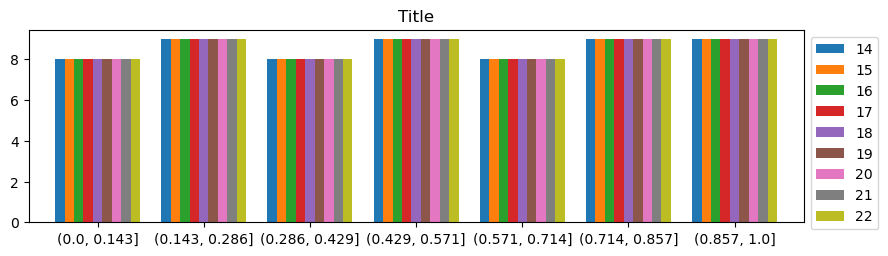

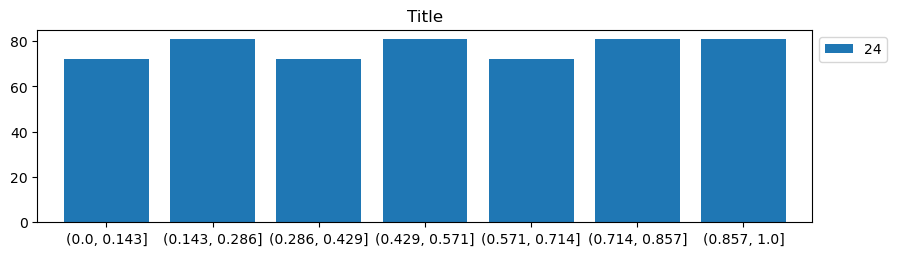

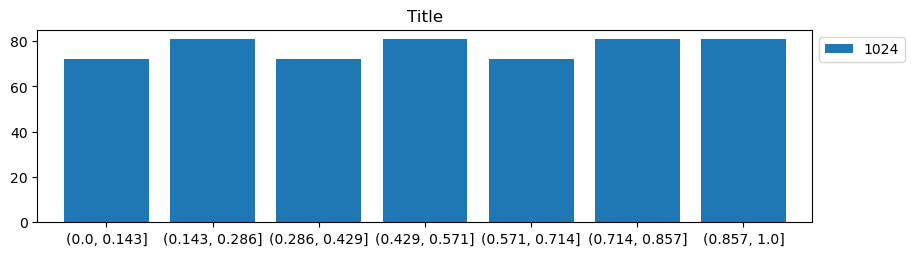

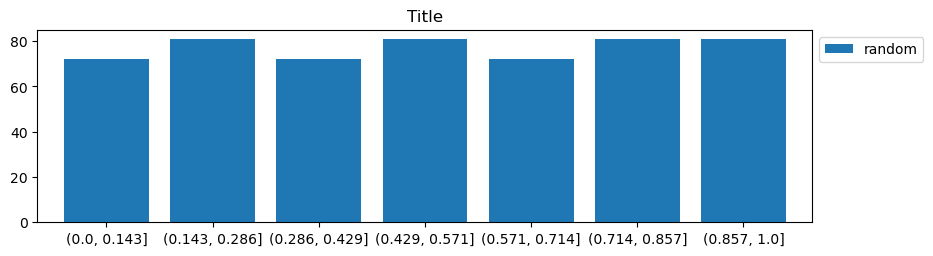

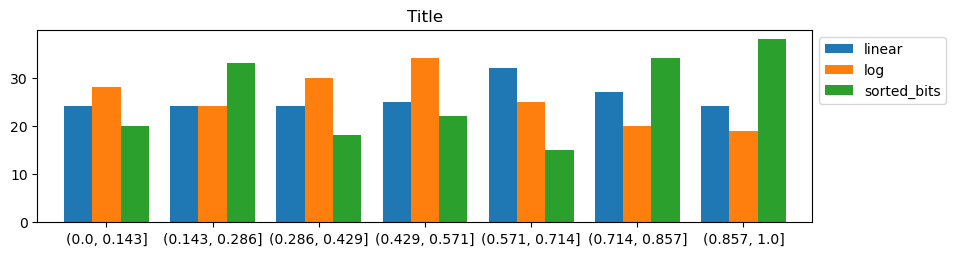

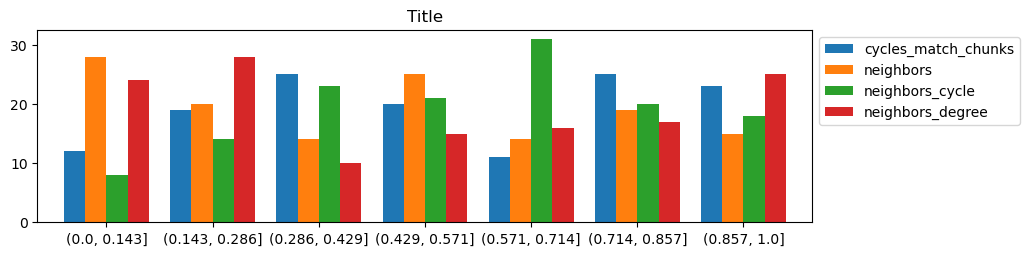

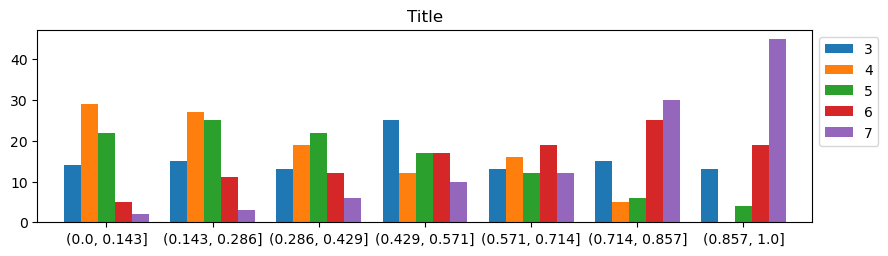

In [45]:
input = """
--------------------------------------------------------------------------------
Name (time in ms)                                                                                Min                   Max                  Mean            StdDev                Median               IQR            Outliers     OPS            Rounds  Iterations
--------------------------------------------------------------------------------

test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                  958.3327 (1.0)        958.3327 (1.0)        958.3327 (1.0)      0.0000 (1.0)        958.3327 (1.0)      0.0000 (1.0)           0;0  1.0435 (1.0)           1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors-3-smart]                         974.1410 (1.02)       974.1410 (1.02)       974.1410 (1.02)     0.0000 (1.0)        974.1410 (1.02)     0.0000 (1.0)           0;0  1.0265 (0.98)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             1,015.6857 (1.06)     1,015.6857 (1.06)     1,015.6857 (1.06)     0.0000 (1.0)      1,015.6857 (1.06)     0.0000 (1.0)           0;0  0.9846 (0.94)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 1,016.0560 (1.06)     1,016.0560 (1.06)     1,016.0560 (1.06)     0.0000 (1.0)      1,016.0560 (1.06)     0.0000 (1.0)           0;0  0.9842 (0.94)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        1,023.9658 (1.07)     1,023.9658 (1.07)     1,023.9658 (1.07)     0.0000 (1.0)      1,023.9658 (1.07)     0.0000 (1.0)           0;0  0.9766 (0.94)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                1,026.4976 (1.07)     1,026.4976 (1.07)     1,026.4976 (1.07)     0.0000 (1.0)      1,026.4976 (1.07)     0.0000 (1.0)           0;0  0.9742 (0.93)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors-4-smart]                       1,035.3697 (1.08)     1,035.3697 (1.08)     1,035.3697 (1.08)     0.0000 (1.0)      1,035.3697 (1.08)     0.0000 (1.0)           0;0  0.9658 (0.93)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        1,035.7384 (1.08)     1,035.7384 (1.08)     1,035.7384 (1.08)     0.0000 (1.0)      1,035.7384 (1.08)     0.0000 (1.0)           0;0  0.9655 (0.93)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             1,041.5756 (1.09)     1,041.5756 (1.09)     1,041.5756 (1.09)     0.0000 (1.0)      1,041.5756 (1.09)     0.0000 (1.0)           0;0  0.9601 (0.92)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors-4-smart]                    1,042.7033 (1.09)     1,042.7033 (1.09)     1,042.7033 (1.09)     0.0000 (1.0)      1,042.7033 (1.09)     0.0000 (1.0)           0;0  0.9590 (0.92)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        1,046.3364 (1.09)     1,046.3364 (1.09)     1,046.3364 (1.09)     0.0000 (1.0)      1,046.3364 (1.09)     0.0000 (1.0)           0;0  0.9557 (0.92)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        1,051.9592 (1.10)     1,051.9592 (1.10)     1,051.9592 (1.10)     0.0000 (1.0)      1,051.9592 (1.10)     0.0000 (1.0)           0;0  0.9506 (0.91)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               1,052.3234 (1.10)     1,052.3234 (1.10)     1,052.3234 (1.10)     0.0000 (1.0)      1,052.3234 (1.10)     0.0000 (1.0)           0;0  0.9503 (0.91)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        1,053.0671 (1.10)     1,053.0671 (1.10)     1,053.0671 (1.10)     0.0000 (1.0)      1,053.0671 (1.10)     0.0000 (1.0)           0;0  0.9496 (0.91)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               1,060.2845 (1.11)     1,060.2845 (1.11)     1,060.2845 (1.11)     0.0000 (1.0)      1,060.2845 (1.11)     0.0000 (1.0)           0;0  0.9431 (0.90)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     1,076.9439 (1.12)     1,076.9439 (1.12)     1,076.9439 (1.12)     0.0000 (1.0)      1,076.9439 (1.12)     0.0000 (1.0)           0;0  0.9286 (0.89)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         1,089.8340 (1.14)     1,089.8340 (1.14)     1,089.8340 (1.14)     0.0000 (1.0)      1,089.8340 (1.14)     0.0000 (1.0)           0;0  0.9176 (0.88)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     1,091.5962 (1.14)     1,091.5962 (1.14)     1,091.5962 (1.14)     0.0000 (1.0)      1,091.5962 (1.14)     0.0000 (1.0)           0;0  0.9161 (0.88)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors-5-smart]                       1,112.1651 (1.16)     1,112.1651 (1.16)     1,112.1651 (1.16)     0.0000 (1.0)      1,112.1651 (1.16)     0.0000 (1.0)           0;0  0.8991 (0.86)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     1,117.6819 (1.17)     1,117.6819 (1.17)     1,117.6819 (1.17)     0.0000 (1.0)      1,117.6819 (1.17)     0.0000 (1.0)           0;0  0.8947 (0.86)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     1,119.4803 (1.17)     1,119.4803 (1.17)     1,119.4803 (1.17)     0.0000 (1.0)      1,119.4803 (1.17)     0.0000 (1.0)           0;0  0.8933 (0.86)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 1,119.6416 (1.17)     1,119.6416 (1.17)     1,119.6416 (1.17)     0.0000 (1.0)      1,119.6416 (1.17)     0.0000 (1.0)           0;0  0.8931 (0.86)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             1,121.6400 (1.17)     1,121.6400 (1.17)     1,121.6400 (1.17)     0.0000 (1.0)      1,121.6400 (1.17)     0.0000 (1.0)           0;0  0.8916 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors-7-smart]                       1,122.9664 (1.17)     1,122.9664 (1.17)     1,122.9664 (1.17)     0.0000 (1.0)      1,122.9664 (1.17)     0.0000 (1.0)           0;0  0.8905 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors-7-smart]                    1,123.5345 (1.17)     1,123.5345 (1.17)     1,123.5345 (1.17)     0.0000 (1.0)      1,123.5345 (1.17)     0.0000 (1.0)           0;0  0.8900 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         1,124.1949 (1.17)     1,124.1949 (1.17)     1,124.1949 (1.17)     0.0000 (1.0)      1,124.1949 (1.17)     0.0000 (1.0)           0;0  0.8895 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          1,124.1960 (1.17)     1,124.1960 (1.17)     1,124.1960 (1.17)     0.0000 (1.0)      1,124.1960 (1.17)     0.0000 (1.0)           0;0  0.8895 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     1,124.4246 (1.17)     1,124.4246 (1.17)     1,124.4246 (1.17)     0.0000 (1.0)      1,124.4246 (1.17)     0.0000 (1.0)           0;0  0.8893 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors-6-smart]                    1,126.5348 (1.18)     1,126.5348 (1.18)     1,126.5348 (1.18)     0.0000 (1.0)      1,126.5348 (1.18)     0.0000 (1.0)           0;0  0.8877 (0.85)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors-6-smart]                       1,134.1236 (1.18)     1,134.1236 (1.18)     1,134.1236 (1.18)     0.0000 (1.0)      1,134.1236 (1.18)     0.0000 (1.0)           0;0  0.8817 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              1,135.9374 (1.19)     1,135.9374 (1.19)     1,135.9374 (1.19)     0.0000 (1.0)      1,135.9374 (1.19)     0.0000 (1.0)           0;0  0.8803 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               1,136.2773 (1.19)     1,136.2773 (1.19)     1,136.2773 (1.19)     0.0000 (1.0)      1,136.2773 (1.19)     0.0000 (1.0)           0;0  0.8801 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               1,138.6934 (1.19)     1,138.6934 (1.19)     1,138.6934 (1.19)     0.0000 (1.0)      1,138.6934 (1.19)     0.0000 (1.0)           0;0  0.8782 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               1,138.7264 (1.19)     1,138.7264 (1.19)     1,138.7264 (1.19)     0.0000 (1.0)      1,138.7264 (1.19)     0.0000 (1.0)           0;0  0.8782 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             1,142.5967 (1.19)     1,142.5967 (1.19)     1,142.5967 (1.19)     0.0000 (1.0)      1,142.5967 (1.19)     0.0000 (1.0)           0;0  0.8752 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors-5-smart]                    1,145.0561 (1.19)     1,145.0561 (1.19)     1,145.0561 (1.19)     0.0000 (1.0)      1,145.0561 (1.19)     0.0000 (1.0)           0;0  0.8733 (0.84)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 1,148.8511 (1.20)     1,148.8511 (1.20)     1,148.8511 (1.20)     0.0000 (1.0)      1,148.8511 (1.20)     0.0000 (1.0)           0;0  0.8704 (0.83)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              1,150.9557 (1.20)     1,150.9557 (1.20)     1,150.9557 (1.20)     0.0000 (1.0)      1,150.9557 (1.20)     0.0000 (1.0)           0;0  0.8688 (0.83)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              1,153.9822 (1.20)     1,153.9822 (1.20)     1,153.9822 (1.20)     0.0000 (1.0)      1,153.9822 (1.20)     0.0000 (1.0)           0;0  0.8666 (0.83)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors-3-smart]                    1,155.8016 (1.21)     1,155.8016 (1.21)     1,155.8016 (1.21)     0.0000 (1.0)      1,155.8016 (1.21)     0.0000 (1.0)           0;0  0.8652 (0.83)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              1,158.1864 (1.21)     1,158.1864 (1.21)     1,158.1864 (1.21)     0.0000 (1.0)      1,158.1864 (1.21)     0.0000 (1.0)           0;0  0.8634 (0.83)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 1,161.9045 (1.21)     1,161.9045 (1.21)     1,161.9045 (1.21)     0.0000 (1.0)      1,161.9045 (1.21)     0.0000 (1.0)           0;0  0.8607 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                1,167.1088 (1.22)     1,167.1088 (1.22)     1,167.1088 (1.22)     0.0000 (1.0)      1,167.1088 (1.22)     0.0000 (1.0)           0;0  0.8568 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         1,167.7599 (1.22)     1,167.7599 (1.22)     1,167.7599 (1.22)     0.0000 (1.0)      1,167.7599 (1.22)     0.0000 (1.0)           0;0  0.8563 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         1,170.3503 (1.22)     1,170.3503 (1.22)     1,170.3503 (1.22)     0.0000 (1.0)      1,170.3503 (1.22)     0.0000 (1.0)           0;0  0.8544 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             1,171.9823 (1.22)     1,171.9823 (1.22)     1,171.9823 (1.22)     0.0000 (1.0)      1,171.9823 (1.22)     0.0000 (1.0)           0;0  0.8533 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             1,175.1166 (1.23)     1,175.1166 (1.23)     1,175.1166 (1.23)     0.0000 (1.0)      1,175.1166 (1.23)     0.0000 (1.0)           0;0  0.8510 (0.82)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             1,176.6037 (1.23)     1,176.6037 (1.23)     1,176.6037 (1.23)     0.0000 (1.0)      1,176.6037 (1.23)     0.0000 (1.0)           0;0  0.8499 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             1,178.6013 (1.23)     1,178.6013 (1.23)     1,178.6013 (1.23)     0.0000 (1.0)      1,178.6013 (1.23)     0.0000 (1.0)           0;0  0.8485 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          1,179.1895 (1.23)     1,179.1895 (1.23)     1,179.1895 (1.23)     0.0000 (1.0)      1,179.1895 (1.23)     0.0000 (1.0)           0;0  0.8480 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         1,179.3819 (1.23)     1,179.3819 (1.23)     1,179.3819 (1.23)     0.0000 (1.0)      1,179.3819 (1.23)     0.0000 (1.0)           0;0  0.8479 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          1,180.0855 (1.23)     1,180.0855 (1.23)     1,180.0855 (1.23)     0.0000 (1.0)      1,180.0855 (1.23)     0.0000 (1.0)           0;0  0.8474 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                1,180.3224 (1.23)     1,180.3224 (1.23)     1,180.3224 (1.23)     0.0000 (1.0)      1,180.3224 (1.23)     0.0000 (1.0)           0;0  0.8472 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             1,180.8730 (1.23)     1,180.8730 (1.23)     1,180.8730 (1.23)     0.0000 (1.0)      1,180.8730 (1.23)     0.0000 (1.0)           0;0  0.8468 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             1,184.5623 (1.24)     1,184.5623 (1.24)     1,184.5623 (1.24)     0.0000 (1.0)      1,184.5623 (1.24)     0.0000 (1.0)           0;0  0.8442 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          1,187.0092 (1.24)     1,187.0092 (1.24)     1,187.0092 (1.24)     0.0000 (1.0)      1,187.0092 (1.24)     0.0000 (1.0)           0;0  0.8425 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              1,188.9373 (1.24)     1,188.9373 (1.24)     1,188.9373 (1.24)     0.0000 (1.0)      1,188.9373 (1.24)     0.0000 (1.0)           0;0  0.8411 (0.81)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          1,191.8706 (1.24)     1,191.8706 (1.24)     1,191.8706 (1.24)     0.0000 (1.0)      1,191.8706 (1.24)     0.0000 (1.0)           0;0  0.8390 (0.80)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                1,193.8464 (1.25)     1,193.8464 (1.25)     1,193.8464 (1.25)     0.0000 (1.0)      1,193.8464 (1.25)     0.0000 (1.0)           0;0  0.8376 (0.80)          1           1
test_LamanFirstN[14-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 1,332.2336 (1.39)     1,332.2336 (1.39)     1,332.2336 (1.39)     0.0000 (1.0)      1,332.2336 (1.39)     0.0000 (1.0)           0;0  0.7506 (0.72)          1           1

test_LamanFirstN[15-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          1,635.1390 (1.71)     1,635.1390 (1.71)     1,635.1390 (1.71)     0.0000 (1.0)      1,635.1390 (1.71)     0.0000 (1.0)           0;0  0.6116 (0.59)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          1,635.9841 (1.71)     1,635.9841 (1.71)     1,635.9841 (1.71)     0.0000 (1.0)      1,635.9841 (1.71)     0.0000 (1.0)           0;0  0.6113 (0.59)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        1,643.2602 (1.71)     1,643.2602 (1.71)     1,643.2602 (1.71)     0.0000 (1.0)      1,643.2602 (1.71)     0.0000 (1.0)           0;0  0.6085 (0.58)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        1,673.7731 (1.75)     1,673.7731 (1.75)     1,673.7731 (1.75)     0.0000 (1.0)      1,673.7731 (1.75)     0.0000 (1.0)           0;0  0.5975 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             1,675.9441 (1.75)     1,675.9441 (1.75)     1,675.9441 (1.75)     0.0000 (1.0)      1,675.9441 (1.75)     0.0000 (1.0)           0;0  0.5967 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors-5-smart]                       1,680.0719 (1.75)     1,680.0719 (1.75)     1,680.0719 (1.75)     0.0000 (1.0)      1,680.0719 (1.75)     0.0000 (1.0)           0;0  0.5952 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors-5-smart]                    1,680.1866 (1.75)     1,680.1866 (1.75)     1,680.1866 (1.75)     0.0000 (1.0)      1,680.1866 (1.75)     0.0000 (1.0)           0;0  0.5952 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors-4-smart]                    1,683.9748 (1.76)     1,683.9748 (1.76)     1,683.9748 (1.76)     0.0000 (1.0)      1,683.9748 (1.76)     0.0000 (1.0)           0;0  0.5938 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              1,694.6318 (1.77)     1,694.6318 (1.77)     1,694.6318 (1.77)     0.0000 (1.0)      1,694.6318 (1.77)     0.0000 (1.0)           0;0  0.5901 (0.57)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 1,696.3355 (1.77)     1,696.3355 (1.77)     1,696.3355 (1.77)     0.0000 (1.0)      1,696.3355 (1.77)     0.0000 (1.0)           0;0  0.5895 (0.56)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                1,698.1100 (1.77)     1,698.1100 (1.77)     1,698.1100 (1.77)     0.0000 (1.0)      1,698.1100 (1.77)     0.0000 (1.0)           0;0  0.5889 (0.56)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                1,708.2528 (1.78)     1,708.2528 (1.78)     1,708.2528 (1.78)     0.0000 (1.0)      1,708.2528 (1.78)     0.0000 (1.0)           0;0  0.5854 (0.56)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             1,716.8817 (1.79)     1,716.8817 (1.79)     1,716.8817 (1.79)     0.0000 (1.0)      1,716.8817 (1.79)     0.0000 (1.0)           0;0  0.5825 (0.56)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 1,717.1538 (1.79)     1,717.1538 (1.79)     1,717.1538 (1.79)     0.0000 (1.0)      1,717.1538 (1.79)     0.0000 (1.0)           0;0  0.5824 (0.56)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              1,759.1250 (1.84)     1,759.1250 (1.84)     1,759.1250 (1.84)     0.0000 (1.0)      1,759.1250 (1.84)     0.0000 (1.0)           0;0  0.5685 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                1,768.0352 (1.84)     1,768.0352 (1.84)     1,768.0352 (1.84)     0.0000 (1.0)      1,768.0352 (1.84)     0.0000 (1.0)           0;0  0.5656 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     1,769.6225 (1.85)     1,769.6225 (1.85)     1,769.6225 (1.85)     0.0000 (1.0)      1,769.6225 (1.85)     0.0000 (1.0)           0;0  0.5651 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         1,769.8412 (1.85)     1,769.8412 (1.85)     1,769.8412 (1.85)     0.0000 (1.0)      1,769.8412 (1.85)     0.0000 (1.0)           0;0  0.5650 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               1,774.2018 (1.85)     1,774.2018 (1.85)     1,774.2018 (1.85)     0.0000 (1.0)      1,774.2018 (1.85)     0.0000 (1.0)           0;0  0.5636 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     1,779.3081 (1.86)     1,779.3081 (1.86)     1,779.3081 (1.86)     0.0000 (1.0)      1,779.3081 (1.86)     0.0000 (1.0)           0;0  0.5620 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors-3-smart]                       1,782.4562 (1.86)     1,782.4562 (1.86)     1,782.4562 (1.86)     0.0000 (1.0)      1,782.4562 (1.86)     0.0000 (1.0)           0;0  0.5610 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             1,789.7385 (1.87)     1,789.7385 (1.87)     1,789.7385 (1.87)     0.0000 (1.0)      1,789.7385 (1.87)     0.0000 (1.0)           0;0  0.5587 (0.54)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors-4-smart]                       1,799.4142 (1.88)     1,799.4142 (1.88)     1,799.4142 (1.88)     0.0000 (1.0)      1,799.4142 (1.88)     0.0000 (1.0)           0;0  0.5557 (0.53)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          1,806.3181 (1.88)     1,806.3181 (1.88)     1,806.3181 (1.88)     0.0000 (1.0)      1,806.3181 (1.88)     0.0000 (1.0)           0;0  0.5536 (0.53)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             1,808.0989 (1.89)     1,808.0989 (1.89)     1,808.0989 (1.89)     0.0000 (1.0)      1,808.0989 (1.89)     0.0000 (1.0)           0;0  0.5531 (0.53)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         1,813.5785 (1.89)     1,813.5785 (1.89)     1,813.5785 (1.89)     0.0000 (1.0)      1,813.5785 (1.89)     0.0000 (1.0)           0;0  0.5514 (0.53)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 1,838.6896 (1.92)     1,838.6896 (1.92)     1,838.6896 (1.92)     0.0000 (1.0)      1,838.6896 (1.92)     0.0000 (1.0)           0;0  0.5439 (0.52)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors-3-smart]                    1,844.6780 (1.92)     1,844.6780 (1.92)     1,844.6780 (1.92)     0.0000 (1.0)      1,844.6780 (1.92)     0.0000 (1.0)           0;0  0.5421 (0.52)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               1,849.4832 (1.93)     1,849.4832 (1.93)     1,849.4832 (1.93)     0.0000 (1.0)      1,849.4832 (1.93)     0.0000 (1.0)           0;0  0.5407 (0.52)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     1,851.1950 (1.93)     1,851.1950 (1.93)     1,851.1950 (1.93)     0.0000 (1.0)      1,851.1950 (1.93)     0.0000 (1.0)           0;0  0.5402 (0.52)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        1,852.2525 (1.93)     1,852.2525 (1.93)     1,852.2525 (1.93)     0.0000 (1.0)      1,852.2525 (1.93)     0.0000 (1.0)           0;0  0.5399 (0.52)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               1,900.5891 (1.98)     1,900.5891 (1.98)     1,900.5891 (1.98)     0.0000 (1.0)      1,900.5891 (1.98)     0.0000 (1.0)           0;0  0.5262 (0.50)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             1,944.3659 (2.03)     1,944.3659 (2.03)     1,944.3659 (2.03)     0.0000 (1.0)      1,944.3659 (2.03)     0.0000 (1.0)           0;0  0.5143 (0.49)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              1,947.0426 (2.03)     1,947.0426 (2.03)     1,947.0426 (2.03)     0.0000 (1.0)      1,947.0426 (2.03)     0.0000 (1.0)           0;0  0.5136 (0.49)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         1,947.2160 (2.03)     1,947.2160 (2.03)     1,947.2160 (2.03)     0.0000 (1.0)      1,947.2160 (2.03)     0.0000 (1.0)           0;0  0.5136 (0.49)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             1,950.7919 (2.04)     1,950.7919 (2.04)     1,950.7919 (2.04)     0.0000 (1.0)      1,950.7919 (2.04)     0.0000 (1.0)           0;0  0.5126 (0.49)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              2,059.1204 (2.15)     2,059.1204 (2.15)     2,059.1204 (2.15)     0.0000 (1.0)      2,059.1204 (2.15)     0.0000 (1.0)           0;0  0.4856 (0.47)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 2,064.6908 (2.15)     2,064.6908 (2.15)     2,064.6908 (2.15)     0.0000 (1.0)      2,064.6908 (2.15)     0.0000 (1.0)           0;0  0.4843 (0.46)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          2,075.5357 (2.17)     2,075.5357 (2.17)     2,075.5357 (2.17)     0.0000 (1.0)      2,075.5357 (2.17)     0.0000 (1.0)           0;0  0.4818 (0.46)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 2,077.9424 (2.17)     2,077.9424 (2.17)     2,077.9424 (2.17)     0.0000 (1.0)      2,077.9424 (2.17)     0.0000 (1.0)           0;0  0.4812 (0.46)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors-7-smart]                       2,083.4071 (2.17)     2,083.4071 (2.17)     2,083.4071 (2.17)     0.0000 (1.0)      2,083.4071 (2.17)     0.0000 (1.0)           0;0  0.4800 (0.46)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          2,085.3228 (2.18)     2,085.3228 (2.18)     2,085.3228 (2.18)     0.0000 (1.0)      2,085.3228 (2.18)     0.0000 (1.0)           0;0  0.4795 (0.46)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors-7-smart]                    2,123.7759 (2.22)     2,123.7759 (2.22)     2,123.7759 (2.22)     0.0000 (1.0)      2,123.7759 (2.22)     0.0000 (1.0)           0;0  0.4709 (0.45)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              2,127.7729 (2.22)     2,127.7729 (2.22)     2,127.7729 (2.22)     0.0000 (1.0)      2,127.7729 (2.22)     0.0000 (1.0)           0;0  0.4700 (0.45)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             2,129.2803 (2.22)     2,129.2803 (2.22)     2,129.2803 (2.22)     0.0000 (1.0)      2,129.2803 (2.22)     0.0000 (1.0)           0;0  0.4696 (0.45)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,157.3587 (2.25)     2,157.3587 (2.25)     2,157.3587 (2.25)     0.0000 (1.0)      2,157.3587 (2.25)     0.0000 (1.0)           0;0  0.4635 (0.44)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             2,189.2687 (2.28)     2,189.2687 (2.28)     2,189.2687 (2.28)     0.0000 (1.0)      2,189.2687 (2.28)     0.0000 (1.0)           0;0  0.4568 (0.44)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,204.0045 (2.30)     2,204.0045 (2.30)     2,204.0045 (2.30)     0.0000 (1.0)      2,204.0045 (2.30)     0.0000 (1.0)           0;0  0.4537 (0.43)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        2,266.6109 (2.37)     2,266.6109 (2.37)     2,266.6109 (2.37)     0.0000 (1.0)      2,266.6109 (2.37)     0.0000 (1.0)           0;0  0.4412 (0.42)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        2,277.7694 (2.38)     2,277.7694 (2.38)     2,277.7694 (2.38)     0.0000 (1.0)      2,277.7694 (2.38)     0.0000 (1.0)           0;0  0.4390 (0.42)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                2,338.2711 (2.44)     2,338.2711 (2.44)     2,338.2711 (2.44)     0.0000 (1.0)      2,338.2711 (2.44)     0.0000 (1.0)           0;0  0.4277 (0.41)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             2,412.0188 (2.52)     2,412.0188 (2.52)     2,412.0188 (2.52)     0.0000 (1.0)      2,412.0188 (2.52)     0.0000 (1.0)           0;0  0.4146 (0.40)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                2,415.6058 (2.52)     2,415.6058 (2.52)     2,415.6058 (2.52)     0.0000 (1.0)      2,415.6058 (2.52)     0.0000 (1.0)           0;0  0.4140 (0.40)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             2,468.2908 (2.58)     2,468.2908 (2.58)     2,468.2908 (2.58)     0.0000 (1.0)      2,468.2908 (2.58)     0.0000 (1.0)           0;0  0.4051 (0.39)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               2,946.3782 (3.07)     2,946.3782 (3.07)     2,946.3782 (3.07)     0.0000 (1.0)      2,946.3782 (3.07)     0.0000 (1.0)           0;0  0.3394 (0.33)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     2,968.1977 (3.10)     2,968.1977 (3.10)     2,968.1977 (3.10)     0.0000 (1.0)      2,968.1977 (3.10)     0.0000 (1.0)           0;0  0.3369 (0.32)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         2,987.6358 (3.12)     2,987.6358 (3.12)     2,987.6358 (3.12)     0.0000 (1.0)      2,987.6358 (3.12)     0.0000 (1.0)           0;0  0.3347 (0.32)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               2,992.7251 (3.12)     2,992.7251 (3.12)     2,992.7251 (3.12)     0.0000 (1.0)      2,992.7251 (3.12)     0.0000 (1.0)           0;0  0.3341 (0.32)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     3,015.2114 (3.15)     3,015.2114 (3.15)     3,015.2114 (3.15)     0.0000 (1.0)      3,015.2114 (3.15)     0.0000 (1.0)           0;0  0.3317 (0.32)          1           1
test_LamanFirstN[15-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         3,062.8336 (3.20)     3,062.8336 (3.20)     3,062.8336 (3.20)     0.0000 (1.0)      3,062.8336 (3.20)     0.0000 (1.0)           0;0  0.3265 (0.31)          1           1

test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors-4-smart]                       1,408.5290 (1.47)     1,408.5290 (1.47)     1,408.5290 (1.47)     0.0000 (1.0)      1,408.5290 (1.47)     0.0000 (1.0)           0;0  0.7100 (0.68)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        1,426.9653 (1.49)     1,426.9653 (1.49)     1,426.9653 (1.49)     0.0000 (1.0)      1,426.9653 (1.49)     0.0000 (1.0)           0;0  0.7008 (0.67)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors-5-smart]                    1,427.3969 (1.49)     1,427.3969 (1.49)     1,427.3969 (1.49)     0.0000 (1.0)      1,427.3969 (1.49)     0.0000 (1.0)           0;0  0.7006 (0.67)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors-5-smart]                       1,438.1029 (1.50)     1,438.1029 (1.50)     1,438.1029 (1.50)     0.0000 (1.0)      1,438.1029 (1.50)     0.0000 (1.0)           0;0  0.6954 (0.67)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                1,439.3976 (1.50)     1,439.3976 (1.50)     1,439.3976 (1.50)     0.0000 (1.0)      1,439.3976 (1.50)     0.0000 (1.0)           0;0  0.6947 (0.67)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors-4-smart]                    1,459.2705 (1.52)     1,459.2705 (1.52)     1,459.2705 (1.52)     0.0000 (1.0)      1,459.2705 (1.52)     0.0000 (1.0)           0;0  0.6853 (0.66)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             1,468.6873 (1.53)     1,468.6873 (1.53)     1,468.6873 (1.53)     0.0000 (1.0)      1,468.6873 (1.53)     0.0000 (1.0)           0;0  0.6809 (0.65)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             1,475.2354 (1.54)     1,475.2354 (1.54)     1,475.2354 (1.54)     0.0000 (1.0)      1,475.2354 (1.54)     0.0000 (1.0)           0;0  0.6779 (0.65)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        1,491.2914 (1.56)     1,491.2914 (1.56)     1,491.2914 (1.56)     0.0000 (1.0)      1,491.2914 (1.56)     0.0000 (1.0)           0;0  0.6706 (0.64)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                1,493.9586 (1.56)     1,493.9586 (1.56)     1,493.9586 (1.56)     0.0000 (1.0)      1,493.9586 (1.56)     0.0000 (1.0)           0;0  0.6694 (0.64)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             1,506.9382 (1.57)     1,506.9382 (1.57)     1,506.9382 (1.57)     0.0000 (1.0)      1,506.9382 (1.57)     0.0000 (1.0)           0;0  0.6636 (0.64)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          1,509.4661 (1.58)     1,509.4661 (1.58)     1,509.4661 (1.58)     0.0000 (1.0)      1,509.4661 (1.58)     0.0000 (1.0)           0;0  0.6625 (0.63)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               1,515.7906 (1.58)     1,515.7906 (1.58)     1,515.7906 (1.58)     0.0000 (1.0)      1,515.7906 (1.58)     0.0000 (1.0)           0;0  0.6597 (0.63)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             1,523.9676 (1.59)     1,523.9676 (1.59)     1,523.9676 (1.59)     0.0000 (1.0)      1,523.9676 (1.59)     0.0000 (1.0)           0;0  0.6562 (0.63)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               1,533.0104 (1.60)     1,533.0104 (1.60)     1,533.0104 (1.60)     0.0000 (1.0)      1,533.0104 (1.60)     0.0000 (1.0)           0;0  0.6523 (0.63)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        1,543.4837 (1.61)     1,543.4837 (1.61)     1,543.4837 (1.61)     0.0000 (1.0)      1,543.4837 (1.61)     0.0000 (1.0)           0;0  0.6479 (0.62)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          1,543.5378 (1.61)     1,543.5378 (1.61)     1,543.5378 (1.61)     0.0000 (1.0)      1,543.5378 (1.61)     0.0000 (1.0)           0;0  0.6479 (0.62)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 1,544.7797 (1.61)     1,544.7797 (1.61)     1,544.7797 (1.61)     0.0000 (1.0)      1,544.7797 (1.61)     0.0000 (1.0)           0;0  0.6473 (0.62)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              1,559.9419 (1.63)     1,559.9419 (1.63)     1,559.9419 (1.63)     0.0000 (1.0)      1,559.9419 (1.63)     0.0000 (1.0)           0;0  0.6410 (0.61)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     1,562.9033 (1.63)     1,562.9033 (1.63)     1,562.9033 (1.63)     0.0000 (1.0)      1,562.9033 (1.63)     0.0000 (1.0)           0;0  0.6398 (0.61)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     1,588.9326 (1.66)     1,588.9326 (1.66)     1,588.9326 (1.66)     0.0000 (1.0)      1,588.9326 (1.66)     0.0000 (1.0)           0;0  0.6294 (0.60)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               1,600.8675 (1.67)     1,600.8675 (1.67)     1,600.8675 (1.67)     0.0000 (1.0)      1,600.8675 (1.67)     0.0000 (1.0)           0;0  0.6247 (0.60)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         1,614.9921 (1.69)     1,614.9921 (1.69)     1,614.9921 (1.69)     0.0000 (1.0)      1,614.9921 (1.69)     0.0000 (1.0)           0;0  0.6192 (0.59)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         1,624.0063 (1.69)     1,624.0063 (1.69)     1,624.0063 (1.69)     0.0000 (1.0)      1,624.0063 (1.69)     0.0000 (1.0)           0;0  0.6158 (0.59)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     1,637.2914 (1.71)     1,637.2914 (1.71)     1,637.2914 (1.71)     0.0000 (1.0)      1,637.2914 (1.71)     0.0000 (1.0)           0;0  0.6108 (0.59)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors-3-smart]                    1,638.8937 (1.71)     1,638.8937 (1.71)     1,638.8937 (1.71)     0.0000 (1.0)      1,638.8937 (1.71)     0.0000 (1.0)           0;0  0.6102 (0.58)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors-3-smart]                       1,639.8917 (1.71)     1,639.8917 (1.71)     1,639.8917 (1.71)     0.0000 (1.0)      1,639.8917 (1.71)     0.0000 (1.0)           0;0  0.6098 (0.58)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              1,642.4709 (1.71)     1,642.4709 (1.71)     1,642.4709 (1.71)     0.0000 (1.0)      1,642.4709 (1.71)     0.0000 (1.0)           0;0  0.6088 (0.58)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         1,664.3696 (1.74)     1,664.3696 (1.74)     1,664.3696 (1.74)     0.0000 (1.0)      1,664.3696 (1.74)     0.0000 (1.0)           0;0  0.6008 (0.58)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                1,676.3556 (1.75)     1,676.3556 (1.75)     1,676.3556 (1.75)     0.0000 (1.0)      1,676.3556 (1.75)     0.0000 (1.0)           0;0  0.5965 (0.57)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors-7-smart]                       1,686.8091 (1.76)     1,686.8091 (1.76)     1,686.8091 (1.76)     0.0000 (1.0)      1,686.8091 (1.76)     0.0000 (1.0)           0;0  0.5928 (0.57)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors-7-smart]                    1,701.4382 (1.78)     1,701.4382 (1.78)     1,701.4382 (1.78)     0.0000 (1.0)      1,701.4382 (1.78)     0.0000 (1.0)           0;0  0.5877 (0.56)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 1,725.9299 (1.80)     1,725.9299 (1.80)     1,725.9299 (1.80)     0.0000 (1.0)      1,725.9299 (1.80)     0.0000 (1.0)           0;0  0.5794 (0.56)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             1,726.1680 (1.80)     1,726.1680 (1.80)     1,726.1680 (1.80)     0.0000 (1.0)      1,726.1680 (1.80)     0.0000 (1.0)           0;0  0.5793 (0.56)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors-6-smart]                    1,726.5107 (1.80)     1,726.5107 (1.80)     1,726.5107 (1.80)     0.0000 (1.0)      1,726.5107 (1.80)     0.0000 (1.0)           0;0  0.5792 (0.56)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors-6-smart]                       1,732.6467 (1.81)     1,732.6467 (1.81)     1,732.6467 (1.81)     0.0000 (1.0)      1,732.6467 (1.81)     0.0000 (1.0)           0;0  0.5772 (0.55)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        1,741.8035 (1.82)     1,741.8035 (1.82)     1,741.8035 (1.82)     0.0000 (1.0)      1,741.8035 (1.82)     0.0000 (1.0)           0;0  0.5741 (0.55)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             1,758.7597 (1.84)     1,758.7597 (1.84)     1,758.7597 (1.84)     0.0000 (1.0)      1,758.7597 (1.84)     0.0000 (1.0)           0;0  0.5686 (0.54)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 1,770.0730 (1.85)     1,770.0730 (1.85)     1,770.0730 (1.85)     0.0000 (1.0)      1,770.0730 (1.85)     0.0000 (1.0)           0;0  0.5649 (0.54)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              1,775.2915 (1.85)     1,775.2915 (1.85)     1,775.2915 (1.85)     0.0000 (1.0)      1,775.2915 (1.85)     0.0000 (1.0)           0;0  0.5633 (0.54)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 1,788.4953 (1.87)     1,788.4953 (1.87)     1,788.4953 (1.87)     0.0000 (1.0)      1,788.4953 (1.87)     0.0000 (1.0)           0;0  0.5591 (0.54)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 1,791.6248 (1.87)     1,791.6248 (1.87)     1,791.6248 (1.87)     0.0000 (1.0)      1,791.6248 (1.87)     0.0000 (1.0)           0;0  0.5582 (0.53)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              1,806.8906 (1.89)     1,806.8906 (1.89)     1,806.8906 (1.89)     0.0000 (1.0)      1,806.8906 (1.89)     0.0000 (1.0)           0;0  0.5534 (0.53)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              1,810.7004 (1.89)     1,810.7004 (1.89)     1,810.7004 (1.89)     0.0000 (1.0)      1,810.7004 (1.89)     0.0000 (1.0)           0;0  0.5523 (0.53)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          1,831.8316 (1.91)     1,831.8316 (1.91)     1,831.8316 (1.91)     0.0000 (1.0)      1,831.8316 (1.91)     0.0000 (1.0)           0;0  0.5459 (0.52)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        1,934.7030 (2.02)     1,934.7030 (2.02)     1,934.7030 (2.02)     0.0000 (1.0)      1,934.7030 (2.02)     0.0000 (1.0)           0;0  0.5169 (0.50)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     1,941.8303 (2.03)     1,941.8303 (2.03)     1,941.8303 (2.03)     0.0000 (1.0)      1,941.8303 (2.03)     0.0000 (1.0)           0;0  0.5150 (0.49)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     1,952.7202 (2.04)     1,952.7202 (2.04)     1,952.7202 (2.04)     0.0000 (1.0)      1,952.7202 (2.04)     0.0000 (1.0)           0;0  0.5121 (0.49)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          1,970.5163 (2.06)     1,970.5163 (2.06)     1,970.5163 (2.06)     0.0000 (1.0)      1,970.5163 (2.06)     0.0000 (1.0)           0;0  0.5075 (0.49)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             1,986.8045 (2.07)     1,986.8045 (2.07)     1,986.8045 (2.07)     0.0000 (1.0)      1,986.8045 (2.07)     0.0000 (1.0)           0;0  0.5033 (0.48)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          1,989.6337 (2.08)     1,989.6337 (2.08)     1,989.6337 (2.08)     0.0000 (1.0)      1,989.6337 (2.08)     0.0000 (1.0)           0;0  0.5026 (0.48)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             2,013.3444 (2.10)     2,013.3444 (2.10)     2,013.3444 (2.10)     0.0000 (1.0)      2,013.3444 (2.10)     0.0000 (1.0)           0;0  0.4967 (0.48)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             2,025.6800 (2.11)     2,025.6800 (2.11)     2,025.6800 (2.11)     0.0000 (1.0)      2,025.6800 (2.11)     0.0000 (1.0)           0;0  0.4937 (0.47)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             2,034.4487 (2.12)     2,034.4487 (2.12)     2,034.4487 (2.12)     0.0000 (1.0)      2,034.4487 (2.12)     0.0000 (1.0)           0;0  0.4915 (0.47)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                2,047.0401 (2.14)     2,047.0401 (2.14)     2,047.0401 (2.14)     0.0000 (1.0)      2,047.0401 (2.14)     0.0000 (1.0)           0;0  0.4885 (0.47)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                2,050.8570 (2.14)     2,050.8570 (2.14)     2,050.8570 (2.14)     0.0000 (1.0)      2,050.8570 (2.14)     0.0000 (1.0)           0;0  0.4876 (0.47)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               2,131.2308 (2.22)     2,131.2308 (2.22)     2,131.2308 (2.22)     0.0000 (1.0)      2,131.2308 (2.22)     0.0000 (1.0)           0;0  0.4692 (0.45)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               2,144.6930 (2.24)     2,144.6930 (2.24)     2,144.6930 (2.24)     0.0000 (1.0)      2,144.6930 (2.24)     0.0000 (1.0)           0;0  0.4663 (0.45)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         2,215.3766 (2.31)     2,215.3766 (2.31)     2,215.3766 (2.31)     0.0000 (1.0)      2,215.3766 (2.31)     0.0000 (1.0)           0;0  0.4514 (0.43)          1           1
test_LamanFirstN[16-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         2,217.3532 (2.31)     2,217.3532 (2.31)     2,217.3532 (2.31)     0.0000 (1.0)      2,217.3532 (2.31)     0.0000 (1.0)           0;0  0.4510 (0.43)          1           1

test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        1,876.4304 (1.96)     1,876.4304 (1.96)     1,876.4304 (1.96)     0.0000 (1.0)      1,876.4304 (1.96)     0.0000 (1.0)           0;0  0.5329 (0.51)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          1,929.1284 (2.01)     1,929.1284 (2.01)     1,929.1284 (2.01)     0.0000 (1.0)      1,929.1284 (2.01)     0.0000 (1.0)           0;0  0.5184 (0.50)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        1,949.2660 (2.03)     1,949.2660 (2.03)     1,949.2660 (2.03)     0.0000 (1.0)      1,949.2660 (2.03)     0.0000 (1.0)           0;0  0.5130 (0.49)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             1,961.4724 (2.05)     1,961.4724 (2.05)     1,961.4724 (2.05)     0.0000 (1.0)      1,961.4724 (2.05)     0.0000 (1.0)           0;0  0.5098 (0.49)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     1,966.3640 (2.05)     1,966.3640 (2.05)     1,966.3640 (2.05)     0.0000 (1.0)      1,966.3640 (2.05)     0.0000 (1.0)           0;0  0.5086 (0.49)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 1,991.7516 (2.08)     1,991.7516 (2.08)     1,991.7516 (2.08)     0.0000 (1.0)      1,991.7516 (2.08)     0.0000 (1.0)           0;0  0.5021 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors-4-smart]                    1,995.2459 (2.08)     1,995.2459 (2.08)     1,995.2459 (2.08)     0.0000 (1.0)      1,995.2459 (2.08)     0.0000 (1.0)           0;0  0.5012 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors-4-smart]                       1,996.4652 (2.08)     1,996.4652 (2.08)     1,996.4652 (2.08)     0.0000 (1.0)      1,996.4652 (2.08)     0.0000 (1.0)           0;0  0.5009 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         2,000.0225 (2.09)     2,000.0225 (2.09)     2,000.0225 (2.09)     0.0000 (1.0)      2,000.0225 (2.09)     0.0000 (1.0)           0;0  0.5000 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     2,000.2286 (2.09)     2,000.2286 (2.09)     2,000.2286 (2.09)     0.0000 (1.0)      2,000.2286 (2.09)     0.0000 (1.0)           0;0  0.4999 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              2,008.8083 (2.10)     2,008.8083 (2.10)     2,008.8083 (2.10)     0.0000 (1.0)      2,008.8083 (2.10)     0.0000 (1.0)           0;0  0.4978 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                2,009.4440 (2.10)     2,009.4440 (2.10)     2,009.4440 (2.10)     0.0000 (1.0)      2,009.4440 (2.10)     0.0000 (1.0)           0;0  0.4977 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,014.0704 (2.10)     2,014.0704 (2.10)     2,014.0704 (2.10)     0.0000 (1.0)      2,014.0704 (2.10)     0.0000 (1.0)           0;0  0.4965 (0.48)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,021.9875 (2.11)     2,021.9875 (2.11)     2,021.9875 (2.11)     0.0000 (1.0)      2,021.9875 (2.11)     0.0000 (1.0)           0;0  0.4946 (0.47)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               2,024.7094 (2.11)     2,024.7094 (2.11)     2,024.7094 (2.11)     0.0000 (1.0)      2,024.7094 (2.11)     0.0000 (1.0)           0;0  0.4939 (0.47)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               2,040.6995 (2.13)     2,040.6995 (2.13)     2,040.6995 (2.13)     0.0000 (1.0)      2,040.6995 (2.13)     0.0000 (1.0)           0;0  0.4900 (0.47)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                2,050.3522 (2.14)     2,050.3522 (2.14)     2,050.3522 (2.14)     0.0000 (1.0)      2,050.3522 (2.14)     0.0000 (1.0)           0;0  0.4877 (0.47)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,086.5082 (2.18)     2,086.5082 (2.18)     2,086.5082 (2.18)     0.0000 (1.0)      2,086.5082 (2.18)     0.0000 (1.0)           0;0  0.4793 (0.46)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             2,092.8511 (2.18)     2,092.8511 (2.18)     2,092.8511 (2.18)     0.0000 (1.0)      2,092.8511 (2.18)     0.0000 (1.0)           0;0  0.4778 (0.46)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             2,100.6871 (2.19)     2,100.6871 (2.19)     2,100.6871 (2.19)     0.0000 (1.0)      2,100.6871 (2.19)     0.0000 (1.0)           0;0  0.4760 (0.46)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors-5-smart]                    2,107.7568 (2.20)     2,107.7568 (2.20)     2,107.7568 (2.20)     0.0000 (1.0)      2,107.7568 (2.20)     0.0000 (1.0)           0;0  0.4744 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             2,111.2140 (2.20)     2,111.2140 (2.20)     2,111.2140 (2.20)     0.0000 (1.0)      2,111.2140 (2.20)     0.0000 (1.0)           0;0  0.4737 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 2,130.3038 (2.22)     2,130.3038 (2.22)     2,130.3038 (2.22)     0.0000 (1.0)      2,130.3038 (2.22)     0.0000 (1.0)           0;0  0.4694 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                2,142.5736 (2.24)     2,142.5736 (2.24)     2,142.5736 (2.24)     0.0000 (1.0)      2,142.5736 (2.24)     0.0000 (1.0)           0;0  0.4667 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              2,143.6043 (2.24)     2,143.6043 (2.24)     2,143.6043 (2.24)     0.0000 (1.0)      2,143.6043 (2.24)     0.0000 (1.0)           0;0  0.4665 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             2,147.2120 (2.24)     2,147.2120 (2.24)     2,147.2120 (2.24)     0.0000 (1.0)      2,147.2120 (2.24)     0.0000 (1.0)           0;0  0.4657 (0.45)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,158.0513 (2.25)     2,158.0513 (2.25)     2,158.0513 (2.25)     0.0000 (1.0)      2,158.0513 (2.25)     0.0000 (1.0)           0;0  0.4634 (0.44)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors-5-smart]                       2,164.2971 (2.26)     2,164.2971 (2.26)     2,164.2971 (2.26)     0.0000 (1.0)      2,164.2971 (2.26)     0.0000 (1.0)           0;0  0.4620 (0.44)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          2,172.6227 (2.27)     2,172.6227 (2.27)     2,172.6227 (2.27)     0.0000 (1.0)      2,172.6227 (2.27)     0.0000 (1.0)           0;0  0.4603 (0.44)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 2,181.8383 (2.28)     2,181.8383 (2.28)     2,181.8383 (2.28)     0.0000 (1.0)      2,181.8383 (2.28)     0.0000 (1.0)           0;0  0.4583 (0.44)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             2,196.5851 (2.29)     2,196.5851 (2.29)     2,196.5851 (2.29)     0.0000 (1.0)      2,196.5851 (2.29)     0.0000 (1.0)           0;0  0.4553 (0.44)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors-3-smart]                    2,209.9977 (2.31)     2,209.9977 (2.31)     2,209.9977 (2.31)     0.0000 (1.0)      2,209.9977 (2.31)     0.0000 (1.0)           0;0  0.4525 (0.43)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              2,210.7598 (2.31)     2,210.7598 (2.31)     2,210.7598 (2.31)     0.0000 (1.0)      2,210.7598 (2.31)     0.0000 (1.0)           0;0  0.4523 (0.43)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,232.9102 (2.33)     2,232.9102 (2.33)     2,232.9102 (2.33)     0.0000 (1.0)      2,232.9102 (2.33)     0.0000 (1.0)           0;0  0.4478 (0.43)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,262.7672 (2.36)     2,262.7672 (2.36)     2,262.7672 (2.36)     0.0000 (1.0)      2,262.7672 (2.36)     0.0000 (1.0)           0;0  0.4419 (0.42)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,299.6590 (2.40)     2,299.6590 (2.40)     2,299.6590 (2.40)     0.0000 (1.0)      2,299.6590 (2.40)     0.0000 (1.0)           0;0  0.4348 (0.42)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              2,646.3754 (2.76)     2,646.3754 (2.76)     2,646.3754 (2.76)     0.0000 (1.0)      2,646.3754 (2.76)     0.0000 (1.0)           0;0  0.3779 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 2,667.8662 (2.78)     2,667.8662 (2.78)     2,667.8662 (2.78)     0.0000 (1.0)      2,667.8662 (2.78)     0.0000 (1.0)           0;0  0.3748 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors-7-smart]                       2,674.2421 (2.79)     2,674.2421 (2.79)     2,674.2421 (2.79)     0.0000 (1.0)      2,674.2421 (2.79)     0.0000 (1.0)           0;0  0.3739 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,676.7859 (2.79)     2,676.7859 (2.79)     2,676.7859 (2.79)     0.0000 (1.0)      2,676.7859 (2.79)     0.0000 (1.0)           0;0  0.3736 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 2,680.1954 (2.80)     2,680.1954 (2.80)     2,680.1954 (2.80)     0.0000 (1.0)      2,680.1954 (2.80)     0.0000 (1.0)           0;0  0.3731 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              2,680.2425 (2.80)     2,680.2425 (2.80)     2,680.2425 (2.80)     0.0000 (1.0)      2,680.2425 (2.80)     0.0000 (1.0)           0;0  0.3731 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors-7-smart]                    2,682.2588 (2.80)     2,682.2588 (2.80)     2,682.2588 (2.80)     0.0000 (1.0)      2,682.2588 (2.80)     0.0000 (1.0)           0;0  0.3728 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,687.8596 (2.80)     2,687.8596 (2.80)     2,687.8596 (2.80)     0.0000 (1.0)      2,687.8596 (2.80)     0.0000 (1.0)           0;0  0.3720 (0.36)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          3,170.0546 (3.31)     3,170.0546 (3.31)     3,170.0546 (3.31)     0.0000 (1.0)      3,170.0546 (3.31)     0.0000 (1.0)           0;0  0.3155 (0.30)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             3,202.7904 (3.34)     3,202.7904 (3.34)     3,202.7904 (3.34)     0.0000 (1.0)      3,202.7904 (3.34)     0.0000 (1.0)           0;0  0.3122 (0.30)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             3,217.1686 (3.36)     3,217.1686 (3.36)     3,217.1686 (3.36)     0.0000 (1.0)      3,217.1686 (3.36)     0.0000 (1.0)           0;0  0.3108 (0.30)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          3,278.0600 (3.42)     3,278.0600 (3.42)     3,278.0600 (3.42)     0.0000 (1.0)      3,278.0600 (3.42)     0.0000 (1.0)           0;0  0.3051 (0.29)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        3,524.0392 (3.68)     3,524.0392 (3.68)     3,524.0392 (3.68)     0.0000 (1.0)      3,524.0392 (3.68)     0.0000 (1.0)           0;0  0.2838 (0.27)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        3,551.7929 (3.71)     3,551.7929 (3.71)     3,551.7929 (3.71)     0.0000 (1.0)      3,551.7929 (3.71)     0.0000 (1.0)           0;0  0.2815 (0.27)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                3,607.2139 (3.76)     3,607.2139 (3.76)     3,607.2139 (3.76)     0.0000 (1.0)      3,607.2139 (3.76)     0.0000 (1.0)           0;0  0.2772 (0.27)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             3,615.9810 (3.77)     3,615.9810 (3.77)     3,615.9810 (3.77)     0.0000 (1.0)      3,615.9810 (3.77)     0.0000 (1.0)           0;0  0.2766 (0.27)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                3,659.8382 (3.82)     3,659.8382 (3.82)     3,659.8382 (3.82)     0.0000 (1.0)      3,659.8382 (3.82)     0.0000 (1.0)           0;0  0.2732 (0.26)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             3,672.6296 (3.83)     3,672.6296 (3.83)     3,672.6296 (3.83)     0.0000 (1.0)      3,672.6296 (3.83)     0.0000 (1.0)           0;0  0.2723 (0.26)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     4,664.2358 (4.87)     4,664.2358 (4.87)     4,664.2358 (4.87)     0.0000 (1.0)      4,664.2358 (4.87)     0.0000 (1.0)           0;0  0.2144 (0.21)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     4,702.3270 (4.91)     4,702.3270 (4.91)     4,702.3270 (4.91)     0.0000 (1.0)      4,702.3270 (4.91)     0.0000 (1.0)           0;0  0.2127 (0.20)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               5,649.5923 (5.90)     5,649.5923 (5.90)     5,649.5923 (5.90)     0.0000 (1.0)      5,649.5923 (5.90)     0.0000 (1.0)           0;0  0.1770 (0.17)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         5,761.5873 (6.01)     5,761.5873 (6.01)     5,761.5873 (6.01)     0.0000 (1.0)      5,761.5873 (6.01)     0.0000 (1.0)           0;0  0.1736 (0.17)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         5,768.7808 (6.02)     5,768.7808 (6.02)     5,768.7808 (6.02)     0.0000 (1.0)      5,768.7808 (6.02)     0.0000 (1.0)           0;0  0.1733 (0.17)          1           1
test_LamanFirstN[17-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               5,851.5176 (6.11)     5,851.5176 (6.11)     5,851.5176 (6.11)     0.0000 (1.0)      5,851.5176 (6.11)     0.0000 (1.0)           0;0  0.1709 (0.16)          1           1

test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        1,959.8559 (2.05)     1,959.8559 (2.05)     1,959.8559 (2.05)     0.0000 (1.0)      1,959.8559 (2.05)     0.0000 (1.0)           0;0  0.5102 (0.49)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors-4-smart]                       1,968.4078 (2.05)     1,968.4078 (2.05)     1,968.4078 (2.05)     0.0000 (1.0)      1,968.4078 (2.05)     0.0000 (1.0)           0;0  0.5080 (0.49)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        1,974.6859 (2.06)     1,974.6859 (2.06)     1,974.6859 (2.06)     0.0000 (1.0)      1,974.6859 (2.06)     0.0000 (1.0)           0;0  0.5064 (0.49)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors-5-smart]                       1,982.8537 (2.07)     1,982.8537 (2.07)     1,982.8537 (2.07)     0.0000 (1.0)      1,982.8537 (2.07)     0.0000 (1.0)           0;0  0.5043 (0.48)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             1,988.8066 (2.08)     1,988.8066 (2.08)     1,988.8066 (2.08)     0.0000 (1.0)      1,988.8066 (2.08)     0.0000 (1.0)           0;0  0.5028 (0.48)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                2,018.6939 (2.11)     2,018.6939 (2.11)     2,018.6939 (2.11)     0.0000 (1.0)      2,018.6939 (2.11)     0.0000 (1.0)           0;0  0.4954 (0.47)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,024.4622 (2.11)     2,024.4622 (2.11)     2,024.4622 (2.11)     0.0000 (1.0)      2,024.4622 (2.11)     0.0000 (1.0)           0;0  0.4940 (0.47)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        2,033.4668 (2.12)     2,033.4668 (2.12)     2,033.4668 (2.12)     0.0000 (1.0)      2,033.4668 (2.12)     0.0000 (1.0)           0;0  0.4918 (0.47)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors-5-smart]                    2,059.0055 (2.15)     2,059.0055 (2.15)     2,059.0055 (2.15)     0.0000 (1.0)      2,059.0055 (2.15)     0.0000 (1.0)           0;0  0.4857 (0.47)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,059.0583 (2.15)     2,059.0583 (2.15)     2,059.0583 (2.15)     0.0000 (1.0)      2,059.0583 (2.15)     0.0000 (1.0)           0;0  0.4857 (0.47)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 2,072.6651 (2.16)     2,072.6651 (2.16)     2,072.6651 (2.16)     0.0000 (1.0)      2,072.6651 (2.16)     0.0000 (1.0)           0;0  0.4825 (0.46)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,072.8696 (2.16)     2,072.8696 (2.16)     2,072.8696 (2.16)     0.0000 (1.0)      2,072.8696 (2.16)     0.0000 (1.0)           0;0  0.4824 (0.46)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              2,088.3902 (2.18)     2,088.3902 (2.18)     2,088.3902 (2.18)     0.0000 (1.0)      2,088.3902 (2.18)     0.0000 (1.0)           0;0  0.4788 (0.46)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              2,096.3629 (2.19)     2,096.3629 (2.19)     2,096.3629 (2.19)     0.0000 (1.0)      2,096.3629 (2.19)     0.0000 (1.0)           0;0  0.4770 (0.46)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 2,101.1593 (2.19)     2,101.1593 (2.19)     2,101.1593 (2.19)     0.0000 (1.0)      2,101.1593 (2.19)     0.0000 (1.0)           0;0  0.4759 (0.46)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     2,116.2673 (2.21)     2,116.2673 (2.21)     2,116.2673 (2.21)     0.0000 (1.0)      2,116.2673 (2.21)     0.0000 (1.0)           0;0  0.4725 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,117.4139 (2.21)     2,117.4139 (2.21)     2,117.4139 (2.21)     0.0000 (1.0)      2,117.4139 (2.21)     0.0000 (1.0)           0;0  0.4723 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 2,118.1288 (2.21)     2,118.1288 (2.21)     2,118.1288 (2.21)     0.0000 (1.0)      2,118.1288 (2.21)     0.0000 (1.0)           0;0  0.4721 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             2,133.6919 (2.23)     2,133.6919 (2.23)     2,133.6919 (2.23)     0.0000 (1.0)      2,133.6919 (2.23)     0.0000 (1.0)           0;0  0.4687 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          2,137.7622 (2.23)     2,137.7622 (2.23)     2,137.7622 (2.23)     0.0000 (1.0)      2,137.7622 (2.23)     0.0000 (1.0)           0;0  0.4678 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          2,137.8592 (2.23)     2,137.8592 (2.23)     2,137.8592 (2.23)     0.0000 (1.0)      2,137.8592 (2.23)     0.0000 (1.0)           0;0  0.4678 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors-4-smart]                    2,140.4935 (2.23)     2,140.4935 (2.23)     2,140.4935 (2.23)     0.0000 (1.0)      2,140.4935 (2.23)     0.0000 (1.0)           0;0  0.4672 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             2,146.8521 (2.24)     2,146.8521 (2.24)     2,146.8521 (2.24)     0.0000 (1.0)      2,146.8521 (2.24)     0.0000 (1.0)           0;0  0.4658 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,148.5272 (2.24)     2,148.5272 (2.24)     2,148.5272 (2.24)     0.0000 (1.0)      2,148.5272 (2.24)     0.0000 (1.0)           0;0  0.4654 (0.45)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             2,156.9065 (2.25)     2,156.9065 (2.25)     2,156.9065 (2.25)     0.0000 (1.0)      2,156.9065 (2.25)     0.0000 (1.0)           0;0  0.4636 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                2,156.9915 (2.25)     2,156.9915 (2.25)     2,156.9915 (2.25)     0.0000 (1.0)      2,156.9915 (2.25)     0.0000 (1.0)           0;0  0.4636 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     2,161.5386 (2.26)     2,161.5386 (2.26)     2,161.5386 (2.26)     0.0000 (1.0)      2,161.5386 (2.26)     0.0000 (1.0)           0;0  0.4626 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               2,166.0394 (2.26)     2,166.0394 (2.26)     2,166.0394 (2.26)     0.0000 (1.0)      2,166.0394 (2.26)     0.0000 (1.0)           0;0  0.4617 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              2,166.1629 (2.26)     2,166.1629 (2.26)     2,166.1629 (2.26)     0.0000 (1.0)      2,166.1629 (2.26)     0.0000 (1.0)           0;0  0.4616 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                2,176.2125 (2.27)     2,176.2125 (2.27)     2,176.2125 (2.27)     0.0000 (1.0)      2,176.2125 (2.27)     0.0000 (1.0)           0;0  0.4595 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 2,179.9264 (2.27)     2,179.9264 (2.27)     2,179.9264 (2.27)     0.0000 (1.0)      2,179.9264 (2.27)     0.0000 (1.0)           0;0  0.4587 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,184.1060 (2.28)     2,184.1060 (2.28)     2,184.1060 (2.28)     0.0000 (1.0)      2,184.1060 (2.28)     0.0000 (1.0)           0;0  0.4579 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             2,190.9566 (2.29)     2,190.9566 (2.29)     2,190.9566 (2.29)     0.0000 (1.0)      2,190.9566 (2.29)     0.0000 (1.0)           0;0  0.4564 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               2,192.9444 (2.29)     2,192.9444 (2.29)     2,192.9444 (2.29)     0.0000 (1.0)      2,192.9444 (2.29)     0.0000 (1.0)           0;0  0.4560 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,197.0184 (2.29)     2,197.0184 (2.29)     2,197.0184 (2.29)     0.0000 (1.0)      2,197.0184 (2.29)     0.0000 (1.0)           0;0  0.4552 (0.44)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             2,205.4267 (2.30)     2,205.4267 (2.30)     2,205.4267 (2.30)     0.0000 (1.0)      2,205.4267 (2.30)     0.0000 (1.0)           0;0  0.4534 (0.43)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             2,217.8503 (2.31)     2,217.8503 (2.31)     2,217.8503 (2.31)     0.0000 (1.0)      2,217.8503 (2.31)     0.0000 (1.0)           0;0  0.4509 (0.43)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,219.7073 (2.32)     2,219.7073 (2.32)     2,219.7073 (2.32)     0.0000 (1.0)      2,219.7073 (2.32)     0.0000 (1.0)           0;0  0.4505 (0.43)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                2,220.1182 (2.32)     2,220.1182 (2.32)     2,220.1182 (2.32)     0.0000 (1.0)      2,220.1182 (2.32)     0.0000 (1.0)           0;0  0.4504 (0.43)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         2,227.0736 (2.32)     2,227.0736 (2.32)     2,227.0736 (2.32)     0.0000 (1.0)      2,227.0736 (2.32)     0.0000 (1.0)           0;0  0.4490 (0.43)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        2,477.1222 (2.58)     2,477.1222 (2.58)     2,477.1222 (2.58)     0.0000 (1.0)      2,477.1222 (2.58)     0.0000 (1.0)           0;0  0.4037 (0.39)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors-3-smart]                    2,542.9693 (2.65)     2,542.9693 (2.65)     2,542.9693 (2.65)     0.0000 (1.0)      2,542.9693 (2.65)     0.0000 (1.0)           0;0  0.3932 (0.38)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               2,553.1059 (2.66)     2,553.1059 (2.66)     2,553.1059 (2.66)     0.0000 (1.0)      2,553.1059 (2.66)     0.0000 (1.0)           0;0  0.3917 (0.38)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              2,657.0671 (2.77)     2,657.0671 (2.77)     2,657.0671 (2.77)     0.0000 (1.0)      2,657.0671 (2.77)     0.0000 (1.0)           0;0  0.3764 (0.36)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          2,707.5039 (2.83)     2,707.5039 (2.83)     2,707.5039 (2.83)     0.0000 (1.0)      2,707.5039 (2.83)     0.0000 (1.0)           0;0  0.3693 (0.35)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             2,737.6006 (2.86)     2,737.6006 (2.86)     2,737.6006 (2.86)     0.0000 (1.0)      2,737.6006 (2.86)     0.0000 (1.0)           0;0  0.3653 (0.35)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              2,791.7347 (2.91)     2,791.7347 (2.91)     2,791.7347 (2.91)     0.0000 (1.0)      2,791.7347 (2.91)     0.0000 (1.0)           0;0  0.3582 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors-7-smart]                       2,791.7347 (2.91)     2,791.7347 (2.91)     2,791.7347 (2.91)     0.0000 (1.0)      2,791.7347 (2.91)     0.0000 (1.0)           0;0  0.3582 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors-7-smart]                    2,797.8088 (2.92)     2,797.8088 (2.92)     2,797.8088 (2.92)     0.0000 (1.0)      2,797.8088 (2.92)     0.0000 (1.0)           0;0  0.3574 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 2,805.6428 (2.93)     2,805.6428 (2.93)     2,805.6428 (2.93)     0.0000 (1.0)      2,805.6428 (2.93)     0.0000 (1.0)           0;0  0.3564 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         2,820.9013 (2.94)     2,820.9013 (2.94)     2,820.9013 (2.94)     0.0000 (1.0)      2,820.9013 (2.94)     0.0000 (1.0)           0;0  0.3545 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     2,839.0596 (2.96)     2,839.0596 (2.96)     2,839.0596 (2.96)     0.0000 (1.0)      2,839.0596 (2.96)     0.0000 (1.0)           0;0  0.3522 (0.34)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        2,877.8157 (3.00)     2,877.8157 (3.00)     2,877.8157 (3.00)     0.0000 (1.0)      2,877.8157 (3.00)     0.0000 (1.0)           0;0  0.3475 (0.33)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     3,232.2767 (3.37)     3,232.2767 (3.37)     3,232.2767 (3.37)     0.0000 (1.0)      3,232.2767 (3.37)     0.0000 (1.0)           0;0  0.3094 (0.30)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          3,619.9841 (3.78)     3,619.9841 (3.78)     3,619.9841 (3.78)     0.0000 (1.0)      3,619.9841 (3.78)     0.0000 (1.0)           0;0  0.2762 (0.26)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             3,670.6592 (3.83)     3,670.6592 (3.83)     3,670.6592 (3.83)     0.0000 (1.0)      3,670.6592 (3.83)     0.0000 (1.0)           0;0  0.2724 (0.26)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                3,855.9475 (4.02)     3,855.9475 (4.02)     3,855.9475 (4.02)     0.0000 (1.0)      3,855.9475 (4.02)     0.0000 (1.0)           0;0  0.2593 (0.25)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             3,923.4706 (4.09)     3,923.4706 (4.09)     3,923.4706 (4.09)     0.0000 (1.0)      3,923.4706 (4.09)     0.0000 (1.0)           0;0  0.2549 (0.24)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         4,200.8968 (4.38)     4,200.8968 (4.38)     4,200.8968 (4.38)     0.0000 (1.0)      4,200.8968 (4.38)     0.0000 (1.0)           0;0  0.2380 (0.23)          1           1
test_LamanFirstN[18-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               4,221.5737 (4.41)     4,221.5737 (4.41)     4,221.5737 (4.41)     0.0000 (1.0)      4,221.5737 (4.41)     0.0000 (1.0)           0;0  0.2369 (0.23)          1           1

test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        2,197.4919 (2.29)     2,197.4919 (2.29)     2,197.4919 (2.29)     0.0000 (1.0)      2,197.4919 (2.29)     0.0000 (1.0)           0;0  0.4551 (0.44)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        2,235.2579 (2.33)     2,235.2579 (2.33)     2,235.2579 (2.33)     0.0000 (1.0)      2,235.2579 (2.33)     0.0000 (1.0)           0;0  0.4474 (0.43)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             2,249.3188 (2.35)     2,249.3188 (2.35)     2,249.3188 (2.35)     0.0000 (1.0)      2,249.3188 (2.35)     0.0000 (1.0)           0;0  0.4446 (0.43)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,310.0115 (2.41)     2,310.0115 (2.41)     2,310.0115 (2.41)     0.0000 (1.0)      2,310.0115 (2.41)     0.0000 (1.0)           0;0  0.4329 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 2,312.7804 (2.41)     2,312.7804 (2.41)     2,312.7804 (2.41)     0.0000 (1.0)      2,312.7804 (2.41)     0.0000 (1.0)           0;0  0.4324 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                2,329.8413 (2.43)     2,329.8413 (2.43)     2,329.8413 (2.43)     0.0000 (1.0)      2,329.8413 (2.43)     0.0000 (1.0)           0;0  0.4292 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors-4-smart]                    2,335.4403 (2.44)     2,335.4403 (2.44)     2,335.4403 (2.44)     0.0000 (1.0)      2,335.4403 (2.44)     0.0000 (1.0)           0;0  0.4282 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,338.8963 (2.44)     2,338.8963 (2.44)     2,338.8963 (2.44)     0.0000 (1.0)      2,338.8963 (2.44)     0.0000 (1.0)           0;0  0.4276 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     2,360.4054 (2.46)     2,360.4054 (2.46)     2,360.4054 (2.46)     0.0000 (1.0)      2,360.4054 (2.46)     0.0000 (1.0)           0;0  0.4237 (0.41)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     2,375.1179 (2.48)     2,375.1179 (2.48)     2,375.1179 (2.48)     0.0000 (1.0)      2,375.1179 (2.48)     0.0000 (1.0)           0;0  0.4210 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          2,381.2803 (2.48)     2,381.2803 (2.48)     2,381.2803 (2.48)     0.0000 (1.0)      2,381.2803 (2.48)     0.0000 (1.0)           0;0  0.4199 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors-5-smart]                    2,389.6264 (2.49)     2,389.6264 (2.49)     2,389.6264 (2.49)     0.0000 (1.0)      2,389.6264 (2.49)     0.0000 (1.0)           0;0  0.4185 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,394.0084 (2.50)     2,394.0084 (2.50)     2,394.0084 (2.50)     0.0000 (1.0)      2,394.0084 (2.50)     0.0000 (1.0)           0;0  0.4177 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               2,395.2900 (2.50)     2,395.2900 (2.50)     2,395.2900 (2.50)     0.0000 (1.0)      2,395.2900 (2.50)     0.0000 (1.0)           0;0  0.4175 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        2,395.6243 (2.50)     2,395.6243 (2.50)     2,395.6243 (2.50)     0.0000 (1.0)      2,395.6243 (2.50)     0.0000 (1.0)           0;0  0.4174 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,399.0027 (2.50)     2,399.0027 (2.50)     2,399.0027 (2.50)     0.0000 (1.0)      2,399.0027 (2.50)     0.0000 (1.0)           0;0  0.4168 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,400.3972 (2.50)     2,400.3972 (2.50)     2,400.3972 (2.50)     0.0000 (1.0)      2,400.3972 (2.50)     0.0000 (1.0)           0;0  0.4166 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               2,414.2534 (2.52)     2,414.2534 (2.52)     2,414.2534 (2.52)     0.0000 (1.0)      2,414.2534 (2.52)     0.0000 (1.0)           0;0  0.4142 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             2,416.4316 (2.52)     2,416.4316 (2.52)     2,416.4316 (2.52)     0.0000 (1.0)      2,416.4316 (2.52)     0.0000 (1.0)           0;0  0.4138 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,421.8667 (2.53)     2,421.8667 (2.53)     2,421.8667 (2.53)     0.0000 (1.0)      2,421.8667 (2.53)     0.0000 (1.0)           0;0  0.4129 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors-5-smart]                       2,423.6444 (2.53)     2,423.6444 (2.53)     2,423.6444 (2.53)     0.0000 (1.0)      2,423.6444 (2.53)     0.0000 (1.0)           0;0  0.4126 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          2,425.2073 (2.53)     2,425.2073 (2.53)     2,425.2073 (2.53)     0.0000 (1.0)      2,425.2073 (2.53)     0.0000 (1.0)           0;0  0.4123 (0.40)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 2,430.1896 (2.54)     2,430.1896 (2.54)     2,430.1896 (2.54)     0.0000 (1.0)      2,430.1896 (2.54)     0.0000 (1.0)           0;0  0.4115 (0.39)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              2,459.7992 (2.57)     2,459.7992 (2.57)     2,459.7992 (2.57)     0.0000 (1.0)      2,459.7992 (2.57)     0.0000 (1.0)           0;0  0.4065 (0.39)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              2,475.9805 (2.58)     2,475.9805 (2.58)     2,475.9805 (2.58)     0.0000 (1.0)      2,475.9805 (2.58)     0.0000 (1.0)           0;0  0.4039 (0.39)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         2,497.7233 (2.61)     2,497.7233 (2.61)     2,497.7233 (2.61)     0.0000 (1.0)      2,497.7233 (2.61)     0.0000 (1.0)           0;0  0.4004 (0.38)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             2,499.3395 (2.61)     2,499.3395 (2.61)     2,499.3395 (2.61)     0.0000 (1.0)      2,499.3395 (2.61)     0.0000 (1.0)           0;0  0.4001 (0.38)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              2,531.8331 (2.64)     2,531.8331 (2.64)     2,531.8331 (2.64)     0.0000 (1.0)      2,531.8331 (2.64)     0.0000 (1.0)           0;0  0.3950 (0.38)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             2,546.8691 (2.66)     2,546.8691 (2.66)     2,546.8691 (2.66)     0.0000 (1.0)      2,546.8691 (2.66)     0.0000 (1.0)           0;0  0.3926 (0.38)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             2,553.4427 (2.66)     2,553.4427 (2.66)     2,553.4427 (2.66)     0.0000 (1.0)      2,553.4427 (2.66)     0.0000 (1.0)           0;0  0.3916 (0.38)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                2,560.5281 (2.67)     2,560.5281 (2.67)     2,560.5281 (2.67)     0.0000 (1.0)      2,560.5281 (2.67)     0.0000 (1.0)           0;0  0.3905 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors-3-smart]                    2,567.9637 (2.68)     2,567.9637 (2.68)     2,567.9637 (2.68)     0.0000 (1.0)      2,567.9637 (2.68)     0.0000 (1.0)           0;0  0.3894 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                2,569.5752 (2.68)     2,569.5752 (2.68)     2,569.5752 (2.68)     0.0000 (1.0)      2,569.5752 (2.68)     0.0000 (1.0)           0;0  0.3892 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          2,574.5374 (2.69)     2,574.5374 (2.69)     2,574.5374 (2.69)     0.0000 (1.0)      2,574.5374 (2.69)     0.0000 (1.0)           0;0  0.3884 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors-4-smart]                       2,590.6806 (2.70)     2,590.6806 (2.70)     2,590.6806 (2.70)     0.0000 (1.0)      2,590.6806 (2.70)     0.0000 (1.0)           0;0  0.3860 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             2,605.3312 (2.72)     2,605.3312 (2.72)     2,605.3312 (2.72)     0.0000 (1.0)      2,605.3312 (2.72)     0.0000 (1.0)           0;0  0.3838 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             2,621.9874 (2.74)     2,621.9874 (2.74)     2,621.9874 (2.74)     0.0000 (1.0)      2,621.9874 (2.74)     0.0000 (1.0)           0;0  0.3814 (0.37)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                2,642.9735 (2.76)     2,642.9735 (2.76)     2,642.9735 (2.76)     0.0000 (1.0)      2,642.9735 (2.76)     0.0000 (1.0)           0;0  0.3784 (0.36)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 2,669.9068 (2.79)     2,669.9068 (2.79)     2,669.9068 (2.79)     0.0000 (1.0)      2,669.9068 (2.79)     0.0000 (1.0)           0;0  0.3745 (0.36)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              2,686.1257 (2.80)     2,686.1257 (2.80)     2,686.1257 (2.80)     0.0000 (1.0)      2,686.1257 (2.80)     0.0000 (1.0)           0;0  0.3723 (0.36)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 2,693.0879 (2.81)     2,693.0879 (2.81)     2,693.0879 (2.81)     0.0000 (1.0)      2,693.0879 (2.81)     0.0000 (1.0)           0;0  0.3713 (0.36)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             2,716.6536 (2.83)     2,716.6536 (2.83)     2,716.6536 (2.83)     0.0000 (1.0)      2,716.6536 (2.83)     0.0000 (1.0)           0;0  0.3681 (0.35)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,753.8433 (2.87)     2,753.8433 (2.87)     2,753.8433 (2.87)     0.0000 (1.0)      2,753.8433 (2.87)     0.0000 (1.0)           0;0  0.3631 (0.35)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         2,813.4627 (2.94)     2,813.4627 (2.94)     2,813.4627 (2.94)     0.0000 (1.0)      2,813.4627 (2.94)     0.0000 (1.0)           0;0  0.3554 (0.34)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     2,823.4428 (2.95)     2,823.4428 (2.95)     2,823.4428 (2.95)     0.0000 (1.0)      2,823.4428 (2.95)     0.0000 (1.0)           0;0  0.3542 (0.34)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               2,830.9630 (2.95)     2,830.9630 (2.95)     2,830.9630 (2.95)     0.0000 (1.0)      2,830.9630 (2.95)     0.0000 (1.0)           0;0  0.3532 (0.34)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,862.1550 (2.99)     2,862.1550 (2.99)     2,862.1550 (2.99)     0.0000 (1.0)      2,862.1550 (2.99)     0.0000 (1.0)           0;0  0.3494 (0.33)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,876.7681 (3.00)     2,876.7681 (3.00)     2,876.7681 (3.00)     0.0000 (1.0)      2,876.7681 (3.00)     0.0000 (1.0)           0;0  0.3476 (0.33)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors-7-smart]                    4,296.1797 (4.48)     4,296.1797 (4.48)     4,296.1797 (4.48)     0.0000 (1.0)      4,296.1797 (4.48)     0.0000 (1.0)           0;0  0.2328 (0.22)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 4,354.4262 (4.54)     4,354.4262 (4.54)     4,354.4262 (4.54)     0.0000 (1.0)      4,354.4262 (4.54)     0.0000 (1.0)           0;0  0.2297 (0.22)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors-7-smart]                       4,505.3788 (4.70)     4,505.3788 (4.70)     4,505.3788 (4.70)     0.0000 (1.0)      4,505.3788 (4.70)     0.0000 (1.0)           0;0  0.2220 (0.21)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              4,570.9105 (4.77)     4,570.9105 (4.77)     4,570.9105 (4.77)     0.0000 (1.0)      4,570.9105 (4.77)     0.0000 (1.0)           0;0  0.2188 (0.21)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          5,232.8060 (5.46)     5,232.8060 (5.46)     5,232.8060 (5.46)     0.0000 (1.0)      5,232.8060 (5.46)     0.0000 (1.0)           0;0  0.1911 (0.18)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             5,294.0032 (5.52)     5,294.0032 (5.52)     5,294.0032 (5.52)     0.0000 (1.0)      5,294.0032 (5.52)     0.0000 (1.0)           0;0  0.1889 (0.18)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        5,580.0275 (5.82)     5,580.0275 (5.82)     5,580.0275 (5.82)     0.0000 (1.0)      5,580.0275 (5.82)     0.0000 (1.0)           0;0  0.1792 (0.17)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                5,991.2380 (6.25)     5,991.2380 (6.25)     5,991.2380 (6.25)     0.0000 (1.0)      5,991.2380 (6.25)     0.0000 (1.0)           0;0  0.1669 (0.16)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             6,066.7161 (6.33)     6,066.7161 (6.33)     6,066.7161 (6.33)     0.0000 (1.0)      6,066.7161 (6.33)     0.0000 (1.0)           0;0  0.1648 (0.16)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     7,805.2567 (8.14)     7,805.2567 (8.14)     7,805.2567 (8.14)     0.0000 (1.0)      7,805.2567 (8.14)     0.0000 (1.0)           0;0  0.1281 (0.12)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         8,972.9466 (9.36)     8,972.9466 (9.36)     8,972.9466 (9.36)     0.0000 (1.0)      8,972.9466 (9.36)     0.0000 (1.0)           0;0  0.1114 (0.11)          1           1
test_LamanFirstN[19-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               9,191.9901 (9.59)     9,191.9901 (9.59)     9,191.9901 (9.59)     0.0000 (1.0)      9,191.9901 (9.59)     0.0000 (1.0)           0;0  0.1088 (0.10)          1           1

test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,412.8570 (2.52)     2,412.8570 (2.52)     2,412.8570 (2.52)     0.0000 (1.0)      2,412.8570 (2.52)     0.0000 (1.0)           0;0  0.4144 (0.40)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 2,507.4331 (2.62)     2,507.4331 (2.62)     2,507.4331 (2.62)     0.0000 (1.0)      2,507.4331 (2.62)     0.0000 (1.0)           0;0  0.3988 (0.38)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,539.9818 (2.65)     2,539.9818 (2.65)     2,539.9818 (2.65)     0.0000 (1.0)      2,539.9818 (2.65)     0.0000 (1.0)           0;0  0.3937 (0.38)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              2,553.3864 (2.66)     2,553.3864 (2.66)     2,553.3864 (2.66)     0.0000 (1.0)      2,553.3864 (2.66)     0.0000 (1.0)           0;0  0.3916 (0.38)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        2,564.4720 (2.68)     2,564.4720 (2.68)     2,564.4720 (2.68)     0.0000 (1.0)      2,564.4720 (2.68)     0.0000 (1.0)           0;0  0.3899 (0.37)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors-5-smart]                    2,587.8613 (2.70)     2,587.8613 (2.70)     2,587.8613 (2.70)     0.0000 (1.0)      2,587.8613 (2.70)     0.0000 (1.0)           0;0  0.3864 (0.37)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors-4-smart]                    2,623.4728 (2.74)     2,623.4728 (2.74)     2,623.4728 (2.74)     0.0000 (1.0)      2,623.4728 (2.74)     0.0000 (1.0)           0;0  0.3812 (0.37)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              2,629.5248 (2.74)     2,629.5248 (2.74)     2,629.5248 (2.74)     0.0000 (1.0)      2,629.5248 (2.74)     0.0000 (1.0)           0;0  0.3803 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             2,637.8328 (2.75)     2,637.8328 (2.75)     2,637.8328 (2.75)     0.0000 (1.0)      2,637.8328 (2.75)     0.0000 (1.0)           0;0  0.3791 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             2,645.8464 (2.76)     2,645.8464 (2.76)     2,645.8464 (2.76)     0.0000 (1.0)      2,645.8464 (2.76)     0.0000 (1.0)           0;0  0.3780 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        2,662.3300 (2.78)     2,662.3300 (2.78)     2,662.3300 (2.78)     0.0000 (1.0)      2,662.3300 (2.78)     0.0000 (1.0)           0;0  0.3756 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,675.9857 (2.79)     2,675.9857 (2.79)     2,675.9857 (2.79)     0.0000 (1.0)      2,675.9857 (2.79)     0.0000 (1.0)           0;0  0.3737 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             2,682.3128 (2.80)     2,682.3128 (2.80)     2,682.3128 (2.80)     0.0000 (1.0)      2,682.3128 (2.80)     0.0000 (1.0)           0;0  0.3728 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                2,684.3440 (2.80)     2,684.3440 (2.80)     2,684.3440 (2.80)     0.0000 (1.0)      2,684.3440 (2.80)     0.0000 (1.0)           0;0  0.3725 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,693.8100 (2.81)     2,693.8100 (2.81)     2,693.8100 (2.81)     0.0000 (1.0)      2,693.8100 (2.81)     0.0000 (1.0)           0;0  0.3712 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors-4-smart]                       2,693.8178 (2.81)     2,693.8178 (2.81)     2,693.8178 (2.81)     0.0000 (1.0)      2,693.8178 (2.81)     0.0000 (1.0)           0;0  0.3712 (0.36)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        2,702.0472 (2.82)     2,702.0472 (2.82)     2,702.0472 (2.82)     0.0000 (1.0)      2,702.0472 (2.82)     0.0000 (1.0)           0;0  0.3701 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                2,704.9455 (2.82)     2,704.9455 (2.82)     2,704.9455 (2.82)     0.0000 (1.0)      2,704.9455 (2.82)     0.0000 (1.0)           0;0  0.3697 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              2,728.1394 (2.85)     2,728.1394 (2.85)     2,728.1394 (2.85)     0.0000 (1.0)      2,728.1394 (2.85)     0.0000 (1.0)           0;0  0.3666 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,738.7509 (2.86)     2,738.7509 (2.86)     2,738.7509 (2.86)     0.0000 (1.0)      2,738.7509 (2.86)     0.0000 (1.0)           0;0  0.3651 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 2,769.2063 (2.89)     2,769.2063 (2.89)     2,769.2063 (2.89)     0.0000 (1.0)      2,769.2063 (2.89)     0.0000 (1.0)           0;0  0.3611 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,773.8995 (2.89)     2,773.8995 (2.89)     2,773.8995 (2.89)     0.0000 (1.0)      2,773.8995 (2.89)     0.0000 (1.0)           0;0  0.3605 (0.35)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 2,798.9769 (2.92)     2,798.9769 (2.92)     2,798.9769 (2.92)     0.0000 (1.0)      2,798.9769 (2.92)     0.0000 (1.0)           0;0  0.3573 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             2,801.3986 (2.92)     2,801.3986 (2.92)     2,801.3986 (2.92)     0.0000 (1.0)      2,801.3986 (2.92)     0.0000 (1.0)           0;0  0.3570 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          2,805.6114 (2.93)     2,805.6114 (2.93)     2,805.6114 (2.93)     0.0000 (1.0)      2,805.6114 (2.93)     0.0000 (1.0)           0;0  0.3564 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             2,807.6049 (2.93)     2,807.6049 (2.93)     2,807.6049 (2.93)     0.0000 (1.0)      2,807.6049 (2.93)     0.0000 (1.0)           0;0  0.3562 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             2,815.4921 (2.94)     2,815.4921 (2.94)     2,815.4921 (2.94)     0.0000 (1.0)      2,815.4921 (2.94)     0.0000 (1.0)           0;0  0.3552 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors-5-smart]                       2,844.7715 (2.97)     2,844.7715 (2.97)     2,844.7715 (2.97)     0.0000 (1.0)      2,844.7715 (2.97)     0.0000 (1.0)           0;0  0.3515 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                2,859.6868 (2.98)     2,859.6868 (2.98)     2,859.6868 (2.98)     0.0000 (1.0)      2,859.6868 (2.98)     0.0000 (1.0)           0;0  0.3497 (0.34)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,866.1251 (2.99)     2,866.1251 (2.99)     2,866.1251 (2.99)     0.0000 (1.0)      2,866.1251 (2.99)     0.0000 (1.0)           0;0  0.3489 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 2,875.1445 (3.00)     2,875.1445 (3.00)     2,875.1445 (3.00)     0.0000 (1.0)      2,875.1445 (3.00)     0.0000 (1.0)           0;0  0.3478 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,878.4617 (3.00)     2,878.4617 (3.00)     2,878.4617 (3.00)     0.0000 (1.0)      2,878.4617 (3.00)     0.0000 (1.0)           0;0  0.3474 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,881.7168 (3.01)     2,881.7168 (3.01)     2,881.7168 (3.01)     0.0000 (1.0)      2,881.7168 (3.01)     0.0000 (1.0)           0;0  0.3470 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         2,891.0856 (3.02)     2,891.0856 (3.02)     2,891.0856 (3.02)     0.0000 (1.0)      2,891.0856 (3.02)     0.0000 (1.0)           0;0  0.3459 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                2,902.7673 (3.03)     2,902.7673 (3.03)     2,902.7673 (3.03)     0.0000 (1.0)      2,902.7673 (3.03)     0.0000 (1.0)           0;0  0.3445 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     2,922.0006 (3.05)     2,922.0006 (3.05)     2,922.0006 (3.05)     0.0000 (1.0)      2,922.0006 (3.05)     0.0000 (1.0)           0;0  0.3422 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          2,925.9627 (3.05)     2,925.9627 (3.05)     2,925.9627 (3.05)     0.0000 (1.0)      2,925.9627 (3.05)     0.0000 (1.0)           0;0  0.3418 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             2,933.8270 (3.06)     2,933.8270 (3.06)     2,933.8270 (3.06)     0.0000 (1.0)      2,933.8270 (3.06)     0.0000 (1.0)           0;0  0.3409 (0.33)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               2,969.4178 (3.10)     2,969.4178 (3.10)     2,969.4178 (3.10)     0.0000 (1.0)      2,969.4178 (3.10)     0.0000 (1.0)           0;0  0.3368 (0.32)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               2,983.2354 (3.11)     2,983.2354 (3.11)     2,983.2354 (3.11)     0.0000 (1.0)      2,983.2354 (3.11)     0.0000 (1.0)           0;0  0.3352 (0.32)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     2,996.4839 (3.13)     2,996.4839 (3.13)     2,996.4839 (3.13)     0.0000 (1.0)      2,996.4839 (3.13)     0.0000 (1.0)           0;0  0.3337 (0.32)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     3,068.5135 (3.20)     3,068.5135 (3.20)     3,068.5135 (3.20)     0.0000 (1.0)      3,068.5135 (3.20)     0.0000 (1.0)           0;0  0.3259 (0.31)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors-3-smart]                    3,133.8295 (3.27)     3,133.8295 (3.27)     3,133.8295 (3.27)     0.0000 (1.0)      3,133.8295 (3.27)     0.0000 (1.0)           0;0  0.3191 (0.31)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              3,138.8515 (3.28)     3,138.8515 (3.28)     3,138.8515 (3.28)     0.0000 (1.0)      3,138.8515 (3.28)     0.0000 (1.0)           0;0  0.3186 (0.31)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         3,139.2624 (3.28)     3,139.2624 (3.28)     3,139.2624 (3.28)     0.0000 (1.0)      3,139.2624 (3.28)     0.0000 (1.0)           0;0  0.3185 (0.31)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               3,150.2274 (3.29)     3,150.2274 (3.29)     3,150.2274 (3.29)     0.0000 (1.0)      3,150.2274 (3.29)     0.0000 (1.0)           0;0  0.3174 (0.30)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             3,366.5498 (3.51)     3,366.5498 (3.51)     3,366.5498 (3.51)     0.0000 (1.0)      3,366.5498 (3.51)     0.0000 (1.0)           0;0  0.2970 (0.28)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          3,578.3072 (3.73)     3,578.3072 (3.73)     3,578.3072 (3.73)     0.0000 (1.0)      3,578.3072 (3.73)     0.0000 (1.0)           0;0  0.2795 (0.27)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        4,038.1964 (4.21)     4,038.1964 (4.21)     4,038.1964 (4.21)     0.0000 (1.0)      4,038.1964 (4.21)     0.0000 (1.0)           0;0  0.2476 (0.24)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     5,115.0901 (5.34)     5,115.0901 (5.34)     5,115.0901 (5.34)     0.0000 (1.0)      5,115.0901 (5.34)     0.0000 (1.0)           0;0  0.1955 (0.19)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         5,712.6485 (5.96)     5,712.6485 (5.96)     5,712.6485 (5.96)     0.0000 (1.0)      5,712.6485 (5.96)     0.0000 (1.0)           0;0  0.1751 (0.17)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               5,764.6684 (6.02)     5,764.6684 (6.02)     5,764.6684 (6.02)     0.0000 (1.0)      5,764.6684 (6.02)     0.0000 (1.0)           0;0  0.1735 (0.17)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              5,897.1719 (6.15)     5,897.1719 (6.15)     5,897.1719 (6.15)     0.0000 (1.0)      5,897.1719 (6.15)     0.0000 (1.0)           0;0  0.1696 (0.16)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 5,973.9112 (6.23)     5,973.9112 (6.23)     5,973.9112 (6.23)     0.0000 (1.0)      5,973.9112 (6.23)     0.0000 (1.0)           0;0  0.1674 (0.16)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors-7-smart]                       6,003.6898 (6.26)     6,003.6898 (6.26)     6,003.6898 (6.26)     0.0000 (1.0)      6,003.6898 (6.26)     0.0000 (1.0)           0;0  0.1666 (0.16)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors-7-smart]                    6,144.9967 (6.41)     6,144.9967 (6.41)     6,144.9967 (6.41)     0.0000 (1.0)      6,144.9967 (6.41)     0.0000 (1.0)           0;0  0.1627 (0.16)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             6,327.5549 (6.60)     6,327.5549 (6.60)     6,327.5549 (6.60)     0.0000 (1.0)      6,327.5549 (6.60)     0.0000 (1.0)           0;0  0.1580 (0.15)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          6,551.9613 (6.84)     6,551.9613 (6.84)     6,551.9613 (6.84)     0.0000 (1.0)      6,551.9613 (6.84)     0.0000 (1.0)           0;0  0.1526 (0.15)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             7,249.5681 (7.56)     7,249.5681 (7.56)     7,249.5681 (7.56)     0.0000 (1.0)      7,249.5681 (7.56)     0.0000 (1.0)           0;0  0.1379 (0.13)          1           1
test_LamanFirstN[20-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                7,379.1672 (7.70)     7,379.1672 (7.70)     7,379.1672 (7.70)     0.0000 (1.0)      7,379.1672 (7.70)     0.0000 (1.0)           0;0  0.1355 (0.13)          1           1

test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     2,467.3376 (2.57)     2,467.3376 (2.57)     2,467.3376 (2.57)     0.0000 (1.0)      2,467.3376 (2.57)     0.0000 (1.0)           0;0  0.4053 (0.39)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     2,483.9830 (2.59)     2,483.9830 (2.59)     2,483.9830 (2.59)     0.0000 (1.0)      2,483.9830 (2.59)     0.0000 (1.0)           0;0  0.4026 (0.39)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors-5-smart]                    2,492.3464 (2.60)     2,492.3464 (2.60)     2,492.3464 (2.60)     0.0000 (1.0)      2,492.3464 (2.60)     0.0000 (1.0)           0;0  0.4012 (0.38)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          2,604.1634 (2.72)     2,604.1634 (2.72)     2,604.1634 (2.72)     0.0000 (1.0)      2,604.1634 (2.72)     0.0000 (1.0)           0;0  0.3840 (0.37)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             2,629.1876 (2.74)     2,629.1876 (2.74)     2,629.1876 (2.74)     0.0000 (1.0)      2,629.1876 (2.74)     0.0000 (1.0)           0;0  0.3803 (0.36)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors-4-smart]                    2,638.6631 (2.75)     2,638.6631 (2.75)     2,638.6631 (2.75)     0.0000 (1.0)      2,638.6631 (2.75)     0.0000 (1.0)           0;0  0.3790 (0.36)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          2,671.8217 (2.79)     2,671.8217 (2.79)     2,671.8217 (2.79)     0.0000 (1.0)      2,671.8217 (2.79)     0.0000 (1.0)           0;0  0.3743 (0.36)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              2,678.2817 (2.79)     2,678.2817 (2.79)     2,678.2817 (2.79)     0.0000 (1.0)      2,678.2817 (2.79)     0.0000 (1.0)           0;0  0.3734 (0.36)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             2,686.3316 (2.80)     2,686.3316 (2.80)     2,686.3316 (2.80)     0.0000 (1.0)      2,686.3316 (2.80)     0.0000 (1.0)           0;0  0.3723 (0.36)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             2,719.6798 (2.84)     2,719.6798 (2.84)     2,719.6798 (2.84)     0.0000 (1.0)      2,719.6798 (2.84)     0.0000 (1.0)           0;0  0.3677 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,724.8225 (2.84)     2,724.8225 (2.84)     2,724.8225 (2.84)     0.0000 (1.0)      2,724.8225 (2.84)     0.0000 (1.0)           0;0  0.3670 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors-4-smart]                       2,728.7069 (2.85)     2,728.7069 (2.85)     2,728.7069 (2.85)     0.0000 (1.0)      2,728.7069 (2.85)     0.0000 (1.0)           0;0  0.3665 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              2,730.2256 (2.85)     2,730.2256 (2.85)     2,730.2256 (2.85)     0.0000 (1.0)      2,730.2256 (2.85)     0.0000 (1.0)           0;0  0.3663 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        2,731.2171 (2.85)     2,731.2171 (2.85)     2,731.2171 (2.85)     0.0000 (1.0)      2,731.2171 (2.85)     0.0000 (1.0)           0;0  0.3661 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,761.8471 (2.88)     2,761.8471 (2.88)     2,761.8471 (2.88)     0.0000 (1.0)      2,761.8471 (2.88)     0.0000 (1.0)           0;0  0.3621 (0.35)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,802.4732 (2.92)     2,802.4732 (2.92)     2,802.4732 (2.92)     0.0000 (1.0)      2,802.4732 (2.92)     0.0000 (1.0)           0;0  0.3568 (0.34)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             2,826.2131 (2.95)     2,826.2131 (2.95)     2,826.2131 (2.95)     0.0000 (1.0)      2,826.2131 (2.95)     0.0000 (1.0)           0;0  0.3538 (0.34)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         2,848.3748 (2.97)     2,848.3748 (2.97)     2,848.3748 (2.97)     0.0000 (1.0)      2,848.3748 (2.97)     0.0000 (1.0)           0;0  0.3511 (0.34)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         2,857.4998 (2.98)     2,857.4998 (2.98)     2,857.4998 (2.98)     0.0000 (1.0)      2,857.4998 (2.98)     0.0000 (1.0)           0;0  0.3500 (0.34)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 2,867.4346 (2.99)     2,867.4346 (2.99)     2,867.4346 (2.99)     0.0000 (1.0)      2,867.4346 (2.99)     0.0000 (1.0)           0;0  0.3487 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 2,894.9243 (3.02)     2,894.9243 (3.02)     2,894.9243 (3.02)     0.0000 (1.0)      2,894.9243 (3.02)     0.0000 (1.0)           0;0  0.3454 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors-5-smart]                       2,920.9715 (3.05)     2,920.9715 (3.05)     2,920.9715 (3.05)     0.0000 (1.0)      2,920.9715 (3.05)     0.0000 (1.0)           0;0  0.3424 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors-7-smart]                       2,936.3579 (3.06)     2,936.3579 (3.06)     2,936.3579 (3.06)     0.0000 (1.0)      2,936.3579 (3.06)     0.0000 (1.0)           0;0  0.3406 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        2,940.9917 (3.07)     2,940.9917 (3.07)     2,940.9917 (3.07)     0.0000 (1.0)      2,940.9917 (3.07)     0.0000 (1.0)           0;0  0.3400 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                2,941.3692 (3.07)     2,941.3692 (3.07)     2,941.3692 (3.07)     0.0000 (1.0)      2,941.3692 (3.07)     0.0000 (1.0)           0;0  0.3400 (0.33)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors-6-smart]                       2,957.4814 (3.09)     2,957.4814 (3.09)     2,957.4814 (3.09)     0.0000 (1.0)      2,957.4814 (3.09)     0.0000 (1.0)           0;0  0.3381 (0.32)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,964.0577 (3.09)     2,964.0577 (3.09)     2,964.0577 (3.09)     0.0000 (1.0)      2,964.0577 (3.09)     0.0000 (1.0)           0;0  0.3374 (0.32)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors-7-smart]                    2,990.1501 (3.12)     2,990.1501 (3.12)     2,990.1501 (3.12)     0.0000 (1.0)      2,990.1501 (3.12)     0.0000 (1.0)           0;0  0.3344 (0.32)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 3,019.3807 (3.15)     3,019.3807 (3.15)     3,019.3807 (3.15)     0.0000 (1.0)      3,019.3807 (3.15)     0.0000 (1.0)           0;0  0.3312 (0.32)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             3,020.1794 (3.15)     3,020.1794 (3.15)     3,020.1794 (3.15)     0.0000 (1.0)      3,020.1794 (3.15)     0.0000 (1.0)           0;0  0.3311 (0.32)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          3,060.2659 (3.19)     3,060.2659 (3.19)     3,060.2659 (3.19)     0.0000 (1.0)      3,060.2659 (3.19)     0.0000 (1.0)           0;0  0.3268 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             3,063.8804 (3.20)     3,063.8804 (3.20)     3,063.8804 (3.20)     0.0000 (1.0)      3,063.8804 (3.20)     0.0000 (1.0)           0;0  0.3264 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             3,066.4861 (3.20)     3,066.4861 (3.20)     3,066.4861 (3.20)     0.0000 (1.0)      3,066.4861 (3.20)     0.0000 (1.0)           0;0  0.3261 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          3,104.4611 (3.24)     3,104.4611 (3.24)     3,104.4611 (3.24)     0.0000 (1.0)      3,104.4611 (3.24)     0.0000 (1.0)           0;0  0.3221 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        3,109.7661 (3.24)     3,109.7661 (3.24)     3,109.7661 (3.24)     0.0000 (1.0)      3,109.7661 (3.24)     0.0000 (1.0)           0;0  0.3216 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 3,112.6752 (3.25)     3,112.6752 (3.25)     3,112.6752 (3.25)     0.0000 (1.0)      3,112.6752 (3.25)     0.0000 (1.0)           0;0  0.3213 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              3,114.4496 (3.25)     3,114.4496 (3.25)     3,114.4496 (3.25)     0.0000 (1.0)      3,114.4496 (3.25)     0.0000 (1.0)           0;0  0.3211 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             3,115.9720 (3.25)     3,115.9720 (3.25)     3,115.9720 (3.25)     0.0000 (1.0)      3,115.9720 (3.25)     0.0000 (1.0)           0;0  0.3209 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              3,133.0197 (3.27)     3,133.0197 (3.27)     3,133.0197 (3.27)     0.0000 (1.0)      3,133.0197 (3.27)     0.0000 (1.0)           0;0  0.3192 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors-3-smart]                    3,136.6016 (3.27)     3,136.6016 (3.27)     3,136.6016 (3.27)     0.0000 (1.0)      3,136.6016 (3.27)     0.0000 (1.0)           0;0  0.3188 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             3,136.7657 (3.27)     3,136.7657 (3.27)     3,136.7657 (3.27)     0.0000 (1.0)      3,136.7657 (3.27)     0.0000 (1.0)           0;0  0.3188 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          3,137.7880 (3.27)     3,137.7880 (3.27)     3,137.7880 (3.27)     0.0000 (1.0)      3,137.7880 (3.27)     0.0000 (1.0)           0;0  0.3187 (0.31)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              3,157.4958 (3.29)     3,157.4958 (3.29)     3,157.4958 (3.29)     0.0000 (1.0)      3,157.4958 (3.29)     0.0000 (1.0)           0;0  0.3167 (0.30)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 3,165.4469 (3.30)     3,165.4469 (3.30)     3,165.4469 (3.30)     0.0000 (1.0)      3,165.4469 (3.30)     0.0000 (1.0)           0;0  0.3159 (0.30)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     3,175.6879 (3.31)     3,175.6879 (3.31)     3,175.6879 (3.31)     0.0000 (1.0)      3,175.6879 (3.31)     0.0000 (1.0)           0;0  0.3149 (0.30)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             3,197.2546 (3.34)     3,197.2546 (3.34)     3,197.2546 (3.34)     0.0000 (1.0)      3,197.2546 (3.34)     0.0000 (1.0)           0;0  0.3128 (0.30)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                3,297.5041 (3.44)     3,297.5041 (3.44)     3,297.5041 (3.44)     0.0000 (1.0)      3,297.5041 (3.44)     0.0000 (1.0)           0;0  0.3033 (0.29)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                3,316.0427 (3.46)     3,316.0427 (3.46)     3,316.0427 (3.46)     0.0000 (1.0)      3,316.0427 (3.46)     0.0000 (1.0)           0;0  0.3016 (0.29)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               3,326.5973 (3.47)     3,326.5973 (3.47)     3,326.5973 (3.47)     0.0000 (1.0)      3,326.5973 (3.47)     0.0000 (1.0)           0;0  0.3006 (0.29)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               3,336.6991 (3.48)     3,336.6991 (3.48)     3,336.6991 (3.48)     0.0000 (1.0)      3,336.6991 (3.48)     0.0000 (1.0)           0;0  0.2997 (0.29)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     3,378.8617 (3.53)     3,378.8617 (3.53)     3,378.8617 (3.53)     0.0000 (1.0)      3,378.8617 (3.53)     0.0000 (1.0)           0;0  0.2960 (0.28)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                3,386.0478 (3.53)     3,386.0478 (3.53)     3,386.0478 (3.53)     0.0000 (1.0)      3,386.0478 (3.53)     0.0000 (1.0)           0;0  0.2953 (0.28)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        3,425.1555 (3.57)     3,425.1555 (3.57)     3,425.1555 (3.57)     0.0000 (1.0)      3,425.1555 (3.57)     0.0000 (1.0)           0;0  0.2920 (0.28)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                3,477.3231 (3.63)     3,477.3231 (3.63)     3,477.3231 (3.63)     0.0000 (1.0)      3,477.3231 (3.63)     0.0000 (1.0)           0;0  0.2876 (0.28)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         3,522.2897 (3.68)     3,522.2897 (3.68)     3,522.2897 (3.68)     0.0000 (1.0)      3,522.2897 (3.68)     0.0000 (1.0)           0;0  0.2839 (0.27)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         3,527.1013 (3.68)     3,527.1013 (3.68)     3,527.1013 (3.68)     0.0000 (1.0)      3,527.1013 (3.68)     0.0000 (1.0)           0;0  0.2835 (0.27)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               3,660.8792 (3.82)     3,660.8792 (3.82)     3,660.8792 (3.82)     0.0000 (1.0)      3,660.8792 (3.82)     0.0000 (1.0)           0;0  0.2732 (0.26)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         3,776.9261 (3.94)     3,776.9261 (3.94)     3,776.9261 (3.94)     0.0000 (1.0)      3,776.9261 (3.94)     0.0000 (1.0)           0;0  0.2648 (0.25)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     4,490.7993 (4.69)     4,490.7993 (4.69)     4,490.7993 (4.69)     0.0000 (1.0)      4,490.7993 (4.69)     0.0000 (1.0)           0;0  0.2227 (0.21)          1           1
test_LamanFirstN[21-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               4,978.4235 (5.19)     4,978.4235 (5.19)     4,978.4235 (5.19)     0.0000 (1.0)      4,978.4235 (5.19)     0.0000 (1.0)           0;0  0.2009 (0.19)          1           1

test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors-5-smart]               2,912.9215 (3.04)     2,912.9215 (3.04)     2,912.9215 (3.04)     0.0000 (1.0)      2,912.9215 (3.04)     0.0000 (1.0)           0;0  0.3433 (0.33)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_degree-5-smart]        2,923.8776 (3.05)     2,923.8776 (3.05)     2,923.8776 (3.05)     0.0000 (1.0)      2,923.8776 (3.05)     0.0000 (1.0)           0;0  0.3420 (0.33)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors-3-smart]                       2,969.9052 (3.10)     2,969.9052 (3.10)     2,969.9052 (3.10)     0.0000 (1.0)      2,969.9052 (3.10)     0.0000 (1.0)           0;0  0.3367 (0.32)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors-6-smart]                    2,978.3122 (3.11)     2,978.3122 (3.11)     2,978.3122 (3.11)     0.0000 (1.0)      2,978.3122 (3.11)     0.0000 (1.0)           0;0  0.3358 (0.32)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors-7-smart]                    2,986.8474 (3.12)     2,986.8474 (3.12)     2,986.8474 (3.12)     0.0000 (1.0)      2,986.8474 (3.12)     0.0000 (1.0)           0;0  0.3348 (0.32)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors-7-smart]                       2,995.4968 (3.13)     2,995.4968 (3.13)     2,995.4968 (3.13)     0.0000 (1.0)      2,995.4968 (3.13)     0.0000 (1.0)           0;0  0.3338 (0.32)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors-6-smart]                       3,009.9782 (3.14)     3,009.9782 (3.14)     3,009.9782 (3.14)     0.0000 (1.0)      3,009.9782 (3.14)     0.0000 (1.0)           0;0  0.3322 (0.32)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors-5-smart]                       3,044.8721 (3.18)     3,044.8721 (3.18)     3,044.8721 (3.18)     0.0000 (1.0)      3,044.8721 (3.18)     0.0000 (1.0)           0;0  0.3284 (0.31)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-5-smart]         3,046.7473 (3.18)     3,046.7473 (3.18)     3,046.7473 (3.18)     0.0000 (1.0)      3,046.7473 (3.18)     0.0000 (1.0)           0;0  0.3282 (0.31)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_degree-6-smart]        3,050.6350 (3.18)     3,050.6350 (3.18)     3,050.6350 (3.18)     0.0000 (1.0)      3,050.6350 (3.18)     0.0000 (1.0)           0;0  0.3278 (0.31)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_degree-7-smart]        3,059.0678 (3.19)     3,059.0678 (3.19)     3,059.0678 (3.19)     0.0000 (1.0)      3,059.0678 (3.19)     0.0000 (1.0)           0;0  0.3269 (0.31)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_degree-3-smart]                3,070.5658 (3.20)     3,070.5658 (3.20)     3,070.5658 (3.20)     0.0000 (1.0)      3,070.5658 (3.20)     0.0000 (1.0)           0;0  0.3257 (0.31)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors-5-smart]                    3,181.0876 (3.32)     3,181.0876 (3.32)     3,181.0876 (3.32)     0.0000 (1.0)      3,181.0876 (3.32)     0.0000 (1.0)           0;0  0.3144 (0.30)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-cycles_match_chunks-7-smart]          3,199.0054 (3.34)     3,199.0054 (3.34)     3,199.0054 (3.34)     0.0000 (1.0)      3,199.0054 (3.34)     0.0000 (1.0)           0;0  0.3126 (0.30)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-cycles_match_chunks-6-smart]          3,205.2298 (3.34)     3,205.2298 (3.34)     3,205.2298 (3.34)     0.0000 (1.0)      3,205.2298 (3.34)     0.0000 (1.0)           0;0  0.3120 (0.30)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-cycles_match_chunks-6-smart]             3,224.4703 (3.36)     3,224.4703 (3.36)     3,224.4703 (3.36)     0.0000 (1.0)      3,224.4703 (3.36)     0.0000 (1.0)           0;0  0.3101 (0.30)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_degree-5-smart]             3,243.0934 (3.38)     3,243.0934 (3.38)     3,243.0934 (3.38)     0.0000 (1.0)      3,243.0934 (3.38)     0.0000 (1.0)           0;0  0.3083 (0.30)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_degree-4-smart]        3,254.9800 (3.40)     3,254.9800 (3.40)     3,254.9800 (3.40)     0.0000 (1.0)      3,254.9800 (3.40)     0.0000 (1.0)           0;0  0.3072 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_degree-7-smart]                3,265.7915 (3.41)     3,265.7915 (3.41)     3,265.7915 (3.41)     0.0000 (1.0)      3,265.7915 (3.41)     0.0000 (1.0)           0;0  0.3062 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-cycles_match_chunks-3-smart]             3,289.8641 (3.43)     3,289.8641 (3.43)     3,289.8641 (3.43)     0.0000 (1.0)      3,289.8641 (3.43)     0.0000 (1.0)           0;0  0.3040 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_cycle-5-smart]              3,291.0682 (3.43)     3,291.0682 (3.43)     3,291.0682 (3.43)     0.0000 (1.0)      3,291.0682 (3.43)     0.0000 (1.0)           0;0  0.3039 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_cycle-3-smart]                 3,294.2271 (3.44)     3,294.2271 (3.44)     3,294.2271 (3.44)     0.0000 (1.0)      3,294.2271 (3.44)     0.0000 (1.0)           0;0  0.3036 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_cycle-6-smart]              3,302.1703 (3.45)     3,302.1703 (3.45)     3,302.1703 (3.45)     0.0000 (1.0)      3,302.1703 (3.45)     0.0000 (1.0)           0;0  0.3028 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_degree-6-smart]             3,313.9158 (3.46)     3,313.9158 (3.46)     3,313.9158 (3.46)     0.0000 (1.0)      3,313.9158 (3.46)     0.0000 (1.0)           0;0  0.3018 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_cycle-7-smart]              3,324.2064 (3.47)     3,324.2064 (3.47)     3,324.2064 (3.47)     0.0000 (1.0)      3,324.2064 (3.47)     0.0000 (1.0)           0;0  0.3008 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-cycles_match_chunks-7-smart]             3,326.2156 (3.47)     3,326.2156 (3.47)     3,326.2156 (3.47)     0.0000 (1.0)      3,326.2156 (3.47)     0.0000 (1.0)           0;0  0.3006 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_cycle-7-smart]                 3,326.6310 (3.47)     3,326.6310 (3.47)     3,326.6310 (3.47)     0.0000 (1.0)      3,326.6310 (3.47)     0.0000 (1.0)           0;0  0.3006 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-5-smart]     3,329.4704 (3.47)     3,329.4704 (3.47)     3,329.4704 (3.47)     0.0000 (1.0)      3,329.4704 (3.47)     0.0000 (1.0)           0;0  0.3003 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_degree-7-smart]             3,338.9214 (3.48)     3,338.9214 (3.48)     3,338.9214 (3.48)     0.0000 (1.0)      3,338.9214 (3.48)     0.0000 (1.0)           0;0  0.2995 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors-4-smart]                    3,348.9751 (3.49)     3,348.9751 (3.49)     3,348.9751 (3.49)     0.0000 (1.0)      3,348.9751 (3.49)     0.0000 (1.0)           0;0  0.2986 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_degree-6-smart]                3,349.3219 (3.49)     3,349.3219 (3.49)     3,349.3219 (3.49)     0.0000 (1.0)      3,349.3219 (3.49)     0.0000 (1.0)           0;0  0.2986 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_cycle-6-smart]                 3,350.5005 (3.50)     3,350.5005 (3.50)     3,350.5005 (3.50)     0.0000 (1.0)      3,350.5005 (3.50)     0.0000 (1.0)           0;0  0.2985 (0.29)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_degree-5-smart]                3,391.5547 (3.54)     3,391.5547 (3.54)     3,391.5547 (3.54)     0.0000 (1.0)      3,391.5547 (3.54)     0.0000 (1.0)           0;0  0.2949 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_degree-4-smart]                3,393.2661 (3.54)     3,393.2661 (3.54)     3,393.2661 (3.54)     0.0000 (1.0)      3,393.2661 (3.54)     0.0000 (1.0)           0;0  0.2947 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_cycle-5-smart]                 3,398.6083 (3.55)     3,398.6083 (3.55)     3,398.6083 (3.55)     0.0000 (1.0)      3,398.6083 (3.55)     0.0000 (1.0)           0;0  0.2942 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors_cycle-4-smart]                 3,427.5839 (3.58)     3,427.5839 (3.58)     3,427.5839 (3.58)     0.0000 (1.0)      3,427.5839 (3.58)     0.0000 (1.0)           0;0  0.2918 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-4-smart]         3,430.9033 (3.58)     3,430.9033 (3.58)     3,430.9033 (3.58)     0.0000 (1.0)      3,430.9033 (3.58)     0.0000 (1.0)           0;0  0.2915 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-neighbors-4-smart]                       3,457.1043 (3.61)     3,457.1043 (3.61)     3,457.1043 (3.61)     0.0000 (1.0)      3,457.1043 (3.61)     0.0000 (1.0)           0;0  0.2893 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-cycles_match_chunks-5-smart]          3,477.4284 (3.63)     3,477.4284 (3.63)     3,477.4284 (3.63)     0.0000 (1.0)      3,477.4284 (3.63)     0.0000 (1.0)           0;0  0.2876 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_degree-4-smart]             3,480.1694 (3.63)     3,480.1694 (3.63)     3,480.1694 (3.63)     0.0000 (1.0)      3,480.1694 (3.63)     0.0000 (1.0)           0;0  0.2873 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-cycles_match_chunks-4-smart]          3,484.1373 (3.64)     3,484.1373 (3.64)     3,484.1373 (3.64)     0.0000 (1.0)      3,484.1373 (3.64)     0.0000 (1.0)           0;0  0.2870 (0.28)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_cycle-4-smart]              3,492.3569 (3.64)     3,492.3569 (3.64)     3,492.3569 (3.64)     0.0000 (1.0)      3,492.3569 (3.64)     0.0000 (1.0)           0;0  0.2863 (0.27)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-cycles_match_chunks-4-smart]             3,504.8176 (3.66)     3,504.8176 (3.66)     3,504.8176 (3.66)     0.0000 (1.0)      3,504.8176 (3.66)     0.0000 (1.0)           0;0  0.2853 (0.27)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors-6-smart]               3,585.0445 (3.74)     3,585.0445 (3.74)     3,585.0445 (3.74)     0.0000 (1.0)      3,585.0445 (3.74)     0.0000 (1.0)           0;0  0.2789 (0.27)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors-7-smart]               3,602.3042 (3.76)     3,602.3042 (3.76)     3,602.3042 (3.76)     0.0000 (1.0)      3,602.3042 (3.76)     0.0000 (1.0)           0;0  0.2776 (0.27)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-4-smart]     3,630.2953 (3.79)     3,630.2953 (3.79)     3,630.2953 (3.79)     0.0000 (1.0)      3,630.2953 (3.79)     0.0000 (1.0)           0;0  0.2755 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-7-smart]         3,633.9611 (3.79)     3,633.9611 (3.79)     3,633.9611 (3.79)     0.0000 (1.0)      3,633.9611 (3.79)     0.0000 (1.0)           0;0  0.2752 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-log-cycles_match_chunks-5-smart]             3,634.1113 (3.79)     3,634.1113 (3.79)     3,634.1113 (3.79)     0.0000 (1.0)      3,634.1113 (3.79)     0.0000 (1.0)           0;0  0.2752 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-6-smart]         3,649.6354 (3.81)     3,649.6354 (3.81)     3,649.6354 (3.81)     0.0000 (1.0)      3,649.6354 (3.81)     0.0000 (1.0)           0;0  0.2740 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_degree-3-smart]        3,694.1695 (3.85)     3,694.1695 (3.85)     3,694.1695 (3.85)     0.0000 (1.0)      3,694.1695 (3.85)     0.0000 (1.0)           0;0  0.2707 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors-4-smart]               3,711.7011 (3.87)     3,711.7011 (3.87)     3,711.7011 (3.87)     0.0000 (1.0)      3,711.7011 (3.87)     0.0000 (1.0)           0;0  0.2694 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-7-smart]     3,717.0147 (3.88)     3,717.0147 (3.88)     3,717.0147 (3.88)     0.0000 (1.0)      3,717.0147 (3.88)     0.0000 (1.0)           0;0  0.2690 (0.26)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-6-smart]     3,770.7623 (3.93)     3,770.7623 (3.93)     3,770.7623 (3.93)     0.0000 (1.0)      3,770.7623 (3.93)     0.0000 (1.0)           0;0  0.2652 (0.25)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors_cycle-3-smart]         3,834.3254 (4.00)     3,834.3254 (4.00)     3,834.3254 (4.00)     0.0000 (1.0)      3,834.3254 (4.00)     0.0000 (1.0)           0;0  0.2608 (0.25)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors-3-smart]                    4,108.0530 (4.29)     4,108.0530 (4.29)     4,108.0530 (4.29)     0.0000 (1.0)      4,108.0530 (4.29)     0.0000 (1.0)           0;0  0.2434 (0.23)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-neighbors-3-smart]               4,245.6739 (4.43)     4,245.6739 (4.43)     4,245.6739 (4.43)     0.0000 (1.0)      4,245.6739 (4.43)     0.0000 (1.0)           0;0  0.2355 (0.23)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-sorted_bits-cycles_match_chunks-3-smart]     4,265.1945 (4.45)     4,265.1945 (4.45)     4,265.1945 (4.45)     0.0000 (1.0)      4,265.1945 (4.45)     0.0000 (1.0)           0;0  0.2345 (0.22)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_cycle-3-smart]              4,490.6831 (4.69)     4,490.6831 (4.69)     4,490.6831 (4.69)     0.0000 (1.0)      4,490.6831 (4.69)     0.0000 (1.0)           0;0  0.2227 (0.21)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-cycles_match_chunks-3-smart]          4,609.8814 (4.81)     4,609.8814 (4.81)     4,609.8814 (4.81)     0.0000 (1.0)      4,609.8814 (4.81)     0.0000 (1.0)           0;0  0.2169 (0.21)          1           1
test_LamanFirstN[22-24-1024-random-subgraphs-linear-neighbors_degree-3-smart]             4,729.6639 (4.94)     4,729.6639 (4.94)     4,729.6639 (4.94)     0.0000 (1.0)      4,729.6639 (4.94)     0.0000 (1.0)           0;0  0.2114 (0.20)          1           1

--------------------------------------------------------------------------------

"""
# plot_all(input, "Title")
plot_all(group_rows_by_no(input), "Title")

# Cell Templates

In [ ]:
input = """

"""
# plot_all(input, "Title")
plot_all(group_rows_by_no(input), "Title")

In [46]:

input = """

"""
print(group_rows_by_no(input))

--------------------------------------------------------------------------------
No header
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
